# Lab 5
### Morphology

Skimage morphology operators' documentation:
https://scikit-image.org/docs/dev/api/skimage.morphology.html

In [1]:
from commonfunctions import *
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray , rgb2hsv
from skimage.morphology import binary_erosion, binary_dilation, binary_closing,skeletonize, thin
from skimage.measure import find_contours
from skimage.filters import threshold_otsu,threshold_niblack
from skimage.draw import rectangle
from collections import deque 

# Show the figures / plots inside the notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
'''
1) Erosion / Dilation:
    - Load "coins.jpg" from the img folder
    - Convert the image to binary
    - Write 2 functions each applying 1 of the erosion/dilation algorithms (with adjustable square window size) manually to the binary image
    - Use Skimage's "binary_erosion" & "binary_dilation" & show the results
'''


'\n1) Erosion / Dilation:\n    - Load "coins.jpg" from the img folder\n    - Convert the image to binary\n    - Write 2 functions each applying 1 of the erosion/dilation algorithms (with adjustable square window size) manually to the binary image\n    - Use Skimage\'s "binary_erosion" & "binary_dilation" & show the results\n'

# EROSION

In [3]:
def manually_erosion(img,structural_element):
    err = np.copy(img)

    for i in range(err.shape[0]-structural_element.shape[0]+1):
        for j in range(err.shape[1]-structural_element.shape[1]+1):
            #accessing part of matrix to be testeddata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABpgAAAEYCAYAAABIsPUOAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAgAElEQVR4nOzdd5Rc2X3g9++tnHN1V1fq3A00gEEYDAczwxkOKVLSUqQCrURJ3JVsUebaOutjSfSaeyyttFxtsLWWD8X1kWXvUtZqtQperY4SKWnEpAnAIHajIzrHqurKOb/nP6q61AQRujGYGWrmfs7pA6Deq/tuhf7hvvd7v3uFqqpIkiRJkiRJkiRJkiRJkiRJkiRJ0lFp3u4OSJIkSZIkSZIkSZIkSZIkSZIkSX+3yASTJEmSJEmSJEmSJEmSJEmSJEmSdCwywSRJkiRJkiRJkiRJkiRJkiRJkiQdi0wwSZIkSZIkSZIkSZIkSZIkSZIkScciE0ySJEmSJEmSJEmSJEmSJEmSJEnSscgEkyRJkiRJkiRJkiRJkiRJkiRJknQsMsEkPZQQYk4I8eLb3Q9JkiTprSGE+HEhxMtvdz8kSZLeCCHEhhDig/d4/HkhxNLb0SdJkqRvdUKIkhBipPv33xRC/PNjPDfafb72zevhGyeE+HUhxM+/3f2QJEl6M91vLPwW90HG23cB3dvdAelbn6qqp97sYwghfhPYUVX1f3mzjyVJkiRJkiS9e6mq+jfA5NvdD0mSpDeLEGID6AfaQBN4FfiUqqrbD3uuqqq2+7T5IvDbqqqGH/DcLeCezz8KIcRXgUtA69DDX1FV9aOP2ua9qKr6qcfZniRJknRvMt6+O8gKJkmSJEl6iwkh5A0ekiRJ7zCiQ55fSZL0reKj3WTRAJAAfu1t7s9R/bSqqrZDP/dMLsnxtCRJ0ltDxlvpYeQJkPRQByWVQohfFEL8vhDit4QQxe7UeRfv2u8zQoh5IURWCPEFIYSpu+2bplsSQqhCiDEhxE8BPwr8T91y+j95a1+hJEnSGyeEuCCEuNmNj38ghPi9gylFhBAvCiF2hBD/WAgRB74ghHALIf5UCJHsxsw/FUKEu/v/gBDi+l3t/6wQ4o/uc+wfF0KsdY+9LoT40UPbPimEWOhumxdCXOg+/j8LIVYPPf59D3htJ4QQfyWEyAghloQQP/gY3jJJkqS3wlN3j00PYvLBDt0x7M8JIWaEEPlu/D4Yw943Vne3f1UI8ctCiFeACvCzx4nfkiRJbzZVVWvA/wdMQS9u/eTB9rvP1Q/O0w+3IYSwAl8Egt1z9pIQInj3sYQQQ93n6w4d67NCiFe6Y86/FEL4HuV13Gs83X38k0KIle449Y8P+tVN+v+qEGK/G9tnhBCnu9u+Yeq/+7Vx6P34lBBiufv/wL8VQohHeQ2SJL0zdMeOn+7GlbIQ4t8JIfqFEF/sxrqXhBDuQ/v/gRAi3o1FXxdCnDq07Te7ceXPus+9IoQY7W77hpjafawXw4UQo0KILwsh0kKIlBDiPwohXEd8DUYhxK8IIbaEEAnRmcrO3N0m4610LDLBJB3XdwO/C7iAPwY+f9f2HwW+AxgFJoCHTnmnqupvAP8R+F8fdIeSJEnStyohhAH4L8BvAh7gPwF3J2wC3W2DwE/R+T/4C91/R4EqfxtT/xgYFkKcPPT8HwP+wz2ObQU+B/w9VVXtwLPAre62HwB+Efj7gINODE93n7oKPA84gV8CflsIMXCf9v8K+B2gD/g48H8eHhRLkiR9Czvq2PQHge8EhoEngB/vPv6gWH3gE3Tiup1OPD5S/JYkSXorCCEswA8Blx+1DVVVy8DfA/YOVRbtHfHpPwL8BJ1xpAH4uUftB3eNp4UQHwD+JZ0YPgBs0rleAfDtwAt0Yr+LznuQvrvBh7Rx4CPAU8DZ7n7f8QZegyRJ7wz/FfAhOjHmo3SS8P8E8NEZP/6jQ/t+ERinEwdv0LkGetjH6ZyTu4EV4JeP2AdBJ34FgZNAhM75/1H8627fzwFjQAj4hUPbZbyVjkwmmKTjellV1T9XVbVN50T57F3bP6+q6raqqhk6AfHjb3kPJUmS3nqX6Kxr+DlVVZuqqv4h8Ppd+yjAP1VVta6qalVV1bSqqv9ZVdWKqqpFOjHzfQCqqtaB36NzUZJuMmcI+NP7HF8BTgshzKqqxlRVnes+/pN0kvdX1Y4VVVU3u8f4A1VV91RVVVRV/T1gGXjPPdr+CLChquoXVFVtqap6A/jPwPcf/22SJEl6yx11bPq5bkzMAH9C52SbB8XqQ35TVdW5bow8bvyWJEl6s/yRECIHFOhcBP3f3qZ+fEFV1TuqqlaB36cbXx/gc0KI3KGfzx7a9g3jaTo3Efx7VVVvdOPvZ4BnhBBDdNaesgMnAKGq6oKqqrF7HO9BbRz4V6qq5rprTH3lCK9BkqR3vl9TVTWhquou8DfAFVVVb3bjyH8Bzh/sqKrqv1dVtdjd9ovAWSGE81Bbf6iq6uuqqrboJJ+OFGO65/d/1Y2JSeB/55vHqd+kWxX0SeB/VFU10x3j/gvghw/tJuOtdGQywSQdV/zQ3yuASXzjXJyHFw3dpJNFlyRJeqcLAruqqqqHHrt7EeVkd4oSoHM3qRDi/xJCbAohCsDXAZcQQtvd5f8FfqQ7+PsE8PvdQdg36N5R+kPAp4BYt7T+RHdzhE6l0jcRQvx9IcStg5N34DSdu63uNgg8ffhEn87AMPCgN0SSJOlbxFHHpnePcW1wpFh99zHgiPFbkiTpTfa9qqq6ACPw08DXhBCPdfwm/na6vJIQInqf3e4XX3/90HP/yaF9/pGqqq5DPz9/aNs3jKfpxPTNg3+oqlqic9d8SFXVL9OpOP23QEII8RtCCMc9+nffNh72GiRJeldLHPp79R7/Poh1WiHEvxKd6ekLwEZ3n8Pn3o8UY4QQfUKI3xVC7Hbb/m3ufU5/Nz9gAa4fOsf/UvfxAzLeSkcmE0zS4xY59PcocFA2X6YTvAC4x8BWRZIk6e+uGBC6a37gyF373B3nfhaYBJ5WVdVBp6QcOmXuqKp6GWjQmcbuR3jA9Eqqqv6FqqofolNmvgj8391N23SmhfoGQojB7j4/DXi7Fx9mD459l23ga3ed6NtUVf2H9+uPJEnSt5D7jU2P6oGxuusb4vtx4rckSdKbTVXVdre6vg28l7vOzTn6TUPfdM5+aLo8W/du8+P061OHnvsvHrEPe3RuhgJ6Uzt7gd3uMT6nquqTwCk6Uzd9+h5tPrANSZKkN+hHgO8BPkhnevqh7uNHWVuo3P3zfjH7X9KJi090x6k/dsR2U3SSYKcOneM7VVU9nMyR8VY6Mplgkh63/14IERZCeOjMPfp73cengVNCiHOis2jyL971vAQw8tZ1U5Ik6bF6jc5J+08LIXRCiO/h3tPNHWanM6jLdWPmP73HPr9F506glqqqL99jO6KzmOh3dwdndaDU7QvA/wP8nBDiye7Cm2Pd5JKVzoAx2W3jJ+hUMN3LnwITQohPCCH03Z+n7lpfRJIk6VvV/camR3WUWH0vD43fkiRJb4XuGPB76KztsUBnrc6PdSs0x4D/5ohNJQDvXdM6vd1+B/iJ7nUGI50pnq6oqrrRHa8+LYTQ07lIW+Nvx8hHauMteg2SJL2z2emcp6fpJIqOmlCnO+3dLvBj3Uqo/5pvvIHUTuf8PyeECHHvpM692lXo3HD6q0KIPgAhREgI8aD1jmS8le5LJpikx+13gL8E1ro//xxAVdU7wD8DXqKzzsfdJ9r/Dpjqlmb+0VvXXUmSpDdOVdUG8DE6J+g5OncO/SmdgeT9/B+Amc7dQ5fplKTf7T/QSfw86O53DZ077PeADJ05l/+7br/+gM56Ib8DFIE/Ajyqqs4D/4ZOYiwBnAFeuc9rK9JZtPOHu8eI01kQ1PiAPkmSJH2ruOfY9BiOEqvv5SjxW5Ik6c30J0KIEp01mH4Z+AdqZ53OX6VTZZmgM6Xn3YvN35OqqovAfwLWuuftb9Z0+J+/a+q96w/o018DP09nfdAYnQuvB2uIOOhcQM3SmZIpDfzKMduQJEl6o36LTgzaBebpjCeP45N0EkdpOtVBrx7a9kvABSAP/Bnwh8do9x8DK8Dl7vR6L9Gp2r8nGW+lBxHfuFyEJD06IcQG8JOqqr70dvdFkiTp7SaEuAL8uqqqX3gDbZiBfeCCqqrLj61zkiRJ0ptKxm9JkiRJkiRJkt4NZAWTJEmSJD0GQoj3CSEC3Sny/gHwBEe/0/1+/iFwVV6clCRJ+jtHxm9JkiRJkiRJkt7xdG93ByRJkiTpHWIS+H3ABqwC36+qauxRG+tWhQrgex9L7yRJkqS3hIzfkiRJkiRJkiS9W8gp8iRJkiRJkiRJkiRJkiRJkiRJkqRjkVPkSZIkSZIkSZIkSZIkSZIkSZIkScfywCnyPvHZ31UvXjjP4uwVyvUMuWoBq8uKU7QQTRWrZxzVYCCVyhKIRFnY3eDcUJTtK68RCQ+gOCzonS6s+pMsrS5iMNUpF/cw63Voqk3UlhZnfx+ZQp7ASJjowDg3rl+lXqlSSMaJBHzkMinS6TTPv/+DLN1Zxj04jE6jJZXYZzAaZGb6JgZaaOsN1Hqdk8NjbBVTeIODlJsqZmc//V4Xr7z059iMOpqVAka9Dn94mGKlzNn3XGJ+a4tANMxXXn4ZXUvl9OAgq/OLiHoT16CWdKJAf1+IWlPD6KknSKQzGHV6iuk0yb1dLKLK6HiYulJD0bpoKkb0Nj96k5GFxVn6+/vJb61Sr9bwuX006nWGJkbQW61k0lnMJifzs4tYXC6yyThBhxG1ViNfruGMjpCoFQmHQ4QDA3ztS18h4DHQqpaolkt4XE58AyFaiobIyATXrs8QCASplRqIdo2Vmb/h4qko5XKJssFFTushEh0ivrvF1MQkK4uLOK0WCqkdqqUkFpsJm8uF3tGPzRNldyuG199PMpkhk97AZoHxQQ83rtziO77rh9mOpwgMDhIv1Mmur2ERCvG1m5hMOjIlhUqtxemLZ1E0DXzuCRZWFinVS4RD/SS399C3mjSLBRBNTGYDeZ0Nf98AWr2ZxF6cPqeN9O4GBr3A0+cjnsnyvR/9fl555RVGRyZYXLxDq9HEqNeSz6WZGp9kZ2ubTCbDmefO0KiqKIognSuRSKbQ6wXtRpWgy0oqtkuhlOW57/kYt+M5NtZ3GQ8PUlhawKNXqTRLlJt18PmZGhvDbDKQ3U+RypX5tu/8CKtrG8R3tmlVyzQqeRShwWhxcOKJM2xsbHDhwgW2t3e5cXOa/v4BMrk8Y1EPLp2OXD7L5BNnKJea3JpbRmOxkM3noVSlWczgtruwmk34gk6mzp7m1WszlMoqrVqWbHqPk4FRdmM7NNttstUSUxcu0tYasNgcrK/H6OsPMxr0sLe9RXJ9GS0NarTw+ftoY2BwdJx8tUq+XiHiD3Dn5hyaVotqPkuLCiaXBZvLzcj4aZL7Ocr1NpVikUJ6H4dRRyGXYjA0QENRuPTCi0zPzaOzuamVK4QGgtxZmCEWW8Zp02M06EjEM0QHxtkRaU5MnmVlOUelVGBidJTMXgKtWmJ7cxaTwcSpk+9hfu5v+MhHPsJ/+9HvFm9VMHw7/czP/Ix66dIlbt26RbVapVQq4XK50Ol0tFotfD4fOp2OZDJJNBplY2ODiYkJXn/9daLRKFarFYfDgcViYWlpCaPRSD6fx2g0Uq/Xabfb9Pf3k8lkGB0dJRqNcvnyZSqVCslkklAoRDqdJplM8u3f/u3Mzc0xNDSERqMhkUgwNDTE9evXAWi1WjQaDSYmJkilUoTDYRqNBk6nE7/fz5e+9CXMZjPlchmj0UgkEqFUKvHMM8+wurrK4OAgX/7yl2m324yPj3P79m1arRbhcJh4PE4gEKDZbHLmzBmSySR6vZ50Os3u7i4ajYbJyUlarRZarRZFUbDZbJhMJmZnZxkYGGB7e5tKpYLP56NWq3HixAksFgupVAqLxcL09DQul4tEIoHH46Fer1MsFolGo70/Q6EQf/Znf4bX66VWq1Eul3G73QSDQRRFYWxsjCtXrhAMBimXy7TbbW7evMm5c+colUpotVoAhoeH2draYmpqivn5eex2O8lkkmKxiN1ux+Vy4XA48Hq9bG5u0tfXRyKRIJlMYrVaGRkZ4dVXX+X7vu/72N3dZWhoiGw2y8bGBlqtlpWVFcxmM4VCgWq1ynve8x6EEPj9fhYWFqhWq0QiEba3t1EUhWKxCIDFYkEIQX9/PwaDgZ2dHTweDzs7O+j1evr7+9nf3+cHf/AH+epXv8rExASzs7M0Gg0MBgPZbJaTJ0+ysbFBOp3mueeeo1aroSgKmUyGRCKBXq+n0Wjg9XrZ29ujUCjwsY99jM3NTVZXVxkeHmZ5eRmTyUS9Xqder+N2uzl58iRms5lEIkEmk+GjH/0oy8vLvc+1Wq0CYLVaOXfuHKurqzz99NNsbGzw+uuvEwwGyWQyjIyMYDQayWazvc9lenoas9lMNpulUqlQLBZxuVxYLBaCwSDnz5/ntddeo1wuU61W2d/fZ2hoiJ2dHVqtFuVymYsXLyKEwOFwsLq6ysDAANFolM3NTdbX1wFQFIW+vj4AxsfHKZfLVCoVBgYGuHHjBu12m3w+j6IoOJ1O3G43k5OT7O/vU6vVKBQKpNNpzGYzmUyGaDRKu93mAx/4ANPT01gsFiqVCuFwmNnZWXZ2drDZbBiNRmKxGJFIhHq9zqlTp1haWqJUKjE5Ocnu7i4Aa2trGI1Gzpw5w/T0NB/72Mf4+Mc//o6PtUIIVVVVhHj4Sz3Y7+79D6r+H9bGw/Y73P7Bfkfp23HafSOv81GOe5zXcfjYj7r97v2O2t69PtPDn8WBo3wWR+nfwzyo/4cfO85377jv/4Pavtd39TjbH7V/9+rjG/3+HfV37HA7j/N7SmfKxHc0IYScGkWSpLeNqqrv+DgLckz7RvaXY9pH79/DyDHt0fv4Th3TPnCKvJ/6119QtRY7pVwKi07B4fRi9ASpVsucmBjly1/5S1rVImaTFVUVOJ0uWq0mRqORZruFLzzIdjyFKOYoF0sY9Hp0Oh37ySTf8b3fw8b2DrVKldGREa68/BpqLY8QKoFAHypN4vE4wWAYvc2HxRWk1tSg5sq02mXuLF8lEvHhdjjZ2Y4zfuIkxUqZgeEg1bTK4vIdRkZGuD19ldGIn/juBnq9Hncwgsk7QLtQo1KvYXI46O8bYH7mNvndGH1uO1t7a4SGwmRqeV688CypkoKCjlypwur8HG6nlXI+i8VowtvXh1pr4g/6WNpcB4MZl7efeGwbM3X0tRZ6VYvRLiiV67z4wW/n1uwqmUoNp9vFxsYGPpeTdrWOwdim0WiQLZbwB4ap1xQUBEPDA2zcWaRWrWIzOLA59KSKRfoGAmi0eqqFCrl0Bo/Djt4gKJaLaJQido8PBQ0TY2MYzVauzq6Sr6rYDZDZ28ZhNlKpFlDbdUwmPXq9CZc7yJMXn+alL38ds91MsphEJzRoqi2igSA6rYb+aD+JXI5EtoiqCkrFKk+OjzE3fZlqMY/DaSKZLzI4fg69yUIsmeXE5BTbqQSVTJJSYheTXsVkMlGuN+jrDzE+Pkm5WCZZqVLIJGk3GhSySZrNJoHQIPVmk7PnLlCu1Znf2Uav17G3vk6kzwdKG4/TxtBQlGQqh88fIJnJsn5nBofRTDwWQ6vRU28rhEdGMRjNlIo1kokkIydOsLO7js9tIZPYo1wsoTQV/P0DBKODJNMpQmMj7G5skdiLEQ6F0Ol0GIxG9hNx9JoWLquR3bzKU089xcbOLo1Gg0Ihh9qsoUdBKG1aLYWnnnqKeGwbjc1Pqdai1WijoU4qvs5QMEguk6LSaDI+MkCrbaTWFPhCfczPz1MtVTEJI36rmc3NO+j9PhrNNgPhCMlMnrHxk7TbbVLJJO16hfjuDoP9NpR2G4fRhqLTE8+X8fcNEA0PszQ7jyIUVAHDEQ8LS/M43C4MVhd2T4DlO6sMhoLEN9fQtKo0Gw2aLSjUWoyOTVCp1BiMhLE7bayur1EslqmoBoZCfgqZBNXsHu9/79P89V+9hM/XR0PVMDg6TrWpY+nOGgaLjUxuB5tej81opVmtcem5J1hcWWVk8gw3p2dxedz82qd+6F0xSPzMZz6jWiwWstlsJ0653bjdbiqVClNTU/zFX/wF1WoVs9mMqqq4XC5arRZGo5F2u00kEmF3d5dyuUyhUMBgMKDT6UgkEvzAD/wAGxsblMtlxsfH+drXvkatVkMIQTAYRFVV9vb2iEQi2Gw2XC4XzWaTQqFAq9ViYWGBaDSKy+Vic3OTU6dOUS6XGR4eJpvNsrCwwPj4ONevX2doaIjt7W0MBgPBYBCv10uxWKRWq2G32xkYGODmzZvs7e3h9XrZ3t5meHiYUqnEs88+S6FQAKBQKDA7O4vb7SaXy2E2m+nv76derxMMBlldXUWv1+Pz+XqJp0ajAYDdbqdYLPLhD3+YW7duUSwW8Xg8rK2t4fF4qNVqGAwGGo0G+XyeYDDYS46MjY2xuLhItVrFZDJht9spFAoEg0G0Wi35fJ5MJoPL5cJgMFAsFlEUBY/HA8CJEycwm83cvHmTcrmMyWRib2+vlxBot9uYTCYMBgNer5dLly7xpS99CbvdTi6XQ6PR9F6jXq8nGo2STqdJp9OoqkqhUODUqVNcv369lxxJp9OcPHkSk8lEIpFgamqKeDxONpslkUhgMBgwmUzUajUGBgaYnJykVCr1khjNZpNMJkOj0SASidBoNHjyySep1Wqsra1hMBhYXV3tJdfcbjcjIyMkk0n6+vpIJpMsLS1hNpvZ2dnpJUVHR0cxGo0Ui0Xi8ThTU1Nsbm7i9XqJx+MUi0UajQbBYJChoSH29/cZHx9nfX2d3d1dIpEIOp0Ok8lELBZDo9Fgt9vJZDI8++yzbGxs9D7DZrOJEIJ2u0273eaZZ55hZ2cHu91OpVKh2WwCsLe3RzgcJpPJUKvVmJiYoN3u/L8bDoeZmZnpJQgdDkfvO9NqtYhEIqRSKU6cOEG73WZ/f596vc729jbBYJB2u43ZbEan05HJZOjv72doaIjp6WmgM0gcHBxkfn4el8uFzWbD6/WysLDA4OAg6+vrtFotms0mrVaLSqXS+6yGh4dxOp2srKxQKBRQFIVIJEImkyGTyfCBD3yAP//zP6evr492u83ExASNRoOFhYVekspoNGI2m6nVarzwwgssLi4yNTXFtWvX8Hq9fOYzn3nHx9p7Xfg8zsnr4zgZuNf+DzrWUdo9zgnb4TH/4zwRPo43ehJ71JO+ox7vXu290ROwo/TxOJ/Vw9o6jrf6YsmjHhuO9prvd3HlcR/zuBfm7hVb3g0XPmWCSZKkt9O7Ic6CjLWSJL297hdrH5hg+vTnfl1N1g2oWhsT0UH24gn6IqPcvPoy+nYNo5Knf2CIkdMnuXrjJm6Lg4HwIKlKGbWtUMvl2ElsE3DbcHt9xGJ5zE4/TpeLWGoPg16lVijhtLuIb8dwm5sMjo+zvr2D0+9nbGKCdDqLoqhcu3abgWCEfHYfm1ahlksyceIEvv4QNZ2Nm9Oz+Lxutu4s4DIbcDgcCK0Gq8VELhkjHA6SL5RwDQyhmt3sLK4RDgdZ3Vgin49ht1owoGCz2emPjGC22Vnb2SMTi6HTqKQTcdx2G167j5YKxXqNqlAIjURZX01w/swpVudnKaWzGI16+gMuqrUSA4EoO9sJgsNRBsJRXr9+DY1GRzoep8/tpFGrYDEZMZpNuPxDKKiUWk2mZxcIBkLsb6xiN9ZBtDFbbagaC06THaPTzvrOBj63h8T6FtVSiZNjE2zubREYDGJ3mKi1BeVym0gwxNzMbVxOH6lUmpFQgNj2JgW1Rig0gNlmJZsrMDk5xZ3FZer1OladAZ0W9pMZxsdHSeZjnHriAnv7GRRVSyGfZHvtDgahp88dALXB+XMTzM3f5vSZp7hxe4lULoPL7aBRb1GvtChXUtjNJgx6LY1Gi4nJkwyEh/nqq5dptBQKhQInR0cp5pKo7ToWiwmdzYHW6sLucLOzvg3NOpnkHbRaLWaTDZPZjtFs5dSZM1y5fgNF1ZLJ5YkODbMz/xpatDidTupNFbvXh28gTCKZYWRkgq31DXQ2B7HlOczNIo16iWy5xLkXXsTh9XPj8jUmh4fZ38mQKxdAI9BbNChU0QqF5555lqX5VTzuAcw2O8trqyC0FCtltAhGB8Ok9ncZDHcqOHQ6HaWaYGljnZHoIKJaJZbZw+O1kUulOXf2At5IlOXVHfZjCQrpGCalQKWY4vmnn+bW0g720Bh1RYPbZWV3e7tTWeH0kI7HcTgcVGtlDAY9TqedVrXEUCRKvVIllc1g9fexvrVNNBClUWvidrsp16tolDwGix1/X5BXr82gN5gZjoTYXF5CKWWxG7RkaxUmT5/H6gmyurlLOBxm/vYM586cYObmNdxuF8V6i3azgs/rpJBJ8t6nn6OQKyOE4PbcLfZT25j0NoxGM163j8HhMAanF5u7n2S+wPS1y9j0Jqr5Mm6fmVKpxG9/9ufeFYPEz372s2q1WkWr1TIyMsLu7i6Dg4O89tprKIqCqqqEQiHOnDnDlStXsNlsDA4OUiwWe9UQu7u7+Hw+fD4fe3t7vcqIRCKBTqejWCzidDrZ2trCYrEwOTnJxsYGfr+fkydPkkqlUBSFy5cvEwqFyGQyGAwGcrkcp06dIhAIoNFouH79On6/n8XFRaxWKy6XC41Gg9VqZX9/n8HBQXK5HMFgEJPJxOLiItFolJWVFTKZDHa7vZcsiEaj2Gw2Njc32dvbQ6vVEo/HcTqduFwuFEWhWq2iKAqjo6MsLy9z4cIFZmdnexfNBwYGqFarhEIhNjc3GRkZ6VVoaTQaYrFYrxLJbDb3klWqqtJoNLh16xahUIj19XVMJhMANput95ocDgcbGxt4vV7W19cplUqcOHGC7e1tBgcHcTqdNJtNyuUykUiEGzdu4PF42N/fJxqNsrW11UtQ2Gw2stksU1NTzM3NUa/XMRgMaDQa9vf3OXHiBJlMhvPnzxOPx1FVlWw2y+rqKhqNBp/Ph6IoXLx4kYdGRWEAACAASURBVJmZGS5cuMCNGzfIZDK9aqyDyhybzYZOp6PZbDI1NUU0GuWrX/0qzWaTfD7P5OQk2WyWdruN1Wrt/TidTtbW1mg2myQSiU6sNZuxWCxYLBbOnTvH5cuXUVWVdDrNyMgI8/PzAL3kpM/nIxgMkkgkGB8fZ3V1FavVyvLyMu12m1qtRrFY5MUXX8Tr9fLKK68wMTHB9vY2xWIRjUbT+ywA3ve+9zE7O4vX68Vut3Pnzh2EEJRKJYQQjIyMkEgker8TOp2OSqXSq5Sq1Wokk0l8Ph/JZJKLFy8SDodZXl5mb2+PVCrVS+A9//zzzM3NEQwGabVaveqyg6rCg+9ntVrFYDDgcrmo1WoMDQ1RqVRIpVL4fD42NjYIh8PUajU8Hk/ve2yxWAgEArz22msYjUaGhoZYWlrqJSTL5TJnz57tJUWj0Si3bt3i/PnzXLt2rdfWwfucyWR4/vnnyWazCCGYnp4mkUhgNBoxGo14vV5GRkZwuVx4PB4ymQxXrlzpVTn6fD6KxSKf//zn3/Gx9vDJ+HHvsOs+/57tHvXusoe1ddTkz939P9j/QQmoo7R5d7uPcuffo76e43icCZIDD3utjyuZdZy+vRl3uh61T2/0jsmD/eDxfvbH8bjv7DzO7+8D9nlXxVlJkqS32rshzoKMtZIkvb0eKcH0yc//hjp14iluX5khn0oRCofJl7MoxRjteo3BoRN4xi5yc+EWTq+DbCKBx+6mWC7httuoZhL4g276B04QTyQxOV2srK3icthJbK7htlk6d543W4SHRrHb9VyfWcRmd9FoatDRpt0oY9Q2UJoFnA4roeEprly7xdiJJ4hERrmzuEStmKddzqMqTaxGHcVaHGGwYHX7UbQW3B4/2UQCq9nM9nrnQmG7VsZms2GxWLizscbo5AQ3F2bx+vsZDkZZXriDSeiJ7e9gNzZw2E2UqxUuPPtB5pc2eOq5F1hdWWJva5VA/wTJ5CYWQxud1ojb1Y+i06O3WllYWiY4EGFl+gpun5dqrYbRoMOq1TI+NMLo6DhfvXYDvcdPwDnA66+/itUhKKTTWExWjFo9+UwGfySA1eYgV6qxMXuLPq8LtdWEVovBkeFO8qLeBr2VJ85d5PbGOo1Gi0YxD6Uc5WyGVrOK3mrH7u9DqzMQGYxSq7bo8/Vx69YtUqkdQkEPLpeDa6/f5H0vfJBsQUMitcPYqRA3b17FaffQLtQpZbKEwn7yxQID0UGGT55jef4Wof4+Zq7OoEWQzscwGLUIoaKoWrz9wyRzGSqKwtTkFOnEPmPBELdefw2X34xer8Vsi7C7HycwMMDcwjzDw4OUClloKxQLFUZGxohtzaLV6hmITGB2+tmJxXB53KwvL3Du1CTb6yvsx/YYmpjA5R1A1Wgo11vs7afIZTOYDUbMWoFJp0VjaON1+CgWauwmkwyOjbCytYLNqEdbqqJTYHAoRCxdYmBwlJmVNVxuO4E+F3qdYG1tg3S6SJ/dgtPtRmc043B72NraYnxkGJvVzPr6OsFQiL/+66/w4vPvZWNxgWazid5sIjw0wmYsRjAcYmPlDmqtQqFRJByM4LSa2Vye59TkOE6Hh5sLe5j8o2zuJbG1M1RrZawmIzottNoNNEJHOBylrWgplKqcfOIst65d5fzUGF/7+l/iCnjR6nRohQmtxoDZYsPssmMxG7jx2m3UpoLb6aJayYCo43I5MJlMmEwWamhoK4LF5ZVOZUUozP7uJo1KkRff9zx6vZ7VrWUGgoP0D0RIJPJcufo6Pq+TpcU5fA4zWhRcfR50ejNWX5iSohKNDHHr2lW8FiOFZIxGpYrNYKcqqvT19fGr/8NPvisGib/0S7+knjlzhsuXL/emwSsWi70qj9HRUcbGxpienu5VgLhcLkqlEg6Hg0wmQygUIhwOE4vFcDqd3LlzB5erUyXpcDjQaDQ0m01GRkaw2+1cv34dp9NJo9FACEGj0UCr1dJsNnE6nYyOjnL58mWmpqYYGhpibm6OYrFIpVJBUZTexXCDwYDb7Uar1fb6ZrVaWV1dxe/396qXrFYrKysrnDx5kunpafr7+4lGo8zNzaHVatnb28NkMuF0OimXy7zwwgvMz8/zwgsvsLS0xMbGBqFQiHg8jsFgQK/X4/F40Gq1WCwW5ufnCYVC3Lx5szc9ntFoRK/XMzY2xsTEBC+//DIej6eX1HA4HL2p83Q6HalUimg02quCmpmZwe/30263abVajI2NodfrqVar6HQ6nnrqKe7cuUOj0ei9N9lslkajgdVqxe/3o9PpGB4eplrtfKevXbvG/v4+4XAYt9vNq6++ygc/+EHy+TyJRILTp09z9epVnE4npVKJTCZDJBKhUCgwODjIqVOnuH37NsFgkCtXriCE6CXbDi6QBQIB0uk07XabU6dOEY/HiUajvPbaa/j9fvR6PQ6Hg1gsRjAYZGZmhvHx8d60bfl8nvHx8d5UfIODgzgcjl7l2eLiImfPnmVtbY3d3V1OnDiBz+dDCEGtViMej/f6pNPp0Ov1vcq8QqFAPB5nfHyctbU1TCZTb9q7kZER9vf3GR4eZmFhAbfbTSAQQK/Xs7y8TCqV6iVKjEYjbrebjY0NxsfHsdlsrKysEI1G+eIXv8i3fdu3MT8/T7PZxGw2MzIywtbWFoODgywtLdFoNKhUKkQiEex2O0tLS5w6dQqXy8XMzAx9fX1sbW0B9KoHtVotrVarV410MO3gwdR6586d46WXXiIQCKDT6dBoNL3v58FUfC+//DLNZhOPx0O5XAbA7Xb3kp+KoqAoCgsLCxgMBqLRaG96wA9+8IMYDAbW1tYIh8O934dXX30Vn8/H3NwcLpcLgP7+/l6VX6vVYmhoiMuXL/emaaxUKphMJhRFIRAI8Au/8Avv+FgrjjCdyKNclL7fPt1jHrmto+x/3D4+bP+jHv+4FTmPM7lwnPfywL0qWI76ntzvOQ879nGTUQ9q50H/hseftHlQuw9KZt6vv29m9dPj+L172HEO2jhuxd8RXve7Is6+3X2QJOnd690QZ0HGWkmS3l73i7WaBz2p3jRw49o1NPUMXlOTSmYHbbOC1dipEFLMbkqKQqFQol4so1SKaNo1lEZnPQVnf4BcqUYylUERsL68hJ7OOi92m4Vms0UwFKWtajGZbThcXlC11CsNqrkCmkYLm8GE0mzh9fURCIWw6p14vRHiuRq35hdZX1/HoRMo1SzVSgaN08jF594HBjP+wACZQoH4/j7x9D75Yg6ha4FoMHlyFLvTjK+/D5fbj9niRCcslLIl1pYXqZbS1KspJkdH0BnteAdGETY/uUodu8fF/K2b7K0sU9lPsbW0gJ42FqcVrcMGTju3llYJR4fQtuvsb69g09QxiTo+uxGUFm0FDBYnt+aW6AsNUVd17GwuktrfQCdquFwmiqUsHm8/Fy69QKnQpF5TyKdymM16VFVgNFqxuXx4BsIYPX0MTZ3G6etnbX2L9H6CjdU76PV6tEYTDUBnseD0e5k4dxat004uVaCULzA/M0O9kufUyRMItGTzZSZOPUEiV0BYtTREm2Rin3IyhU1VsWm1mPRGBqKjNLV6tDYrsViMTDpHPB6nUs3hcptAaaMo4A+E0VscNHQm3AMRqtU6uVSaaqnI5sYqqtLg3OlT+NwOvIE+FKGhUm1itdpp1yq0ClnalQJel5XtvV0cwREmLzxLttYmmctisVkpl/IY9eCy6jEZBDazhni6iLevj914527uZqNKONCPXihYzObOBfpMilq9wvjJKaxOF1abjXqpgFKroNNqGR4eBaNAb7NQabUYHX+CWt2AzexhaW6Fcj6Dw6GjjRaPtw+hNVIsVWgrEIvFWFtZoVzKs7Qwy0Cfj/juGka9gXqjhSMQxO7w0KpU2N/ZJp9JYNOAWSPIp1MYTHZGT18i17LQMvnx9gfYXrqJphzDbNSi0ajoLUa0VhNDk5P4QyG8/f1otVr2t3eZvnmNbC7F4uICFruDYqXOfiZPYCCEy+Xh4pNP0qrWuXX1BiajDkVpYjTpCA8N0hQ6hMlCXWjJ1OrUahXuLM1TyKaIBvt5+uJ5tAIMBgM2l5v55TX6+gew2p1M37rdqdpo1IntbRLo81BvNmm2dQidlXi6iGKxE8sWuLO0QDmbJLm+RK2YxWDQcvLpJzA4+6gI45sSDL8VNZtNLl++TL1e701p1Wq1MJvNOJ1OTCZTr/KkVCr1pnRrNBrU63UCgQDFYpH9/X0AFhcXEUKQz+ex2+00m00ikQiKomA2m3G73QBUKhXy+TytVqt3jL6+PiKRCCaTCb/fTyaTYWZmhtXVVQwGA5VKhXK5jN1u533vex96vZ6BgQFyuc7vfzKZJJ/P99YhOnXqFA6Hg0AggMfjwWq1otVqyWazLC4uUiwWKZfLTE5OYjKZCAaDWK1WSqUSHo+HGzdusLKyQjKZZH5+HiFEb4oxm83G7Owsw8PDKIrC1tYWOp0OrVbbq4A6qBqZnp4mGo2iKApra2vE43GEEL2kh9/v5/nnn++tZ7S/v4/FYgHAZDL11mByu92cPn2avr4+lpeXSSQS3LlzB4PBgMFg6E2V5vf7OX/+PHa7nVQqRS6X602dd+bMGQCy2SxPPPFEb70doPceajQa9Ho9BoOBoaEhhBBYrVZ2d3dJpVLs7e311oZSFIV2u83AwAAWiwWtVkswGOytsVUqlVhbW0NRFM6dO4fX6yUQCACd5Indbu+t/VOpVPB4PL2p3y5evNhLnNlsNorFInq9HrvdjsFgwGKxkEwm6e/v7yUJD6b5E0JgsVh6lTO1Wo2pqSmcTid2u51SqUS9Xken0zE6Ooper8disdBoNDhx4kSnmtZqZWZmhlwuh91uR1VVfD4fWq22N0Xh7u4ud+7coVQqcfv27d5aXAaDoff74XQ6qdVqbG931ujT6XTodDrS6TQmk4mzZ8/SaDR6VXEHa1gdJO5MJhMWi4WTJ08SiUR6SaStrS2uXr1KLpdjbm4Oh8NBqVQilUoRCoVwu91cunSJarXKa6+9hslkQlU7U8QODw8DYDQaUVW1t/bT/Pw8mUyGcDjMpUuX0Gg0vUTuwsICgUAAh8PBtWvXWF9fp16vs7OzQyAQoNFo0G63e2u2mc1mUqkU8/PzZLNZ1tfXe9NoXrp0CafT+U133r+TPc4L80epYniQuy9eP+yi+cOSAAc/R+nnvfZ5oxUrB+0cd+q3e22/+/UcNbF1+HXc/dyH9e3u9/lhxz3s8DHu19aDHCcxcnfi40HtHef7eK9KvsOPH35v7/7zYW0dtHfc9+Nen8X9+nnwPX2U3/F7VR/d/b06ijcaEyRJkiRJkiTp76oHVjB97Kf/jTo4Gia+O4PVrqOtarn04ke5efkWfq+PttZO1dggMTeHpl7BZjUwOnWKnVwNu89PrFjDomqp5XZoVCvUqyVCgQFyhRJ9kRF0ZjvxvRiBfj/riwtYLFpKxRpOp5tqucrI4CBmi5H9TBpnwM/gyCgzr73M8soaFouNp5+6yNLcLAa9hiYKJ0+f4WtXrzI1EGF/fx+9Tkt8bwuH1YTNbiWeSPDUM8/QVDXEs6Xu9E8ZPA4be9tbiGoN0W5htdmYOnOala0NqkLDc899J9O3FhgKBnn1pT9GbZUIB/2UmyqB0BCpUhmvx04oEuTatVlaLWg3W+hFCU2zhEaovPfZb2NlZwenP0BD1bI4t4jTZCKTTGGwmkhk05yMjqM36YmOR3jpa6/Q5w9DW0OlkESvVikUczRqdSxOH27fAFabi739FH2hAWKxXXRaDV6Xh+3NLWyNNG1FUFcMRMdPUanWmRgfZunOLDuJGP2hIO39HI1WjYGgn3KjQnR4krW1GDaHC7PZzO25Gxg1DdqNJqKpMhDw0VKaTJ59ku1Ynlq5hs/r4M7CLVrVAs2GitfnJhT2ML84z9mLL7KxEQeTHa3BiFYt0SwVaWYyhEMDqIAw26mjRdVoySazFAr75HI5vG4PWhX6PU76fV5mF+Y5c+EpCrU6iUQCVA25bJZyIc9AoB9FafHUe55kZzdGMBwllUqzvhtjd3cTtd3iyfPniMdieD3+TqWRycrC4jJOncraxjqhUD/pVBy13UKn0/HkU5eYXVjFaLKSKhR48UPfxbVbtwkPjrC2NEcju4fJIOhz2gkEgpgDo51prLR6avUKgT4/q3MzPPf0OV5/9euoqspT73kS1WRlfm6V8Ykprl69giinsWjb+Px+GkKP3xdkPdUiNODl9sw0RpMZg8lCsZIns7/Oey+cpJrL0nAG2N7dY3zyJJl8kUKpgs1kxudysrW4iNtqpdgu4rK7iO3uYff1oXe6aTUVRF3FZ7GRS6eoN8qYTXq0NiM2l4NKW2Bz9mEzu5i5dZNIxM/C/A2cQqXaUGioWoTehNFoZHxsDJvNxvXr1/F4PMTiSXxeF1pFQUsdtVXm3LlztFS4NbNCKlMByrSaTRwOGwahx+2wUK9XUHUazJ4BUvkinmCYkYFBtra2+LVPfte74i6kT3ziE+rY2Bibm5s4HA5UVeVDH/oQr7zyCn6/H61Wi1arZX5+nkajgc1m4/Tp073puA7W78lms1SrVSqVCsFgkEKhQDQa7a2Pc3Dh3Gw2UywWcbvdlEolRkZGsFqtpFIp+vv7GR8f5+WXX2ZpaQmr1cqzzz7L9PQ0RqMRRVE4e/YsL7/8MkNDQ8TjcfR6Pdvb29jtdhwOB7u7u7zwwgsoikI6ncZgMJDNZnvrONXrddrtNna7nXPnzrG2toaqqrz//e/n2rVrRKNRvvSlL9FqtQiHw9Tr9V4Vj9frZXBwkMuXL/fWrBFC0Gq1AHj/+9/fm/pPURRu376NxWLpJYzS6TSjo6OYTCbGx8d56aWX6O/vp91u99aAyufz1Go1XC4Xfr8fu91OPB4nFAqxu7uLTqfD4/H01s05SGRNTExQrVY5ceIE8/PzvTV/0ul0b52fWq3G2NgYKysrOJ1OzGYz09PTvQqzVqvVW9Pn/PnzvbW1/H4/t2/fplqtUq/X6e/vJxKJMDs7y6VLl1hbW+tVbAGUy2Wy2WwvqWaxWFAUpTcdXy6XI5vN4vV6AfD5fPT19XH79m3e8573UKlUiMViqKpKJpPprVelKArPPvss29vbRKNREokE29vbbG1toSidteZ2d3fxer14vV5MJhNzc3O9tZwikc7/z61WC4PBwDPPPMPt27cxm81ks1k+/OEPc+3aNYaHh5mfnyeXy2EwGPB4PASDQQKBAEtLS+h0Omq1GoFAgJmZGZ5//nm+/vVOrH322WcxGo1MT08zNTXFq6++2qs66+/vB6Cvr494PE44HObGjRuYTCbM5s7UnPF4nEuXLpHL5bBarezs7HDy5ElyuRz5fB6r1YrH42FhYQGbzdar+tve3sbv9+NwOGg2mzSbTWw2G+l0mnq9jslk6k0r2Wq1cLlcWK1Wrl27xuDgIDMzM+h0Our1OoqioNfrMZlMTE5OYrfbuXLlCl6vl729vd73G6DdbnPx4kUUReHGjRuk02kURaHVauF0OtFqtb0Em1ar7SX8wuEwkUiEjY0NPv3pT7/jY+297vY8SsXIUSsyusc40lR190ooPMqxj3Lcu9t+ULvHrWg68DiqVR61augo24/73jzK8Y7qOO/x46wuO+p360Hfzbvfq4P9HvSdf5yf6aN4nNWBj1ohdeh9eFfG2bfLm/F9kiTpW9u7Ic6CjLWSJL297hdrH5hg+pXf/RN1v6ZneW2XsM9JvVHFE4pSqxRplfNkd7aoNfL0u/oYCIbZK9ew+QZo1QXlagWjw0gtkyGfzROOhtnPJtGZjJTLVdx2D41qjWopjUEnaDWL2I1e9jIFPIEBFK2Bp59+io31VZR6FbNeh9JsEd9bpt1sMhiM4vUHaTRVKvUW5VKRWqVEYmcDm02DUNqdO49ReOLMOVY3dzl3/kkuX58mMjzG9PwtjHodhWSMgT43itJC6A24/f0MhSaZn13CZXeTVLJU0xkKyQRG2kxMjrCwtMil5z9AutDkzso2br+d2NYGEa+HvdUtzpyaotGuUGmXMZhdjI1PsbAdQ1EUkskkQmlTLxXQtBuYDHqsDie5UpXxyYvsxWNMnp7k2o2bDPj9JDaWEc0MuVyOQGiQSlPLpedeYDMWw2C2UMtnWVuc6axtZDCgmmwoBjPZ2C7DoSA7O3ucufD/s/dmMZJc+bnfLzMi933fa9+7qnone4YczmgWaUa4ggFfXeBCj4blDRBgwIAAAxYs2E8yDFwD0oMf5kX2fREMG54HW6MrzR2xh0OyN3azl9q3XCr3PTNyiciI8EOxArwUyS6SPTPysD6ggeqMk+eciDh5EPn/8vu+O+QLJarlEiG3hXDIh4YJxQyDkcL61WvkizWy2Swum41Wo0Yq4MduFmgPm6ysrHNYqDJQxqysLfP+u79kfXGd44MdlhamOT5+gVlTsTjCzM4vkyvluXn7Bv/+H37J1NQM+ydHCBadfqFEZjpNNBFldm6B7e1ddM3MYCyTzeUwCWbM0imxWAJ0M2tXX0dwhbn3+DmvvX6Lrce/ZNgq0OlKJBIJdLOdheV1BoMBU/OzPH78yMhzCYUiVA+eMbuyyuFJgUgiw2gkEw6cFdYcDgvZ3Akhu49et8GV9QVOi3ncHj8jTSCVmaHSqGKxifTbEzq9LhNNxySYmChDblxdp1mr89qN13n7Z+9QaeQRBBHNZMblCTAY9lmcm0U06aja2Mg10fTxWV5Ls41VgY07t5hgYmV+kadPntFTJ7SGIlZdQu3VEHWRiWYms7DM8WkefyiMrug43T7sVpFc9gi7ACtL8+wd7mEym1m4skKp0cTrTSEPJBiN2N15iiaC3eWkW2vjdXnQdJWhIvPd771JodIhkZpGUUw8/+AJnXoZwaTidVnRJgrRmVna/QG6xUWuWGNpaYHdF09ZmklytPsCu0VkovuZno3jsAssLmU42N9HkU3Uqk103YTL5aDTLuP1OJG7TfzOMHZvhIkZ3KEop8U6i/OzPH/+kIDDTrlc5v/8X377bZsAfvzjH+uSJLG/v08sFmM8HpNKpQy1UKFQYDweEwqFSKfTRnbKuc2Xx+Oh2WzSarWYmZmhXq9js9mQJAmfz8dgMDBywBRFMVQn8XgcQRB44403ODg4QJZlrFYrk8nEyA6ampoiGo2iKArD4ZB+v89gMCCXy+F2uw27PIAbN25weHjI7du3ef/995mfn+fDDz/EarVSrVaJx+NG4TwajRpF9fPid7PZNHJ/VldX2dra4jvf+Q7tdpu9vT2i0SgnJydEo1GOjo7Y3NxkMpkgyzJOp5OVlRVDqVOtVtE0jX6/j6ZpWK1WfD4fnU6H9fV1isUim5ubvP/++yQSCY6Pj1EUhVarRTqdRpZlvvOd75DP53E6nXQ6HV68eIHL5cJmsxk2faVSychaeu2118hms5RKJbxeL+Fw2LjHo9GIGzdukM/njbyner1uEIj9fp/19XVOTk4Yj8dsbGxw9+5d1tbW2NvbY3l5mf39fXRdx+l0srCwwOnpKXfu3OGnP/0ps7OzHBwcIIoixWKR2dlZkskki4uLPHv2DF3XGQ6HnJycYDKZGA6HJBIJ4765XC7u37/PG2+8wcOHDw1SKZVKYTabWVtbQ5IkFhcXefDgAR6Ph6OjIyKRCPv7+6ytrXF4eEgymWQ0GhEKhQxl1vHxMS6Xi263y+bmJoVCAa/Xi6qqTE9PU61WjUygdrttEGGTyYSbN29SrVZ5/fXX+elPf0qtVkMQBEwmE16vl8FgwOLiImazGVVV8fv97O/vo2kaiqLQaDQM0knXdZaXl3n06JHx2dF1nX6/D2CQhNls1rCWc7vd2Gw2jo+PEUWR1dVVdnd3MZvNrK+vU6vV8Pv9SJKELMs8f/4cURRxuVzUajU8Ho+hNvzhD39IsVgkk8mgKAoPHjygXq8b6jRVVZmdnaXb7Rqk7erqKk+fPmVhYYGtrS2sVitwZifocDhYWVlhZ2cHWZYpl8vAWYZYs9nE6/XS6/UM4tdkMhEKhSgUCiwtLfHkyRNcLhfFYpG//uu//jrstfpnESqf+YZX+KX5ZQX5L2vH9aoIqJeN+8nxL9ruotf4V0Esvez4q5rbReb+RUjI83avCr+ue/BV5v9Z9+WiRNsn+/myZNDL5vZF2n8Ksfdbv8/+cyp6XuISl/j64euwz36Ef/JMe4lLXOISvy581l77uRZ5nkyIyHQGlzfCqKfjtgWo5Es0KkWmpxOojAk4PSQyU6xev01jqFCoNHG67JhUGbndxGUz4/UEsVndROIpWj0Jm93BoNfFPBogThScNhG7w4bV6SKWShGIRBlNVLKFU3Z2dhj2e7QqJdRRH7/NS9AXoz1SsLoDnJZrVPKnyO0WSqeBzSxjd4uMtRHekIf4VJrk3BzRzDQjzDjcnrNsimGNXiNPMuhDGcgsLqwxvbBGVzGRLZWo1Ko0qmW65QqMO/h9Ir1hBcWq40lGqfR6RKIJ1NGQcaeLHQ233crMXIZyvUw0nWRlfRO7208iNUO9UqZaLCBqKn6nFX0ywGq3EE2nSc0u44tOcZA9pDfo8vzZY3wOC7osMRlJKLKK2xfGYvVgtQY5PjrAabVQP82ij3uYR33UXotEKIgmj0nFEyh2N1a/H1WX2dt/TqtdxeG20R/2CUcj9CSJ5MwUs0tLtDsSg4FMs9nGZFbwuG3YrAKZVJrV67fRbHbsXh8eb4BKsY7TdEbMed02xpMxFo+Hpc1ruAJhwokUzeaA8mkdJgqDbguzOsQ0GRKLTeP0R+lM4KRco9bu0mu1GFTKxDwiXlEmEg6hqirhWJTsaZFyq0UwHkcajWm1WjjtNkYmC6I/QkdRMbs9nLY6VFotdJPO7s5TJuMuhZMXuBwCjdpZ8c7jDRIIRshlC6BOaJQL6HKPiTJCEEwsLC0h6wILa1fpXcuDJQAAIABJREFUDxS60oB2u0nxNMt4WAOlR8htwaarOK0ONFVAUc288967aGYFu1klk4xg0iZM5AFux5lN1NTMNKVqg0a7R7nZJuCyMup38Hmd+MMRplc2kTSBhiRjFgWa1TxmeYTTYkFRJsRTaaLxBLFYBIvVTKfXxuy0UcwXGfT6pCIx7GYB80RGHvTw+zzUGi3sLg+a2UWh3KFYrKBNVAa9Lq1KiUjIh6wMiSai+KNhjk9Pcbh85LIl6qd1TOMhqZAPQZPxez1MzUyztLyGrOgomo7b7UTXJridNir5HPpogEmT0VQFt9NFfyAxNTNPty+TzZbQMSPLIzqtOn5flEgkhepwU1N0xmYLhXIVh2DBYzKx9/gRVnWAz+dhMpF/NbvhP0OkUikj56bf7+N0Osnn85TLZWZnZ9F1HZfLxfT0NLdu3aLX61EqlYyidLvdxuFw4PF4DIuvbreL3W43cpzOiSCHw4HT6SSdThvEUTab5cWLF/T7fSqVCqPRyFBpSNJZXl2xWCSfz9PpdOh0OpjNZtxuN6qqEgwGmZ6eZn5+3lDMnFvDDYdD6vU60WjUUPcsLS0Ztl7lcplSqUSpVGI8HhvZUqIoGtZ7iUSC8XhsjOt0Oo28nkwmw9WrV3G73UxNTVEulzk9PUXTNNxut2H/NzU1xfz8PPF4nIODA/r9Po8fP8btdjMejxmNRsiyjN/vx2azYbfb2dvbw2azkc/nGY/HyLJMv98nEomgKArJZNIgrs5zc5rNJi6XC0mSiMfjhkJsZWWFdrvNYDCgXq9jNpsNm7mpqSlu3bplZCP5/X5OT08RBMEgKc5zna5du0YgECCVStFoNMjn80wmE9rtNpPJxLDK8/v9xjVuNpsGeefz+bDZbESjUVRVJR6Pk8vlqNfrxONxhsOhQQzpuo7P5zOs6ur1OvV6HYDnz58zHo85PDw0FGIm05l9YSgU4vj4GFVVKZVKyLLMZDIxiENN01hfX0eSJHq9Hq1Wi3w+jyRJTCYTIzPMZrOhqiqqqnL37l0j0+jc7nE8HuN0OhmNRszNzRnZT/V63bDgO1ehra6uMplM6PV6iKJIpVJBUZQz+9SPLCSTySSxWOwjdXMbu91OLpej1+sZZKyqqgwGAwKBAPV6HZfLhdlsplgsUigUDCVcuVwmEokYdoHRaJRsNovb7eb4+JjT01PDklLXdfx+P/Pz86ytraEoiqHw0zQNl8v1Hyj/VFXF7XYba6vb7XJ8fAyALMs0m00jv8pmsxkZV6enp1gsFkRR5OHDh2iaRiAQQFGU39je9+vGZylvPvn6p6mNPnn8y1hfXcRa7CIKipcV8s/n9/FjX8W+67y/i7T/ZGH/ZQWQi5JfH2//acdfNr9PO37RMV8FvorN2hfFJ9fJqxr7Iv1dlKC66Pu+KFn08fX067y/nzWXS1ziEpe4xCUucYlLXOLrgM9VMP03//b/0WuVOlr/jECZIBBLZjjef87a0iKtgcLm1RsMVZVms027XEPVxpjskEmmyB7n0UUHVouLdrNFKhJh+8PHOB02Uukw1XqFheV1qvU2Pn8E1S5SLVew2+10qhWCfjeqfPaL8nA8QTSZYiKPiKanePTsBYN2k3a1SMim43HYGIyGpOaX2D3Kc+P6Vcxm2N/dZjwc4fV6SSbj7O1so4wkTKazTIVYPMM3v/U9Hj75ELPdxttvv83K/CyjnoTf4yAeS6IJOuFoBA0z7997RMAX4GBvl7nZFC+2npIJBdm4egWbx8vOQZXpuSUOTnJoSo+ZVAip3+Vw54BUKo0sTyiWKoguF0vr6xweHCGKdkyKiVrtFKtowmqa4PcG6HQHjEwivqgPdTxmKpYiu59FGpawiG7cbi/tVodEOkKn32Fmdp5qo0+3OyAQi5B9fh+7PkI2O/BGUiysbtLrNBBFkVa3Q6faYm5+hsPDfVR1QjQWZn3jGlabg6OTAr3hELfHhT5RaJbL1E5LTGcy1OsVbB4zotONoglYrH7cbi8uuwlVHrL1+AOiXieZdILj7AlmV5g7b/4ujz58jsdt5XDnKcmYn8Ggz9WNDfZ3D3A5PWdB5Feuc3B89JFt0X0atTIhv4ehJKGpZtbWr5LvKIhmM9FQkMOtZzisFqRuDYt5QiqVolAosLCwRK5UxheJYbHZadbaCKpKrZjDIsL6xiKlcoGVzVtIY5WRamKs6Ozv7DI3leFwbxeP76y4N7WQwG1zUc6XiIQStNvDM1WWYOJb37rN04fv8MZbv4fD5aFUqXBSKOHxeDg53GM06CEIJhTlLGckGo+hKvA73/kejz98wmQkkcseoqHh9nmxCSJMLKims8/b2toNtl9s47TreL0iveEQTbMQSyTpdtvYXU7a7TYrKytUKjWuLK/x3i/fp1ap40tnGA8klE6HcNDLSDuzEEuEIiwuzHN0ckyj06RYKBNNxhgOh6gTjU6zw3/8L/8VlVqV1nCIJxRALuV5vrXDYDBANGukUwkatQoWi4hZtLG4tMJRrcew18ftciC1WiSjYVRtTLvTwe0PoJmtbCxf5fGHj/mdH32X/+v//lsmskQ44CQVCfHw/jaxRBK310Y8k0JWJ/yP/+oHX4tv53/5l3+pl0olBoMBZrMZXddJp9Ps7OywtrZGv9/n5s2bhiKjXC6jqmcqzUwmw+HhIYIgYLVaaTQaxONxHj9+jMPhYGpqimq1ytraGtVqlUAggNVqpVQqYbfbqVarBINBZFmm0WiQTCZJpVLIskwmk+GDDz6g3W5TqVRwOp04nU6GwyELCwvs7+9z+/ZtzGYzW1tbDIdDfD4f6XSaFy9eMBqNjL02lUoZFng2m41/+Id/YGlpiX6//9H+fJbZE4/H0XWdd955h2AwyNbWFgsLCzx9+pRYLMaNGzfweDzs7u6yuLjIwcEBiqIwNTVFr9dja2uLTCaDLMucnp7idDrZ3Nxkb28PURRRVZVKpYIoipjNZvx+P51OB13XiUajhnrsPNPnPG+o1WoZNn3z8/PU63U6nQ6xWIxnz54Z9zIWi3HlyhXa7TaiKNLpdKhUKiwtLbG3t2eQOtevX8dms3F4eMhgMMDr9TKZTCgWixSLRWZmZqhWq7hcLsPezmaz4fF4cDgcyLLMw4cPCQQCTE1NcXR0hNPpNK6x1+vlxYsXJBIJJEni+vXrbG9v43K5mEwmrK+vc3BwwNTUFO+//z61Wo1gMEiv10PXda5evUqj0UAQBMLhMC9evDBURuckTzabZWVlhXw+TzQaxWazGcqxczLj6tWrFItFrl+/zmg0MhRnL168YG5uju3tbSMva2FhAYfDYVjNtVotDg4OEASB7373u7z//vt873vfw+12UyqVDEvJvb09BoMBgiAwHo+xWq0kEgkUReF3f/d3efToEaPRyLBi9Pv9iKKIpmlGoXFzc5OnT59it9vx+XxIkoSmaaRSKcMWr9VqceXKFUqlEuvr6/z85z+nXC6TyWSQJIlut2son+DMhm9lZYWDgwNarRa5XM5QJqqqSqPR4I/+6I+oVCr0+31CoRCVSoWnT58ae8G5peA5MbS6ukqpVKLX6+F2u2m1WiQSCVRVpdVqEQgEMJlMbGxs8PDhQ/7gD/6Av/mbv0GWZYLBIPF4nPfee49kMonP52NqaorJZMIf//Effx322pf+2vOziJvPs5P7tNcualv2aWNdtL8voyL5ogTL59mifdZcL4pXqUT6vDbn+KJExUXO9VMUKhe2ovsy53PROX/WvF82r0+ut5f188n3fdl2X+W6XWT8i677i/b3snl+2v/Ph35pp/8/x6WC6RKXuMRvEpcKpktc4hKX+NXio+faL26R95/+m/9V99rtjHpDFleu0uoMcYaStNoNFLlPu3xIQ5KIevyoQwW3xcGNO99k7zSL2++jJ3UpnGRJmszUW3V0twVPNIKmmkkGZ4gHM5S6dUw2gRfZHYSJgC4PkDpNpkMB1OGQRDyF2e1mv1JjbDKj9JtYFAWt28cT8CEpKp7MFLV6g5W5efYfPSYoaMSnY0RTEd795V3CviCiw4cuiPgjcUKBMEeHz4nEEpycVKnXmzBRsJmGhANuPMEoJoud1PQKjx49wu32UiuWcVl0UNoMpA6OoJvE8iKt4ZjXZ+/w6MlDIukQu8fHNJttbKIDtd0jaDeRjAboW3T80QTZUolEep6T/RwWGfrtDh6XHW/Ay7DexCSYWbhxk/eevSAcjTEZjqkXjwh5LXQ7dSbqkCubv0Or3GQsT5B0HZvfQ61aQhz18Yka7WYVj6Bg9QaoDjQCM6uYbS5EiwunrlDefoLXJqLZ3ERiXnwBL0e5Bt7QAkvr8zx4dBeHVUXpqIwwMew28WpDdJMFuy/MxBUmmU7x9NE9dF1nomgEBBNmwXRWoJTaqGaNoaoSS6ToDRQ0XWB0csJIVUjOpMlkUgz6QxZmFyhUm2RrNSx2B61cFptFwGoREHWFdrPESB1y49ZtCtUm3Z6KPB7TaDRwud2IohVd14nH43Q6HRbm5lFVlVg0yrOH79Ast3C4XYxQEJ0QjQTQFI25pVWw2Hj4aBuHbkfpnmIaj9BUgUavwR/95/8lf3/3KS6fi2KrgE2WGXXaeHSVybBHcmYKi8PJ/PpVnu8dsDi1SSF/wsnJh6iTMQImRMGGLxwkX6yytLxONldF0Rp4BDedvsTs3BylkwPGY4lwIkZ3KPPD3/k9nh/uEQn4kBoNjna2QNfwOF2c1musXFmn0mgyPb9Juz/A7nGhKArFo21cgkKv0yHgCxCOpck2GkSjcdSJmeOjLN6AG3ncQzSNGEtNrCYBdTQiE00Smt1AxkqpNwazji730ScjWpUKVtGCpnTpdwZ43E7sPgutfperr72F1DXhFGx0mnXU7oBCYxdd8HLjGz/gvQ/+lt/93r9gf3+XzbUVTo6qNCstlMkQXe0z7Es4XEEUTWVpfY5Ws4HL5gXVyvPn75FIJPjxf/uffS2enP7sz/5Mdzqd9Ho91tfXaTabRCIRms0m4/GYUqlEt9slEAgwGo2w2Wy88cYbnJycGIqf8wyeRqNxRp5/lCsUi8WIRqNGFtK5fZgsywZBMhqNSCaTRt6Mrp/ZhqmqSr/fJxAIIMsyqVSKWq3G0tISDx8+xGq1MjMzQyqV4h//8R8JBoPY7XZEUSQSiRAKhdjb2yORSHB0dESlUkHTNMOqKxQKYbFYmJmZ4f79+3g8Hk5PT7FarSiKYoy9vLyMJEmsra3x4MED0uk0+/v71Ot1rFYr3W4Xp9NJPB7HbDYTi8WMjKC9vT1D4eN2uwkGgzQaDcxmMzdv3uTRo0eGcuf09BSfz2eogW7evGkocFRVxefzUS6XDSvBRqNhEFC9Xo+ZmRnDPs9kMhl5V1arlWg0aih7IpEIm5ubvPfee9hsNnq9HpqmGRlQAH6/H6fTSSaT4d69ewAoimIQDeFwmF6vh8lkQlEUUqkUkiSh67phbzg7O8v09DT9fp/FxUVKpRLFYhGHw0EulzNs/gDq9TqTyYQ7d+5QKpXodDrIsmwoqERRRNd1kskk7XabxcVFgyy7d+8e5XLZsEx0OBxEIhFUVWVlZQWLxcK9e/cwm810Oh1DodNut/mTP/kTfvazn+Hz+ahWq8brgiAwHA6ZnZ3F4XCwubnJ1tYW8/PzZLNZg1g0mUzG9SgUCqytrXFycmJkPPV6Pebn5zk5OTHWeb/f50c/+hE7OzuEQiGazSZbW1uGUrBSqbC5uUm1WmVpackgcxRF4eDgAIvFQrvdJhAIkEgkKJfLxONxJpMJBwcHBAIBxuMxcJaFJQiCMfbMzAwA7XYbgMlkwmQyMbLMFEWh3W7j9XrxeDx0u12++c1vGrZ5jUaDXq9HuVxGFEW+9a1v8d577/H7v//7bG9vc/XqVQ4ODgyF1mQyod/vG2q+q1evUqvVcDqd6LrO48ePSaVS/MVf/MVv/V778cLnl1WyvKp2X6Zo/lmE1nl/F1EBfRHC69dlH/cqiJXP6u9VERQXef/H8SoJjIv0+bL7+1UJky+LL7pGXuW48MUURJ83h08e+7Jr+utQ+LwkmC5xiUv8JvF12Gfhcq+9xCUu8ZvFZ+21n0sw/ff/+0/01NQs+/kisi5gdzrptzuUD/aYTSWonRxhdVkYTkwsrF2hOdQYawKZVIZiLodFGeFApVI5xO3zE0zNYPUGcLo81CtV2vUaynBIIHBWtHM4LVi0s18gRxJpvMko3aGEzWbj4OkzREVjOOzhDfiQVZVbb3ybnb1DVNWERZNpVE4RlA4huxdnOERmfpbdwyOuXr3O060tVtZWuf/+PTyCcKZMmU5z/713ScSjOO0OrFY78sSM2eEkd1rAH46QPzwk6ISZVIRKMcvi2ibNrkS+JjExWbhx63UO9h5TzpdYmprCioYJFWnUZTyBQGKKWDzF1qOndPodQCcQ9NBu1PF53Xj9PsZoaFYBi3eOo4M9ljMpCvtbDHttlPEAQRTRNBMetw+bzUF0YRmp28Hj8VBr1ijn8thMIIxkmp0mU0vzjLpdNm6/wWmzT7FcIhjwUj7ewWs10en3cLu9fPMb38IZ9KDZrOwcFem3NVqnRTR5QCTkwCxaEe1OnC4PyblFDo5PsFoE6ke79KqnTCYydo+LgaKxurpKsVjF6w8hWG3Y3HZevHiGOh4Tdrqw6mYkqUY4nsTi9pOcnqdSb1AuVQkHgjTqVew2C9V2nXg4TL/XwW4RuX7rNsVikezRMQ7RRLdaQmGC3elmYrYjuIKMJzrLaxv0O22KR7uIggmTqiCaVBLJJOV6A2c8xeziNe7ffY94OMRpbpdIKoDWl2jUu9z6xg1yp0VcHj8KKhaLFStO8icnmLsV3E47/X6P6blputqE5PISjXaPZqNHOpIhu/Uho3EfVRshChZuXL/D9s4+makkTqedRrvD0w+30fp9nC4Rq8OOPeRjOr0IuojF4aTeKNMpV/B6nHTbdQRNZn19iePjYxaXVim3hlRbMvH0FM+3n+P3urCYoJI/5Mr8DOVCnrnFObo9iVAswUC3cHh4iDbRECYqyUiQfrfDcCThDoTRzBZ00U44maQnjahW66jKgETYS+5w50zhYXGhIxDJzHB4fMQ3v/EaO08fMj+T4YN33qPX7hHNRDBZVJSxmRu313mxdcLc7HU0s0Tp9KwIi8UEgpvS9n0mE5nZhWkC4TT1zohSrYpmGhELeskeHhF0hZA6p1jMAv/2f/4fvhYPiX/1V3+lz8zMcHJygqZpOJ1nyrT9/X2mp6c5OTnB6XQiyzIbGxtIkoSqqkxNTXFycoKqqoZNl9frJZPJ4PF4cLvdlMtlarUaw+GQUCjE6ekpLpcLOMsFSqVShsrFarXy9OlTJpMJw+GQQCDAZDLhrbfeYmdnB1VV0XWdUqmEoih4PB5CoRALCwvs7e1x8+ZNPvzwQzY2NnjnnXewWq1omsbs7Cy/+MUvSCaTBuFybl2Xy+WIRCIcHBzgdrvJZDIUCgU2NjYM5RTAnTt32NraIpfLMT8/bxRvBoOBYVeXTCZ58OCBQdSEQiHq9To+n49AIGDkP/l8PnZ3d5mdnWV3d5d+v89oNDJULV6vF7vdzsLCAp1OB6/XS61WI5fLYTabkWWZVqvF8vIy3W6XO3fuUKvVOD09JRgMcnR0ZNgTejwe3nrrLYLBIBaLhf39fdrtNqenp8iyTCQSQRRF7HY7breb+fl59vf3sVqtHB0dUa1WjWstyzLr6+sUCgXDys/tdvPhhx8yHo/xer0A9Ho9kskkbrfbUEKdnp4SDoepVqvY7XYajQbRaJRut4vVauXOnTsUCgWDQDlXIrlcLkyms4wgRVGM+3KumtM0DcBQ2sRiMVZWVvj5z39OJBIhm80a5FetVuPNN98kl8vh9XrRdR2LxYIgCBwdHRlETrfbZWFhAUVRWF5eptVqUa/XSSQSPH/+nNFohKqqiKLIa6+9xosXL5iZmcHpdNJsNvnggw+QJAmXy4XdbicUCjE9PQ2Aw+GgVqtRLpfxer20Wi1DsXVwcMDq6iqNRoNGo8HU1BRPnz7F7/djNpvJZrMsLy+Tz+dZWVmh0+kY6qFzIlPTNGKxGJ1Ox/gMmc1mRFEklUrR7/cNkjIWi7G3t4fFYjGIvqmpKQ4ODvjWt77F48ePWVhY4O2336bdbpPJZBBFkfF4zJ07d3j+/DmLi4sAFAoFgsEgoigiiiJbW1soisLS0hLRaJRWq2VkNIXDYfb29vD7/bRaLQRB4Mc//vHXYa/9Jw+8FynIX0Qp9Hl9fVr7L6MAelmR+6LqkM87dlElyKskK14lUfVxfFUy8MuM/Sos5i4y3svaXFRx92nz+irKvIuu8S9KAn4VYvYibV/22bkoQXuB8/it32d/FUXPV01CX+ISl/jtxddhn/0Ir1zBdLnXXuISl7goPmuv/dwMJl234QklsDoDFIplrGYBl1nFazMTj/ix+ZxYXX5sXh/1Th+T1Uar0aSUzSHIY8yqgstlwxdP44+nCITidNpDKqU6BycHyOqAwaBLvVpjLjWL1B0xQSAQTTJQNQ6zWRrNFrVSEUXq4rGbMSkqyWSK9Pwi2wdHmC1WmuUy6nBEyOs5y0hwWBA8biy+ALX+hEZHxWb1cnyYQxlKDFs1PE4rsVAQn9vFysoajXYPqyfACBOnp3k8TjvHz58w6Fe5dXOTuYU5ElOzVLsDQskZRmONTq3F8dMXjLpdVKmHqI4RTROq1TK6IBKbnsEk2ClXGgykLnyUk2PRVZx2Cx6fB5vTTjASxmJzsL27gyAISJ023fIpo06TgMeOy+PE4nQhuLw0JYV6vcp4PGR3b4tep4nXZWPQ6+K0u/AGY3RHGqInzM5hnnZHwmmxYVIUzPIQm9VMKBohnErQG+vImo0nz/YoFovI0llekt/jYKLoKCbw+j3kKxXaYxjKJo73ThjUSvhtIAqQTqexu9yMVAFfapob3/o29b5Eq9lBlGXiXg+jTgOX3URwaprkwiJLa+vsHx3T6w8oVcqYmOC1mVD7LTLxIJ1eG380Sjg9y4NHT9h+9pRKIYs6HuL3BemPxgTCEZqdLqOxgkkQqZTKyKMB+mSM3G/jd1sIxCIoupnp+SVKxRp7W9u4LRaquRMm/T4eRBweJ96wD8VsQREdNEcK00ur1BsNqpUTjg6focljMpk03oCf1NICK9evUm91cTk9nBzkKBydIk+GDMcDMJlYXlnH7nATDsbY2dqm32lQOjlCG3RwmgFVw+pwImPB5g0z0UWOs1n67SZ2UcGijrGgYbaIKJgRnC468gTVZMYimlGGEol4EF0eYDNrzKYSREIRFlc2WF2/yfzyKrVGjZOd5/SaFTApyOYxfaWPPxZkZnYRaaAw0a14/DGOqk1OShX6wwEiOlK7gUlVmIyGxMMRgv4QvtAU/lCKYqmCP+ClXDhFk0dkkiEUuY/dbscbjlJt9rA7XWRzJ9SLZfqtKvVSAadVoFktYfV6EVwuIok0kViUw6M9RJNGu1ai1yyTjPjQJz2mZuexuXy/ks3wnyvC4bCRvSQIAqIo4nA4iMVieL1enE4nPp+PVquFxWKhXq8bSo1zIiAej5NMJolEIrTbbYrFIgcHB0wmEyRJolKpMDMzQ7fbRdd1YrEYiqJweHhIvV6nVCoZGVCTyYRMJsPi4iK7u7uIokipVDKK5qIoYrVacbvd+Hw+Op2OkVuzv7/PcDik1WrhcrmIRCJ4PB6uXLlCs9k0smXy+Txut5tnz57R7XZ5/fXXWVpaYmZmhna7TSqVYjQaUa1W+fDDD+n1egwGA0MFVS6XMZvNzMzMIAiCMf/JZMJgMADOCIVzNdC5jduLFy8MNU25XKbT6eDz+YzrfK4mq1arjEYjtra26HQ6BvlxTloMBgM8Hg97e3u0220jM2gymWCz2YjFYqTTaYMQefz4sZE1pGkaPp8PRVHQ9TPbtkKhwHA4RJZldnZ2DDJIEASmpqYMe7tUKsV3vvMdOp0OjUaDyWRCIBCg0+kYtoiLi4usr6+zv79Pt9ulVCoZ16Pf75NMJg0FWzqd5t69ezx58oRcLmdkYQ2HQ8OqbjQaIQgCp6enhtVdv9/H4/EYJMvi4iKFQoFnz55hs9nI5XKGgsfj8RAOhzGZTAiCwGAwYGVlhXq9TrFYZHd3F0VRmJ6eJhgMsry8zM2bN41Mq729PQ4PD5Fl2bBevHLlCk6nk3A4zLNnz2i32xwdHTEcDg3yy+VyoetnWVK6rnN4eEi73cZisRhfpM7/Ps9zArBYLAyHQ5LJJLIsIwgC09PTRKNRrly5wtWrVw3bya2tLRqNhlGIHI/HxGIxFhYWjPUaCAQ4PT017r/JZKLVaqFpGqPRiFgsRjAYJBKJEA6HDbIyl8sZ6sHxeGyow85VSOd5Ts1mk2KxiN1up1Kp4Ha7cblcpFIpYrEY+/v7mM1mqtUqzWaTeDyOoijMz8/jdrt/Y/vebwqfpQT6+PFPKyqfv/YykuLTfrxlMpmMf59s+0XJk8/7cdgn5/hZ432yeP5pbS865mf1/bI+P378ou1ehk+7xh+f38fH+6rExsfP9aKE0EXO41WRfC9rfz7/zxv7k+vjq87/Im0/vo6+yHX7osqwl629z1orX+TzeImvjsuC5yUucYlL/Opxudde4hKX+Kr4XAXTf/d/vKcX8lkCLieTfptqscSVK2vsHB8Sn8rQGo8QTVZGUp+x1CcdDjHqttHQSc9MU5f66BaBWHyNYqGA324jf7SH3WFFtAuUm21mppep19r4vGE0eYQqTHA67Ww9/5CpZAy7xYrTaSd/mueN77zF1oMnmKwO+rKC2WxGVRSCzjOrIn8ojN3jB4eO3RWkeFrFa/VSPDggGrIzUYcMB02uXVmh1O6xuXmN++8+pdEe4gt4aQ5qTMZtrPKAfq3JnY3r5IZtZtdusneUZWpqicppAW00oN8sM52I0Ou0aTTGLK4tsLQJQP0LAAAgAElEQVSxzNv33ufKxiYfPNli2O7hswvYRTOSXCESjOKwexhPBLpDBac3QLvbQZMnyAOJQa+B0+5AHo4QbVY2r13l+d4et77xJs+2d6k32ySTSeonB0y6vbOgeVHA4nYzmWgszCzy/MkW9VYLl9eCMpaJBAJoypm6wR+OMLc8z9HJEel0krfvPsJjdzKWJAJeO41mlR/+R3/A4VEW0eFG0eHp47eZm1vl+LBBSLTgc5ho1ffJrC5T7UEklmHn+T6eUALRZaHVamAxjfCaNeROnWAwiOCwMbW0yLNSn0o2R8jpQGo1sFhE0pkk7UadgNON1+Fi+dYV3n7nEYOBSrsr0a9ncQgSN65f5YPne0Rm1nHYzB/ZU7WQehKhYIR2qwWoDKUOCwsL9HsdVr/xTU6eHzCURhRyRwR9dkRVZiLLLC6tM5hodC0OLGaNVqVD6bSI02ElFovR69YZ9ms4bHaWX/8GL7a3zzJHjo+xm0Tkbh+v24euQblRIzqXod/rYGbC6twq7797n7AvAGofp1ug15OYKBrr119nLFsR7G5y9QaNUh6RAWZhgtsGv//Wt/n7f/8L3vzudzkuVcmX6wRCQU6Oj5hNRKif5kjHY0QW1znY22dzY4ODnWMGiomZhWW2t5/hd5rIHzzCrpqwu5zowSDWcIThQEGWRlhVqFcbuN1uRKuN8XiIKNgZjc6ItGajQjIVY239Cnffv096apon723jdkL28CkLszMEI2G2D3ZYXllhcXGZblviYO+UdqeLWdBpNGosL6a48/oNnn64TSyVZnv3iLpiY2VpjhePfolNkZHaDeLxKOFYkKNclpXVK0h9GV9yiXg8yX/x5vTX4knnxz/+sZ7NZvF4PPT7fQqFAteuXWNvb4/p6Wkjj0WSJCRJOlujH2XlzM3N0e12EQSBdDpNLpfD4XBweHiIw+HAbrdTq9WYn5+nUqng9/tRFAUAt9vNkydPyGQyWK1WXC4XuVyO73//+9y/f98osguCwGQyweVyUa/XCYfDeDweQ0GTz+dxOBwcHBwYGTSSJBk5Pjdu3OAXv/gFrVaLYDBIt9s1SIp6vc6tW7dot9tsbGywt7fH7Ows+Xye8Ud2mJlMhna7Ta1WY2Njg6tXr3L37l2uX7/Ow4cPabfbOJ1OLBYLg8GAaDSKw+Ew5uH1eul0OozHY4bDIb1eD4fDwXA4xGq1cuvWLZ4/f85bb73Fs2fPqNfrpNNpjo+P6ff7xGIxzGazYTO2sLDAo0ePaDQahrIoFAqhKIqRWbS6usrh4SFTU1P87Gc/w+l0IkkSfr+fer3OH/7hH7K/v4/D4UDTNO7fv8/S0hL7+/vY7XbDqm1tbc1Qyjx9+pRgMGgodc6VMd1ul1AohMPhYHl5mWw2y8nJCW632yBTpqenqdfreDweXC4Xt2/f5uc//zn9fp9ut0utVkMQBF577TWePHnC7OwsNpsNm81GrVaj1+sRDodpNpvo+pmF4srKimHh9uzZMyRJMmwbz20Y19bWkGUZs9mM2WymUqmQz+dxOp0kEgk6nQ69Xg+73c6dO3d49uwZ09PTHB4eYjabjYwuTdOoVqvGegdYXl7m7t27BAIBVFXF5XLR6/VQFIVbt26hKAo2m41yuUyxWMRkMmE2m7Hb7fzgBz/g7/7u7/i93/s98vm8ofA6PDwknU5TKBRIpVIsLi6yvb3NtWvX2NnZYTQasbKywrNnz3C73ezu7gLgcrnw+XwEg0EGg4FBLFWrVTweD1ar1SDpRqMRMzMz1Go1MpmMsZ5nZmZ49913cTgc7O/vs7i4SDQaZXt7mytXrrCyskK73WZnZ4d2u43ZbKZer7O8vMybb77JBx98QCqVYmtri9FoxNraGvfv3zcsIs/JpqOjIzY2Nuj3+6RSKZLJJD/84Q+/DnvtP/m155exUHtVdl5fRLkBF8tp+nUri16lWuTL9H0RBcrH8SqUQ19kbhcZ86J4Vb8sfpX34VUpgL6ssumieJlC67Pavqp5fmwd/tbvs78KBdMlLnGJS1wUlwqmS1ziEpf41eKj59ovbpH3r/+nv9S/f+cO/UoF0eHhpFTDn15iKMmovT7tg31qvQOsJgG33YFugszqKmOHk9FEYySLWFQrXpvA7t42boeZeDjIeKzg9kXB4qLZ62N3OckVssTdGs18BYtJJBxNoNsdDNFx+P1Uq3UcNidCu0q5WiKSjLK0vIqmgcPqYu/gELvdiqJNqB0e8tobb2F3Obn37nsk415Oints3rrB7kGehH+WzmREPpsjHQ3TLOVAHbK2NkuhkMMfiDIeK8zPrZCrdjkt5AAdn0OkVS2SmUohTyZMzS5SKNVYWL/Ouw8+IByJ062XkbsthuUsPreNsQnWNq/yIlthfmYWURewiRakkcTu0Q6YNJxmHbXX4c4P/gWtThesVqSxjGC2kN8/ol2uIppNjMYDPD43qdQck7HM8soqbz96wOLGCs1anXouh6hPUJQxY0Vm89ot8sUqU7OLXNm4xk//9t8hjyRGgy4COm5hAKKF9PQspcaIUHKBbreLNhnRb1Ww6TpBv41+f4AJC6LVgqypmBxW3KEwNrOVRqmC0u7S0WUiDg+iLtCWOizeuopsMWF3uHj+4DndWgu7bUQkGKHb7RJLpGm1WngDYdav3eDJ4+cEfH7ufnCXK1NTjPt9XCbQRJHXf+ctHnzwCK/Twc4HjzCN6yjqBH8ggc0dpNXuM792jWh6mmavTzQR5+EHj2jnD/BYRUwmHcFhw+kJYzbZMZlM9CdDVJuJ0k6D1YUoJ3tHXNtYIJkKcf/Rc1zeGBtX19ndOaHayyP3hgi6CbM8wWKxEI5HUNQJiq5hd9k43N0nHPQjCjDsDwj4IwAINpDGI1ZX1jnJltk/yRNyuJGkHoIIdpNKOp1EdNpZu36bf/f//j2RuI9mvYFoEimenmK3WFldXyWbz+EL+uhLEisbrzNRNIrFItVyDY/Hy3QmSTF/QqeaY2U+Qw8rXrcbp93Fo3cfYBNEBoMBs4sLqHaR/ewxS+trSO0+bqcfdaIT9AUoFPI4nBZ6vR6lauVMqSLVaHbrrK/fZKz7cDgCVNo1huMa8rCFKit4NDPB8DT9cY/1W7cp11vUG3lu33qTu3fvnuW9mMCk62gjiU6ths/jRbBY2bj9OsfVJoVKjaWNq1R37uN0Ovmr//o/+Vo8Of3pn/6p/tZbb1Gr1XA4HBQKBdLpNJIkGflK54SC0+nEZDKxurpqZBXJsoyu6zgcDra3tw21zrkSRRRFOp0OLpeLbDaLz+ejUCgYeUU2mw1N0/D7/ZTLZex2O91ul3K5TCqVYm1tDVVV/4P+VVXl8PCQb3/727hcLu7evUsymSSXy/Haa6+xu7tLJBJhPB5zfHxMPB6nWCyiaRrr6+vkcjlCoRCj0YilpSVKpRK5XA5dP8vBKZfLzM7OoigKCwsLFAoFNjc3effdd4nFYgbpUalU8Hg86LrOtWvXODw8ZH5+HgCr1cpwODRIAIvlbF3/6Ec/otVqGccFQWBvb89QRI1GI/x+P1NTU4zHY65cucK7775r5PLkcjkAZFlGlmVu3bpFoVBgfn6e69ev85Of/ITRaGQoVc4VabOzs9RqNdLptJHz1Gq1AAgEAvT7fWPeqqoaSqlzddZ5fpHH48FkMtHtdrl9+7axLu7du2fkUoXDYdrtNul0mmazSTAY5ObNmzx48AC/38/777/P/Pw8vV4PURQRBIHvf//73Lt3D7fbzcOHDxmPx6iqSjAYxO1202q12NjYIJPJ0Ol0SCaT3Lt3j3w+j91uB8DpdOLxeDCbzZhMJmRZxmKxsLu7y/LyMru7u1y/ft1QTfl8Pm7cuMHW1hbNZpNerweAqqpYLBbi8TiqqhpqpO3tbcLhMIIg0O/3CQaDxjUbDAZsbGxwfHxsWC72+33j/KampnA4HNy6dYuf/OQnJBIJqtUqZrOZfD6PzWZjc3OTk5MTgsEgkiRx7do1FEWhUChQKpXwer3MzMyQzWapVCosLS2haRoejwen08kvfvELRFFEkiSWlpaw2WwcHh6yublp5ICdK85yuRxOp9NQmJ0Tuq1Wi+vXrxvnXK/XGQ6Hhh2kyWQiFoshSRJ37tyhWq1SrVb5xje+wc9+9jOsVitm85lAfTQaUavV8Pl8iKLInTt3KBaLFItFrl27xvb2Ni6Xiz//8z//rd9rTSaT/knC5iKWXp88/lkWYh/v88tYaX3eXD5LTXWR4v7Lxr1of5/W7rPm+8nz+bx2X2b8l/X18f4ugosQIOd4FaTXFznPi4z5srl88u+vii9C/l3k2Oet70++75PtPq3fV0UCf9pcvui5f+Lvr8U++5uewyUucYmvL74O+yxc7rWXuMQlfrP4rL32cwmm/+rf/G/67ddeY+dwj0ajTSY1RWHvBEEb4/O6qDfzLG5eZ+vpC1x2F4l4mqPcKb5whOFwyFR6isLRCf1hmY3NTdrSGNHuQRRsNKpdpjMpnj1/iGAzIasDXKKNcCTJRDPT6EgE/CFq9QqiqtCsl0hEQigSzG+uclDK4g2E6bUlhvU+TkGnL7UwiT1Cfgcj3UostUC7C+ur6ygTiaEyoNOoUzrIkYz4kIZ9hlqf5GySZrNNwB1l2O5zfLKLygTBqhKzT4MuYbMJbLx2k/vPdphfXuPoKMeo08c8GTMQdIadHj6bjVazxtzcHKV6HZc/xtzcFdqtPpaAnf0Xzwm4XJSO9vG57IzUM5ufTCaDLI2wROeo1apUS9n/j703i5EkPc/1noiMyIzc971yqX3p6r1nn+FwyCElyuChDF4IOHcHOBeWr80jwb4Q4AsdH0B3sg0YBATbsGQIknCsxRQtUlxmhjPTe3VVdXXtlUvlvu97hi+KHRiPpnu6hyMNrakXaHQh84/v/yP+iA+J7433/Qh4HAy7HYqZNK+8/Cp7J0lW1tbZ3t3DZvfxwks32Hy4jajXkdh9hEPRY1ZVRtMBr3ztDX7x7iZXXnmdtmAgkTpBkQXyhw8xC1PGIxGn28N4oGfxyhzbew9QRQN2g4fC8T5Wi4ggj2n1p1x/5S1KxTyLS3HSp3narQG6sUgpdchwXGMojJGcVq6uv8rRySkrqxd5+GiX4WjAqNemmM0Q8wVwWM+spWKLSwgWO7fvbXHx4kV2NzdZW5zn5oc/IxIJMzVI2lvzgWCYXKZEp96mWi7htkgUUvuIuhEGkxlPMIY/vEQmX2I4FTBbLbRqRcaTEZNxn+hMhN2tfYKhGTAZCUTCHO/uoFNV+oM2OkVCmegwmiQGI4W55TXKjQqS3szR4SE6unTbXW5cXOTBnQ2mkwn/5W9/lw827hNbnOfu/XsYVJFBtYle6KOKKoFolHpngNsXYiyK6KTJWVP2Rhe9bKV3eoBiMuAI+tA5HaSPCly79BLJ0xQOm0L2YA8dLVrdAYrVycLqJZrtDqIkY7VZyJ2mcbrspDe3mV1aYjKd0mjWiMwEaTcbvPbGV7i3ecRppYXV56DbbCD2OozrZSKRMHqzkWKzRbM9xOsJkEymkZx2WpUGIX+ASiFP0OclnU4Sicww/GVx0utwMxSHeMI+mvURp4ksenXCdNxE0ovMLSySKJeRZTfx2QjHx8fMBubZ271Dv9NH0oHFqmcyPSsMyLKR3/iN3+DoYJ9QKMSPf/xjao06ilkhFApgEEfoZYX/4b/+chBMf/AHf6C++uqr7O3tUS6XiUaj7O3toapn1l6lUokrV66wsbGB0WgkHA5zcnKi2bTF43GOjo7odDpcvXpVU4RIkkSxWCQajfLgwQNkWWYymaDXnyn1JpMJ9fpZn6zHPXdKpRJ+v59ut8uVK1dIpVI4HA7q9TrValUjaXQ6ndbXKBKJ0Gw2uXjxIqPRSFMeHR4earFGoxFzc3NaT6RGo8Hh4SGqqiJJkmZhZjAYePnll7l79y5ra2scHh5Sr9e1Xj+PbeAqlQqLi4sUCgWcTidLS0tUq1XsdjsPHjzAbrdzdHSkFfQFQdDUYI97EWUyGXw+H51Oh0wmwxtvvMHBwQEXL15ke3sbh8PBa6+9pl27x+SaKIpMJhO+8Y1v8NOf/pTXX38dVVU5Pj5Gr9dzcHCgqb48Hg/D4ZArV67w8OFDBEHAZDJxfHyM1Xpm69rr9XjjjTfI5/Osrq6SSqXOyP7plGQyyXA41AjAa9eucXR0xPr6OltbWwyHQ3q9HplMhlAopF3bpaUlzGYzN2/e5OrVq9y/f5+1tTXeffddYrEYer0eg8GAoiiEw2HS6TSNRoNisYjNZiORSKDT6TCZTITDYSKRCJlMRiNTqtUqk8lEs7V78OABMzMzmkXfzs4OqqrS7/cxGAzAGfk0Go1YW1ujWq2i1+vZ398HzvpGXbt2jZs3bzKZTPid3/kdbt26xfLyMrdu3UIQzizlHhNXsViMZrNJMBjUSLxSqaTZNGYyGU0lZbfbOTw85MaNGxrB+ph0fKxwu3Dhgka22e12jQDd3NxkeXkZVVWp1WrE43EajQZvvfUW9+/fp1Ao4PP5NIVco9EgFothNpup1Wq0Wi18Ph8nJyfY7XYqlQqhUIh8Pk8gECCZTBKLxej3+xQKBdxuN6qqaiTk8fExgiAwGo2QZZmVlRVyuRwGg0Hr1xWJRNje3v7/2BE+fl4MBgPf/va32d3dZWZmhr//+7+nVqthMpmIRCLodDr0ej2///u//68+136UYHpS8flpheQnqZg+Ld7Tvv94rOcldh7H/lXjPS8R80nzPi+etWj/rCqYT4vzPLE+C9n1vITfZ1n/84x90l496T7+l1ZaPe+ef9rz+s+11s+TEPwyFD7Pi57nOMc5vkh8GfIsnOfac5zjHF8snpRrn9qDSdZZKFbbCDoT/VaHUaNOyCozHTYQpBF6v5NCvYdodtBDR6XRZNzvYGaCRZjSqxcxWyXmlhaxudz4gjMMRlCrtWg1Kpwc7TAddxl0WtiMZsyOAO0piBYLUwnqtTydaolpp86wUcYojJhKEqLBjMnmp1JtMxmNaVayTAcNbEYdetlAeGmJDjqMbh9Gm4fbdx6SzVT44Bf3qFarrKzOUc2dYDdJ+IIBCvU+otHJXiKDIBlo1uvopkOW4gFM+gErK0vY3T4ksxud4qDeGmKUFbr1EvJ0wMXZGBbdlNmon9nZCAtrK+gdbo4yRQqlGjs7uzQqSWqVNMViikhsBpvLjdniRieZmUwMyIqT/YcPmHbbKNMptdM0BtQzOyS3i+D8AlPFhN0XptGts/toi/TJAcN2HbfdgqBCLL5AdHaFRLqM3e7l8OCEXDrFoF3HZjag14vU2010ssjyygq1Lmw8eEi/M0CaDCkkDlhZjGKzKqg6lYmkIJqsZKtN9vaPSZ4kefRwh8JpimmvBcIUTyCIzuJEku2Y3D4ytRpjEeqFAiGTiUW/D6Z9/DNuZJOLWmdEb3T2Zn4+l2HQbhJyW7l+aRVh2sOKxPLcAsPxiPsPt5ANEsXTFEKvSyFXJDC3wNToxeKJsXzpRRKnpwiCQDmfoXSaQDcdIgy7LEVnGKgCqqgnGl+k1xmQSx3Tq+dpFlJIwwExTwiDDpbmFykXyphkE41Cg+OdPbrlIvpxB/2gSfa0QDASxReNs589Zf3yJfa2HjJpthnUG+jUMUazDZvNw+VrLxFbWmcimxiLOlKZU1In+9RLGcziCI/LwuzCPJOpwNzyZXzhWZLZUyaTCZn02fqngxFWsxl/eIZ0uYxstVHr9M4K9+0G1dM0kk5EJ4Db7WY4VVERefX1NyhXalQaDSx2L/nTJJ1GjcGgg2wzo3NZeZRJY/J4GaugjieI/RGmfh+p10PodRGnIgaLHQxGto+P8cUjRJbmGYkmVi+cWbblTg/otfLUyhlEBELBGLJkZnb5OlOdid5gijoZkUocMB600XGmuBhPVByhMEtXrtGZTLm3+YD9o0f83d/+Jd1GmYDLQshtRhH7zC9exmT1/PNkw19DyLJMpVJBkiRarRbNZhOn06n1fvF6vVSrVUwmE9PpVOuJI0kSsixTr9exWq2srKzgdrsJh8OMRiOq1Sr1ep2DgwOtL5HZbMbpdDIajTCbzYiiSLVapVqt0u12aTQamuJGr9djs9moVquMx2MqlQqDwQCz2Ywsy5p6w+12Y7PZ+PDDDzk9PeWdd96hVCpx4cIFstksZrOZUChEpVLRrPQkSaJWq6GqKouLixgMBi5cuIDH48FsNmM0Gmk2m+j1eur1OqqqsrS0hCzLzM7OsrCwwPr6Og6HQ1OTbG5uUiqVqFQq5HI5ZmdncbvdWCwWrSePoihsbm5qPZpOT0/R6XS43W5cLhcLCwsYDAZ8Ph/tdpvt7W2Ojo5ot9s4nU4A5ufnmZ+fJ5FI4HQ62d3dJZlM0m63sVgsGAwGms0mkiSxtrZGp9Ph3r17dDodVFUlkUiwurqKzWZDp9Oh0+kwGo2USiUePXrE4eEhm5ubpNNprd9QOBzGYrGg1+txuVyUSiUE4awPld1uZ2Zmhul0yszMDCaTiXa7zXA41MiWTqeDz+fj+vXrTKdTdDodS0tLjEYjNjY2tJ5Jg8GAbDbL/Pw8iqLg9Xq5evUqyWQSURTJZrOk02lUVWU4HDI3N8d0OkUURebn52m32yQSCWq1GoVCgfF4TDAYRJIklpaWyOfzGAwGCoUCDx8+pFwua0RVKpUiFosRjUZJJpNcu3aNjY0N2u02jUYDOLN1dDgcvPjii6yuriJJEoIgkEqlODo60qz+3G63dn+ura2dWZwmk4zHY5LJJHCmQLNarczMzGh9i1qtFsPhULOqfKx+8ng8TKdTVFXlq1/9KuVymWq1isPhIJVK0Wg06Pf7WK1WHA6HRgBPp1MmkwnD4ZDxeEy/36ff7zOdTrFYLJq6Kx6Ps7y8jCAIXL58mUePHpFMJjXS7/HLKLIss7a2pintxuMxR0dHDAYDAGw2G5PJhFAoxPXr1xmNRty9e5e9vT3+6q/+inq9jsfjwefzodPpWFlZwWazfQFZ74vHJxWBP/rZx7//aFH+o/8//vx5430Un1Zs/6RxgiD8E8LpWYrhqvpP++580nwf//+jc/6qRf2P42nxPn6+nxTjWVVNH435LMTCp333LPv7eSuunldt9aT7+Fnm/bR75XnW9XE8iYR7UrynEanPiic9S5829knr/fg6n3RfPc91PMc5znGOc5zjHOc4xzl+XfG037RPVTD993/1M7WQTKFMIRx0k68UCC3MIllcDEfgsIV59z//H0zUIaIkoDfrEUQVi9mOyxMA2cxUVgiGwxwcHDBsDylnMuh1AvNzIYrFLDaHh2qtyeLSBcqdJvnECep4xHjYQVIMjKcTLGY7fqefwmmBgVmi2xMQJDM2RaTfLGJU66iTAaHYPLWBgVpjiifgo16vw2RELZfGHXAjGWX0NiPVcoX1aITjRBJvMMy9u5vMzITIp0+wyFOuXl6hVCry1ltvsrN3wGGyjMXq5MHGNhcW4pQLWcaDJr6Al85giNVooicaGOktyEjUC1lMgzaoIyS7g85kSr9R4Ju/8V+QK1XwBWdJpfOkEmn8Xg/Z9Al2i4V+58yyym1z02r2iC8sUGh1yVdqLC4us3HvAQ6LlfYki9ro47G7afV6XLj2Iv3hmEq5ybVrL/DOL95nNhwinTrmhRuX2Hq0TX80JrawRCaTYykep16tkDx8RK2ex2w0EYsv0+nr8YaD3N+6y5Url3BZArz37k9wu920m0364wEuj5t8Mcmbr7/M4UGa1dWrpHNNGLWRZIFWo4nZJGE2iFTqNSwOJ7GFFe4+2MatWNjc2mBpZZHj/X1kncTVyxc5zeYZiwJLy8uUki0ePrqFYhIIhZ1k03ncniix+DypfJ5Kp8L11Svs7T/CYTFRLeZwOe3kCnleevUr3Ly3TTgaY/fgmEAggM0gUCxk6Q26jIYTbEYX6xcucVosUB90aXc7WE0mZqN+jvcfkjlN4fU5kGUZh9mJ0Whgde5Fto8P6AtjHh084vrSMumNbVwOO51JH2vMz3Rq44033uCd9z/A7vSRz+fpdap0aif4rApm2YDT7Oag3yfiijIaTcjmc5jFCd1uExQdgXCUVqmNOxChWivictuZTAd4vW62Nu7j9/hRh2e2eDPLV1m+sM5wPCKRTKJO+kjjAaVilmsXLnD//gOMNoXxeMzX3/gK7733C/oTGE6m9AdjzLIBCbDoJGJrIU5PyyytXeTBbgJVUqjVK7x84zr/91/8n8z4vaRaFeSpgDJVGfT7WKxWXnnzrTMyy2Qik05Sb+gwGQ1M1QH9XgaryYLBaMTucVHp6MBoo5HeOrO1srtp1vKMenUuXlin1ewTji/R7LbwRQLs3k8znkz5X/7Dv/1SvIX0J3/yJ+rjonc4HKZYLLKwsIDFYmE0GuFwOPiLv/gLAHQ6HWazGUEQsFqteL1eZFlGkiQikQi7u7t0Oh2tOL6wsEA+n8fpdFKtVlldXaXZbHJ8fKwVvhVFYTKZYLFY8Hq9ml1Yr9dDkiRMJpNW4J9MJsTjcfr9PvV6nUAgQL1eZzKZkMvlCAQCKIqCxWKhXC6zsLDA0dGRZqcWi8VIJpPo9XquX79OsVjkm9/8Jg8fPuT4+BibzcadO3dYXV0ll8vR7/cJh8P0ej3MZjOARio8JjBUVcVmszEajWg0Gnz729/W7P2SySTHx8f4/X6SySQ2m41Wq4UoijidTk3t87jH08rKCrdv38Zms9Hv9zUbtna7zYsvvshgMKBUKvHiiy/ys5/9jGg0SiKR4OWXX2Zzc5PhcMjS0hLpdJqFhQUqlQr7+/saQTg/P0+v1yMSiXD37l1u3LiBw+HgH//xH/F6vZp1nsfjIZ/P89Zbb7G3t8fFixfJZDKakqVer2M2m1EURSM6FhcXuXfvHmazmfv373PhwgV2d3fR6XTcuHGDdDqNIAisra2RSqXY3NzEZDJpvWvhswYAACAASURBVLt8Ph/z8/Ocnp7SbDa5fPkyOzs72Gw28vk8Ho+HbDbLm2++yc2bN4nH4+zs7BAOhzEajdp+DYdDzGYzly9fJpfL0e12NfJtdnaWR48ekUql8Pv9yLKMzWbDZDKxsrLC7u4uqqry6NEj1tfX2djYwOVyMRwOiUQiAHzta1/jZz/7GS6Xi2w2S7vdPuvD6HCgKAo2m416vY7f72c0GpHJZNDpdHS7XQwGAzMzM5TLZYLBIJVKRSOPfD4fd+/exefzMRwOyWQyrK6usr6+zmQy0Z6ZyWRCPp/nypUr2r0yGo14++23+elPf8p4PNbIJIPBgCAI6PV6VldXSafTXLx4ka2tLSRJolqt8sorr/Cnf/qnhMNhKpWKlhf6/T42m42vf/3r1Go1zeKy0WhoZHOn08FisWA0GnG73XQ6HRRF0QjPx899r9fj8uXLNBoN5ubmaLfbRKNR7t27x3g85g//8A+/DLlW/ShB8SxqIO3ATyFFPsma69PifVabrU8a8zRi6XkUQM+DZ712H1/Hx/9+UtxPOp/nVd983oqlZ1n786iynjbuV1ECPevczxL381Q3PW3+J+3R0+6Bp8X/LMc9xq+ikntavC/Dm/Xnb9Wf4xzn+CLxZcizv8R5D6ZznOMcXxielGufSjD9uz/8n9VoJEyvN2Bt/Sqn+RKVZpfxcEQ6dYxNr2PUK2O3WrHbnNRabV58/SsIRgvp0yzVcp1GsYZo0DEe9jGoKvFoiEa3jS8aZTCGQWdA1Bfm5jvvoXeolLN57GYToiBh97gYjMYM1LNePsViCbtJAlVEVXW4PR4OT4556ZWXMRhktra20Msy9VQRnUXBajdRbVS5cuEystlKuV7DFwhw64MPGI0GTMdDXCYT9XKJYb/PwvIasfkFcvlT4rMzHB48otcXKWVTGGUJYdynXCoQCgXQGRSu3niB00IOvc5EoVglmc4y7bdRdCrStEskNkOm2uLGy6+ROCkhmxRkvZ5KvQbDEb1GHYOsJxDxk8pmsKgCHr+PqSBi83rZ2dlhOhzRbdZwWs04nBaq1Qqh+Cy99ohYfIHWEA6PT/B7fRRTCSLxGYqNIsNmjcBMHCQz2UKZkD9ArVygmD7FajHRajWwGCUuXLnGo+ME/sg8ssHG3vY2IlP6rQpGRSboNJA8LRBeuI5OOevhkEof4p8JYNLrSRweYDca6E2H2M02rl66yt7eI/qjAYgqBwcH2BQT7UYbWenz8guvsb9/hE5vwuJwUqxUWFlZOduTQQ+vJwTqmHA4zN7+QzwBP19562s8eLCFolc4fLiPLJ2pEPx+L4PxgOFwiN3tweMNcZzMMQV29w8x0aDTqGM0GumpE1x+L7V8hYDHy/7+PslsCodeol5uIajts7f6ZYWVyxc4zhTwBxZRjAYkg56gz0+/26FRqRLweKmUa8wtLjBUBcaCQH86xGRSOHj4iJcuXec0laGYT2N3G3n9q29x89YGkt5Ju1mDYQe7047NaaGWL3L9pVfZPTpCttlRhypTdUC1XKJdK2HR65iMxoTCEVy+IA92dglHYxSrNXx2K7s7W0T9fkajCZHZOVqdLqPJCIEx46mBQa+LXhyRT59gt1gRBR2CrOCPx+gPBmRLOaKz6wjDPqVinoDHxdFJkt4vi5TqYITNaKTZr2F1+FDREYgEaHeaiKpMr93HoBdod6pY7CEmv3wrvz9sYFbs1Ct1fAErW9uHdAd9dO0cst7EVLby4uuvsn/0CLfThSyasVqctDt1dvY2MCoODIrC//bf/Vdfil9O3/ve99RYLEav1+PKlStkMhnq9TrD4ZBEIoGiKHS7XWw2Gw6Hg0ajwVe/+lUURSGVSlEqlSgWi+j1eobDIYIgEI/HabfbxGIxhsMh3W6XUCjET37yE+x2O5lMBovFgiiKeL1ezYbNaDSSz+exWCzAWZHE6/VyeHjIG2+8gcFgYGNjA1mWSafTmM1m7HY71WqVq1evYjabqVarBAIB3nvvPYbDIZPJBLPZTKVSodfrsba2xuLioqaU2d3dpd/vc3p6qvUfKhQKzMzMaJZ52WwWSZLI5/Mkk0lNwaWqKrOzsxSLRV5//XWOj48xGo0YDAYqlQqj0UhTE8ViMdLpNKIoEggEEAQBr9fL5uamRk7Z7XZcLheVSoXZ2VlarRYLCwv0+3329/cJBAIkEgnm5uao1Wo0m02i0SiSJJHNZgmFQpRKJVKpFFarVet9df36dfb394lGoyiKwoMHDxCEsz5KRqMRj8dDMplkaWlJszdMJBJEIhEMBgP7+/uYzWbG4zFWq5Xr16+zs7PDYDBAFEV2d3c1IlCWZV5//XUePXqELMu4XC6KxSLr6+u8++679Pt9/H4/0+lUs7MLBoN84xvf4N69exgMBra3t5EkCUVRCAaDmvWhx+PB7/dzfHwMwM7ODoIgaKTHZDLB7/eTz+fx+/3s7OxoPZrK5TKqqjKdTpFlWVNGhcNhTCbTmTVqIEC326VUKhEIBCiVSiwvL2uWb+PxGLPZzNbWFjdu3CCRSJDNZnG73bz99tv84he/QFEUjahzOp24XC7y+TyPbSgfE0KPLSGr1SqKojAajYhEIvj9fjY3N4nFYpTLZVwuF1tbW4RCIc3qsd1uMx6PtWek2+2i0+lIJpNaD6rHart+v08+n2dhYYHhcKjZ6h0cHNDtdlEURSPlOp2O1lcqEoloPak6nQ56vZ5Wq6VZU1qtVvr9PiaTiXK5TCAQYHNzk16vR6fTwWAwIMsyb775Jnt7e7jdbiRJwmq1auo8k8mEoij80R/90b/6XCv80iLveciWTys6Py9R9WlzPSsZ8qxzPWvR/HnGfho58lmtzD6JWPr4XB///klre17V0LOSG086/nmPeYynkWfPsv4vAp+V4PmscZ53Tc9LiH1e45+F0PoyFD7PCaZznOMcXyS+DHkWznPtOc5xji8WT8q10tMOctmc+AMzqIqe02qdamtApz5k2K4ijUcozgkjSWGqGLH7AjjcEidHOTyRGXLZIo1SBbfRQnfQw24y0W2UmEyHdHodsuUqdk+IXr/D8XECJmMU2YDN5URvUJARYSLCSGU6HlDq1DFYjCiiBNMJ7XadTLaH0+1m5yjLdDohlTjFb1cY9kvYbB68/gAmh0KpXscylsieFllbXEPo9llenEVgQuJgh/n4DCeJU2SjjaFqYCLIdHsjcrksFnMYdTgARtitCqLez6UXXiCdLZJIp1D0EqlkFrvZhIMhgkkgEAyQLOawhWM4IwrqCFz+GfaO9lheXSJ5/y7ri/MMGxO6zRp+zzqKw04rWWZt9Ro/+MmPMHcGZLJ57AYZRQZBGBCLL5ArJfG6fQwdEulCGcnsoNnuYTP1Mer1jAdN/H4r2U6ZTr/DxRdfIVN5H9loploswaiLIplxzMwgCAbqHbA4gpwWKqwsu2hWSiiSgNtlpdktYTJbsDrMjFRwWFxUyxXC3hj7B8dYrBLdQZtRr0B4fg1/IMxJIQ+KhVQigaJTcZvNWPUSXsVBY9piMOoTCoepd8dE4nM8Ojnh1u2bMOzgUgyokwaB8CyBmRnytSaqJJLNnVIuZWiWmrQrPdYvL9HqtJmJxtl4uMX8wgLlao2t7W2azTadVhuDoGPQqVLKlTBZbQxElfawidhtUpnWkYdVYi4zhk4Nu1lPozam1Z3QHYzY7m0z0AkUTjs4nFZwylRreSbdAVFviLW1NY4yWSaSjE6VONk9QucSaNTB57ZhECES8GA3iFjcFgq1FpLZRabQxTHqEwi4EQ0CzW4TwWim0RnT6k2Q6dIsVxgNSih6Ax6Hk0I2h9vtpt7sEp63Y3Y4EHQiQZeJRiGNSe2iHzZx2V102x0mqsDy+jWOk8ckdo4RdWAxqoymI9x+O4V8ieuXr3KULTK/skRl3GPz7h7LUT9Cf0KrXEQvDBhKE6KzM1SqdaZTgXmPB7svyKPkMcl8GoEx8lSGvkg0HEFggMXrQFUFFpbW+NH/87dMei3Wl1bIZ3Yx60AxThkO9IiSzECQMNo8KDYPOsXCqKuycecuRpOEy2RgapCJzsb+OXLhryWcTifhcBhZlikUCjQaDRqNBu12m8lkgslkAtCs27xeLwcHB0SjUdLpNOVyGYvFohWpG40Gk8mEbrdLoVDA6/XS7/c5PDxkOp2i1+txu90YDAZEUWQ6nTIejxkOh7RaLc26S1VVWq0Wp6eneDwe9vb2mE6nHB4e4nK56Ha7WCwWAoEADodDs9JLpVKsrKzQ7/dZXl4GYG9vj/n5eY6OjjAajVoBrdvtcnp6qhX9RVHEZrMhyzKvvPIK6XSaRCKBXq/n5ORE61tksVgIh8MaqROJRBiPxwQCAfb29lhfX+fWrVusra3RbDZptVr4/X4cDgfpdJpLly7xgx/8gGazyenpKYqioNfrEQSB2dlZcrkcXq9XU8k8tp17rBAZDocEAgE6nQ7dbpdXX32VYrGoEXTj8RhZlonH4wiCoKlJcrkca2trmiWix+Oh3W5jNptxOBxMp1NsNhulUolgMKgRIv1+n263y+LiIqFQiEwmg8Fg4ODgQFMBGQwGzGYzw+FQU/y0223m5ubY39/n/fff1+6R8XhMJBIhEolQLpeRJIlMJkM+n6dSqVCpVLh27RqtVot4PM7GxgbLy8uUSiU2NjZoNBq0Wi3t3LLZLFarFYBer0e/30dVVcbjMV6vl8FgoN0j3W6XwWDABx98gCAIZDIZXC4XVquVcrlMr9cjFApx8eJFkskkOp0OURQ1NVW1WsXj8aDT6TT1lNvtplKpYLFYyOVyqKpKMBhEr9fTbrdRFIV2u02320VVVcrlsqYwcrlcnJ6ear2UFhYWcDgcmj1lPp8HYDQa4XQ6abfPXki4cuUKR0dHPHz4EFEUNYItEAiQy+V46aWXSCaTXLhwgX6/z61bt5ibm9NUcI/Pa35+XiPffD4ffr+fg4MDTk9PtRwxHA6JRqMAeL1eVFVldXWVv/mbv6Hf77O+vk46nUaSJG1/ZVlGEATsdjs2mw1FUej3+3z44YeYzWasVit6vZ75+fl/sVz364Bnsar6VQijz0oKPMkK7ONr+iSl1CcREs9jbfbY2utZlEUfPebTYn409tPGfPS8PnoeH4/xrOf0LGM/eg5PU9R8nuf60fU9Ld6njfk88XkSPR/Fr7r+ZyXbnuX6P+24JxGET1AgPTNp+Ulxz3GOc5zjHOc4xznOcY7/P+Npv2mfqmD6D//7P6qdXhebzULi8BCrUc+g2UCvl5hbmOc4nWHp0gsMhmOypzlCQT+pgz2sZolCLossC1y6eolmE6aqimQ2kS+WWJibZ/f+Bu1aBb2iwx8K4Aw4qTTaOGwBPJ4At9//kEG3Rr/XwmIxY7O7CIaiHGaLOBw2Ou0apyeHxCNR0kdHvPjSC5jNRm7eu0UsegFVb2A4UnH5g2xvb+OyGhGmQ3TjAbl0kpUXX8BoNDJRIZU8xWa10qs1KRezzMfC+Dwucvk0DoNAs9un3xsSic8yGA7Z2X2E3eOgXKridbqI+sOk00csLcSYXVik3mgzmEj85f/1tyhmPYGgD6c5Sq2Spt+rMz8fpt5ooopmrDYXqWyeQMBPJlNhNOwidotY9FPm5xe5u3OE1RslPr9AuVRAFMaU8hWMBoV6vUooaMcf8JJMZDCZvbz6la9y9/4djBYXzWqJYbdGPpXAYbXRaPe4+vKrDAQRu8NFoVQlny8ynU6pFgu4HUbcv7RVc7o86AwmyukcdreHRLGEz+ejVSvTrReJxIKkM3kioQgXVy7zs1s3sTjM7D7cwS5LyKLA1RvXGYxHuN1etu8/wBJbYmfjAUZZxOO14/W5uf+L9/EYzVSaNS6/cJ07mTwX51doFGu4XB4OM8d4XVYapQp+u5dyrYs75mWiCkgGIzpB5ODRQ+jWGNVyjLtNzTJrxgGyCrI4xmYU6DX7jMdTBGmMaJDQSSYmowHqYIRJMTIABtMx7daA3GmZRKZAdziiRx+94mEq6rF5/fijEcz2AKORjsjMPLF4kI27P6PbG+DyRvmNb32L9z/8BeNJH4vZxclxil6/w5Url8mcpHj7W2/zk5//DJ1eJh6Jc+/WHexWM7lsApvdSHxhkWaxSXTpAvX+EL/HS+b4kEa/iVmv0K3WMTgdGGS9ZqHUGfax2xwIgkA5V8KoM9Af1hiNRrh8brrtNiF/hEQqiTPkx2pzkMtmaeSqvPrmaxwd77K0tMDPf/4uL9x4lWymSK/XQRBGTKY9hgM9Xp+LYiFDsVhGnQqsrq7T7nQIBL20uy2qjSbz0SjJo0NGnR46nQ4kmXA8yqP9PeYW52h12vS7AxSdQrs/ot6s0G02UdsNFufnGDMltrpCMtfGZDHzP/77f/OleAvpj//4j9Vut4vdbmdvbw+z2Uyz2cRgMLC0tMTJyQlXr15lMBiQTqcJh8OaoiWbzSLLMjdu3KDZbKKqKiaTiXw+z+LiInfu3KFer2vWYH6/n3q9jsPhwOfz8c4779Dtdul2u1itVux2O5FIhFQqhdPppNVqcXR0RDwe5/DwkNdeew2LxcKHH37I3NwcsiwzGo0IBAJsbGxgt9u1vjOpVIqXXnoJRVEAODk50ezL8vk8c3Nz+Hw+stksRqNRIwDm5+cZDAZsb2/j9XopFAp4PB7C4TCJRILl5WXN1m48HvPnf/7nWp8nu91OqVSi2+2ytLRErVZDEAQcDgenp6eEQiHS6TSDwYBer4eiKCwtLfHgwQO8Xi9LS0sUCgUEQSCXy6EoCrVajVAoRCgU4vj4GLPZzNe//nVu376NxWKhWq3S6XRIJpPY7XYajQavv/46cEYeFgoFstks0+mUQqGAy+XCbrdrVnh6vZ50Oq1Z0AUCAa1/VjweJ51OE4lEuHjxIu+++y4Oh4PNzU0URUGn0/HSSy8xGo3wer3cuXOHaDTK3bt3NULS7/fzzjvvYLVaqdVqvPzyyxwdHbG6ukqxWMTj8ZBIJPB4PJRKJVwuF9VqlUgkgqqqGhG5vb1Nr9ejXq/T7Xa1XPtYcfPYvrHZPMvDOp0OvV6v3SPD4RCj0ajdH81mk1Qqpe3HZDLBaDQiiiIej4d4PI7D4WA0GhGNRpmbm+PWrVt0u118Ph/f+c53ePfddxmPx1gsFg4PD+n1ety4cYPj42O+/e1v86Mf/Qi9Xs/s7Czvv/8+druddDqNw+FgaWmJYrHIysqKFvPo6EgjER9bD+r1Z7nWbrfT7/dxOM5y7eNnr9/vMxqN8Pv9tFot7T4Jh8PY7XZOT0/J5/N8/etfZ29vj7W1NX784x9rBGq320UQBM2y0u/3k8vlyOfzqKrKhQsX6HQ6hMNh2u02tVqNubk5TQH1uI/X3NwcOzs7LC8v02q16Ha7yLKs7Vmj0aDT6bC8vIyqqqytrWlKxu9973tfhlyrPolEeRLZ8WlF4ucZ908W8xSlx5NIl0+zF3vSuE+b40nr+rRz+HjsTzunZynUf5KS50nzP88aH3//WQmV573GH78WzxL3aefwL4VnuXeeNP5Z9vWzKpOedd5nve6f9Xx+xXj/6vPs+Vv15zjHOb5IfBny7C9xbpF3jnOc4wvDk3Lt0y3y/tMfq+J4iknSY3cF6Y0FdDYXs4sLnKaTyNMuR4kjJEFEJ4gM213Mkkw4GmFpeYWN/WPKnQGqoCOXSTPjdTNut+h12lhMCsVaiVA4gi94ZikUmV1jWK/QrlXIZ5N4ZrxMBRGTw0O3C532kHa3gzTtYtb1McgCjVaPF177OoLBiF6vp1A85eiogJ4ppUKO61cu0ez0sPuDFEpF6rUisjAkPHedbDqNTjemWSngcTrInaYJBPx0el0UkxGT3UzEG+DdB7dYW13m4P1buHQCer3M0CgSCIWZC8do6wAUbn6widtqp17JY5En5HNpVi5eQdWd9cuwWI0oip5qrUE4ukyx0DgjdwppqsUTPAaFequJPxrj7X/z29y+t4lscnCcOEUvQb1WQS+LjAdNwn4fOkFkJjpPslhgYWmRn/70R/gcHtS+is3moNGoMBMLnqkJ1tZInBbo9lUcHh/37m4Q9VlRJ2PK5TLr6+s0uz2sDhepVApRmKIXpowGIoFQkJE4ZNBqsba0SOY4g+J0YPV72Xz0kNFoSC2bY31hgVazjqQYsDo9WK1uWr0RhWafqaxn0s4wqlSRO13MFj0mhw2dy4rZ4UERTeQyearlGsPxgKk6xuOw0Wq0ef2b32Tn8BBvMEQzV6ZcquP2uig3i1QLSaadOlI1TdwqoUgDRJ1KtV4iKEtMJiqyXsBgkDCZfShmG8VKkWa/zXiiQ9ZNsJrMMBzT751ZeQ1GQ0S9AdlsZipArtpg59EJ7c6QYrMNBgOyxUNgZg6HO8TLr73MUS7HhUuX2drap1rKEfF78Vks7G8fE1pYIV+v843f/i1yiTx7jzYwmvTUS1km/TEWi+2MTLBZcHhc+INB9JiotLoIso5C8ggLQ4xWExOdgZAvQr5z1sNlb+8RiiDQrJQQx2NEERxeN53RgNnoArLRQK5dx+Fw8uE//BSrwYjVZGDY7+H3eZBQcccXOU6c4PX7qDabZFJF/G4X02EPq2lCpZimJ9hYW1okdXiIYrYxnKrYfEHc/hCJo0Pcdgelgz2azSara8tMBQhE4ty8e5e5hXny+RyFfBanYqRWq6EoCl6fk/H4zG6qWmuSLrax2D1UO0NiXiNHJ8f85//033wpfjn93u/9nvrYNszj8TAajbBarSwvL5NIJFBVlaOjIwRBQBRFzS4rFouxtrbG9vY27XYbgFQqRSgU0tQ2ZrOZcrlMJBIhHA5rxFO9XqdWq3F6esrMzAwADodD65fT6XQ0KzNZlmk2m7z55pvo9XoMBgO5XI6DgwNEUSSXy/HCCy9oKqFCoUClUkEURRYWFjQVSqVSwe12a2vsdruYTCbsdjvBYJCbN2+yvr7OBx98oM0jyzLhcJh4PK5dr/feew+Hw0GxWERRFDKZDFeuXEEURWq1GlarFaPRqNnc5fN5ptMpuVyOQqGgWcnFYjG++93vcvPmTUwmE0dHR8iyTLVaRZZlBoMBwWAQURSJx+Nks1lWV1f54Q9/iMfjObPntNs1Iujk5IRLly6RSCTo9/t4vV5u3rxJIBBgOp1SLBa5cuUKnU4Hh8NBIpHQ9nQ4HBIOhwFotVqsra1xfHysEYGPbfwymQxra2s0Gg0URcHpdGK32+l2u9RqNSRJot1uU61W6ff7WCwWHA6H9u+xtWGpVNJs4lwuF/V6nd/6rd9id3eXUChEPp+nWCzi8/mo1Wrk83k6nQ71el2zWtPpdFpvqclkou2ZxWLBYrFQLBY1IkqSJK2nWK/X0xRzer1eU+iVy2W2trbodDrUajX0ej0Wi4VoNIrX6+XNN98kmUxy7do1NjY2KBaLGqm4tbXF4uIilUqF7373uyQSCba2tjCbzRSLRQaDgWZZaLFY8Pl8hEIhRFGkXq8jyzKJRAKdTofVakUQBEKhkLa3Ozs76HQ6yuUyk8kEURTx+XwMBgPm5uY0Wz6n08kPf/hDFEXBarXS6/U0O8Z4PM7R0ZHWtyyZTOL1ehmNRhopDLC2tsbBwQFms5nJZILP5yMYDLK/v4/T6eTw8JB6vc6lS5cAiMVifPDBBywtLZHNZsnlcpolpdFoxO/3Mx6PteuTz+ex2+20Wi0CgQCHh4d8//vf/1efaz+p8PmsRNDTvv+k8Z+kxvn49087/klrelLR/FmVFY/jfVZS7ONzPWsR//Ma91lJg2eZDz4fZdHzKm5+XfGs9+m/1PV4VpLwee+1T/vs84j7ke9+fTf8c8I5wXSOc5zji8SXIc/Cea49xznO8cXiMxFM//a//Y/qb377t7m59QhBMmM22WnkS7hsMsdHj5ClAWGvA7snyJXrL3Jv95Cjkwxf/cpX2XqwiW4Muzt7LC84EXQig/6E2YVVEskMkdl5VJ3E4fEJVrudVCpFxG6nWE4iyxIOpwurI0yl3ECvN1CvnCIIfaaDJkazif54gs0ZIBSd5f79PexWB7VyBa/DSq1ZIB6PMhoNqHdaBCNRbFYXrUYLvSCzu7GBaBDJZrN4vGdvJzsdbpqtHuF4jP5wSHxulnsb97CoY4rlAoqkwyRMmZ2dZX51mTsP98kmK6xGljksPkSYiKijMeVcGp04weUx4vD60Zn9DCY6Ftfj/OMPf0o4GOVo5xCbVQKxw3jUZWEuTqfZoyGIRCJRkqkCvd6QXruHQRUJeFzoFRl0IrliAYfRTnRllke7B/j8s5RSOerlPF6rSjjg5vDwGFsggNPtJxSbx+rwc//eA5hOSSX20NMnGg3QbgxxBYOksjnm1i4gTODee+/icdgoF1KEwh6soQDlSg2HN8i19ZfZvruNIsocpY4QpBHdXhO72UhscRlhLFIsVXFHokhGA/ffex8Zld/8zW/wJ3/6vxLy+plIArPzi+TTOdZXVtnZfki1XiESDGC32sgeHxCMz9MZTggtLFEqlynks9jtVhKpNHaXD59FR61SYNzKIveKmMUJpkGPQbOBw2bCbLNitZq5fOMV/uEffkQoGMCkiJgVB3dv30QnThClIaKgZzTsYrbZsdhcGPUmBt0hgk6ir05o1quMun2a3R6KycpEhWyxxO3NTXooKGYnnameyNwi/pUlqqUqTrOfyWCCIE742ttvcZDIkK/UiMRj7Dza4mI8TqvbYjqdsri4TOa0QLXZxenysJdKEorMUMpn8BqNKLoppUoRt9eP2WQnvrxGplAmOhNhY/MDyuksOhUiviCD6RjVqNAe9HjjK29Sq1RJH9fpD4dk8gkWZwMUjneRZB3XX36Z5nDEFLhy5Ro//sFPcLutHOw+QidC0BckV6jg8rgRZfD7vSSKVfQqWHUSrVaLqaijOxqh6oBeH4NOQsTI6voFdLLE7Y0HhOfjVIoFdh4+YC7oZtVxNwAAIABJREFUQe028AdcCLKebK3DTPwCZoONVCqFze2g0a6hMqFWKqFr1RGmKn/5P/3HL8WPxN/93d9Vv/vd73L37l2tEP+4CLy/v48kSQQCATweDy+99BJbW1scHh7y9ttvc+/ePSaTCVtbWywvLyOKomZNd3x8zPz8PDqdjoODA+x2O4lEArfbTaFQQK/X43K5tB49BoOBUqkEoFmpjUYjXC4X8XicO3fuaAqhxyqXx31lWq0WsVgMm81Go9FAFEXu3bunqXP8fj8GgwGn00mj0dBUSgsLC9y5cwdBECgWi8iyjE6nY2FhgQsXLnD//n2SySTz8/Ok02nNzi+bzWpKF5/Pp5EcFy9e5O/+7u+YmZlhe3sbm82GIAgMBgOWlpZoNptMp1NisRiJREIj1ARBwO/3oyiKRppZLBZWV1d5+PAhgUBAI2bsdjuhUIi9vT1tX2ZnZ3E6ndy+fZvpdKoRgvF4nEajQSgUIpVKsb6+znQ65ec//zlOp5N8Pk8kEiEYDFIul/F6vVy7do3bt28jSRLHx8eIokiv18NisbC8vMxkMqFYLBKJRFAUhXfeeQeA73znO3z/+98nEAig0+lYXFwklUpx8eJFHjx4QLVaZWZmBpvNxtHREbOzswwGAxYXFykWi2SzWRwOBycnJ7jdbm2vW60Wg8EASZIYj8c0m00cDgc2mw2bzcaLL77ID37wA0KhECaTCZPJxPvvv48oikiShCAIDIdDbDYbdrtd6ymm0+mYTCbUajW63S6dTgeTyYSqquRyOe7evcv0l33dxuMxCwsLmk2f1WplNBohCALf+ta3ODo6olgsMjc3x+bmJsvLy5rF5OrqKqlUikajgdvt5ujoiFgsRiaTwWazIUkSpdKZStdisbCyskIulyMWi3H37l1SqRQAoVCIyWSCwWCg2+3y9ttvUy6XOT4+ZjAYcHp6ysLCAsfHx8iyzGuvvaZZBb7wwgv89V//NV6vV7PUCwaDmhWjJEkEg0Gy2SyCIGik7uPnWafTaXsAcOXKFWRZ5vbt2ywsLJDP59nc3GRmZoZut0s4HEaSJMrlMvPz8xiNRm1fm80mAMViUSOS/+zP/uxffa4VPtKDCZ5PqfL4708a+zwqo2e113ra58+jeHkeBdDnSRR90rqfZdyvSmo8K2H0rGTbJ8X6NKXSZ137p+GzkIqfJ34VYuVp4z+PPf8oPusz9mlz/yrP70e+/1Lk2S96Dec4xzm+vPgy5Fk4z7XnOMc5vlg8KdeKTzvIZncjm214o7N0x2OMRgPVfIJ2KYvbfGbNE55ZYnbhAolU4f9l701jI8kSa70vMiIj933lntzJYi1de1f13j0zGo00WkZjCZYfoD9+T4YeYFiGLcGAfmgDDNiC8azx84NheQxZxkAjeJ6lp+6R1T3qvatr6SrWXsWdTJK575ERkWuEf3AYmNfoqmLNIg3UPH9IZN68W9y4TN4T5xxGhiepl2tsrq5SKebQtBKBkIgoOZmeOUZsZJSNXJ5gIs7GxgbNSgWtWkDoNGmrJTxeiVA8gi8Swh8b2FMs1Vs0KzXsNjD6OrLgYHRkhjPPvkZf9GBzeBBsfSrFNNXiJvSbBAJ2FL2BNxIhNb3Azm4Btd6guLtNcWcTXVOQhA6y2CMeCyM7HDi8XkzRzsraFiIii9c+oaModNQSaqmA0Onh8cYJD05y4/4GNrsXu+ygVCuhVJsMxeO0G2VCIQczsyl80RhVvYcpOqjVFe5cvoG922Xj3i1CbgGnJOC0e5HlALInxvDUHKbpwzS9xMJx9EoFqd/CZetQKWQRBJFwJE58IIVh97GTLSGIdtYe3KHfrDI3NoSuNNnNlelKLgYm5ijUFe7fv8/H779NZmOFZrXI7OQEomwnlhxC8ITBFcQXH+aDDy9TzmeQzDYdrY7T6yc0PMvqehbJ4aepdLl+7QaZ3W2yO6uozQJ2WcDr9dKoq2SzWeLJAepNZS8TplBkIB7B4xBp5NP4hRZuyYknEMQdixFMDnD95h1ckoNYIITNNKhVi4hegeToIC6fD0Vpo3e6lIsZOmqVsFMmv5HG7+zRa2YJGA0SNh2xlsVoVxlJDRJODjM0Okm7JxJIjpEpq+xWFGR/GFcgiNcfxOVx7y38Tgu7YdLrddB6PUSXF7s/gN0XRPYEiEdHSMSHiUYi0OshdDvMpUY4f+woEZeDbrNGR2mwdPcWDxevoFeKCN02dpvIWGoKm9uL3u/TN3rkdtLY+23UZp2RoSEMw0CwyUzNHSUUjjI5NYPZ69PSVXpqla5Wp9/tIHtDhJOj6DYnaruPW7KxvnSHllLBKQnQ7xAK+mn1uoQSMVx+P7lCiWKuTFOtUC7tMpKMoxbzDCfj2G0CstcPDh+7RZXF2yv0WjqFzC69lo7LLjE2Okw0GqbdbjN/5Dj56t7hcq1aR2136PQMOp0OLV1D6BksHJkDo4/N68XmctG3iQSiQTY311Ga9T3CQWkwOTuH5HRx6ux5BscmsLu8FMt12l2Tew8eUizlKOV2mB8fooudyMDIT2Ar/OlEKBTC7XYzNjZm2Yhls1kKhQJ+vx9RFBkdHbUUTWNjY5TLZZaXly1lSTAYRJIk5ufnGR0dZWdnh2QyydraGpVKhUqlQrfbpdls4vP5SCQSRCIRYrEYiqJQr9epVCrWob8oioyPj/PCCy8giiIOhwNBEMjn8+RyOfr9PqFQCFVViUQizM3NWYf429vbbG9vo6oqgiAgSZJFMHk8HiRJYnl5GUEQuHz5MoqioKoqpVKJbreL3+9naGiIW7duIcsysixTLpepVqskk0kajQahUIj5+Xkrw0gURWq1GpcuXbIIt/0sKVmWcTqdeL1eZmZmrHmPRqNUq1UMw0AURcsaLxaLWZlYOzs7Vv6PqqpMTEygKAqZTAZRFJmcnKRarXLnzh3efvtta75nZ2eRZZmBgQHcbjdOp5NEIsE777xjKVV0Xcfn8zEyMsLq6ioOhwNFUbh8+TLb29uk02nLKnFffbO7u8vg4CCNRoPNzU3y+TzJZBKn00kul0OSJGRZJhAIEIvFGBgY4Nq1a9jtdoLBIKZpUqlUcLlcjI2N4fP5aDQatNtt8vm8pXrb2NiwbAsFQUCWZavcxMQEyWSSVCpFt9tlcHCQQqFAqVTC5/NZRJLX6wX2sotMcy+PqdvtWuoer9eL2+0mkUgwMDBALBaj1+tZZNLp06fxer00m02azSa3b9/m+vXrVCoVa43ukyf7aqx0Oo1p7mWHjY6OYpomNpuNhYUFIpEIs7Oz9Ho9VFVF13U0TaPb7eLxeBgYGACg1WohSRL37t2j0WggSRKGYRAKhSwLu0AgQC6XI5vN0mg0yOfzDA0NUSqVLGWU1+vdU1bn89y4ccMioVqtFrIsk0qlrHy048ePUy6Xabfblvqs1+vRarVotVoWebpPuDmdTgRBIBqNsrq6iqIoBAIBGo0GCwsLOBwOLly4wPj4OC6Xi2KxSKfT4e7duxQKBbLZLNPT0wCWcu7zgsc9WPWo9z6LgHga67Mntfm49/fb/8E29187CIHyWf1/XDtP6u+T6vv0eB5V12eRXwcZz5Pm+lHlPt3e49r8wdeedu4e17eD9P0g+GE+85PCZ13rg/bvSYqhfRzkGhyknqdR+j1t/T/tirSfRvw0reNDHOIQh/jnisO99hCHOMQ/Fh6rYPo3b942P7z0MYGgH8HQMTo6bruA3e5hYmqegtJD1TT8Ph+rSw9x2KClVPC67XT6HXyxMDa3m6Mnf5Z0Os3E5Ajf/eu/wu+S6VTKBBx22r02pgATczN4YknWNndxOX0IXYPs+hZdXWdgYIBmv0M4GcfZcbNTLGLKMlq7hmw3MTplXLKNeCKJ1ukjSD6GRlPcunkPv9eHoSkYrRrdtkrPNDDsDjweH5IkMTk5yf2HK0h2B62OSUtRMfQ6NrPD+FCCSqeBXfYzM7vApas3mEyNsbr0gMFEiFq9iGi3odYFXnr+DJ9c/4hjp57h5p0HzB49Q3otjaGpFLI7XDxxmhu3LzE4EsUVDpCafpZLlze4eOFF3nj9/8EhKQhtA0WpE4kGSCSjyA4Hdref3UKN8ck5VtZW8fv9VOu7dGsNzE4bj91Gu6PjCYRR2iah+CA9BBLhOJmddaqFLQYTERKJBMWSwuD4LJI7zE42R7+dY+XBClMjY+Q2N8BokhyJU6rVSc2cRGk78Esy0ViMDz5+j+mxBKvL9/B6RCSfny999T/l9q0l2g2B3c0rZIp5hodGCQWDtDWdZ5+7yI3FRcZGh8nvZhibeIard2+gtzXs3S62Xo9+v88rP/dlPvnkBhOpCdLpAnq3QqNZpNeoIBtuYqkF1H6P08dneOfb32QiLuN12Mkv3SQVcWMTYXR6lumTZ/nWt/89Fy9epKVqGF2d7d08xWKemdlJJsdmqJaK3L1zDZ8TVEXDI4q0ZJl/+V/9N3z7r14nEo5jCBKS04Gt1aavaSj1HZR6GaPXo623wGaj2RWo1DXevXaHRgucQScut4/U8eeQIwkmpqa5eeMWUXcYhyBglwWGBmP0PEE0vcPo+ARXr34C3T5dvYnL6cAm9tC0Jkdmp6hUNJ579Stcu7+My+dF7LdZ/+Qy9DVEWURvw0hqDL3V4uyzF9je2aHb7hGJRLh6dS8XJpj0sLGxxfH509j6fdqtJj6/nzuruzgdPoqZHBG3k+HhAFvbaQZHhjFMEWwiZq/Pzu420UgATWvQ0jSmZubYzeRIDo5SrVYJhcKYpkC9qTI4OMhWuYzbLlAt5ZE6OnpTRXIHkBwOJG8IU5Q5PjpGqVphK7OF2dGZGhoh4Pdyd3UVA5OxwRF2N7bwjo2xtbrOt//gv/hc/Lf+ne98x9xXtBiGYVmHybLM7OyslZ3i9/stqy5FUfB4PPR6e9fd7XZz7tw5Njc3mZ6e5tvf/jZer5dqtWodwAuCwPz8PLFYjLW1tb0cun6ftbU1dF1naGjIypLZV5HIsoyu65ZlnMPhIJlM0ul0kCSJVCrF9evXLTswXdfpdDoYhmGpsSRJYmZmhnv37ln1KIpiqTtGR0fRdR1ZlllYWOCjjz7a25vv32dgYIBqtWopOl555RUuX77M2bNnWVxc5MSJE6yurqJpGplMhnPnzlk5RPsk1IcffshLL73Ed77zHSRJotPp0Gg0LALG6XTidrvJZrPMzMywvLxMIBCgUqnQaDTodDo4HA7a7baVw7M/R7FYjHQ6TS6XY3BwkGQySbFYZHJyErfbbREK9+7dY3x8nI2NDQzDYGRkhEqlwvz8PK1Wy8pLeu+996yx71vN/cqv/Ao3btxAURRWV1fJ5XKMjY0RCoXQNI2XXnqJa9euMT4+zvb2NjMzM1y/ft0iJnq9HoZh8Au/8AtcvnyZyclJNjc3abfbNBoNFEUBYHx8nE6nw5kzZ/jWt75lzc3S0hKJRAJRFJmZmeH06dP8+Z//OS+99BKqqtLtdtne3iafz3PkyBEmJycpFArcuHHDymSy2+1IksTv/u7v8hd/8RdEo1EEQcDhcNDpdNB1nWq1auVq6bpuKZ9qtRoffvghuq4TCATweDycOHGCcDjM7OwsV65cIRAIWPUNDQ3hdrvRNI2pqSk++ugjq06Xy4UgCGiaxsLCAuVymZ/5mZ/h5s2b+Hw+DMPg2rVrluVfq9ViYmICXdd57rnnrLyoaDTKpUuXLLJ2dXWVEydOYBiG1c+HDx9aFo77ROI+QbxPfPV6PdLpNLFYDFVVUVWV+fl5y7qyUqkQDoct0mx4eJhcLmepDfdJY5fLZa1jSZKYmpqiXC6ztbVFt9tlbGyMYDDI/fv3ARgdHWV9fZ2RkRFWVlb40z/908/DXvtIv/qnUSoc5OD7cQqYzyrzqDoOat/26c8ctNyTFFOPKvdZiqqfhALqUeP69Nzst3+Qdh9V9mmux9PM3UHH9KQ+f7pvT6Os+6zP/zjxNOqeH7e67EdVhH1Wv57mPvrBsTxK7fYDP//Z77OHT9Uf4vOKQ5L5pwOfh332+zjMYDrE5xKHe+1PBx611z6WYPoXf/i/mSJ9fB6Z+GCUTDZPavoIwfAAd27fZXx4gtvX/g6n10en18Xt9TE4MIzabNHvmwyPzLK6lqbTL9Fp6fS0FkanQ6/X4+UvvMb1O7fp901i4RiFXJ6OYeJxSPh9brRmE7fXR9+AcHyAXC5PNpsl6NnLSfjqV7/Krbv3MAQbJ889S6FYRVU0xkZSLC8vUytlke0mr7z0LB988A6nzp2jqXUYG53iww8+RkTgxPFjXP34Xeq1EoFgmHJNZTg1yU56nVg0hNdpp2n6kLwS8ViI+5ffxWN28fm86PTx+SMcmT7Cw40MyaEYaysP2VhfI+QNkBoeI7Ozy/jUCLIsEZ8+yvfefIsjRxfY2dnB6/czPDhIIZfnxkeXefX5F7mX3jssvXvrATPzJ7h56wHzR8+jtzrk08uIQgeX2EVAY37mPPcfrBAfHsZwSESiCbY3MxS21zB7Cp2qguCSOXLiJBPzC6xvpXE5vexupum2VHa3NrFLfXz+ENWGwtETZ8gWigTCIQRBYGd9DbvNwNFuYYo2NKHL+ecuUq02GBqaIlOoYLS7FHd3UYslSs08M8ePU6/XmU1NMToyzt99+D49BLrdLiPRAdpalUwmw3A8TkfViSUTiAEfG4USc1Pz3Lt5l4jdYD29jOQU+cJLr5DeyqL2TaZmx9l9+DGO/DLNjSUkSSI+NMD5F57jrTf/gYvPvczy6jp9o0u1WuTIwiweo0O+VOf5F5/j//0Pf8OpU8/z8aUrmHSQZYNf+uovQ6vLG2+9xX/73/0+/+Of/M+EQhFMWcLmlPC6HdQrZbRimm5Hpdtq4nO6aLXaGDY7bo+PekfgvUs3WUln0TsGXWeQ8PgYA8NDjA6PUc4qnDzxLLquY4gmoek52nqLlYdLOEVIhP2o9b3w9VAsjl124ogM4He72F5ewuG0obZU1HqN0zNHaYsSgYEkSiXLjRs3iUQilIoVQoEosuygVCrx/MuvkC3kKeYLODx+tnMVZmdSbC3foqtrDA5PEgwGsdFHbxQIxMfwB0KUy2UURaGQ2UXTaoT9Prq6ws995UtsbmQYHJ+g1umyvLrBqeMn+Pjdj3C5XNRaOrphIIsd/G4XQs+gsJPhxInTDAyP8/G1T4iPjHLj1k3cgg2n08n80WkyW2scmz9CsVxlcu4IhVIZh93JjSvX6HfyKI0Gf/1v/4fPxV+P3/7t3zYFYU8RODg4yO7uLrOzs0SjURYXF0mlUtZhdrfbxev1Mjw8jKIo9Pt9Uqm9fa/b7dJqtdB1nXa7Tb/f58tf/rJloxeNRslms/T7fZxOJ36/n2azidfrxTAMEokEmUzGOhBfW1vj61//OouLiwiCwIULFygUCjQaDVKpFA8ePKBYLGK32/nCF77A22+/zcWLF1FVlfHxcd5++20EQeDkyZN88MEH3ycmQ1SrVSYmJtjY2CAej+NyuTAMA7fbTTwet+zV/H4/hmEQCASsXJrh4WEePnzI6uoe4Z5KpUin08zMzCDLMtPT07zxxhucOHFiz37R72dkZIRMJsMHH3zAq6++ysrKCqdPn2ZxcZGjR49y/fp1nnnmGXRdZ2try1JdGYbB0aNHuXv3LiMjI9jtduLxOOvr66TTaXq9HrVaDafTyalTp1hYWGB9fR2Xy8X6+jqtVouNjQ1EUSQYDFKr1Th16hT5fJ5IJIIgCKyuriKKokXYGYbBSy+9RLlcZnR0lFwuR6fTYWdnh2KxSL1e55lnnqFarTI9PU0qleJ73/sepmnS7XZJJpOoqsr29raVczUwMIDP5yOTyTA3N8eNGzdwOp2sr6/jcDj40pe+xMbGBt1ul/n5ee7fv2+RE5IkMTw8zMsvv8zrr7/OK6+8wtLSEv1+n0qlwrFjxwAoFou89tpr/NVf/RXnz5/n/fffxzRNZFnm61//Op1Oh9dff50//MM/5I/+6I+sHKd9VVu5XLZUNq1WC5fLRavVYv++aLVavPfee5YdncPhIJVKMTIywtjYGLlcjjNnzqBpGjabjcnJSXRd5/79+0iSRDQapV6vU6vViMViOBwOwuEwXq+XpaUlnE4nqqrSaDQ4evQogiAwMDBAuVzm6tWrxGIx8vk8oVAIh8NBoVDgi1/8Itlsllwuh8fjYXd3l/n5eR4+fIiu6xYJCFiEZjgcplgs0mg02N3dpdlsWtlnv/zLv8za2prV96WlJU6ePMnbb7+N2+1GVVUrz2o/n2lnZ4fTp08zOjrKpUuXGBkZ4fr164iiiMvl4vjx42xsbHDs2DFKpRJHjhyhUCggyzKXLl2i3W5Tr9c/NxZ5+78f9FD500TKk8iHg+Ag7TyqT48jHX7UPny6/iepbT7rcP6zXn/UIf6j2v30uB7V/qPKPG58j6vrSW3+qMTdQdbS4wi9/T48TZlHtf/jwkHn5qDr6Wk++6Q+ParOH5VQetJ9+QRS8HO1zx7iEIc4xD82Pg/7LBzutYc4xCH+afFDEUy/+K//wHzhC68gepysprcJeMPUijWOTk+xunyXtl6i2WrxxZ/5OZwuH/lClWvXFzF7feqNvQPEelNB7Fbw+wI4JA/laht/NIIjGiWcCLF84xMcJuRWVomOTNPp1BkdHabSbDL/zAXuPljGKTuo5zZQqhnqjRLnz19AkDysZ6oEI0kKdR3JJhJwybjMPuurHxEOhwmFwoiyH1wh+oKTcrmM0NVpl3fRWgb9rk4s6EZpVAiEgug4mDv5LKtra8TiEe7fu83IcApN05AME3ujSTwWxhsLIA9E2FrdQs2U6Ugmdkkiv7vN+WeOImNQyO8SSCSoYVJVNQJSEJckoasaOxurxCJeJJcd2enA448h2QOYPZNMZod4LEghn6Zarnz/wDXJ4NAI5VqVRDKJ0jRYXlsnGAmT3lwlNZBEFiQKuSJuvwvsJtHkAB6Ph9WVFdpam16vhw0BVSkTCDiw20UCkeNU1CrTR6a4dXeRmNvPzvIaIa8XwW5SUAqE48c4sjDH7btX6Ss1XJITvdHG5nESCjvJZtY5f/IIpYaTTLnG0OgYSw9XSURjbKXX8XhcSGYXodPC6QHJ7iKaHGZlI0ND1Ti68Azp9Q2Ozc/RbDa4vfw+4+NHiCdTlLUuHa2OtnSdSL+Fr76N3aYgSD1Eh5NXfulXeOPtD/i1X/vPKG3n2V5aZjAZpVgpk87u8OWf/Qr/+599k2PHF9hIrzM6Ms0rL77Ev//OX1Kr5Th5/Bk20xmUmsLM9AKtnolNFPEFA2gthUarTiKZxNvvsbj4EfQ6aI0qAbcfm8NOzzTwRWM0dTvvfnyXYqFKJlPB7vVgyDZe/aVfJDF1nJWNIgF/hFqtTjS6ZynW63bxupxMjI/x4OEy/lCYQlVldHwGs12nmtliLB6i3u4yd+oUFR3St5cZGopw9c41ZsYHyG9n0eoqZ585S7pQwR4JE4zGWFvf4syJ0+ws30Z0uNjMV5gYS5LduItTtIMUZCA1h95rYQgtNla3GU3GWVt+QNjrxO2QcLlciHaJ519+jdt37nFk/hhvf/ghXdO297S8XSLgtONzOWloKg6vm2a9RrVaZ3J6lsGhFEurW9y9e5ew38dA2INSyRIaHySXyXHmzHPcuLNCdGiSuqqi1Gv4naAqZehrDHj82Gw2/uS//pefiy+Jv/7rv25++ctfxu12s76+TiAQoFAocOTIER48eICmaWiaxle/+lXcbje5XI7Lly/T7/ep1WpMT09Tr9fp9/v4fD4cDgeVSoVoNEoksqdg3M85WllZYXR0lHa7TSqVotFocPr0ae7cuYMsy+RyOSqVCrVajeeffx5Jktje3rbs5ERRxOPxIAgCDx48IBqNEg6HcTgclm1XsVik1+tRLpdptVp0Oh3C4TD1ep1wOIxhGJw5c4bl5WUSiQS3b99mbGwMVVUxTRNVVUkkEkSjURKJhGUFuJ/ps7Ozw9mzZxEEgWw2SyKRoN/vU6/XcblcyLJMs9lkbW2NWCyG0+nE6XQSCASQZdk6mI/FYuRyOUqlEm63m4GBAUtZNDg4iKIoLC8vE4lEWF9fZ3h4GFEUyWaz+Hw+RFFkcHAQr9drkQr7SrFGo2G1F4vFLOJicXERv9/P8vKylf9TrVYZGBjg+PHjLC4u0mw2LUs6l8tFOBxmd3eXc+fOUa/XKRQKpFIp7t27RywWY3Nz07Kj28/OstvtDA4Osrq6SqPR4OTJk6yurnLs2DEUReHOnTtMTU0xNDSEoihomsbKygo2m82yNty3Rvz617/Od7/7XX7jN36D7e1tHj58aJEvOzs7/OIv/iLf+MY3OHXqFOvr66RSKb7whS/wrW99i0qlwunTp9nY2KBWqzE/P2+RacFgEF3XUdU9FSTA1atXrWvp9XpxOBwYhkEkErFIpnw+z+7urmW3+LWvfY2ZmRnW1tYs5VkikaDZbFrzMTU1tbcfhcOUy2UmJyct4m6fiDt79iyqqnL79m2LqJmamrKsH8+dO7f3oEswSDweZ2VlhTNnzrC0tITD4WB3d5eJiQnW1tYsxdbExASdTgfTNFlZWWFoaIgHDx7g9/stxZHdbueLX/wii4uLHDt2jH/4h3/ANE3LHnE/12rfvrBer1MqlSw7zIcPH3Lr1i2CwSDRaJRSqcT4+Dg7OztcuHCBxcVFi5Cu1Wq43W4ajQb9fp9AIIDNZuP3f//3/9nvtcL3M5i+//sTD+r3yx0EB1WT/DDEwGe1c9C+HURNc1BVz6PUGU/q4+NUKAcdy0GIjB+3cuggZR9V/nHX+CD93y/74yBAH0Ve/iTwNMTe01yrH9d98eO+t3+Ifn4u9tmfVN2HTy0f4hCHeBI+D/ssHO61hzjEIf5p8ai99rEZTGMzM6itDj1DoJwvU8rlUUpFem2FXrdFp9/DFx1FkP18cOk6Lo8fm2HS62gEXA46rTq4HGVhAAAgAElEQVRGT8XtTzAxexxT9iJ6vATiSRRFYen2Har5HHq9zFAyjD/kwxBkAtFBms0e6Y1NuqpKrZhBU1Uk0Yk3EKdrOpmeP4Vd9hIMhNGUEk6xQ72aw+2x4/f7CYZjuH0Rzj33CrLdS6NSxWGzkd/dwuWW0dot3P4AHcAVCHDq/PPIrgC7O1n8Ph99vYXHJuBxCtTLReqVKrLbR2pmHkXrsra6STgcZnNnG6HXYXQwiWiC3x+kZ9qYnFtA9nrJ7uQwOwbNYgalvItS2MJr73L6xDN4nCEioVESyRTp3TRrD5bQ6ypG16DTauN2yYwlwnhk6Pe7FEs1dkoKFaWN1m7RqJVw2wUcNhO7rU8sHmRschLZFWQnV6JQKqOrddrNMnQamB2F4aEBPIEw7kCUmblpRMHEZphopSKZtfvYunWEfpNELMyR+WNEB0cRZA8tvUshk6VeyqPV8/Q7CqFICEG0M7NwAiQZo9uj32ohmD08bgcD0SB+h0Qs6EOyC5x59gLBYJjNdJq+YJAcTFAp5Yj4PORzO4iyjbPP/wxOT4TYwAC7mQ0quXWGPDJBoUerWsDjddAVReq6zuKtO7icTsxeF7VRYndnlUg4wMLROZrNJnfvPSASiaG3u0xOTrK9ucHNxeu43A78Xjf379+nUCkQS8ZYXlvGFKEtGBiigFP24JK9iIKMx+lHtjnp9w383gC9noENAdPs02w0SMRCzE2MMRD1E/Q76XdbiKbBw7v3aFSq2BDY3FzHFPp0dAWHLPH8Cy+wmy+QmpoG0UY8kcBuE6mXS+S2N3A67IQiCU6cPkvHlOj0QW02+fj9d3AIBh7ZS79r4HZ5ePb5F/CGg9gdMk63C7fLyb1bixh9BZcDxgZitDWVRDJJNJmkouhITi+7mRLbWxn0ehG3Q2Rhfo5AIMCJk6cYn5rG5nCjdgxsDg+rG2tsb6UZSCRxOZzUajVC4Qgnz57B6/fh9/hR1TbTs/OUSmXK1RJaq47b40BpK0QHEnRME6fXz9DoOKVCmWg4wr0Hd1HVJn6vj167g8vhxOPxMLFwiuT4kZ/IZvjTiLm5uT2Vm2FYuS6lUol2u03n+6rPaDSKLMu89957eL1eTNO0Ds91XbcOixcWFrDb7ZYaqF6vc/PmTfL5PPV6ncHBQUKhPaXiPvGxtraGpmkUi0VUVbUO//cVPA6Hg1AoRKPRQBRFSqUSHo+HQCBAJBLB7/fz0ksvWVlJoiiyvb2N2+227ML2lUjPPfccbrfbUhft5904nU5KpRLlchmPx8Pc3ByqqrK0tEQ0GmVra4ter8fIyF42VyAQwDRNFhYW8Hq9lqKoWCxSKpUslcaZM2dwu91Eo1GGhoZIp9Pcu3fPIuRarRZut5uhoSEcDge9Xo9CoWDN1751myzLSJKEzWYjkUgwPT2Nx+Mhk8lQKBRQVRVFUeh2u3Q6HUZGRggGg9Y12T98KpVKrK6u0u126ff7JBIJjh07ZmU+6brO7u4uxWKRWq1Gp9MhFoshiiLHjh1DFEVLqWaaJl6v11KBhcNhZFnm+eefJxwOs76+DsDIyAiFQoFAIEAmk8Fut/Pyyy9birnt7W0ymQyBQABRFKlUKvh8Pots+uSTT3C5XPR6Per1umXpduLECRRF4ebNm1aW0MzMDOvr61y7dg2Px4Pf7+f27duUSiUGBgZ4+PAhoihimnsWcfvEpM1ms+zder0efr+fXq8HYJEt8XicmZkZYrEYgUCAbrcLwJ07d6hUKgDWmDVNw2638+qrr5LJZJiZmUEURZLJJKIoWgotp9NJLBbj2WefxTAMer0ezWaTt99+G5ttT3HZ6/XweDy8/PLLhMNhixhyu93cuHGDXq+Hw+FgeHgYTdMYHBxkYGCAer2O0+lkZ2eHzc1NS+127NgxQqEQZ8+eZWZmBofDYeUyrayssLGxYdkTVioVIpEIFy5cwO/34/P5aDabHDlyxFrruq7j8XistvfXRSqVIp/PE41GuXPnDs1mE7/fT7vdxunc22uPHTvG5OTkP/aW91OBx/3z/DTql6c9tP9h1RhPczj+WSTFp+v4Yct9Vh/23//BcvvvP4pcOihBdtCyB6nrcQ/VPW78B+3bD455v72DjuFHHeNBiZWfBB61Xj792kGIxYMqyz6rzKPqe9T4P33NP72On0SiHpQofdLaO8TBcHjgeYhDHOIQP3kc7rWHOMQhHofHfad9rILpf3r/gfn+2+8Sdrixd3QiAR92e5/5kyfQ+zbKusHWdo1QOMC9OzdxOaCrVpkZGyISCpDZyXL27POY/iGuL35Cp9dF05qEQgGy6U0GogF21tcYSMQwjB7x+VnamoeWZrKxtITfodPvKMgOG4gh6qqJJ+HBQKapdujrKpLQYSDqxOt1Uq018UaH0OoGpmjDwKRcyRH2i7QaBXRFITkwjKL1ccSHyGV2mRgbJhgMkssWULU+al3Bplewm22Gg27M2CCFcoVjJ59ha2ebRrFIs97A7/JQV3Wee+UVqulb+D0BqrUWODxUFIVqs8lgPEpxaxMZGJ2OUCrnmZ+fp1xRcDiTNDWRfL5IKOwlX1hGMjUcLg8dQ2Z8Yo7d9DaDQR/T4+O8/8kNnIEQ99MZRgJegt49MuLM6QvkSmXC8Qitvs69m8t0NRu9toLTJQIabpfE8ePHqTdbe+RTtoJkd1BulCllKxg9k8FYElPs0BPadPodgsEE4dAgzeIu9XqVSjmPUzTptXRGJ8ZZzWQZHJrBLropbObxD3pp5vMEvS4QDWyiyTNzx8hls5w4/yz3NtZZS2fwyw6211aYmp+k2dZo1hWG4oMkUxPcuHeboG+Ura0tXHYJrbTJqLuBWH6A0NNweZwMzx1ndnwvk8Zm2rh+9Qq1ShGn1MUhCzg9PgzBQacn4HG6sNnsSA6RSNSPTXBx7949Aj4XeqtBt2OgmV2mU5OIkpuW7KJrgkty4TbtNGp1SpUyIwEvm5t36fU0PA4bkiCjtZuYtj4Onw+ta+fk8ZM09S5//Q+XuHpvhYam43AEcLiixMdmmJyfRXDbOXX0OLmqit7tY3e5yexu4TRNIgE/2e00Z0+dxXS6GRoZ5pOrn9DHpNZqYrY1XBUFye1AtfeZGzjK0tYmZy88y/2tNdSWisfhoKPqmB0dwTARpSYebwh/aJpAMILNaSA6nFy9uYxDsKNVchhKltGBAGcuvsza+hbB6BBvvfcBXaOPKEnMzMyRyWToKxlOnTiD1xfj4eoadoeMIZrYJJFbN+4yODhEv9/HIZp0uyoOqY8pGHiCUUxRZjg1j9Y2WF7aIBEOs37zGsPDYQS3RF1RGU2m6Go9jhw7xk42w05RwSaJ/C//6gufi284f/u3f2u++eabuN1uut0u4XAYu93O6dOnrQPvra0tIpEIN2/exOFwoKoqk5OTRCIR0uk0Fy9exOfzceXKFeszkUiEra0t4vE4q6urDA4OYhiGRWhpmmblxOzbjomiiKqqxGIxAJrNpmVVFo/H8fl8VCoVi5yy2WwWceL3+1EUBUVRLFVILBZje3ubiYkJwuEwmUwGVVWp1+u0Wi0AIpGIZR125swZtra2LILF6/WiKApf/OIX2drawufzWYRPvV6n0WgwMDDA5uYmNpuN6elpisUiR48epVwu43K50DSNbDZLJBIhm81imiZut5t+v8/09LQ1t9PT03z00UcEAgHW1taIRCL4fD7K5TLPPvss+XyeRCJBt9u1Mo72CSrDMPB4PJw8eRJFUaz8JbvdTq1W27uP+n2SyaQ1Z71ej3A4TCQSscZbLBYRRZFWq8X09DTpdJrR0VEkSbKIh0KhYCmo9omn3d1dLl68yPLysmXTt7KywsLCArquU6vVGBwcJJVKcfPmTYLBIOvr6zidTorFIj6fz8o/8ng8zM/PMzMzQ7VaBeDSpUuUy2XsdjuyLFsqtl6vt6d4FEVLrWWz2bh9+zZ+v9/K5Op2u0xPT2O32xFFEcMwkGUZQRCo1WqUSiWi0Sirq6t0Oh2cTqc1D4KwZ5PX7XY5deoUmqbxxhtvcPPmTZrNpkWWpFIp5ufncbvdnDx5klKpRKfTweVysb29jSAIhEIhtra2OH/+PA6Hg7GxMT766CNgj5RqtVpWppHNZiOVSrG6usoLL7zA8vIyrVYLp9OJpmn/UdaYz+cjEolYFnqyLPPJJ59YhN1+ftKLL77IysoKsViMt956i36/jyRJVu6SoiicOXOGQCDAgwcPLPJNFEWuXbvGyMiIZZPXbreRZRmAUChkWQO2Wi3u379PLBZjcXGRkZERXC4X9Xqd4eFhdF3nmWeeYWdnh1wuhyRJ/M7v/M7nYa/9TL/6gypuHmV9dVAlz1N19ICKiEe1+aNYlj1ObfVZ5X4QB52/J6mpfrC+J5U76Dz9qE/kPq5vj1IJPY3y5tN1HqQvPymS7qBz9ZNS3D2pzA/iae69J6m5nmbcj2r7B+v5dLnPw5P1P8mn6g9xiEMc4kn4POyz38dhBtMhDnGIfzI8aq99LMH0r//tX5hKJU8yFEZ2hDhx5hwfXF8kGo+yvrqG3xGgXM1wdGaGnc0NkqPDbBSK+EIxGjWFc6dOkslsY+u3uPnJJ5xfOMa9B3cRZInhiRTRSJJMpoI74CevNGhmtvFIHgIeL3q7QmgwQq2ukhicYmdjG7PXwWu2yat1UqkUarvDxNw8O+sZ4oNjFJUmvnCEzK33yRbKOL0B7A4ZyWzjthm0dJ2LL36R9d0q6a0MLr+PmtIk5JUwO006rQqByCDlmsLI4ABKKU/XHaZebeCwC9Cr0VMq0LcRjgwxODmK2lOo6wJ+txfZNLl7/Qa2Xg+X3UaHDt6wH8EuERsaZmHmCOurG9SKVUqlEn2jiyxLKEqdF59/DgGZcCzKRjpDtdHYO0Bqtei1NDC7qKrCsxfOU220qVeqzM8v8M577+0Fh2+tMzI4QD6Xwe1w4rQ7iSWiZMtFnn3hVT6+cpVGo0GlkCMZCVMulBlPDbOVzhCJR5BccPL08zy4t43L4WT5/lUkoUu7qTEzM4OiN3nhpedZX9tk4egJ/q//+y+xSXYEUSQQCKBUt5BtMrqq8LNf/QqByATvfHiZ5FCSxetXiQRjNA0VNwJHR1KUGg1sHjey18va5etoLZWey04i6GQoEia/vYWrW6CVvYNHAJvk4V/857/J//rv/nu+8pWvs7O9RXZjlXa9gmwXkSQbhtHDMPuIgg0bBkg+9L6LqbkFljbWSMTDVIsVRARMOrR6TULRaSrVOgunTmEIIo1Gg267g9/tpFmpoGsaRidPp6VjGj2Efh/RNGi3dWw2CcluR+90Ef1+BpNDxAdS/B9/+V2WN3doKDqCLJGcOk50ZA5XYBJVyWDiwOl201SrnD97kgcPljh99jzZQgGH10XfcBEdilEvFkHRKWZ38Ppt6I0Sv/4b/4rvfu89FM1OOOSi01aplDP4PX7qSot2u0tyMEEg4MXmFBgYHOXW4jL57V0mxuIIkoDgclJXNELeIHGfnzsP7xP0+0lvruMQwSU7GBoaYWB4hLXtXfKlMgtHZsnlckykxslnd1FVlVqlytREikKhwMjQMFVDROq0WV95yPwzR6g1FHzuELu5PIV6Fb9sR6nWmJhIEQy4WFtf5fS5F1he3WBgaBy3U+burZuo9SrlSp3Z+QX+zX/5n3wuvjn98R//sVkuly07t3PnznH58mUSiQRLS0u43W5KpRILCwusra2RSqXIZDKEw2Gq1Srnz59nZ2eHfr/PlStXOHnypGV5Nzk5SSwWY2dnh0AgQK1WI5vNIssyPp8PXdcZHBykVqsxPDzM+vo6vV4PQRCo1+tWHsx+20NDQ5bV3c2bN8nlcpYtn2maSJKEruu8+uqrpNNpy/KvXq/j9/vpdDrouk4sFqNSqTA8PEypVLLUGrIs0+v1UBQFwzCIxWJMTU3RbrfRNM0iNq5cuYJp7mX8GIZBOBxGFEVGRkZYWFhgaWmJYrFIoVCwyIxGo8Err7xikWX7tm2SJFlkkWmaNJtNXnjhBer1OuVymWPHjvHWW28xNjbG+vq6lem0b8eXTCYpFAq88sorfPjhh9TrdfL5PPF4nHw+z+TkJBsbGyQSCZxOJ+fPn+fOnTs4nU7u3LmDIAioqsr8/DyqqvLaa6+xsrLCM888w5/92Z8hSZKV41Qul5EkiWazyde+9jVisRhvv/02IyMjXLlyhXA4TLfbtciGWq2Gy+XC6/Vy5coVNE2z8ofi8TjpdJp+v082m0UURex2O7/1W7/Fn/zJn/C1r32Nra0t1tbWaDQaloprX1lks+2JoPdfW1hYYGVlhUQiQbFYtA7YOp0O8XicSqXCmTNnrLXVbrfxeDxUKhU0TaPdbltKPsMwAGi1WpY1YqfTwefzMTQ0xNDQEN/85jetvtntdqampkilUgSDQer1OoIg4Ha7URSFixcvcvfuXS5cuEA2m7Vyx4aGhizlXiaTwefz0Wg0+M3f/E3eeOMNNE0jHA7TarUoFAr4/X4ajQatVovh4b0HVGRZZmRkhGvXrllkqiiKOJ1OGo3Gnqo6GOTu3bsEAgHW19et/KnR0dG9v+Gbm+TzeY4fP04mk2FyctLKaCqXy8zMzJDL5RgZGaHb7dLr9Xjw4AGnT5+27AR3d3epVCo4nU4roysYDLK0tMTzzz/P0tKSRTZdv36dWq1GpVLh6NGj/N7v/d4/+7320wefj7Mz+yyS5UmkxtOQMgc9mN5v61H4cSt89ut6GiLoICqUxxFPn37/oNfloOM5SB8POsePG8Oj6vpR1sMPi88gNn6oNn5cn3vUevpxXMunIS8/PR+PW2M/2N7T3tuPGe/nbp89xCEOcYh/THwe9lk43GsPcYhD/NPihyKY/uD//Huz2ekwNDlDu21SKZep5DbwevqoSp2hkUnyO/eZnDpGpd5m/vQLvPPxVSQMmtUSPa2BP+LFqzew2ST6koOGYSMYS1ItV7E1dQIOG7VmBWQIBuIUihUSg0PonS6yN0ivC0IP+noOWdTo1HSOv/Qy+apOS5AZn57lztXrFLbTxONheu0mtcwK4zMLNFsdUrML3L57D7PbxW63Y7eJOD1u0iv3iMYTCA4X/X6X+elJFhcXSY5MEUuOotQbdJtNHty+xMzkLG29RUMpMzU1Ra2pYdp9uKMR7jy8TSrsIpPeIhmNEImHKVdLhAZj1Jo6mxtZZqaPoFXr2AWRSiFP2OfF7XYTjsWxOxwgyezsZjHsJtvpNGMDA1SLOWSnHX84RLlawS7YCXp9tBoaidmjaGodpVqlWcgTsMv0ex28AT9iOIA7GqKQ3uXMmRf567/+D8g2lY5eI+73US41GZqcIVPI83O/9HN88NENIrE4eqsJeod6voJdNNG7DeaPnyI+OISut+l0bOxmcjhdMl6PxMrDWwTdXqqVCudOnafSVrGZdoaGB3j9//s7HI4A7XabubkJKvl1EpEEGi6i8Rgb29u0e10219YY9LiQmhpjk5Mkx0bYrqSxazWoZmivXUEU+lz88tf48MMPkfsaXq8fTd2znaPTwuztkXTdfg/RLiGYYJp9ME1sgszxl3+BQGyIW/cWyWzch04LsGGX9rKt7E4PstOB7HDRNfYUBeVCkWDAR6vZoNlQ6KlVuu0WGB1Mo4vTIYJgYJgmPcPEFERcNidqv8PkuXN45TjvvvMxf/feh1Q6LURnGCQfUycvkogE6HV1guEIdleYRGoWtW9Qq1X3LMIKJYJBCXpdRMHG3OxR1HqDI5NjNFtN3njrEpLoQTLztNtd5ueO0mnD5Ow833v/fV545WW+98672O12xoIhSpUyycFRbt2+yngqgehwoiIRCA+QzxbwiCJuER4sXiUS8IKtjT8a4tRzz3Hv/jLh4BAeh5dsvkyv3cLs6bSUCuFwkFq9yrETp+gIItc++QR3UEYt1BEMEcntx263Q7+H7HEhuhyUd3PMzk+TzeaZnJonX6xQqlUJRUJktteQDVCrFXyyi67byczMDL/3a58PBdM3vvENs9VqWURKqVQik8ngdrtpNpuMjY2RTqeZnZ2lVqtx7tw53n33XQRBoFqtomkakUiETqdjqVq63S7xeJxSqYSmaTidThRFwW63EwqFyOfzDA8P02q18Hq99Ho9er3eXuacJNFoNHj55Zcpl8uYpsnc3Bwff/wx6XSaRCJh5dfMz8+j6zrz8/MsLi7S6/WQZdnKanr48CHJZNKyn5ufn+fatWuMjY1ZxJaqqty4cYPZ2Vk0TaPRaDA7u6dUlGWZSCTCnTt3iMfjbG5ukkgkSCQSlMtlBgYGUBSFtbU15ufnqVar2Gw28vk8gUAAj8dDPB7H4XBYeVKiKLK5ucnw8DCFQgGn00k4HKZSqWCz2SwSYWZmBlVVqVarVrl9+7b9vJt0Os2FCxf49re/jc1mQ9d1QqEQxWKRyclJcrkcv/qrv8q7775LPB5H13Xa7Tb5fB5RFGm325w8edKyV9uf131S6N69e3i9XsrlMufPn0fTNABGR0f5m7/5G5xOJ61Wi4WFBXK5HNFoFIBEIsHm5ibdbpfl5WWCwSCapjE9PU3q+9ZprVaLer3OxsYGgiDw8z//87zzzjsYhoHX67WymDqdDv1+3yL/7HY7gEUCCYLAa6+9RiwW4+bNm6ytrVn2dXa7nWQyicvlwul0WplK3W6XfD5PMBik2WzSaDRQVZV2u21Z1e2rd/YJJ0EQLKLp/PnzuFwu3nzzTd588000TcPlciFJEqdPnyYWi1nZXx6Ph/HxcbrdLtXq3l6733a/38dms3HkyBHq9Tqzs7Pous7rr7+OJEmYpkmr1eLo0aO0222OHDnCW2+9xZe+9CX+/u//HrvdTiwWo1QqMTw8zPXr15mYmPiPsqMymQySJFmqpn2Lymg0yosvvsjt27eJRCK4XC6y2SztdtsiWSORCNVqldOnTwN7SrJgMEipVMIwDNxut5Ur5vF4cDqd7O7usrCwwO7uLrP/P3tvGhxJep/5/TIrM+u+T6BQuNHoRt893T3DmSFnxBE5tCRblMJrWRH84LC96/DGxlgh0ZK9CocsWQqFwhJX2tAH2utY+Yu+0DJXuwqRoszl3D1X32gcjRsoFOpA3XdWXv4AItXs7eljOCRnOXgiOhqofOvNNzPffKvwf/J5ntlZSqUSlUrFtpoEbCLK5XJx4sQJ/vE//lTk3VkPI28eV73zsQ/qCVQsH0VZ8rDC+4OK7g/a/qh29x/Hx6W6elI10KNIgHvxYUTA4yiVHudYf1hS5Un6fFCbR43v49rfk7R/XDLuYdfycV/7sH4fZ3xPcrz39/uI+fdTv84eFT2PcIgf12foEY5wLz4tBBNHCqYjfB9Ha+0Rftx42Hfah2YwZdLH6XcF3n7rPUrFIvVyCUHvofVbnJibZq+0ixVMEhwep9LT2K9U8bkU9E4Ns1Mn4VcYNCoE42P4oyMMT5xAUDwEQ1FM1UDv9Bl0+kT8YcYz40STQ0guP8MjEzhkJ51qBYfWw2H1cDgcuAMRQiMnqA8k2l0BnztEMZ+n3Szikno0arsEvBI4/XjDERS3D6fThc8XwDAFXC43fbVLq1rE7baoVPdIJGLE4sMsr2YZGZlhfW2bYm6H3c1FmrUdhuMB2q0qiksink7TE0U6ukmz3SW/toXfdNDZ2GM4EEIzB/jjEboI1Os6kuYh5Y7RzBYx+3VEo0004mU4M0y10yKaTlPv9ZE8HvLlMju3lzCqLYKyQjQcRBAERibGmD55EhwK4dgwHk+IjeUVavkCIa8LRQFD1Dhz8Twzp8/S6ZrIlh/T42Etu4VHkZE0E8fAwtIdONxBVFEimhmhOXASiaZZXV5nKOhj0C4h0EVyCQTjUXzROLrs4/bqFgMTOp0Ofq+H1eU7qP0u8WQChyTj9Prw+hIUinWuXZun2+0SCPpwOSV2smskEjFGR0dod7pEgjF6zTaF3S1Eo4so6GginH/2czhcQSyth0NvM2iVcWg9sERWVlb48i/9Ap1WhWQyhSIYOCULARNFEjF1HcECzEO/ewEsEUs3OHPuKUSXi2RqGMsyUFwyiktG001i0SS57Bb1WpVOs4Fk6gzaTSxdxei3MQc9LENFwkISDARMLHOAYWqoqoosy3g9fkwTDFVFAubnb3D8+CSf+8wlhqJRLEOn32shWn3oNxgfyyAoEmNTk/gicZYW77JfyNKsFdE1lVAoQiLkwyvLhGJJvIk0PdHF61eusrG1RdAlYtSLmGofTNAt2CmXqHfbpIdS6N0ufvdBlk2+WCIYjtI3WkxNZ3DITk6dvIBoBsjtlDD1Af1+jaWNRSLpYXyJIWZOP43ojXN3fQ9LdPL2ldfJZddQW/s0awV8HgWn28XE1DSKy8/V67e5dXOedrNLu1RkcmiYRChEyB9AHQywJIFmr403GCCSGiZXrNBRNXL5Irqu06zX2M/vHVhmAeHkEO5wDNnrZmhi4mNfDD+pGB0dpdvt8tprr5HP59nf38cwDFRV5dSpU+Tzefx+P8PDw7Tbbfb39/F4PHQ6HTtXpdFokEwmicViTE5OoigK4XCYwWBAt9ul1+sRCoUYHx8nlUrhcrkYHR1FURSq1aqtSpEkiUAgYJNPnU4Hr9dLLpej0WggyzLVahWfz2dnMx2SB4FAANM0bdKjUqnY6qtDUmh5eZmxsTFWVlbIZrOsr69TqVRIJpM0m03cbjcjIyMAaJpGs9lkbW0NURRtKzvDMIjFYhiGQb1exzRNAoEAu7u79Pt9DMMgGo0yNjZGs9lkZGSETqeD2+2mWCxy+/ZtOw8nGo0iCAJTU1OcOnUKh8NBPB7H5/OxvLxsq10OrcguX77MuXPn6PV6dkbP5uamTT4d/ju0WMtkMvT7feLxOIuLi0QiEZrNJpZl2fk/0WgUh8PB4uIihmHQbrdtcqnX65FKpZAkCa/Xi9/vZ29vj3fffZdOp0MwGGU6/3MAACAASURBVMTlctnE2+TkJO12287M2tnZsckZQRD47Gc/i8vlsjOgWq2Wfe2Xlpb4lV/5FZrNJsPDw7ZyCMDhcPxAJtJhQc00TQzD4KmnnsLpdNoZQIfkha7rJBIJtre3qVar9rG32210Xaff79sE1uEYD/dhmqadTXRoQ6iqKoIgcP36dU6ePMkLL7xAIpHANE263a5NCE1MTCDLMseOHSMSiTA/P8/e3h6VSsW2oYxGoyiKQiwWI5FIAPD666+zurqKx+OxVVaHYykUCrbV3SGhVSqVyOfztnJsdnYWRVE4d+4cAFtbW/ZxLi8vk06nSSQSnDt3Dq/Xy8rKCqIo8vrrr7O9vU2r1aJareL1enG73czMzOB2u3n//fe5evUqrVaL/f19MpmMnX+mqioOh4N2u00wGCSVSpHP5+n3++RyOZtY29vbs+0JU6mUTb5NTk7+OJa5TwwO59mDiIMnweE98KAHte69Rx72INeT7utx2t1/LPcf64fhYW3u7+9Jxnbv9gedl8PxPajd/STZo/AgAuhhx3Lv7w8iPx7U9klInge1edT4HgcfNucO+z/c7w9bcHjS8/+gc/ag++CHGdfjKKPu3/6w8d3fz5Moqu49zx/XOT/CEX5acHQv/OTwcXzvOMIRjvAfB47W2p8cjtba/xAPVTC98qd/Ze3mN0gkg2iqSafdZ3JykhdeepHltTV2SlVUy8Xeyl28ikg85GFta43Tp88S9AdZvHkbl8fFxRd/jvk7tzBNDdPs0a7Xsdpd4r4gliQxe+oUt9ZWSCUz9JpdmvUaltbGGBxYKp06/wzv3ryLyx9hZPoE125fR69WGAp76astjG6LQCCE4HIjKwEc4RjVUoHhRJyt1WXikQg7OztYGAylYgy6TQY6KC4X7Z5BJBxnde0u8UiETrtOOhVG13roahPLl2JmdJqVpWUQDCqNKk63i3g0RqWQZ256kkHTID45iiqLvHftOjMTk9x55zpuHPj9XnqDHuNnpohG4nR6fZAUbi8uEQoFkCUBvVmjvJvl+PAwbn8AQ3ZhuXy02j02NzeJBvwEfTKWodNu1gj7A3Q7fbyBAIbTRWJ8gsWVu7gVDxF3kP1sjoLWYiqdolMtkh6eoLhfxR2M4/K7uHXzKorkQFM1vLITvd8lEASnx0sgNsbk7CxXrlxB1CX8wQCdVhNTa2OoTQZ9lc88+zyrOyUEbxBVMynWm/i6eVwuD9FokGDcz8rKLuAiEY+S3y3hED1MHR/BqVkUdrfITCbodVoIskLXGcAwZIpbuxz359lbeItOeY9TU8fQdIFWo4Bh9pEUheHkDPvZW0iShCzKDAYDBEFAN00QBRzCAWdqWRaC5OK/fOW3ub20hmSoXHv779AFA0t0IBpeHCpYjvbBE+CSE8s4eBpf7XVQFIm+2kXXBziMHhgGFgaapoIoIStuLCRweIglMpSyywx0DVc4QCCe5nOffYn3r8zzv3/9/6KCRTgSI+gJ8pmXf4nY5AxbuX1cngS1/RIRn4goQqnS4dkXvsit+duMJJI4/V7eeOc9pkYzdEpZhpJu5o7NUt3bZ/LE03znrdeIDiUp1svs57IEZReiBT3V5MSFy9xdWmBieorcXoHR4STLt+9gGBZOX4B2v8FwMsSgW6I6cDExPk2pVMbn9BH2+lm4dQufz8X5C6dYXF4gM5rGMgXSo2Pslypsbm7hcTkRNA2P4qBc2qdt9Hj2qWdYWVnDHQ3R1XqUCkViiST5apepzAny+SxO2cFg0MTnUghFI+yXawTCKfyROJvbW8hON3JtD3Wg8a9/7599Kj4xf+/3fs/KZrOkUikGgwGtVouZmRlefvlllpeX2dvbw7IsVlZWbHuztbU1zp8/TzAY5Nq1a3i9Xl566SVu3ryJYRiYpmmrm4LBIJJ0kMW2uLjI8PAwzWaTWq2GpmkMBgOCwSAXL17kgw8+IBAIMD09zfXr16nVakSjUdu+LBgM4nQ6cTqdBINBisUiQ0NDLC8vE4/H2dzcBLAzmDRNszNrotGo3e4wp0nTNPr9vl3oXlhYQBAEqtUqbrebRCJBPp/n+PHjtFotJicnEUWRd999l5mZmYO16vuqI1VVOX36NLFYzFZi3bp1i0gkgiRJtFotstks4+Pj+P1+26as1WqxtrZGKBSyrdPq9TrhcNgu2suyzPj4OIuLi3bmz+7uLp1Oh7GxMarVKplMxlZO+f1+PvjgA2RZtvOt+v0+gUDAVlWdOHGC119/HcMwCIVCBxad2gGB3e/3eeGFF1hfX8fr9TIYDKhWq6iqahNT8XicpaUlBEEgmUyyvb2NJEnMzc1hGIZt19bpdA7WTFnGMAy2trYIh8PcuXOHcrnM8ePH0XWdWq1m2wkODw+zvb1tZyYdEjv3klWHkCSJ3/iN32B+fh7TNHnttdcAbPXRoeWi1+u1xwDYdn39fh9d1+15a1mWbfN3SOw5HA5SqRQ7OztomkYoFCKRSPD5z3+eN954g6997Wvouk40GsXn8/HzP//zTE5OsrOzg9frte3tRFFkf3+fn/3Zn+XGjRsMDQ3h8/l44403mJiYoFQqMTQ0xNzcHHt7e5w6dYrvfve7DA0NUalU2N3dxeVyAQf2fZcuXWJ+fp7Z2Vmy2SyZTIYbN27YKrBut8vQ0BCdTod+v8/U1BT5fB6Px0MgEOD69ev4/X4uXbrEnTt3GB8fxzRNW2W2traG2+22lYGlUonBYMCzzz7L0tISkUgEVVXZ29sjlUqxv7/P5OQkuVzOnnsej8fO+Tok1jY2NnA6nTSbTVRV5c/+7M9+6tfaD3uy/nFUFfe+/nEoaR63r8fp70nxsH4eV5HxpKqrR7X5sPE9Sq3yONficcb3Ubbff47ux4/iD/6Pi6T5KPt91Jx52LaHqbkO8Tj3zOPeCx82Rz6MgPwox/YofMjc/dSus0c4whGO8OPAp2GdhaO19ghHOMJPFh+21j6UYPr1P/265Q976OoaghTj1JlL3L69huyUqFdr7O8XcQx6jCeiBL1udgrb6F4/p556nqWlu3hFGcFQye/OY1kWx0+eZGFxmXQ6Q7ujEoxGCUUjSLKTtbU11NweimjhcilIHh9SJI7pUAiEE2yvbhP3hrAcOpZTx2n22NneJTEyhkP341C8VNtN/GEv5WqBZqVE0O3BLQlomkZmbIpitYLX78cf8FDeznPixCx/9+++yYnZCWq1Cj6/FwMQXH5MUcLpD7K1m0PutBEHKl7BRHdYiC4FZyxKPD1BLr/P0NQMS9dv4UNE7DYJ+l00W/t89guf560PbjGUHmGv2Kdeq6D1usRCPtRenfHRYfJ7OcyBSsDpIXJyjk6nw1AiycrtebySwuadO5yenUG1ekTiEYLJCLHYON/53hucOnOBxcUNOq0uDoeAUwHT6jM+lUFoCuAU6aAjKH72C/sUc2sEZB0GJoZqceLyLOvbdcbGZtnM5RlODWEONMqFLJht/N44FgYXL17g7SuvEUvGSCaG6aoClXqbheUlfAEvXbXLc9PTVJp9HC4ZTbLw+WKsrizT77aIR4I898xnefPKq7z0wud5//o1xqcn0fs6+VyDE09d5NaVv8OolxjrLpPbWyE+lGLg8OKxHJi1HQZaDyngw1INfIqJaYCmGTgcDizLwjA0JFlE13VMA2TZyfDcBRY3d9EHGjFFxtJ7tEUB1RL4xZd/jtf/+m8QfSqWbiBYIoJpHSihBBNRBN3UsCwL0VAxOLBRsiwLCxFVdyArHiLRDOHYMOsb11AskV6rhRXwIbl9vPJPf4vf/J/+N64sL9Pu93AIIIWHSU/O4VC8JEamiWfGMUyJ4dQQAY+TO/M36RohGvU9kkEJvVmj1+9y4sxxPIEghuCj2uiztrvNC5cu8N6br+IydXTTIN/qceLkGVqqha6bzKSC3Lq9gD80RLtVR++V8PndFOtVXviZL7GyvMp4epT1nTz7+7vIDgdRnxNRHRAMx8lXKoyeOUN6Zpr6VoGd7U1q5TzPX75IX+3SbbeQXAomInMnT3NtZYXi5gYuSSBf2MUlSsQCKfq6RWhsilZvgNQ6KHA2ew0mjs3y7tWbpEcm6KtQKhfRjQH9focAXY5NTfO//jefjgym3/3d37UO1UayLHPhwgVu3LiB0+mkUqlQLBbRNI3h4WH8fr9toXb58mXu3LmDJEmYpsnW1haWZXHmzBnm5+fJZDK0Wi3i8TixWAxZlrl79y6FQgFBOMin8Xg8hEIhRFEkGo1y9+5dgsEgoigiyzKWZbG5uUkmk8GyDjKPGo0G4XCYcrlMuVzG6/WiKAqDwYDJyUn29/cJBAIEAgF2dnY4deoUf/VXf8Xc3BzVapVAIGCrXARBwOfzsbOzQ6/XQ9d1HA4HgiDgdDqJRqOMjIyQy+WYnp7m6tWriKJIv9+3s52+9KUvceXKFTKZDPl8nmq1alvV9Xo9JiYm2N3dZTAY4Ha7OXHiBO12m6GhIW7evIksy9y5c4eTJ09iGAaJRIJkMkkikeDb3/42Tz31FPPz8zS/n413mPs0MzNDp9OxLcoURSGfz5PNZm07OVVVefrpp9nY2GBqasq25hsMBuTzeQzDwO/3A/DMM8/w+uuvk0qlSKVS9Pt9arUad+7cwe/30+/3OX36NPV6HafTaRNrS0tLdDod23Lttdde4wtf+ALvvfcex44ds5Usly5d4o033qDRaGAYBjs7O7ZSSRRF6vW6nXN0SGQZhoGmafestQayLKNpGqZpIssyJ0+eZGVlxc5U0nXdbvuLv/iLfPOb38Tlctnk0b3qBFEUMQzDbg8/WOzTNA2n02kTaisrKwjCQYaT3+/H7Xbz1a9+lVdeeYUbN27Q7/cRBIFgMMjMzAyKojA6Osro6CimaTI8PIzP5+PGjRsYhkG1WiUcDtNqtej1epw7d45AIIAgCNTrdba2tnjuued49dVXAWzV3JkzZ+z5mslkuHbtmq1O6/V6+P1+KpUKX/jCF1hcXGRsbIzNzU2KxSKSJOH3+9E0jWg0SqlU4syZMxw7dozt7W02NzcplUo8//zz9Pt9Wq2WTWqdPn2ahYUFNjY2UBSFXC6HJEmEw2E0TbPVkO12m3g8Trvdtu0tx8bGUFWVQqGAaZq2Cm92dpZf+7Vf+6lfawVBsJ60wAyPztC5/7Un7e9hJMrjFNwP9/dRiZKPss/HOR+PIkOehFy4Hz8MCfGgOfAwEuthv3+U6/CjwI9jn0+yj4+iLPph5u+TEE/37vP+sT7JuvAk47unzadinf1Jj+EIP4ifxJp0hCP8pPBpWGfhaK39JOJorT3CpwkfttY+1CJPtFwYhsL49Fk8wQT1toHb46WQ20FVGyRjQTwuN5LsJpIY5uJzL+H0hCnk9ug1GhjdBq1KjrjXRzwQwuxqRHwJhpPjDDQHnb6J2+WnVatjdbrIlsFA7TKUGcYTidFULVKj0+RyRRyGRrOaw+h0GBtKo/ZNQrFh0qNTONxe6q06kmyxX9jE7TBwOSya9fJBHomk0Op2SSaG2CvkqdWbaIMqN669jksx0XpdhpPDiIITUVAQRYlqvUa1VsNjDvBIJpbZJxiPgsuLPzaM5Qhgmn5EIUx+PUe/3sBpDVAUE0SDUDKF4g0iOxUMy0IRNMRBB8noUdpdQ9T79Htd4okEwVgKVfIgS2H29urks7tU85uYWpVE0klsJIzpcpGcOkGuatBUBTzBCLulAo1mmbDPgV8BwRhgig5wevAEvZy7eIlB32Lxxg06tSJ6o0KvVsUlS+iWiSuURnbHyEzOoasmuxsb1Pa2EfUu9XqF1MQInkiUhqqTmT7FwHTT0x28/c4VBp0aHqGP2KkQsnq4AgEcbh/p0SmKhSp7u3kE08LjloknQuyXc4yOjxEfSuEOBllZ30ZSvKgqbK6sMRHzkQkINAvbxKJxksMjiCL0eh3i6XFMyUV5fx8HKqYlYGIhiBIWIhbi9xdzCwEHoiTj9vhQBQd+n5egxwWaiqbqCKILWXKxvHgHlxMwdCxDB3MAxgAsDVEwMHQVy9QQMECUkKSDeYFw0L/D4QCg2WmQyQxhWRYmFpIkI+gm3WaDcn2fEydmEdQBWrdLp99BQMcjSYwNJWk3yjRbDWSnh51sgV5PpVTcQa3mCAdkJBkSQyMo7gC1vsHoxDHW17bY2d3FHfZx89YN3IqMqOvEIjHGJ2eJDI8STcbpNuvsF3aplHK0WkUCfgcul0h6OIVb8ZDfrVAptVhZ2sJyGAgCKJJIOp0mMpRkfmOZxNgwPaPP/PJtVpYWqe8XmMqkKexu45YdnD1/lq29Is5Ignfml5AMg169TrVUAsNEVtyMTxzD5fXTGfTITAxj6H0KhV0sJCxk3J7AgSVcKUvE78ZUO4S8LgxZovsp+95kGAazs7OEQiFarRZer5dsNmvbqx1mrSSTSV544QU8Hg/ZbJZGo0Gv16NcLhMMBgmHwzb5kk6n0XWdXq+H2+2mVqvR6/UAGAwGjI6OEg6H6Xa7jI+Pk81mMU2TSqVCt9u1bfJisRjj4+O4XC7bJu8wV0aSJGq1Gg6HA1mWabfbpFIpcrkctVqNfr/Pu+++aytV7iU0RFGkWq1SrVYBbHVLPB63SYVDYkMURdbX16nX6wAoimIrdzwej515I4qiTX5ks1kMw6Db7dr2gQ6HA0VR2N3dZXt7m729PTRNI5lMMjIygtPpZHp6mv39ffr9PqFQiL29Per1OoFAAKfTaRMhsiwTDAZ5+umn6ff7XL161baBq9frKIqCZVmEQiE8Hg/T09Nomsba2pq932q1yuTkJJFIhF6vx7FjxzAMg8FgwBtvvEGr1bKznRwOh02qjI+Pk8/n2dnZwTAMPB4PiUSCQqHA5OQkw8PDBINBW/WmqqqdhxWJRMjn88TjcUZGRhBF0b7eDoeDYrEI/EPhTRT/4avCvTZAhzlblmXh9/tt0kRVVZugnJ+ft6/NoULpkIASBMFWLh32KUmSvb7e+3Or1WJsbMwmpw5JvWazSbVa5dSpU3aG2GFOlaIoZDIZ6vW6nee1vb1Nt9u1ichDddrw8DBut5tut8v09DQrKytsb28TCoW4du2afd1jsRjT09Ok02lSqRTNZpO9vT0KhQKNxoHq2uVy2XMpl8tRKpVYWFhAFEX7GEdHRxkeHrYtIzVNY35+nvn5eUqlEhMTE+zs7KAoCpcuXSKbzRIOh7l+/TqmadJoNCgWi7bibHp6Gq/Xi6qqTE5OYhgGuVzOPq+HNpeFQoFQKISqqraK7zBL69OAxy0iH86zR/V12PZhuHf74xTA723zYW3vLaY/qu39430UPuofxw963/1qR/jh7CQe1N/jjufea/o45/iw3f1t7u3j/r7ub/PjwsdZ0Phhx/44BZZ7z/3DrsO91+xhfT7uPXD/Pu99z2MSRA/8+QhH+CTjqOB5hCMc4Qg/ehyttUc4wiMUTF//+3XryrX3SWVG0XULXe2jNot4PCCIEkogSq01YHQ4w87WNpFgiF6vSqu0S6taJBbyUeu2+PzP/BJbOzsEQmEioTD1coWt7W1qnQqhoJehaJTi9hbPfv7nsUJuBI+Ltc09sosruB0ihe1VfIEAwWgSZziF7Pbj6IFDsugZHbJbCyRjQQqlIn45QCgZRdVMxsYnWdvYZjQ9yuLCbdxOmd3tdSanxunWsvh8PrzeILHkNAsrm0wfO8nqnasM2iU0fYBpWXhlJ4rPi6i4EVwJWn0Tj9dNp1sj5g9RLuwTU3oIbgVHKIAmOEiPjJHdyrO3m0eSBfqDHj61QTh8YDOlDnRavT4zJ0+ysrbOuQtP8e6Vd6hsrhEJBwkoAh6PxNkLZym0GoRHpinuq/RVE10VMTo5eu06Pp8LxSlz6vRpipUKmdFpvv2d1xhKjaBrTRqVOkGvF7W3j2YMOH7iLFu7NVweL8ePH2NpPctocoiF29dxCS2S8TAdVWLy2Cy3VpdRTZmZ8SEWF5eIBmIUdvcYSkZRHDrVWpHjx06wu5vD7Qkxdvkshe19Ah43N95+k6nMBBsbG5x96jS5SgXJF8YfjbK3vkVYEem2KhgCnH/2JZZv3+DFKYX51/+G3uYCgYkT6IKApbWolyv85j//ff7ln/4LnHoZJ10EyY9pAN9/8l2wLARhgAUIsgdTkHj5536RG1t77K4vIeoaYUXGEFx8/j/9R6iaxr/5y68Tdw7Q+H5h7fv/ORCwLBMcInAQLG9aEoIgYBgGDocAooDgkDEssAQHgsOBNTDpqSou2QW6hi4YKEND/I9f/QP+h//uN7jywVVKdHH7E0yffJ5YegxdENAMnaHEKJ1mh1A0RCDspVevMXX2JBubu/jcSSaPzfHeneuERIOlq1dJJBI0HW4iPhdzszPcXZpngIjD7Wd7O0si4KZb2MUVDWOKDkq1DtNjY8Q9LjrtJt2eytrGJpLo4PKF09zeyfH85Wf44P2rXLh0kQ9u3cLtdTGcGuLWux8wnk7jjvgPCuFj40xMTLC4uEgikeA7/9+/JxAKUalUSCki0WiEYqOKP5Mmlhwlu5Lj1NxJ3nr/NTKpCIVKC6/Xj98Xod/p0utUUXttEAYkh8epVFt85vmXuLu8iMfp4g/+qy98Kj6p//qv/9p65513yGQydvZSs9nE4/HYKpVGo0Emk2FjY8MmhYrFItVqlUgkQqvV4ktf+hKbm5uEw2EikQj7+/tsbGzQbDYJhUIkk0m2trb44he/aBMVa2trLC4uIkkSm5ubBINBotEokUgEt9vNYDBAkiQGgwHr6+s2ieFyuUgmkwwGA6amplhdXWV0dJTbt2/jdDrZ3NxkZmbGViz5fD5SqRSLi4vMzc1x+/ZtO//HMAxcLpeddXRoqefz+Wi324RCIXufh1lPcJBdtbm5yc7Ojm0HdmiT1u/3UVWVTqfDmTNnuHv3rq3g2dzcJBqN4nK58Hg8XLp0iXq9TjqdtomlwWBAp9Oh1Wrh9/txOp2cP3/eLv7/zd/8Del0msFgQLlcxu/30+120XWd06dPs729jcfj4dSpU9y9e5d0Os3169cRRZFkMkm/3+f48eN27tLU1BTz8/OEQiGy2SzDw8M4HA4qlQpzc3Nsb2/j8/m4ePGi/fPrr7/O5OQkq6urXL58mVKphNfrJRKJsLGxgcvlotVqAfDZz36WGzducPLkSb73ve+xs7PD+Pg4gH0Mv//7v88f/uEf/gCBZhgH6s3D/KVDyLKMIAh8+ctfZmVlhdXVVfs6AvzyL/8ymqbxF3/xF3Z+EvyHBbpDAulekulQxSaKok0wAvY4DnOZDt+TSCT4nd/5Hb7yla/wzjvvMBgMCAQCnDlzhnQ6bfc/PDxMo9EgFosRDoep1+ucO3fOtiE8ceIEV69eRVEU3n//fVKpFACBQIC5uTkWFhYwTRO3283m5iahUIhisUgkEgGgWq0yNTWF3++n1WrR7XZZXV3F4XDw9NNPs7a2xvPPP8+VK1d45plnuHr1Kl6vl3Q6zVtvvcX4+LitDJyammJycpI7d+6QSqX427/9W0KhEOVy2baOrFQqjIyMMDQ0xMrKCmfOnOHNN98knU5TKpXw+XwEAgE7q63T6SCKIiMjI5TLZV588UXb8vGVV175NKy11sdhw/U4CpjDdvfio6pzPqo92Mf1JOWT9vNRFVD3tjvE4ypaHtb3g9o9Tn8PGsODFEtPeowf5bo8bH8Pev1HhY86Fz7sb81HKceedCwPu1c+bL48bDwP6/txcd++furX2aOn6o9whCP8JPFpUTDx/e+0RzjCEY7w48bDvtM+lGD6tf/j/7V6/TYyDgYqBAMh+oM+mYk029tZpqZOU6nusrG8jMMyOTF3nMWVJSbGxzH6A2Zmj5Ov1Vm9PU8wEqJQLvDUmRP0G03UegOn10fPMjh99iyrSytsFGr4EkFK+/tMjUxT285iDLoMp2O0LBlV9DI2Pc7axg6tzQKxsBdP0IXaraEoCqoJqegYpeo2guzEH4iwsraO3+mg19hHMA2mjs2SK1RwuUL4vB6Ke5ugyFRbXdw+L7SrBGQRRXaSGZth8e4KklsmGI6SzzU4PnOczY0VXD6DRDpOvlxG76nMzJ2jrTnQBhbFvR2sdhWtU2Mzu0EylcKLQaNaQ9c0vG4PPbWPqvap1SrUqiWa9Ro+twqWyPGTFzEEHw6nG2QvPn8Qr8eFqWtkhobwxYLksnlGR8dZWtli7NgM+/U6uj6gU6vjlWV002J0eIjszhqpzDCKx4M7mGRzq4Cp60RCIbRGls31DaZnJuhrTTJTp9GEONs7e4yko6zcuY1DK9Pr9ZiaOsaF85e5ceMG08dPoBkWi2ubSA6F0n6VVruOQ1RQZJFjU8NMZkbY3d5i9uQx3nz/PfarPRyCxPlT51i5cY2XfuYp3r56hf/kP/8vuP3aG/SW3qC0cZ1nnj7LfrlNPl/kqbOnicSDvPPeNQy1T9gpIUsH9m8HcUkClnAgw5MVi446QJcDOH0hZk9epNFpsL50C0NX+Sf/5L/mX/2rv+Sf/dPf4ua1q9y88rc4qSLgwsDCMv/h6UfLskAw7Z/tf4g4nU5AxLQOCCfdMhEEC1mUsQQJQXThVKDTbdLUVf7b//63WF0v82/+7d/y1jvvUDcMomMn8IRiBGJpQoEgM9NTdLtdKq0eQ5kJKp0OojVgNJVg5e4W4UicQqlIOB6gUW0QDUepVDrMzh5jaXkBt8/J5tYaly48hcflZmttnWcuPkWh2iQaS/Hm+7dRRAf9yg5ORWC/vMfFy0+RL+R4/rln6HW8LC/dYTDosra+zPOf+yxq36CYL/PCZ36GUq5IXlFJxhMU9/Ls5bJg6IxnMsiiiaUNkB0ioiTikJw4nB5y/Q793oBuoUQ6mWRne52wU2Hk/GXuzC/idnpwO2X293YYGx1mKJ1iYDrp6rCwss1oxM/29jZ/9YefjgymP/qjP7J6vR6CIKCqqq0wmJiYYGtrBGRcCQAAIABJREFUi9nZWfb391lcXAQObLIWFxeZmpqi3+8zNzdHuVzm5s2bRKNRisUiTz31FI1Gg0ajgdfrxTAMLly4wMLCAru7u8TjcYrFoq2UGAwGjIyM2EX7Y8eOsbq6yvb2NtFolGAwSKfTwel0ous6yWSS/f19JEkiFAqxvLyMy+Wi2WximibHjx9nb28Pt9tt2/rJskyj0cDn89l9KYpiZy+5XC4ikQjZbJa5uTnW1tbweDyMjIxQLBZtizhVVRkMBuRyOTqdDp1Oh83NTVsdValU0DQNt9ttk0WVSoVyuUytVsPj8WBZFmfPnkUQBGRZRlEUOx9J13VGRkaIRqPs7OzYpOrs7CzVatXOKzpUtWQyGTY3NxkdHcXtdhMKhdjY2MAwDMLhMI1Gg9XVVWZnZxkMBszMzCAIAltbW2QyGW7duoWmaXS7XWZnZ7l8+TIffPABc3Nz6LrO8vIykiRRLBZtRZOiKBw7dozx8fEDMv/sWd58803K5QPl7vnz57l69Sovv/wyb7/9Nr/6q7/Kq6++yt27d1lfX+e5555jf3+fXC7HxYsXicfjvP3226iqitvt/gEbPPiHwpuiKPT7fSRJwufzcebMGZrNJouLi2iaxiuvvMKf//mf89WvfpX33nuPN998036/ZVk/0N+9Cox719rD/RziUPl0qJoSBME+B51OB1VV+fVf/3VWV1f5xje+wRtvvIGqqoyNjREOh4nH44RCIWZnZ+l0OjQaDcbGxmg0GgCk02mWlpaIRqMUCgXi8TjVatXOLTp58iR37tzB5/Oxvr7O008/jdvtZmVlhc985jOUy2Xi8ThvvfUWkiRRLpdxuVwUCgWee+45crkcL774Ir1ej/n5eVRVZWVlhZdeesm2L3zxxRfZ3d3FsiySySS7u7u2onB8fNwm1xwOh60cPMwP6/V6FItFhoeH2djYwO12c+HCBa5fv47H48HlcrG7u8vExATpdBrLOsi4OnxQYGNjg69//es/9WvthxU+P4w0eJgN2v3vfVB/j3rtYa8/aPuT9Puovh7V/+OSPB8HnpRAu3d8j6s+ehQZ8bC+HkZCPM4cedA+nxQPm5sP29/HjSfd3+OSex+2/XHJ3IeN78Pm9eP29bC2D7uvH/S+T0Ph84hgOsIRjvCTxKdhnYWjtfYIRzjCTxYfttY+lGD65//nX1r9Tp3jU7M0BzK+2BDr+xVW1+4wFA3gaHVoNGo8e/EcoqnRM1T2un1aqoLH6WVzaYXRVBKlXWCAyeT5M7z11lvMjE6gGE7SE7Pk+32K5RqVWgNpsE1YgWOTUxRybfzxSdayObxDEdz+AGrfxFHtUdjfYnokTH+g4glFqFQH+CMROlqHze1F4pKI5VCIxhIHFkx7OzhlmJk+zts3lnHGx7E0E63bRFEbvPTi56jVG+ztF5EdOunJca7NL6G7A1iFHVxeEwudmfFZ1hfXOXHiBIVymenzn+HOyi7pkbOsL9+iW8/Sqe0hCRrZlXmkQR2rlUc0B8iJMEG3C8k0iXhlBHQMQUSUJXTJyfr2HlbPQ7ffo9rr0vv+U9qiKRAOBjAxmTg2idPnIjX5MpYk4VBkouEQWysruGUFj1NioKuMz0yysLhEJjOCorhZub1OyOenUsriDjqIZSaotntcOn2GRlsjHIuztLZEtVjGrwTZL+dJDLlo9Os8e/YlEAX6usbbH1wlOZTBUKHXaNBvFjg+M45D6OPQLfquEMNT02yU9igUG/hlGb3bpporkElOYfXXCY/OEBlKUy7vcPLMcVaXVok3+yx9+//GLTfphV0EdQHRFDAlH6aoEqCFIsr0tANLNdHoYAqgGwdz17R0JAmUYIhqT+QLP/dl/v7Nq8wMxyiWdml161TbNXzeKEP+NLnNTYJKB1ms47C+nxciHDwlbwn3FFIlGcsy0IwmICIKEgIKDocTw7QQxQNrIYcsouoDJMGBUw7Ss7q0uzUEXUeJjvKbf/Av+fa/+3v+7Pf+iI1GEdHpIJYcJjx8mvEzzzEyc4xGt03AH2F7I4fkV6hsrJKK+qi12sRiCUr7NbyjKTzhGN2Gitat4EGkXa6h12pIMvzCr/4j7m5uoope3r26xOlgkKW1ZdwxN8GIRKfawusMMDx6lnylxvhUmuXla7gcJobWx+tU+Pkv/Cx7W1vUOn0CiRTfeucdUjMzZN9dIuRz43U5OD47RbPdIhSLky038IST3LyzwOfmRllb3ESUZVp9jVg0QKOUZaAPyMzNcvkzL3Dt779HcijF1fl5dIeEzxui0WiTTAyxk9sFUWBgaiQVsCyDf/2/fCqequeP//iPrXa7zezsLKqqEovF2NvbY3l5mUQiQbfbpVar8eyzzx4Qm7pOs9mk3+/jdrtZWFhgZGSEbreLaZpcuHCBV199lcnJSQAmJydpt9uUSiUqlQqDwQCXy8WxY8fY3d0lmUyyublJMpkkEAjQ7/dpNpvk83nGx8dt0qtSqRCJRFBVlfX1dVwuFw6Hg3g8jiiKtm3eiRMneO+994jH4zZxomkaX/ziF6lWqxQKBSRJYmpqiuvXr6MoCuVy2SZ+ZmZmuHPnDqdPn7bJssXFRcbHx1lYWKBWq1GpVHA4HCwvL6NpGu1227Yw8/l8WJZlZxvBgeLG4XCwsbGBqqr0ej3a7TaaptHr9bAsi3A4jGVZHD9+HI/Hw+zsrG39d5hPJcsyLpcLXdeZnZ3l9u3bjI2NoSgKt2/fJhAIUCgUCAQCjI6O0mw2uXDhgp2Ftby8TKFQwO12UyqVGBoaotPp8PTTTyMIB5mBb7/9tq2OqtfrtFotjh8/jiAIdu7R1NSUbc3mdDrpdrvkcjl7HhxasJVKJc6dO8fCwgKDwYBvfetbyLKMz+cDDgphkiQB2GTbYDCwSclDRdG9bQ9VMV/+8pf57ne/y+joKIVCgXa7bVsJRiIRe44ckkj39nOvTZEkSViWZW8/tOQ7VC8dFhglSULTNERRtInOw+sejUb5kz/5E775zW/y27/92+zv76MoCqlUipGREc6dO8exY8dot9sEAgFbtbSxsUEikaDRaJBIJCgWi4yMjNjEYLfbRRRFyuWybXv4la98hbW1NQRB4J133iGVSrG0tEQkErGVUS6Xi8nJSUqlEtPT03ZWmqZpuFwufuEXfoHNzU1arRaJRIJXX32V6elpPvjgAwKBAG63m7m5OVqtFrFYjGKxSDgc5ubNm5w/f56FhQUcDodtYXmY0zY3N8fnPvc5vvOd75BOp7l69aptrViv10mlUuzs7Niq3EN12de+9rWf+rX28I/xRxWOH7T9ccidx1W1PKxY/qQky8OK248q7D/JuH5c+GEVSIf4Ydp81P7uxcd5/j6qcuZHhSch5D7qHH6Sfh52fh7nXr5/P4+rQvuw/h6GT0Ph86joeYQfFX7chPoRngyfoM+on/wgfgw4WmuP8KPC0Vr7ycYnfa2VHvamk5OzXL1xnZrqwRfPsJldx2znGLM03K0erpATraKhyGEqjS6CN07SL7Jz5X0c/ihR0YVZLuEaV5BMCa83TmT4BN7MOLo+4O3bNxmPhZAru7ir2zxz6WfZUVsY8Qy53G3iagVBGVDJ7RBwBzD7A9ReiVAwRDAzSnWvQGxolL6zTml3B8m0sEoNHBensModGns5JjITRE5fYL2whxaK45A30Cq7mLrFaDpGc7+CJZUZmkkgJBNsrO6Q2+vgkrxkNzYYCrQZH71EvlBnK9fHnRhm/Mxp7vz77+Ju95DjKUr5ebTuNrS36G7foV8v49HajCYjpGdmcSsygXDkoKCjm4iSjKFbIAp2JkPSESDXyNNsqwRbFn3DpNszye/X6XT7WA4PO1u7eH0h2t3vMZaeotMf0ASmjs+wsrnO2MwlSg2N9WIPT/IEd3N5gp4+KnXq3TIOdxdFSTA5dhJXsU6+ZRGNJ1nLboJlIZkD9HaBiFukXuniCSeJjEa5dXuZcGgKh5gm6Muwmr1CJGjiVBxUmiXOnb1EJBjk7k6N3d0KvZ6KXq0i+xUkvcdnzk1RLXfYKRuEvQHGpqapVxsozjTZnfcZcVYRu3v4UjGEto7slhEdJop0YDGEJ4BqWYiSgKF3qTsEZEvAows4BAucCn2Xk+df+s/45r/9e4qVJqlkhFJ+A7oN3AODKDGG4+Nk197HI6nIogvENH1jgKhIDMwWJgYO0XVAIFk1TIeAQ/RgajKGZQLft2kSdFyyDIaObFkIqobDsJAdMoKkga6hmALiwESv1zD6TS6cP4k/GECrbOEIJGkKLoaGJmj2TNrVOrntDXzHJxi0snQqAi6XRGJ8jMZWDmcshdUDta0RUKrUcquEBz6GRhJYQyEKLgPLGaY68DC/UuXMySgJZcB2s4Q3HkLtNoj6ZpibfZqFxbtIPgeDrTyl9QbOdhcl4MIbjNFqtai3TTJzl9h56x38lhN3XyRQHxBKudF6A4LRDP7IEHUVYplJmtoGa4s3UVotNhYMTElA9jpx+xUEnxurF2YoHEHrGawsL9Ns77N/O4uoGsgopEbHqVT36ek9IqEA1eI+I6EImt5lcmzmY18IP6mYnZ3l/ffft/OWtra2aLfbB8pMVSUcDlOtVlEUhXq9jtvtZnh4mDfffJNQKITT6aRarZLJZDBNE5/PRzqdZmRkBF3XuXr1KqlUilqtRq1W47nnnqPZbNpWap1OB0mSyOVy1Ot1VFWl2+0SDAYZGRlhZ2eHVCqFJEm2yqJarXLu3Dnq9Tr5fJ6xsTHOnDnD7u4ufr8fWZapVqtomsbo6CilUglBEJiamiIajbKyssLu7i6KorC1tUUoFGJycpK9vT2y2SyJRIIzZ87wrW99i3q9TjQaJZvN0m63abfbZLNZ6vU6uq4zNDTEqVOncLlchMNhm8yQJAld1+28J0EQcLlcVCoVms0mjUbDzqg6JEgOs54CgQC9Xo+xsTH6/T6bm5ucOHHCViLVajVyuRzJZJLt7W1b+dRsNlEUBafTydTUFPl8nnq9bpN4hyqedruN1+ulUqkQCoXIZDJcv36daDRqZzsdWuYpikKtVuPixYuEw2E2NjbIZrN0Oh1qtRqhUAjTNLl06RL7+/u0Wi08Hg8zMzNUKhXcbjfb29uEw2F6vR7BYJB+v4/H4wGws7N8Ph+madpEyCEOs60OlV4vv/wy3/jGN2yCbHd311aKOZ1OO1voXps7XdeRZdkmkQ6VOIcWfIfKpPsLgodWeKZpommafV0ty7LVdrqu02g06Pf7XLx40c7NOsyHSqVSdDodqtUqGxsbnDx5kkajYSuNxsfHWV9fJxqN0mq1aLfbtuoHDqwYR0dHbYtGVVVZWlri7NmzeDweyuUy0WiUXq9HOBzm9OnTzM/P4/F4aDabrK+v0+/38fl8RCIRms0mrVaLkydP8tprr9nH0Ov1bPvEWCxm95nJZFBVlYWFBbrdLnfu3MHhcODxePB4PLaVZCwWs9s1m02bdNI0jcnJScrlMoPBgHA4TLFYJBqNomka09PTP+ol7hOBB30hf9wv6E+qmrj39fv7eJQS4nEL24/Co4ilT8IfJ/fjQcqTe197lFrkSfG4pMSj3vOw8X1cY/skXq8H4cPUQh+FKHvQZ8L9/d2/38cd36P6fNh1/zD12OMSZkc4whGO8NOG/1g+o35a8EkpMh/hCEf48eKTcN8/7DvtQxVM//P/84ZV2c2iYNLqtZGcCrFwiHgwTL/fJTORZm+nwNLWNrLbRa1RJeZVkFUNl6wwd/Ykt9ZvoRoJ5mbn2FzLMhQLsba6gKF3wRCJx+PgMFGcFp5wisz0KdZWN2kXKxTXlvA4BeSAi/TMDJu7RS6fPsHieg6HN07QF2J3e5Okz8Hq4k0QLTzhKNOXP8f7b7zFVCZDKZ8nkYygWDqWNqBeKaCE3eyX+0xPTzNQDcYnZpm/s4DkdtJpV3AJKvVyiUTYT3Pgxuc9KJb+/+y9eZAk53nm98vMyrrvu7ur73u65x5gMDO4SIoUCB4giRVF0pIoeTdoU9QVG2FLq3DIYcdGWGtrbYc2bIUshe0gKYqHSK5AEpcwAAaDmcHc90zfd1d13XdV1pGZ/qPRKRA70zMDQGuG0E9ER3d0Zn7fl19++Vbl++TzvLoocODQQaZmpsikkpSzedpKA7eeYeraJbxWnYcmR1EbCpIAoaCfkdFB7HYrJod7M9nZ0miqm4myYrH89lvYTUSThN5okMmkqNSqlGtllGaDtfUkq/EUq/Es6WwWAYm66MLncdHZ2Um4u5t9x54gns7i9XXgdfi4efUagUiYZHwFsd2io6ODhdVlPvPsr1KuNpmdmkVog25t0FJatJpNNFUkGO3E7vXSaDZxOe3kNjaoazVUVUfSJJRyFYfdjqop7N6/jys3Z3n48KNcujqNqmVppAs0amXEtsLg6B4q7RY9fT2kCyncrgBrS0lK7RZjvZ3klleQJIGPHdvLxb/797TyCxz7pY/yo+//lFhXB22liqC2sNutgMjWMpUlEzVBRUbE2gZNlGgCqtNDV88wC7NzIGgEAl7W15bo64qQyxXIF9s88/kvcPyF7yGLGnaLjVZTAkmjUKyii00kSaCtiVgtLjq6vGga+H1REhtJ4vH1zSS1BNVyCafVgijouKx20DbJJ0nYTGArepNmU8GkqjR0E09+8dd4/GOf4b/5r/+Q5199iYbFSstk4+Djn8fiiFCtlfB6nQSCHhSlSTjYT65UxOJyUC3mqJdK9Ib8LC7NEertJlcqoqsmDh89QiKTQhVErGYr5944RdDnxyZLrC3Pc+jhj+L2emipKkvLc5TyGxRyaUBjeHI35VqDXbsPkE1skM/nGR4eZvr2FD2xTtKJNbo6o5TzWVpNBZevk6Fdk5y9eoNCsYLZJNMsFFCrBVqNPA6HBUEWGRmfZHklTmfvKCaLk4bSplwqsra0iN1qotDM0m63efyxX6KhaMzcmqYz2kGtVqFUzVFv1jl4+CDZipnp6Wm+98e/8f9/BP3PgL/6q7/S19bWEATBsI4LBAL4fD4URWFgYIDl5WVmZ2ex2Wzk83ncbjetVguz2WxY3+m6zsTEBDMzM0QiEW7fvk273UbTNMLhMJIkYTab8fv9jIyMMDU1RSqVYm5uDovFgsvlYmRkhOXlZQ4cOMD09DQOhwO3223UZ7p+/TqiKOLz+Th8+DCvvvoq/f39xONxo2ZNu90mk8ng8XhIp9OMjIzQbDYZGhriypUrRm0gURRJp9MEg0EURTGIKVEUOXz4MLdv32ZjY4NsNouiKAiCwOXLl7Hb7Rw4cIBGowFAJBJh165d2Gw2nE6nQZCoqmqogKxWK61Wy6gnlUqljNo0iqIYlmRra2uk02lg8wPc6/USi8Xo7u7miSeeYGNjg0AggMvl4vLly0QiEdbX11FVla6uLhYWFvjKV75CpVLh5s2bqKpq2Mo1m02jFtCWDaLL5SKRSBi1qHRdp1wu43A40DSNQ4cOceXKFR599FEuXrxIu90mm80a9Z4mJiZoNBoGgeD1ellcXKTRaDA0NMTy8jKSJPHkk0/ygx/8gHw+z1NPPcW3v/1tenp6UBQFVVVxOBzAP35heLd6aOu3zWajv7+f6elpAEKhEMvLy/T09JDNZikUCvzqr/4qzz33HKIoYrPZaDQaSJJEoVBAEDZt7jRNw2q1EovF0DSNQCBAPB5nbW3NIAS3iDJBEH6ujtOWwknTNBqNxmatPE3jy1/+Mk899RRf/epXeeGFFzCZTEiSxEc/+lHDlnHLMq9WqxGNRikUCoa6p1Qq0dHRwfz8PL29vQaB+cQTT5BMJhEEAYvFwmuvvUYgEMBsNrO4uMixY8fwer2oqsrCwgLZbJZsNgvAnj17qFar7Nu3j0QiQTabZWxsjBs3btDb20s8HicWi5HL5Wg0GgQCASYnJ7lw4QKFQgGTyWQoqbZIKpPJxOTkJIuLi/T392O1WlEUhWKxaFjkbakGt2z4bty4QVdXF9VqlVKpRKPR4OjRo5TLZW7dusWf/dmffRhi7R396u/XNutOJNB7VWBsZ612J4XFgxBKD6iouOP47rX//eL9PgS9X7Ltg1DB3Ku9u5GD7zf5cz9jedD2P4iE1HtZM/e7ft+J7Yi/B1EW3ena3u853K+6b7v23jWmf/Zxduet+g8Wd4q5vwjJpR3s4BcVH4Y4+zZ2ajB9gNiJtTvYwYPhbrF2W4LpN/7kf9FdkoOI34XosfDwox/lzbO3kQWdTDqBxbJZpyGVWKFZKxP0u0jm0+w7/AjZYoV0tkEk1I/dtFmk/c3XXkMWaoRDXpqtCi5PlLHdh1jb2CDW18sbb1wjYJEp5zM06gXcfgdIIoFghIC/g4WFJdqSDVEUSayuYNJbeFw2vC47dVXH6Quyli1jF30UcwnarTqqUEIytQm4XCiVOu2mxJGP/BKJRBFJNpHM5pi7fgG3VURolTG5vQxOHmBjI04k7EfSwszPXcPrdVKpVxFFCYfFSj21ippepJ5dIeKTiIQDiLQZHR7B4XCRK1Zw+sJYnHYEScTucNFutzftopQGmUwGWbbQbDZxuRybb9erGrJsoljKI8sC5WoF0CiUKyRTGVbXE1y7do1sRkOSQTLLuCIdBLqG6ewZIJks4nO66QyFSFYyxLr6CIY6KZYVLA4nlbqCqrZQqhVMJol2rYgom+ns6kYyO7h6e5qOjk5WVpZxmERoKFhcPlSthaA3CUb82N1O6k0IBWNIbagWSyzOzlGrJWm2wOG0YnFb6eobw+0PYbVbuHDuItlkCYdT5OChvRTS6+wZHGR5apovf+IR/sff/yJPPHmMqflVJicniPg93Lh+hdTKAlbTP74BbzKZEHSdFhp6W0UWBQSrgwZmHn/qWVaW1pi/cRlBVygWE7j8UR46dgTZYiOfKnLqxAn8HitW22b9ikpZodkqgWjH7fGgSypWi5O9ew/z8ssvEwqFSKWyYJKJBAObSVG1CXqLYj5Dq9Wi2aij6ypuuw2TJKA1a6iSRFvTEVotlJaCu7OPz3/xt8ikVf7bP/jXLGZTqBY7ob49WL1dPP2ZT5PNZ3jio0+QzRRp10QymRSJjRXcdhvNRp1WTaF7YIBLN2/y6c99ntOn30TXBRp1hbZSR69WkFpNPB4vTV3EEe2go7+bN998E5vVRKteweu002w0iHZ00cRMKNxBodzAYpVp1muIukq1lEPQW6itNi6Xi6GRYdBFbi0sgShRqlQxmTYVJ+PDQ4iCht1ixh/wYo9GeevkGfbsmmDu1hTZTA5V1LHb7cgmkUO7d3P83BUOHNzHrelbRAIBNhbm0ZttLJJIQ2vT3d/HUnyFYCDG7OwsL/6H/+FD8cn+e7/3e7rZbDbs3Z588klOnTqFKIokk0msViuyLLO+vk6tViMYDJLJZDh69Ci5XI5sNmsojPx+Py+//PKmMjISMRRQ+/fvZ319nf7+fl599VUcDge5XI5arYbf7zes7oLBIHNzc0aSf2VlBV3X8Xg8uN1u2u02Pp+PVCqFLMuG5Z6ub1qYeTwew3ru4x//OOvr68iyTDqd5urVq1itVlRVxeVysWfPHuLxOJFIBEEQmJ6exufzUa1WDXJiy9Yvm80SCASIRCIAjI+P43A4KBQK+P1+nE4noijidDqNWFuv141xbsZaF5IkGaRPsVhElmXK5TIAxWKRjY0NVldXuXTp0ttxWkaWZcLhMN3d3fT19RkWeFsERU9PD5FIhFKphMPhoFqtoqqqoQyr1WrIskx3d7dhpReLxVhcXMRsNhtj2yKYotEobrebRqNBJBJBVVWKxSLT09PG3LpcLpxOp6EIs9vtnD59mmQyidPp5PDhw6RSKcbHx7l58yaf+9zn+NrXvsbHP/5xpqen2bdvH8FgkEuXLrGysoLZbDZirSRJAIZKSJIkLBYLuq7z6U9/moWFBa5evQpAPp8nEAjw+OOPY7VaSSaTHD9+HJ/Ph81mw2QyUS6XDZLJ6/UiCAI2m42DBw/y05/+lEgkQjKZRJIkwuGwoTzbUso1m00ajQa6ruNwOAySUBRFwzKy2WzS2dnJr//6r5NKpfja177GxsYGsizT39+Pz+fjC1/4Arlcjk984hOk02kURSGZTBKPx3E6nSiK8nbNwUGuXLnCF7/4RU6cOIGu69TrdRRFoVqtommaoRoLh8MMDg7y2muvYbVaqdfruFwums2mUe8oGo1SLBaN7VtrTdc3ayG53W7Gx8fRdZ2ZmRlEUaRUKiHLMvPzm7a8W+q7QCBANBrl1VdfZd++fdy4cYN0Om2QcLIsc+DAAU6ePMnDDz/MrVu3CIVCLCws0Gw2DXJvcHCQlZUVw7bxO9/5zj/7WPvOxOfdktnbKVoeJNF8t+3vbm87vJfE/HaKpfdiefFPobr4IEiXD1LldT/ju9sc3+v492ozcj+quA+a4HkQ3ItQuZPy6F4k6/30+X5JwvdCSt5LCfiAhO6HKs7u4MHxXmPuTiJ0BzvYxIchzsJOrH2/2Im1O9jB+8N7IpheurWg37qxDBYHvbuGmJmbZ21+heLGKmZJxeH0oplqdIZDrCwts3/PEcKdw5y+dJ52WyGb3mAw0ku9XTLepm426ihKnb379/HTnx3HYnUhyRaC4RBrS4sMBl0I6CzlUlhiA3gCEaYuX0PLJrBodZy+TsqVIrsmRynW69QaKi3JSqulUsjmiHjd5OKrVColgsEgscEeRKuZubkFuqI9FDNFCrkyHhGauoq3O4pGjVQ8Tne4k7HJw5x86xK7Jid45R+eZ1dfhGypis3hZGJ8F7cunkGrFaG4StjeRm+VsLoCDA72IwjCZvH5lorV6sTh8WFzexBlE0tv2wVFIhGazSaCIDA5OWnU47BYLNgsVnK5DNVyCZ0GIjoIOl6v23j7fnl5mSs3Z7k+t0iuVMVq86K3JWSTjd6hMQ5//CkK9QaKKFJVdAZHdlMpFPC7HczcuIDDZcdqmETkAAAgAElEQVTuD2N1uqmnKwyODnP20jl6B3qZvznFYKwbpVLF6XTS0jU6RvZSyufo6woxOzNFpVpHaW/WKrlx8RQeuwmvTeDoJ7/Acy+fp29glHKtSj2fw2tp06jlqSl5JncdZD2jMDkxhNmmU06nGO3sQFu+xPM//g/8ypd+g1SyTiDs4oc/+Ft8dgcWNokHQRAQpM1kd6OhIIkYarC6bCfQ0Ytu9eK3O1mdvYrXaSOb28BkcpNtNdEEOHrwIaYvXkI2C1idDqr12mYCuJbDLHvw+ELIFmhrKg89/Din3rxIvV6nr68H2Szx1qk3EQUdrdlEEjUk06atVLQzQjqbRam2MIug1HJIVhe7JvawsrCIpFWpqhDtGeOrX/s3/Kuv/Becu30N1SSz59gncIcHcAX8qLpOTanT2zPIYG8Pf/8ff8i/+pdf5Uc/eYHPfP6LHD95gfGJ3ZTyG9TLeYrJNHabjNvtYD2+jCZKPPWZz/P9H/wYl8ePIEgU43PoWptGtYTFbuPQ0Y9y7fYc/aO7QdWQTSK3r17G4/GApuJ2OxkeGqBeryObzYyMjPCd7/8AXRdoSuAyydh1DatsQrZa2HvkKK+cfgu73U8+W6CUTmEW2ki6TqOe59gTR7lw/Sq9fYNYLW6WFtYQJQuthkJdKeMPONhIb9bs6eqM8fD+I2QSGVaWVqk2qxSLRf7v//4bH4pP8YsXL+rXrl1DlmUjLszNzRm1ilwuF6IoEo1GWVhY4ODBg8RiMd566y3a7bZRN2YrET86Omokyx966CF+/OMfY7NtvhAQiURYWFigo6MDgGQySWdnJ8FgkIsXL5LP5wHw+XyUy2X27t1LtVrdrAknijQaDYPsicfjRm2hoaEhLBYL09PTxGIx0uk02WzWsDiLxWLous76+jqdnZ3s3buXkydPsnfvXn72s58xNDREoVDA6XSye/duzp07R61Wo1wub8ajtxPxw8PD/xhrm01sNhterxe3240sy9y6dQtJkujo6DBi7VYiPh6PGzZnmUyGcrn8cwmnLVKk2WyyuLjIlStXmJqaolAoYLfbUVUVWZYZHh7mk5/8JJVKBYB6vc74+DiFQgGv18vVq1dxuVz4/X5cLheZTMaoSzU4OMiNGzfo6+ujUqngcrnQNI3R0VFyuRw9PT3cvn2bcrlMu90mEAhw9uxZnE4ndrudz3zmM/zkJz9heHjYsH2z2+1Uq1VqtRp79+4llUqxZ88erFYr6XSa3t5e1tbW+O53v8tXv/pVNjY2CIfD/M3f/I1Ri2lLObalMGo0GoiiaKjBJEmis7PTULpNT0/jdruNWkdbxMmRI0e4cOECZrMZp9NpKK2q1apRy8pisaCqKseOHeP111+nVqsxMDCAxWLhxIkTCIJgEEgmkwlZlo01Va1WkSSJarWK1Wplz549zM/PGxZ6fX19/N7v/R7PPPMMV65cQZIkHn/8cSKRCIFAAE3TqNfr9Pf3Mzg4yPe+9z2+8Y1v8IMf/IAvfelLHD9+nN27d5PP5ymXyySTSex2O263m9XVVURR5Nlnn+Vb3/qWYce4vr6OpmlUq1XsdjuPP/44169fZ3x83LAcvHz5skFKeTweRkZGqNfrWCwWxsfH+eY3v2kkKs1ms6GWslqtHDt2jNdeew2n00k6nSaTyRgPOLVajY997GNcunSJgYEBbDYbc3NzRn0mRVHw+/2kUilMJhOxWIyHH36YjY0NFhYWUBSFQqHwoajBxJbP7TvwfgiZ7RLod1Mm3avPe57ANkqnu+1/t30fJBG/HSH3bjzI3L1XBc7dVF73SvrfL7F4P+3ciUTZavO9EEF36+NBt22373ud9/czhrtdmwdRg92r3Xe388593okHUT7dq7/7uffevd+HIfG5k/R8f7gfMnsnwbmDHdwdH4Y4+zZ2FEzvAzuxdgc7eH+4W6wVtztoIV3GHIiwnM1x4fpNbs/OgF7F65RwOW0MDPdRqUhINg+RWD+L8TgrK0ukV+Zxii0GIm5kangjHWCxUW1oaJqF5cU0y/MpmtU2fpePVqVG0O3G7bdRqtXRTWY+9tSztNtmrCYnSqmCSdIx2wVksUU47Cca66WumUF2kckWqBTymPUWhY1V3AEPgVgH4b5eVlMFLLIbt9mDRROpZVKY9SqyqU5/TxBZEhgY2UtLciM6gty+PY0VldWZm5i1Ng0lh8uxmRQXNRW9VqCaXmW0N4AsthgY6GNsfAJMFpS2SlPT0QQRXRSoVcoEvE4igc0ko6IoLCwsbL59rTS4cukypUKRT/zSxxER0JoNyvkCzVqVar6IpjTRFIXs+jrtSgWnyURPOMxgXwcD/T34A17UVhOx3aJdzVMv5XA7bcRTSUySnXKxRDmXopiJk1hZIBTwMTw8SrOl4fOHSSTjXLt2CUnTWF+YB62B02nH7nZgdTpptAXC0QC1Ro25uTnKuRKNcpVaoYTWbuIJemkJOqLDimYPMjg8jt1mprixRC27RnZjDVkCm8VOu63h9fjIpbO0Ghqry2tUCkXWF2axWwXaep1zF9/kzOk3cNvtWMwiJhG2HlN0VaOlqiCJqJq2GfxFEZNspX9whHKxiNIoYbVbOPLYozQ0EavZgixbEEQT07dvY5IE7DYngiChNNvUlCbttkalXCOdyiBJm0qFarWKzWZjYGCASDTEudNv0G5WsUgCPrcVmyxhQkdtNshlsrQaDVxOD4gyomTB6fDgdgXRVBFNVRFaKs26gs3uxBcIIJkEJFGnUS0TDvlIJhIotSq1ShW13WY9vkIgFGQpkWR0/wGqbRVBlrh2/TKC3iadSVLLl9gzPsHIwCAdnTEqrTZvXbtJulxhdm6GcmqZDp8fpVghFOzC6YpQrDTxBYIsLS2Qy6e4dPks+WKWUMBPrKeXgZEx5leT1NvQ1uH5l16kVszQFXTSLFZRKnXMFhvDw6Ooqk7A40WrKqzNzZJLxDHXS9hQcdtMeH2b6727s5t6uUZyfYNWrUkpl8Qs69jNZlx2Dzoysd4hUoUKxXKV2dlZluZmKZfLWK3WDz4S/oIikUgYSeBLly5x+/ZtdF3H5XLhcrkYHR2lXC5js9no6elhdXWVpaUlVlZWNgm6ri4EQSAajRrJfl3XWVhYYG5uzqintGUR5vf7qVQqmEwmPvvZzxqKnnK5jCRJ2Gw2gxDv7u42iJV0Ok2xWEQQBMMqLhaL0d/fTyKR2CTKbTYAwyJMFEX6+/sxmUyMj48jiiJ2u50bN24YqiXYJGmcTqehVKnVamQyGQYGBpAkieHhYSYnJ3/O/k4QBMNKze/3EwqFcLvdKIrC7OwsJpMJRVE4d+4c+Xyep59+GoBms0k+nzcImkajQaPRYG1tjWq1itlspqOjg4GBAQYHBwkGg0af1WqVcrmMy+UyCMBisUgulyOdTrO0tEQoFGJ8fJxWq0UgECCRSHDp0iV0XTfIEKfTidvtNmo3dXR0oCgK09PT5HI5qtUqhUKBVqtFMBhE1zfVgDabjbGxMex2O/F4nFwuRzy+SdTabDba7TZer5dUKkWj0WBxcZFCocDc3JyhHjtz5gwnTpzA4XBgNpsxmf6xHOOWakkURcN6bqv+0sjIiFHryGaz8ZGPfARN07BYLIYC6p31gbaIwHq9TqvVMgibLavGSqVi1Irq7OzkjTfeoNFoGEq4LaKl1WqRTqdpNBq43W6DBHM6nXg8HlRVNZRM9Xodh8NBIBDAZDIhiiLVapVwOGwoALfIu61aX6urqxw6dIhms4ksy1y5cgVd10mlUuTzeXbv3s3IyIhRC2nLvu727dskk0lCoRClUolwOIzH46FcLhMMBg27vPPnz5PP5wmFQvT19TE2NsbS0hKtVgtN03juueeMOl2lUsmoATU2NoaqqkbtrOnpaeLxOI1GA0EQcDgc+P1+FEUhFotRLpdZW1ujVqsZ5O4WIQjQ399PLpejXC4zNTXFzMwMpVLpQxVr4e61kN75UHk/5Mu729tu2wehBHpQEuqd+3/QqqV7kWX3wnt9aH/3+dxtvt+9/V5Ko/dyHndKQry7zfdynvci9+423gdt970c+36x3Zxtd622w9Y8v7OdrZ9373en9t99X90PqbXdetlJTu1gBzvYwQ52sIMd7ODDiG0VTF/6k/9D7+0Ok0vncPl8aFqLVGKJT3/iCyTTBdzRCLO3p1hbvI3PbaVRLRPt6cEV9DI9N8X+PQdwy0F+duof6OjooJzN45TtVIslejtjSCaVZHbTmqZcrRAe2o8sbdpvmS0WTJqG0G5R3EgxODlKplGho6ubVlMjGU9SLxRolIp4bTLFcgmX30ulBbsf+jjZah6H28Fbp14hKOiQzSGobWxuO92jI6gON11dXbQbIidOnMfl9LC6NM1ItweLLFJra9i9nfQP+IkvrjPcP8DU+TeJ+TSEVoXlmUvs2TWB2hZoA7LNitXlIp1Ok4wn6AgFsVms7DlwkK6uLs5euk673WZhYYFQKES73WZoaIiVlRUikQjZbI6HHzrA333v+3zsYx/h+MvPbxbnVhQ0rY3W3rSgCgQCRGMdXJqaRZAtnL1wjdvXZ3A43AiyE2u4E1coTLPlY2R0gIDPiT8UZCOZwukL4/KGqNUUGo06ycQMZlFClkw4nS4KVYXJhw8zMz+PXXYgtiCfX6JerRGNxKjWGhQrZRw+DwcOHWB9bYXezh4yG0luzk5jR6dczGCSVVy+LvrGDxAIBkltZEjHS3SPuLh+4S3CgSCPTu7j6NgA//4PvsSeQ53MrCepVVTM7TIOi4wJAdQ2NrOFektFQwfRhIYK+mYdDpPJyaO//Hlc/hBrqVVOvvoc+/fuo9kC2R5h5eol2jYL4xO7uHzmLQYjEQrlAoLFwnoyxeDQMKgKkmxD10Rm56fp7IoyPDLC1O1Fjh07wgsv/hRTu4DT7qBWLaM1m1hlM41GY7P+jd1Os61Rqek4XTaaapP/8re+zg++/yPUVg1BSaJjQjU5+Tf/7v/i3/1P/xvf/rtv0dI1VIuPvrGHMNnc1JsNnv0Xv8LU7TmOPHmM81eukylX6O3rI51I0KyW8DodyCYLTo8XDZWOSJTzb52nt7OHVCpNMhWn0ajTblcIeByE+iZZWFymd2iMWN8Ap08cx4yOXdIoFYpEop1gsjA6uYdqo83o+Dg/ffEl0skNrEIT2g06/Xb6YlHqYpD+0VFWUxskUwnGh0a4dekygtpGspjIFrJ88hOfZGZ5gUA4QFNTmbpxk3axTCmXx2nZTIoX9Sa6JpDP1ZBNTtyeALqus7Q8SyG9itNhYqC3i0xR5+jRo/zmkxMfiqfz3/3d39V7e3tJpVL4/X40TWNtbY1nnnmGZDJJNBrlxo0bzM3N4fV6qVar9Pb2EgwGmZqa4uDBg1gsFo4fP05XVxfZbBar1WrYt0mSRCqVwuVyUalUGB4exmQyMT8/b1ifqarKxsaGUTOmu7ubZrPJ2toaxWLRsH8rFAoEg0EajQZHjhyhVCrhdrt5/fXXkWWZQqGAqqq43W7Gxsaw2WxGW8ePH8flcrGwsEBfX59hD+fz+RgcHGRxcZGhoSHOnj1rkDpTU1Ps3r0b7W1i2Wq14nK5SKVSrK2tEY1GsVqtPPTQQ3R3d3Pu3DlarRazs7NEIhHa7Tajo6MsLi7S0dFBJpPhyJEjfOtb3+Kpp57iZz/7Gc1mE0VR0DTNsGYLBoP09PSwpSw7c+YMV69exel0IssyoVDIiOW7du3C7/cTDocNsnDL6k9RFNbX1w2bT5fLRblc5pFHHmFmZubtOnybdZXK5TKdnZ3UajVKpZJR52p1dZXu7m4SiQS3b99GFEWjPo/f72dycpJQKEQikSAejzM8PMzZs2cJhUIcOnSIvXv38vWvf52HHnqIpaUlKpWKUQNJEASDYGy1WsAmKfjOBJ0syzz99NMEg0Hi8TgvvfQSBw8epNls4nQ6uXLlChaLhd27d3Pq1Cm6uroolUqYzWbi8Tijo6MGSanrOlNTU/T09DA+Ps6NGzd48skn+fu//3va7TZOp9OwAdyyNmw2m9jtdprNpmFB1263+e3f/m2+/e1vG9cPNtWtf/7nf86f/Mmf8M1vfhNN0zCbzUxMTBj1oL7yla9w8+ZNPvaxj3H+/HkKhQKDg4PE43Gq1Spu92bNxC3FUVdXFydPnqS3t5eNjQ02NjZQFIVWq4XP56O/v5+5uTlGRkYYGBjg+PHjCIKAyWSiUCjQ0dGByWRi7969KIrCxMQEzz33HIlEAlEUabfbhEIhent7EQSB8fFxEokEiUSC8fFxzp8/b5xHLpfjM5/5DHNzc4Z94tWrVymXy8Z9v3v3boO8yuVyyLKM1+s1SOdUKoXD4WBgYIBCocATTzzB008//c8+1t7tzfp7JYQfRNF0J7Lp/aoh7md878SDtHU3dctd1Bf/SXt3U/HcrY+7jelBCbD7VeQ8KCm3hXvN83Zz935wpz7ePab3Ol8Pety7j7/f/2/X792UdFt4L6qsO23brr07Xet7jetObW13j2zT74c2zsI/jV3jP1fcbX3tzN8OdrA9PiwKpp1Y+8FgJ9buYAcPju2+05ru9M8tTA52El+Z5sCufbRkD45ggOrkPq7NJ+iNdfPKS8/RGajj82ggaIzs24fDH+P8tWtMPvQJTp46QYfXh71Sp7a0gmRW8XW4kSw2KnKdWr3EoaMPsbq6zvieA7x8/C0kk4bdaSHsd5LayBLwR6g1dNqiA0mSuXJlGqukopUziLpKOBQkGO3FUlIIBEKgC8zdugJCi1SzhrtaxONykrOa6BubIDw0zs3bC4xFBjn+8inMWpHM+iJVhx2Py0N3/wCzy8s4fBEyrTahCthQqcfnGA6KzNw4g91uoSMSpVpqYJFsSHKD+EqKX//a1/j+D35IrKePXCqJKJg58cZpXF4PZpuVVCqFJEvUWnVEUcTssJCvFPAE/fjCAS5cOk+9Waezp5NEMo3P52F0bJxqtcLC/CxttU0qkyOXLXD44G5Ek4ioKwTCId66cIVCIYW9Wqa+sUpgcD8I3YieAFMbWTqiXejtJhsrtzcTirqAy2JjYGSEzp5eLt+cpjfm49Trp/C4nfT0+FhZmkN26GCx8egvf5wf/egF/OFelHqRl3/yE7xOB7cvXkJCYqDXTjzZ5GO//FnePHeesmJh5uY0xdKb9PR0oQkyV89P8etf/jKJRAKnQ8ZkVkmXUlgdkzjEEgf2DnLitedw+QOAjqCrNFUJ2HxbUAdEBERpM0kpmi3UlSaJ2QWu3TiPxSxy6+ZVmpqFb/zBV/jzN0/yzCc+yo9//GMmhkcpFQrIVgvx5AZDw2M4XQFMgkajWaNQLPG7v/Ov+X/+379iI7FOuZTl5IlXqVeKPPnQJKfPvIndasEig9auoatNTCK0ahUkwcTYUA9tQWduPck/HH+ZdDKO32tBp4mgt0EVyCXn2HfoEH/7939DrVpHNKtYzRb80Q6GRoaNOjDPv/Q6u0YGyK7OoSZFJru7WU6a8fjCxDq7uXr1KsMHennplROMj+9mfnGZRinN0SMTLC4ucvDIv+DCjQUWE3G6B4dYmL3FxuIUZl2nWKow+sgxPN4goijSaqmsxddpKDVmb12hWi4Scjjo6h7FZLFQqjWouSLUK1mOv/ISaruJoKm8vjjL8Pg4hbKCyxci1xR57fxVPF4HN984i9iuIrdaSBrEolG8sRiWri7sqTJOj5eSssDGRopmvU67ptDKp3lo325SuRS7Dh3k9LkZzly9xm8+OfHBRsNfUIyOjrK0tMTevXuRJIlgMMju3buZmpqit7eXn/zkJwSDQbxeLwAHDhzA7/dz8eJFHnnkEV5//XVCoRCKorC6uookSXR1dSHLMgClUonHHnuM5eVl9u/fz4svvogkSbhcLoM02Dp+Sx1y4cKFzVplb9vAhUIhurq6KBQKhEIhdF3n+vXrhkql0WgYNnx79+5leHiY69evE41GeeGFF1BVlbW1NRwOBy6Xi8HBQebn5/H5fCiKQqVSQRAEEokEHR0dXLlyBYfDsflyQrmMLMtIksTy8jK/8zu/w7e//W36+vpIJpOIovhzdX+2au9s2bzZ7XZKpRKhUIhwOMzZs2dRFIXe3l7W19cJBoNMTExQqVSYnZ2l3W6TSqXIZDI8/PDDmEwmdF0nEolw5swZgwxKJpMMDQ0BGBZqnZ2dqKrK0tKSkbjaUh319fVx5coVYrEYx48fx+PxMDAwwPz8vDF3n/rUp/jud79LNBqlVqvxox/9CI/Hw/nz5wEMtdinP/1p3nzzTRRF4dq1axQKBfr7+9F1nbfeeovf+q3fYn19HYfDgSzL5HI54++HH36Yl156CbPZDICmaaiqCvz8F+yt8zabzSiKwtTUFJcvX8ZsNhsqnz/+4z/mxIkTfOlLX+J73/se4+Pj5PN5rFYr8XicsbEx3G63Ya9YKBT4wz/8Q/7iL/6C9fV1isUir7zyCpVKhWPHjvHGG28Yc7GlShJFkVqthiiKjI6OArC8vMwLL7xAIpHA5/MBm1922u02iUSCw4cP87d/+7dUKhVkWcZisdDR0cH4+DjFYhGAn/zkJ+zatYuVlRXS6TQDAwPE43H8fj/d3d1cvHjRuF8mJydZWFigWCzy6KOPMj8/z2OPPcbly5dZW1tjeHiYqakpFhYW0HXd2M/v978da1usrq5Sr9e5du2aoYLr7e3FYrFQqVRwOByUy2Wef/55g+hcXFxkYmKCUqlkqJVOnjyJ3+/n1Vdfpd1u0263Aejq6iIWi9HZ2Ukmk8Hj8VCv10kkEtTrdWq1GrlcjkOHDhlr+/Tp05w7d85Q9/1zxp0std6J7RLI95Nk386u636T7Xca5wdh63W34++m3Hhn/+9WbWw3rnsRTncaz/0SbXcb57vbf2ebd5vr+1WtbKcCu9u5vl9C55193Undc7/Eyruv23slqN4LObjdWO60vre7P+62Zu7U13bjvZ/1frexbnd+262Rd26/173xYcBOwu7+cbf4+mHEjipwBzv4T7HdZ/nOfXL/2Im1/4idWLuD+8V232m3tcgrtRSs3iDYnbijHSwlUlhdHir1AonEPF0RJ1rDyvjuY0iOMHWTHV2WCTh8qPk61rYNp82Py+zCKlmhLVKva4gmC3aXn9XVJDNzq1y9PMPCfAJTu05fLELA7cRhc+JwBQl29KKZTaxvxMkmVnHQRivlsJhEPKEQqtXOaknBFe6iWGtSLeRoNlLIep3Rng7EhoamSgS7B6hKVmbjSZS2yvzlizRzWWrlDA6nGY02FpcXe7CbNjbsDhcWsc3i1DWUYhJJrZKOL2ExidgtZiTZTFPTcfn92O12guEQ8wtLeLx+VtbjtFWBSr1GqVojk82TSafRNQ2vx0WrUadRrzJ18xaNWp256RlcdgcrcwsIqgaKiqSDRTLTqCtsrK3zy7/0y3R3dOK2O9BVWJlfRFR1ukIhwkEvE7tGkAQVvdVEVaq0lAJra0s0dJ2GDourqyTWl7FbJCQJfAEPgmBidGIPt2fmqSjKZoJYkmgUSoT8bnL5NJ7ObkwuL7NLazgdXmrlGmpJwdRQaTdruFw2XGEPoj1CIDaMv2sAXyiIUkkR9ZoY6PDRqOQJ+X0M9E1Qq8Po0CRmk0Q+l0IwaaTTSVKJNa5dfguH1bG5YAXQEFF17e2/NyEJAqggSTImWeT0W2cYHhulprTJpnOU8gWUSpX0RgKTzc7C3ByCpuHx+agoCnPL8yBuvpk/MDzGrduzCBLouoY/GGJoaIRCoYDAppKhu7sbJAkBCUEy0dagrWvoQFtVEUXQ9DbFbJbOzk4KlSq7Jvdw5MgR6tWykfBE18hlNxPnVvOmYsEkiAwODmKxWPD4vCwuL5Ev5hAEgbmp24RcdsqFNNFICMEkU663uHlrmpWlVa6eOIVLkFibnaOvrweP30sgHKIr1sPywhrVnIIVjVouh14pYqaN1WrGandSaKrUBInriwuIThtKvUpmI067UQW1zsSuEfzBIJpgwhno4vrcKom1dUqZHHqphNRQqGQyhAJBwuEoC/OreBx+8vEEqfklHKqKV5B57OAhBE0g1tPPRrbMRrGB0+4hFU/RbjWwmgXyhSS6oBAIeAlHOujo6iW5UaCc26BeTH/AofAXF4qi4PV6sVqtRKNR1tbWcLlcVKtV1tbW6OjooNFosH//fpxOp2FZ5na7KZVKADgcDiMxv1VnxmQy4Xa7WVlZYXp6mgsXLjAzM4OqqvT29uL1erHb7Xg8Hjo7O5FlmfX1deLxOJIkGcn5UCiE1Woll8sRCoWoVCoUCgXDim9gYMBQTPT29gKbBECr1eLSpUvk83kqlYpR72eL2NoatyRJ3Lp1i0KhYKi3ZFnGarViMplQVRW/34/D4SASiTA7O4vP52N1ddWwratUKpsK0mQSTdPwer2GPdu1a9eo1WrcunULp9PJ7OwsmqbRbDaBTSKlXq+zurrK008/TSwWw+l0omkac3NzaJpGNBolHA6zZ88eBEGg3W4bda5WVlYMm7alpSVWV1exWq1IkkQgEEAQBPbs2cPNmzep1+soimJY6wUCAbJvxw+n08n8/LyhcqpUKrTbbcMaLhwOY7fb6enpIRaLEQ6HKZfLhlVhpVIhGAwyNDREvV5nbGwMWZbJZrNIkkQymWR9fZ3z588bFnZ3SubBpoppyypPlmVOnjzJrl27qNfrpFIpCoUClUrFqGs1MzODpmn4/X7q9Tpzc3NGe2NjY4Z1nqZphEIho+YUQLvdpre3F0mSjL637PmAn7Psy2QyxGIxisUie/fu5bHHHqNSqfxjrAXS6TRdXV1YLBZarRaiKDIyMoLVasXv97OwsEA+n0cQBG7evInX6yWXyxlKo1qtxvXr11lYWODEiROYTCZmZmYYHBwkEAgQiUTo6elhbm6OfD6PKIrkcjlqtRqCIGCz2bDb7YYqbnp6GrvdTmObYj0AACAASURBVK1WI5FI0Gw2UVWV3bt3G/dBMBjk9u3brKyskMlkqFQqNBoNMpkMoVCIaDTK7OwsLpeLeDzO3NycsXaPHj2Kruv09/eTTqfJ5/M4HA7W19c3lbZvK5+2+uno6DAUcdls1iDc/rnjfh/E70WQ3OnY7Yild5ID79xnu/Hcjbi4G+71IPjOZP69kuHvHvOdkvvvjht3Stzfi5h4kPF/UPigEvzvnKN3437O/26432MelCR9L3jnGngv7dyLwLvTWnz32r+ffu8133daz++FhLofku9u/e5gBzvYwQ528EFihwDYwQ528IuIbRVM+x7aT72kcfz4CZyBlc2EYTGPQ6tQziZx+P2E+45w+eYUnZ1DrM3OohdT1OMJNDR2D41g9jhRAKtVJjN7CzWr4LC60ASY7N2FrOpMjAwTX1mhXi+C7KRcrCAVdZqVCmdPvYI/7MUiybR0Hclspi662TWxm9mFVYaHJzl/+SrZ5CVkAeyyTqy7n+VEnPVKHSnahWBzoEkS2cQG6G2EUhXcIk9/9jBnzl3C4fJhtTnIlVosJHKIZivVUhGycQ4P2In4fVx86zSCUsZjtWLSBaqVOl/+l7/Gf/dv/y0DDjO/+V99nb/61nd56pOfot1qsbYwh1lo45TNCEIbQVExiyKFRIp2u41gkqg2dIRGG5vDxtVzl/D5w3h9KmfPX8Tu8FBXmuiCSEVR2HtoH7NLc6xsrCGqUCsr3Lxym66+GAdHB/HZzLQrZWbmEjRaArnEIoKocvHlIsPj+wkGophMAcLRCBavg47uGLO3ZvjpT5+npTQY6OlldXEer8eNIIm0TDYeeuwp5mfjRDuHOXf2Ml6PnaZepjNiJ+DpwBEIEeqK8Q+nTuP2uujsiPIf/+4HOGwq/oATfzRMtCvC/PwCDocNW7SLi9NTBKY0Pj4WY+rsmzgtEouza1itbpo0MJlt1JsqFtmEIOqIshmtrSEKAiI6kiAgSGZAB1HnmV/9AvMLy3z207/CxTd+TKuSo63LxOenKLeapDNJomE/ly9fpSXojE1OIJnAZLYzMDLBI4/mWVm7Qb6yqQwbHd3D8socZrOJx44e45VXXia5uojN6QVRpNYoYJbNqJqOKJlA11FbberVGufOXuB//t//gr/8X/9PvvFbv8mZEy8gOAVk0YIomUiur7Pr4YcJ+UM0mm0UTWBxaYXBPQe4duMW8XQGn8fDyHAf07dvMrD3CJ5AkKZoom9wgLdOnebgxB5qOTvl4gZPf+qzXLt6i/2j+0j4Y1ybmsZqtbA0dQOLCGK7RaGc4pOffYaVeJJEOktfLMD8/DSz0zcRBB2nRUBGwR/ys2tiLw1NZD2RwiXA7alZIqEQtmaRVr3ORz/xCU6eOkkDnfFDR7hy9SaCDrpSI5+u0D/YR6NWZ2xoiBtXrrKcrfLYZ75AuVajU7SyNDVLbKQPUckjVQt0hXzYBnvwBwNIZgvnT5+lI9LJwuVpusOdVJX6f54o+AuARx55hHK5zIsvvkggEDCUEgCZTAa/38/Q0BDXrl0jFosxMzNDsVgkkUggyzK7du3C7XYbtmfT09NkMhlDuTM8PIyu64Zao1arGXZ2xWKRSqXCa6+9RjQaxWQyIQiCUVNnz549zM7OMjY2xrlz59jY2NhUYJrN9PX1sba2RqFQMMgPURSJx+Pouk61WsXj8fCFL3yBN998E4/Hg81mo1gssrq6itlsplQqkcvlGB8fJxgMcurUKRqNhkGAVKtVvv71r/NHf/RHeL1efv/3f5+//Mu/5JlnnqHVajE3N2eMRxRFms0mgrBZI6rVahk1m7bs3M6cOUMgEMDv93P69GlcLhf1eh1BEKjX6xw+fJi5uTnW19dRVZVyucylS5fo7+9n9+7dOJ1OqtUq09PTtFot4vE4giDw4osvMjExQTgcxmQy0dnZicfjobe3l+vXr/PDH/4QRVEYGBhgcXERn8+HKIpIksRHPvIRpqenicVinDp1Cq/Xi6qqhMNhvF6vQSAdP34cv99PLBbjO9/5DlarlWAwSDQaJRaLMTs7i9PpJBKJcP36dSRJYv/+/Zw5cwabzcbMzAw2m81QJTUaDcxms2Hf1263f47k2foRBIFf+7VfY25ujmeffZZXX32VarWKpmnMzs7SaDRIpVJEo1FDabV3715MJhMWi4Xx8XGefPJJlpaWKBaLZDIZJiY2FZdms5knnniC559/nuXlZVwuF6IoUqlUMJvNBrkEm7WzqtUqp06d4q//+q/50z/9U77xjW9w/Phxg3iVJIm1tTWOHj1KKBSi2WyiaRrz8/Ps27ePK1eusLGxgd/vZ2xsjOvXr7N//34CgQCiKDI8PMyJEyfYt28f2WyWQqHA5z//eS5evMju3bsJhULcvHkTm83GrVu3DIu7crnMs88+y+rqKslkkl27djEzM8OtW7cADDvCcDjM3r17DUWfx+Ph5s2bhp2joih86lOf4vXXX0fXdR5++GEuXrwIbBLRyWSSkZERarUaY2NjXLhwgVQqxec+9zmq1Sq6vmlBODk5aRCs0WgUt9tNKBRClmXefPNNOjo6uHjxIh0dHdTrH45Ye7/KmzupLN55/Nbf2yXQ76aO2G5sd1KdvHPbdn28e0x3G992c3A39cj9viV7p3N+ELwXhc12hN/d5ud+VV13Uj39U+NeJMbdyJT7VThtR67cqa873Qf3e+y7+73T/XO3+d7uWm2naLrT9brfdu5n3t49z9utkfu573ewgx3cHTtv0+9gB3fHzufLDj4o7MTaHXyQ2JZgOvHKW4iigq2ZxFts4olGaEp2TB4Pj+/fzflz/0A1n0drlajUBGRrC61Z56F9u2g2NeqiimqX8NjMZDMZPCYrHouZZjVHJOrE5HCxlo0TjHXQMRZAFA/z1htnURttxGqFRjFLxGGjWawQ3XeQqeU1IrLExP7d3Li9QlfXMIsz83hNNRqygMcbIFnK0hQl3M4IlUKdVg1yuSUctiZ+uwVPxwDa4G6iHd2cvHETV8cY+fkZBKmMzSMxGenhdsVKR1eYkiVLZ9TN89/+LgPBAKpJpSJZMLVNuDWd06df5ZOf+yRvvfwK8XyWZqPKiRefA03HI5sRNB2aTdSGhmCy02grSJJEo1nHYpHJFf8/9t48SI7rvvP8ZFZm3XdV3/eJ7kY3ukGgeQAECYkCSdGSLFGiJHttayzOWrHyTGysYsKzdsSuw+sNRzhm7Rg5xuP12taKkiVLMpeSeYkUQRK8AIIACKC70ej7Pquq676y8to/mp0LY4EGSEkUh8Q3gkF058uXmS/f+3XV7/u+3992Ee6tzPaOe6fDgWizkd1cwe0UCAaDrKwsEQiEGL80zdzsMt1dAyTSiyQ2tvBJDlYmp2nd38fRj92FYN9Oro5NzCMVsmTmc/TedoRcPkHXvj42NhNsri0jLgtkFjeZW1/htqF+1tdWMI0Skkdm3+23M7+4xOtvvIFLAicy61Or7KuLMjE7SUNLK6pkp7ZzLw2Nbbx64hXCgVoymzMsjZ2iqaGeYChKzrAhhRt56/IyPmct8bSOszhDpQyF0hTdnxnCzNfhCgUYuPtj5BZW6G1vZ352nJnpaXw+D6pSwmaAaANBEClrBobNjUwZTZTR7SFOX5wkm95i8u0TKIk1/sN//F94/F9+ypmRMQ7uv5Op0XO4nQ4UrUhdbZT5sRF8LjsV4G8XpinGU7R1tOMW7Hg9Aq9ePofb6ULQK4yefx1TyWCvFEjpNjQTHLpKuqgi4sZUK9idJqYs4jR0vG4nz//wuyhaifHkBu5gLZISxy5pmOUyyVQCp8dPwOVhPpNHDrjxed1cvHABm+Rkz76DmKKDt6ZW6B84xNRKGnFhk/W1Ffb1dVMb8nFp/CL1dY246xs4eWmGaG09J8+fxVArmKqCKAu0NDdTymWwCQ4O9vZycXKeVDKLbEIss4S9pNDaUsedRw7z+ltv0dzaik2wc+qNkyimiCaI+IM+Bm/rZ/biOYZ6uokVROzOAI11HeiVLKJaQqwkEWwyg31D5HMVNJ8bSXZxcWaOX/vcFzj+3E85ffJN4rFNhvb1UO0zyGXW2bevi8uz8yTzFSYnZqmoUwz1D5CNp/FiY29zPSOJOJi7Ciw/VHj++ecRBAFVVSkWi7S0tCCKIn6/nzvuuIPXX3+dVCpFpVIhl8tZyozh4WFLheNwOPB4PGxubuJwOCzFRFNTEy6Xi83NTRobG+nu7kaSJF5++WUrAZ3JZLZr4eVy7N+/n5mZGdxuNwcOHGBsbIzm5mYmJiaw2+2WSiWZ3Fbb+f1+MpkMpVKJVCplqTfq6+txuVw0NDRw4cIF6urqmJ+ft6z5mpqaKJVKNDY24nQ6qa+v57HHHqO2ttYiOSqVCqIocuLECb7whS/w3HPPEY/HKZfLPP300+i6jtPptNRIlUrFIpQkSUJRFBwOB+l0GofDQSaTsUg4URTZ3NzE5XIRCoVYWFggGAwyMjLC9PQ0vb29JBIJ1tfXcTgcTExMsH//fo4dO4Ysy5TLZS5duoQgCCwsLDA8PGyN3/r6OqurqywvL7O8vMzS0hLDw8OsrKxgGAZut5tDhw4xNzdn1a4SRZHJyUlrrNva2rDZbHR1ddHc3Mzx48cJh8NsbGwwMjJCc3OzVQMqFAoxMjKCx+Nha2uLfD5P+R1Vak9PD/l8nmAwyD333MPS0hJ79uxhamqKiYkJ/H4/iqIA22oYwLKl24EkSZw9e5ZUKsWZM2fY2triT/7kT/jhD3/I22+/ze23387FixdxuVxUKhUaGhoYHR3F7XZjmtt1fxKJhFX7y+12MzIygsvlwjAMzpw5Y6l6stmspV7asU1UVdVShJmmidvt5nvf+x6VSoW1tTXLZtFms1GpVNja2sLj8eDxeKwaYT6fz7J93L9/P6IoMjo6yuDgIAsLC8zOzrKyssK+ffuIRCJcvHiRpqYmi4ipqanh9OnT27UR31EFtbW1WURwf38/Y2NjbG1tAdu2lJVKhdbWVo4ePcobb7xBW1sbgiBw4sQJS50VCoUYHh7mwoUL9Pf3k8vlcLlcNDY2UqlU0DQNVVWx2WwMDg6SzWbxer1IksT4+Dhf+tKXeOqpp3jllVfY2NjgtttuIxgMkk6n2b9/P5OTk2SzWUZHR1FVlaGhIWKxGKK4raBdWVl5f4LcBwDXI1WuPH41AXOt5Pr1ktXXar8bIXA9Uuvd4HoJ7d2ULDdDdN1M2xthN4LkRrhZQu5GpMG1CLXd5sF7efabIU/eDa5HLv68dji/qqTBbkTMjYjYmyGXrj52o77fDdl79blXE7VXP8u1iNxbScB3h1vjdQs7eDfr/xZu4aOGn3ct3FpPt7CDW7H2Fn6REHbblfY//+9/ZWZtOna/n472bTux7r2DTL49hstpJ5aLMdBehamZrCyv0b9vmKqGNtIVFQ1IbsWYuHgeubCFZJdRBRN/VRXFcom+fUNMjc1SE66hkCtjVnRkZ56qUJipqSl6BwbQJIlobS0XxyaRRTeFdAE1F8PlFtg3NMjE7CrLmxtE6uqIhGspZgqUc1uUKxlkJPLpDG6nB7ffR1NnB6WKSveeXpYWljl14lkcbhdmMYcPyCs6TYNDdLa2UcxVMMtJ9rVo/PQfv0vE6cBUyoRqI9z3yOcZHRlncXQCTVe449hR1HyZ48ePU19bh1ZWqChlHLZtOx8EG7oJoilS0SvWblBJtqFXFEzTRNcqOBwODFVDFCWwifDOFxXVMGlsbMTj8TA7O8tWIonk1An4ArhtMsV0hqJNxxHwc/Tjx3j62Zd5+oWXybxTH0p2hek//DEqokhLWzsXz77NPfd9DLc/wNTkLMc++RAnT52mZ98gS4sLTI6NURUKo5aKBP0hqjs7SCQSNDc0EgiEKJUU0tk8Y5dGMCtZCpkk9TVBgtXddHTvYX5liaqaOjY2YmTjcTLJOB87dJCNlQWySpZAXT93dtdyZE8b5195nqd+8H8gR8IE7C7W1tYI2AUq5W07KFNX0TQVUQTTFLC7vUg2N4KgU1A0vvhv/z2nR0a5c/gg//d/+XOMfJ6evkFW4lt88uFHiMcLNNcE+OEPvo9sd1IV8ZOPLyGYKtmiwrHPfJ7Hv/99enp68PoDzM7Oks1maairRVOKGJUSkihgUzXiqorD5cJWKlAyQddsCLqBqmUxJBtiRUcxNLy+EDWNrXz6cw/z3b/+L0haGlWp4PQGuOczj3DbJ77Kbz/8SSYnJzG9EWr2HKCEnbbOPaQKKsFwDaIoEAkHWV1bwO2y0dzSSKFYRKmI1Dd0sroWwx+OsLkyj2ho2M0SNkGjtb2FyakZ6tu7CNTUszq7QrlYYG7qPAGPhKoL5EoK3QPD9A5s785PJhNMXxqlktsiHPBid7gwZB/3PfQ5xienGNy3l8f/+Z948J6P8fTTT1JfEySfTREMBtk7sI9wVRMvnngdryeAYhNJJjZxOyVQ8pj6diL20F13c/atc/T19OCNBBi9cBGtlCeXTFNdXb/9LJksJdOgvrGRXCGPFl+hUFL41v/6P30k/rr94R/+oWmaJl6vl+7ubsbGxti3bx/nzp3D6XSSTqfp7u5G0zSWlpbYv3+/RdCYpkk8Huftt9+mXC5bdXWi0Sjlcpn9+/czMjJCVVUVuVzOSo5Ho1HGx8cZGhpCFEXq6+u5cOECNpuNTCZDLpezSKapqSlWV1epr68nGo1ax0ulEjabjVQqhdvtxu/309XVhaIo9PX1MTc3x/Hjx3G73VbbUqnE4OAgnZ2d5HI5yuUyHR0dfPvb38bj8VCpVKitreXLX/4y58+fZ2RkBF3XeeCBBygUCjz77LM0NDRQLpcpl8tWrZ4rE0I79WsMw0CWZVRVxTRNi6jYSdjvqHMEQUDXdZqbm/F6vUxNTRGPx3E4HPj9fux2O+l0GtiutfTAAw/wk5/8hKeffppsNmuRJkeOHAGgo6OD06dP8+CDD+L3+xkfH+czn/kMr732GkNDQ8zPz3Px4kUikYhlj9je3r4da5ubCQaDFItF0uk0IyMjVCoV0uk0dXV11NbW0tvby8LCAnV1daytrRGPx9na2uLo0aOWQq2+vp6BgQH27dvHyy+/zGOPPWbVqFpZWcHpdFIuly3l2w6ptEPg7IxPsVjk61//OufOnePQoUP8xV/8BYVCgX379rG+vs6XvvQl4vE4dXV1PPbYYzgcDqLRKPF4HMMwKBQKfP7zn+fb3/42fX19BINBS4G38x53rq3rOqVSCZfLhaIoaJqGrusYhmFZ3e3UHAoEAjQ1NfHFL36Rb37zm5aVoNfr5eGHH+bBBx/k2LFjjI+P43a76enpQdd1enp6LFtBURSJRqMsLy/jcrlob2+nUChQqVRoampiZWWFSCTC0tLSv0oYdnR0MDExQUdHBzU1NczOzlIoFLh8+TI+nw9N0ygWiwwODjI0NEQikSAejzM2NmbVUrLb7djtdn7913+dS5cucdttt/Hd736X+++/nyeeeIK6ujoymQyhUIj9+/dTXV3Nz372M3w+H4IgEIvFLEJP13UUReHo0aOcPHmS/v5+q0ZbqVQimUxSW1tLJBIhmUxacz2Xy7G1tUWxWOQv//IvP/SxVriiIPKNFAjXU23cTHL7RuqN3dpd7+drXe9m72u3dlcn43dTOP0icTNfXm/2C+5uyrMbEXs72I2Qu7rNbnPk5xm33UjAmyEId1Nf/by4Ean6Xvu6GaXSzT77bm1uRll0s89zs3Ps6n+/8/NHKs5+lPB+xc6PMj6qSc+P6nO/V3wU4izcirW31sQvDx/VmPNRfe73iuvF2l0VTE6XF29NFQvxBKpgo6yrLExfQismaW3dS1nNkykVqK9qoFn2ksqU0eQUaaXM3Pw0aimLW9RQ39mpiyjj8IbJVFLIrjD5ygRCLIZWVuhsbkbXNerqanB5PeBw4vKGSBVVRMmJWshTySUI+X1UVYco5PJEqsI4Aj62Cgq5Qp6t+AZVXgdKRcM0DAYH9zI7u0htQyt1LV3MLSzy2htv4hYF+vd0MD5xmbpwkJDTQ8Vmp2xAa0c7uc0YixMLxBZXcEjgtMtUDI2yohIMhKgIJv0H97M5NcvZ108hS3YCHi+qomDq27V1APR3knamKGAXbGDo25ZqWgXZ5qSilpHE7R3ZgqljaDqiJAAGpiggiCJ20cbm2ioOh4NsKkm5mCPg9hOtqsLvdDMRi2Nz2sgnkxSzGcIBL+GQn7Kap5xTUCpZVuZmEZ0uTF3n4MGDZApFFEGgvXsPK+sxdEHm9JvnsAsG1X4vaNu73tcSacqmhGFzsbIRxxBExkdHtmuKmBWcDhlvVRSP245h2kiXSiRzReZWL9DR0EQpkyHgdBFbW6K9vZGRiXHq62vRdBNV1UnEtnA5nKimwVY6SaWigCTj9bqpVCrINsGy6zIEMDQdHRXNNHC6vBTzJZbn54itLtDW1kYukWT08gS6YEMQTZKpBBGvRCQSobevj7fefANJ0xDM7aTlqTdO4nA4yBXyNLe2cO7MFsFgEPQKWqmEoZZQdR2HIOFyeygVS/hEG05ZQkVANHVkl4sKJnZnEK8Isl3ALZu88dJzaGoBUdexOx2Yoo319XXQddxePx6fj5JoIxgM4nN4iEZCKFqaQiGPqam4JIH25haCITdFpUhraysXxqZJZzPkS0XsaRNdURAl8PqDOF0SuaLCHYePcG50lLHJGbyijN0u4XJIVHSNaH0LXkOkoKpks2kuj52nnE8R8gVRbDo9PXswBZH51S2y+RyJRIK5+Rna2lso59OIZplA0E2hmEZ2OlheiWF3Ra06I4VsCUXJ4fB7cDoEDEmiur6Ota0Ydxw5wtzMHJvxOBtrm/ic26TA0IEhZucWqKqKki6XaWho4GfHXyCgZpHtrl9sFPwAw+VyUVVVtT1H2CZIJiYmKBaLdHZ2oigKhUKB2tpai+yQZZliscjMzAyFQgFJkixVhCiK+Hy+7bpqLhflcpmNjQ0URbHqJTU0NOD1erHb7Xg8HvL5vFV/JpfLEQgEqKmpIZvNUl1dbdV7yufzbG5uEggEKJVK6LpukVBNTU20tbUxOzvLiRMnkCSJvXv3MjY2RlVVlWWhp+s6XV1dxGIxxsfHWVhYQJZlHA4HpmlapIthGNxxxx1MTU3xyiuvIMsyPp+Pcrn8r6zTdggSQRCsOj87hJIkSZYSaofg36nVY5qmZQNns9lYXV3F6XSSSqUoFAq43W5qamr+lTIsmUySzWYJhUJEIhFUVSWXy1GpVJiensbpdKJpGnfddRfZbBbT3K5BtLq6CsBrr72GzWYjFAqh6zp79+5lc3PTupeddhcuXKCqqgrTNHE6ndZ9mKZJPp8nk8mwsLBgqWhcLhfLy8t0dnYyOjpKY2OjpX7Z3NzE6XRimibJZNKyxvP5fJbqayfWAqiqas1Dj8dDoVBgdnbW6j+RSDAyMoIgCIiiyNbWFj6fj6qqKgYGBnj99dctkk/XdU6cOIHT6aRQKNDZ2cnJkyeJRCIYhmERTJqmIUkSLpeLQqFg1eDaIVB2aot5PB7LEtFut/PCCy9YNng7yrQde0Ofz2cRMqFQyCJWVVUln8+j6zp2u5329nZLBdXe3s6FCxfIZDIUi8Vt1bGiIMsywWAQl8tFsVjk3nvv5e233+bSpUvIsozdbrfefUNDA7quU6lUyGQyXLx40VpTkiTR39+PIAgsLi6SzWaJxWJMT0/T1dVl1ZMKBoPk83mcTieLi4vWOjYMg2w2S7lcxjRNHA4HkiTR0NDA5uamZbe4sbHB6uoqLpcLXde54447mJ6epqamhkKhQFNTE88++yyGYeBwON6/YPcrxvUUElcrRd4NgXO9/q5ss9s5O8dv9KX53STc3y2upwj6ZeF6JMDPo/i5EUFzvXbXI5Oud84vEzf7/Ncaq1/mu/tF9H0tldf1+r9yTdzstW9EGF1vbb8b3Gitvpf7voVfLG6N/YcTt97rLdzCBwu31uSHE7fe6y38vNjVgyofrcXmi9IQrOHNn76AmUlhVDL4Iy6KlSwdDc3sv/dzjK+XEMMtxHJlXnjuKVKLFxGzy9gKCQY6uwg2ddO9/wguTwNq1oZfCKFs5vAKOq3NLhpbRPoPhmls20PBZqco27kwu8z6WpLR0yNkl9coJpcJBMv07utkKZ7GW9tFUbVRKZl4KgaZxcs4zTQbG3N4PFFq23oo2jzU9w6xvrXF8z/+MZNn3qTO5wFTJ1fWaOnup3bPQZbKMtWdQwimwdmXf0olPsODd+/jjVdO4LGLFAo5ZK+DYqHAyNkL3HXobpYSmywszqPkCpiqhqCbUFGRBCiXCpRKJQzDQFFKqOUS5WIWNAU0BbsooJTzoKnvEEsVlFIZm2kgYKApZdRSEUHXqJTz2NAo5dMEvE4625owNJNAIMT5ixe2C8Zn80gVnZeffIpHPv0Qd90xQO+eekyzQKWSZmVpAr2SRVXKhKN1VFe3IkkBbIKfMycvoGRLhBx2lmamMWwCmiRhCwZp6e9n7MxFHILI+uI0F08fxyUVKebWePCTn6Cpa5Dh+x5Gig6Qzm7x3JNPsLU0h0srMzdxifrmFmraOtgzfJS45ubIJ77A/NwKb778HOX0EhurU1Q0le69g3jcfprqGqioJTRdRRBMyhUNAwFEGwLbyWEME0V00Nrdx6svvYxd19CLOVbWVkjmFVy+EIfuPsyTT/wAuyyyvLbK2KVL+H0eysUsqVSKUml7Z3ypkMPmtNPY2MjLL72IiE65kCazFcNQS3hcru0aIJIdZyDIVr6AIcrkiyWS6RT5Up5UOsNWMkuyUCadypPfSrAyPcby2DmcdhtOtwdDlCmaOlpZQdNVbLKEKYhkczmWVxYxKiXGLpxFLeeojvqJ1oUYOLCfQllncTHN3HScyfEFytk0Nj1NlU8jk5zF64VgNEBOsOOp62QhVuLcxSli84v0vx8xLQAAIABJREFUVAVwSAqZzCZpVab9tk+SN6KEIu0IpTKvPPlDipuzhN06gUiA/cNHWY5VWEmo6LKLEyd+io0c5OKsjV3g/PlXGdq/l+E7j9DS0c+how+yFktw8uRreCSTKr+L+/b30hbx09lQh8cdoIKTjCYyOrPI6fPn2EysYhc0In4XkttJ494+5lIZlvJFFtbW0dIZSqurBPM5brvzKKHa1vcpDP7qEQgE8Hq9RKNRnnnmGcteKxwOUyqVaG1t5eMf/zhLS0uEQiEymQxPPvkkCwsLlgqot7eXxsZGDh48aNndybJMIpHAZrPR2tpKc3MzBw4coL29HdgmoiYmJlhdXeXUqVOsrKyQTCYJBAIMDQ2xsbFBXV0dlUrFimmLi4sArK6u4vf76ejoQBAE+vr6iMVi/OhHP+L06dOEQiFM07RqxexYtXV1dQHwwgsvEI/H+fjHP87x48dxOBzk83mL0Hjrrbc4evQo6+vrzM3NWeqrK9UsxWKRYrFoERXlcplCoWARFqIoUiqV/hVhcmW9mR2LwJ3zAXK5HD6fj66uLlRVJRQKcfbsWUqlEtlsFk3T+PGPf8wjjzzC4cOH6evrwzRNFEVhYWHBsuqrqqqirq4OWZax2Wy89tprlipsamrKIrX8fj8DAwOcPn0aURSZn5/n9ddfR5IkMpkMn/nMZ9izZw8PPPAA0WiUdDrN448/ztLSEgDj4+O0tLTQ0dHBnXfeiaIoPPTQQ8zMzPDCCy+QTqdZWlpCVVX27duHx+P5V/ZrgiBYFnnXsvjp6enh+eeft97l8vIy2WwWn8/H0aNH+ad/+idkWWZ5eZmLFy/i9/spFAqWMkbTNAqFAg6Hg+bmZp577jkA8vk8iUQCTdNwu92WBZ7P5yObzSKKIoVCgWQyaf1/a2uLXC5n/XtqaorR0VHLHvJKFZSmaciyjCAIZDIZFhcXqVQqnD17lnK5THV1NXV1dRw8eJBSqcTCwgJTU1OWykjXdfx+P/F4HJ/PRzQaxTAMamtrWV9f59y5c8zPz9PQ0IAkSaRSKRRF4eDBg+i6bikIn3jiCTY2NvB6vUQiEQ4dOsTGxgabm5vIsszzzz8PQKFQYGxsjLfeeouDBw9y5MgRuru7OXbsGBsbG5aVYigU4q677qK2tpaWlha8Xi+maVKpVLh8+TKnT5+26qTtEGI7JGYqlWJpaYlsNsv6+jqKonD33XdTV1f3ywtuHyDcKPm7k3y+MiF9NelyMwnm3dQv1+rvWvdyo8T1lWTY9drdqM8PEq5HmNyIDNgZ75vZ0Xqtd3vldXbr61rkxLUIjCt//26w2xf6d/tl/4OYHLh63t6sEulG7W6kIrr63VzZ79Xv/EZr/cpzd7u3ax17vwjKjxo+aHHug7buPkx4v8b21lq9hf9W8H7O1Vux9qODW7H2Fn5e7Eowrc9fYOLMi4j5ON3NjQRcQfoGjxBpH0CKNhHPl3j9madRNxaZO/sSG9Nv8e++/jsUTRvNfQcRfQ0sbRaoDri4fOFNwh4VSVvBaaxTzs4S9XsJRzowqOX020mWEkVOnjxLYjOBrZKB8iZ72qPYxApN7T207bkbVyRCa0cnJ18/QWpzlrX5SxjlAj09PYg2iXs+/ikM2U86V2Zqdo652cvkUgm6O9sZGBhANwWSmSyyx0e5orKxvkp1VRDRKOA2yjSE3Rza387j3/mv1IYjGHqFfXfeyeBtt2NoJd546TXiC5tMT1yiLJTBlFEqGggmilJ6x+5ORhBFBMGGXZYRBQFJ/P921YuiiN1mp76uEZ83gMfpBVNEVVUURbG+7KiqSiQURimVcDkciEAmleJTDz3E+MQlNHPb/knUTURNw67p/PgH3+Ge2/fT29xE1O/FLtuwOwRKpSQer52pqQlG377A9KXLbM7PURf0YJQyVDdU88nf+A00fy11vfu5eGGc+bNvYS8vsDFziiqfk4ce+gIdXQc4eMeDnD5zmUKhwOuvvUgiPk+mkOYT9xxlX1cPe9q7qWlqpbqzi7hS4fWz5xm7NMMrJ15idXUVXzCA3x/E4/KCYTJ6/sK2FZK5bREmCNt2VTZZAtGGgYBgk0CwUdFUDtz9MVr7BghFwmRSMQythN1ux+3xs6e7F5/bjVnO0tu7hzdOnuTYgw/w1FNPYpdsRKNRfIEQkmTn33zld7A7XGxsxPC63IQDfgIeN7JNRNV1KphookARk4d/67epb+sAu53D996D6JDxV4VpaGvhN77yVdLZLG6nE4dkA1PDJohIHi8r8RS5osJWJkvQ50aSZRRFIZPLUtE1AgEfhqZgEw0CfjdD+/bi9th5+/wZ0tkMieQWum5SKpXp6eqhvrYWXVW551O/gSZ7kewOUsvTJGbO49RS+BwmVQ2tRDr3kdTDtA8eJRJtYHHiEnIhQXljmdTaBl09+9GkCM29R1BwMrc8TyKxhKBukVqa4aGPHaM6UEVZs9E5eJC6rl7KhpNvf/txyrkKr7zwIg3VfmqrvfiDATq7eriYXKf7yF1kBAOn309DdT3p5RjVTh8h0UHY5qRjcIC6jnb29PaQWF7jlWeeQ91KYioKhUqRbDlPVWcLZU1H0fT3KQz+6jE7O8vp06cpFot0dHTg9XotIigSiViEUiwW46233mJycpJvfOMblgLG5/Oxvr5OJBLh3Llz+Hw+dF3HNE3S6TShUIiqqioEQeDs2bPEYjFeffVVNjY2qFQqlMtlurq6EEWRzs5O+vr6CIfDdHV18fLLL1skj6Io7N27F5vNxgMPPGCRIJOTk0xNTZFMJunp6WH//v0YhkEqlcLj8aAoCqurq9TU1Fgqq+rqam6//Xb+/u//nmg0iqZpHD58mNtvvx1VVXn++edZWFhgfHzc+hCyU29KURTL7m7H5s5ut1ukzU6stdlsSJJEU1MTPp/PqgmkqqqlANlJzkciEUqlEk6nE0EQSCaTPPzww4yNjVlWe4ZhWJZt3/nOd7j77rtpb28nGAxaCqxisYjX6+Xy5cucPXuW0dFR5ufnrf6bmpr47d/+bbxeL729vZw7d46zZ8+iKArT09MEg0Eefvhhent7ufvuuzl16hT5fJ6XXnqJzc1Nstks999/P319fXR3d9Pc3ExnZyeFQoGTJ08yMjLCz372M5aXlwmFQgQCATweD4ZhcPbsWUtZtKPs2VEH7Xyg3Kl/paoq9957L/39/USjUba2tizFj9frpa+vD6/XS7lcpr+/n1dffZVPf/rTPP7448iyTFVVFcFgEEmS+NrXvobT6WRtbQ232004HMbn8yFJknU/ALqu8+ijj9LR0YEsy9x3332W5V57ezu/93u/RzqdxuVyIcuy9ffU7XazsbFBPp8nldq28LTb7ZTLZTKZDJqmEQwG0TQNm81GIBDgtttuw+PxcPbsWdLptEV2lUolent7qa+vR1VVPve5zyFJEna7neXlZWZmZqzaX42NjXR0dKCqqmVjNz4+TqlUIhaLsba2Rn9/v6XkM83telSbm5uoqsrS0hIPPfQQ4XDY6qOrqwtN0/jbv/1b8vk8zz77LLW1tdTV1REKhSw13N13322RYHV1daysrODz+Swl1dDQEB0dHfT397O0tMSTTz5JMpm01vtOrNmpKfVRwPUIoyuT1NcjC65s84tQVVx53auT79e77tXHdyM7druPa5Eov8ov67uN541Ipusl/K83vjvnXNnmesTT1YTT9a57swq03Z7/yv9f69iV192NIL3Z619r7lzv558Hu93Tbvew27q58viNVEtX/v5aa+/q93j1nLnWOdfq972++1v4+fBBGe8PIql7C+8Nt97jLfy3gvdzrn5Q1sWtWPvhwa33+OHFrgRTY1U9ra095GU3ij+Aq6aW5dlZtubncOoKifU56mwitREf4So/Xbfv482Ll9nTMkB6JY1YLpFMzkEhyd0H+knE1tg7dIDqti6aem9j8NBRLk8tUiyZzE7OY3cVqQ34Sc5vsK91P5piwx+pxt9Uz3I8Qali8OqJ11icukzYodDdGuXAgV5aevuYWNqive9OJidWMUoKolIkKJr4RIOq6ggb+TKLySIZVScaDRJfWaAQWyEsFEjMnGdrfoze1hYOH76bx/72P5NZnUKLLxH1+6lq7OCp55+jaJT47Bce4Zl/fgqHruHwOfDIAbwBP6JNwumyo+sqhVIRQxDRTbDLLtwONzaHG9nhQbA5cHoDhKO1uDwB/MEoLo8ftzeAaZMwERFECQMTyS6TTKdwuFzkCnkUtYIsy7z8s+MopTLoOg6HTLmiUFZUysUSibU1Wuuq+O+++GWG99+Ox+FESSXZnJlmY36KjfVFnF6RPb1NbBkxDI9BuKmK6ek5ZkdnsOVV8qsJjEKRUqlAMNzMvUc/hSdcz4VLk7xx5iyXpy5RziQobCwRkUyqRYFgpB5/XQsLW3kc0UYc/ginT54iub5GYmmKUnyW9noPVdVBHMEadDmE21+H05S4racbVSmSzKXJ5YuUygo22Y7T4UbAhoG4/Z8oY3f58YajnLtwntWNRULh7XoX5ZJKNp3BY7fx8rPP4BMEGutqGR6+A0GU0FQFtVQilcmSSKYwTJPvf+cxfu2hX2crkcLtdCG/Y1eIaCNf0Xj09/9H6jt6CUWq+dY/PMYdtx8CXeD4cz8lEvCiFLIU8nk8bj9hv49CbtsOSxBldJvMI7/1b3D6wzg8XsueqZTPkc3nUHUD0bZt9wXQ1tKMaRocP36cxEYMGzoup8De/k6CETcPfeohUrkCF0fnSaYNfvgP30LP5UmtbRL0BqipqkU3BSI1tRh2GxcnxzHyOS6+cRIltYpNTWLaDfYcHMLwhykYEvX1bSxcnmJzehKPXKC7K4JNqmB3BTn91hzLK2UUXSSvZMimVbZiGVoaGlEKeapCQYLBMHv6h6jr6CIv2JBtEZ740U9ZX06QTiSZm7zEA5+4F0kSGLpjGFW28+Tjz3F5ZJqxcyOoxSyH7xzE6dAZHOqjrqUFw+kircGZ139GbGXqfQmCHwTU1dVZSiC32011dTXT09MsLCxgmiZra2s4nU6i0ahFzJw9e5auri7W1tZQFIV4PE6xWOTOO+9kfX2dAwcO0NbWxt69ezly5AiXL1+mVCpx+fJlnE4n4XCYhYUFenp6qFQqRKNRGhsbLWXD8ePHmZycxOl00tHRwfDwsFVXaWBggPHxccrlslXTSZIkamtrSafTxGIxFEWhurqa5eVlYrEYkiQxPT3N/Pw8nZ2dHD16lL/6q79ieXmZZDJJOBymqamJf/mXf0FVVX7rt36L73//+xiGgdfrxel0WhZjO7ZfxWIR2P7AuZNYdzgcOBwOyyawuroar3d7DXq9XotYgW0Fl2EY2O12kskkLpfLsruTZZlnnnnGUkg5nU4URbFUUqurqzQ2NvKVr3yF22+/HZfLRTqdZmZmhtnZWVZXV/F4POzdu5dyuYzT6aSpqYmJiQlGRkYolUqsr69bKqxoNMqxY8cIh8NcuHCBN954g/HxcdLpNOvr69Zz7SijNjc3iUQi+P1+Xn31VdbW1lhYWCAej9PU1ER1dbVF8AQCAURRpL+/n3K5TDqdtmpo7VjRXZlUFUURl8tFJBLhzJkzrKysWNZypVKJVCqF0+nkySefRJZlGhsbueuuuxBF0WqzQ9oYhsHf/d3f8dnPfpZ4PG7Vd9r5klAul/nGN75BV1cX0WiUv/7rv+bw4cMYhsFTTz1FKBSiWCxa6rZgMEgul7PuUxRFvvrVr+L3+y3yym63k8vlLCXSjlIMoL29HcMwePbZZy1LSqfTyeDgINFolM997nNkMhkuXLhAKpXib/7mb8jn86ytreH3+6mtrcU0TWpra5EkibGxMQqFAq+99hqpVMoisYaHh/F6vWiaRlNTE+Pj40xPT2O329mzZ481j0+dOmUpzHbqbsXjcZqbm8nn80SjUcLhsFW3bIfs/N73vsfy8jLxeJzLly/z0EMPIUkShw4dQpIkfvCDH3D+/HnOnDlDqVTiyJEjOBwODhw4QGtrK3a7HUVROHHihKWG+yjiZlUS11Kz7BzbjSi6sv2Va+xGhMaNiKyrz9tN/XOtPnY79/3GuyVEbub49dQrO22vp1K63r1djwS8GVLoZnGz5OBu5+92/GolzrslRd7Lc+1GFF3rHe1GsO7W3/Wud+Xvr6ViulY/11vP1yMTr6dYunq8b+HDiVu7sN8/fFTH+sMUP3bbUHELt7Abbs2Z9w8f1bG+FWt/MdiVYFpKVAjWtpOrmCQyKcpKjuTGAkohQXXYg2gadA8MIvur6D1wN8HqdtZWN0muLqAm1wk5TAI+B3ndxtRyDNlTiylHUDQ3I5fmOH9hhJW1WYrFdZqbPKyszCHYZDRTJJtXCYfrWZxfxVBUcpkkK8szhHxuCsUMVbUNVNe1ksyUKZVKeFxuBF0jk9jA55RIJbZQNZ2q2iZqGpox0HG5ZVJbG8Q21/D5PPh8PlLZHH23DXPswU8jALXhELGlWbyyjh0o5ooEwyEkhxO7y4nL46asFBENCPkDiCYkk2l0Xd+2G7Jt76CX7Q4Em7T9s2xHdrnQAEGWkR1OJKeTTC6HquvYZDuaYVq7sp1OJ7C9mxuwduNvkx8CAgYVpYyuVbZ38XvcGAIINhG308HpN96gqjaEP+DChond0LFpKvGlZXweL36/H9FmY8+ePZSUMuXytkWfWczhEzXW5y7T3d1JoLaJwx//NIFoC7V1zczPTWO3aejFJIaSobW5hT3dA7R178Pp8vPW2XMEqiK89sYJUrF1gi4nkq4TDAbZs7eP5pZO7A4Xc3NzSBJ4fW5ku531WIxwOEJTfQOiLGMYWPVSdmptCIINA/AEg1y+fJk77riDXDFHS2srum7gkN1IksjFc6cRTQ27aEOWZUoVhYGBQSLBEFXVEdxut1UYXVUVZmZm8Hg8lpWTVtlO8jldHkS7k2htPRgGernCQG8fpqohIWCqFeyCDZsBK0tL3DE8bO3ENxC2FTjl7V3hTqcTp2wnGA5RVoro2nZC2+H2oGkaTqeTWCxGNpulrrEBXTDZt/82RJud9Y1NJNlOIrmFz+fF0FVy2SQH+jpQcilSyS0cvhBVLT1EmzpRsRMNBojNT2KWEgRcGrIoUNvagewNkyvrON0uslvrlPNx0vFF/B4nfn+Q+FaaptY9yC4PYCCJJpcvnieTiJFf38Dvkqmvr0Z0uejcO4jkjvLWuXHcbjfFYhYllqK3uZ3+rj4EQaK2qYV4LgsOiUwhQ2xrA10pU1ddQ1VVFdlyCVO2Ud3UiGkTKBfyTIyMkVxdx2GXEPno/HHb3Nykrq4ORVFIJpOUy2XW1tasBLNpmgwNDREIBBgeHqampobl5WVWVlZIpVK4XC78fj+qqrKwsIDP50OWZTRN4+LFi5w9e5alpSXy+TzNzc0sLi5aSf5cLkc0GmV2dpZKpUI6nWZxcZFAIEA+n6e+vp6GhgbS6TTFYhGPx4Ou6xZZEI/HUVWV+vp6GhsbAfB4PMTjcSspHwgESKVSDA8P86lPfQpBEKiqqmJxcdEiN7LZLJFIBIfDgdvtxuPxWLZ1wWAQ0zQtlYmqqthsNkRRtMgkURT/Vfy02+04HA6cTieZTMZS6ui6jsfjweFw4HJt1/naqcm0E2sNw7DqO+2opSqVCh6PB0HYrvPkdDp55ZVXqKurIxgMWh9KdF1neXkZr9dLIBDAZrPR19dnqUZKpRKlUglJkpiZmaG3t5fa2lruv/9+qquraWxsZGZmxqqHValUaG9vp6+vj56eHtxuN6dOnSIajfLyyy+zublp2aSFw2EGBgZob2/H5XIxPT2NJEmWsmVzc5NoNEpTU5M1FlfG2p2x3Bnz0dFRDh8+TKFQsIiZHTLx9OnTGIax/ffuHWXm/v37CYfDVr0ol8tlKWQmJyfxer0UCgVrPIvFIm63G7vdTl1dHaa5XX9rYGAAVVURBMGyQzRNk4WFBQ4dOmRZJQKWGg2w+opEIlZtp50aYzuxdmNjg3Q6TXNzMwAHDx5EkiRWV1ctS0m/34+u66TTaYaGhsjlcladqdZ3rCYBIpEIc3NzlEolizhra2vD5/NRKpVwuVwkEglyuRyxWAyfz0cwGCQWi9He3m7NVUmSuHDhAolEgo2NDdxuN42NjbhcLgYGBnC73bz55puWfWQikbDmBEBzczPpdBq73W7VdFIUhfr6empqaigWi0iSRHNzM6Ioks/nuXDhAmtra9jt9l9WWPtA4maIiuupmq7EtQidG7W5XlL9Zu7r6vu7Vn/XavNhwC+CALnWF63dFE1Xk3y7ERs3MxduFjdLmPyi+v95273b696I1LnWOe/lXq537m7E0tX3dzXZdbPXvVHsuIX3hg9yTLv1nj88+LD9/fyg4dZa+eDjgzz/b82fDw9uxdpfLn6Va0XY7cX+zjd/YsqlAqXMBr6ASDmf4d577mEzo+ANV1NMg7/eztLMGpvrcWoDUVLxRQwzid0uk0rn+M3f/D1OTcfw+bx4nQ5OvfoihqYQ9rlQynk8HgelcpH+/j7qG/fyLz/9KR6vn9jmKk2RCIKpEttc52PH7mcttknY66Sjd4DpxTjnzo5sJ6HLaQJeGVmWkew2HJIbw+5BE2QyRRVdL2DTsuRSCaoiUSTZg+jw4HU5EWUnzV1dbC0v8MUjwyQX3+aJ//M/ImklSiUZT7SGpsEDCBiYSo7Ry1OoZRW/w4bH48EpRSmZFQRDwVCLmILBgw99BtHlZXZ+mVdePM5g/wA2u4yqqui6Tj6fRzC2yaNCPks2ndnefW3TrVoYprBdiH5nt7Kqqggm24m8UpmyWUa22TAqBoYk4fF6iXi9xFeWKGklWoe68Yfa+cd/fJqZiUkqqoqvbg9tB+7jrk/cz/j4GF7BRcnQqK6vxeFxUtFyaOUCe/b0ks5qrMSLFErbu8DtgkFfVxshn5vZy+OYNpn+4bt5e3QCzebELYlMzYxi6BXamurJbqUY3HeQ1Y1NatracQV8rI1fRre5KKy8yR//D79DcWOV//qf/ogv/O5/z+gbbzI7dZlQlR9D18EwkdhWJeiGAbJMxZD5yqNf46fHX2EztoxeSeN1exk+eJgTL73O5z/7AI9/7x9w22W8die/+R/+N+aWVvnRj35ElUtAL2XQTQNVMwiHwyzNTxFt7aNvTyczly6Si68jyzLFcgVNsDNwx10sLq1STsT57O98hcRGnJGXf8bqxhyRSAS9UkFyOymZbn7vdx/lm//5L/C7DDS9gt3tQbI5KBQKmKaAw+Pny7/7b9HEWn7/3/87ltc3cFY1Ud/Rg9PtwesP4PBHqG7qZDWdoL2ti4piEtuIE/IHyKU3MZQcLY01SJLIpctTOL0BDg7fxcTMAplsAa1UppDPUh/xURcJcHrsPC3t7VRMO5om4rCJLM3PoRfTNDTVsR7bRHbZEVy1SAh4HS42ludpb6lheWUBSXbg9ISRHF46wh7mN9aJNndQ07qHqZkF3G4v5VySqE8kldjAKAr0DOzl4qVxugcG2UwlWV1dIeT3UNxcppKJoXqDOBwO+nv6qK+p54UXXsThcLG6ukpzUx2CoZPcitPU0cZWIsP/9Ydf/0h8kvjjP/5jU1EUMpkMgUCAbDbLsWPHSCaTlkVebW0t09PTrK2tEQ6HicViVtI8mUzy6KOPMjY2Zik5XnzxRTRNIxAIUCqV8Hq9lEolBgcHaWlp4Sc/+Qk+n4+1tTVLlbG+vs5DDz3E+vo6fr+fvXv3Mjc3x+nTp4FtsmWHvLLb7cjydtwFLOLAMAySySTRaNRS3bjdbmRZpru7m+XlZR544AEWFhb45je/iWEYlEolIpEIQ0NDwLYV3ujoKOVyGZfLhdfr3Y4F79jT7Vh6ffazn7WIlOeff579+/db8VLXdXK5nEVE5HI5UqkUgUAAWZYtUgKwYq3dbrds+GRZplQqWQqYSqWCJEkWcbSyskKlUmFwcJBIJMK3vvUtxsfHqVQq1NXVMTw8zAMPPMDIyAiSJKHrOg0NDbjdbosU6evrI5vNsrGxQaFQIJPJIAjb9awCgQCXLl1CFEXuvPNOzp8/b5FoExMT6LpOS0sLyWSS2267jbW1Ndra2ggEAoyPj2Oz2VheXuYP/uAP2NjY4E//9E/52te+xmuvvcbExARVVVUWKS4IAg6HA13XkSQJwzD4+te/bql8dsi1O++8kxdeeIFHHnmEb3/725Zq7I/+6I+Yn5/nu9/9rjXPdt5TNBplZmaG1tZW+vv7GR0dJR6PW+MLcOjQIebn59na2uLRRx9lfX2dl156iZWVFaqqqqhUKrhcLgzD4Pd///f5sz/7M+tnt9uNJEnk83lM08Tj8fC1r30Nm83GV77yFVZXV4lEInR1deHxeAgEAvj9fpqbm0kkEnR2dqIoCuvr6wSDQauWUnNzM7IsMzo6itfr5dChQ0xMTJBOp1EUxSJma2pqOHfuHF1dXRiGgaZpSJLE7OwsxWKRlpYW1tfXcblcuFwuBEHA5XKxuLhIe3s7i4uLyLKM1+vF4XBQU1PDysoKLS0ttLW1MTk5icfjIZvNEggEiMfjlMtlBgcHuXjxIoODgyQSCZaXlwkGg2xubpLJZHC73duxtr+fhoYGnnnmGZxOJ8vLy7S0tGAYhvX88XicP//zP//Qx1pBEP5/H3iv9xn4Rqqmm213s/3s1va99ne9ft+tsuJa7X8VyqfrXfNav79aMQY3tlO70TNdSTrtnLfb797rM11PwXaziqObGaebmU83c50b3c+Nxuda7+Baff6i59uN3uXVc+Jm199NjNlHMs5+mPGriIW3cAu3cH18FOIs3Iq1t3ALt/CrxfVi7a4KJreg4rVpmFqOzp5eZG8Up7cNwVXN+lYOb8jG26+fp7gVI+gwWVu+wNDwAHtvv4/u4fs49vBX+dmrbyGXU4ydepHZ868SlIpUeUzqq3y43U7699+1iUoRAAAgAElEQVRFTUsfkytFXn/tTSjmUTMb7GmMYKIQjlbT3rufy7OrJDIK8ytl/vlHP2Hm4jlCkobTyKHqGQZvP0xBl/FE62nr6WBlYYZScgNSqzQGZDS1SO9APyUchOq6aeroZSuZRcvEWTz7Mp7SBjVugSd+8H1stu36Sfd+/JM0DgywNHuZqdFRJs9MERTB5wGPz4dkOKnIClQ0zHIFQTMolRREycYbb52jvq2dX//ilxm+5wgbySSxdBq724NpExm6c5hDRw7RPzRIT38vNtlGIZ8hm0miVIoYuorTIWOXbRi6iiyJyHYbomAiieB1OjBVlV/7tU/S2NbGJz79a8y/swPb43CyMjHDJz92Px2tHdjdLuweF5l8Ck0rc/7N10iuzFAyizg9NjxuOwGPF6c9RLCqHUQvF98+TXF9BDWzwVB3C/X1ddS172Fhq8B9D/8GNl+Qp555msTGKqJaZHl+nAfvPszhffu468ABDt17hIxaRHDYGDlziktvnMRjV5FkkY9/8jPEchVc/ihbm1s89f88QWorQTQaplCqkM8VyeeKiIKEWlbQNANNNaj/f9l70+i47vPM81e39n0DqgoFFPZ9IwnuiyiKkqjNomXZpuNYHduZ7pxJzpxMMun55g/5ksnMycmkj7s743Qnzshy244ty7akSJRoiqK4kyABkiD2tbBUFWrfq25t8wHGHTUOAVKSt5bxnIMDoO6t/3b/9wXqfe7zvPUN/Mtrb6CXCeSjMWSVAqlUihuDQ9Q3tPCdV/4ZuUJEriiTyYlryidBzq6dA2tPpIt5NGodCoWSeDwO5TI19W5uDg1SLOZQK5UIlRIWgx61XMHS3CJf/tLvE0xE0ZnNyJQKSjLQm43kSwVUWhUFWQmNxcjP3zuP1mwhlxNRK+TkcylKyTA6RQmFIKNcqOBoaGVyYoJYJEqxWEYmk9Pc2obFtlb4PZXJ4fMHMchUDF2+xs2rlxEosBpaRFALhLJpBFMVi6E0rZ27WVkO8uoPX8U3M4VDr6KQjuJxV7Pg82NtaMFd10OlpEOMxlkaHSTknUJeylPf3EVS1FFV20sqb8Bp1BP3hVELamocbmbnZzn8yAHkGjjw6CFsTieKpk7UNS2shFL4vLNoSCFGJ7Fo8uRSaR4/9jSC08Lw9Dhqk4brF95DlU0iT8WJeL1o9Tqe/9LvYTU5aKpv5ea167z1s9cwaRXkMxGOHj2E3mJl39FjCHozwXAUuVL7q4mGv4VYV4EUi0W6u7sxGo0YjUa0Wi2rq6tYLBbOnz9POBxGq9UyPz/P/v37OXToEPv37+dLX/oSZ86cQRRFLl26xM2bN1GpVBiNRklNsmfPHhobG1lYWODcuXNks1ni8ThNTU1UKhWqq6vp6elhYmKCaDSK1+vlu9/9LsPDw6hUKiqVtdpFBw8epFgsUlVVJVnmRaNR4vE4VVVViKIoEUU1NTW0tbURDodJJBIMDg4iiiJGo5GXX34ZhUKBTCbj6aefpr+/n6mpKYaHh7lx48ZaLNPrJRvJdfu1fD5PqVSSVEAXL16kpaWFl156iWPHjhEMBgmFQmi1WgRB4PDhwzz22GPs3r2bHTt2oFQqSSaTxGIxcrmcZH+nUqkoFosSeSaTySSruGKxyIsvvkhLSwsvvviiRApoNBrGx8d55plnaGlpQavVSmRAoVDg4sWLLC0tUSqV0Ol06HQ6jEYjGo0Gp9OJXC7n+vXr+Hw+EokEPT09eDweWlpaCAQCnDp1CoPBwGuvvcbKygrFYpGZmRmeeOIJ9u7dy6FDhzh+/Di5XA6VSsWVK1e4ePEiarUahULByZMnicVimM1mAoEA3//+9wmFQlRXV5PJZEgmkySTSQRBkBQ/hUKBxsZGvv/976NQKIjFYpLS7dq1azQ3N/OP//iP0p7N5XKS8mnPnj2YzWby+TwajQalUim9v6mpievXr0uWigAmkwmlUsns7Cxf/epXJQJQoVAAayqqQqEgKc0sFgunT5/GbDaTy+UkkiqZTEp1pNbHPzo6SiQSkSzrOjo6sNvtPProo6TTaVZWVqT9c+nSJWBNSbiuAjIajQQCAXp6elhaWuKVV15henoas9lMOp2mrq6O5eVlGhoaJMImGo1y7949FhYWKJfLtLW1kc/n8Xg85PN5LBYLfr8fhUJBTU0NMzMzHDt2DLVazfHjx3G5XNTX1+NyuQgEAszPzyOTrdUD0+l0pFIpnnrqKex2O6OjoxiNRs6dO4coiqTTabxeLwaDgZdeegmLxUJzczOXL1/mRz/6kaR+On78OBaLhePHj0sKxHWS+HcJWxFLG5P6G1Utm5334fM3Uy9sPL6VxdZm7W1UZ2yV3L7fXDbrcytsVPncbyy/jKcRP45q5UFrt/GcjW1vRWrcb16b2aVtNp4HjX2z938cMnGrBMz9+tpqXJ8EG9d0M+XexnFtXNtfFu63JzaOZSPJtPF+36rNreLBNrbxUbC9Z7axjW1s41eP7Vi7jW38arAlwZRKJNFo1NQ21qPUG7A5Paz44sQjSYL+APlsiMaqerQKFTa7gfo2D+FkFJPZydi9eSplBcH4KuHlKRwGJUszY/R1dSCUS9R7PHjqGxkcvk0kkWY1EiKeCFJl1aOuFKkymWluaqextR2Hp5FIIkUylSEczuOqdlFIhlGRo9puwF1Xg9cfoL61g9VwgvMXLqFRCWjkZbTyAhp5Ba1Oj1JrQKE14Qut1YYQxRxGFehlOQY6G6AkEo3GqchklMqwc8cAS74Venu7aW9tQ6vQgFigIGaoyASUgoZkLk25WEKtVksJN51Ox/T0NIJSwZ4D+/H5/ezfv5/u7m52DuxiaWWZ6elpJqengLWnt+vq6qRi8TqdDlEUKZVKVCqVte+lMuXi2u8azVryU6VS8f777zPvXUCpVqHT66mqqkIQBIrZEgqZArVWj1KtIifmqQgVItEglHLYzQZEtQytSU//zl6WvIvMT3mJhzPMTC8h5rN0NNdi1Rupdbgwmy2Mzczgj0b5b6+9SiSeoFIqISsV0coq2K1WTAYD+WwOo9GMWK4wszBPNB5FI5dh1ylpcFeRzaYIxtOUUCNXGFArlMgpks9nSWRSv9iVa0/pKxQKlEqlVCdlz569NLW2EPD5qXPXolavHQuFQnS0d1Io5DEY9SgUgvQUvigWSSQSJBOJNXVSJoNMJsPj8aBSKaiqspHNZcjlcsiEtQ+JYi6PXq+nvbUdjUqN3mik2uHg9t075MQ8OqMBmVJGRZCRE/OEo1G+8IUvYLFZUeu0KBRy5HIBpSCjmMtSqayp0VRanZR4VqlUmCxrT9K3tLTgctfgdDqJp5IU0yJ2oxmzXoNer0StEdi5dxcKjZasWCFTkBMOrCKUZBi1Oop5EafdhslkoK2tBZujiqmFeXRKHWF/hNVlL/sH+oESRqsNlcmOoDKg01vRayxEV+axmbXodWoMFisKnYlkvkx9Y/sv6ryYuTu3TLqsIJ3JISuJNHtqoJiko9VDc3Mz3kU/Jls14ViUaChMbbWN5dlpmjxualxVmGxWZv1+yFcILPqJh2IIsjLVLivIKyh1Kgb27GXRF8BgqSIZjxOLxX7V8e+3BrFYDK1WS1NTE3q9npqaGlZWVohEIlKdHrfbjUqloqqqivb2duLxOFarlTt37lCpVIhEIiwtLWEymZiamqKvr49KpUJjYyONjY0MDg4Sj8cJBoPEYjHsdjsymQyr1UpLSwvt7e3U19cTjUZJJBKEw2FcLheJRAKZbM3Srr6+nuXlZdrb2wkGg5w9e1YiM9a/1q3RtFotwWBQsutaj5F9fX1SMl4mk1Eul9m9ezdLS0vs2LGDrq4uVCqVZKMmk61Z0q3bWGo0GinW6vV6JiYmUCqVHD58mJWVFY4cOcKOHTvYt28fXq+XiYkJJiYmAHj00UdpaGigra0Ni8WCwWAgn89LSp5isSjZna7FWo0Ua8+cOcPc3BxqtRqDwYDD4ZCIGUEQJMVILpdDJpMRDocpl8tYLBapBtCePXuYn59nYmKCcDjM5OQkuVyOtrY2jEYjLpcLq9XKxMQEoVCI7373u8RiMcrlsmTbZ7fbJQs2k8lEuVyWSL51JYzH4yGTyRCJRAAkpZlMtlbzKJVai7XCfWJtqVTiwIEDtLe3s7y8jMfjkQik1dVVurq6EEURk8kkXYdSqYQoisTjceLxOCqVinQ6jUwmo6GhAZVKRXV1NdlsVlKOrY/FYDDQ0dGBWq2W1mBoaOi/U8sB5HI5wuEwX/nKV7DZbOj1ehQKBXK5HLlcLrW7TkjFYjEp1losFsxmM+3t7dTW1lJTU0MikSCTyWAymTAYDFKdr/3790v1tkRRxO/3Uy6X0ev1iKKIw+HAbDbT2dmJ0+lkZmYGtVqNz+djeXmZ/fv3A2C1WiVrQoPBgE6nY2VlRfobb7Va0Wq15PN5Wlpa8Pl8VFVVMTk5SbFYJJ1OUyqVaGxspFAo0NHRQWtrK/Pz89hsNiKRCMFgEKfTyfT0NE1NTbjdbmw2G0tLSxQKBbxeL6FQCACXy4VMtlbj7cCBAywtLWG1WonH49I++V3GZoTJxuMbf/7wOQ9DLH0UbNXe/cb+MPhw8vyTYKv1+SRt/7KeTr0febfxWn34vIcZz4MIvI+KjSTGxmO/bHwUIuyT9P8gAuyjjGWztj7O+DbbrxuPbUU+32/8W8WDbXy68Zt6on57b/1qsb2+29jGbxe2Y+2nE9vr++mEYquDDgvsPnKYwbszvHd+kqb6em6PXMOklaNTKIj40jS09mIsOJldmKcs01AIiswtXELMpFkYv01bjYtQIolOo+PgsWcY8i5Q1Jq5Pb1EIZMhF4uglkeplwtUNTdQEkvUDexjeHKaBncVP79yA5NCRSUTo6GhlkiygFpvoqg00TJwhJt3btPU3su9u7dwWkykl2epqapaqxlVVJCRgVlpwWyrYtWXoZxKk0kuUFgU16x8RDj51JPUOZxEV1cxq9LkRTVytYHh6WE8LhdDg0MkEgm0KiVapRqT3AD5MmVtGYOooUKGQrFMKh/FVt2O1dbOjr5duKv1zIzP8N7Pr/LCqecwF5TcuHydo8ceZWXJR0udE43OSLJQxOp0MXFvkSPPvUAmLWNpfnStppLByPDFd1GZjJQLAgpRICsUEQQVYrGAWBLZu2uAn//sTeSCwOTyIgaNBoXaxNs//Ud27mhjbm6BSmqKWFIkHBrlyCPHiKeStPcdQVYRePu9W1REaGyq4c7dQSx2G81du/CLSvZ85giD16/T19TMzJl3MWpVhCJB4nIZjx4/ytKyj4GBXdydnuLGyBiuagf/z3/8BywWNQqtikA0ysChR+nbtZu8mMKRUjI8skDYO8mpE0eoGAx4mhppaGnFrDfwzk//FXOVmdCqD9QGykUlcnQo5Sqm5xcZmRohW17lSOcjtCQ8DA4PkcsluXXnMg61DpmooygTEMiQzxUIB0NUVVuxWFqYuD2CSlEhL6a4NzlKtbuLoSvXkYsl8mIZZZWZYjGBVSgQLRTZ/cSTDN8YpKa2lZmxZfTGGqLWBL7APMpiBbWqjEwQ0AgKFNYaqKwlcCvZAlqlQEaQISvL0AoFFPYqctgZH71NXq4CpZ6mjh6u3rhOfUMDN4ZvYba68NhryKQSHHnkEDfvTiHI7TQ2tTEzuchAz26ufXCJRDyI22GlXMnTv/MAq+EY18dmaG3vYGh8DoPejN+7RDGTxuVyUeXsQ2aswuKEUCSMKhHEqBZQEsNqKmDWNdPR1YnXu0R/7x4UJiNJEVRqM+MTk6jli2gqWVZCcR554ikqgoo00LXzGO++9wEgw2gwU1aoUJfyyMppOjs7CUdrGJtdBDlkfX4cIQvFWIpoKoK70cXTn/k8586do6N7B7cHh7maGSabL2C2aXFa7Rw+fPjXEgR/G2Cz2Th69CjDw8OcPXuWpqYmhoaGpLpsfr+ftrY2CoUCMzMzyGQy/H4/c3NzpNNpRkdHJXJIp9PxxBNPMD09jVKpZGxsjEwmQywWQ6FQoFKpaG5ulpQeIyMjdHZ28v7770sESVNTE/F4HL1ej1KpZM+ePdy8eZPOzk6Ghoaw2+2srKxQXV1NLBZDFEWpHk9VVRU+n490Ok0ikWBxcRGTyUQ+n+fkyZPU1NQQDAZRq9WI4prS8N69e9TW1nLt2jXi8ThqtVpSCK0TBus16QqFtTppLpeL6upqBgYGcDqdjI2Ncfr0ab7yla9QLBa5cOECJ06cwOv10tDQINV0cjqd3LlzhxdeeIF0Os3MzAxyuRyj0cj58+fRaDSUSiWJ4BcEQSKe9uzZw49//GPkcjnz8/NotVrUajX/8i//wsDAANPT02SzWTKZDH6/n+PHj5NIJBgYGADg9OnTiKJIS0sLQ0NDVFVV0dvbSzab5eTJk1y+fJn29nZOnz4t1e8RBIETJ06wuLjI3r17GR8fZ2hoCKfTyd/8zd9gtVolm8RHHnmEPXv2kM/nicVi3L59G6/Xy2c/+1l0Oh3Nzc0SmfXqq69SXV1NIBCQSCJAqg01OjpKNptl9+7dZLNZbty4QS6XY3BwEIPBsFZz8BcJt1wuRyAQwOFwYLFYGBoakuwG16/txYsXJWtAu90u1dHK5/M8+eSTXL9+nYaGBkZHRzGbzcTjcfx+P6XS2gMc60SjxWIB/n+CSqlUSgScSqXCZrMBcPfuXWSyNeu/7u5uLl++THNzMzdu3MBqteJ0Okkmkzz22GMMDQ2hUChoa2tjYmKCgYEB3nvvPWKxGC6XSyJBg8Egt2/fprOzU7LOW1hYkAhgl8uFwWDA5XIRCoWIx+NSnaV1Iqu3t5f5+Xn6+/slglOj0TA2NiYptwKBAE8//bT0cMXevXs5ffo0MpkMo9Eo1U8rFAr09vYSiUSYnJxEEASWlpYkW81EIkFTUxMvvvgi77zzDv39/Vy7do1MZu2hCpvNRlVVFY8++uivNd79JnE/ZcU67qdcuN/7N9pnbWxnY18fbntjMvp+1lwP80F64zkP+8H7435Iv99cPvzz/RL297MW+zhz29jvg8iIzfraqIx5mDFvNrfN3rPZWDbDRvLrQeqljf1u1t7D4JeRsHnYMWymetvsGmxc+486zq1Ios3O+yh7a6s5/jpJw238buI3kWj9TeA3lVT+bcKnbQ0+bfPZxqcbvyt7dfu+/PStwa96Plv9T7tlDaY//fufVkIBL1pVBberloJYwmA1Y7LacNfUks8quD58mUq5SDQUpq+7k9nxMWwWK2UqpMQCO/ftxWiqYnZ6ltWlMKF4mIZ6BwnfBIIsT6KsQm9xUWVtobbOyOzULMvLi2iNGla8Mxi1Ovo6unA1tKIwmbhxaYiunl7OnTuHrCSiVghU8mm0GsVaYkAmcOLFE8zM+nFU1zJ0c5TwahCLWYlAgUwyxNHDB1hZXUuuGDXQ1WCjpdbDpddf5e6VVymJGXJigYpMpKAw0tbSTjaTJxlPI5PJEQRQKuUggEyoYERDOB3n8FOHMZoaqa1pY2L8Lp4mO5ev3aGtvRuzXsPIratEI3GWQz72H9hNbCXC+NQoz3/+81x47yJk/bR1DWCs8iDIsoxOTaCQaSEWoCyXEYwkyMQSaMtJyfanIlcg1+opyWTsHNjHzMwUwUCAQjyMWlPg3/7v/yf/x//1LabvTbESiZI1qenoOobRbKKkrMJg0CFTCLjrnNTWe0imU+i0BvL5AteuDmK3exBkFSKrfvbv38nYxBiOOjeriTi5koDDVUsslqCSiBDzrWDUatnd38XS8gJ5mYDL08hiJEFVbR0zgxepr6klGlrGKKT4d6dO8tP/+LcI8gr1PX38/Nz7NNs1PHvyBT54/wLpaAiDVk7FUMXnfv/rLCyt8O5r/410MoJcgAOHj3FjeITnnnqKn//sNUwWM9lMdC1BjJxDjz/N5RsTPP300/zou/+Fzz/7BD/54SsYzDpiBQVHjr1ILORlafE2xaRIOisgCCJOg4KCoZE/+JN/zz/87d/w7Oee4/2La9fuM585wWvf+2cq2ShKuUBZoSBTUdHtaWJyfAizJoVKkFMqypHL9WRzceQGC7uOPM2jn/l3/Pu/+J84/cEtlAYrnrZ+NHod3d3dmEwWlnwhTGY7oZSMVDmNSq7AY3ORK2YIJJZJBZLYjDa0Rh1te3aQjKdYmJtDpVATXPGj1ago5kWyuRT79u5CbdYQCARpru/m/PuXyWVTFPJpLDY1CvmaeLG7u5uy3MrK0iJWq5WFxSXEYhmNVoVaIadcyFPMp6lpbUMsVsjlS5SKItHgKv3tLSxMjiOUKuh0OtCoEWUVXO4aJifnySfTmLVyapw2bo2M4OncibmsIp5OUuVxMjo9iUmnpZjPkY1GaW5qR6vXUeWq5vLQLQwGA//pT1769ET6LfDXf/3XFZ/Ph1qtxu12I4oiVqsVm81GXV0d2WyW69evUy6XCQaD9Pf3Mzo6KiXTc7kcBw8exGw2Mzk5ydLSEpFIhMbGRlZWVgAolUpYLBaqq6vxeDxMTEzg9XoxGo3Mz8+j1+vp7e2lsbERg8HAhQsX6Ovr48yZM5RKpbX6b79Ihq/j1KlTTE9P43Q6uXbtmmTnB5BIJDh27NgvVHB2NBoNra2tUv2nCxcuIIqiVHdOLpfT3t5OJpORahGtK2wEQUAmk6FQKEgkEjzzzDNYLBY8Hg8jIyM0Nzdz6dIlurq6MBgM3Lhxg3A4jN/v58iRI/h8PsbGxvjyl7/Mu+++Szabpbe3l+rqagDGxsYQBIFEIiGpItcVdOuxdl39AbBv3z4mJydZWVkhmUyi0Wj4xje+wV/+5V9KNYa0Wi39/f1YLBYUCoVEDNTX19PY2EgymZRIr4sXL1JdXY0gCPj9fg4fPszo6Ch1dXVEIhFKpRJut5toNEoymcTn86HX69m9ezder5dKpUJDQwOrq6vU1dVx/fp1PB4Pq6urKBQKvva1r/Ef/sN/QC6X09vbyzvvvIPT6eQLX/gC7777LrFYTLLw+9rXvsbCwgI//OEPicfjyOVyHn30UQYHB/nMZz7Da6+9hsViIZPJSHvhqaee4vLly5w8eZJvf/vbfO5zn+O73/2uZJd34sQJVldXJUI0m80ik8kwm83o9Xr+/M//nL/6q7/i1KlTnDt3jnA4zAsvvMDLL79MLpdDLpcjCAKVSoXm5mbu3buHVqtFLpdLNY8ymQwGg4GjR4/y+c9/nj/6oz/izJkzGAwG2tvbMRgM9Pf3YzabWV5exmKxSIpShUKBw+GgUCgQDocJBoOYzWaMRiN79+4lFosxMzODQqFgZWUFjUaDKIpkMhkOHTqEyWTC5/PR0tLCmTNnyGQy5PN5bDYbgrAWa3fs2IFcLsfr9WK325mfn5fI03V7zHU127oVZLFYZHV1le7ubiYmJiQl1brFYG1tLePj49JeqqmpYWhoiK6uLgRBIJlM4vF4GBsbk8isWCxGa2srBoOBmpoarl69isFg4Bvf+ManPtbKHqIG0/0IoM3O34o0eVi1xMMQSlu1db85fBifVGHzINyPILkfmXC/Yw/T/2YExMcZ/1aE0oOu5cbjD3veVm1uHNPDEBRbEZEPIrUedr4Pg4ft65fZ3ofxMETQRyGMthrzJyFF70N6/k7G2Y+K3/ZEz4Ni8sdtb7O4uY1tbOPh8bsQZ2E71n6S9rZj7Ta28cmxWazdUsEUXbzJsaPHyOQhnZWTysbQlrWs+INcHxzCZrYRXBmlu6cfi7aKQGCVzr49JFJpauvqyFZEzl27ikZQUUhlcOh0NDrUzE/d5rHHHsNoczLmXaHWXc97b51l5E6QRoeVx/f0MbW0QNsTzxAIRnB39hMI+Lh9+TL1tU3cuXUBeW4Jd7WNfD6PzlaFXGOkvrmZmbkZ3nxnhJ39ndwcHKIsxrEZshQyIs66OvJGPemSjsbuBsbHJ2l0GZEJRQxqJaPDg+hUaiLxCEatAYXWQm1HH3KZwGpgCrVWjUwmR6FQUCyV0GhVJNNpcsU8ar2RWK5A3/4O7t6aJJVMYjE04qmtQZCXiQYCUMwRDa7icNipqrJSycpwuVx8cPECVAQ0coHlJS+6bJn6BgcHDh5mdtqHTKuhvrWRRDZLJBAkvDiK1+ulJJMhKOR8/suniERjWO3VXL11nd6Bfq6dfhO9Wo3NokNnVOOsq2F8cYF8RYtSIVAplnDW6ZCpFPT178AfyxBJVQj686TjAapMAmZ5nLJSi9FsxeFpw59K0Nyzk2Wfn/aWfi6ePYuppEAlisSzMXbt20VDo4dLF6/R2NDB4sIKE6MLFEs5CpEIClmOudlpnnvhFNlEhLuLOY488zw//Kf/my995feZHp1EzHr5x//6bbRaA3qFDINOxRMnn+en777NwX2HMMnkqNUmbA4zF4Yu8Ydf+1/4zn/6z7hNGv7NH/8Jf/mNv8Bhs6I21zAzNUKjp4mL5y+SThV487XXsBpV5PIZHDWdCDoToViZUhEKZRGTtR57lZXA8gQtjY1cvHCOdDpKe3c/3//Rqzx27BjemXmEkoDwC7s9hUbDcyef4+aZf0VOHo1KvqZ+KMuQl4oUZWV0tjr6Bx7h6rmfMzc+hd1sRW1yoFUbOHDoKP27d3BraIj9x48yOjZFncvGxNBNsmIFU0MLwSkv/+bFL3D93gS3RqfwNLdx9r130anUpBJJDCoNzR4Pq8EI3f39qPQm7k1MoZhfIS/mWJr+V7q7WwkEypQrBo488gTDd+/hqHGxGgrSYK0QXPFCSUSrVlHf7CGeTK0RTnOztPZ0cPveHTw1bpLLK+hlMmzFAqHZaTq62tE7nUzOL+CpbiC0ukAmHqaYWKWQlRHMKWnqqOXAUQetTc28fvZtsqkMiZEIhmKObDyJy9NIWFBjqKthbm6OwbFZDBoliVzqVxMNfwuxsLDA448/Tj6fJ5PJkM2uWSuurKxw9epVLBaLZCGn1+vx+Wbrki4AACAASURBVHzs3LmTZDJJfX09pVKJ8+fPS/WFzGYzNTU1jI+PSzVbZmZm8Hg8vP7669y8eRO3282RI0eYm5vjmWeeIRAI0NXVxcrKCufOncPj8UiqFZfLJSlPtFotra2tTE9P8+abbzIwMMDVq1cRxTVVaCaTob6+HpPJRLFYpKenh5GREWpra6WaRjdv3kStVhOLxSRLvfb2duRyOX6/H61Wy7pipVwuo9VqSaVSFItF9Ho9mUyGw4cPc+PGDRKJBCaTCY/HgyAIBAIBKTHvdDpxOBzk83ncbjdnz56lUqmgUCjwer2k02mampo4evQok5OTEhmRTqfx+/14vV7m5uYQBAG5XM4f/MEfEA6Hqa6u5urVq+zbt4+33noLjUaD1WqV7OlmZ2cRRXHtb0WxSF1dHUqlkoGBAakelc/nIx6PY7FYJBLNarVSV1dHLBajr6+PpaUlurq6eOeddxAEAVEUSaVSHDx4kJaWFs6dO0dzczPz8/OMjIxQLBaJRCIIgsDU1BSnTp0ikUgwNzfH888/z9///d/z9a9/nZGRETKZDN/85jcllZper+fFF1/k9ddf5/Dhw5LdodPp5OrVq/zxH/8xf/d3f4fVauXP/uzP+LM/+zPJLm58fJzGxkbOnj1LMpnkBz/4gaRaq6mpkRRW68owq9WKw+HA6/XS29vL2bNnSaVS9Pb28p3vfIennnqKmZkZKpUKSqWSdDqNVqvlxRdf5PTp0wCoVCpKpRLlcplCoQCsKQH379/PmTNnGB0dxWq1Yjab0Wg0HD16lP3793Pjxg2eeOIJRkZGcDgcDA4OUiwWaWtrY3x8nN/7vd9jaGiIO3fu0NzczNtvv41GoyGRSKDRaGhsbGR1dZWBgQH0ej337t2TyKF1a0qfz0elUuHxxx/n1q1b1NbWSgqv9Zpc64RrPB7HbrczPT1NX18ft2/fpq6ujpWVFeRyOQBzc3P09PRIdng1NTX4/X5JpbSuSOrq6uL48eO0trby5ptvkkqliMVikuVeQ0MDcrmc2tpapqenuX37Njqd7nfKIm+zD5ObJeofJrH9oPM2U7k8TBL8fmqOjcc3w8MkvH8V2Ew1tPH7/c6/3/GPS1bcr+2NxzeSLlvtgw8fv995m431QUqpD5+3FfnzMKqehyVoNnttszk8LLZa242vrY/3oxJBG8e41Xrebxyb9Xe/Nh40x4dRNG3jo2N73dbwccnfhyFOt7GNbWxjOzasYTvWbmMbvzxsWYNJZzERz5VRm2uZml9BqdYwdPMq8cAKikIGnbJEo7OO5fkl5IKaPAIjC148HR1MLi5SLpTxzS7SUutgV28rgiAiUwk0d/UwOrvKUjCDXm0gvhpAkQ3jsNtRCwLDQ7eodrpw1TWSKVQYm55nanYGWaXI0swkJo2aHX076OgZoLV7L6aqBgSlgVAwRiIawSgvEvTOIBNTpGJhWlpaaOnooq6hjfrWbhb8YQavXCLm8+Ofn6XKZIBSgXQmTr4g4vI0cvzZZ6ltbqO6ysXk9DTpbAZBkCEIFWTyylq9HpQIFQXZfA6L1Uoxv5b8s9vtzMzNkkgk0Gt1RFYD5LIpbg4OYjIbpBobC945guEQhbxIJBLBYDJSLIoszE4R8vtxOZw4nTXEU1kW/X5i8SSpVIKphWWUWh1lQY5YLDE3N0dTUxPe+VmK+Qy+lUXUSiUKuZx4LIxCIUehEJDL1z48WUxrRea1NgudPQMIShOVvJz58Uk0Qga9Jk8+H6Wlo4NEJovRakOnN1EuCQiCnFgozPz4Pax6BdnoEi21RhoaPLhqndQ3NpAvlZieXyJXKIFMgVFnRFmuUOWsw9Pcwb0JLypDFZPeADVNbYQjQe4ODdLWVE+5WOLQwf3IKhUi0TihRIJUJk0sFuP022+hVAjYLFaeePIpBLmSdDy+VuuoDCUBVDojyaxIJJ5gZWmezo5WJqYn2LFrJxVZmbwogqAgny9gNBpxuhvw1LVQzFdQarQ8fuJZfNE4Zoue8bE7yIQigkxBuVRAq5YxNzVBXsyiM5lR6w2AQMi/TCS6uqZGEEuIZSjLZBSLIhWg2l2P1VbN/Mxa0XkZcqwWO2aLjUAwhD8QZGJ6htGxMZZ9K0zcuY1BqUSjVJEuFqn2NLCw7KeptQ29VkdsNUglmSQVCmIzGSkLZXJyGT17dlNUrtWeCi77SCWylMQKZqMejUqgqcmD3WpBrdWCoMK76ENQahkcvI5aqSQSCqLVqDAajbjdddirHSTTGWZm5yknQ1QycVRy0OgNdO7YBRoDYkVgYWmB1eAKF65fJhINkM9E0cjy9Pf20NGzA73FQaWi5s2fvkGxkEOggpjO0tLUSLXbgaO2hopGzcz8DIl4HMQSlUKZhtr6X0sQ/G2AxWIhm81iNpulmi7Xrl3D7/dTLBZRq9XU1dVJZEelUmF6eprOzk7m5uYoFArMzs5SX1/PwMCApPzp6elhcnJSIm0CgQC5XA6Hw4FcLuf69eu4XC7q6+sRRZHx8XGmpqaoVCrMzMyg0+kYGBigv7+fvr4+HA4HSqWS1dVVwuEwSqWShYUFCoUC0WiUjo4Ourq6aGpqkmr4XLhwAZ/Px9zcHBaLhVKpRCqVIp/P09DQwMmTJ9fqkLlcTExMkMlkEAQBQVirpfbhpN66rVc+nyeRSFBdXc309DTxeBydTkcgECCTyXDlyhUsFgt2u53R0VHm5uZYXV1FFEVCoRBms5lCocD09DQ+nw+Xy0VNTQ3JZJLl5WVJKTQzMyPVYVo/v7W1lZmZGXK5HEtLS1IdoPUaSOu/VyoVLBaLRD7t2LEDpVJJoVBgbGwMuVyORqMhm83S1dVFOp2WSKr1ekvBYJDR0VEMBgORSIT6+nqam5vxeDySzeHMzAz5fB6ZTIbBYADW6u20trZK752dnaW5uZlQKMTg4CCtra0Ui0WOHj1KpbJWvysajZJKpYhGo/zsZz9DoVBgs9l49tlnkcvlxONxqUbTel/pdJpoNIrX66Wnp4fx8XH27t0LgCiKUo0qs9mMx+OhoaFBUsE999xzhMNhLBYLIyMjEolXLpdRq9VMTEyQz+cxmUzo9XoAfD7f2t9Kg0GqUwhIBFNtba1UxygcDgNrpJPdbmd1dRWfz8f4+DgjIyMsLS0xPDyMRqOR7Pw8Hg9er5eOjg50Oh2rq6tkMhlCoRAWi0Xai/v27ZPGurS0RCKRoFgsYjKZUKvVtLa2SmTsup2iSqXi6tWrqNVqSeG2Tow6HA5SqRRTU1OkUimy2SxyuRy9Xs+uXbtQqVSUy2Xm5+fx+/1cuHCBcDhMOp1GEAR27dpFf38/VquVSqXCj370I2lNMpmMVHuqrq4OlUrF9PS0ZG1ZKBSor//dibXr+HBieCtCYLPE8YfJkochejYmyjd+X2/nw1+bjWlj/+tz2GoMn/Qpza3IjAeRVg8iXD5O35thq3k+rNLrQev/ccbyMH3+MnA/cu5+/W312sP2sVV7m5Fx9xvjRyHFNh7feB9s1t5HIR0/PP4Pz2PjvviopNg2Pj34VV/bB8XzB713q9+3sY1tbON/FGzH2m1s4388bKlgsjft5d5cFI1qjnw+SDS0yq5uF5mUjO62LqaXltEpa3A36okk49TU13H77jBvv/UTdCo1cyPDPLJrN5lcFqPRgaulnXuz0zhdZmJBLy6DHu/yAgatjh09XTT09nHpg0s09fUxseQldOdfkQsQzc6jUiuw2+1YBBmioCRaMSHmtPh9y2jKRUqZCDpHFRqhRFeblcnJJZ58/AQXLt9kMZij2mHiyq0raNU6xCw01FjJyUsoSxkcJiPygkg2k0RvlbMSDXPuyiWa2vtBoUYsVzCYTKj0aoTKWgDJZ/OUhSK5lIjWoEKlUiEvySCXJbiyREOjm1e+9wpmvRWtRoNGAW5HLZVSkZoaJ3fujZJORNFodHzhi1/k7Nvv4F28y2o4hcfdwvTwTQqZHBhd5OUCgVCQQwcO8qP3z6JTailnCygrAjKZnCvvnuODt8+g0WiQi3lk6SxWqwUxHePO0DXsdivpZBa5AswGE5HVAN19O1la8lFIy4isxjCbTChLUVJJHzt3D/D+xZtUNfZT57ayMBei2iQS8/mwa5TsavUwMzfJoUcGGJ+axNzgIL2YoiyWufzBB6Tiq1Qqaqx2NyablRIlevp6mJhcwGBUs7w0x53bqwTmp7CdPIDBUMXEzDjPfu5Fhm6cZ+TOMF/+/S/z9ul32blvHzeu36K3tZnhK9eJZzPojfD6u2fYP7Cfn73yMkaNge5Dh/nWf/0WJ555gbnpGQRZhfjSNFp1ic+98ASxWIxQOkGNzYBMrsLtquHdt35Me/9+lr0RDFoTxXKObDnP57/8h2QzcQLecaqrqykXoZJPcenc28QDEUwWE+ligUwFdvf2Mjd8Db3FRFEso1BUEYoFUMkEzEoZBUHOgUeeRKXRMTl6nUA2z/MnnySRLVNd30g8kWLs3hjlfJHkahS3rZrAYpiG/k7aOru58MF1ipUCc75pdBUlVQo18cVZ6l1ODj/2BEN37mFx1DG3sMTo1BzZZBy5mKbaUERRZSOTzrLvyHFWV3wEfatUVVXz4x98F09TMyoZTNy+SZ27AZVKQUtLC+OTE8zOTOFwOAivLqMVith1co48fpzbIyNorAYOP3GCy1eu0Hv4AK+/+irKUgGTVovdXUc0vEJDVxtGfRWpZJaKUOS906+j0amwmm2oTWr27T1MYGmVSHQZpbzCmXPvrVmoKYvYtTpq69sIpHIodfpfVxz8jaO5uZmpqSnUajXZbJZAIEBfXx/pdJru7m4pQd3c3Ew8Hqe+vp7h4WF+8pOfoNFouHPnDgcOHCCbzWIymWhpaWFiYgK32y3Z1nm9XnQ6HTt37qS3t5f33nuPnTt3Mjc3x82bNxEEgYWFBdRqNVVVVSiVSolYSafTLC8vA2sJa6fTiUKhoLOzk/HxcZ555hnOnz+P3+/H6XRy5coVtFot2WxWSmpXKhWsViulUolMJoPVaiUUCnH+/Hk6OzuRy9fUfyaTSbKik8lkZLNZCoUCqVQKvV6PWq2mXC4jiiLLy8s0Nzfz7W9/G6PRKNmNud1uSqUStbW1DA8PSxZwL730Em+88Qbz8/OEQiE8Hg+3bt2S7NVkMhmBQIBHHnmE9957T6oTtU74nD59mjfffPO/s0irqqoilUpx48YNqqqqSCQSkiWe3+9n586dLC4uks1m8fv9EskWj8fZt28f586do6mpSVI+Wa1WVlZW0Ov1dHd3Mzk5yWOPPcbY2Bgej4fFxUVEUeTs2bOSjV91dTV2u51KpcLOnTsZGxvDZDLh9Xq5efMmc3NzfPnLX8ZkMjExMcGpU6e4fPkyQ0NDfP3rX+f111/n4MGDXLlyhc7OTi5dukQul8NkMvHGG29w4MABvv3tb6PT6Thy5Ajf/OY3+exnP8vExAQymYzl5WXUajWnTp0iEomQTCaprq6W1DI/+clPGBgYYGFhAZ1OR7lcplgs8tWvfpV0Os38/DxOp5NisYgoirz77rvSvl0nknbu3MnQ0JD0mkKhIBwOI5fLpT3x2GOPodFouHv3LslkkhdeeEFS1MXjce7cuYMoiqyuruJwOFhcXKS7u5uenh7Onj1LuVxmcXERmWytdtPS0hJut5sTJ05w69YtHA4Hc3NzjI2NEY/Hpf1qs9lIp9M89thjLC8v4/P5qK6u5jvf+Q7Nzc0IgsCtW7eoq6tDo9HQ3t7O6OgoExMTkhppvQ7Ynj17pHk+88wzfPDBBzzyyCN873vfo1KpSFZ4wWCQvr4+DAYDqVQKQRB444030Ol0WK1WjEYjhw4dYnFxkXA4jMFg4PTp01RXV6NUKjEYDLS1tUn3xu8CHkYt9OGf76dqud977pd03kqh8bCqo43J860UTR+F5HoYPEhF9DCKrc36/1WQHlu9d6tr+2GC8KM8fbrZHDZTvz1IRbOV0mczguZ+a/5RlEoPSwh+VGxF4DyIBH3Y+269ra3urY33y/36+nB7m13/B41941643/X6qPffNrbxSbD9JP02tvHpx/Z9/pvH9jXYxu8qtvqfdksFk29himLMj6kc5+ieLiqVLHpnA6qaLkaWs6QFAwuBaZLJIPlEEP/IXezZAk06Awd7emltbyFYzJFHw7mLg3jn/IihOKHJcVrsCsLLI5gcVroPP0KgYsQfjpPM5rh7b5RYKIjNqEFVLrJ31wAKhR6tqYq7gQD6GgfZTIg7l98isXQbMT6FWIxSkOUJ5css5U24uw9y7d48JSqsLEwxO3odeT5K2j9Pf1MNDQM7aRnYi6u1lWy5SK5YRigXKCYTaMUiucAKi0PDRON+CoU8xXKFUlGBINNSzAuolRqKuTS1LjN/8D//IY0tzWjlcqbu3KbWYSEaWsFk0KJXq1AJFYxmFTU1tRiNRioIRGM5jEYjjx17ku+8/M+EVxc5/PhTPPH0cyzOzVNKp1mYvIfbVUUineCZp09w9vRb6EpFFIUMWlkRo0qGVg5qpRKVQoVao6fW00yxIicSiyOrKFjxzlPrdqFWKlAIZWRFyOdSTE6NkVueR1OO0NSsp7HHBdZqnI2Pcm9CpKluJ/MjgyyODZGP+ZiZuYvVZcEfC6G22aht7WNiLkpt4y5+8uZ1ZuZmuTF4izsj93A6a9g9sItkKkJVtRm5SsbZ984wN3wDZTFFg9OAXQudLfUs+IIcfuI57k1M8IN/eYXPPHsSnVrP6dOnieUzNLR38Pnnn2d1foH/9U/+CIXeSLpSJBCNI8vJsGv1NLe2MzK3yPFHj3Hj6nVcDjfeiRGseiOv/uCfSESWuHLlHK097SRzRSKxDEsLXnZ2NWG0lQkGAwzs2YuzxsJrP/4BNwdvk42nEYpgNNgYHxnGYTGjLJdoanCg1AhojGv1ShbnJ5Cl4xRLFXbu3keVqwmrtRatzkgin0dncdHc0sLPz51hcWURe20TI1NzhFNZ5Bo9qVyebDbP3r17sVurCPqD1PbtwJdM8MH75ylEgnRU2/GYDbiqrNjdNfQc3EfZZOOn//oOfl+AXDBIZGoCl1aFw6ijuaMFU2Mdzc3N6HQ6rly5hn81gs8f4tr1m9Q3NDEzM4PNYsXtdGGyGClVyly/cRVBAO/cLHNzc0RDQTy/UAScvruKpq4bncnIT3/4X8gEJ7n87g8Rk0FUSh3BaIYj/XvpbR+gjJlITsHyagSrUUFPaw0Om5LaRhdHnzjOz8+/x+TcBCN376IQKzTYqyGTpa7OQ1mhICwm6NrVx0Jg5ZceDH9bMT8/TzweB+DQoUNUKhWcTicul4v5+XkASSkRj8cZHR2VrMYGBgbo6uoil8tRqVQ4d+4cs7OzRCIRpqamcDqdLC4uUl1dzeHDhxFFkWAwSCaTYXh4WKo3U6lU2LdvH0qlErPZjNfrxeVykclkuHDhAouLi5LqAdaIpnQ6TU9PD8PDw1QqFebm5rhz5w6FQgGfz0dHRwcDAwMMDAzQ0tIiEQjlcplkMkmpVGJ1dZXh4WGi0ah0rFQqSZZwSqWSXC6H2+3mT//0T2lra0OpVDI8PIzL5SIYDGI0rqky5XI5ZrOZuro6TCYTANFoFJPJxIkTJ/jWt76F3+/nqaee4vnnn2d6eppMJsP4+Dhut5tEIsHJkyd54403AKRxaDQalEolKpUKpVIpWaWtq3/Wr+E6mbau9MnlcoyPj0uWaa2trb+oubZGAo6NjdHU1MTdu3cZHR0lFosxPj6Oy+UiFAphtVrp6OhgenqalpYWXnvtNaanp7l69SrDw8O43W72799PIpHA4XCgUqk4ffo0Q0NDUt0mvV5PR0cHS0tLPP3004yMjPDyyy/z4osvotFoeP3118lkMnR2dvLFL36R+fl5/uIv/gK9Xk+xWCQUCkn2hx0dHUxOTvLkk09y8eJFyYbRaDTy8ssvEw6H+eCDD+jr6yOTyRAOh5mbm5NqUfn9fg4ePIjb7eZ73/se165dI5FIUC6XMZlM3L59W6or1tTUhEajwWg0otfrmZ2dJZPJUCqV2L9/P263G7vdLlkmWiwW2tvbeeedd1hcXKSurk4igtaVYplMhoMHD2K32/H5fPT29hKNRjlz5gyxWIza2lrsdjtOpxO3282hQ4cwGo289tprLC0tEQ6HmZ6exmg0YrVa6ezspL6+nra2NnQ6HRcuXMDv97OyssLly5dpampiamoKm82G2+3GZrNRLpe5fPkygiAwOzvL9PQ0wWCQ+vp6qquruX79OrW1tZhMJl555RWCwSBvvfUWyWQSlUpFOBxm37599Pb2AkjEpclkoqOjA7vdTmNjI0899RTvvvsuk5OTDA0NUSwWcblcZLNZySovk8mwe/duiTz+tGMz8mazJPWDCJX7qZEeRv2ykWh5UEJ9s/43a28zfBzy5EHnPShxfz8iZiulyYPwsIn6rci5+43hfudtVK98eE5bKVvuRzI9LBm0cZ6bEZhbEXibjfOj4pMQIvcj1zau5YfHCZvPbeP+vt913Oy8dXyYaLofubgZMbSxra3WeCsicDsJ9avBb4q0+2Wr1D7JfbpZe9vYxjY+3fh13ufbsXbz9raxjd9FbPlQ41YB4/f/8m8rNVUuulo7uTs5xY49+7k1No1WrWZxdgK7toI+F6eiUOGq87Aaz9A7cIBYPMno2AQHHznIz15/HV05QSlfpNHVhNxgJVMpozeb6Nm1g+mFGWSlMplAhJXVFRS5BEoZqIxG9j/5LBPTi6iUBnzLSwRWl0HIYFKqWJ1fpL9/J5F4CkdzM9FEHJNeR3x1lfmVFcx6JZVijlIyTn9XP/OLQdz1jcj0GnIKEbNKy8K0nwa7nH/7uUewqe1843/7Cipi6LU6cvkUruo2IsUsSqWGcgk0GgOVsgylQqBcypNJRsimkigd1Zh0dsRsjHw2h8lkJp6IUAHMJgdarZpiKU6dq4VUJs2zv/cSXq+fV/7pHzh48CCVcgr/7CToTHzx1Ev86Nv/L9mol4pSSeuexzn/wVm+8LnPMDJ4g8T0BKJ2zbKtJBYAgXxRwFVXh1pvIPn/sffmwZWd55nf72x33+8FcC8utsYO9IZGr2Q32VzEXaQ5I3GsGUmWIsuS4qhkOU4llYlTTpUriVOe2COXXR4nI1kiZSukJJOSZW7i0k2yyd67gW4AjaWx4wK4uPu+nXPyB4QTTqcXkKIkSsRT1dUonO9++/lwz/uc533yOcrlItGZqwRtNkxBBztu/9e88+Zp/uHpf6Qs+Ai2d+CqD9E+cBv9/buYmJyhs2s70WgcTauyujKPXssyMNBLJq0jKjIWn5+p+QgNjWGGL1zEDCi1Ki6nA5MMzsZ6RscmOXToMCfeOUNDwE+910U2GaeQTqCrNZxKBX9LG2ablwZvHW+99QaCnuO///y/4o+/9Cn8XjNNgVaqskRLRyczkQUkTaOUL1AqVagL1HP7kdv58Us/4egdd/H2S6/i97po6upEtdi4dOYke3bt5MrlS4RcZlKJBLpJoFiusa17O1NXR6lWVUyKjYA/RDwRRfQ5aXY2kivnQS3gMNtx14WYnJwktrTKvoO3I4gay5FFysUspWKKZDpFQyhMKpHAKqpYUSkrzvUAda5Iem0Nq9VMtlzm3sf/DbmyzmuvHOfUW+extW6npXcPksVBWTJhdVh54L67eeWVl2kINRNZXgMECrEoTq8PLGZcdhtBnxOTq55TF0ZQBJH04hLBUABNrxKNRzh6zx3YnB6GL4/Rt2Mv4xPzpGavUijkMNtFqrUS9z34CC88/yr9O/YiSCaWV1eo1sqUEvPY7XYEQSASjXPfw49xaWyCgd17uDR0kXw+T9XkRNHKVNJRHLKOYpIIhxuJJRMUCjmsVjOrC8tYnVYKpRImu5s773iABl+ARDxGKp5gYT5KpTRPoVDApFgwWx10bt+JaDXhr2/kB888B1WVtqZmMMksLS3w1P/8lY/EX+6vfe1ren19Pf39/YyMjHDo0CGGh4cxm81MTU3hcDioVqtIkkRLSwuJRIIDBw6QTCa5fPkyd999N8888wyAkerLbrejqiput5u9e/dy9erV9fSJa2ssLy8badVcLhcPPvggV65cwWw2s7CwwPLyMoIgYLFYmJmZYXBwkGQySUdHB6lUCofDQTQaZWFhAYfDQa1WI5fLsWvXLubm5mhtbTVUEVarlcnJdVXcpz/9aex2O1/+8peNaxvkUalUQlEUw3NJ0zRkWUZVVTKZDLlcjkAgYBAKpVIJj8djqHg8Hg9Wq9XwPMrlcnz2s59ldnaWv/mbv+HOO+9EVVWmp6exWCz8zu/8Dn/3d39HIpFAkiQOHjzIK6+8wqc+9SlOnz7N9PQ0iqKgqqqRbqxardLc3IzD4SCbzVIqlZiZmcHlchEIBDh69Civv/463/nOdwDo6Oigvr6egYEBdu/ezZUrV+jr62NlZQVN01haWqJWq7F3715SqRQmkwmv18vMzAyNjY2cO3cOQRDQNA23240sy4RCIS5fvsyRI0d48803qaurIxAIkEwmSaVSqKqKyWSitbUVu91OIBDgtddeQ9d1vvrVr/KZz3wGv99PMBhEFEW6u7uZn59H0zTy+TylUom6ujruvvtufvSjH3Hvvffywgsv4PP56O7uxmQycerUKQYHBxkaGsLr9RKPx5Fl2fABmpiYoFKpYDKZqKurIx6P43a78fv9FItFVFXFarVSV1fH2NgYkUiEw4cPIwjraqhCoUChUCCZTBIOhw2l0kbaxKamJtLpNLFYDJvNRrFY5JOf/CSlUokXXniB48eP09zcTH9/PxaLBQCn08kjjzzC888/TzgcNkiVeDyO1+vFZDIZ6+hyuTh9+jSiKLK0tERjYyO6rhONRrn//vtxuVxcvHjRUIvNzc0ZPlG1Wo3HHnuM5557joGBASRJYnl5mWq1SiKRwG63I4oikUiExx9/nOHhEIcL6gAAIABJREFUYfbv38+5c+fI5XIoioKu66TTaYPQbGlpIRaLUSgUsFqtxn1XLBax2+187GMfIxAIEIvFiMVizM7OGnNoMpmwWq3s3LkTi8VCMBjkqaeeolqtsm3bNhRFYX5+nr/4i7/4jT9rhZ8ZIt9KTXJtmZ999qZB4luRSteWeS9Kjpvh2jo328YHgeuN+XoB+RuRKz8P8XGzdbgZsXO9/t5orW6kKrq23Lvru1X/NtvOrfr3XnCjut9vXbf6/K3WeDN79FYk3bXt3KquzczlZq6/G+9nbPpHwHxe+ACM539e/KIJvQ866LnZNj/KwcyP+vi3sHl8FM5Z2Dprf5FtfpTPmo/6+LewedzorL2pgqmurpVoIslKMo4gmigWaqxFlhBrGewmlXI+R12wDU9dmKaOXnxNzQxNXmFidppYOs7Fc2dRfrZJQ6EQzZ2dlEQRu78eVbJz+sxFsqk0C1cnycYi2KzrGftcPi82r5flaALFZCIZj2ESddRKHhNVqFVxOnwkUmVMdi/jU3NYbXaujI1h1jVcioZeytDaWE9jOIjd7cHlbyCRLWJxOkkm08xfvYJdEQm4HWg1lVw6gw7UkNAVM4LJSlEFURcpFYoIgKbVkGQdVa2iaRo6IgN799HZ2YWomMhXSuiCRrFYhKqK0+YkUB9EFSGyvEIqHaetrZ1Cvkgul6O/b+fPAlNZ4ok1JMFCpaKRLZZQRQ2nz4Om17BICg6zGZ/HgyiKVHVQTBYUsxVJVDBbFJLxGIlYFE2tYLUo615IpSq1ShWvy42OhsViAl3H6XQSbm6kpMGl0UkK+Spn3j5DKZMgHZtD1wq4/T4WomlsDg/T04sUCyW0aoXo4jxiKc9gfxdmWUWgiNtjo1Ao0NPVgywq+F0eluZmGR8ZYjkyT6VSoqenh/6BQXbsO4CgmDh37ty6p4XJRjxdw+70EI8lEQSdzq5eBFHBZrZRzKdpb2vB4XBQqtZYWFigvj6I3+3Cabchu52Mz8zQ0dKEw+bE7bBS73eRz2ZRTBKSrqFoOgsTV2kKBhFRKReKRCIRDh06QGY1TldvDzOLEXLpAvHlZabHL1IoZtZ9R1JxHI71VEyJVI5qDTwuN4lIBEWrYjOLiJKMoNZYiSxQyCcQNZVqsYTJ5qSjs4+RyxcplUqY7Q00t3Xg8PgINjWz78BBnE4nExMTLC8vc/HcefLZHPlkiob6APXBBnRJoa2nl/lolLm5OVLRFbJrK7Q1N9HQUE9ndzf9u3YTz+TIlkpYbDauXrmC325ZX290wuEwbdvaOXfuAjaHnVgsxvzCDAvzM+SyKfq291OuVtixayednZ1ks1maQo3EoquYzWZEQUeqpvG7LJjNZnYMHsLuCaHLTpqa2yhmM0jVyro6T62xe2An29pamZycJBpPMDl1leXlFVaWl3AoNvwuD6pWBpOJhpYw0ViMC+fPItQ0FMnExPgIaDq6qn3Q5+CHFsFgkHg8TiwWQxAE8vk8i4uLqKqK2Wwmn8/T2NhIfX09nZ2dNDU1MTIywtTUFIlEglOnTgEgiiLhcJiuri4A/H4/oijyzjvvkEqlmJycNPxfAAKBAB6Ph+XlZcMbRpIkyuUygOErk0wmcTgcjI+PY7fbuXz5MoKwnkasVCrR3NxMc3OzQSKk02mcTqehojKZTPh8Pmq1mqHU0nUdRVEwm83/hV8MrCuHNsglTVvfBwcOHKCnp8fwy9koX6vVsNvtNDQ0GATFBhmWy+XIZrPs3LmTmZkZcrkcsVgMSZKoVCrk83kEQcDn8xn9sVqt+Hw+w+vKbDav3wc/UzLFYjGi0ahBkrS3t1MqlahWq7jdbgAsFgu6ruNyuWhtbUXTNIaGhsjn87zxxhtkMhmjjg01jcvlMhRVlUqFxcVFyuUyAwMDBung9XrJ5/NGSkGPx8Ps7CzDw8NG6rzt27ezd+9eDhw4gCzLnDx5Ep/Ph6IopFIp3G43a2trCIJAX1+fMa58Pk9HRwdOp5Nqtcrc3BzBYNDwhXK5XExOTtLe3o7dbsfpdFJXV2coazYwMTFBOBw29vHS0hJHjhwhGo3S39/P3Nwc6XSaSCTC2NgYxWIRURRJJpM4nU7W1tZIJpPUajU8Hg+RSARN0wyFmqqqLC4uks/n0XWdYrGIzWajp6eHCxcuUCwWcTgctLe34/F4aG5u5vDhw7hcLsbGxlhaWuL06dNkMhmSyaShVtpI+RiJRJiZmWF1dZVoNEprayuhUIje3l727NlDKpWiUChgs9kYGRkx1HMALS0tdHZ2cvLkSZxOJ9FolNnZWWZmZkin0+zatYtqtcqePXvo7e0lk8nQ3NzMysqKUUe1WjW8u/bv34/P50OWZdra2gzVn8vlQtM09u3bZyjh1tbWGB8fZ2lpiaWlJSwWCx6Ph1qthqIotLa2Eo1GOX36NKqqoigKIyMjhmLwo4xbBaY3q6y4VX3vpT/vlcz6oB4Gr6dKulnb1157L/34RbwR++61up7K593/v/vn6ymQbrauN1JnXQ+3mtMbjeG9YjP9/iD2yfslWTdBvtxQDXa9sjda6+vNw2b39PXKvVupdL32tvDhwi/jTftf9vr/qtQDHyZs3XNb2MKHC1tn7W8mts7aLfy8uKkHk1C1Uy6WGZ8cQq8q5NMxesJeIstjbN+xh1LBz3ypTKixjhfPj9IU8rK8MM/hA/sI2E1EVlfYM7iDguRgNbLMYkknpWnMTU/g1gV8NgvRdBzZbMLq9nDHHXsZGp0m2NTKqcujJGfmkLQaWipBOZ/lyMB2VkprdLRt58xbw2SKJayihlpYZHF8FhuQz1TY07ObZC5Dc1sLTZ3b+Jv/6z/RGGyglMujXM1SL0r033WAgKeZibOvYzKLWExmbDYHoqZTzetoGghmBQkNEKiUithsZqq13Lr/Rlnnno89gKiLLCZXkcQSuiSRzWWp81hxWi18/jO/w9M/eZmVRILGUAsen5PI8iqW+jgXhocQSzoLCwskEzrFdIZ9h9sRkMkWSzjMMul8jn5/AFmDv//P38RhUfBKoGMmnysiCjoKIiYVqmoFkyKxPD9Fnd9HpqJjEiRK+QICUCmVETQVm82Gw2nDarUQj0XQLTbcbi+KUCWZXWH77kGWV6I0NncxMjLNyPhb1NfXM3T2JF6rCRE4sK0eD2WCDQGaOzo5ffkSydUskiowb5rBIgu0BRwEQl52DQzw1qkL4PHzzuU5EsMv4zarkFxDkUw0tvTw5tvjfPpzv88LP/57ypUCd9x9DxevTDF0+RLmapGZq1OUUfj4Jz7Bc9/7Np/5/Bd47umnMAsCn/v93+cbf/UfeeuVlymVqpx863UUKphFCyarRCVdxG5ykctUic7NIwgaiklAEhSsJjN/+JX/lr/+v/8zdz34cc4//xOo5JDcOlZnPWZdZnZmjFo1SjQaxWp1c+S+oxx74TkaXW4EvUytWkCVXCgVDY0qhXIOqWJCUix0d+9iJZbkyuglTp0d4eFH/zvWzFW84UZS2TILQxfp7txGNDJHX0cXTruH2ekltg3sIFnKkK9JNHpaGD49RiKfpBCbQKlV6R7oZz6ZoC7QzKlzQzzywGP88Pv/hF4bI+B3o2tZ5nNrdOwaxNPopFAApyNAsRTB43YxNnaBUIOXB+8aZGFujmRJ5Y57HmB6ehqX18f05ASlUomG+noq2SwNLgvxfIbenlYiDjOxTIpspcbs2ARmtYZbslNNFdk/+AAmp0xkbRWrzcLU7AjR1UUEvULntjD1VRNt23ZSqOXZ39PC8bfO8d1vPonXYcaiiyhlAdEGXXs7ccg27A7rL+MM/FBAVVWKxaKR+i6TydDa2srS0hK7du2iXC6Ty+Voamri7bffpqmpibm5OY4cOYLT6SQSiXDw4EEEQWBxcZFsNkulUmF8fBxJknA4HCQSCcxmM16vl3vuuYfh4WHDg2hqagpd143g+cGDB8lms3R2dvLGG28YxE8ul2N0dBRBEEin0+zcuZN0Ok1HRwddXV385V/+paEempqaQpZlPvaxj+Hz+Thz5oxB1Gyoq4rFIrVazSCSRFGkVCphs9moVquGB9LDDz9sKEhEUUQURbLZLBaLBZvNxu/93u/xgx/8gLW1NcLhMD6fj6WlJerq6jh37hyVSoXZ2VnW1tZIpVIcPXoUwFB45PN56urq0HWdv/7rv8Zms6EoijFmwCCcNvo7NTVFXV0dpVLJIFMEYd0zStd1g4SxWq3EYjGsViterxdBEEilUgwODhKJRGhra2N4eJjR0VGCwSAnT540/KB6e3sRRZFQKERnZyfnz58nGo2iaRpmsxlFUQgGgwSDQfbv38+bb76J0+lkaGiIU6dOYbVaSSQSyLLMtm3beOONN/jyl7/M97//fcrlMvfddx+XLl0yUupNTEwA8KlPfYonn3ySL3/5yzz11FOIosjXv/51/uzP/owXX3yRUqnEsWPHEAQBSZKwWq1GKrpMJsPs7KxBzm14JP3RH/0R3/jGN/j4xz/Ov/zLv1Cr1XA4HDidTgRBYGpqilKpxMrKCna7nYceeogf//jHhrdUtVo1SMeNvVOtVjGZTPT39xONRrl8+TLvvPMOTzzxBIChdDp37hw9PT0sLS3R29uLw+Hg6tWrDAwMkM/nqdVqBAIBTp06RTqdJh6Po6oqg4ODRKNRfD4fp0+f5rHHHuMf/uEfqFar1NXVoaoqo6OjDAwMGOnnXC4X5XIZr9fLpUuXCAaD3H///czMzJDP57n//vuNtHnj4+MUi0WCwSDZbBafz0cmk6Gvrw+n00kymaRUKjE8PGwQoOl0moMHD+JwOFhZWcHhcDA9Pf1fpGEMhUL09PRQLpfp7e3l9ddf52//9m9xOp2IokitVkOWZfbu3WukIfwo4XpEw/VUI9cGqm+klthMwP16QembBdxvpPq5UdsfxEPxreq4FYF07bzerL5f1gPsteqVm639u8vfqK53f/ZmCpbNqs9upJK6WRvvtc5rcb29tdm6b9bmjcZyo/m9XrubUT7dihB+d9n3StTe7Pq7y1xvbDcinn4Vb2B/lPGLnucPWlW4GVy717awhS1s4VeNrbN2C1vYwvVwUwVTJT1BR3MYjytEe/9ORIcTW6CZux74NPPLBVRTleL0CJMnj6MmlolODdHkMRFbjdKzYxB7fTsLawmmzp8hPj/N3OXzyLEI3lKWbfV2Dt62i/aObXz80d+iIpp44cQQmbLAiy++hlyqsK3OSzkbZ8e+XSgeDxMLURJXM7z87D8j1NbQSxEKq1exVzXMmpm+/n2kNIWZYgWTP8jxt8/yT0/+IyEEHIUsbR4XTrcDpS5ERnfy49fO07BtB7lSGUmQoZBFU7Pc+cDHCXf2MXh7J/s+djuJRAqzoqApIrqioNZKqJkEXf0D1O/fyeDR+3ji05/FZ6tHL6vYLTL+UDNWf5h4Ost//ZWvUSyWuXhllc6d+1CLaQpL0zhNOp94/FEamxvp7hsknVrhB08/SUO9G5vTgdPmpVYSGLx9D7JQwWYyURLMWCURWQEECUkQKFKmdc9OQj29KCaZRz/3u9x2++3U5PVDtaIJVEWFUk2nUMiRTMZZnp9DEc3cdvtRws2d9O85TENTH1Nzy6TSGc6+/SLl1EW8NpF8IkJ/Tz+SxcO2HYNUbF6iqk6sovPKybNItgB6rYLdY6OxNYTd68XV2kXnvruZWsyiqQrHXj/O6upVugNBqqsFwm1dlM0WKi4vaW89lm3dfPr3/5DzcytMROapC7qwChqKaMasiHgtIq/98B85fPRunv5P/xGrICDZ7Zw49ho7e3pI5dIcPdhPLZdD0mTQdWr5CogWStUygrmKw27FrOvYhBo2Mc/J11/mh88+y7/7t/+GM2/8lHB/B96+HlJFBblQxqrUqPc6qKHzpd/7CoJU4czQCf6n/+1vieaLqIqAJLhQazVqUo1SqYJDsCKYzQiuAHc+8q957tl/YSmqEto2SNYmU5OsnHj7NJH5BerdHqbHRti9Zw+qJJFDpqGvn0w5x/jlK0jlEpG5UaRKltT8Mp/53BfZe9+jBLbtoc6/jdNvnaWYTjN06jWa/CL3f+wAsqLSsWMv7XsfoFRUcTrdrC7M4DJVEatrlHLLPPb4I+y9/R6W4lVq5iYS8TxvvX2K0ZExUmtZ2uqa8dvMuMw6JquIwxvAarZw8rXTjE1HqNYKOLQsfQ1mDt6+i+7duzn8sUc4PzfKsTPvMDlzlfjyHPnoHE11dXR19NHcvhvFFWJodprRmUVe/skbqKkMve3tSLIFV2MrFYuZnt17WVmuMTo6SqlY+yUdg796JJNJtm3bhtfrZceOHdhsNgKBAI8++iiRSARZlpmdneXkyZOGEikQCLCyssLAwAANDQ0sLy9z9uxZ5ufnuXTpkpEuLRQKcccdd9Dd3c0nP/lJBEHg1VdfpVAo8M///M9UKhVCoRCZTIaDBw/idruZmZlhdnaWZ555hmq1SqlUIhqNGl/UNpQY6XQan8/H8ePH+eY3v2kQQhvKqEAggKqqvPjii3R0dFAsFg3vF1VVeeSRR+ju7ubw4cPcf//9xGIxFEVBkiSDTMhms+zYsYPBwUHuvfdevvCFL+ByuahUKlitVsPbJplM8od/+IcUi0VGRkbYvXs3xeK6WtFisfDbv/3btLa2Gr47Tz75JA0NDbhcLux2O+VymcOHDyOKoqHIkWUZWZYNUkvTNAYGBgwl1e/+7u9y5513Iorrf0pVVUUQBKrVKvl8nkQiwezsLLIsc/ToUVpbW9m3bx8tLS1MT0+TSqU4fvw4iUQCh8NBPB5n+/btWCwWdu3ahcVioVwuUygUOHbsGDabzVD2tLW14fF4aGlp4eDBg8zNzaFpGi+//DLLy8s0NjaytrZGe3s7iqJgs9mw2+20tLTw9a9/ncnJSebm5giFQkiShCRJmEwmbDYbzzzzDPfeey9/9Vd/hSRJ2Gw2XnnlFXbs2EEmk+HIkSOGggjWiboNclBRFIMg26j3lVde4Xvf+x6f//znefXVV+nv76e7u9tIdWgymfD7/QB87WtfQxRFTp8+zTe+8Q3S6bRRT61WQxAESqUSsixjMplwOBw89thjPP300ywvL9PZ2YnJZEKSJI4fP87c3Bw+n4+RkRH27dtnrGNvby/FYtHwDJuenqZarbKwsMCXvvQlHnzwQdrb2wkGgxw7dox0Os2JEyeoq6vj4YcfRlEUdu3axf79+ykWi4Zv2YYiL5vN8sQTT3DnnXeytraG2WwmHo9z/PhxhoeHWVtbo7Gx0VBAbRCQFouFn/70p0xMTBjKvqamJu644w4GBwd56KGHGB8f56233mJycpJIJEI0GjVIpa6uLlwuF+Pj40xOTvLcc8+RTqfp7u5GURRCoRCKojA4OMjy8jLDw8MGgfxRwrsD0Nc+gN5MsXQzkuJaBcaNCJd3X7+ZGuJ6pNf1+rSZwPu1ZW+Fa8tdT+Vx7Zxdr/6bBdxv1f777fe7/31Q6rP3o1K7VZ9vRKbcqG+3wvVInlv17b0GU25ECr375xvtlespjW62Vje7R68dy/WInnfPx7X1vbvc9ep69/12vX5fr60b9e1m17fw64PNEMzvtb4bKeauh609tIUtbOGjgK2zdgtb+PXGTQmmYjFJb882fP46CmUNty/E1EyEoaFhlpeXSSdWMaHjNFkIeLxYLXYcbh/9uwaYj6wgyBKJVBKbxY6gajjMEpVyFiSVqmKiqjjo2jFIKl2glC2wMr9IJhmlKeSjkEsSiayQTBcQZTsN4RZW4zHMWg6boBIM1OMPeMAEPXsG6B68nfbdB6k53VRqJRKpGIpJwGxefwvd5fIQDDYysPsANruHpeUEkmhhfPgKgiYgAHq1htViwh8K0TswSNf2QapqDZPVsh5A1HSq5QqaCorFTiaTxGYyI0o6oqwjSOD1e6hoKsgCKBIaKrJZobOzHYfNisfjolot09rWRld3By+88ALRaJR8oUAiGieRSJCvVcikC+g1nWq1SCwWxSzJSIKIbDEj/yz4qSjrwUCTrCBLErHVKIpsolQq4XZ7EQUdQVbQqhXUWoVyuYKogy7JhJvWDcULxSqJXAnMNlRRoJhOIKllHGYJSZDxB5sJhFrYf8ddNLZ3YXX5mJ6bZ2J0hHJ8GZ9YY3X0LHv3b0ezS5iDXoQ6P0vpLOWSxuLMEmvTC/hkM6Kax2ozIdkdFFUBs8XB2Mgo0aVVTp27gtnVgs/pxW6x8s4bb2GzmrG7rDg9Tjq6OzCbzewd2IvX60eUJTo7Ozlx4gSzs7PYbDbOnTuH1WpFEARUTQNFQJAAUUdHxW63oqpVVLVqvA1eK+WYGh/B63QQXVlBECS8Ph+pQo6yqFOWNfKF9RR/Dz/4EGqpgtPjIV8qogkgICEioes17DYz6BK62Udjz07mF2ZIJxOkslXs3iCR1UWq5TI+j5dAfR2iLNHe08Xy6gqVSoVatcxaZIW54XO0+D2IgkBeVbHX+3A11XFx7AL1fg9zVyfIRJexKiJ2q4WKoGPxeSmqGg3hJiLzi7hFkcjyAlOTV7jrrrvIZHL4A2HatvUwNDy6rojJZ4jFI6jFHGZJwOd2YzHJhJpCBOob2XfwDhSLnZmlRSRBZC22il3S8ZhlyrkkB/btJRgOo8oOllNF8oUUDqcZVSuTSMRwuDw4XD5WVuOMjFylpsmsLMfIZfLs7OlDL6m47D7cziCuQBhPfZCyViObi5HPrqLVUr/o8+9Dg2KxSH9/P36/n1KpRCAQYGpqinPnzrG0tEQ8HkcQ1j2RfD4fVqsVl8vFnj17WFhYQJIkEokENpvN8DAqlUqIomgE53ft2kUqlSKbzTI3N2f42+RyORYXF0mlUiiKQnNzs6GSkWWZhoYG6urqDMXDvn372LNnj6EySiQSKIpipPhyu92Ew2H27t2Lw+FgaWkJSZK4ePGike6uVqthsVhobGxkcHCQXbt2UavVsFqtSJKEruuUy2UjDV06nTbUTxtePBvklSiKRgo5s9lMd3c3drsdr9dLtVqlo6OD3t5efvSjH7GyskI+n2dlZYV4PE6lUiGdTqOqKpVKhVgshizLhupmQ8W0QdBskF8rKysoikKxWDRUSYqiUK1WqdVqlEolYF311NraSn19PcVikUwmg8lkQhDWFWAbqd82VErhcJi77rqLjo4OXC4X09PTXL582VCfjY6OcujQISwWC3V1dfj9fuLxOKVSienpaWZmZrBYLKiqahBKG/M6PDzM4uIip06dwu124/F4sNlsvPbaa9hsNlwuF16vl97eXkwmE/v378fv9yNJEj09PRw7doyrV69is9kMdZQgCKiqauyxjbXb8OVSVRVd1w1/prGxMSPtnSiK+Hw+QyEmCOsqsP7+fh577DEqlQoej2c95Sz/ZdDRbrcDYDab6e3tZW5ujng8Tjabxev1EolEKJfL+Hw+GhoakCSJvr4+w3usWq2ytLTE0NCQkVqxVqtRV1dHOBxmeHiYuro6JicnWVlZwWw2G55iG/tqQ0WoKAqLi4uMjY1x3333kU6nqa+vp6OjgwsXLlAul8lms6yurlIsFpFlGa/Xi9lsprm5mWAwyJEjR7BYLMzPzyOKImtra8aey+Vy3HbbbTQ3NyNJEvF4nHw+j8PhQFVVYrEYbrcbt9ttEEaaphGJRMhkMvT391OpVHA4HLjdburq6mhoaKBWq5HJZMhkMtRqHx0y/93B482oRX7eNxmvR1zdqt4Pkqh5P2XfT303U1ddi80+vL/fh/z3qsi5EdGw8f9miKp3t30rEuZ6n9v43c+jXnqv+EW8pbuZ+djsnG2UvRWBtZn5upYU2kzfb9afW5GCW29A/+ZhK+i4hS1sYQu/eGydtVvYwq83bpoi7+Of/RoXLo0Qau1leWkFn8fF8vQkydwKLlljZfYS23sGiGYL1DW3ksoUiaSyaJNRRi+NIKlZQq4q4c6dyKYOTGYHy7EU3f3bmVlY5Kdvvk1zsJ5COo1ayXL3bbuJpkq0tHdyaWKOfKHAPQ8+xsm3XkMvJLFVcySSWe594HGuriWwhb3U9w6wEIlT77fw/ad/jN0m4omv4PT7aenoZCGZIGtS0EPNzBeKREdGMAsyy4Ul6kxB3NSIxmME/a2kyyqmSpWrc2M0Nrfw7A9foGauoInVdRVMQURGIJev8NhjjzM+dZlQOcPi2hJXr1zFbFdYWsrgcFnJFrKkYlHsFhPf/953KSaW6d6+h/Nn32FicpTWhkbyxSID+wZ4+53jfPaLn2NsZArJPEdHfzsv/PAnVCoptisVJkcu4TTbkBQFyeIkn88jK1YqpQr5SpmqWmbkwhD79u4nsTDDleHLjIyMIJSL1AfaSEaXUPQauiTTUOdj8OAdmC02FE8zl6+MEwgEGDlzHItJxOdUKFUqmFyNNHjrEBSZWq3G08/8gIDfy9zVcfRyjnC9j8X5eVqCnbgtDubnEhy5/Sj5bIH5mfOoosbZN19DzRVobPCwY89OXjtzgZGrK9gddcwvLlAqpOnt6ia2liAiW/m7Z17m05/6r/jL//0/0NIcxKQVUPUKX/zcH/D8P7+IbDZx/tQJqtUqWrXGg/ffz9JanHvuuYsXfvws6FD9WbBTliVqoo5okhBVDU2rrfvMKBYUxQyYEGULiDVmpybo6O5ldn6RSGQFXa1hdXtJlTJU1Qq1osrzzz+P02rCYbKBpmNx2CjVasiyFb2gIisilapGzexj8J5H6ezs5NnvPclrb56iYec95BUbfU3NZPI52vt7KFZ0yqIJT7CdMyffpLEhwNL0FMlYnP79B4isrLJ7dz/JcxkWorPYbTAzeokrJ8/hdwZQzRUefvghhoYvUxduJpPOMjm1gNNuRy0WGD13mpa+NkqlCrMLy7jc9VSrVQINIeaWIgydO4PVYkHL5+jraiKRlwj2tLEST3H+6hQd4Xqeeeb/wWlRUJNJouVabB6hAAAgAElEQVQS3b19OL1+IksL7Dl0hJffOEE6XcTrrcNutbGrq4XRiSmaWtrIVSWkssbQ7Ap6tUJpcRSroHFgoI9IJIIuljD7bWhOGZ+3numr48hAeqmAtVbC39FJPB7/ZZyBHwp84Qtf4Pz587S3t7OwsIDP5+Pq1avk83lMJhPT09Ps2LGDVCpFS0sL6XSaZDLJ2NiYQdx4PB46OjoMH6FoNMqOHTuYnZ3l1VdfJRwOk06nqVQqHD16lEQiQWdnJ6Ojo+TzeR599FGOHTtGsVhE0zTW1tYMBVVjY6ORYqy+vp6nnnoKm81GNpvF7/fT19fH2toaoihSV1dHOp3m4sWLSJJEMpnEbrejKApra2s0NDQYvjlTU1O0trbyve99D1mWEQSBcrmMJEnAenq6J554gitXrlAoFIhEIly5cgW73c78/Dwul4tCocDa2hoWi4XvfOc7JBIJdu7cycmTJxkbGyMcDlMoFDhw4ABvvvkmf/AHf8Dw8DAWi4Xt27fz9NNPUy6XkWXZ+P0GYZbL5TCZTIbHUq1W49y5cxw6dIiFhQUuXrzI0NAQlUqFuro6VldXgXViqaGhgcOHD2O1WvF4PFy6dIn6+npOnTqFyWQyVFgbxI6iKNRqNb773e8SCASYmJigXC4TDAaZnZ0lHA5js9mYnZ3ljjvuIJvNcunSJQRB4PXXX6dQKBAKhRgcHOTEiRNcuXIFl8vF/Pw8+Xyevr4+otEoJpOJb3/723z+85/nT/7kT2htbUXXdTRN44tf/CL/9E//hMVi4cSJE1QqFSqVCo888ggrKys8+OCD/OAHP6BSqRg+WdcqvFRVZWlpCZPJZCjBNoi58fFx+vr6mJmZMTzG3G43hULBUMo999xz2O12w8fK4XAY6RI39kalUkFRFO677z56enr4zne+w2uvvcbOnTuRJInW1lZyuRw7d+6kXC4jCOs+kG+88QaNjY1MT0+ztrbGwYMHWVpaYmBggFKpRCQSwWazGan2PB4Psizz+OOPc/78eZqamkilUoyPj+N0OikWi5w5c4aenh5KpRKzs7N4PB5DFTg/P2+QccVikd7e3nX/xZ+l9BsbG6OlpYUnn3wSm81GIpEwfLS8Xi8LCwscPnyYn/70p6RSKfx+Pzabjb6+PkZHR2lra6NSqVAqlZiYmKBWqzE/P48kSezdu5fFxUVEUcTj8WC323G73UxMTCAI615lmqbR1dXF2trar+zs+2XiesqK65V5dxD7eoqQm731eL00XRvX3l3/e23z2s9eL0i/GcXMjXArQuva/r37M9eqRDYzllvhZqqtm41hs2Threq83niv3QM369tm1nsz43g/eL9zfrP+bNR7o+vXI4GunYNbEWjX2zs3G9ON1vO97MFr+3ara5tZy82SXr+p+CD33m8qtuZnC1vYws+LrbP21tiany1s4ZcP4WYPpH/7xrz+8k9fpGtbM9HlObRKiXvvvofZxQgOV4CyrpBOrVDT9HWjb1mimMlhMpnx+XwEG3wUs1Fadh3kzRNvI+omRA20YpHk8lWawvWs5Qvcee8DvH3hMnu292CzeLlwYYhKqYDTKVEuZihlY1TyZZobm0lLdtKZFNv7dxBbjuNxeliev0qDz4GACloNt99G67ZepmYWUVx1nL04RCGfxmGVcUgat+3ZwaXEJB3BDuTYKsE6B7cduJt//6V/S9iVoqJBKp3ngbseZyGzxtWJEexmJyZdwOZyYnMGyNSqtHcEmB69SjAcZHJiFlGUsVlkREGjMdSEpq6rClS9Rk0t4vR4UTUdh8NFOpEjFG6kVC2xfUcPly6MEY3niK3O87nPPMF8vEhNLfPmj57CZXZQs5hxOt1UklUqsoakVVBLJcRqkYpWRTSv+zKZJaghoUoCjlKCgQceJ7qYYHxmluffOougmWm8/QHy2SxN4TYUeT0Y2rN9BwuJDKItQLlaxWmzUc6kmJ25SigUwmo2U8onaQ41kEnHueuee3n77BgqMhVVJh6J43FIFNNxZLFE5/4dDE9NEfA1cGj3Ef7l+Vdo8LlYiKysB2qrKUwyPPTYv+LEmSHcdgsDO3spnXuVbGaJC2eO4ZUq+HwBypINWZQJ2Cwk43OIuhmbw0lNlihpGg899BAnjr1GcnkBh8VMPp/DZrOhChIKIgIauqaiaTU0XUDTRax2L6JkoWxafyPdJJlAW3/wTSfjpLIpiuV1bw7BJCKrCiZRwGQWkE1+EolZnBYw6SZ0XURVVaqyleDuA7TUB5gbG+PHz79Ozt9NaMd+TLKZAzu2I9htDF8ao6ZBPB7HJEMoWE8ikeC22+/kwtBlGrbtIrY6y/TUeaySiMVkwaS46O/byWoiSk9PN6Ojp0AX0TSB2FqKULAJURDIZNJsaw0TCtbzwrET9HR1Mzc3R6FYJtjYsH6fmhXuOHyEXDJDMpFgYmmWcGM3a2txXC6ZpblRLIKIRTYjaDqdXdtoaOzg+KVLBMx2FieHaWwLsrISod7RQJl1JUIRkR07dnLqzGly+SLJTBaLZT04H26op5DLYbFLON0eCqUaPreH8eHzOK0WTKKIipn6UAuZsgayhNlm588+c/Qj8c3g+eef13/yk5/Q1dXF0tIS1WqVBx54gLm5OdxuN5qmrZ8lP/NnUhSFTCaD2WzG7/cbKe52797NsWPHgPUvnhtB8+bmZjKZDA888ACnT59m9+7d2Gw2zpw5Y/jGFAoFMpkMhUKBlpYWdF0nnU6za9cuIpEIbreb2dlZ6urqANA0Db/fT0dHB1NTU7hcLs6cOUM2mzUIpY0AfnNzM6lUivr6eo4cOcJnP/tZPB4PqqqSSqV48MEHicfjjI6OYrPZEAQBp9OJ2+2mXC7T1dXFpUuXaGlpYWxsDEmSDOVPOBxGVVXi8TiaplGtVvH5fGiahtPpJB6P09zcTKVSYffu3Zw9e5ZYLMby8jJf/OIXWV1dRVVVfvjDHxoqJbfbTTqdNoJLGwSTpmmYTCZyuRyyLKPrOqIoUq1WefDBB1lcXGRycpJXX30VXdc5dOgQ2WyWlpYWg4jZtWsX0WgUm81GpVLBbreTzWaZmpoiHA5jNpvJ5/OEw2Fjbt555x1gXfkViURwuVwkk0kkSWL//v2MjY3h9/s5ePAgzz77LPX19czPz1OtVg0y5hOf+AQnTpwwlG9DQ0OkUinefvttYx9tKMScTqdBOjgcDiM93W/91m/xyiuvGERMNpvF4XAA/9+X+A2SaWMPbnx+Q3UmyzKapiEIAolEgnQ6TalUolarGUo0URSxWCyYzWbW1tYMtZSu64ZiateuXTQ2NjIyMsKzzz6Lx+Nhx44dRvo3q9XKxYsXDZWPLMs0NjYSj8c5evQo586do729neXlZa5cuYIsy1gsFkwmEzt37mRtbY3t27czNDRkqBhWVlZoamoyFGjt7e00Njby0ksv0dPTw+zsLIVCwfB+slgs3HXXXSSTSeLxODMzM7S0tLC6uorb7WZ6ehpJkoxx9/b20tTUxJkzZ7Db7YyPj7Nt2zYikQgejwdN0wgEAkaqxhMnTpDP50mlUlgsFkqlEqFQiFwuZxBKpVIJr9fLhQsXsNlsyPL6e0WNjY2USiXDQ+urX/3qR+Gs1TejJNmMWmgzBMH1CJnNqCduRRZtZgw3KrfZft+ojVsF6a/X/nshdm6FzQZUrkdGbLbvmyl3K7Ll5xnzhylodKt1v9G1jevvl9y5UTs3q2sDt6rzVv2+Xh83g02O48OxsL9ACILway3fei9nDPxqApgfpjNiC1v4sEHX9Y/KzfH/+07764Sts3YLW/j1xc2+096UYPr8//LnutPrQxcVvIE6vB4f2UyZ3btvY2L8KvMLccqJSWx2hWIpR7aQoLWrgz37bufi8Ah1DS1MTC+QS8VJJmKEvC7UQhqLScbl82J2B2ja1oOOzPzCKnMTw4Tq3aiVEsnYCoO7B5lbWKKprZ10scjMwjx2i4NaKYPfbSGXzBNbS3D74UPkymkGDxzklddPsqaWsckmypkiDlGhnEzQ0d6K1WpGk0UEk0xDZxcTo1PYK2l6/XbuPXKYP/0ffx+7Nk02vsbOwUOkag6mJ8b44u99lqe/+wOsgkiuVMAbbGM+k2T/vg7CrgYS8SySZMftr2dq8jINQT8n3zpBc7gFSZaxO6zkSnkcTismk4lCQeOejz3Cf/g//w+6uraxa/cOLg1N8PgT/45n/vGb1DJJtu25HYdL4aUnv0HIHULz+tEEEZ/gRvbaWFucQ6iVUauF9VRErKchqlarCJUKZZOIOZfgd/6H/5Uf/sP3WYnFefaN03hcDfgH78brcqKm4/jCbaiiCVuwmZIKayvLBDxOiskEdV4PhbKGICts37WbhsYQVyfG2bmjh2OvvoTD4SCdypPPlfAFrCQKFerrQmgVkeVUArVWJRuLEvA5KWpFlEIJqzdAVVRIJBIE/D4Kxcp6uiytQrWQxWWGA4NdiJU0P33y7+hoamDn3n0MX7yIT5Yol5NIogUEiRIiktkMgo6saejlHPLP3qLXBUATUSQZ0BDREQSdiqYjKQq6aCHY2IxudVAu5LGZJVYj85QLRQQ0FFGiWCwjCBI1s06tolOpFNBl+Nzn/hteeO5p9HKeRCKNIxDE5qrD5vESbuvj+GsvMTo2xvajjyO424nHk3gDXmqSQl1DC1NT4zQ1N2KRdRKxVSRJwen2MT61QEOoleTMFfLFDN5gAJs7SEfndoYuz4EMe/Z3Mjl1maULw+QKeTR0Onp68frryGazhMPNXDh9FkWScJoV4vE45VoVT309otVOqLmZuYVl3C4fqXgKl8NNTcsTX40Qjy3R1Oimr6MbizmIpsksxJaJphfp8TdyaWGesNVOPr6E2WcnEAoz0HeEE5dGaWprY/TUG9SqZarVMjWtitPtoqG5nUK5QiC8jXSxxOjFizgddgrRCK11PoIBP6NXJjh4932spPOUKmVSuRzJpQUki4Wn/v0XPxJ/1b/+9a/rXq/XUAD5fD7S6TT79u1jZGSE+fl5EokEdrudYrFILpeju7ubQ4cOcf78eUKhEJOTk0YgOxAIUCgUDOLA5XLR0dGBIAjMzs5y5coVgsEglUqFtbU19u7dy+zsLB0dHeTzeaanp7HZbJTLZTweD6lUitXVVe666y4KhQK33347L7/8suGfk81mkSSJdDpNV1cXNpvN8DLq7Ozk8uXL1Go1QqEQ9957L1/72tfQdZ14PM7+/fspl8uMj4/z1a9+lW9961tIkkSxWCQUChGPxzl48CB+v98gCvx+vzGGN954g+bmZsP7p1Ao4HK5fnbWFnj44Yf50z/9U3p6eti7dy/nz5/n05/+NH//939PNptlcHAQl8vFt771LQKBAC6XCwCTyYTb7WZhYYFarUatVjM8cWRZplKpUK1WkWWZYrHIH//xH/Ptb3+b1dVVXnrpJbxeLwMDA3g8HjKZDOFwGEEQCAaDBlHk8/kMZcqGr9CePXsIh8NcuXKF3bt38+KLL+JwOEilUuRyOQKBALlcjoaGBqrVKvF4nGq1SiwWIxAIUK1WKZfLRuq+WCy2ng71ZyohWE/JaLVaOXDgAJVKhW9/+9u0trZy4MABzpw5Y5AVkiQZwTpFUQyVUrVaNX4WBMFIp7gBQRAMhZMkSTQ1NWGxWCgUClgsFhYWFozUdxueXBtzvqHIkWWZr3zlKzzzzDNUKhXi8Th+vx+Px4PH46G9vZ2XXnqJS5cucffdd+NyuVhbW6O+vt5IOTg2NkZbW5uhnpMkCY/Hw/j4OOFwmNnZWfL5PMFgEI/HQ3d3N8PDw0iSxMGDB7ly5QoXL140/Kb6+/sJBAJkMhmam5t55513kGUZq9XK2toalUqFYDCIxWKhpaWFubk5PB4PsVgMl8tFrVZjZWWFaDRKU1MTPT09RmrJjbSNoVCIq1ev4nK5iMfjeDweGhsbGRgY4OzZs7S3t/POO+8Y5OGGJ1drayulUommpiby+Tznzp3D5XIZ/kwNDQ1cunSJ++67j0QiQblcJpPJsLS0hMVi4c///M9/48/adwc+N0ssXVv251EBvReS4r306UbYrOLkZnXeSDlyK0LpeiqWm/Vps/igHvZvpAB7L8Tae21rM0TjrwK3ImN+HjL1VgqfG83veyGfbjWX17ufbrXWm71HbnWPX1vmoxD4/HUnmG6F66nz3k8d8NF6u/7Ddu5t4TcXH4VzFrbO2s3WAVtn7Ra28IvAjc7am3owqZJCeFsXDl+QVK5GuK2bVCpNfGWByZELKNUEZivU1CJdPe34GhpJlzTmI1GWl1eZHL1MKrKEzwT1Fgm/w4yGjsPvR7d7SRRrpFNZLg/9v+y9eXAk133n+cmszKz7QFWhLtx3ow/0wW52s3lTbFnUYVnHjHZty9oJ79py7Fqx4fFsbNgR8jjscczKGyMrvPZ6YuywNSNZK63GWssjmi2KR1Mi2eybfaDRuIFCoYC67yuv/QNCDofRtyhZIvGNQKAb9eq9Vy8zf1X1vvn9fi+hlTM4zA6oTeqNMqYk0zLtaKKTG3Or1GoVZFFFadXxyRIiAp6Ql/hYL2KXh2D/CEvpHBN7pmjnauiVFnbBhl0RMSWdvQ/sJV8vIdgdbOSrXL14g2qxQb5UI7mcpFVp4/X6aGkGfo8fu93JykYGCYFod4xYLIJDUTB1g/7+Xp584jEURSEWj1Nttnji6RMEwt0cPHqMXKmMaLPh9vnJF0tUGk2WV1JWNkat1iCW6CMej29tOrU0hodHSa4ssXfvXqYOHSDodeG12wkEApiCDcWm4Pd40QQdVVVxO51bd/rbZLStWBM6mopuGkg2AUNr4XS68fu7qLXa5AslOqqKNxDE5/PxwAMP0De+D7s/jMPfRTqdplXJoVY2EVplXE47us2O4vIyOr6blgqXrsxyYynJ8to6+WIRlyIR8jmw2zrE+wYZHBqlVmsQ9AfQSlWaG5u4TJPhnjhup4LicdMRbAhON6Zt627xeiFN2CnQKefwKTY8sQQ4A/ijwwyN7Se9mSXYZUfXqzTqZdwOP4IgIAommDqmriEJIqraRpZldF1HN40f3okPhqmiqx1Em4HG1m+bDRA0Gs0yzWqFTr1CcXOdTrOCodawiR10vYko6JhaE63RQEJHsgn4/X6cTgWt00EUJVTdpGNCINxNJNzN3PXrrBXqZA0nHWcAQ9dpVisYqkZyPYlTFujtS7CRzjC2ez+7ph6krQkUi2UwVNZXb9BWC/hDHgxRRHJ5Wd7IkhjoQ+s0Wbp+lTOnXsTUTPp6+vG4vIyMDDGxawRV7yCKYApgCjZazTrNZp3e3l6Gh4dxuzyEg90Igo3V1VUkWaRSypFbnqXT2Now9XVFqHRE7J4ACyurbKRT2HQNtwJqrYTP46F/ZJyHn3gapy/MxSvXkCSJSimPVknTG/HhccmMjI5Tbplcm11EkO0s3Jghs7xIu1xCr1WZGOmno9bJVIt4E90Ibgelap7r05fIri3QaJQQUd/xQvjTClEUGRkZoauri2q1yvDwMMVikXQ6bZEzDocDVVWZnJwkFovRaDRYW1tjbW2Nq1evsr6+jtPpxO12WyRJKBTC6XRaKofz589TqVQQhK3MmVqtZuXmiKLIzMwM1WrVIqvtdjuCIBAMBhkbG8Pn8zEwMMDa2hpTU1MUCgVqtZqlONlW1GyrqzKZDOfPn6dYLFIsFllcXKRSqeD3+1FVFY/Hg8PhYH193SJfEokEdrsdXdcZHBzkxIkTKIpCIpGgXq/zgQ98gO7ubo4fP26pePx+P/l8nlqt9t/kEFWrVXp7e+np6SEQCNBqtRgbG2NpaYkDBw5w5MiRH17TToLBILBFHm2vn6qquN1uS4WznSGlqls5bpK0ZSHqcrkIBAI0Gg2L8AkEAvh8Po4ePcrExISVk5NKpSiXy1QqFdrtNk6nE1EULeuzTqfDxYsXmZubs7KFHA4HgUDAynQaHR218obK5TKZTMZ6zOVyWaqi7WPidDopFAp4vV4qlQoOh4NoNIrD4SAWizExMUE6nSYYDKLrOvV63SIJRVG0FDyiKFpKo+18pW3Vk2madDodq/2WVemW7WGj0aBarVr5V81m07Ku287/0XXdIppkWbYyorb73F7zcDhMJBLh6tWrZDIZ2u22db7UajVUVSWZTKIoCoODg6yvr7Nv3z4OHjyIpmkUCgUMw2B5eZl2u00oFEIQBJxOJ6lUisHBLdu5q1ev8uKLL6LrOn19fXg8HsbHx9m9ezeapiGKIoKwpXqt1+s0Gg3r2LjdbsLhMIIgsLS0hCxv3VSxrXAaGBggGAzSarXw+XwsLCxYlnUOh4N6vY7P52NsbIwTJ07g9/u5cOECkiRRLBYpl8vEYjHcbje7du2i2WwyPT2NLMtcv36d5eVlKpUK9XqdiYkJOp0OxWKRRCKBy+WiXC5z5coVyz7xvYTtc/ntFlZ3UgVtH+vb9fvWvm7X9k6P324ed8L9EFLba3Kn593qi/rbyae3/77X13A/uJcxbkfgvX3ed0vEvRtxP2qxt58jt1vfbdytIu9e27wdd0sO36zvm72um/X31r/dy3W+g3863O25dLP6d7/Hd/vcuNv6+G6oOTvXwg528N7GTq39yWCn1u7gnxq3VTD92+8umDMzs7idLrq7fBRzaUqZVQSjjk0wkGTQuod43/GHuXThIorNyeLCGkGfk0p+k/6eIPlKiQ9/8Bn+8eR3ef8HP8HXv/kPPPjQcZ5/7h/pDnoR0BgZGtqyZertpVSrEU/0M7+8ypUrV/D5vHTqJSRTZdf4MJlykT17jpAptEnnswyPDZNaz4BqUspmcNraeDEZHB0n0hNncWOTcrOOpnVIp9P0dMcpbOZx6nlQFLzhAP12iaO79yCJbf72r/4P5MomitvN8Q99grkLlyhWCjQaDZwIOBwOwvE4VVOn3W5y4vEn2SjWefzpD5Fcz3DxwmskVxcYG+yjmK3SHU8wPDrCc88+h9epc/jwIUTRhyY4yWZXSK3MUylVaXYEBvoSvHHuDf7wj/4N//6P/5hqMYvsBEOXkU07pgCaXUQSJWyqhizqlOsVmu0OgtYB0UTTTeytKppdgDZ8/v/6G/633/59kqk1ptdSTB58nInjT7KZTOII9pHPbSCi0WrWiMYS2OxOEBW8wRiy4iRfLOP1eimXq7jsCo16hWYtT6zbj2BCNJZgZSVJutLBLZsU0uskfC50u8CeA4dIpzJIoptMuUqiO8BKNoc74CGzfJ2gU6KSXeXwI49yeTbN/oMPcWPhGieeeIozr5yiX9JJXn+BZPINon4PYcmPoAcQpTodVcfm8pDo62d1dRW900YxdWzKVtaHIQqIWsvaEJYVG4ah0tE7W28egoQs2xE6IqIoIKChGy1MAVQ0JJuC3jEQEZBsLjSzjSkItBB47MkP8MapHyCLArWWSmh4F7FAN+VykVcvXyUlxuibOEhycY2hRIT44DC1Wo09u8d4c+4GXm8XDtnNm+en6e4KsZpaYXLPOMnNJaK9UbqDYcZ3TfEPz75A/8AQb5z+AX2JEGargkeSefLRRzj52iVcdoXhoSEunj2NLMsg2NBMiPT0U2m0yG9ucPDgQZaXVhkdHSeZTFGuVBDQEI06iiSgq3VC3T3YvT0US3W6usPMzl7CZVNpt5p0+7swOjq6YkPvmBzed5jVzVXShQymKdDt7WZleYFA0IvRKrHvgSNcujKNw99Npd6hkM8S8LhR1CYu0eShn3s/Fy9eJBCJ0TMwzMLCAiMjQ3zza1/H63ShtrcyaVqixN6pffz2Mw++J94lv/nNb5rXrl3D5XIRCoXIZrNsbm5aChFZlgkGgzz55JOcOXMGSZKYm5uz1BH9/f0UCgU+/vGP8+1vf5tf+IVf4Ctf+QqPPfYY3/72ty1bu9HRUer1OgMDA1QqFXp7e1lYWODixYv4/X5rs3lycpJCocD+/fvJ5/NkMhkmJiZIJpPous7m5qaVqzM+Pk5vby9ra2vUajU0TSOVShGNRslkMhiGgSzLlpLqwIEDiKLIn/3Zn1Gv13G73fz8z/8858+fp1Ao0Gw2EYStWtvT04OmabTbbU6cOEE+n+eZZ54hmUxy5swZlpaWGB0dJZPJ0NPTw/j4OH//93+P0+nkoYcesrKcNjc3WVpasjJuBgcHef311/niF7/IH/3RH1EoFHA4HNZ6w3/NDdpWKVWrVcvKbZvw0DTNIuP+8i//kt/4jd8gmUyytLTE4cOHefjhh1ldXSUYDJLJZIAt9VAikUBRFERxy17S4XCQz+fx+XyW3VmtVqNarRKNRoEtS7OFhQVKpRKKopBOp7fsPRWFBx54gGQyaWVeRaNR0uk0gUCApaUlPB6PpUCbnp7myJEj3Lhxg/e///289NJLOJ1Orl27xtLSEl1dXTidTgDrdTqdTgYGBlhaWrJUUIqiWOtrGIZVaxVFQdd1NE2zNh6386VEUbTaAxYR1el0rDV/qyrq/e9/Py+++CKiKNJqtRgaGiIcDlMqlTh79iy6rjM5OcnCwgJ9fX0MDQ1RrVaZmpri2rVr+Hw+7HY7Z86cIRwOs7q6yr59+yzbxnA4zN69e/nWt77F8PAw3//+9+nr67OUee973/t46aWXcDgcjI6Ocvr0Vq3dnl9fXx+1Wo2NjQ2OHDnCwsICExMTrKysUCqVrNcqyzKdTodoNGrZG0YiEaanpy0FXDAYtM41VVU5dOgQqVSKbDaLaZp0dXWxsLBgqd0efPBBzp8/b5HSb1VJSZLEBz/4Qc6ePUskEmFoaIjZ2VnGx8f58pe/jNvtpt1u4/f7ATh48CCf+tSn3gu11nzrRvj9Kojerq64V4XPrdrdTt10L+qiW415r2qPt49zp7+9fcy7VaHcC96Ju1jvV7Fzp+N+p3Y/rXeV3klldKv2t1Iv3az99uN3o2i6m8fvRVl1N8TSO6Xg2sZtiMmfvifSW/YAACAASURBVBPgncfPtG3TTxL3UhPu9L60gx3sYAvvFQUTO7X2rrFTa3ewg3cWt/tMe1uC6UvfuWa+8PIpguEQmtZCkW3EIl34/G5cXg+K3c6lq4s4DIPN9RQep5dyo01/fwxFNtl/aA+Lm3nOnTlLPN5Dq96hy+sjs5bC77Rx6OA+nKFudEFiZnGNxYU5jh06yIUzr5MI+clspvD5/cR6+5A8Xbz62hk8vX6KGyX2Du5mY3UrJDwcCVGtV+kOBxHEDoFoGEV2sry6jscdQjRhfXUJr8fNxHAfL7/4PI89coS55WUee+bnGOnyYNZKTMQi/Mtf+yVCzhq62kKwKQxO7EcHRNEktbyE2FEx0bC7nCjOEJ/81D9jdnWOAw88wsnvnSKfW6PdqOFVFHzebtqmzKf/xf/AS6deZnn2DLIkcOjgk+SqKpcuvohbFvE6PSTTBcKxLh57/Gme+4eTFJYugabiDHZjiHacpkJbbeEI2jE0AbVSp1EvER8dRJZcpBZm8QYc1FptpHyaltAhHBnj4Ps+yr/70//E1atXcYW8dA0eQXDaccsKoVgvfr9/K8ReFxjZe5Czb17H6/WSWVsm6FHINdtEE3EU0UF3OEy5kMdhE4hFQ2SyeZKpNIIoo2lrdEf6kUWFSkml7XQRjEfJrq0RtMuYhoaWKZGrl+iYbdyKSLtZR3LYeeDxJ8lUdFxOP2+e+g77Dh5iaWEBV6fFA3tizF19kdzaAr52h1AgtJWphEg40YvNbiefzWF0OojGDwkmScHmUNBaTUxj6w55QTSRZAO93cTQVDAMDE1HtJnYBBuGDtgUdEyQJCqVMkG3G0wdTTOwiVsbqIbopG1zYHe4cbvdGIKC7E+wurLJSjJJQxZRIoP4u3qQJQ8DI6Msr29ttjdqNeJDA2ysrWHDZObiJY4eOcaNuXn84TC47XQwKK8XcDnctFotorEuBgZ6WVqZQRBMhkd2Ua00UVWVa1cvYxNE1GYLv8eL2+tH0zS64wnaageXs4tKpUSnXaeYz1H/YdaOLMv0JcIkVxb5wImn+NaL53HJTuyKQnJhAa/TwOnQaXbafODD/5zpmXU0v4S6kmPm2mV6RiLYZYlQKIwkeqjVKxx68AFefeM8qdQafp8HtVmjVikyMrSlxPm5n/sgmc0cC/kciUSCGzOLbCTT2DHo8nvptFvs3n+Q2cUl+scnWZy/TqPR4v/5/K+9J97Zv/GNb5jf/e536e7uRlXVLXVkLIbf77c2yS9dugTA2toabreber3O4A/tv44cOUIqleK1116jp6eHer1u2bu53W6OHDlCMBhEEARmZ2eZnZ3l2LFjvPbaa0QiEdbX1+nq6rKUGqdOnSKRSLCxscHY2Birq6tomkYsFqNWq9Hd3W0pjhRFYWlpCa/XC8Dy8jJer5exsTFOnjzJk08+yfz8PB/5yEeIRCLU63X6+vr45V/+ZVwuF6qqYrPZmJyctBQxS0tLFungdrtxuVx8+tOfZmFhgaNHj/Lss8+SyWQsyzWfz4dpmnz2s5/l+eef5/r168iyzIMPPki5XObMmTPY7XZcLhepVIp4PM7TTz/N3/3d37G4uIiu69b6iKJIp9MhEAhYKq9arcbo6CiyLDM/P2+plcrlMoZhEI/HOXHiBF/4whe4dOkSXV1dDA8PWzlC8XicQCCA3W5H0zSmpqY4d+4cPp+PZDKJ1+u1cpdsNhuRSIR8Pm/lBm1ubrK6uoogCKiqSiwWQ5Iki2yKx+Mkk0lcLheGYZDP56lUKui6jt1up9lsYrfbeeqppyiVSrhcLl566SUOHz7M3NwcmqZx4MABLl26ZJGI24ouwMqGymQydDpbJP02wbRtp2eapmWdt20hqGkahmGgaZqVw7SdobRNLpXLZev4bZ8Luq5b6imHw2EpsrYJs+XlZQRBIBKJEAwGURTFOk+3M4iGhoZIJpMIgsD58+c5fvw4169fp7u7G6fTiWEYpNNpXC4XjUaDRCLB8PAW6S0IAuPj45TLZVRV5dKlS4iiaOWV+Xw+VFWlp6eHTqdjqYJarRa5XI5Go4Hf79+qtX19LC4u8uEPf5hnn30Wu92O3W5nbm4Ol8uFw+Gg3W7z8Y9/nGvXruF2u0mlUly+fJmRkREURaG7uxubzUatVuOhhx7iBz/4AaurqwQCAZrNJuVymdHRUQqFAh/5yEdIp9NWXtT09LR17nR1ddFqtTh06BCzs7Ps2rWLmZkZGo0Gf/Inf/JeqLV3zGD6UTej397XrTbM397P7drdDLfacL+X13O3r+F2j93si/jdEg/3g3vdJLhXcuBuVWp3Gvet/d2JQPlZwt2Sq3fTx/a/t3G/hO/N5nW7sW/V192SkHfb9mZzei9sfAo/o7ZN93pt/jjq2w52sIMfHe+FOvtD/EwSTDu1dgc7eHfgVrX2tgTTb33pP5ktwyQ2NEamVGbv3r288uILPHL4QV499QpexYVQS2J3OhAUB+GJg+RNJ4au0irlaW2kcTn8lCpJ4tEILoedSq3OsUce4YVX38DpC+KwyayvJhnq6SGb28Dj0rArAv2JOIuLGVzeIDVVIJiIcn3pBgFNoVxcpTfm5fDhQ0zP3ED2OOgfHaVUrKG2nRQKNdbXNxgeHmVm+jqKZODzOvD6XLSaVSLhIOVOnHwxT7VW5PhkCMpr/NrHPsb//Ue/y0bmPLIk4FVcfPAX/yf+/C/+A4Ko8b//1m/xZ3/8fxL0b9kOtTUvdp+DuprH15VgfPcUKws3MDpNBFUn1NVPz+A4hx48yutXLrKycJpWvUK4e4yHH/8g586eZGHmMkZLxRuKE+oL0q6LXH3tTZziBorNhikEEOwOdG1r801WWvgD3dQLVdAbPPrhZ/jWt76DrLURFY0Dh48y//J3EV0Cn/613+U//ud/5G/+7hTFfI4DR/ZCcJJQNMhAPM7DJz7My6+eJdbbz/zKOrVSHrNdRRZA19r0DgzgjYVwOd1cn0+D4KBaqdPlcdIqZ7BpLYq5LAG/j4HYIMMP7OPC5TfRTQPZ7WRuehanILFnbIKVdIp2vcHRx45y5fpVbJILxeGlXG9QLqRRM0mibg/eSJxCu44k2/kfP/MrfPtvv0p/WCGzcoPa6iWymWn643sAEd1mY3xyLxvr67RrDZwOBQMTh8uDIEsoNietzpb9kqmr5HNpFEFHtpnYdB2to6IqNQxVRBLdCIKbodExcsUS7UaVjeUFwqEuDNnEpjaxGSC5gmhOD3VDxO310WqbJNNVZqsmfl8XkqCzb7IfdyCEGBojWzCRRZ1qs8H0xgaHAgEWs2sILjuazYavqwuzoSKZAvVsjpHBQdq0KRaLxOJ9fOijP8f83DpvnL/EZjZLqDtOpVJhc/YsNrsDJBl3IMCe/ft55YWX2LNrkkxyDb1WR8SGTRIwzCbDE0OogsCe/Qd56fvnyJcbeNxe6pU6EbcbQSojCDoDvcNoLQduj4dsKUNda5DK5dAa6wSrMu/76Ce4srnG0SNH+c53ThLsChPzu5hfmKYvGOHSmxdAENh3YD+J/l6WUuv0DQySzhbI5UtkU3nCoQBoVUytis2uMDa5lzNvTqM43FubtPUGLllAkex85V//r++JTxN/8Ad/YGqaxvDwsKUc+u53v8vx48d54YUXLNssp9OJLMtMTExsZa/pOqVSiY2NDdxut2WD5XQ6qVQqPPHEE7z00ksWsbi0tMTg4CCZTAaXy4WiKPT19TE3N4ff76fT6ZBIJJidnUUQBPL5PIlEgmPHjnHlyhXLJmxbCZTP51lbW2NsbIwrV64gyzJerxe/30+j0SASiVjtKpUK+/fvp1Kp8OlPf5rf+73fI5VKYbPZcLlcfOYzn+GLX/wiAJ///Of5wz/8QwKBgEU4eL1eWq0WwWCQffv2MTc3R7vdRtd1QqEQIyMjHD9+nHPnznHjxg3q9TrRaJQTJ07w6quvcu3aNdrtNuFwmN7eXhqNBq+99hqCIGCz2bDZbJb1m6qqlmqsUCig6zof/ehH+drXvoZpbuURHT16lFOnTuFwOPjc5z7HV7/6Vb761a+Sy+U4duwYgUCAWCxGX18fzzzzDC+99BL9/f2WCmk740jTNIaGhohGo7hcLmZmZhBF0SJeyuUyuq6TzWYJBAL09vbywAMPcP78eUzTxOVycfXqVWw2G7t37yaZTFKr1Xjqqae4cuWKlRFUrVbJ5/Nks1n8fj+RSIRGo4Esy3z2s5/ly1/+MtFolOXlZVZXV0mn0/T39wNbSqa9e/daKrVthZPL5UKWZSRJot1uA1tWd9uWfZIkYRiGZXO3ra4RBIGJiQny+Tz1ep2lpSWLRNm2zHO5XBYh5/V6abfbpFIpK5cIYGpqikAgQDAYJJ/PY7PZqNfrFtG0vr6Ow+GwlGLbuU+5XI6RkREMw6BQKNDT08MnP/lJbty4wenTp9nc3CQajVIqlZidnUVRFCRJIhAIcOjQIU6ePMnevXtZWVmh0WggCAKSJFmKKoBDhw7xwgsvUCqVfqgCLuP3+y1rvYGBATqdDh6Ph3w+T6fTYXNzk3q9jqqqfOITn2BlZYXjx4/zrW99i1AoRDAY5MaNG0SjUc6dO4cgCBw+fJiBgQFWVlYYHh5mY2ODXC7H2toa3d3dVnaY3W5n7969nDt3DofDQalUol6voygKsizzpS996V1fa7c3Pu9FifKW596y37tRWNzNmHcilO6klLqbTft7ITvupI5667xuNt79bArcjrD4UVUr93JX6t2SRO/k/O6mj38q3C9xea9k0s2e96O0u9OYtyNIb9Xudv3daU7vhY3Pn1WC6X7wk974/GmtDzvYwU8T3gt1FnZq7Y97vJ1au4Md3B63qrW3zWDS7DKSy4HLKWM0K2yuLtAuZTh36lnapRV8Uh67XmJidD/9/QcIhXvp1Mtsrm1Qq6o4/G5K1WWeOriH/aMDRKNRYqPjLGaLDE7upV6vgtpEMTtk1+ZxdbuRHDJOt4vRXZNUOy1cgQC5QpF6voJflxDaLYymSU9ikrVMB2dolKatj5bey42FOteuzaGX00T9AQS1jdPXQBNSHH3wAXzuIJP7jhEaPkxufh6XWsMnZ6iX0ximjZYmMnn0KJroQBDtAFTLFVyKjmgzcMdjqLqE2XGhNqFpa+OJR/B7Q2STK6zPThMJBOkOJdj34KM0FRumz47qEOiLhWm3RCSbH8Fok9mYR5R9DO16iK7IEB5BoLOUoTw7g9DaRNcVsHlBNBHQEW06CCo6MrlCARsqqmBy4fpVXH43HVHG6QyRXlqgrkOrYRLo6SZfKWHkVgjIOprUhcufwPDuouKf5EI6Q6pS5srVq7QzaY7uGkPvtMHhoOUK0vT0ogpRNvIi7VqH8voyVDappOdoNgq0ZB2p20/PoT1s2OwUmg6aRoBrSxvQ6TDilRnyy+jNMn19fXT1DrK0lKMnNIpW7pCamSUzf4Mup4yhSNQcMiXJT9/EQdqik6srRcpSlDOzRXKGF0//LmRXP5mNdVqtGgpQTSfpUsCvNBGNGqJip2Nzobt6MQUbbq8Ll8eBLxDALgeolkzaDTt2Vwiby4dP7kZRAojeEJrfT3hsjI1aDU2UEBUnCDKCw47hDiGEehACIdrICE4fLVOm2DAoVSs4gn6G9+9m8NBxml378Yy9j5WMyurmGlWticfvoEuo0XKpeIMe9u3ajd20YeuYlMtlFpaXUEWRQKSb/SMD+ENhTFGnmSuxdH2audUUpmJQydygvD6D6ZJoORx0D46Tz6iUs3VMBTbyK2TXZtnYWCZf2ETTdfINHd0dwRaIML28giS0kGsbiIUV3NU07dwM/T292MQgvsBePKE4VxcX8IXiqKU2wXqDeP8otYibukNleHiYfLmCzeFkcWmG+RuXaJYyNA2V/UeOMDS2i5YuMjS6m2ZLY3lplYX5RXLZAgF7k6hfRFYUDhx7GtkXp9oWcCgymyvzNHIbyJ0WYW+QeHf4HS+EP62QZRmXy4XL5aLZbFoWWy+88ALFYtGyDpucnGR4eNhSAiWTSarVKoFAgFKpxLFjx5icnCQejzM2NkY6nWb37t1WNg1AMpkkFApht9vxeDzs2bOHdrtt2e3l83kEQaDT6dBqtejr62NjY8MiAAzDYG5ujsuXL1OpVAgGg2iahsfjQdd1Hn74YTweDwcPHmRkZIT5+XkMw0BRFEqlkqVUOXbsmLUxD1hqHEmSiMViaJqGpmm0WltWl9uKrtXVVW7cuEEoFCIajfLQQw8hSRJutxtZlunp6aHdbiNJEqZpkkqlkGWZPXv2WMqftbU15ufnrb5lWbbs27Zt32CLiNj+gPnmm28SCAQQBAGXy8XCwgKqqtJsNunp6aFYLFIoFLDb7dhsNgKBAF6vF7fbbdnzXbp0iVwux9TUlLXpb7fbcTqdCIJALpejXq+TSqWo1Wqsr69Tr9ctguTgwYMYhkGj0cAwDGZnZ+l0OoRCIUKhEM1mk8HBQfr7+1lcXCQWi1GtVpmZmWFubs5ao+01n5ycRBAEFhYWEEWRa9euoaoqfX19uFwu1tfXLcvC7Yyv7Xyr7TXbnrvP58Pj8dDV1YXdbqdUKtFsNnG73TidTuu5Ho8Hj8fD6OioZSOnKAqCIFgqs66uLnw+n5VJZBgGtVqNcrlMIBBg//79HD582Mop2tjYIJVKWbZvkiShKArBYJC9e/cCoGkaxWLRUihFo1EmJyetrKR8Ps+1a9dYXFzEZrOxsbHB+vo6drsdSZIsYjabzSJJEpubm6ytrbG+vk4ul7PUbk6nE7/fz9zcHKIo0mg0rLXIZrP09/djs9msY3bjxg3C4TCVSgVVVRkcHLSIqLGxMYrFIg6Hg7m5OaanpymVSmiaxtGjR9m1axeapjExMUGr1WJ+fp7Z2Vk2NzdxOp2WheIjjzyCz+ezlGzLy8tks1k0TbOI0PcybraZfCeS5q0/2397a9s7ETNvx602sLd/3v74rca9m37vFtvjvn093vr4zcbb/tme+72OeacxboZbEQX3g7duLNzNut6Psu1WeKc3NH6U43+zPm61trcb51bnz+1wNwTUncZ8e393O4fbkaRvvSbf3uadWOsd/OTwThyvH9cG5K3mtrPhuYM7YacO7eCnDTu1dgfvRuzU2lvjtgqmf/3t62a1kCGzMksjv05/X3zrTvlgGCQFuz9EMl9n/+691KolFq6dpcvpwKabeL1uJvbu4sKbywwf3U0mk0GrNUmEI8xdn8Gmm/TFYzQaNXp6EgiCQDASoG7YWFrbwObwUsxm0NoNEl0+9Had1HoS0TTY/+Bj2H0x1tJZwsEu3jx3mlDATrVSIpaI0Wy26BvYw0pqg97BXoxWg1oxz+bGKpuZVXoHp6hkUqiGzuCuMVBN9o5OMBb1Mdpt8Lv/yy8S8bhw6QbHP/kxXnvxeRx2OzbBRbSvl1deOUXY68Am2nEEupDMrVB0dA1NMzBNk65QN0gKjz35FCvJFMVahfc9/ggzM9PUqxUUr49iuUlXVxey0eGNl5/H7BiIImh6B7vTAaaIINjQ2bKNMgwNw9BQ2y2cNht79+/l9csXEEQJt91Bl+JgcfYKXq8TMTzMiQ99iH//l1/ltXOz2LwRDr3/FyhVNNqNKt2xbmytDjabDV/AT63Vpm9kDJc3gKTYmbsxSza9jtenWHedRxNxWm0VRBuRWByb5OD69Rt0hcI4FZMrF8/jcjuwOWV0BN732FPMXJvm+PFHOHP+HInJ3Xz/hRdQWk20WgVJ2Loz3uH2EQzHOXjoMM+f+g6FfAVZkhBMFRtN4pEozUqDxw4f4tLpF2mVL6B1VIxaHb/djsfhQpbt6AY4XV7sLieSpCC54+g2HbfXRU8ixKsvPkenUqLdbhON9+H2eEF2o7bb2EwDGxouh4N8boNapUSjUcXr9eL0RVA8PtqayfT8Mt3dUTqqQUOFbFuhJHqZOvQEybUV4pFuOu0W8XiUS5cvMr5nko6hs7qWYnh0lIg7yMLcLLVKmVg0QHp9Bd006O0fpNrQ2bP3AGvZBv6BXrwugQsn/wuriysMDY7z8ve+zWh/jFKxjCg3qKo6kWiMwnoRSbFhSAaF3CbtjU1cLge6N4iiOCjnKkimSDQaJRqNUqiU8QSDKHYn/lCYSKiXjqaiOB2srqyx/+DUD62afBzaf4RGo43bKzA0PMYPTp/F43SxOD9HvZTDwMTT1Y0/FMbndVMq1nA5vayncpQKBQQ62BWB8bE+An43V1dzjI6MsDg3Sy6dRDBaqO0WoXCQWLSHdktnYGCI1y5epbe/j3/7K+9/T7zDf+UrXzHz+TzLy8vk83kGBgZIpVKEQiEkScLn85HJZCwF0OXLl/F4PBiGgc/nY2pqigsXLvDggw+ysbFhqXeuXbuGYRj09vZa1nTbm+uaprGysoLdbiebzdJqteju7qbdbrO6ugrA8ePH8fl8pFIpwuEwr7/+OqFQiHK5TE9PD41Gg5GREVZXVxkcHKTT6VAoFFhfXyedTjMyMrJV+zWN3bt3o2kak5OT9Pb2Eo1G+dVf/VUrB+aTn/wkzz//vEXQ9Pf3873vfc8idbZVK/V6/b/J+AmFQsiyzIkTJ1heXqZarXLixAmuXr1KpVLB6/VSKpUIBoOYpskLL7xgWblpmmapcbY3oLZq7ZYlZqvVQpZlDh06xNmzZy1CxeFwMDMzg8/nIxgM8rGPfYw//dM/5fTp07jdbp555hmLVIjH43Q6W7W2q6uLZrPJ6OgoPp8PRVG4du0a6+vr+P1+q9Zuk2SiKBKPx5FlmatXr1rE4Llz53C73TgcDgBOnDjB5cuXefzxxzl9+jSTk5OcPHmSTqdDvV63VFput5tIJMKDDz7IyZMnyeVyyLJsfUiKx7cUksePH+fVV1+1lGqNRgOn02mp3rYJRZfLhSRJeDwei2Tq7e3l5MmTVmZVT08PXq8XWZZptVrWOe9yuchkMpTLZer1umU95/V6UVWVmZkZotEo7XYbVVWtfLCjR4+ysrJCLBaj3W7T09PDuXPn2L9/P6qqkkwmGR8fx+/3MzMzQ6VSIRaLsba2hmEYDA0NUa/XmZqaIpPJ0NfXh9vt5rnnnmN+fp7R0VGeffZZhoaGyOfzyLJMu922FFHb2VnbZNO2haPdbieXy1nrGI/HrfPO4XAQDAaJRqNWptXS0hJHjhzhzTffxOPxcPjwYRqNBh6Ph7GxMb7//e/jcrmYnZ2lWCwC0NXVRTgcxufzUSgUcLvdJJNJa1y73c6uXbsIBAIsLCwwPj7OzMwM6+vrmKZJq9UiEokQj8dptVoMDw9z+vRphoaG+M3f/M33Qq29KzuRWxEGN1MM3YsS6VYKidsREG8f81btbjf2rRRBN/v/nXA/m/T30ve9KKrupr/bzedm6pqbKcLe3v5+lG338/itnnM3Y7/TuNW5f6d53K/y6Z3ErVRUb8WtruE7XeN3UqS9dfwfPuddX2ffS3fVw4//TvedO+l3cDf4SSs8fprxXlEw8TNqkXe/2Km1O/hpwE6t3cLtPtPelmD67Jf+s9lq1vC6JJzyVlZCMBxnYHA3r525wNiug6yl56mUS+hag13DvZQyOdxOF/nCBocePkixLjNz5Tr1WgWPQ0Jr14hFu6mWikwdOkK8f5RT33+V/uFRZi+cQ7Q70EUBpyewlSWRy3H0gQNcu3KBYJef8MAI87OzmJ02CgYDfb1UyxVW05s4vQH2HjzC/HqaXLaMqur4nU4iTieL02fpqAUGR2IghBgY3Y0h2khlN4mEgkxfOMuJo1Mc3dPHd7/xHzj3/e8xGPbSlkUUXUNoqXRUG0//4j8nPtjLX33pS8RdXRg2O6JdpFwsgaHhcTmRJQlRFKnVm2iGiW6amIqT3p4omqZSLOXZtWeKiT1TjI6O8u1vfp2V2etoza1NT1ESwCZimgKyZN+ybGrWMNER0FHVNqKsYOg6QwODLKeXadaqyPU2TqcdzWvnv/v1z/NXf/EXnHr9DKq/D7u3G7s3RMDnoq+vj2K5Sv/EFIVCjkcePc4PXj+NKHto1HXKxRIRnxPUMrlKg/3799PoqDjdHjTDZDObw+Vwk06mt3I1EGnoZXZN7iWZ2mRocJRsNku9WcPv91FvVOntTdAoZzl35gxjQ0MUcjkePv4oFy5fYc/+ByiWahQKRapry/h8HlqtBt2RAC21ziNPPMn16VlsgkizWqW2eBG7YsMt1Chl51HbNQxDIxyN4bS5sYkiDpsdp9eD4PBik+0EAz6unj+DpHUIh2KYohtR9mDKVQTDRNA1jHYbw9RodNrUVRV/d4hGu8PmepNGs4rTreANdpOpC6hSGJcvSgMbxXoZr91JoVCgr6+HRE+MhR9uHgqiwrnzlxkYGGIjnaFUSSObJl6nC0W2IckyXbEYY7smWVhJsrSSxOkOM7++iEeqY0vPUc9m8AoS1dwaHq8DTTfpcgi0UNFNA5sBhi6iCjYUSUbW29TbNYxQhI31NNmNHOsrm0iyE5fHi6E48Ubi2JxuJnbvp6xqtMsavYkYhsPEpngZiPWhdRqoJpiKn9bGGl2hCOvpLDomY2NjXL58CVMweOjh41y7dp1iS6c30bOVDZPL0xsLU6+V6OtN8Nprr3H48GFQJK5du0az1kRtd2g1a1u2XisrRLrjNJttdk/uJZleJLm2wtf/zb96T1Tv3//93zcbjQZutxu73U6xWCQSiTAyMsKrr77Knj17SCaTVibM+Pi4ZXOXy+V49NFHqdVqXLp0iWq1isvl2iJSo1HK5TJHjhxhcHCQF198kdHRUc6dO4fdbkcQBIuoymazHDt2jIsXLxIMBhkcHGR6enorw0wQGBwcpFQqsba2htfr5fDhw6yurpLJZFBVFbfbjcfj4erVq3Q6HUZHRxFFkfHxcURRJJ1OE4lEOHv2LI899hgHDhzgb//2b3nxxRctZdG2nZqqqvzSL/0Sw8PDfOEL6W5ctwAAIABJREFUX8Dv92Oz2VAUhUKhgGEYlhpHFEVqtRq6rmOaJpIk0d/fj6ZpFAoFpqammJqaYnx8nK997Wtcv37dsqfbtmsDLHu8RqNhHZdtqzxN0xgZGWFlZYV6vU6r1cLlcuF0Ovnc5z7Hl770JV5++WWLINm2CRwcHKRYLDI5OUkul+Opp57ilVdeQZZl6vU6hUKBrq4uVFWlUChw+PBh2u32Vr6bYVhKlNXVVWw2m6Us27t3L8lkkpGRETY3N2k0GgQCAer1Ov39/ZRKJV577TXGxsbIZrM8/vjjXLhwgUOHDlEsFi0Lte0Mn2g0SqfT4emnn+bKlSuIoki1WmVpaclSPG1ubv43ajJZli1bQa/Xi91uR5Zlurq6OHv2LLquE4lEEEXRartN3LXbbYvw6HQ6dHd302q1LMWW2+0mFApRqVSQJAm/34+u61SrVZxOJ7lcjsHBQcve8fjx44iiyBtvvMHw8DCpVMpSR22fJ9u5Znv27GFhYYHFxUW8Xi/Ly8vIskw2m7XUSblcDq/Xi67rVq6VYWzdPGIYBvBflW7NZpNAIMDa2hrpdJrl5WUURcHr9SJJEpFIBIfDwdTUFO12m0qlQm9vL4qioCgKvb29dDodS+W3ublJOBwmlUoBsGvXLi5cuADAE088wZtvvmkdZ0mSyGaz9PT0UK1W6e/v59SpUxw7dgxFUbh06RL1ep12u02j0WBqaspStjUaDcv2cHV1lT//8z9/19faW2183sq67FZE0J2UKvdig3Y/Y94NqXWvBMCP+kXpx00k3M0X/1sdx5u1eytuRyK8/bGbES03a//2x241/v0Scff73PvB3RKrb5/f3bT9SeFWx/Bm1+Gtrsmb/YZ7s/t7L2x8vpsJpltd92//209iHv/U19Td4mdprjt4d+C9UGdhp9b+pObxs1K/fpbmuoN3B25Va29LMP3P/+4/mv1Dw3jDYXLFMj19fZx9/TSZVJJYKISoawjaBkePf4jZpQ1G9x/kzes3yGeK9MS6WVu5RF80hFbMoqkGrkCI0T0HKZXraIicv3iBSDhMvpClVi7Q0zPAQH9iK+vp9fM0DQVBVLDbRNrFFNnkIjZ/GK9TxusEVdeI9/WTK7UxbXY6LRWf3c56ZomOKtDd3U2jXmRtZZ6B3mHq9QajE+PUNY38Sp6+gX6Wk/P0xrzs2zXK+tx1+hNxnn5oH9/6f/+Ga+e+R0hy0qmUqNQahIZG6ekdILO5QatWxuP0YOg2OjadaqWCLAqYhobablqboYgSDoeDZsfE43LicCjU63WyxRL/7FOfIp8r8uL3TuJ3K4jmlm2RKEtouo4oSrhcLlq1Op1mBQwdUdAJ9/QgyE4q5Rpqs0F31IfabpFZWkL2ePkX/+pfsjSd5Otf/Qb/36kz9D7wMF3hCF7ZgS8cZPjAcZLrefZM7mVxfobFuevEozE0VaRlyoxO7GJ5Y4U9UxPk882tO/x1g7npGSRBpNNsoBttYvEQtVoFj9dFs9GmhgPF4Uardoi47eQKSXLlLA8ePcqVK9exCwLttsrA6ASqIIIosppap16rYDYbBANd+JQgI8MJatUCiUQvsXg/3/z7b6C4RDS9jmkKJPzdtNtNnnr8EV598b9QK27ipEw9s0KjUEKSZGLdMaJ9PdgkH2pny4LJ7RBot8p01Bb1ep2uQDeCspXPYZi6FUC/nkqTyRapNTvYFQcOXwzRodAxTERfkLV8nUh0hMXFZaLREPF4F5omgU1icHSMa7Pz7D94iDfOnkdtNhgZ6MfUdZJLy3zsv/8gs1dnGBsdZ255g8vzaRKDw7RqFRrZVRr5dWyVNSrlLFKzQMxloncadDot7A4Jr9uD2+3F5fSSGOjBMAwCXh+1WoN8sUy73aZeLVOsFNHqDQTJhoqILtsp1FtsZHKspjYpVzQkmx1ds5HYM0SsexfdkQT9u6dw+qPkN9Joag1Vr1FttOnt7SWdSrF71x4Ut5+ZmSVUU8Bo15E6ZQS1iS/Rj6jYcXq8NHWT0V3jtNtNZqavE/V1sbG6TjEzT6Knj5Yq8sDxx0FSKJfLZDIZCpsZtI5Gs1rDo5TYvXs3v/1Ln3xPvFP+3u/9njkyMkI4HLYUTK+88gqpVIpIJGIpdh5//HHm5+c5cOAAV65cYXNzk56eHhYWFkgkEhYBFQgE2Ldvn2VJd/bsWSKRCLlcjlKpRH9/P4ODgxw4cICXX34ZwzCszJxSqcTq6io+n8+y7dM0jYGBAfL5PJIk0Wq1cDqdrK+vo6oq0WiUarXK4uIiQ0ND1GpbxGGn02F1dZWhoSGWlpZIJLbq+9zcHH19fTz++ON85Stf4fTp01ZuVLVaZWhoiP7+ftLpNLVazdrkFwSBcrlsqYza7bZVa202Gw6Hg06nY6l7arUauVyOz3zmM2SzWZ599lm8Xq+17tukhyiKuN1uarUazWbTGqunpwdZlq3MpG1FzdLSEm63m9/5nd9henqav/7rv+a5557j0KFDRCIR7HY73d3dHDhwgFQqxb59+7hx4wYzMzMkEglUVcUwDCsz6eDBg+RyOVwuF7quc/XqVURRpNlsous6iUSCarWKz+ejVqthmiZOp5NarYbP5yOXy1EoFHj44Ye5ePHiVkZgu834+Lj1WrftFLdzrFwuF6Ojoxbh0dPTw9e//nWcTqelDguHw7RaLU6cOMHJkycpFAoIgsDm5ialUsmyM9wmO1RVRVEUnE4nzWaTTqdDrVYjGAxayp/t9dZ1nWQyaRFkdrsdv9+P3W63MrcymQzxeJz5+XlisRg9PT2oqookSYyPjzM9Pc3hw4d5/fXXaTabDA8Po2kai4uL/Mqv/AqXL19mYmKChYUFZmZmrHMzm81adoTFYpF2u43X66XT6dBut3E4HHi9XkulNTg4iGEY+P1+K8tqmywqlUo0Gg3LYlGSJKrVKhsbG6yurlIul618pl27dpFIJCyiKxAIkE6nrSyxarXK4OAgyWSSvXv34na7LRXiNvGqqiqJRAJFUfB4PJY6sNVqceXKFYLBICsrK2xsbNDX14eqqjz66KPWtb2xscHGxgadTodqtYosy+zfv59f//Vff9fXWkEQzLshQm5HQNxOfXS3iqJbtb1Zf3dLltxs4/tuxnwnv5D+uL783w1hc7u1utW63O88f9Rz4G6Ix/uZx4/a3+36uJPaaxv3Qrzcbqz7ef6d+r3VY3ca624Jtrs8D94Tdfafeg4/SezczbyDHfx0YYdgendip9buYAc/PbjdZ1rpdk8cGN/D1elp3tc/SmYzz42rV2nWikS63dTrGdwOG+lCliN2B+VWm2RqDZfTRqpaJmuq0DZJp1I88tABFpdXyeUrRGsdzl+4wtDIBDISXR4nesOGV/ISTcSJ9PRzeXaRgYlJLl24TijkJb04h61VxOeUyBY3OLj7YertNsguJvcf5qVTr5BeXKAvHiGfWkFoVxgZHAUJDE3AG/TQ1DUivf3MzC7T1e2kUV5mZS7LngMPkIj6cbudDAyPUMnlEGUXjz7yPl59/h+wyx0kDHzdQR56/FGe+9Z3UBCw///svWmMJdd95fmL/e37y/de7ntl7XsVq8QiKUoWKUu2aFv02IbtQcMNDzCwBw2jDUzPaEaeMWB9GMDzYdBya6Ax1MYI9khtibYlUhJFFVnci7VlVlZW5b5nvjXfvsaLiPmQzDBdXZVVlGibFPMACSTy3bgRcePGP1/cE+ccTaLR1rFMC91s4nBpmG0dCQlZdm8vBhkGWGA1Gzg0L4beRvW6aYgiAb+f7/yXv33XFqmFqvrQZCe6rmNgIMsybQtM00TXt8PTBcFCECwymQyReDd+v5/5XJrcnQ2cioKqKLRllVKtwZW3L5PNFlCcXhJ9/cial+54D5LXQ92AQCDEzTffoF4r4ZM02uUq0e4+GsJ2bsVmKU8m3yTo9zIxMUHUH0YWRLAsZFEk2hFH0qC3ox/dbCG0t8huZZBFnUo+g6a7cHlUegI9rCwvIRk6sjdCqb5FuVIlGAkzPTtDuVYlEelAVzV6OrsQFRfzK4t0JeK8/tolDh86TqVQpLWlozhFRFkifqKH5ZU1arKb7v3nmL9zE7WRwXQ20ULadhh8Mst6Pkss2knQG8LQFVpNE1UTkTUVvVhEECyahohT1UiuLZHNpCmXy5RLFTzuENFwHAGFoiHg98UwBRHB5cfILJFcnSfsVZFpYlkCJ889ztTUHQxD4eCB42xlikgIFGs1MpkkkizgCTopZot0d/WQyeRoGwZOj4JgVhnuj3F19i2s3CrljUniQT+SZNAuFzFNg3AsRDgWIegN4HS4cflCtLHwezw0Gg08wRAufwBlZ3Ezm6KVSZPKpMGwoN0m7HES8PTg93qZvr1Eo6GjY5BfX0JuKQwN9rOyMA9KErfbTbVSwuUQGe7pIzbQSbwzRrVcY2nmNrVaHVVx0KoW6e3uwOvSKLRa1FtNOuOj5Go6swurGM0mlUqD7MokY30DyHI/wY4EqsPN7OwsnT3dTN2awON0UCxsYejb1lumpbFVrn/gxfDDirGxMSYmJnj66adJJpOMj49TqVTo6OiwFUnpdBpVVanVaqyuruJ0OimXy6yvr6PrOmtra1y4cIH5+XlyuRyVSoXLly8zOjqKIGzbl9VqNVRVpauri+7ubm7dusWBAwd45513iEQizM/P02q1cLlctvqn0WggyzInTpzgxRdfZG5uju7ubtbW1mybLUmS0HWdcDhsZ/hMTU0RjUbtBfyTJ0+SSCTs/J1MJoOiKDz55JO88MILNBoNBGH7xYAnn3ySb3/72wA2aQTb/8x2CC/Ati/bUS/tEF+6ruPz+ZAkiVAoxDe/+U2CwSDtdhtVVVEUBV3Xsax/tMQzDINmc6fWbmcspNNp4vE4wWCQmZkZMpmMnckjSRLVapXXX3+ddDqN0+mkv78fh8NBd3e3nUkVDAZ57bXX7LGvVCr09PRgWdv2fltbW2SzWQKBANeuXSMUCiGKon1ssVgMTdOIxWIYhoFhGKTTaQRBYGtry7ar8/v9LC4u2uRTtVqlXC4TiUS4ffu2bZtYq9Xo6elBVVUWFhbo7u7m4sWLHDt2jEKhQDabxel0IssyZ86cYWlpCUEQOHjwILdu3aLVauHxeGwSa21tjUwmQywWIxAI2NldO/lS+XweQRBsO8L19XXS6bRNzni9XqLRqN0mEtnOXnM6nTZJ4/P57EW9xx57jImJCQzD4MiRI2QyGQAqlQqpVMq2Isxms/T29pJOpzEMw1bq7eSCFQoFNjY27P3tqOBisZid97WTp2RZFl6vl3p929bW7/ejKAqlUolUKkUulyOZTNq5YTtKNp/Pt63YfJe03NjYwDRNRkZGmJubQ5ZlvF4v5XIZh8PB0NAQ/f39dHZ2UqlUmJqaolqtoqqqrVraOY4de8Byuczs7CzNZpNKpcLKygrDw8NIkkQ8HrftHPv6+hgfH8flcpHP59F1Ha/Xi2Vt5wB+HPAgAua9uLvdzgPtvRaX39v2Xgvxd7d7kPro7v29t81uSqaHPbf7bf+z4p/zof9BBMGDxvVexN39+tptf/f67EHX9UHk327qmd3wIKLqZ7ke9xu73fb7s+C91/Fe+/1Z9vkg0u9h+r77/rvfW9W7Xb/3e3/u4cOPu+fr3sLnHj4q2JuvH318nK7hXq3dw0cVP6/zddcXGnf7svt/vbNhbS4vk99YJup2cvzoYX784x8xfPgAya0tQp2dBAIJ3nzlCgG/n5Xpa3R2+FEEjWZbRw16GRw7wszNadweJ+V8DqtVo1Wr0m63cHk9GMhEYzG8wRA35zfo7O4lk9pkqDfB8tQEmmBhGW1QHciai66ebtaSWTRXCKesMnd7gohHQpHbyKpMR3cnpWqbWFcPt27foSPRS71WZXNpDlkQoF4k4LYYPbYPtz9ItihRLjao16p0Rn3UijmGQl6ePHOav/36fyS1Mo7TJSKoMluVBi5RQwUsQ6ciCHhCHWxtLBDw+bdt2kKh7VB0SaHVaqOoDgRBwGxvKxAkSQLBxOnyUG1sh6crooDRbmG0rG2bJgzapo7Tsf1GvdFsoYgW7VYT02hiiG3QBZAVBvYPM39zAkFvo7pc/Pp/99/z7b//PvlknR++9Db9Zz7JuV/+VeYW10n07iNdrpJdm8Evg9+n0tQtBgeG6B0a47XL7zC47wBvvvk2o4P7WbiziKZtZzsoihPTkNBUJ6FIFFMU0E2dQqlIOp0kogVo60Uss0UsFKKuiyT2HUBvm3gVibnrNzCdToIBH3cmJ4jFw0Q6oiytrXPk+BncnhCZTJaRIQ/f/+4LRAMR2s0G9UYFQXJRKLcYGTvM4HAXa4vTaA4XV6+Oc/7cJ9hcXaVWSvGbv/ZZVhbvsLw4TyqVQqssoxgtjFaTttGi0jSpNU2cqhOpLWJWW+haE0EQ6OzpRXF5abYM2rKTluAmV2xw+MhxNqotEokubty4QalUYmS4H1WTOHDgAJV6i618lVStimVZ1Es1JFPE7/eTzxXo7u1BcalUqlWOnTzG8//f3xLuiNI2DEyzRmr1NgGxSi2XRCjlCLkcGJUcAY+HRLybw2cfwRsM8OOXfkA80QWIYBkoqoplSLQNAZc3QCTo4Uff+w7Qpqevn0i0i0Y9T73exKM5wRQoFrbIFwpkikUszYEOTEzeYTNZoi6BqHiQlDDHzpwiU2sR6ezHMhwc3T9GvpHC6wsxv7ACbZNwwENXOEAuX+DMhU8yv7xK/9gBtjJZxq9PIFnQqJTx+70kEjHm5+c5euIkyUqbUqlAOZcju7nKM7/0GXLZNHNzdzh05Cg3b91mbN8hcnWd9fV1/uqPf/fnryLfAz/+8Y+tpaUlNjY28Pl8nDx5kueff56jR4+SyWTo7OwkFArxk5/8hGAwyO3bt4nH44iiaCuWDhw4YGcz7WTn1Ot1m2yxLItEIkEwGGR6etpWCA0MDHDr1i2baFEUBU3T7Bwot9uNqqpMTk7i8/mQZRlVVenp6aFcLtPT08PNmzfp6uqiWq2ysLCAJEnbxKfHw/Hjx/H7/RQKBTtvJx6PUygUiMViPPbYY/zFX/wFi4uLdsZPoVBAVVUEQcAwDEzTJBwOs76+TiAQwDAMIpEI1WoVWZZptVq25V+73UbXddvCzOPxbNdkQbCJsB3rux3rM5fLRblcthVRO6TVTn+SJHHw4EFu3Lhh26b9wR/8Ad/61rdIpVK88MILnD17lmeeeYa5uTn637UTXFlZQVVVm3gZHh5meHiYN954g/3793Pp0iX27dvH1NTUtuKVf7Tqczgc/4R4KZVK2xmIbrdtMbdD6I2NjaHrOpqmce3aNRwOB8FgkPHxcRKJBPF4nKWlJU6fPm0rg0ZGRvjWt75FOBy2LdQkSaJcLnPw4EGGh4dZWFjA6XTy9ttv89hjj9mKnN/6rd9ifn6eubk5Njc3qdVqtsqu3W7TaDRsksk0TWq1mm1H2NfXh9PptHOpBEEgn89z4sQJO9vrypUrFItF9u3bh6ZpHDp0iHq9ztbWFqVSCcuyKJVKAAQCAdsyb4d0PXv2LN/85jeJx+O0220Mw2B5eRlFUWzy1ePx2NlPnZ2dnDt3jlAoxPPPP093dzew/aVQVVWbgPR6vYTDYb773e9iWRYDAwM2aVevb6t9TdMkn8+ztbVFPp+3tx8fH2djYwPAtsc7d+4c5XKZrq5tNeqRI0eoVCr4/X5mZ2dtgjIWi5HL5fjkJz/J/Pw8Bw5s51peuXIF2CbHAoEAXV1dzMzMcPr0aYrFIsVikVwux/r6Ol/84hdJp9NMT09z/PhxxsfHOXjwINVqlZWVFb7yla98HGrt9utWdy3mv58F9AepZXba7PTzftU1D1JFPEy7u9s+zHl9WHE/4uZBYwoPN/7vbb+zzW7Hslu7n3Y+vbfd/ZRCHzR+GgXO3W1+mmPbbf6+HzL1nxMPOsfd7tndSMV3f//o3YTvEx+3t+p3sPd2/R728OHAx6HOvouPVQbTDvZq7R728OHA/WrtrgTTH/75d61yJU/PQDerG8uEoxFarRay5CCbzeP3henr8DN+8xaqQ6G7t4tyqYXb7aVl1mkLDYKhPlan7uB2u7CMOsnkCqdOneDOnTsM7z/EsdOf4KWXXwFRoVVpkFydpa87gSLDZjJLpCNGqdHi6MkTLC4v0RHu5p3XLmG1KgQ9DhKdMbZKZY6ceoTpuXnOP/Y4r7x5lUZ1C9EySS1s4dWcxOIK6cwa5x75BIrmY3Izw/Hjx3nnylukl+ZRRRjo7sLrdWLW8pwYG+HRo/v5n/6Hf4PfIyHqTbyqm6Zg0rbatEolQtEunviVX+P7f/WXiAhIkmC/eS4IEqIoo7e3FyklVcawTHsBd8dKaOd7uCAISJb47pv4OoK4nffgdnvIpHO43A6q5Qq1WpWIB0qpLJYsIgU8uCUHGHD8/AXWiiWu35zipUt3eOxzv0lZ9ZPN5XA6VEZGhtFR2SoWiIbCxEcG0FuwubZJwB9lI7WBy61g6E0y62tEgyE6EhEGhoYxRYmbd2aQZZXFpRUiwRCVXJ5GrU7A48WViOD3BEkm0wQcftLJFD29MUrFLTY3Fujrjb9rz9RiYGCIliEQjcUo1eoszC6gCBLlYpEePyguB2vJTX7xmd/g7370CgcOH6FZq3L7xlXCHo1SuYwsSRwcHSWb3aKzd4DEwCCX3nqLdqtOvVLk5NFDlNbmqeVzdIQj1Os1SpUKHp+HerWCYNbJZ5L4VQHFHaQp+TFdHUS7BlnL5okkohhmi2azztT1SXw+P6YJfYNDFCtlDh89xJtvvonZ1nE73BhmAafDhSC6qNYsurv6abR01leXcDkFyqUCAjrOkAuXI8S+wRGm3niZ4p036HbWKGTWURWT3sEhvE4HRrNBS3LxB//hf+Ev/5+vU9lYpZovEu/uRm830C0doykhSg4GDx0m7HNz7dWfYBg6hWqZYCBCzTTAtMAAp6KhSAKKIqF5nFRbDaq1GhupFLObeWZWlmg0TSTLj+jQOPrJX2Ds2HkmplYIB4Nk1tfo7xukXKvxy7/yLDdvTWFJEpJgUipmcTk1mtUCjUYL2J7HsXicgeEhNlNJisU6tWabsFvlzswciuqkf3CIltGiszOOhcna8hJOzcHk5CSd8W5W19f4L1/59x+Lbw9/8id/YpVKJQYHB1lbW6Ojo4Nms2lnrAQCARKJBNevX8fhcNDf30+xWMTr9f4TO7OpqSk7v2d9fZ1HHnmEW7ducfDgQc6dO8ePfvQjRFGkWq2yvLxMX18fsiyzvr5OIpGgVqtx5swZ5ufnicViXLx40VY69PT0UCgUOHv2LNPT0zz55JO88sorVKvb5Ori4iJOp5N4PE4qleLChQs4HA6WlpY4c+YMb775JouLi4iiSH9/Pz6fj3q9zuHDhzlz5gy/93u/Z5+P0+nEsrbzbkqlErFYjC9+8Yv85V/+JYKwXWclSbIXcHaINlEU7QV90zS3laDvqpbufvN4RwW1A4/HQyqVwu12Uy6XbfJhRxXj8/lQVRXDMLhw4QK5XI7r16/z0ksv8YUvfAFJkshmszgcDsbGxgDI5/NEIhFGRkZsu8BgMMjGxgYej8dWnoXDYTo7O2212eTkJLIsMz8/b9sm1mo1fD4fsVgMn8/HxsYGbrebzc1N+vr67Hys/v5+SqUS9Xqd4eFh2u02iUSCSqXC9PQ0oihSKBQIh8O2oujZZ5/le9/7HseOHaNWq3HlyhX8fj/FYhFFUWxCo7+/n4GBAV599VXbYu3UqVOsra2xtbVlky2lUgm/30+lUsE0TdLpNA6HA7fbjSiKOJ1Oenp6SCaTdHZ22uqxq1ev2mTo0NAQ5XKZEydO8Oqrr9rzwjAMnE4noihSq9Xo7e2l2WyyvLyM0+m01TjBYBCXy8Xo6CivvfYa09PTNrkmyzIjIyO43W47j+vLX/4yX/3qV9nc3CSfz9v2cjv2dLIsc/jwYQKBAC+//LJtabejjLMsC8Mw0DTNtm3cyUKrVqtsbm6yurrK/Pw8zeb2iw2apvGpT32KEydOcPPmTcLhMGtrawwMDFCtVvmN3/gNxsfHEUURQRAoFAo4nU6b0AJsC8XR0VE2NjYoFAq25d/t27dRVdWeBzvE2eLiIg6Hgxs3btDZ2cnq6ipf+9rXfu5r7c7C54PIhnsRULspTD4IYuF+x/GgB+nd9rmbMmq34/qwPLS/32N5GCXJw47J+yUJH9TfTrsHkYS7ERc/zXW519y8V78P6v9h5uHDKoEeZg7utq8PGvcjZx+WxL2bGLsbd433h+Pm+mfER5Fg+qDm74epfu5hDx9XfBzqLOzV2r1au4c9/OvifrVW3G2jqCeIR/PicPpBceGJdGCICrlCjmajjFsxmLp5mSc++QkiHWH2HTtOqGuAQq2NrgsUUhnWpqep1lOUq0kSPXEOHD7B6MHjBCI9bCbzXPrJRXKpJKVsEqOSIxbw4FIlFNWBwx/lwMnzFGptXn3lIg50FqbGEYwqmmwQ647j6+igc99hirqFKWkUt4oMdMXIrC/SKGYY6Y3jdzvYf/AwPf2j1AQvnsQ+XJ4u1teL5LM5FNnEbDWpFEv0Dw7Rv2+UqgUFEz7zzDNslUpYiFiGgSBaIJh4/T6GxkaZW1xCc7oZPXAQ3TBptQ0MY3thVJIknJpjOxvE5USSZERRwuQfFzoVRQHAYOcBxaBaK9NqNSiVCtRqVQxTZ3RkjM7eHsKxGI1aHY/biWxZ6LUGhiCCotHTO0QmXWRyahpRc5OplFE1J21dRxEsRnrjeBWd0ydO0t0/yNLtNeZuztAqNQioGlapSm8kRk8sTigcwOlTGRg6gGnKZLJ5MrktSuXtgHurbRD0B+jsiOFzOam3q2huB8FQBMXjoas7xlZ6lfLWJpKkUyhnCXd2ILsciE4nA/vGyORLzM0t0G428DtkvJKAKGiMDO+P2UKwAAAgAElEQVSjoyNOMpvDH46xmUxhiRabqQXCfjdtuU1b0ukZ7ueRRy+QL5Qw2gLFQhVJkDAMi3Qyie7x0Hf6POH9xxh79GnC/UdoSkFMVwfBwSMQ7afliSN3DOPrP4QSGcAR7aUpOknlCuiNOumNVUZ7u4nFYoRincT6R2gh8/Zb7yBbFlbboKG3OTh8gBOHTxL0hfG4feiGSbVeZyufIRz04HZYOFWD/fv7qW2tMD/5Nq3sCsMdQcqpJCGPk0gojN5sUKmUEMw2GDqm0aJSymI2S6DXqBWyGPUS7WYVq13FsmrUGwVK1Ty63sQwdSyhTduoIxltFAHcTgeyqtA02lSadfL5PO1GHbeq0B0Jk4gFSESCRH1erHaNWqnA8uwMr/zoeyg0aNQLqIoD0zTpTnQycXOKlfU02VITdzDK/OwcVqNGULao5VMEvU4OHz9GqlRmLZPj1uws1VoJvVqiXszQHfWB0dh+498bYHUzS71lkM7mWV3fAEQsvUlHwP9B1sAPNQKBAC6XC7fbjSzLRCIRRFFka2uLer2Oqqpcv36dz3zmM8RiMU6cOEF3dzeVSgVd10mlUkxPT9u2aL29vRw/fpwjR44QjUbZ3NzkRz/6Eclkkmw2S6VSIRwO2zZmgUCA06dPU6lUePHFFxFFkcnJSZsQ7+3tJRqNMjY2RrPZRBRFOytqdXWVYrHI4OAgHo+HI0eOMDg4CEAikcDn87G6ukomk7FzeorFIsPDw4yNjWEYBq1Wi2effZZCoQBgq4d2xubAgQPMzs7icrk4dOgQhmFs24m+axm3k78kSRIulwtRFO1MHPintfa92Bm/QqFgW6Tt37+fvr4+4vE4tVoNj8cDYC/oK4rCwMAAqVSKiYkJW3HlcDhs4mBwcBBVVTl79iyDg4NMTU0xMTFBpVKx7evi8TiJRIJIJILP52N0dNQmYzKZDKVSiUajQbvdJhgMEo/HcbvddsZUOBzG7XbT09Nj27TtkEednZ04nU4cDgf79+8nl8sxPT1Ns9m0VWKiKDI2NkY8Ht+2XY1E2NjYQBAENjc3CQaDtsJoZGSEJ554gnw+j2EYtu2dYRhsbGzgcDg4c+YM+/bt48KFCwwMDCCKIg6Hg8HBQcLhMC6Xi2g0Sn9/P5FIhEgkgiAIZDIZGo0Gq6urDA4O2hlFg4ODWJbFa6+9BmwTgs1mk/3793PixAmCwaCdQVSr1cjlcjZppqoqhw4dIpfLMT4+Tjabpauri1Qqhc/nIxqN2hlKO8SQaZo2OdNqtezcrWazSbvdtpVY5XIZXddtgnLnM1EU7bFtt9u24mon02nHei8Wi71rjbutSrtz5w7PP/88gG2HZ1kW3d3dXL9+nZWVFQqFAqFQiOnpaVqtFqqqks/n8fv9nDp1inw+TzKZtC31qtUqxWLRtlWs1+t4vV7W19dpNpuk02lWVlbsey0cDn/gNe2jgPuRDbtZcdy9OH+vhXtB+K/tyXba3b14fq92d7e937Hv9vm9+n6YPh+m3QeBD6L/947TznXabTzvxr3av/ezu/fxIMLhvdvt1u5hice7t9k5l/f+3G+73ebm/fq/1/b36uNe+/2oL/TcPRd2U1i9t+1u573b/NrDhwsPe50edmF0D3vYwx728F9jr9buYQ8//9hVwfR/vnTbatYb6M06kmWwvrpGsZDF7/eRzaU5eHA/OiqG5UVWVNaTywwOdHP1tbfwuB34XTKaoiB5thfHpudmOXPmFK++/hqxaITZO9N0hCOEQkHyuRxuv4/jp8/y4x//hL7+QbLpLEGfn9sTN5Bo4nGqOH0y5ZpO78hhOvtGmLh5m1gsxvTtCTrCIVQVCptpYnE/5VqVfWMnqDbbLKwuEwx0sL6QobsnQHplkbal43BBNBAhHu1EFyTS5TQHD4wwceU6A+FuPnkizPe/8X9z68Y7DPR2IZsmYJDo78EV6eTgifPI7SZ/9Z//M7/x67/KKxcvks1kUCUZ0zRR5W27I83txrIsZFml1daRBFBliXa7RbttYlhg1OsIgoVlNhFoo2kKrbbB8RNnWF7fxLC2LZ42b9/AbNcRMZE1Nz1HT3Lw8CkuvvQWl6/dYKNawN95BH9XF8WqydOf/TW2KmVGx4aRmzWuXL9FDZFcqsDwYBcDPV2MX3uTU6dOE4r10jYFZNXFCy++gEN2sLKyQjgcplStkEgk8Pp9hEIhqtUqd+7c4ejRo6ysL5FdmCfeESJXLRDr7qOSr+F2uhjo7aNQLpIs12lUyjhkCUUUSCY38Qe8OBSZc4+cIZtKo3uDrC8v0Zvo4u3XLmG2je236DUVr9dNo1nBHwryyCOPsLK6ycz0HIoq0awWcTk1QsEoff3DtNpwc/I6ojtAOpvjxOGj3HztFQKqRDQaZSWb58Sjj7K2sYJpmgwMDDA3O42iKMxOzzAyOIJTc2CaUGk78fpdbGyuMjTcwzuvv4FLVmm1Wnzx15/lldcvceLwCRYXF1FVlXqrwdbWFm63G6fTydrKEhcuXOD27du4jAz6+m1CikFq5iouTcQfCNFoNHBpDkTDou114G40UR1eCEaoNAo0ikmqlRa+QBiz1cIlbCuFdMui5XTjdQVoZcro7SaWBrLQxjBlRFEk0dlPsVzDZPsBObm5hqm38Hm9KKKE4XLRrEMmn+fKzC3m14sIogdEkXCsn/OP/yI5WcXrD3H06HEuv31tW31SLiFLAqFQAKttcODYEarl2rb9Wncf87PTjO4bYn19ldWNVQ4ePsSp02dZWFhidGQfL798iUKhQDq9HUZfKhaplGt84Qtf4NbUDPl8ga/9+9/8WDydP/fcc1atVrMzgJaXl9na2iIYDJLJZDhy5Ij9RUpRFNbX1xkaGuLSpUt4PB7bxs7tdtPZ2cn09DTnz5/n4sWLxONxbt26RUdHB+FwmGw2i9/v59y5czz//PMMDQ2RSqUIBAJcv34dAJfLhdfrpVqtsm/fPgYGBrh+/TqJRILJyUmi0SiqqrK5uUlnZyflcpnDhw/TaDRYXFwkFAqxsLBAb28vy8vLmKaJ0+kkHA4Tj8eBbXXPoUOHeOedd4jH45w9e5avf/3rXLt2jYGBAXtxa2BggEgkwunTpzFNk6997Wv89m//Ni+++KKtRjEMw7aWc9u1dlu9tEMu7VjjAbZlnmmaAGiahq7rnD17lpWVFSxrO/9oamrKJrs0TePo0aMcP36cH/zgB7z99tu2pdtOZs4zzzxDsVjk4MGD6LrO5cuXMU2TVCrFyMgI/f39XL58mUceeYR4PG4TeN///vdRVZXFxUWi0ahtmxYIBAiHw1SrVSYnJzl58iQrKyssLCwQj8cplUr09vaSz+dxuVwMDAxQLBZtwkxRFCRJYmNjg2AwiKqqPProo7bV3uLiIt3d3bz88su0220KhQKapuHz+Wg0GoTDYR599FGWl5eZmppCURRqtRoul4twOMzQ0BC6rnP9+nVcLheZTIYTJ07wyiuv4HK5iMVibG5u8vjjj7O2toZhGAwPD3Pnzh1UVWVqaorR0VEcDse7eYM6fr+ftbU19u3bxyuvvIKqqjQaDX73d3+XixcvcuLECebn51FVlWazSTabxe1243a7WVpa4sknn+TmzZtYlmWTX9PT0zgcDkKhELVaDYfDgWVZ/0QRtZNRViwWbWXSe60Wd66V1+sll8vRbrdRFMWeR6Iobtexd0krQRDsfDS/328Tbo1Gg2w2y82bN1lZWUGSpO06nUjw6U9/GsuyCAQCnDx5ktdffx2/30+5XEaSJMLhMO12m5MnT1Iul5mamqKvr487d+5w4MABVlZWWF1d5dixY5w/f57Z2VnGxsZ48cUXbRJqR+1WLpd59tlnuXnzJltbW/zpn/7px6HW/pMvvO9XoXB324dVt7wfFcyD1CQPo6x5EHH2MGqoh1G1/LR4WBXLz6LaelhF2f2u+b36fT8qtferHtvt2jysouluNc3DvP17r7nzfub1Rx0/y732fpVr7/7+0R+0B+Cj+Fb9Hu6PPcXBHj5q+DjU2XfxsbTI+3nFXq3dw0cN96u1uxJMv/+/fsvS3HVErYYhSPh9UVqmg0RPL4VSnlwpz8CJYyy/M41HlCgmZ2kIbVTX9oLY8GA33Ylh7tS28GkamxNX0LMpnE4n6bJO/5EzJHoHKRYK9HZ1szw7QWoqi1ORKVurbOnrWKKES4jg8wZYTy/SN3wOxSEwPzdD3BdBk1UUo0V3XwRvyMd6fotUxSLR0Umt2qCULdATDXPj8iWGB/vo6+3kzu0ZvKEORvYfYH5jHafHy/LiEkdGh1m4NUGtkqNSKXDg8Bip1XWe/sRxCrk1fvJXX2NgII4oglFuERwZpcMf59rSEiEXdIa8fPoXPs9PLr5BV7STSy/+gGBHiK1KBU1WUDUnkiJTLJexDANTbyFJAma7Sdtq0xHqIRAOsJZcZv9wH5dffxWHCA0Meof3oYgKqdUNyvl1ZJyISBw/eQzToTG9ssmrt5PkJQ9d+/bjFV10dA1gKAEapkI0GmV+epyIWyC9Po3P48DTe4hDBw6jCDK1Sp3bczNsVbbfmj88dojrb18lMegDUUZRI5iWk+7uHpbu3CazsYAiGmiaQkNvYbQMwtEOOjo6SGXSiKKI2+2iWi1TKecRLINmvc3Y2BhLiyuoDg2Xy0N3by+1Wo2tQp5isUhyNUk0EkTXm1hmnXRqg45YJz3dfdQaFrWawcGxTlKpFOPj1xgc2LYxQpRw+aJ84rGn+P7zP8QQZJrpWQbH4szMLeJyxmnWGxw9dpBMtsBjT36Ov/vBCzRaTSTLIOjSUMw6xUKO4dER+obH2EiX8Yc7ePW1a2TW5wn6nZh6Dd1UCHT043B56YhH6Iz5eO37P0Z1OHF7PSQ3ZoknQmTLWwwdPs65U48wefltqqvL1NevEy7cIJtcQA0lEOUIglFCENsIyCimH0GxkNt5ZNGkIahYohvNGSWnb6E6HOiVGrpVw6PJiHoLDbCQMEQNWdW27ZraTSTRgaY6MSWNuiHw+WeeIegP8I2v/yccsk4utYnbIWO5/IiyH1FWKTXyvHH1OnMrW0iKRFOQ6es+i9TfT9DhxoGA5HQiuhw89swXWNnMkF7JcHBoHzOTdzAlk2R6k2gihEMWcGsqvT39uHxBrt++gyY6aTTqbKbXCHmcBD1u6vU6Q4cPceP2DLGOBNlUFq8oU2sa/Md/92sfi/+Qf/RHf2Q5HA7bym0nZ2hnMTifz3Py5EmuXLmCoihsbm5imiZu93ZO28jICD09PeRyOZxOp71ovGMZdvToUfr7+9na2rIXpKenp1HVbaK0VqsB29kwfr+fjY0N9u3bZy/Oh0IhO7Oov7+fUChENpulWCza9mvZbJZEIsEbb7xhkymTk5OEQiEOHz7M8vIyXq/XzpCZnJykXC5TKpU4duwYKysrPPnkk2SzWb7xjW8wNDSEKIpUKhWGh4cJhULMzMzg8XiIRCJ8/vOf54c//CGJRIIXXniBjo4OSqWSnSGlKAqlUslWO4miaCtVotEokUiEtbU1xsbGePnll+3zGxkZQZIkVldXbVWQIAicOXMGTdOYn5/nxo0bAIyNjaEoCj09PTahFY/HmZqawuv1srq6itfrpbe3lyNHjtjnc/v2bdvG7vDhw7zxxhv09/fbSizLsujt7eX27dusra0hSRKaptFsNtF13VbDJJNJRFHE4/FQqVRscqNer3Po0CHm5uZwOp02+VStVsnlchQKBVZXV4lGo7YSbGNjg87OTvr6+mg0GlSrVQ4ePMjm5iZXr15leHiYVquFKG5nzH3qU5/iueeeAyCTyTA2Nsb09DRu9/Y9ferUKdLpNE899RTPPfccrVYLy7LweDxYlkU+n2f//v2Mjo6STCaJRCJcvHiRtbU1AoGAbU/X0dFhE6fxeJx/+Id/wOl04vV6WVtbo7Ozk0KhwJEjRzh//jxvvfUW6+vrrK+vU6lUbHJth4DcUbYJgmBfsx27xR0F3A4JVa1WbQKq3W7/k21VVbXHbuf67Ki6nn32WQKBAF/96leRZZlkMonT6cTpdKIoCrIsU61WbdtIRVFsMrWnpwe3240gCDgcDlwuF7/6q7/K2toaKysrjI2NMTExgSiKNsGrKApOp5O+vj78fj8TExPIsky9XmdzcxOfz2cTaEePHmViYsKeP4qi0Gg0+PKXv/xzX2vvt/D5fsmd9/S36+f3anO/fnfr627S415EwsOQY3e3fRBx8H6UNw86t/fz4Lzbse12PLuN//3G6X593X38d/9+v88fps/7bfcwRM6DCKH77ev9HNdube6laPrXwgetnvpZSN57tbnPPfixrbM/D/h5Uex9ENgbiz18WPFxqLOwV2s/Ltgbiz18WPFTEUx/+H981dLRUVweegYPoypucrki+XQaRYBasYkSAFWXsPQWjVaVoxce5/rUHIqi4HeLZNNJ2tU2iiTidolYloHT48WQPAiKl1whR7mYx+PVqBWzRGQfkmHRtMrUhSbdfYPMzaU4ffoM4xPXaGxlGR3u3w7pDsVJdPWRrVfo6e9m9s4s/V0jZNJLLMwtoogSzUoZj0NGc0hImkpH/yDeSDdb+SKLCws4BQuvJmO1mzg0iXw+Q09XJ61Wi6c/8xRXbkyyNjdOX3eYmF7g77/zVwR8LsKKA9HjxSWolKnz1Gc+S6laY3FxnXKtzu/+t/+Gr3zlK/yH//l/ZGpqiuuvv8bTn/tFvvOd7yDKEook43Go6K0GydQa//bf/h5v35zl+PHjfP/5v+cXn7jAD577LsV0kla7gSAI6K0WLkXDkiTaosiJUyfZqpZ5451pdMsF3hFWazpDRw/TbFjs27ePtmkwOTGOJEJnvINQIExuq8TA0DAzyRKRaIhbt8Y5fniUlakJnv7kE1z8ycuImgd/oouAr4u1jXUcbgdbhTSFYpZcdpNzJ48xd3uJ3t4+9LpFR3eYWLyT2dlZqo06S/NzeD1uYNt+sLMrDlqQfD5PPNpBq1GnXCmSTafxeVzorRp+vx+3olFrNthMZzjziUfJ5QsU8kWcDgeZzU2ifj+p9Or24p4Fz/43v8718Zs4HA7KhSLFQoH0ZpJjR45y89YULbnJI+ce5dbtDXwuB3o9S71ao1mt0Gw2iHd2IkgKXd395Iplzn/iE1y5fo1cvoBpiLRaOppYxBeIsZ7K0d03isfjJL2xSG93nNcvXqSvp59my0QQLI4dP8TC8jyPXniM5WSFm7dmkJs55GYebztDY/YqHXKNar3GyV/4ApffHkfPLWIZRfw+NypuGm0Dn0OjgcHZT/0KJ46f5X/78v9OtDdCvVHB5/SiOSymp6bwOh34nCqarFFrtLDYXgxXZBnDNDFNC2QNyeHhl375GZxOJ9/6629SK+eg3UJTRURHiEbLoG1YuIMaTl+Ei5fGmVmcI1MpoSrdiJEOBvftQ3R4OHH+AogSuiGwNLtA1BNEb7aoG3n6uvsAkZOnz/H2jXFUv4+lpSVURFyWRN3II6oypqxRKlUZ7BygUqoSDIVJxGMoiFz68U+oS1s4PX7+3y/9u4/Ff9MvfelLlmmauFwuRkZGUFWVbDZLKpVCFEU7b8myLHRdp9ls8vjjjzM+Po6qqng8HpLJJLVazV4kB/B6vYiiiKIobG1tUSgU8Hq9FItFW72xk1c0MDDAzMwM586d49q1a+Tzefbt20e5XCYUCtHb20u5XGZwcJBbt27R19dHMplkZmYGSZIol8u4XC4cDgeaptHf3080GiWXyzE3N2eTJ+12G4fDQTabpa+vj2azyS/90i/xzjvvMDMzQ29vL4Ig8Nd//df4fD7bOlCSJAzD4POf/zzlcpn5+Xmq1Sq///u/z5e+9CX+7M/+jImJCS5dusQzzzzD3/zN3yDLMrIs43Q6abVabGxs8Id/+IdcvXqV06dP89xzz/HUU0/x7W9/m3Q6bRMozWYTTdNscumRRx6hVCrx5ptvYlmWPYZHjx6l2Wxy4MABDMPg2rVrSJJEV1eXTcKNjo6yurpKLBZjfHyc48ePMzk5yWc/+1l++MMfoqoq8XicUCjE6uoqbrebra0t8vk8qVSK8+fPc+vWLQYGBmg0GnR3d9PZ2cmdO3eo1WrMzs7i9XoBaLVadHd343A4yOVyxONxGo0GpVKJVCqF1+ul2WwSDAbRNI16vU4ymeTxxx8nl8vZpOQOKbO5uYmmaZimye/8zu9w7do1HA6HTXqur69z8uRJxsfHAXj88ce5efMmXq+XWq1m27U1Gg26urqQZZne3l62trZ44okneOedd8jlcrZNoiAIhEIhNjc3GRgYsEmkvr4+XnzxRfr7+20bwtOnTzM3N8enPvUp1tfXmZiYoNVq0Wq1ME2ThYUFNE2jWq3y9NNP8/rrr7O1tUW73bYVRbqu43K5ME2Tp556ijNnzvDHf/zH9Pb2Uq1W8Xq9aJrG5OSkPQ93VFyAfW/t3EeyLONwOPjiF7+Iy+XiG9/4hk1yKoqCw+Gg1WphGAaBQAC/389LL73E7OwsxWIRTdMIBoPs378fh8PBY489ZpNW09PTBAIB28Kvr68PQRA4d+4cly9fxufzsbCwgCBsZ5LtWOlJkkSxWKS3t5dSqUQ4HKarqwtBEPjBD35gk35//ud//nNfa9/7MP6wC+UPqwp52AfA3QiB3b6Pv58F/3upUO7u66dVM/00ZNzDEkwPe0wPUhY9rOLkvX29XwLqXkqphyXsHkRM7HZ8d/9+PzwMGfcw1/OnJc0edFwfxELJB93Xw5zb+yVK7z6+j8PC58/zouceHh4fp7fo9xaAP1z4ONRZ2Ku1e9jGXq3dw78W7ldrd81g8gR8lKsNevr20WjCZjJLvV4ml1mmWsrgc6hUayUOHDmIpDkIxXtpI6K3yhS3NpGx0EQZudrAK8lIosqhRx4lOjCC5AmAJIJeQzZrFJJzaOgEO/04Ez7ampPR0bOcPPIEzYrO3J07KIpE2OemWsoT74jR09uP5HLji8RYWk+RzBS4dm0cI58nv76GWa8S7+pA9mgEEh08+fTTFEo1FueWWV6aw+/W2FxeoCcaoVWpUKtV6Ozvxx3uQHEHKVR1KjVY28hz684yuUqL0YNHqRtgKQqCJoEqolptysUKqjNEZqtIMBRBUkTivd3kS0W28llcXh+RaIxAMIzHF+Dxxx8nnc5gmNCZ6KbWqKOj0zSbNBsVrl+7hm5ayKqCJinQ1hEtE91oIagyZ889gqDI3FlcpSa5yegS8cEDDA6MUd8qE+2IMTl1i7XVRVwaGK0qsXCQ3p5+ItEePJ4O9GadjZVFRMMgvbrGoQP7uXr1Kp3dncQ7E2QyOdZTSdpWm+TGMumNRfLpNbwuFZfLQ0eih1isDyQX0wurvPrmW1yfGCeXToFlUq9X6e3pYXj0AKrmw+cPEot3spFKkspkabbaVGo16k0dVXMSica4NTsLmhNBdTK7uEyp1mCrWCCZ3MTj1qiUc2huDwMjo7jcXlbWNlhaXmV9fRNd15GxUCUo57N09fRx6OBRao02hw4eAUtkdWWdUqmEy+NGb9dxeXw4XT5cvgAuX5C5pVVUhxNN02jrdQIeFxubK3T39RIMR9kqVgFYW5plavwd3KpIs1bHGw/RENo4Ay7OPfoohVoLjzeEUW8SQCcstXC2ciitPM2GgaT5ePwzz9DULWRJQjDayIKORQOXBrphUDMFTpx7gpao4fC4CIejlMtF1tfXKeZLxOMJKpUaFjKiLCMIFlg6WO/m05g6pqUjSRbtRo2333iN+Zk7YLaQhG0LMMuyEEUZl0NDUyWqpS0kw2Cgp5d4JIpgGBh6lXJqDRWTcEeYRtvARKSYKSLrJpnkBkazjqI5iCY6EVUNze1G1w1mJqeoF8vopTIdAR+xWBfRSIKhoVE6op0szC0iyzIry0tUCjlWFmdxyhZhjxenov0zlMIPJwKBAJVKhcHBQRqNBuvr69RqNVKpFMVi0VZVHDt2DFVVSSQSmKZpW4QBSJJEo9FA0zRkWeb8+fMMDAzY5Iyu61iWxebmJoIgkEgkiMfjKIrCgQMHOHXqFNVq1bZCCwQCFItF4vE4AwMDOJ3ObXvJlRVSqRSXL1+mWNyej/V63VZeJBIJPv/5z1MsFpmZmWFhYQG3283CwoKtdqpWq3Y2j9vtplwuU6vVWFtb49atWxSLRQ4fPoxhGMiyjKqqdoZSoVDA5XKRzWYJh8MoikJ/fz+FQoFcLofP5yMejxMOh/H7/Xz6058mlUphGAbd3d3UajUsy7KzaS5fvky73bb38d5sHVVVuXDhArIsMzs7iyAI24q7oSGGh4cpFArEYjEmJiZYWlqyCYRIJEJ/fz8dHR34fD6azSZLS0uYpsnKygpHjx7lzTffpKenh+7ubjKZDBsbG5imydraGmtrazYh5Ha76erqIpFIIIoiMzMzvPLKK1y9epVUKoVlWdRqNfr7+9m/fz9Op5NAIEBnZycbGxskk0mazSaVSoVGo4HD4aCjo4OpqSn7nGdnZ6lUKuTzeTY2NnC5XJRKJTweD/v27cPj8djWfKurqzYZJMuyrYo7duwY9XqdY8eOYVkWS0tLFAoFPB4Puq7j9XpxuVz4fD78fj/z8/M4HA4cDge6ruPz+VhfX7ctEXfyuBYWFrhy5QqaplGr1YjFYliWhd/v54knnqBSqeD3+2k0GkiSZGcg6bpun+/nPvc52+5ux84OwOFw2DleFy5cQBAE3G43kUiEcrnMysoK+XzetoEEkGXZ3n7nHtwhaUVRpNFocOnSJaampuy/7bSXJMnOiCoWi7YicCcrSdd10ultBXAsFrMtHTOZjK0y2yE/u7q6UBQFt9uNrutMTEzY9n7hcJhEIkFHRwcjIyPEYjFmZmaQZZnFxUXy+Txzc9svAvl8PjTt41Nr4cHk0m5Ez73a7tb+vZ/vtt/7kR+7kS33Uznt9rf77f9+uAYGGtAAACAASURBVF8fd//t/YzZvfAw5NLd43H3uO72+d0P4Pca27vH870/723z3nb3Oq67P3tvn/f6/X77fi/uJqnuN973m4/3+9v9julnvZ7/EviXWGB4GILtXmO+025vEeTDiQfV7Z+l339pfFjv1Q+SRP6wY7f/1XvYw8cZe7X2nx97tXYPHzbsqmD6k79+yyqVCqyvLhPviFIsFZCkKsOjPaytbjAydIyMKFHJ5hFNgaXZZWIdflKrk3THEwT93TgDEVJrWTSXhqmYVNpNNlMpAsEo9VKR80fHSC7PIbQrtNUwNbfISjJFV3SYfm8PM5NTGEaRUIeTNjWG+w7jiwRYTKaIJUa4PXmHg2OjvPLiPxAIetA0DXejRHxwhJVkmsToGJ6gl8XZO4S9fm689hadgTjusEyr1UI3BD7z1C+yvLZO/+go4zdvsLq8hMuhkU5u4nZEiEcCWEaLwQ4fHkeTudvjGMVV1jemOTjQQ8gdpikF0HwxWrUK8VgQ3WzSbFuM9fbz4xe+h+Dy8sSTT/B3f/d3DA0NEQsHeP2Vl3E6VH75C5/jrbfeINrfyeLsHPm1JAeGR9F1nanJSWQR2pZJ2zLpGR0iEPQwPZNlbnEDMdCFu3cMU3RRaQh4nCqNcgbTFWD/ge2Q82azTqwjQrVcZGM9icsTpFKp0TaLhH0hTN3kU5/8NG+PjzN0aJSNZBq3w8Wd8SnyjSRup4t4KEJ6M02so4tS3aBYNzh1/BSbKytUS0WyzQod0RA+n4tcepPuRPz/Z+/Ng+S6rjPPX77c970ys6qy9hVVKCwEuIEguLUoaihTklttT8eMp8d7jBVShyYc3Z7oaEsRmm5FqMOOae+0tXS37ZE9ttWiLdGkaJMECRD7UgBq3zMrs3Lft5dvmT+K9YbCoIACSVu0gO8fJOrdvPfc++47mXm++53D1OR+EoktNjcTVMo19HqZSrmGLxCg3mjRkmTKlRqVWp0Dhw6STqdxOswU83m6uiIszc3hctjZWF+nt7cXQRA4cOAAxUp5+6S21CKXTGA0CHR2dpLJFujo6qFQqfPIo8dIrK/TlirEYptUSyI6nUJHV4iWqBIdHsfmcRDwd3H29DusLs0z0NuN2KiiQ2ZkeJDVlRgen5f+kf28+urL6FBQpAYWQUAVQacT8AU6KFdrOHv86ACLYKDdEqg3m0yODZGYfp3DfoV8fI7VK+dw2QXM1g48kT4OPvlxXn3pz3G10lQKSVSTimIwY5TbqEIHbZeFX/3yH/KDv32N+NIVfvZ//UX+/a//bxixoJfbFCtVOjvDrK0s0dvZgREJZAVJUVFUIxjagA5F1SHojUiSgqqqmM0W5HeDrdsKDxeNdg1BAElu0GzCQ498gnQhwze+/d9I5UQMggnF6mTgyHFaJjeysk0Y9/VGsTtMdISDrCca1Fs1zGYDYquGUq0ScXuo1+s8/tTTXJmbxebsZCuVQG8SEGtFYguz+P1eys0qZodtW83hD9EzOMZGYov/8D8/d098irz44otqqVRidXVVS/klCAJjY2Osr68zNjaGLMtks1lUVWVhYYFQKMT6+rqmlvF4PMRiMWw2G3q9XlPs+P1+SqUSDz74IKurq5qawmQysbm5SSQSIRAIcPXqVWRZJhgMoqoqQ0NDWhq5rq4url69yuTkJN///vfx+XwaMTAwMEAikWBkZASv18vc3Bwej4c333yTYDCIz+ej1WohyzKf/OQnWVtbY3x8nEuXLrG6uorVaiWZTGKz2ejo6ECWZTo7O7FarVy/fp1SqUQsFmNkZASXy4UgCFq6r3A4rAXmBwcHeemll7BarZoqaXh4mI6ODn7wgx9gs9n47Gc/y1tvvUVfXx/z8/PE43HGx8cRRZGrV69qBISiKIyOjuLz+Zibm2NpaQm32000GkUQBBqNhkbCWCwWpqamyGazNJtNrTbSTnq8SqWiKVYkSeLZZ5/l/Pnz7N+/XyNzLl++TLVaxWazEQwGSSQShMNhTQX04IMPsr6+TqlUolarEQqFcLvdpFIpurq6OHjwIPF4nFgsRrlcRhAEyuUygUCARqNBu92mXC5TrVY5cuQIW1tbOBwO8vk80WhUS+m3urpKf38/giBw5MgRSqUSi4uLSJJEMplEr9cTjUbJZDJ0d3dTKpU4ceIEq6urtNttzUaAaDRKq9VidHQUj8dDMBjk5MmTzM/PMzAwQKPRALbTDC4tLeH3+xkfH+ell17S1EV6vV6ro7VTm6q7uxvYJnparZaWDvDq1at0dXURi8W4fPmyVpcpEonw9NNP85d/+ZdIkkQ+n9eUbTsEkN1u52tf+xp//dd/zfz8PL/yK7/CF7/4RS24XiqV6O7uZmlpiWg0qqmKZFkG0Oo0qar6Q2TuzjOi1+sxGo0YjUZarRaCICBJEs1mkxMnTpDNZvnGN75BJpPRlH5Hjx7VbNTr9ZqiKxKJEI/HqdfrWK1WGo0G9Xpdq9X17LPPMj09jdvtJplMYjQaqdVqzM/PEwgEqNfr2O12zGazRkDFYjE+97nP3Qu+9pb56m+l5ti1gz0qHfZ6bTdS6E6Kk/e2v9U4t+tzL+qW22E31c+t+r+VeudW9t6NKuRuFVg323Kz7bezcS/rfqf7tRfF0t0oku50zz/oHt+tv73M5W4UTP+Yp27vdqy9POc7uEtF04+9n71/qv6H8WHvpfu4jzvhXlI03Ar3ioKJXb7T3qu472vv4x8b97Kvffd5uvsUeV/4zT9Wt7JJzGYjUlvHkQceJpVJU60VCUe6qJRFAvYg5y+9QkfIgzcUodZUMQkWIqEom6kiw48McO7t6/R0dnL97BtYaeNw2DDY7ZgcPgYHR8gktuiL9nBxaZ3rV88QcjvwGozUqnVMLjuK14ss6+nr7GNhcYmR0V4KlTyNcgOx2UKslHnwyH4ymQyBYJixI5N876WXOTR1iPnpORrlIlKrSigURGcScPr8ZHISg4P96CxGNpNx2s0muXgMvVhDECRkVWJ0fAiDy8tGPI/B4sBr9zPcHWLp2gVaG1cQiktYlSorVZETT/4z9EYLNov53eASKLKAKoPVbEEVtgOs2XyObCbJxOgIydg6HpebdGqTQIcfxehlK7aJoV5HlhoogoIoi9hMZsYmD9BUJGZj6yxeXUX2D9LS2/F295FPZ7GZzKAayEkt9j96CF3dgNvtJpPKspXcxKADVW3x1DNPcv7yJVptkdGBKRxuD5l8DrvTxtrSAlKtQiGbYWh0hFypzOEDRzhz5gzHHnqQZCYLehMtg4UbC3NEA2463A5mLp1l/5HjVOoNQt2dzMzNUS6XsZr0JGJx7EY9Az1R4lspunp6sdmdWG1ORFlCknVcvHwFo3k7lU89u4bFYttOA9aUOXbsMRxONx6fl9mFeTbiMQ5PDmDQ6Th3+hTPP/cJZFnGZnPw+qmzVNoK3mCYlfUNnAYZiwkyWxminQNkMim6+vtpiSobqQJOn4N6Ko7L5cZg3D4dPzIyREsWcTndeL1+ZmfnkdsCiY15XHYTvd1BFpdW+WfP/3MuXbpBZyTC+vICdoOdVrOOzWLA6nTgD/q5+s73+eeP9vLKn/wOOrmN2xtAaNcQ9E5UDJicJrLJddyG7TRLktlM02DCSg2TvhPJLvHLX/gaiXiCH7z8//BLP/+r/Nbv/zs8Fje1TJq2ILC8usK+fWPMX79ENOCGtozBZKSt6lF0Mgad8O4P+e3T9jqdHgUBs9mKJG+ndFIx0FbaiC0Fk1Gh2agitkyYHTaCvVH++P9+mXghi6ia8Ib66ejfT//gKHq7B7ffh8FqZG1tBUU2YNULuGwOzAYjxVqFg48+wkYigTsYYnVlnczCNewuJ5VGFZOg4yc/+QJXr10nXS6jGEx4vV6yyTSlZhlVMPOdL33+nvDaX/7yl9VUKoXZvO0/Hn74YVKpFJVKha6uLsrlMm63m9OnTxMOh4lEIjQaDQwGg6ZUefjhh3nzzTeJRqOcPn0aQRA0BYzD4WBkZITNzU36+vqYmZnh4sWL+Hw+zGYzlUpFq9MiyzI9PT3Mzc0xPj5OqVSiVCppKpgd20KhEEePHuUv/uIveOCBB7hy5QrlcplWq0UkEsFoNP5Qmjiz2UwsFqPVahGPx7W6SIqiMDExodUsslgsuFwu+vr6uHLlCvF4XCMt8vk8H/vYx7SaMzuB/J0UZRaLBZ1OhyRJZLNZ0uk0ExMTrK+v4/F4SCaThEIhjEYj6+vrWk2jnfdYLBYOHDiAJEmsrKxw5coVvF4vOp2O7u5u0um0pvZoNpscO3aMVquFx+Nha2uLzc1NLXD23HPPce7cOURRZHR0FLfbTTabxeVyMT8/T71eJ5PJMD4+TqFQ4MiRI7z11lscP36cra0t9Ho9giAwMzNDKBTC5/Nx/vx5HnroIWq1GtFolGvXrlEulzGbzayvr2M2m+nv7yeRSNDb24vD4cButyNJErIsc+7cOU3hlk6nsdlsmtLniSeewOl0EggEmJmZYX19nYMHDyIIAm+++Saf/vSnkWUZu93O66+/TqvVoqOjg+XlZUwmE2azmWQySTQaJZVKMTg4SKvVIpFI4PP5SKfTuN1uLcXc+Pg47XYbt9uNz+fj+vXrSJLE6uoqDoeD3t5e5ufn+fSnP8358+fp6upicXERk8mkKZNcLhcdHR289dZbPP3003zrW99CURR8Ph+SJGEwGABwOBzE43EsFotG9OykP9yx/dd+7dfY2Njgu9/9Ll/4whf42te+hsPhIJPJoNPpWFpaYnJykunpaY0INZlMWl2nnVNVO/txp67TjkpqxxZZlmk2m5hMJur1OqIoavP91re+RSaTQVEUwuEwAwMDjIyMYLfb8fv9WK1WlpeXNZLY4XBgNBqpVCo89thjbGxsEAqFWFxcZGFhAbfbTa1WQ6/X89nPfpbLly9TKBTQ6/X4fD4SiYR2/bd+67d+7H3tzYHPm8mFWxEOu12/E2HwnjF3ted2Qf+7IZ5uM99/kLa3eu+t1udW/d7c/10G5/9/77kdcfbetrvZd/Mcbn59qzFv7m+3Mfc6l93GvdU+vFV/dzvebvO40x77MEihHxXBdDe403rv4P2QbPdC4PNeIJj+IQlL2Nuz/6PGR9m2+7i3cS/4Wbjva99P+/u+9j7u48PDbr72tgTTv/3db6kKOkYnH0DVO7l2bZaurhDxtVmMej294ShXzr3B5KFJ6pKEwdONordSyeVwmO1sxlPoXCpKcmU73ZDZTlf/KJIi4Ax2spnYYmVlFp3cxmUzIigGBvcfoN1uU8psMtTbRbg7yt+/c4FiRUKHARpFot0BHDYjDbFNXRTxdASoNup0BrsoJaoIFolCJovT7sIgiThtFnQGCYvDyWo6i80fxiIbKRbz6JCxm3SUClmcVgv5YhlvKESoq4uVeIJ2MUs2m+b4o8eIJ+M0SgUmxkZJrC7z1CMP893vfodWdQOHSaJWSnDssSewOdxYLW4a5Sqy0YTF7sLQlN492dyiWitTKxZpN2vIbQmDQcBoNtESzCBL1LIp7A4DHp+bYCjAwtwyW1tFspUasWyOQOgwJdmAxelCNcHgUC+ZTI7+vv00dHpagMnkILUVp7C1gb5dx2Y1MTI8iMXtI9+Q6Bsa5dyps+TTKUIBP7lUElVusP/wFPlimfGpI2ymi1yavsrByUneee1vmRru31ZG6PTkmyKN1nYgvF4ts7wYp7czwNyNK7gdeqqVEqOTBwh397C4tkWx0uDAvlEuXryoBbnr9fr26W5UTEYDJoORtk7A7nDROzDIZnyLeDyB32ElvrFEtMNJKR0nNDhKT28voKcpKszPLWJ3Oslms5hMRiqVEnaHlaa0bd/CzDIuZwCzRcfCwgIdgQhGnUA2u4bdbqcpqbgDnQyPTTC/OI/SblBMJwm6rMTW1rB7PCiKgCSr+AIhJqf28fY7r2M06Knm81gEEy2Dg0Ixz/OfeIpDE6PMXrmIYWuR9PlXEYubCEYTssmKIotYjQb0AojtCrKgoNc5kGUdGOwUmzUUQxOb7KbWiuPyDuILdFAs5vnYJ/4X/st/+0947U68Rj2iTiXcGeHUO29z9PBB5i9foiPgQy/oMJpMiOJ28F3QgQ7h3RohJlQEJElFAUAAg4yEAb3OhqrINOpxDDoTjZZI3/gUtaaZ1y9cYn5tHb3bz+DEUfr6R9iI57Ha3JjtLhwOB+VqiQcfPcaFS1d47vmfYD2WZHFpHqvJSKmYw24z4bPYmVtc4MHHn0AnmBEUgfX1dXKlHIoiorTbWHUqwUgUk9XJV3723lAwffWrX1VVVeXAgQMYDAYuX75MNBplZWUFvV5Pd3c3p0+f5siRI4iiiMfjQRAEcrkcVquVjY0N7HY76XQaSZIwm80MDg6iKArBYJB4PM7CwgKyLONwOACYmprSUnINDAzQ09PDG2+8QalU0lJ99fT0YLPZaDabiKJIR0eHphza2trCZDJtKw+dTo180Ov1OJ1ONjc38fv9ABQKBQDMZrNW52cnvVw0GmVtbY1SqUQqleLJJ5/USKXJyUmWl5d54okn+LM/+zOq1Spms5lisciTTz6J0+nEarVSLpcxGAw4HA5EUdRUJJVKhWKxSLPZ3E6haTBgNps1QimXy+FwOPD7/YTDYWZmZkgmkxSLRba2tujq6kIURZxOJ0ajkZGREVKpFENDQ6iqqpFaiUSCZDKJJEnYbDbGxsZwu91Uq1VGRkY4efIkW1tbhEIhtra2kGWZo0ePks/nOXToEFtbW1y8eJGDBw/yyiuvsG/fPi2tWr1ep9lscvz4cSqVCvPz80SjUaanp7efu3KZAwcOaPtlpzbUmTNniMViDA4OUq1WNSJtJy2eqm7XkhoaGiIWi7G+vo7b7WZ1dZVIJKLNs7+/H9iu73Tjxg1cLhc7ZGipVMLlciGKIsePH+f69eu43W4sFguzs7N0dHQgCAKpVEpLlRcMBpmYmGBubo52u00qlcLj8bC8vIzH4wG20xN2dHRw6NAh3nzzTS0V3056ukKhwAsvvMDBgwe5dOkSmUyGCxcuUCqVfkidZDKZtHpEgFbHy2AwUK1WNRKvVqsRCAS0mmGf+cxn+IM/+AOcTicWiwWA7u5u3nzzTR566CEuXLhAKBRCp9NhsVhoNpvas7xDmu4QSjspF3fGV1VVa1OtVrVnbWJigmazydtvv83y8jJOp5OpqSmGhoa059tut+N0OimXyzz++OOcO3eOz3zmM6ytrTE/P689XzttZ2dneeqpp7QfJqurq+TzeRRF0ZRVnZ2d2Gw2vvCFL/zY+9qdH+O7BblvRxrstL8Ze1UD3Y50uTlovRtp8UFIn5vtuxOpcSvb9jLmrd63FxXTzWPuhby53TrtRjrd7brsZbw74W7UR3fqczcC70627qXPO9l+p37uFv8UgiZ3S5jers277T7aE/4QcC8EPf+hcDeHAP6hxn+/ZPZ9fHDcX+MPB/eCn4X7vvaD4L6vvbdxf40/HOzma29bgylfkWgpRsplkaWFVZr1Bsn4Ml1dXjxuI16fDdxWJLOV3qEpNjcLLC4uoipVYqvXSMfn6fOFMSsQcHmwO710RPvIVJrIip5ioUCjnKfdLDA80kmjlCMQ6iAvitSMFgSbkwvnLuBAwEEbg1JBquUQayX6+npQdQaGRiYxmBykk2lSqSSNZolCIoZYrVIqZokODjF66AA2f5CJgw8gSQrxlQ0EpcJwb4hWMYNVr8PjcLJv6hBGt5dksUahKrK8vIlB1NHpDaATm3SGPEhyHZNFT//BA9xI5Bl48Bkcvj6aogGPO8jrf3+SK5en0asKPqcFu0FCbZffraWgYDabkeU2OgFarRa1Rh1JUWnLKlarDotVz/D4AANjQ7iDft65fJVCU+XMtSXm1rN09U3RNJlxe3wEfD7EegOD0YqiN9PSGRB0RnTNNorcppjPYTKbwajHHfAhygojw2O06gqrSzFKuS0MikQtn8NmMGC12tFb7TQFPVdn51EkFQWV2FaCoZFhFGRSqSRmvYDbZmN4eBSD3ozY1lEul5mbvUGlXMRmNjHY20M4FGJuZhabw0FHZycriwsUshl8Pg+5XO7dtZDfTaPlJxSJMDC6j6aksLoWI5vNk97cpN2qYTOZKL+b5ktv9aIzuTDa3GSyBVrtNvF4HEkU0aFQr1UIBQNIski9WsVsMpLYXCdfyGyrPoxmzFY7xVKNQKQbl8ePoNezOD/DzPRV5FYDp81EOplkqL+P4ZFJDFYng2NTpDIl5uYWaJYr6FoNzHooV0v4+sKER6JsFrKsrK+gyi2CDjOF5DpmVARVQo+KwWBAVtroBAWdqiKjpy0YwGjFajZjt1iRMCCjItYa1CsFluavIzYbnD59ms7uKNV6jZbUAhRarQYul4NIVxfyu4Sbio5Wq6UFTxV5O//tzsl6VdlOlSfw7oeobjsFkyroEdvb18R2A4NeJbkZp7eni4ODg7iNRiSxwWZilYtXziKrTcrlIqVSCbvDRVtnIJbJ4gqHefnNN0hnUzTLZTLxOGqjhl6VaKlmugb2URPBanexuLiE2GihiArNWh2fy40g6yg3a3T2d3/4nvAjilKphCzLlMtlZmdnqdfrbGxs0N3djcfjwe/3ayTH6OgosViMubk5ZFlmcXGRWCxGOBwGtus5uVwuenp6KBaLKIpCPp+nXC7TbDYZGxujWCwSDoep1WoIgoDVauX06dNa2kRFUajVatRqNQYHBxEEgfHxccxms0am1Ot1TQGRy+UYHh7mgQcewOfz8cADDyBJkqa2GBgYoFgsYjAYcLlcPPDAA7hcLnK5HOVymYWFBdrtNh0dHbTbbSKRiEaUHTp0iPX1dR5++GH8fj+iKOL1ennllVc4f/48gKaMEUVRq1uz4192Avj1eh1FUZBlGavVis1mY2Jign379hEIBDh37hz1ep2LFy+yvLyszdvn82mpxUwmk5YObYe42FFL7SiDAoEAkiQxNjZGo9FgcXFRq5OVz+cxmUzYbDaNuJienkaSJFRVZXNzk7GxMVRVZWtrS1OpjI2NaaRZqVRienqaYrGI1WplcHCQSCTC9evXcTgcdHV1MTc3RyaTwe/3k06nNRVNKBTS6vPs27ePdrvNysoK6XSaWCymKYOKxSLHjh3T6gXtkJeiKLK+vq6t8U66PlmWqVQqmM1mNjY2yOVy1Ot1jEYjNpuNYrGopXLU6/XMzMxw+fJlWq0Wdrudzc1NRkZG2LdvHxaLhYmJCVKpFDdu3KBcLiOKIgaDgXK5TE9PD8PDw2SzWVZWVpBlWUsHtwNBEDAYDEiSpNWag21/ZzQasVgs2O12YPtLZr1ep1wuc+PGDZrNpqYErNVqGkHUbDa1NImw/fm98/cdRdQO6aiqKpIkaa/fix2/vKO+25lbLBajt7dXe85EUSQWi3H+/HkURaFYLFIsFnE6nQAaYfnKK6+QTqe1tIw7ZJeiKJqKzOl0Mjc3p6VLrNVqeDweZFmmXq9rJOK9iJ3g8W7kwc4PkL2oZO5ERtzc5lZ/uzmQfSsbdrPxVna+90fU+1ULfdAfYe9d3w/S117JnrsZ473rdSel1F6x09fNfe6FXLpdn+99/d77cvO1m8fcjTS83dh3M9/3i7s5Zfxh4v30vdfn4Ec1p3+q+KivyV7su1vfcDvcbp/d6r27fXa9X9xu/95pb3/U7yV8dO38MD4f7+M+boeP4r5/L+772r1d+6j6sJvxUbXzvq/98HBbkvZ2F7/8l6fVrUSMVGyTE48+Tnxzg0o5wwufeY7ZhQUmJx8k04S1hSVsZgtvvP4DHj52hHatSiaZwON2Mrh/ipnpJE63k810HBCRxRY2VNqNBqHuMG0kFLOAyz9IPpvBIAjM3bhBd9CLw2YmE1vn8IGjKKrA+L4h3jz3DjZ/mFbbxNpqjJ5QgJWlyzjsRlpSg1BHmGZLJdo7REvSIwgGkFqokkQ6lcTv9SELIl63l3wqR0ewk1y5iGrUU6qXSa6v0uHzYzcaeOLYw5y+eJlGo8WRZ59ieW6BfDqDikRjLY4/GKAlC4iVFB6TjNKq0KiUEFplzGoNh92E0WwgEB1gYGgQo1GP1WZBkdoYddsBymQ6Ra3epFQobgci9UZylTr5Qpl4qkTf2GHM9iBNERrNNi6/GQxOnC4fbq8fsd6kwxdmfnEFyahQl8q0i3X6h4fpHhriyvRVBgf7qZcrVHIF6qUaDocLk6DQlCTaKhw4cgSAc6dP4ne72EpuYjQbaEnbioQHH3mYc5fP8Ynnn+P1N16j3ahiQiCfyjE5Ns7c3HWi/UOMjO1DlFWuzcxSKeYQW022kjG6wyGaYotWW2bfxH7WN5MMDo8wt7CEyWRhcGCIGzduYFSa2K022m2RdGKTT37yk5w6e56HHznGSjyBrNNTasoE/V7Gh3o5d/J16pUSwwM9XL9+nfH9UxQLZY4+9BAz89NMX7iAKkr09UYp1QsEOofYiOVxuEMMDHcRW7yC1WwhGd/E43bi83nI5guMTRzC6goQT6Qw6qygh2I+zebGMl1eN5XsdqosbyjIoUcf4eLcJYyCkXwyj7NdZrLHz/nv/i4eQxFBUNEbzAhmJyZJRVTaGA0GLAYbmZbIxIHDbKysUkwmaMotBKcVoa7HbteRzGUJBAI47UH+9Zd+k9/42peZGBvm9N/+NZ6Ai3Zb5KlnnuHb3/4Oxx99ktOn3sLnMOGwKMjt7WdbUuQfcgR6wQg7wQ9FhyS0UI02wl3DDPaN8M7Jv0RuNqk3mghmGx3dAxwdf4g//NM/5e+uXqdmcmKwOukbOchzn/ppMsUqTo+XuiSycGOWrs4wudQWoXAnuVIZVSewb/wAUkuhojbwer0kk5tE/QHmL16hWqpw5OFHKFaa2GwOvA4P68WrFKs1vv7Fe6IuCN/85jfVeDzOxsYGJ06cIBaLUSqV+Kmf+ilu3LjB4cOHqdVqzM3NwMwLewAAIABJREFUYbVaeeWVVzhx4gS1Wo1EIoHH4+HAgQNcuXIFj8dDIpEA0NQ8jUaD7u5uVFXFaDQSDAbJZDIIgsD09DThcBi73U4sFuPIkSMoisLU1BQnT54kEAjQbrdZWlrSyIsdpVAkEqHZbDIwMKApItrtNrIss7W1hc/nQ6fTvXvPk0QiEQqFgqYgWVlZoaOjA7PZzBNPPMGZM2eo1+s8++yzzM7OkkqlAIjFYnR0dCBJEpVKBYvFQqvVolKpaOoUh8OByWSip6eH0dFRjdzYIRlEUSSZTFKr1SgUCqTTafR6PcVikXw+TzKZZN++fdjtdkRRpF6vEwgEMBgMWhq3RqNBMBhkdnZWq3NVKpUYHR1lZGSEixcvMjIyQrlcJpfLUSqVcDqd2rooisJDDz0EwMmTJ/F6vWxubmI2m5GkbZXr8ePHOXv2LJ/5zGd49dVXaTQaCILA1tYWk5OT3Lhxg8HBQSYmJpAkienpaQqFAq1Wi83NTTo7O7XUf1NTU2xsbDA6OsrMzAwWi4Xh4WGmp6dRVRWbzYYoimxubvKTP/mTvP322zz++OOsra2h0+mo1+sEg0FGR0d5/fXXKZfLDA8Pc/XqVQ4ePEg+n+fYsWNcv36ds2fPajW5dmolra2t4fV6GR0dZX5+HovFwsbGBl6vF7/fTzab5cCBA7hcLuLxOIIgoNfryWazrK2tafvUYrEQCoU4fvw4V69exWAwkEwmkWWZwcFBvvOd72AwGLRaRyaTCVVVabfbmEwmTCYT1WqVw4cPs7y8rKnN7HY7rVYLm81GJpMhGAzicrn46le/ype//GUmJib4/ve/TyAQQBRFPvGJT/Ctb32LJ598ktdffx23262lagS0mkyar323pheg/Ws0GolGowwNDfHaa6/RbDZpNBqYzWai0SgHDhzg61//OmfPnkWv12O1WhkfH+ezn/0s+Xwer9eLKIpcu3aN7u5utra26Ozs1FSC+/fv14hWv9/P5uYmoVCI8+fPUyqVeOyxx7YPBdjtWh2vcrnMV77ylXvB16rvDcrfjjSCW6uO3qtouBvCYK/KoLvtey/Kpt0IrA+iTtnrD8cP0ude1GA3/38vSqSd67spU3ZTUN3ptOnNe2q3e7hX+2+lttptHruNudtc7jSfm9vczWnPvbbd7Vm60zN2N7jTfdirTbdqB7dOD3lzPzvt3v37j72f3e1U/YdxP/+x8GHa+k9p3vcC7t+PH3/cC372Xdy2rug/Bdz3tT++uH8/fvyxm6+9LcH0q//5j9VSOU3PYC/rsQKPPvIk2UKdTD5BX1+Uc+dPc2hyhOXZdfQ6A+HeEFZ/iPXVLCgym7FZ7E4HBt32SfJmq87AQA/ZbBZBEOgKd2Gz2JmfncNitBCeHOT8K9/BaTZz4OBxFuMpvAEf4ZATSZQZHT3Ijfkl3C4rr/3t9wgFw9hsDmr1EoGQi2q9htvlx+T0U602QBVotyTERolKIcPAYC+NRoMHjjxEqtAgl8ug06kszF4n2hmhUiwg1ut0hENU63UMJiO9+6fIJNLsHx3nB2+9gb7RopBJ4wq7meqJsrCxgjfUSbEi0ts9iFAvUS+mCHstXDr7FsXkBiZBpVEtYbZaMZr0eDwu3A4ntWoVSZIolOtkcjmc3jC1log9GMZm9xMKdFCqtLD4fCTTKaLd3bQqFTp7u8mKRkRVh94AicUb1AsFeqMDlCWJjr4oh0YmOXPhMuubSdxeD8ViHqMg89ChKc6fO82DDz7ItSuzPP3UM5w/f57NRBynwwIo5HI5fuEXf5lX/+7vkW1WhoZGuHF9nlAwRKVcoppN4nHbyeeLBDvCpDN5Qt0hHjn6IO+88w6x1XUMOj3egJ+lpSVGx/YhSm2mHjjEzMwMZqsdg8FApVKhVqthNRrIpTPbdWXE7XogoVCIYrFIpVJidGiQpaUlXE4npVKRhx59kuXlZZrNJg6Xk3Q6zRMnjrOyskIqkSQS2VZOTezfRy6dIZ/JMzjUw/iBQV77u5O4HUE21+KYjU2qbZGAv4NgMEIoHGZtbY1HHzvGO6fPsbgcw2q3M9QX4Mqlyxh0Ai6HG6fLi8vr46mnn+bVH/wtbbGBQdXh8bq4euZ1/u3PPo9SSvKnv/tVbDYboMOgF7Ab9Rj1espiE4POgNTQ89l/9bP80X99EZNexoCCrNdjUCRUyUhN0vHUJ55iaX4OpabSUAz8i5/5V3R2dvDbX/0SuWwCi9FIqLOT7r4JDh58jOXlZd569buY1ALCTt01QYf6nh+6ep0Og7B9TWlL1JoNVJsJt7eXoaFJrl14jXa5hiyp6MygGnXo/Z08sP8o/9dvfoP1dAPZbOXAU5+gohNwuX2g6DAqOiI93axvxPnY88+TLpTYSCbx+XysL62gU1SatTx6gwlZryPg9RHx+HnwwSO8c+EMVruFxfkFVFGkkM1htFr59n/60j3xyfSVr3xFLRaLDA8Ps76+zuOPP04+nyeTyTAwMMDp06c5dOgQN27cQBAE+vr68Pl8rKysoCgKa2truFwuBEHQarwMDQ1p9WO6u7uxWq1cv34dk8mkBc6tVitHjx7VgvnhcBhRFJmYmODGjRu43W5eeuklIpEIdrudarVKOBymWq3i8XhwOp1UKhVgW9FRr9fJ5XKMjo5Sr9d5+OGHyeVymh3Xr18nGo1SKBRoNBpEIhFqtRomk4n9+/eTSCSYmJjgtddeo9VqkU6nCYVCDA8Ps7y8TDgcplQq0dfXR7PZpFAo4Pf7OXXqFMlkEkEQqFar2Gw2TKbtml4ul4tKpYIkSRSLRTKZDD6fj2azuU3eOp10dHRQLpc1Iqy3t5dKpaKNs5PybH5+nmKxSF9fH61Wi76+Pvbv388777yjESeFQgFBEHjooYc4deoUx44d4+LFi3z84x/n9OnTxONxLU1hNpvl85//PC+//DIWi4XR0VGuXr1KKBSiVCqRzWbxeLYVn+FwmFQqRTQa5dFHH+XkyZOsrKwgCALBYJD5+XkmJiZot9s8+OCDTE9PY7PZNOVPtVrFZDKRSqXo6uqi1WrRbDaJRCKawm1sbIy5uTncbjfFYpHHH3+chYUFms2mlhrvmWeeYXFxkc3NTbq6urh27RoHDx4klUqRTqcZGRnh0KFDvPzyy7jdblZWVjAajbRaLYLBIKFQiM7OTpaXl3nyySc5efIkCwsL2O12BgcHOXfuHIIgaDXB/H4/H//4x/ne975Hq9XSCMtTp07x+c9/nnK5zG/8xm9oa2owGDCZTBgMBprNpqZg+8Vf/EV+//d/H71ej06n0xRHsiwjiiI/8RM/wczMjKZ0+/mf/3m6u7v50pe+RDqdxmQy0d3dzeDgIEeOHGFxcZG/+Zu/+aHneEfdtuNrBUHQUh1KkkS9XsdiseD3+xkbG+PMmTPa3txRx+0oAP/jf/yPJJNJjEYjzzzzDIqi4PF4tL57enpYW1vjU5/6FPl8no2NDW0fAFSrVS2loN/vJxAI8Oijj3L69GkcDgczMzNaikybzcYf/dEf/dj7Wt17UuTdHPzdLUi8c3033K797QLOt7Dtlv3ejhjYK0m1V8Lkbm38oLgbu253bbf7d7ux7oZcuptTrncioW5+/d5+diOU7rQ3dyOWdrPtTu3vRJLcDnshZnab+53seT+4nT13S5rt2HKnPt+LW8zrnvGzHwX8qAJcH+Yzcx/3cR93h3vBz8J9X7szLtz3tfdxHz8K7OZrDbd701B3lLfPzBMOHaKrdx96ow27y8612RkQBAxGHatLFzEKbnQ60BtNWB1ucuU1IsEAlUoNRRZwW8tYzGYcbhterx/BZKVncJhsOs3Vi1fRywqNbBnZ2MRl1eGyGVndWCfYOUapWqKnf4BTp04h6RdYT+RRlou4rBZ0Yh23340qmEhm0vQPDrGykMDhNtBqb5/cF3QyDruZeCyHJIe0E70YPSQSW9hsJnK5FHazHofBgC8QRFR0dPYNcmNpCSmRYTjcRT6TI7sZo9vlZmKon2vxJVJeL9H9E1QLOVqKSqEuklhcIxJwsVVt0jv5AJ/9F/8j1y9fxKnTcenyBVRgbm4ZvQ706LcLlrfbhCIDPPeT/xKj1cbcRpyZG4vkSxIGvRWdYMLpstNoVIlGOghGImzMbGJ3+8jkN+nuiVBxmXB6bAQcAXyhTtL5MpVqg2ZTpBZP4rCZ6AqHsdktRLrC2J023D4358+colWv0S7kMFgCDB+Y5NrsLBVJxu3ppO5qoVghnoph1umo5vOM9fYgCFCryXiCXQjuMNn8Ft/93veo5LK4TQJ2kx7EJjazhZYq4OqIojPZMNpcbCYT6HUC6BQqhTxmvx+LUU+9VMDbO4bVakUURVqFCqW6SCZfoNVsYPNYcHqMVDJJvA4ziVqFerMFBgO5cp1StUE2X8RmsxHw+7l69RoDfYNEoi7qbZnN1HYaoUq+gU6sYjMpOCJR7A4Pm+ksgUiUpgQzc4vEYxuYdBIek4Ak5hDkKnqDFafdztDYOKrRyOzaKrlCjqGebhq1Nu1mm1CHC49L4Ovf+K/YrGYmJx5g9sY8cqOOSQBRlrHYrKDoMasmdECr1UBURKwWI1aHHWplVFlhcuooK+sbtBUVh9VGbH2Ter1OrbZ92j0UCpGMx6nVajz00COsrKWY2H+Av3/5v2PUqejekxpqp+bHtjOQURQBPTpkRcJpc1KmRSaTwmCwkcvlcOqt2yfzdQ0kVWGzmObnHnqAoO+7pLNblBsSG2vrCB4vJr0FWWzTH+rG5wpQ8rbYyObxByOYMnkMMhQzSdwuG2ZFhyrLuLx+Dh44jF4Fg8WK0WYkkVmjVN3Egsro+AECwciH6wU/wujr6+PkyZOEw2H6+/sxmUy4XC6mp6cRBAGj0cjc3JwWHDcajTidTq2OUblcRlEUbDYbZrNZS6tnMpkYHh4mlUppqbZyuRx6vV6r07K6ukpXVxflcpnBwUHeeOMN9Ho98XicxcVFTa0UDAaB7dRcw8PDzM/P4/F4tBRfOp0Oh8PB2toakiQRDAaJxWIYjUbi8Th2u11To5jNZoLBIIqi0N/fz9zcHBsbG/T09JBOp4nH4/j9fsbHx1leXqZQKLB//37y+TyyLFOtVrfrqXV0UCqVmJqa4md+5me4cOECer1eS503MzODTrctgzeZTIiiSFdXFz/90z+N1WpleXlZSze3E4x3u93U63W6u7vp6uri6tWreDweMpkMfX19FAoFfD4fdrudSCRCJpOhUqnQaDSoVqvY7XY6Ozux2+1Eo1GcTic+n4+3336bWq1Gsbjtow4ePMj09DSiKOLz+TCbzZjNZjY3N7X6WsPDw1qNoI6ODlwuF5lMhr/6q78il8thsVg0NZfFYkFRFDo6OrQ0fDt96XQ68vk8HR0dGI1GSqUSvb29moIpm81SrVbJZrM0m038fj9+v59MJoPL5aJWq9FoNDTFV6VSIZvNbvvaQICLFy8yODhIb28vrVaLRCJBqVSiUCggiiIWi4Wuri6cTifJZJLOzk7a7TbXr1/X1FJWq5Vms6mRLQ6Hg4mJCQwGA4uLi+RyOQYGBqjVarRaLcLhMC6Xi9/7vd/Dbrdr67mTsk4URWw2G6qqaiTPDllosVjweDw0Gg0kSeLw4cMaWWu321leXqZWq1GtVrFYLITDYeLxONVqlWPHjrGyssLBgwd56aWX0Ol0P6RUeq+v3flXp9Np9c8kSSKVSmE0GslkMtq9UtVtVWkmk+GRRx4hEAiQyWRotVqsrKzgcrnQ6/VIkkRXV5f2jKdSKa2218773W63Nr7P5+PIuwpls9mMzWYjmUxqtdb2799PKBT6x3N2P0LcKkB/M95PMHq3YPjNr/dCXuy02QtZcivbd1Py3I48uhNx8d4+bh7vdrgTSXAnIuVuiKfbtdntnu+FGHy/c7sbG+90bedvdyIc3zvmXki3W9m41zHeL/6xgzsfdLz3Q0LtNvbtDnTexz8MflQn429H1N+q7Ucd9wOz9/FRwv39uI2P0jrc97UfDj5K9/Q+7uNuDlS9F7dVMP3FdEpdXttOJ+PzeVhdWibg9ZHPb9fPiXR1UtfJtMp1Hn/kOG+fPcv4wYNcOH0aRAmfzUK2lKUuNxnbN0m1AcFQD8tLa+gUBZdFz1ZiFUkS2T8xxlYuRUdHD0uLayBYMRvMKIqE02Mnk08SCHoQGyq5VIJHjj1KU2chmckzPtDN5bdexm23kk5n8Ic6KVYaGC02MDkYG5+gXCkS7giS3trk/IWzuI16bHYThVKJnp4xJAk6un10hEIsLW/RbDap1goYMVDLZbCZDLidVp56+mkK1TL5Uo2ZpVUaTRE5n2JwcJAbs9d58JEjxOIbPPfcs6gIfPe/f59wuJPNdIJoIEgpX2ArHuNjz3+CN8+fY2L/FDari+sXr9LZ3cfczDTIeQb6e6hUa3R09WO0O4mvxRkfGmP++iLJWoKwy4lOUVAlmZag4vQFaGNkaWGNgCuAM+ClVCrS09NDpVKlb2CAcrlMPpOgLxwkm0myfv0GstFCva0yMHUYu8vNZnyDaCTExsoycltCauuwWS1kCwkaYplIdxctUSHY0U1sfZ1EPEY0EkJQVB599GEuXLhAZ7SbfKGCwWJDUXVsJrN0R3uJrc6g0+mJdIRIJjYwmYw02zVcDj/9g/sQ2yqNegkUiaWFeUZHhsimk4yNjVGv12m1WgwPjxLL5TAbTcRi6wgqBPx+4vEYRr0Bm8NKoVDYrtWkKly+Novb5aVQzGFEopDbQlUh3NXP2OQU0wsrHDp0iERsk9XlFcrlMo898gjnzr7Dc889y+bmJqlsBVltMjk1zoVL06QSadwWPS67AatZYHTfIdbKCYb6RulvlHjj6/+GdD7Dv/nai/z5H/5nzHKeelOiLQq4zQIWg46mYuB/+OV/x4v/4f9E1WeQTRbMOjNuY5FKy47R3UHI7iSTytLRGUZsxKnW23zqf/rfqdUqzF6bJltIMDUU5a2/f5Wf+z++yp9869t87pd/gV/717/CQMCGXmogGvTIih6zTk9VrWPSqaiSjCIYMGLApDNSs6hIVRFFkrGZBUSxgSAYEXQmdDoVnSAhN3SM/8QLxBc2+ZNv/wXJfAWDPUrP4QfoHBimIao88MTHWV+PMTk+xqk3T6K2Gng9bvL5Ar5QGKc3SDyd5sC+SVaX1yhXS4z3RZi9eh5du4bgNGO02hgeGmcr3cDtdvPv/+Uz98Sn7JkzZ9SlpSU2NzcJBALMz88TCATIZrNYLBa6u7tRFIVKpcKJEyd4++23OXz4MG+99RbtdhuHw0E+n0cURaampjR10Pz8PKqqYrVat+uUSRJTU1Ok02kikYhGWhmNRk0hsaMaajabbG1tceLECVRVJZVKMTIywhtvvIHD4WBra4tIJEKpVMJisWAymZicnKRcLhMOh0kkEpw5cwaz2YzdbqdYLNLf348kSXR3dxOJRFhcXKTRaFCpVDRSxWw243K5eO6557S6M/Pz8zQaDfL5PKOjo1y7do3jx4+zvr7OCy+8AMCf//mf09nZSTKZJBwOk8vliMVifOpTn+LUqVMcPHgQm83G+fPn6enp4dq1a7TbbYaHh7WUbna7nZWVFcbHxzXiyev1oqqqVovH5/MBMDs7i9frJRAIaKqmnRRypVKJra0totEoqVSKa9euYTAYaLVaHDx4ELfbzcbGBl1dXSwtLSFJEu12G5vNppE80WgUURQJh8Osrq5q7QFOnDjBO++8Q29vr0Y0qep2Dae+vj6WlpbQ6XREIhHi8Tgmk4lWq4XL5WJkZESrw6MoCrOzs+zbt4+trS0mJiY0Amd0dFRT7qytrQEQDAZZX1/XakPl83keffRRAC5duoTH4yGfz6PT6chmsyiKQk9PD1NTU8zMzHD06FHW19dZXFykVCrx+OOPc+rUKV544QU2NjbIZDLIssyhQ4c4e/YsiUQCm82Gw+HAYrEwOTlJLpdjcHAQgBdffJFMJsNv//Zv8zu/8zsoikKj0UAURaxWK0ajEVmW+dznPseXvvQldDqdlkrvvWvidrvZ2tqiq6tLqz32cz/3c1SrVa5cuUI2m2VsbIwf/OAH/Pqv/zovvvgiX/ziF/mFX/gFwuGwVutLURQtHeIOGaTT6TQlk8FgoFarIcsyJpOJdrutXdv5AieKIs8//zwLCwt885vfJJvN4nA4OHToEENDQ7RaLZ5++mlWV1fZv38/r732mlaXbEfp5vP5SCQSHDhwgMXFRW1fXrp0iXa7jd1ux2q1MjY2xtbWFl6vl1/6pV+6F3ytCndWfexVEbODWxETewnu74X82O19t2u7V4Jmt3ncyv69KGp2a7eX67vZtdv7b4XdlDF7JYzuRNTcDW53qvZm2262f697c7c53Gnt7kSk3Y6Iu9O+/KDrdLfk2AfBXuezl/W+0717z/r/2PtZ3UfoVP193MdHFXd7YOM+9o57RcHELiny7uM+7uP/w31f+w+D232nva2C6U//y9fp7ulBMOjxOp0oPVGa9SZj+/bRPzDAlWvX6ewbZXV2hu+9/H2sVh2LM+9gMbRwOd00GzKTBx9jOblCQxKoN+q8/eYbGFSVkN+HzenlscceIx6P0zc4RmffJK+/eRJJ1eMyKJjkAq1GBY+vh6NPP8ffnTrP5NGHMS/PsJUtkM9vp1lK0qCSLlCWc3SEupk8eIDX3z5Db38/a5sZLl6+Qm+og4Wta2ytLHJi/wRqYPt0eaXc5Nr0AqFIhGuXLmE2z9EbjeJ2GBjv7ef63A0Uo4ojEqYhC7x5fZlsNs3E4ADGdgOf3cjA2BhmmxOb/QDJZIrhkXH+5nuvIigyekkmtbrCcE+QXL3I4P59FAxGplNl7L5uZmZX6e0MkMmu0eG0cWCkn1TaSFfXII22ylapSrtZpKunl5mlRfKFIiO9PaylUwQ6O0mkUjz24CNsxeNY2hIPDPexvrGK26DD7DPiDvopiTIXr93AqlNoVUq0aw1UwNE1BiYjHqOJbLlMuLeL+nyRpcU8AY+Xdkti3/gkMzMzPP30MzSaTQxmC8tLG1x48xzUq+jFJrV6jabDxvLaOpV6g0KhRKNSZW36Mg6HA50sEiusIpgsVCr/L3tvHh3Xdd95furVe6/2vQpLVQFVWIiVICmSokiRWi3FtizHzjaeZNyZPp5kupNxTtKJPU7HyckknTinnT+c6UzaibsTT49ix+2ObMuyZVu2RS0QVxAEQRD7UlhrQRVq36tezR8QXxgeAoQUbbT4PYeHQNV99953730/vHe/7/v7ZmnYZARFIZ/NM3TgKKVajUQmgSBqScWWKeRLtHmbSSe3GBw4QDKTpau7l1cvXCA3t4RBga1yGaNOj8lkIJ/N0tPTQ66QJ18q0jt0gEtXJzDLOvLZLA6LhY5AgMhmAqvOSntHJ6GFRVbWN6mV8vz4uW9jkGVsRhM2txWqBVq8rSSLFSYWV7BanCS2Uix/74c0uZ3IjRrVfAGXP0jfYD+Bzl6iZyMsXLnEqcMD5KKbtHjs5OPriJoaxXIdanWkUpmyZKFWa6CxOvD72jEaRGo1LblCDsEgIIgmLEj86//jk/zVf/wcP3X/CUIbG2QyAg8cu4+v/pf/hNnl4qP/8//G1774BSJmC76B4+gEI7k65OsC7lYPqXqJSr1CKVekxWaHQhmrwUhBUdDp9BQbRQrUMEsNHvnZX+fi8FXKhSSRtdMYhRJazECdIhqKVQGd2GD42ef4vc99gWuT04jTM6xn8xg1ekSdEU0ty+Vz57BYTPzo+9/FZrWgCCIVpc6xk6cYuTKD3mkiW8wxcuUSLqsZh1PmwsXTGNBQzhf4qQ/+HAtLG+hMPeSSPyIeXgUee9MD4rsRX/rSlwgGg6rfT0dHB4VCgaGhIXVjuKOjg8nJSb71rW9hNBpV0sJms1EsFjl69CgrKytUq1UKhQI/+tGPgG1SwG6388gjj7CyssK+ffvo6urihz/8IY1GQyWXrnsOPfnkk7zwwgscP36cubk5YrEY8XicQqGAVqslFoup5NKRI0d44YUX6OrqYmVlhYsXL+Lz+RgbG2NxcZu8tdvtBINB0uk0ly9fxufzMTIygk6nIxgMYrPZ6Orq4urVq2i1Wpqbm1EUhZGRETY3N+nt7aVWq2Gz2Thw4ICqvFpfX6e/v59vfvObNBrbqc6WlpYIBoPkcjkOHDgAbPs3OZ1Orl69Snt7O9FoFLvdzuDgIOFwmLa2NqrVKltbW+TzeYLBIFNTUyQSCTo6OtjY2MDn87GxscGDDz7IysoK9XqdwcFBlpaWkGUZl8tFU1MTpVKJ0dFRNVVfsVgEwOfzIUkSkiSpZNS1a9eYnp7G5XJRLpcZGhpifHycD37wg6onz8zMDKdPn6ZUKqm+Onq9nvn5efL5PIlEgmw2y9jYGBaLhXq9TiqVQpZlMpkMTqcTRVHIZDIcPnyYarWqqrUikQj5fJ62tja2trY4cOAAqVSK3t5ehoeHmZqaArZTH+p0OsxmM9lsloGBAfL5PIVCgYMHDzI6Oopevx3bbTYbnZ2dRKNRvF4vXV1dzM3Nsbq6SqlU4plnnlEJx+ueWj6fT1WkWa1W4vE4zzzzDE1NTQDk83kCgQBDQ0N0d3fz4osvMjY2xsMPP0wsFlN9mmBboVSv11XvJdj25mpvb1fVWsViEZPJpCrWPvWpT/FHf/RHPProo6ysrJBKpXjggQf4q7/6K1wuF7/8y7/MX/zFX6hrRhRFKpUKlUoFr9dLrVajVCpRKBRwuVwUi0XVl0mv11Ov12k0Guj1en7hF36Bl156iUKhQCgUUhWJsK02uu6Z9q1vfYsvfOELjI+PMzExoc6ZTqejWq3y6quvYrVa+fa3v43dbldTYz700EOMjIzgdDopFAqMjIxgs9nUNJLX1XBPPvkkCwsLWCwWpqamVM+2n3TslYi5XdkbFSU348a6breBvxvBsFvbt9rn+GobAAAgAElEQVTUvrnvt/p+p2N2UinttMG+V5JptzZ3I+P2cvxeiYGby96qjetjejN2m+fbtb3XN/5utyZvN/43HrNTnTu1txOJ9VbgdmTM7cbtjbR1O9yOwNpp/ncb71uttZvbu4s3D3f62953ev/v4o1htxcQ7uIu9oq3c/3c6bHqTu//Xbwx3I21bx12u6fdVcH0m5/7fxqyyYTL18bg0CFWV9cxGs3MLsxvb1RlksiCglJr0N3djSDLtLS3M3LuPC0uD8lolGg0itPWgiBqiSbjSBY9Wkmgv6+HZmcTl85eRtLqSW7lGLq3j9DcBPu6AlybvEqzP4A/2M1aeItYdAtBECmml9ELkEtuYbU5EEWZ2FYCT2sL/s5OlqKbDLZ6OX36NGgUPE4HBknc3qw9dJArE7N09e9HdrtYmlumni2xtbqAy2am3dtCSSmiMUsEu7tYC29REyyszM/jcbvYioVBqVLMF3DYrbgddjrbA8TyaWxmO1cvj7IZi2CzmNA0GhSLRe49doJYLI7J2YJWL5PJpVE0DUZfPcPJI0dYW10ml89z7OQJRMVIsVpCtplZDcfRSzqmRy5h0ys0xAYmm42GbMTf1ES1AQhaFuYWSEYSNHs8KBqFYF836LRY7B0sLy+zEpqnWsggSxoMIljNRmwuN4P7D/DSyDSx8AYup53wyiK+JifZbBazxUZrRw+RrRzz4xfp6eomtDiFy2YkGt6gXMhTy2cpZuPotBqMEmRrWvRmC+GNTbK54muKoyI0FFpb3Bj1Mg1zOw6HhXIlh8Viw2yyoaDDZreTzCUJBH307jvMxOQ1uvb1cnliHIvFgtthp1jIkYxGcZgMaCSR9o4gl8YnaO/sJZ3JYDAY2dxYwyIJ6LQCMgoFs4vCVgyjLBOPx+ju62dxKUQ+n4dqmc42L+5WP5FYHKUh8Pj7P8DMzMz2BmW5xOzMJOVKkUomhd5qRqvTky8LPPa+DxHeWCHQ5mVi4gJKpYihVuTJRx/iR//lz2mk56hrFAwWC6WtLSoKGAx6bDotDUELohZb5wBHDjzA9/+//4SoKyOIMopWoq6IaDQC9z7xs8xcOk9sbhJkHX2HjjIzegGT2YbGZObjv/Zpvvgffp/u/QO4ug6yMTfLR/6nn+fpp/6emZEfojUb8Xd2Ui2USERjOCUztXKFmgwmjYZko44t0E5/+z6mr63T0tbK7Ows+/s7GTv/HUw6aCgi+aIGg8VC+74Ac5fm+fhnPstX/9tXWFyY40eXJjDaBvEeOozBpMNQE9GZbTiaW9A7PAgGPUfuPUqj0eDC+XOsr6/jMIjIoszq2gb77zuCoNTpamsnl0ozfP4iolZPMpKiyQ2yLPOXn/m198RfhN/93d9tmEwm/H4/hw4dYnl5GZPJxMzMjEoKXFdE9PT0oNPpCAQCDA8P09TURCQSIRKJYLfbkSRJVT1IksTg4CAej4fh4WFEUSQej3P8+HFmZmbo6elhfHyctrY2Ojs7WV9fJxKJIAiC2ubW1hYOhwNJkojFYvh8Prq7u1ldXSUYDPL888+j0Whwu93IskyhUODIkSOMjY0xODiI0+lkdnaWXC7H6uoqDoeDtrY2arUaRqORnp4e1tfX0Wg0zM3N4fF4iEajKIpCPp/H4XDgcrno7OwknU5jtVoZGRkhEolgtVoBKBQKnDx5kkgkgtPpRK/Xk8lkAHj55Ze5//77CYVC5HI5HnroIQBVvbK+vo4sy5w/fx6TyYRWq8VmsyFJEq2trSiKgiAIzMzMEIlEVOJjYGAAWZZVL6zFxUUKhYJKJF33Dzp06BBnzpxhY2MDl8tFKBSitbWVTCaD1Wqls7OTeDzO2NgYvb29zM7OYrfbCYfDr6XEzJNOp5EkCZ1OR7lcxmKxsLa2RiaTUdWdjUYDr9eLXq/HbDbjcDioVCpYrVYsFgsADoeDdDpNZ2cn/f39XL16lb6+Pi5fvqz2N5/PE41GsVgsiKJIV1cXly5dYt++fWp6v/X1dXQ6nZoa0WAwqEqqWCzG4OAg8/Pz5F7zGQwGg3i9XjWN25NPPsnk5CT1ep1yuczExASVSoVsNovVakWSJEqlEh/60IdYW1sjEAgwNjZGpVJBURSeeOIJ/vqv/1qdY4vFQjKZpF6vYzQaMRgMaDTbaqWOjg6OHj3K3/3d36neTDemsfvwhz/MxYsXmZubQ5IkDh8+zKVLl7BYLBiNRn7zN3+TP/iDP+DAgQN0dnYyNzfHxz/+cf72b/+WCxcuYDQa6e7uplAoEI1G0ev1KlF0nYwKBAJ0dXUxMTFBe3s7k5OTDA0NMTw8rKrPCoWCqjAbGRnh93//9/nSl77E7OwsZ86cweFwcPDgwdd8/bbPubm5GYfDgV6v58SJEzQaDYaHh1ldXcVkMiFJEisrK5w4cUJNR5lKpXj55ZeRJIlIJILH40GWZT73uc/9xMdazQ0eTLf47p/9fisC5nakxs317Eac7OVh53blb1fvjjf+O5zPXt7y22udu5V7PW2+3j7d7tze7ofMnYiVm/uylzVy83ntppa5sZ2d6rvxmFuVeb0bMruVv13f90KsvZ4+7FUB9XraeJPW6nsmzr7X8HpjzLttw/Pd1p87CXfH7s3Fv3Q83wtxFu7G2rux9r2Hu2P35uKtirXCbgfZ23pJVTSUKtveAJHwOquhearZLQ72dqIUc6CU8PuaSaeTCFodBr0VjaAnmy+TKxaQdRpKxSS1aoGmZjfe1jYq5QaCRk8mXSC8sU61nKfd58Sk0yIKClOT4wwMDeBoaSWWzCDojIBCeHmBQngFsVqgVi2hkUSsTW669g9i9rjR6nToZR1L4xNQKiA36lQqOfydLQweGaS7vxt3SxPTM/OU4jGSG6tYjTpEg4BGD+42L4HuXgSNRIu7jcXpdWJLq+gVhej8PFYaaItF+jsCHDxwD8lMmVA0RaEMp185i4JEsVAlkyvR0GrRGoykSxUEo5mN2BYzM3MszsxR2tzE77IRW1sh2N5GU5OXVLpMwajn0sIi569OkknniUcTlPMFBKVOuZDBKMsYNCKbqTi1apnw8hL1XAGjLCEKGuxuD+hNOP1BFpbX0csyVr2IzaBlsKebUrlK1+BBBg8dZS0So5aKo5QyKOU8tVqFcCJBTRDQSBILs3MkIxvUcgmWF8YxaysUYou45TJttgb9ATsHe70cPdhBZ8DDfQMBOpxGBgNOBoNNHOj24zbJiPUikfUQsegGq9MTzI2NEF9dJBlbI5+No9TyNLW20NbegSiayZbLePx+6hoN1BtYjGZyqTRiQ4OkFdjXtw+bx0NDkmgLtBOJrCFqG6QSETT1Cs2eJmRJj7vJS9++bur1OqCgk0XOvvIiKGWsBgmhXqLJaScW3+Lovcfp7unl0uUrZHLbyo9cNkW5kEIvbKcyami0OJta0co6ZucXMZus2+nFGjVsBi0enZ593haS8TWqgoJWL6KpVXBZbNgsdrSShKIF6jWURg29UUciuoEsgoAGbUOhoSig1SNoRPq6u9iMRzEYDIiCFrPRgEZpUK+VoVbE4jKTzudYWA7R0tJCKBRi+IXnSUZXcZhNyIJApSJw7L4HKVYV6gIosoaGFmr1OpLOREewh3xFIp/bIpeLUC6neeCBhyhVBSp1EUUjk8/VEDUyaxthRAFCiwv4gx3odUYkjUIun8asM2C3WGnubsPua6a53U86lyOXLpCMbjL66llS0TBtzQ7KuSKdgSA6Sc9yaIO2jm7mlpYRZBlFo1AoZmhqsbGZKdHU1vmGA96dhvb2dorFokoUrK2tsbi4SC6XY3BwUPWOaWtrU4kfg8GAVqsll8tRKBRUcud6WjWfz0e5XFbJorW1NcrlMoFAAL1ejyAIjI+Pc/DgQVpbW9X0dI1Gg6WlJSKRiJq6TRRFPB4PBw8eVDekDQYD4+PjlMtlYJuw6erq4ujRowwODtLa2srk5CSJRIL19XU1zZksy7S1tdHT0wNAc3MzU1NTLC0tATA/P49Wq30tJeY+jhw5QjqdZn19nVKpxI9//GNgW9mSzWZVgiOfz6PX64lEIkxOTjI1NUU8Hqe5uZmVlRWCwSAtLS2qwmdqaopLly6RSqWIRCIUCgXq9Tr5fB6dTqeSa9VqVSWnrpMq132O/H4/i4uLqreN0WhkYGCAUqnE0NAQR48eZX19nXQ6TalUolwuU6vViMViaDTbXlpTU1OEw2FVxXPdm0ev1+N0Ounq6mL//v0cOXKEjo4ODh06RFNTE93d3ezbt4/+/n4sFguKorC6ukokEmFqaorLly+zvLxMJBIhk8lQrVbxer10dHSoBE5bWxsAtVoNk8lEMpkEQKvVMjAwgMfjQavV0tHRwfr6Olqtlng8Tr1ep7m5GVmWaWlpoa+v77VYu+3z88ILL1Cv1zGZTNTrddxuN7FYjBMnTtDf38+FCxfIZrN897vfJZPJUCwWEUVRVR21tLSoCi6z2czExASNRgOj0YjJZKK9vV1VLcmyTL1ex263q8TgdQLpOuEUiUQQxX8SbF9PZafVaunr6yMWi2E0GtFqtZjNZhqN7ZSItVoNl8tFNptlYWEBn8/H4uIiP/jBD1SC8zqJdOrUKcrlskpsCYJArVZDr9fT1dVFuVwmk8mQyWQolUo8+uijVKtV6vU6Go2GXC6HIAisrq6i1WqZm5ujs7NTvVZzuRwGgwG73U53dzder5dAIEAmk1FTMr788suqeiyfz9PV1YUsyywuLtLV1cX8/Lw6DoVCgdbWVlKpFIFA4C2Nb+8W3I4cuV2511PnTgqhvdR3/d+Nx9+qzPWfb1Ra7NbOjQqRmzf390pG7FTfTu3v1Ob1dndrc7dzufH8bz5+JzXS2/VQenO/d1JkXf99p7m88fvXQ4rebv3s1M9b9WmveLOUObebo72sib3Us9c6b/x+N6XSXtp8r6mX3mvnC6/vxYG3W31wO9zdtHvjuBPH7t18fd6J4/lO4Fb3Qe8V3I21703ciWP3br4+/4Xk0s717vblZ78903DYjGytz7M6PQbVArIA+3oHCMc2uef4/YhGPRcvXqK1tZXFmXniscS2wbnZTE2pYrZZSWSSHD16L/Ozq5RzNagrJGJRbGYdkc0VBgb6sDqsaBWRUrnC0fuO83df/m90dHQwMzODUdbistnIZjKAgqfVS0OWsDidjI9vq1yoNugKBpi+chWv20imVMLZ3EI0l0JvMuJv9TIzNQ1lEBsi+4I24oksotGNqdWBq8nD9OwyTrMVv8vM5kaM1bkwTq+VZDKJJEkUSkU+8vM/z+XxKxgsVqp1hdHRUYyFTTq6e4gl8vQMHmRxZZVDRw4Tjm4wNzNLe3s7CxeGCQaDFMslJFmmo3sf+3oGmJ2ZI7aVJhqLky3lKBZymHUGiuk8NrMNs0ni+IOHCUXC6E0O5peirE+NqJtgTocbT6uPaCyO2+snEt/CYLHSajcQWpxDo1Q5fO9xiuUartYOnv3u99AJGor5NHI2grW5heWNMI98+KfRSCLf/cbT1PNpAhYDulIOm6mEUqtQL2SJhRYw6nU06goVRcFotmAym9nc3ETUgihK6CQZWWeirhHRWxwIso7lcISZhUUiy2EKxTINUUA0WdCbLQR6BxAtbmyuNtBIVJQsslaPTtZzcOgwuUyBZDqJ2+2mWM4RT23itNgBiMc3sdutNKjj9/vJ5YtkMjmK5Qr5fBGXXCedyVOq1rbfxtdAQ2jgdLqJJlK0ettIV0UMepm1xQVKuTQ2qxlRaLC1tcXxk/dz8eJFOnuHiMQ3KZZLlLJ5OltayaSTSDotDoeBIwNd3OtyYpHr/Pkf/htkowadXou+VkFb1VPRGqlpqpQqMcS6jqogsP/RD5BaiROfvYRGBgEtvYePsVU2szE9gtVlIhKJ0OVrx2W3ce78qzS7mtA0aiA1ePJf/Rpf+ca36esb5OTJR9HpjHz5839MLrGO1WLA6PCwnrfwxIce5/v//W+wamsU9EbK9Qa//Iv/K//wP/4Rnayn3Rdkdu48rTYvi7PTVKpxmlv8uJp7kHR6Zmencbts6E0yazPXEN1ePvl7f8b/+8W/5b9//R9YK2o5ev+TNGSZnvsfIJfNE40n0EsyQkNBFgQ8rm1vkANDhxDtHkrZPPHNTa7NzWDQiVSKBYrFHIGBHjYiYTrbgjia/Fy+NMo3/q9/e+f9JXkDeOqppxp2u521tTWmpqZUD5eBgQHC4TCnTp3CYDBw9uxZfD4fk5OTxGIx/H6/mhrNZrORSqU4fvw409PTqtdLNBrFarUSDoc5cOAADocD2E4ndvLkSb74xS/S3d3NxMSESmqk02kAvF4vkiThdDoZHR3FarVSq9Xo7u5mdHSU5uZmCoUCzc3NpFIpzGYzfr9fVaQAdHV1EY/HMRqNNDc3q4SSzWajqamJ9fV15ubmaG1tZWtrC0mSKBaL/NIv/ZKqJKnX65w/f55KpUJPTw/xeJyhoSGWlpY4duwY4XCYa9eu0dnZyfnz5+nq6qJUKiHLMj09PfT39zM1NcXm5ibRaFRN8WYwGFRVlNls5uGHH2Z9fR2TycTCwgKTk5NqrHW5XHi9XqLRKD6fT1X5uFwu5ufnURSFEydOUCqV8Hq9fOMb30AURZUAbG5uVj2hJEnia1/7GoVCAafTqaqSqtUqxWKRUCiEwWCgXq9Tr9exWCyYzWZisZiqjJFlGb1eD2yrWWRZZnV1ldnZWUKhEMViEa1Wq3oY9ff3Yzab8Xg8aDQaqtWqqoo6fPgwmUyGZDKJx+OhVCqRSCSw27djbSwWU9dNe3s7uVxOJc2uEx/pdFpVTF33FLpOLPn9fkqlEkajUVU2XU/tlkgkeOihhzhz5ozqBVUul8lms7S1tZFMJtHpdDgcDg4dOoTf70ev1/PpT38ag8GAXq9HURRVaaYoCqVSSb22Hn30UdbX15mZmUGWZTQaDUeOHKFUKjE5OYnb7WZjY4NAIIDD4eDVV1+lqamJRqOBVqvlE5/4BF/96lcZHBzk4YcfRq/X86d/+qfE43EsFgtO57by96Mf/ShPPfUUsiwjSRK1Wo1PfOITPPXUU+h0Otrb25mamsLlcjE9PU25XMbr9dLa2opOp1O/M5vNaurEP/7jP+YLX/gCf//3f6/6r4miyMmTJ8lkMkSjUXQ6HbBNCl5PF3jo0CHsdjvZbJZYLMbk5CR6vZ5icVtdPDg4yPr6Oh0dHTQ3N3P+/Hn+8i//8r0Qa9Ub3jeqnrhV2VuVuRm3U1Pspmq51e+3U4DcCrfqw04kz0717aQOeT0E1V6IpZ3avvn41zOe7zRuXl+3+vnmsjd/vlO9t1M/3Vxur6TTv+QN4Z3mYDfl1V7PYafP/iWqp9eLNzhH754F+RbhnXir/p14q3kvfy9uLv9uikd7wbsxjt7Fm4c7cU3uBe+FOPsa3nYPprux9q3B3Vj7k407cU3uBTvF2l09mNbGTmM/MEi9kMLh2U7FYrc5WVkNc+x9P81qOIKcy6PRGFheWSeXy9LkMtPV4cUfCDIXWiMVz+AxuBh56SygUKuXKRRyDPT2sbC0Rmugn2zdQiVvJdAkEVqb4tlnn0VTrRJbW6PD56NWr6DT67G73YQSCSRXE6V0kquvvEJLkxuqVRTJRHwrg93fRsGs55GTDzA9MYUuoyE2uYo2rtBscrOWiyA6jOjaBiiXQnT1HiCztcni2CKldArPIQ8zs2OgUXB2mhnsO8zly1fo6upiczPBV7/6dVDqtLrtVLNJjvu8LCcKPPjgSRZWwyyEVgn6mzn30o+RJYlaJktsYYnujiCSzc7+/n6WoptsFGpcePpbpONxPvzE42RSK7RafaRyaYZO3MP3fvh9Tjx+ihef+x7PPP0N7O5mAp29rC0tYzNZqWolDhw5QrGiEA5HcDo8zF69Qmd3kNXVKfSNLoz2JmqKhrV4nuXQIkc1MoZaDr1OR2d3BylNJ+Vchvt7+pg++xLR+SmO+BxUNAVKsWlKqQ1ySgmhAUajld5mN4VSBZPNjlaSMRh01CpVmo3tNIx6lEoZSdBQymfJ5dI0MlmK1QYeUWbofSeoCFpm51YYuzJHOJoglcqSS8ZQBC2t/g7sThdtgX5czXYESSa0Oo8v0EEmmqMQKSEqCu1NzRh1CmazBYtBwtHqZ2EpRKEhk6tm2dhYQ9RqKOXSlBUBR2s7WkUgnU3zxAfex2Z0lWKxTHdTG6eHL9Bkt7FFHeoluruC2xuNPfvQW2xMhdbZf+8pxl/+IY7WVhxOC2lqPHzyPtaim2hkEa+/hZe++zQf+je/wD9++T+jE+oINQFtVUtZUcjVNQT9fmLhFSrlBgpVtCYTK/PTtNhaKNVqCKKEVitQKCtIJjM1QSS6ukxrWzdrsQyTUzO47WaqjTqNWhWdJPLN//q3HHvfB7l09jwOUea+xz9MNZ/BbjdSVBpoaPCJX/l1hs+fpmvfPjaXlzjx/o+S2spjcfkoFHLUCzlC9Tx2i55UNILTZECra6GsNWBvDXL//fcz8ed/QDy2hYCJjsE+Rsem0BlMPPbBD3P6Bz9mvbBCOrqGzdfBxHd/gK2lmXq9ivfwIYI93QiCQEdHBxdevcDI+CQGp5HsVgqpLtDislGv1+nu6yeTyxLOpTh8z70szs6xMj9Hy2upyN4LuHz5Mvfccw+FQoGmpiacTicOh4NQKMT73/9+NR2aRqNhaWmJXC6H2+2mu7ubYDDIwsKCuuF9+vRpYFuVks/n1XRlHR0d1Go1crkcLS0tLC8v8/TTT1Or1dR0d7VaDYPBgNvtJhqN4nA4yGQyvPzyy6o3kizLxONx/H4/RqORj3zkI4yPj5PJZJieniadTmM2m4lGo9hsNvx+P/l8noGBARKJBFeuXCGVSuH3+5mcnARQPXYuXrxIT08PsViML3/5yyiKQnNzM9lslu7ubiKRCO973/sIhUIsLCwQCAR44YUXkCSJXC7HwsIC3d3dWK1W7r//ftbX18lkMnzlK19hc3OTn/mZn2Frawu/308mk+HkyZN85zvf4YknnuDZZ5/la1/7Gi6Xi56eHubn5zGbzQiCwH333Ue5XGZjYwOn06mms1tZWUGj0WC321EUhWg0yuLiIoIgqARFX18fiqKQy+V47LHHOHPmDPPz8wQCAfL5PPF4nFQqBWzfgFwn6YrFIlarFVmWVf8gi8WCXq+nVqupfjrZbJZsNqt6/jz55JMATE9Pc+nSJSKRCOl0mmQyiUajoa2tDbfbTWdnJx6PB0mSWFpaoqOjg7W1NSqVCo1GQyU+rqeK83q9zM3NqWnt1tbWVAVdIrH9Ykmj0SCdTvPTP/3ThMNhisUi+/fv54UXXsDlctFoNFAUhZ6eHtbW1lT11dzcHMePH+fFF1+ktbUVj8eDIAg8/PDDbGxsqKq3Z555hk9/+tN86UtfQqvVoigKtVpN9S/q7OxkY2ODSqWCRqNRCS2Xy0WtVlNVS9fJLkEQWF5eJhAIEA6HuXr1Kk6nUyX2tFotX/ziF3n88cd55ZVX0Ov1fOADH1BTN15v+5Of/CQvv/wy/f39LC0t8cQTT5BIJHC73aoXV61Ww2q1/jNiUhAEvF4vDz74IOPj40QiEbRaLfv372dkZASDwcBHP/pRnnvuOVWl5PV6ee6552hpaaFarXLkyBH6+vrQaDTs27ePl156idHRURwOB1tbWzQaDdXvamhoiGw2SzKZ5NixY0xPTzM7O0tLS8s7E/jeZuxEiuxGZtxY7lZ13FhmJ+XMrX6+8ZidHix3Im9uVfZW5XZSZt1OHXU7IufGem9V5mZFzs3/70aS3Vj/zf/fah52O/d3G24117udw43lboWbj91tfV0f91uRMbdbN6/n3PYy7jtdJ7cjSW/+/PWM1+02b/a6abXXtm4e43fjevxJwjsxvrvF9tuVv1PwRmLBuxnvlk2+d0s/druPeDf07y52xzsd996JNu/G2jsD75YY927px3st1u6qYPqrb7/ciOeK6B0tOFsDXLlylYCvldDUFYrZNLV8goGDJxmfvkbPYD9ryyEcJhN2h5Wp6Wl6+3qYG5ugw6Wjq7ePixPXGDp2glhii4EDhxm5PEEuVwdBIl+oIEs5pHKK3NYmJ+9/gLV0Fbevg4ZsYD00TyWforI0iWA0s5naor83SKVaorVzH5dn1zly9D6uXB6jVmzg9/ow6vUkwmGKmS0CAR82mw3RbOCl8xdxeJopFXKU8nn0Gg2ioOGBB+4jl8uRzRUZ3H+Aialpkpthyvkc4Y010ltJTpw6SWIrRXOrn1h0C5+vja1qiuRWAm29wub6Kpp6ld6eHnLpAlZbM+trG9RtLto721ldX8diNxFdXabL2wy1Kg6LgY3wCkNHPsTVq+Ok02FknYisM7C0skqwvQnKJWqFCoV4lq7jJ6g0GtQUiKxH0VTqWC1mrGYZg9WAzWNl8VqEfKlMOp+jqztIOhFBq6nR4m3F6etkIbSKt9nLmR8+Qym5QbucoxpfoJZLYDHo0UkydouVWkNBJxtAI1OoNnC4PWgNOmw2C8nNKLKkxWm1kCqJ1Col4vEI9WoJs0GPUq9SrVapFEvUajVEqUG5rsFo9rKZKbMe2eSVixcpoqAz2yiXy3QeuB9fWzsn73+Aa5MzNDQSNaWB2+0GwGIx0XX4IDabjdEL51manafN52d9eYXWVh/FcoVaTSEQDKKIMulsYXsjslIivLaAQVYQRZFiuY7Z5kRTSNPaFmRzK4PeaiMe36JSraLRaKhVy9QrZY4NDqIxW2nIMmazkalLoySSW7g9Hmy6GmJikZ975DD/+S8+j1NTwmo0QaNGQVD41X//eT73md/HKmvQGxtQyVBV6iiChkK+hkNnpNTIY7bZiG+W+N8/9e+ZGLnA3PQ4px79CKnNBGdefp5AVytjly4RaHUjG4xoilqMTU20+9tY2wijGM2Ep8YpF1MY7XaKgsxn/vBvGD57mvWpEUyNcokAACAASURBVHLJPL/0G7/N+bMXuPSj7xDocJNIxrnnxAOc++43UZQKWtFIsqDjV/7db/Kd557lEx//V/zf/+GzGIUsBcVAqlrmZ37mf8Hq7aN/4BD/+mMf5+zoOXSeIG19h1HMOjzNPg4evBdRa2BpaRWUBsVinmq9QldfD2NjZ9gX7EZCJBSJMXToKJPjE1itdhbWFtBLIs12ByuRMK2tLfzNpz7xkxd1b4F/+Id/aKTTaRwOB16vl0uXLtHe3s61a9fIZrPkcjmOHj3K1atXVeWO1WrF4XBw7do1BgcHGR0dpaWlhf7+fkZHRzlx4gSbm5vcc889XLx4kWw2iyAIFAoFNa3X1tYWDz30kEq6SJLE4uIi+Xye5eVljEYjiUSCgYEBqtUqXV1dXLt2jePHjzMyMkKpVMLv92MwGAiHw6q/j91ux2Qy8corr+DxeFQvIUEQ0Gq1PProoyoxcvDgQa5evUosFiOfz7O2tkYikeDhhx8mkUjg8/kIh8NqGsF4PI6iKKytraEoCv39/aTTaex2OysrK1gsFrq7u1lZWVE/a29vp1arYbPZWFtb4/jx41y+fFlVx+j1epaWlggGg1QqFYrFIolEguPHj6up1lZXV9U6LBYLFosFj8fDtWvXKBaLZLNZVV2l0Wjw+/34/X7m5+fxer1873vfI5lMYjKZSCQS5HI5jEYjOp0Oq9VKo9FAlmUEQaBcLuPxeNSUaLFYDEmSsNvtFItFKpUKsViMSqWipqErl8uUSq/FWlFUlU+pVIqNjQ2Gh4dRFAWz2Uy5XObQoUMEAgEeeughrl69CmynjrvuMWW1Wjl8+DB2u52zZ88yPT1Ne3s7S0tL+Hw+isUi9Xqdzs5ORFEknU6j1WqpVqusrKyofkelUgmHw0GxWCQQCBCPx1WipfparK1UKlSrVe655x7VO8hisXDx4kU1zaHBYCCVSvHBD36QP/uzP0OSJEwmE7B9k/aHf/iH/NZv/RZ6vR6DwfDP0s/l83mMRiO1Wk0dz89+9rNcuHCBiYkJPvCBDxCLxfjxj39Md3c3Fy5cUNd1pVLB4/EQCARYXV1Fr9czNTVFoVBQFV6f//zneemll5icnCSZTPLbv/3bvPLKKzz//PN0dnaSSCQ4deoUzz77LPV6HUmSyOfzfOYzn+Gb3/wmv/qrv8pnP/tZtFot9XqdUqnEL/7iL+L1ejlw4AAf+tCHOHfuHC6Xi8HBQQwGA62trRw5cgStVsvi4iKKolAoFKjVagwMDDAyMkJ3dzcajYb19XUOHz7M2NgYdrtdTevocrlYX1/H5/PxJ3/yJ++FWPvPbnh3UvTsthG/l835Wza8w732bm3vRIbdXN9upNcbafNW57GXcdmJAHo9G/c7EXs3n/tO5NsbfVDbbazfDOz0kLsTubOXubwdwfF62rzx89sd+3rG5VYk7u1Is72SRLeqby9E263q3K1ft7sm9tr/177/iY+zmneJL8jbvbG0l7V0c9mfxI2lu7izcas4e6et0/dCnH0Nb7uC6ZaduBtr7+IuXjd+kmPtrgomS1MbLb0uzlwcYz1+lUwmRUonkk+n8TjMVCUFjVZDd88+HE4nidgmkY2omlIuGo1itZnJ1DJEU5v42tspVxroZDO1coNCJksuV6BUKdPS6iOdrqHUGrT6g6SKZZp8AdY342hlIxqNlmRiC4sGDAYTZo1AcyDI/MIcGmnb46Beq1LObGEUtFh1LTQ1W8nlE1jc7ehsFtZjUZwNJ3qtgLaYJ78Zxeay4vH4cDgcbCQS26mGDDomp5Zw2N1MXRujVi6g0TRAq2CyG9mIx/D3dhEtlFlIJNjfG2Dm2iR2sxGz1U6tUqK7r59Cvsz4+Cy+ji7GlxbIjqdo1Kr0tB0mL0rYnQ4a9RqSVsPgwEFeHT69rb5JblJsaGgPdBEMdJAppzFJIgfv28/Vc6NsZdM4LQ5WlubRNKDV66ehUZCMRkJraxi3UuSSGdo7u7AWDGio0dPfh9KoE08kYCvO2soSpZUplPgizYYGta1VqtkYDpNp2+he1INWj8G8vVFnc7gxKiInHngQjSwCCquhZWg0aHF5CEgmBEng3PltpVoqHqVaKaFBQBRFtBqBeiWLSTbSqGZpa26ipdVFqVbm0rVpyuUSmoZCZGUeq15k6uoI66tR9vUPEUtkMZvNFCoVtrJ5gmiZuDaNVpDQiRLR9Q3cdgfpZIru/kHK1Rqi3kylUkYpFiiUC2ioIWga+NoC2z4Z6TQBr4f52QzVWo2mpibml5Ywm60kEps4bVZAQdbriMYSBJq9zCws0t7WysbaMoeOHGZlZQVtqcLh9nbSWzFE6jQ0UG9o0NRBkvXYnK3QEBAELdliHrFepaHRoFXqWG1GSpkqjlYXgqhFEmvk0wnuPXoPk9fG6O4d5MWF71IuVUhk8gSDQeKri9iavciSjXq5hMVqYnp4AZ1sQNKK2BxNbKW3qOnM1DQSkmwkn8+jFRTikQiCALVKmVIxi6vJxekffh+domAy26lrJKg2WF1dZm01xP/4+tegIVCtAFIdh7OJfX1DXL22TP/QEWSjCR0iLb4WTBYD5u5eDHoTZUGLLOtYX10j4PPitFpYWluhv7ePTCaNqBXwNbUQ2lhjbmacWHgNnaRBEARMJgs2q5M2UWZhYeHNj4TvUjQ1NdHb28uZM2eIRqOk02k2NzdJp9O4XC7VE6i/vx+Xy0U0GlWJGEmSCIfD2O12NbXZdaJEp9NRqVRIp9Nks1nK5TI+n49UKkW9Xqe9vZ18Po/f7ycSiagpxOLxOIIgYDQaURSFYDDI7OwsWq2Wnp4earUamUwGURTVze5cLofL5cJutxONRnG73YiiSLlcZnNzE7fbTXNzM06nU1U36fV6JiYmcL6W7vS6h40gCGo9vb29ZDIZIpEIAwMDjI+PY7VasdlsVCoVBgYGyOfzjI6O0tXVxczMDKOjo9TrdTo6OgiHw7hcLur1OqIocuDAAU6fPo1WqyWVStFoNOjo6KCzs1P1sjpx4gRnz54lnU5js9mYm5sDwO/3A2A0GlleXmZzc5OtrS26urrI5/MA7N+/H0VR2NzcJB6PEwqF1Lkym80kk0my2aya9k4URbRaLSaTiWq1itPppNFo8MgjjyBJEgCLi4s0XlOiSJKEKIoMDw8DsLm5qaaEu+4/VC6X0el0qu+Sz+ejUqkwNjamKpSup+EbGxtjeXmZ/fv3s7m5icVioVQqqaqq8fFxBEFAkiRWV1dxOp0kEgmGhoaoVCoYDAZKpZL6D7ZvlgKB7Vh7nbycnp6mWq3S3NzM/Pw8FouFeDyOw+FAEAQMBgPRaJShoSGmp6cJBoOsrKxw7NgxQqEQ5XKZjo4OEomEet00GtuKKJ1Oh9vtptFoqCTqdXJJo9Fgs9lU5Z4oikiSRDqd5vjx41y5coX+/n7m5+cplUokk0m6urpYWVlRfabK5TJWq5XZ2Vn1WnQ6nSSTSdU3SpZl1UcpHA4jCAKVSkVNj/jcc8+ppJ9Go6FcLhMKhQiFQjz11FMAVCoVtFotbrebwcFBrly5wqFDh1S1VXt7OxaLhY6ODoxGIxqNBp1ORygUIhAIYLfbWV5eZnBwkHQ6jSiKeL1eVldXmZycVNVg172m7HY7oigyOzv7lsa3Ow07bcDfbtP/dhvdN2Ov6pS9fL4bMfMvbfPG729WxNyu7K3q3+lh6nbk2VuhWNqtzjfzYW8nIuJ2JOXtznMnUmi3vt+qzd1IuzsJu83XW/XgfuMc3GmbA28l3unNkjeDbH6rjrnT3lZ/p+fyLvaON3uu7s77ux/v9PV5N9a+eXin5/Iu9o67sXZn7EowTa7EYTlCuZilxWWjkSqSCS9jtVrRme1UZCvxfIngvg5GLpzDIkhoiiXMJgN6m5Wl9VVO3HeM9XyessXOVjRBanyGJqeT8Qtfo7cnSKvDSrlapa7Jce+DjzF85gyOtk6mZmfQrmfJZDKcOHKEmeUQ+1r81Ns85GtaepvbmJicoJito6ltIBsM6It1WiWB971/iLGpJRoaia6hLs6cG2czmyM0O8v7HzxJNREnuP8ADx85xNTSPMWGjqbWboYvnqaurOG0uCkXi0zNRyjnFAyynv2HDrG6Mk8yEqPZZefMCz+koZWp1WH0B1fobwuQKSsosg2r08X56VXKtTqbuTKZRgKxFOFgzyBBXzvZTJEOXxulhpaZpWWMsg4bErnsKqBgtIgYZSubm1HyBYEj9x0lvLnEuYtjNEQQ0xmSoTXaWlvYTG7i9tu4ePUaPksXBnMz1VQZd1sLlVoeo0VPsKePV89foD3QSb0mkAnNYy9tYchfxZCYoVor02w24PC1U9NIaPUGJIcDvc2KRqxzzz33kElkqRbKbCU20But6PVWLFYf2oYEggWDoUp4M05nzxBmhw2TyYBeaPDi8z9AUykQXV1Gb/JTqOTQaKqIchkBLQf6gvR2d/D9558nnU1BZIn5rTCzF4cJHjyK1W1DdHkYnZ3n+H0PEVpaY+Kl09spwjyt2CxNZHJ5mtp70JsMpLMp9AaZ8yOvYKVBs8OGRSeTzmb42Y8+yY9eGqZzXzcGk5m1tRVa9x3kwvkzBH3NWHQa0rEQJw8M4PA0s7yyQee+biZGxvnBd7+D2WbGKZc50N1KJh4mEGjDbDZjMgvMnPkqJllEo9VSqSvoBA00RKKrcR66/2Ge+Ln383/+3r9DbMgIjQYGoUIim8dlbiGRTVJR6siCia8//XUM9QpljQ6r3cOF8+fxtrQQyWeRKmmCAR/z0QwHH3kURzXP17/zLJ/45Kd4+TvPcuC+Y8xemaSppcTURox4TU9w30FGf/Q1pGKGb37lv/KxX/m3hKf2EVq+Qmm9jFvSo5hMaPV+9HoJEwt87ztP8dgDH2Gwf5C/uHgZu9VDT7+La0tJ9CYH4ZWXgTo6iwWDIlKp1yiWC5gyJsoVkY1anPHpH/HIo6fIp7c4eOgAwqjAlQujLEfLpDajXFMm8DTp8Tskjvffz2a6iGgxYra4mJ6a57FTRwjNXHt7ouC7ADcqEJqamshkMoTDYWw2m0pCZDIZenp6OHPmDJIkqZveVquV5eVlTp06pfoJRaNRRkdHcbvdnDt3jr6+Ptxut+qL9Pjjj/Piiy/S3t7O5OQkoVBoO9aeOMH09DRtbW2qGmVgYICJiQkymQyKoqiqjuvp2MbHx2k0GgwNDTE8PEwqlWJmZobHH3+cra0tAoEA999/P3NzcyiKgt/vZ3h4mFAohN1uJ5/PMzU1RT6fR5Ikjh07xtLSEpFIBI/Hw/PPP68qO77//e8TCAQolUqIoojL5eLq1atUq1XS6bSq5Nm/fz/t7e1kMhmCwSD1el0lB66rbQBMJhM6nY5IJEKxWOTkyZOEw2HOnj0LQCqVYnl5GZ/Pp6qpRkdHCQaDWCwWMpkMbW1t1GrbPm99fX0MDw/T0dFBvV4nFApRq9XIZrOkUim2traw2+10dHQAoNfrsdls2Gw2tFot9957L4lEgmKxSCwWw2w2qyomAFEUMRqNRCIR+vv7cTgcmEwmRFHkueeeo1qtsry8rJJEWq1WJan2799PX18fzz77LJlMhng8zrlz57hw4QKHDh3C5XLhcDiYmJjg1KlTLCws8MILL5DL5WhubsZms5HNZgkGg5hMJtLpNAaDgTNnzqikiF6vJ5PJ8LGPfYznn3+evr4+TCYTKysr7Nu3jzNnztDe3q6SSUePHqWpqYlQKERvby8XLlzgW9/6FlarFaPRSF9fH/F4nI6ODiwWC3a7nfPnz6PX6xFFUU1712g0WFlZ4ZFHHuFjH/sYv/Ebv4GiKMC2N9F1ojCVSqleTV/5ylfUhw6n08nw8DBer5dcLke1WiUY3E6Z+thjj9FoNPjHf/xHfud3fodnnnmGEydOMDY2htfrZXl5mXK5TF9fHz/4wQ8olUp8+ctf5td//deZmppS/bkMBgMmk0n1jarX6zz99NM89thjHDhwgAsXLmC1Wtm/fz9zc3OYTCaWl5cBVFKqVqtRKpUoFosoikIoFOLq1av81E/9FOl0mnvvvRdZljl37hzr6+tsbm4C0NzcjMfj4dChQySTScxmM1arlWvXrvHoo48yNTX1doS5dw1upabYiey4Gbu9ObnTpv1uKqmb+3Vz/25V761Il92Ip9spPW6nxLj5+FsREbsprG4+v93qu3kMdhqrN4I3UsebRWTdjNsRdXtp98ax2atK53pdN475rdbQXojIvYzFzWX2ohK6nQLrxrr2Mqe3U0/drp6b1+fN87YX0u+9uGl0J57vG52nt+uYt2sd3RwL3sgm8BvFnbhu3gjeqrl8r4zfXfwT7sQ5vxtr/6md67gba98a3I21bz92JZjyySh+dyvtLX4KpS28LTZ6hw4ycmECi9lC9No4sUoGl5jh1P5OXrpwhcD+bmxuH23BbsSxES5PrmK1aFm4OsngYD+hdIL0VpK+3h767+lncn6BA0ce5Lnvv8rq6ReRKzWuvvoKFqeWfcEAZmsr/z977x0k13mee/7OOZ1znu6JPREzAAaBAJFIQhJFUYGSKZsrrmRLdq1Wd6Wya/fW3XWtqxzW9nXdWtXdrS2Hv7RSuda21paueRVImmIWGAAiY4BJmMHk6enpnHOfsH+M5ywNIwwlioIlPFWoGnR/5ztfOP12n/c5z/MuJxMYgwEsoTBLsxfIleo0iwXM7RwOq4bNUkVyuegZHaItwXTCQrD3Aa5dvoxoSFNOZrD7HDx+8hAL85cQHWb6ju3h8uVJnM4g3Q4PseXrNFN5erujLMxcpy/aRVuReeTjj5LO5Zm6fp1do7uYvz6B3GzicLgR2iK7BvdQ7wohGi14LDaWFhZRKlVa6QR7Roa5tLqK0yzSse9RmlqbK2sJQqEw5VyRtbkrGAxtVFGlggmPxYnBaOQzT/0q3/3hC7i7g7g0I2+8/ToOScbjcNAoVXj81z/BW6ffoX98DGc2wspSkmion/mrM/T29hIdC7Mc2+TkiYNMz1znyux16pqM1Coh35jCVltHic8iq2W67BJOd5hGQwRPkJ6+LoZ2jVKsyai0Uct11leS2AJeHCYbizcWsPtb+CUZp9FEs11CtctUazK1epGuri6q1RLpdJZsocTBBz+EzWWm3igw8dZpyrEyBkGllEijKSpWSaW/v5fwb32OjXSZ5195lWahgVkUWZ+8zA/SeToG9gIq1y+/jMXqp0yJw4eP8c7F64Q6exjt7yURWyE/k6VarWIwGAj4XXiMBlqiic7oCNVkmlfeuoTNbGd1foVUPIamaWysvsinPvxxlpbmkQwaw8PDJNJVrs2ewWQ1EU+kUNQ2wwNRjGYzxWqLoNvHvt5uLk1MUc5nOP5gP1enpmmh8sgnP8Hki6+jNNqkyjkszhZLiQVU+SQG6vS7jRQrDVRBwiUJSIYWclHGbDTitAkg1xAsEi6LgZd+8E0i/T0cOf4w77xzmvGh47z06osEwr186hMf5f/63/6YwegQVpuJtmrk0jvnUOUGNslEdHAMj9GK2emjkS5g8UBTK9OuZdmMr2NsmzBb3fQdOszctctI8iZa1Yq9bsFmlHjltdcx2d10jvQQcXkpZ5M082n+76//IUZ3hGo+S08kwBsejVQyxi5PF1prkY1Ehc6eQXaP7UfWPAyN7ebi1ByCYGJtbZmIy0ffUBeuoBdNFDBZLUxtbJLNZOjt7SWbTSAKTU6fO4vd6/uAwuDPH7lcjnA4jMfjoVarEYlEOHDgAO+88w5Op5PV1VUajQYmk4lDhw7x9ttvs3fvXoLBIAMDA1y8eFFX9ly9epX9+/eTz+d1e7vDhw8zOzvLQw89xHPPPceLL76ILMu89dZbeL1evW7RttonGAwyNTVFsVikWCwiy7KeHHe5XIyNjSEIArFYjGg0yoULFzAYDKRSKQKBAI899hjT09PY7XaOHDnChQsX9KT2wsICmUyGvr4+ZmZmGBgYQFVVPv3pT5PJZJiammLPnj1MT0/TbDZxOp0oisKuXbt0hZHFYmFubk6vYbR7927W19fRNI0HHngATdO4ceMGkUiEWq3G9PS0XntnSym3ZcP2+c9/nu985zv09PSgaRqvv/46BoMBl8tFuVzmS1/6EqdOnWLfvn2k02kWFxfp6uri2rVrRKNRxsbGWF1d5UMf+hDXrl3j2rVrKIpCu91meXmZRqPB2toaoijidrt1lZnL5SIajbJ7924qlQqaplGtVlleXtYVa3Nzc/h8PgKBACaTiVarhclkolwuU61W6e3tpVKpkE6nyefzHD9+HKfTSb1e54033mB1dRVBENjc3NR/XA0ODvLVr36VRCKhE00Gg4Fr166RTCYZHBwE4MKFC9hsNjRN4/jx45w9e5auri4GBgZYW1sjlUpRLpcxGo34/X4sFguCIOikzKuvvorVamVubo5YbCvWLi8v8/jjj3Pjxg0MBgNjY2OkUikmJyexWq3E43EURWF4eBiz2Uy5XMbn87Fnzx4uXryo2yZOTk6iKApPPPEEL730Es1mk0KhgMPhYG1tjXa7DYDf76dcLgPoqp1yuYzJZMJut+vKJ6vVyne/+10GBgZ45JFH9FpK//RP/0QkEuFXfuVX+L3f+z0GBwd1m7233npLt7obGRnBYrFgNpvJZrN4PB4URdHtHjVNw2q1cvjwYa5cuUKr1UJRFGRZxmaz8eKLL+JwOBgeHsbn85HL5SgUCvzpn/4pbrebfD5PV1cXNpuNWCyG2+2m0WgQi8X02mUA4+PjTExMAFuEtdfrJRAIEAwGEQQBi8XCysoKqVSKaDSqWzlux4BfBrw7GQ+3J0HuRGzciaS5XbudEDLvxu3IpZsT5TtNwN+KiNoJGXErwmcnBNLNf988hp2QWTeTJ3ea253wfj+5ulMSZid4L2t0qzHcag1utU87IbDefezN7W5FEv0063o70mWnZNRO+r4ZtxvzT5LMudt63o4wvY/3D+93wui9kKbvJ36Sp/E/CPw8r9ef11580LiX53cvj+0+/n98UATI/Vj7s8P9WPuzx708v3t5bD8NxDu92R0MsBmP0ZIVAuEoJrOfZKZMtV5lYXEWgRp+awtRLoJSY++Bg3QP7ibYPcTiWopWE2rFMjaDQNBjY3N1BavFjicQQbT7UCxbT98vzU0hF+J0BYN4XBYMRg2z1YClI8B8KoPDHcKqGojPztMqV2hUymSzWdyBDjoHBqkoIi5/hEyuitniYyNToVgok8+mMGl5JC3H6PgYRoeXrsF9YLFz+dI18pkcmXSCKxdPs7F2A7fTRHdPEKvHSkdPBF93Fxen51le30BFZDO2jgFQmi1G+oexWjzk802MJjvpZJq1xUXq5TwmQcHlNHNj6QaKyYBsMrEWS1FryVTabSamr7C0NIVJayC0mrRaKsHuIZydY5RUB4WyTCmToprZoJZZIehxUGspaGYbBp+ffLHMA8dPUm6LFBpbiapmtUBfxI+JFqLaQsRAvVCFSg2/zUGXJ8Dm0ixD3RYysVlq+U36+wcQJJFWWyEQ7qCjp4tStcRabB1JAIvRQGekA7leRy6VUBt1DKjI9Sr5VIbNRIy11SUKmzGSsVUqhSyioJDPpalWciiNEpIgk0rE2dhI0juwi4OHjuH0eGlrKgaTkXq9htlgwGoQ6PR52NUfpd1uU6/XqVfKlDObaPUKHocdEBgaGaGrp5Nqs0Ggs5dMsU62UKeQK2A3GegK+bAYVXp7Ozjx4ZN0RCLkczna1SqFVIZEfJNisUBL1eiMRgl0DVBqyDz0oUex2l2YrXYymQx7xnYjaSqd4QDj42MIEngCfvpHd5Mp1njz9DnyxSqirGIXNXK5HKIoMDY2hqLJmM1mFEWh1WqRzef+ObFtoNWUQdNAURAFjXa9ht1iplmrbiWQLVZETaRRq3P10nkM1Nlcuw5Kg3gqSV9PL5KiMDd1kVargCqXkWhiNGo4bCbsLgeNtkxvtB+jqNFsVFE0mbbcxILKGz/6EWKrgdVqRTIZUSQjfpeHzc0EJqsNyWSkobRx2m2cPf0mQY+PeHyTYqGMqkIun6FSLVEpFrBbHbSbMkZRolGv0eMLE/D4OHj4EDaPk1QuTT6XQWk2yGfSOD1u9h17EFcowP4HHsRkdLB8fZVaoUarUmN18QbZzAaqWmL3+Dh9AwMfSBC8FxAOh1lfX9ctzaxWq16TaG5uDkC3UFMUhUOHDjE8PExPTw/Ly8u0Wi0KhQJGoxGfz6fbnwWDQex2OyaTCbfbzezsLIVCgUgkgsfjwWg06u3i8TgejwdBEJidnd2qR1cuk06nCQaDDA0N0W63CQQCZDIZbDYbyeSWJWomkwG2avjs378fu93OyMgIZrOZ8+fPk06nSSaTnD17lpWVFVwuF729vbjdbnp6eujp6WFiYoKVlRUA1tbWEASBRqPB8PAwNpuNXC6HxWIhkUhw48YNvabUtnXZtnXc2toazWZTt4Tbtv9qt9u0Wi16enro7OzUbf6y2SyZTIZMJoPP56PZbGIymfB4PBQKBR555BGazaZe32bbUvDdCbJisUi9XsfpdBIIBFhcXKSvr4+1tTUKhQKDg4O6IiwSidDb20u5XGZ1dRVRFDGZTHpdo20rQ4B6vU4ymSQej7O8vMzm5iaxWIxCoYAgbFkZVioVGo2GTiatr68zPDzM0aNH8Xg8aNpWbadGo4HRaMRoNBIMBhkZGaHdblOr1ahUKmQyGZ38AhgbG9PVYl1dXeTzeXK5HNlsFrPZTGdnJyaTiWg0ymOPPaarvGq1GqlUilgsRj6f160Ku7u7qdVqPPbYY7oyK5VK6QRJZ2cnBw4cQJIkgsEgu3fvJp/Pc+rUKd3K0GAwkM1mEUWR8fFxVFXV1UDbdnzbJGKz2UTTtiz0BEGgXq9jtVqpVqs0m02sVisA1WqV8+fPA7CysoKiKGxubhKNRtE0jYmJCb22ujD6BAAAIABJREFUFWyRVQ6HA6fTSavVYmBgAEmSdFXRdl2p559/nna7jdVq1Wtreb1eNjY29NdkWcbhcPDGG2/g9/uJxWLkcjlUVSWXy1GpVCgUCtjtdprNJqIoUq/XdavJY8eO4fF4SKfTpNNp3Y7S6/Vy4sQJQqEQR44cwWQycf36dQqFAtVqlYWFBVKpFLIsc+DAAYaGhj6AKPfzx52Szz+JiuSnJTduRbTshDR6d9+3SmzfaT63U17sJPl+KzJgu7/bzeXm4283t9sl6G+HnSib3m9y6Vb93+oc7+W8NxOed1qfd7e9G3Fx89jefY73g2j5SfDTEEi3W9MPImF0p8/lzet5J5L1lw03X7PvJ96v6/Xde/vzSPTcK8mln/Ve7fTffdzHfewcN3+v34+1t8e9El/ux9r7+GXAHRVMtkgHuyIh1pdXWZhYQ27KeF1O8uvrhAI+2pqNyNBu3E4bfSN7Wbkwy/zMBSJdfcQTmxjqWXoDZkKebo4efoTJ5WmaKpiMdpqlNtNnJ2g2c4ztHmb33h7qrTYNzcpI7zHS8TiJtEy+2CazPIGlXQWxjskisi86QjxdYWTvCa5euYSiuliYXySxEcdtMxGwu8jlBU4cPMJ6ZpMDR4bwesK88vyPsAkq1FKYAibMSpnuYJCyI0QimcUd6kA1Gxg/dJBMNs/yeoZ2Js3Q8DhiG1TZjD/YQaTLgMkdpBybYmVjE19SxGS14HR5aDWb1FoKbl8QtyTiaLQZ272HaxdnWF6aw2gSiQ50sbK8yK69h9mMp3jwweO8durHtBQRv8fPPz3/MqLcol3LYTYZOXH8Yywn8mgGkdH9I7z07CtIaBgkCatJwihBvVRjYHgEXzjMjYVlHAaJ9PoGUrNBp0klkUkTMVe48OLfELCbcITslKotuvuHGN2zm1JdIVss4A54qFaLZBNpRK29lYQt5FBrjS3LIVHAYLFQqtUxiBDy+VmfvoYsCiiikasXTmOxWenpDjMwMMDs1TdoqVbcvgj5Votao0VHzyBoBpq1MmJDYGluCqvVT0eom0eP7cfn9HFlcpZUMoZHrJFdnqIr9PBWvZbJGaw2E7mpKwSCEdr1MhVjGaNFI9zZT2x1g8GR/RTTOV5YfJG2KhLs6ECWW3R2hWj9c/JxeNculpaX6e2PshrbYGllEbOkkcmWcXk7uL64itXhIl9vEb+xTldXF3PzS9RqNaxaDYfNQmdPN3KjisMXQpBAbjeplQqYzUYkJE6ePMl3vv1t0FS+8Y1vEAx0oBWToDSxms1byU80ZEXGZXegKAqJZBqnw4YGiMgoxVUWUguYXB3MLWbpcHtwSAZK8RI2wYla09AqLSSlTa3ZQjCJNFAI93ZibGf48Ws/RDCJaIKAqS1QisexmESayKiSgU986pN88z9dxGr2kUoVcLgtiKIJtVLBajGwMDuN2x0hnY5htBqxiiKqLNNqNvF7/NiNdiS7nYHeHoqqhcHR/cxMzmC2W1DLBeYyy+zff5Cy044qmJiencHr9fKDH/wAZJVWrUpHMEhNlABwOL3IWptcOker1fgAQuC9gXA4TCQSYXFxUa834/F4iMVihEIhRFFkaGgIt9vN2NgYp0+fZmpqip6eHjY2Nmg2m4TDYQKBACdOnGBubg5ZlvW6MGfOnKHZbDI+Ps6+fftotVrIsszhw4fZ2NggmUxSKBT0BLsgbNV2OXjwIMlkkv3793PhwgU0TWN2dpZYLKYrksrlMkePHiWRSHDixAl8Ph/f//73MRgMet0bVVUJh8M4nU4SiYRe2+bIkSOkUilWVlbI5XKMjo4iyzKqqtLR0aGTUMvLyySTSSwWC1arFbfbTbPZpNls6oqrer3O+Pg458+f58aNG5hMJgYHB1lcXOTgwYPEYjFOnDjByy+/jCzL+ji31SZms5mTJ08Si8WQJImDBw/yve99D9iyptuuvVMoFBgbG6Ojo4P5+XlMJpNuk2a328nn8zidTp577jlcLhfhcJhyuczg4CDj4+PUajXy+Tx+v59KpaIrjGRZJp/P60SFKIqYzWaq1SqiKOqqsu0fh++88w52u53e3l6Gh4e5ePEimqbpVoi1Wo2+vj5gi0SRJImZmRlsNhuRSIRHHnkEj8fD5cuX2dzcxGAwsLy8TCQS0WszWa1Wrl69SkdHx79Qj/X09LCyssLY2BiZTIYf/OAHyLJMZ2cn7Xabnp4enejZvXs3CwsLel2jxcVFJEkinU7j8/mYn5/HbrdTqVRIpVL09vbqlomwRaxuE10+nw9RFHVLRIvFgiiKfPSjH+Wv//qv0TSNP//zPycUClGpVHSV0rZdnqqquiJuc3MTp9Opv1coFEilUrhcLubm5vD7/RiNRhKJBAaDgXq9Tq1WQ1VVXb2lqip9fX3IssyLL76o2xGqqko8HtfPLQgCTz75JH/yJ3+ik6RutxtVValWq9hsNqanp3UC6t0WgI1GA6/Xi9lsxu1209/fT6vVYs+ePUxMTGC32ymVSly+fJnDhw/jdrsRBIHJyUl8Ph/f/e53URRFrwVVKpUAcLvdKIqiE1O/LLjbE3u3IkVuTi7f6cbwZtXNTgiB26lEdjK2283h3eTLzWPYqfJqp4qlmxUpd1PQ7GQeO1HJvFd1zk+L243nbkqcO+F2c393v7e7/m61znciUW/V907m9+7370Zs7QT3anLjdmty897eTCjt5Mnoe3XOPwv8PJOIO8HPQln2fj/l/0Hj3XHh/ZjLT3r8v+U1/EXAvXgd34tjutdwr67P/Vj7r3E/1t4H3JvX8fs5JuFONxR/8A/nNVUrk08ts2dojHq1SbVUZf+DR7C6PfzghVP4O0M8evQAb73xBrl0Fmo5DBYrbn+QXD5JqKeXvoEHuTpxibW1KQS5ykc/8ihrN9YQJRNWt5uOrk4S2TTRvmEm52JkkxnsYptGNYXNbkauVFBQiAz3sTC7yNiefbTqLbKJOA6LGVVu4wv4sdvtxGMbhAYG6In2ce78JVqCFUk00y6sU8pt4HVYsHm7GBoeZmZmhvHDB3nzzBV2jezF4w5w7u2XCLstuGxWZiem+fX//te5NLVIdHCMcxcnqTeqdHVFSMaXkZUmzVoVj8uL0+VmcPc+4psJPC43F86dxWU1YJYEVFkhW8vwyIlHSSTShCNdrCTjVBsK7baGVVNYmjkLWhO3y4/NGUBB4/CRQ1y8fIlKVSHkC7MeW8VkEvF7PFhNIvv27ePC5Wtgc+Fye1hdX8NIC4/diNMosmv8QVaXZlESVwlaRC69+DwBnwmb2w6SmZMnn+DG0vRWAtNkpdmsY7UKmAQjpWyJVq1CvVZCRMCgGXE6XQiiiGgRyRWytBpt3E4XNBSwGWhWaljsNkrVGlaXhXargaIoBIN9BDv6CXb2UmlUSSY3ENU2mxsxXFYD5VwGrSUjCQZwWHEFh9nMFvnh8z+kWs6jSB5ko41dx09Sa9t4/IknmJyYQC7n6ekO0FIV3N1DDOw+yuzENFqzTKuUwGq2UZdVPEE/yXyWjo4OPA4HN27cQGurCIKE02Mmmymxe3SUjfVl5LbAyNgDZMo5FtdXkCQDQr6AikZLFXAF/Bzatwuf14nV5uD65GW+/Nhe/uMXP06wp5OWUUMs1hBlleju3STrTfaMjPHm669z/MQhTv3oWTpDQeRWG7vZDAhoRiOCZKShgcFixaS0SCU2cThtmEQwSgINxYBmDYIqUEpt8rnf/Hc8853/F6vVDJJAJBSmpahoooRkdVIVzByKennu2e8R8bpx2D1UZQOqCF19ISqlHOlkhlyihMPrZLB/N8VKkZX4PN3hILnVBJraQjFb+JWn/x2zF05TV6p0Bt28c/UGX/zyv2d5Kc9//E9/TNlqZt/BE0wnSxw/fIx2U8ZksuHyeRnaPYogieSyeTbW4ySXY5gtFuweG01afOazT3L29Bk6Qp1cunQVua3i9fqIrczw4IOH+INff+Leir4/I3zjG9/QVFXVa+tUq1VKpRLHjh3D7Xbzve99j66uLk6ePMmrr75KKpWiXq9jsVh0RVFvby8jIyNcvHiRpaUlFEXh4x//OPPz80iShNvtpru7m1QqxcDAADMzM3ryvFKpYLfbqVaraNqWVeT09DTj4+M0Gg02Nzd1e7BgMKjbkQ0MDDAwMMCZM2cAdAImk8ngcrnwer2MjY1x7do1jh49yhtvvMHu3bvxeDycOnUKr9eLw+Hg8uXLfO1rX2NiYoKRkRHeeecd6vU63d3dbGxs6Eobr9eL2+1m7969bGxs4PF4OH36NDabTU/Il8tlPvzhDxOPx+nq6mJjY4N6vU6r1UIURSYnJ9E0DbfbjdPpBODEiROcP3+eSqVCMBhkdXUVs9mMz+fDZDLxwAMPcP78eb0e0rbSyul0YjabOXDgAPPz83rdpBdeeAGfz4fH40GSJB577DHm5+epVCqYTCbq9To2mw1JkshkMlSrVWq1mp6UcblcurJpW5Xjdrv12lflchmHw0GlUtGVNIqiEAqF6Ozs1NVCm5ubKIpCLBbDbreTzWZptVpIkoTNZiMUCpFOp3nmmWcolUpIkoTBYODEiRO0220++9nPcvHiRSqVCr29vSiKQnd3N3v27NHt3kqlEhaLhXa7TTAYJJPJEIlEcLlcXL9+HVmWEQRBV9rs3btXr021d+9eCoUCy8vLSJKkkx+KohAIBDh48CCBQACbzcbExARPPvkkTz/9ND09PYiiqJNIe/bsoVwus2fPHl566SVOnjzJs88+Szgc1lVEsEUUbtfzslgsaJpGPB7H5XIhSRKiKKIoClarFVVVSaVSfOUrX+Fv//Zvt1SfkkQ4HEaWZURR1NuNjIzwzDPPEAgEcDgcuoqpr6+PUqlEIpEgkUjg9XoZHh6mVCqxtrZGZ2cna2trqKqK0WjkS1/6EmfPnqXdbhMOh7lw4QK//du/zeLiIr//+7+PwWDgwQcfZH19nRMnTtBsNjGbzfj9fvbs2aNfT6urqywvL+tkrKqqPP3007zxxhuEw2HOnTunk6xLS0scP36cr371q78MsVaDW1vN3fz39v/1A2+hmNkJYXNzP/9iMDf1eSsS4XZEy53a7nR+Nx9z89juNoe7EW23an87guN2473dWO405g/ipu39JLHutv63Iz3uNN9bXZM7JVXv1Pbm83+QSaM7EYrvZRy3I+bgvakS7/aZuM2e/sLHWUEQ7vpo9k/7Wb3bPtzH7XG3z8u9mPj6RcGtvqvv4/2Hpmm/LAur7fQ7636s/eBxP9b+/HA/1v7scafftHckmP7sW69oVrcBg1VgaGSc2ZlFNA06+/u4OjmFLNnxOxWstPF6glybXuDBvaOUagqqaASlwWY6TaW4yWY8zr6xPbQaDYIdEbDZ6BsZ4/r8Ek6bHVEVWbs+x8bGBpGuELKhwcmPfJhz584TCvSwvDDHxvICw4ODLC8uEO2JkM7EcTgcfO5zT7G8EsPl8ePxd/N3P3wJm1omE1vm1z/7FP/4zPO4Ag4QFfYePsLEfA632UalUqatlPD7/eQzOSRBxGmHfCbO4UNHmJ6cp2fvOLV6hXw+Qy6bRNJUjJIBs8VFX98u1jeTBHt7iISCLC3MUc3lyKa3rJYEQcDt2aqpIHgMGEUfjYqCyShBK0UxvYrP40FTIJGKM7J/L4sLS3R2DdLb00+xWGRtbZ5WvYBFMGGx2Cnnm+w7ug9/uJdaq83liUkkQaXdqiEobYwGcDgcDI12o7btFFenyE58F62UxoEDZ3iA0EAvtVqFVCqDw26gUavRrLYxiQKNehZJkpCbYDQB1TIYzeD04za7qVWqyIYGjWqWaLiPI0cfwh8d4i//8j/jE1VUWcHmDVMXBOq1ApKoYtJE6vU2qsGA1xdENFhQVIHunh5azTqFTIpCehOb1UylUmBo5CAmh4fVbJb/59v/SCbfoFZvYA+GGBx/GHtXFw8/fBKloZLNpunr6yGeShNbT2OQBETatFoljj/yOJoGRoOZxYUFCoUcxWIBg8lIpdWkr3+QRquNoBr5yMnjzE1fpbe7l3fOXEalRa1ZotZs8ZFjx1mLJxjePU65DamNZbxWM8lkklY2zl/+T5/jf/6NR/EFA5jsRqS2iqSBIhqpoyJq0BXp5MKli+zdP86NqSn8Pg82kxGDwYRgslJpNLD5AhSrNexqi0o+hcsVoqYY8ThsWJQahbqCwenDaDSSrmb4X373P/DX3/wW9XIBCQEBM7ICg7sPcOShD/PXX/8P2GwObA4vrmAfhYaCxWVDESrkN9YwyRqWmoRruId8sk4mm+STn3mEZ7/7DGGXC03SOPTRT3B6OkZAaJIppZDUBorZy2/8d/+eKxeX+Y//+x9TMEgEQlFG9hzkk7/6FB1dffzTS6cwGs247TZWlhex2CxkClke/9hnmJqeZdf+vcwtLJBOJnE5ncjVMoLc2FKBlUuoThujo6P84Wc/9kvxjfAXf/EXmsvlwmKxMDY2xtTUFJqm0d/fz5UrV5AkSScdvF4v165d4+DBg1SrVQRBYJucKhQKxGIxnRiKRCJYLBZGR0eZnZ3FbrfrKqS1tTV6e3sRBIHHH3+ct99+W1flLC4uMjIywo0bN4hGoyQSCVwuF1/84hf/RX2X73znOwCsr6/zhS98gb//+7/H7/cjiiJHjhzRFTPlclknINLptF4HKZ1Oc/ToUa5evcrevXup1Wpks1nS6TSwRQhYrVYGBgb0mjPhcJi5uTlyuZxe80kQBLxeL9lsFofDgdFopFKpYDQaabVapFIpfD7flkowkdAJoZ6eHqLRKIVCgaWlLYWi0WjEYrFQKBQ4fvw4kUiERqPBxYsXdes1VVUxGAw4nc4tW0xFYXV1lStXrlCpVJAkiUgkQn9/P9VqlWQyid1up1ar6XXiKpUKBoNBr620fW673Y7NZqNSqQBQq9Xo7u7m4YcfJhqN8vWvfx2j0YiiKHg8HgBd5SQIArVaTVc8GQwGXWXTaDRIp9OkUil9T3bv3o3dbieZTPKtb32LXC5HrVYjEAhw4MABIpEIjz76qG691t/fTyKRYHV1FUnaUh02m00effRRNE3DaDQyNzdHPp8nn8/r1nxDQ0O6Zd1HP/pRrl27Rl9fH2+++SawZQXYaDQ4efIk6+vrjI+P02w2dWJsc3OTXC7HH/7hH/Jrv/ZrhEIhnfAEEEVRVyJ1dXVx9uxZHnjgAa5du0YgEMBsNuv2gPV6HZ/Pp9dnyufzeDwe2u02LpcLTduqh+VwODCZTBSLRf7oj/6Iv/qrv6JcLuskoCzLjI+P86EPfYg//dM/xW6343Q6CQaD1Go1va+NjQ3dOm9gYIBkMkkqleKpp57i29/+Nl6vF1EU+djHPsaVK1cwGo3k83ldffW1r32N8+fP8wd/8AcAdHR0sH//fp1oe/bZZzGZTDidThYWFnQ7ySeeeEKPE9evX2dzcxO32021WtXtW0ulEna7nb179/Jbv/Vbvwyx9j15UtyN3LkV6XSrdtttb/fevxrkDlVFN4/hbuqUOxFoP2mbO9287aS/m+e7EyLrZ0ks/TR93e7YnfR5J4Lt5jY7Gd973ed3t/t53Yzf6TqCn3xP7vT5uds5bkV23ol43sEe/8LH2ZsJpveTkHy/Sc1tfJDX+72e7LrXx3cf93E3/LISTPdj7b8+770cy+718d3HfdwJd/pNe8caTBanhUAkiNnpJFus0dYE5hdWmJuewWOz0cqlAJX4ZpJkNovB7mIzW8YbDDN3Y4Hr1yYoxFYwyVUiHjv79x8kMrCL3YePUGnKnHr9DTKJTeZnZ1hZnafdKuGyiFiMIkarncXlODZriMWVDcrlIkGHiVIxSXdXgFq9Tmf3CL5QH5u5Gnavn8nZGS5OXMDrsKPUG3jtdmLrS9jcNjqjQ5hdIfr6xkBpk1ieR65kEJsV2qU0VkmhvzcCksiuA4fp2rUHe2cvpUKZdDyFpAqYMDDSP0xnZzfR/gFqmoxot6CoIqur6xTSWawmI8GAD1SNzt4+WoKIL9JJ0NtJsVhB1lSKpRypzQ1EpY3DZMTjchLq7Ca+mWFweJSN9Rjx9RhzM7PQahH02Wm2yvT399HXN8hiPIvJ6WZtLUazlKEUv4FSSOK2iEgmK0ZPmECkG7lSYcDrpJFNYhVAkCRkRaCQLSNgxO12YzAYMEoiAbeXdrWKVTQiqluJXYPJiMe+9YT/waPHqTZlGq02+x84SLVRR23LnLtwkZYkof1zgs9iMiNqAp1dUdoKmA1m2s0aTrsRs0GmVkwT8DgJh4IsLiwQW08gSBbMdjuVVgNJEEhsrFHJJejrCrNr9x4URcHrclEvZGmU8wxEh4mvJ1lcWSdXKnP6/BlisQUEtUopl6Er0o3bFaBcqZIvlLh8eYJms4nSbGE2bs27s7OTcr2KZDCjagIzs3NUa3WWV9ZwuVzUaxUCXg/Rzk7Mbg8On4+VjXVQW2Tia8xPX6VdrWAymGi21a0n/yUBSQSD+M8+qKg4jAbUVoNmvUJnKMTGZhyH1022WEI0mTFYrDTlNhabg08+8WlyhSLleh2b1YEmmejoGWZ07xGKhQo+tx1BMmD3+mm2NEx2N7v3P0CxWKZSq1CpFNCQmb1+DZOhgdJSsNkcaCYLCyur7D+4j2a9wuTVa/R09WIxOzBaraysLNHT20ko4OGt117D43SgKm00TWPi2jT7DozzsY8/TqFUxO31AiJmqwWj2USz3UY0GOgbGMTq8FNva0xOzeD1OUisL5LeWEZt1HG7PJhcfubX16iqbU6fPUtHqAulLSCqEvlsDkHQkCSNhlzF4fHTOzD8PofCexdOp5POzk6cTqeeXJ6dnWVychKn00kulwMgFouRTqex2WykUimCwSDXr1/nypUrxGIxFEXB7/dz6NAhBgcHOXLkCI1Gg5deeonNzU2mp6dZWlqi1Wpht9t1AmdhYQG73c7i4iLFYhG3202hUKCnp4darUY0GiUcDpPJZHSC68KFCzidThqNBk6nk9XVVVwuFwMDA7hcLgYHB1FVlaWlJcrlsp7QNhgMRKNRJEnigQceYHR0lEgkQj6fZ2NjA03Ttmwsh4fp7u5mcHAQRVGw2Wx6f+l0GrPZTCgU0gkUgEgkQjAYpFAooKoqhUKBeDyu1+rxeDy6qml0dJS1tTXW1taYnJzU1VnbhMjAwABra2vY7XZWVlYolUpsbGxQLBb1GjrbsaRarRIKhchmtwj6bZVMNpvV1TvbNaJ8Pp9OfmnaVl0hk8mk1z566KGHaDQaNBoNjh49Sq1Wo91uc+bMGZ3cUBQFs9kMQE9PD+12G6PRSKPR0Am2QqGA1+vVCbnV1VUMBgN2u123r1tfXyeXy9Hb28v4+DiyLOu1p8rlMkNDQ6yurrKwsEA+n+ftt99mdXUVRVHI5XJ0d3fj8Xgol8vk83nOnz+vWxdu17Hq6enRyTRN05iamqJWq7G0tITH46FSqeD3++np6cHtduP3+1ldXUVVVWKxGNeuXaNarWI0GpFlWV/f7X+iuPUzxmw202q1qNfrRCIRNjY28Hq9OtG1rbKy2Wz86q/+qk6mWa1WXW104MAB8vk8Xq8XSZLwer269eEDDzxAoVCgUqnoSqvJyUmdJLTb7RiNRhYXF3nwwQep1+tcvnyZ3t5e3dpxcXGRaDRKR0cHL774Ii6XC0VRUFVVt7j7zGc+Q6FQwOfzAWCz2fS5SZLE8PCwrlqbmJjQ12t9fV231nS5XCwvL9Nut3nzzTd11ZWmaWQyGQRB0K0GvV4vg4ODH2i8u5fw7pu77b9vpZzZ/uzdTelzc5+3anMnJcmt+tvJa7eax3Z/223fnQS/W5vtdu/+/636ufnc7+7r5kTHrdblTg+57RQ/DRl089/vReXz7ve253mr47dfv1Mf7z725n7eCzm5U9zq2n6/cbv53m0tb8ZPsie3O3Z7H97rdXcromknY/xlxp3ixE+K90Ks7qSvn9W1f7fz7hTvR3zcaV/vjmP3cR/38W8H92Pt7c+7U9yPtfdxH+8f7liDqWWzcCOWxGo0MbNxDo/Lw3B/L9lcBqVZZ9dAJ+5wHyN9o0gGM5dmbnBu4goNTaPeqhJ0WdBkOPTIJ1lYWGJxs8hmOsv11VepVHL0hLooZVOImoykqOx76ASpZB2Ly0OykOPK2xeQFI2+3i6Q4HP/7X/DVDyDJit43EEuTy8S7RvkldPncRpbtJsNhjxuLIJK59g4iibjiHYi1uusFvK4LU5OvfoaxfQKYZdAW1EYGR1jZT1Bb3QARRAQDWamJueYn1vG5fJQKlTxhgKYLVYiXQO0223kZhmj0Up8aYbu3i6K8Rj5bIbBoQFcTje5Uhmnz4cv6CN/fZpyvYSrYqLPZSKfT6EamwgRP8ceeozpqVk6Qh204ku0FmdIFPKYZIVSJoHLZsUb8iJrFT751GPMziyw58GjvHb+NK+/8ENa1QLtcpbRkV0kMlns3g4G+0dYXI5x6pU3ORH0sfTyP2Kvq4hmO47OLvbsHmd2do5COoE/6KVUylErlam0c7RqVaxeK+2mQt/AIKvxVZTWVkLP6/dQrJUwomGzO3A73FRKVSpyCUVr43K4MTUK1Ot1qrUsH37yaRavT6E0FSwWK4pkxCYpVCsNlmdnCEYi9HeHqDQ1SuUqBpsDh82EUi5RqxRpyw0cQQ9PPfkp1pfjLC4u4nVbWZ25hC24VSMkHApTKecxmk0cOHyMXL6FxxdGaTdpagpXLl6huy+KJhkoNlqE+6IYhK0aHLFYjHahhMkloLYFrs/GefDIAdAkRKNMl1UCZAKBEBPnL5POZEAUKHdl8Tkt2PwORnbvxWo0UNU0FFVDbqsY2wptVUVCQpVbKO0aXqeFUiFDtKeXmbUVEA2Ewh2UanXMqoAqiTRbDaampoh0hKiVqkiSQlsw8+X/8X/lB9/5e9xeP6VKDTxuxg/sZ25ujv/j//xLDKLE8NDEcS0XAAAgAElEQVQeCsUMgmqgUVfo6Ozm1RdfwhXsA6OdQr3B5774OV549oeYRBjw+cnEU4wMjzEzt4BSa1LIb5JJruCxWzEZTahSG1kw8enPfo4fvv5jXHInAKtrcXpHDmJ3uFhZXUWQRLp7+on2DxGvmpmamieZSqDINSIdPvwdPnydfsb3H6N6+vJWMtnnIx6PM3PlIqVUikomyfie3SyuLjM8tgdP3yiNcoO3Xz/Hb+6L/uyj4D0Ak8nEysoKJpOJK1eu4PF4GBkZIZPJ0Gw2GRkZIRwOMzQ0hMFg4OrVq1y4cAFVVWk0GrhcLmRZ5iMf+Qhzc3PEYjESiQSLi4uUSiU6OzvJZrNomoaqqjz88MMkk0lcLhfZbJY333wTRVEYGBjAaDTyhS98Qa/H5PV6mZiYIBqN8vrrr2M2m6nX63i9XgwGA3v27EFVVfr7+8nlcqTTaex2Oz/60Y9IJpO43W5kWWbPnj2srq4yMDAAbJHYExMTzMzM6KRGR0cHFouF3t5eWq2WTlRsK6ni8TiZTIaRkRGdBNuuwTQ9Pa1bzfl8PrLZLGazmc7OTj784Q8zMTFBJBJhfX2dpaUlZmZmaLfb+ng7OjpQVZXPf/7zTE5OcuTIEd566y2ee+45qtUq5XKZsbExXQ01MDDAwsICP/rRj+jr6+Pll19GURREUSQSibB//34mJydJpVKEQiHy+Tzlclmvh+P1emm32wwNDbG2tqaTJ4FAQFcv2e12XC4XpVJJV065XC7dMrBcLvPUU08xMzOj2+eJoqjb6M3MzNDZ2akrmEqlEjabDavVSqVS0ZVlgUCAp59+mqWlJebn53G73UxNTeH3b1nPhsNhSqUSZrOZw4cPk8vl8Pv9tFotVFXl3Llz9Pf3I4oi1WqVvr4+RFHE5XKxtramEzKyLDM5OcmJEycAMBqNmEwmYEuZ884775BMJpEkie7ubtxuNxaLhb1792I2m/X6XO12m3a7/S9qK20rkHK5HNFolIWFBX0vKpWKvjfNZlO/ForFok7U/e7v/i5/93d/h8/no1Qq4Xa7OXToEDMzM/zZn/0ZoigyOjqqk731ep2uri6ee+45QqEQRqORarXKl7/8ZZ555hkkSaKjo4N4PM7o6Ki+R7lcTq//ZLFY9BuMp59+mhdeeEG/MVlZWWF0dBSHw8HS0hKSJBGNRhkaGqJUKjExMUEymaTdbhOJRAiHw3R2dnL48GFOnTpFuVwmEAgQi8W4ePEiyWSSTCbD/v37WVxcZO/evUSjUSqVCq+++ioPP/zwBxHq7hm8O9F8c9L4TiTLze9vt9l+/d03+Hdr916UTzcTIrd7SvVOqqGdnPdWSpo7EQW3I0JuJlxul5i/3ZxvN87bzffneaP+XpQ/O00q3Oqaey+Kpjvt305UYj8r3I4svdse3m7f7/ba7c61UyJrJ2TxrcZ/K2XT3UjGXzTshBh8vz+3O+3vXk7u3YmU/2lwt77u1fX4RcS9fP3dx7893I+1Pxnux9pffNzL19+/ddzpN+0dCabY/ALHDh3hxuw0+0YHSGSTmDxm2nUL+w4dopzPcuXcBXYNdJMvllhdWmdkILplRYRAq5Kj1bDxX18+hc1iR6uuYzMphMIBNNXE8N5x3n79FMPRHtRahtPvXKOrd5Abk1exGxVsxioGo4DVCA8e+wg/nl7D6eng0rlThHxuio0GoqGJJlfYs+8AvV29vPDaGaxWHza7h4vnz3Hl0mXQZFwmA7nGKj3dg9itfgS/QCVbwhaKoiSrZKsN1paXGB0eJeCs0WpUUMqb9IwcpNqqUWnVUJoam+sxHGYrZ348gc9lw2/opmhQOHRkP/lsjmq9Sq6QZyOdpjXdxCipuN1OvAEXkbCHWt2HChSqGucvXcNms3H63GmERh2r0sZisSBZTHz8Ux8lkclSqSlUKm4unJ0lk04gyCpWrYy/O0S77efI0d/k2RdexhUeJpHMUExu4DaLDDiNXHv97xBzS/g6+8DuIBCNMjE1gctio9CqU023qdey2G02qs0mJpuFpqZgdTnw+gIksxmqpQZWi4UfPfP3eJ1uRE3g7R//GIvkoNaooygtLp96AbHR2EqASgK+cJj4xioWNAyqSr7a5tBjn+DGpddQEJFUhVx6jXR6lQeOnsRsNrKysowoyfjcIaqNNNVymaXZq3z+S/8D1d/8DU6deYdXfvw6AjKZzSn6+vrx2vuQCNA/NMzExVkaskS4p43ZIpDIrLN3bDfriQyBcIQWEE9uMDoc5frMDPlMhmhvN+Vak2Coi737dnNj6Qb1hozbFcJoMHJ95joOR4oHekLYRIUHH3qEty5cxuby0mo3uDAxiaFd40TnIyBZQTAhCCIqCqpgQACMRo1ms44gGInF4gQcNorlMuurcbp6eilVK9gcDmq1GhPnz9JoNLB5u/itr3yJb/3tf6FUyZLKrKJoTQzeAI898Wm+/52/pc9noS620VSZYrqIImhUKy16o6M89NgneOPF5yioCl6/l8OdPfzgvzzDruEolWKBcqaJiMaFc2fwRzpoZmWS8UWcTgmjpqIqKmW1gSyIRKNjTF/4OgtnK3zoo48xe22GULATi8lOuVJEVWUCoQgTE7M4OyNkqRH0B5HMVkrVCnbBiior/Nfv/SMmBYI9/SSW1xAElYDfz2B/Hy6Hk1ZLJoqB6WtzRAcGqZXrpDbT7380vEcxPz/PsWPHmJ6eZu/evaRSKZ1YOHbsGLlcjjNnzjAyMkI+n2d+fp7h4WF8Ph+aplEul2k2m/zwhz/EZrNRq9Uwm81EIhEURWHfvn28/PLLDA0NUavVeOutt4hGo1y5cgWTyYTRaMRsNmMymXjkkUe4dOkSXq+Xt99+m0AgQK1W27LOlGUOHz5Mb28vL7zwAna7HYfDwZkzZzh//jyapmGxWEgkEvT19WG32/F4PGQyGUKhEBsbG5TLZRYWFhgbG8Pj8VCv1ymVSuzatYtGo0Gr1aJWq7G2tobVauWVV17B4/FgNpsRRZHjx4+TyWSo1WrkcjkSiQTtdltXnAQCASKRCLVaDYByuczZs2ex2+289dZbOilisViwWCw8+eSTpFIpnUQ6ffo0qVQKRVGALYWQLMs89NBDfP/73yccDrO5uUkikcBqteL1enn55ZfJ5XJ0dnZitVr1tbXZbLRaLTKZDOVyGbvdTrlc1tVYLpcLv99PKpUil8vhcDj4h3/4B13N9Morr+jKJFmWee2113TiTRRFurq6WF9f17/kS6USjz/+OBcuXADQ6wglk0keeughzGYzi4uL+lo1Gg0KhQLT09N85Stf4atf/SqnTp3ixRdfRBAE4vE4AwMDOJ1OBEFg165dnDt3jna7rStzEokE4+PjW/a2kQiaprG5ucno6ChTU1O6tV6lUiEcDnPw4EHm5+dpNBp4PB4MBgOTk5Osr68zNDSEJEl86EMf4vTp07hcLlqtFhcuXEBRFPr7+3XV0rYtniiKuhJsW5m1traG2+2mWCyyvLxMb28v5XIZp9NJtVrVa3z5fD5+53d+h29+85uUSiWSyaRuPfjZz36Wv/mbvyEYDCJJEpqmkUqlAKhUKgwMDPCpT32K559/nna7jc/no6enh29/+9uMjo5SLBbJZDKoqsrp06eJRCLIssz6+joul0tXom1fZ/8fe28eJtlVnnn+7hY39i0jIvc9s7LWrEWqkkqiJBACBDJjC2wWt4Vxg5fxYJ5+pmmbdnvM9BjPPB732M88MB7jAZvGNj0esxohLCEhlbbaVWvWmvsambGvN+Ku80eS10W5shYhCYHy/Scj4557zrnnnPvFvd973u8bGhriyJEjHDp0iIceeohTp07R1taG1+ulXC5j2zZtbW0cP36cjo5Vwj+ZTKKqqhvuzzAM/v7v/x6Anp4eJicnAUilUj+ifAI4efIkw8PDVCoVFhcXX3Mb90bA1c7gGylYbkSyrKdiuh7Rsl5712vz2u+v14frkQi3cr3r/X+jOm5Ubr2xu1Gd65W7Eal3LSn1SgiF9cqu9/lWcb22bzRXVx+/Wb+vt56ut5ZuRDJe3Yfr/b9efVeX/3FxvWu40ffrYb3xuFF7t9K3mxGuNzv/ep+vR7Ju4F9jPRvxeo3XG2lebmSbrnd8Az/92JjPDbwauJV1tGFr/wUbtvbNh435/MnghgTTYG+CeiVLLB7B9gg0ZRu9qdGS6ODQwWP4rSZVu8nZyxfoHRxicNs2lmevsCvVxpXxafTcChgW+wd6WM5mqKs6lsfEH1XRUEgv1mk6IeZKJpV6haTjJT1+Br/g4DMcRt/6dgQ1RLFkock+xnNpEsU0qlhBqJns6N1MtWEwMDJKS7yNf/re03Rv38vl8cukT13CNIpsHxrg4vgSqf4BpuenEDta2L7tLi6e/AGW6WF+Yonqcg6qZeJBL/5ACHxRZFXGE/Bw4tkn0XUTn+pDdhR8qhefX2L/fXdhSFWssIlotzCZydDIpokFAlQyaVR/BK/ioaOrB8MwGC9lqfpk8vkSK7MZorKMWZmn2Czw8LveyYtHLmOp7fgjESYmxvjOU99laXGePdv3YdZUWvwR3vbQHrKFSU5M1qg4PpZLBTLPHSPk92FVc8iVJYaH+mhNtBAsjnO5eIV4wktTVRjdvZuT589g6xaWUUZWZfRSGUVyaFQr9PQNUW1qWE4D04TJ2TlAxHTAtkFo1DBkA91wUKUI+/bt59DhZ/GIApOnj4IVQhAdbFGkolV46vuPE7N1TMfiPe/9ZWIj+5gYO0VQtqkXlrHMGqbV5IXnnmTz1rvxKBKyIlGo1EFRCfr8aPVF/vFvv8AHP/of6ezp4+T5i9QKOcr5KmcKl8Dbh+gLos1Mo9eXuXP7KJPzCxCMICpR0qU8gkcmlyvQaOioosTi1Dy93X1s276Z+aVFdu+5nyOHj+NPiaD66OlIMj+1RDysYDfKpNpTmNEYDz34do4ePYpplLh46iR9XZ2YDRtJUfH5W3AkBUuQQRAQRAFHlBABwTZwcBBEAUGUwDJQJZHuzk4kRUE2bZqahiyKhPw+BMskHGrhv/wf/yeJnj5Uj0l2eYaIZKCZAufOnaNaKpAIhWhqTZq6SdynoFkNkD1Mz12kfb4HPHWGdmxifmqGZDhGVA1y+uRZovEYXo+PUi5NIhYmuzRBXA2jCXUkCQRLwcIEr4wk+jh3Zoztw8No5TSXzl9AEiSGBkYQvV5mZ1fzsKysZOnr34Xt97Hzzr2cOTfGtuFBNilenv7eE8TjcRRBRA94V1UIlkWqo4v27j5M3UJUFU4ffpb79u9BL6bxNrN0jO5gcOvQ62MF3wDo7++nUqnQ0tKCoiiIoki9XieVSvGDH/wAx3HQdZ2xsTGGh4fZvn07MzMztLe3c+XKFfL5PIZhsGnTJlZWVvD5fIiiSCQSwbZtFhcXcRyHXC5HpVJBlmWuXLniOuff8Y53oKoqxWIRURRJp9Pk83m3HwMDA2iaxo4dO0gkEnzrW99i+/btXLp0yQ2LtnnzZi5evEh/fz/T09OkUim2bNnikgMTExOsrKxQr9cJhUIEg0E31FwgEHDJE6/XC4DX6yUcDvPAAw8AuOH4lpaWyOVyhEIhN1ygLMv09Kza2pWVFWRZJpfLMTs7i6qqlMtlGo0G733ve3nxxRdRFIVYLMbFixd57LHHmJ+fZ8+ePWiaRiAQ4JFHHiGTyXDx4kVs2yabzfL973+fYDBItVqlVqsxMjJCa2sr1WrVDUcnyzJ33HEHp0+fptFoYBiG274gCC4xoWmaq7qZmppCEFbzaK0p0mRZdsPe7d+/n+eeew5BEDh16pSr2llTC333u9915/H9738/mzZt4uzZs24uH8MwME2Tp556ip07d7qEYqlUQpZlVzH1xS9+kd/6rd+ir6+P06dPUygUyOVyFAoFl4wbHx+nVquxe/duZmZm3LBwuVwORVHIZrNomoYkSUxOTtLX18fOnTuZn5/nzjvv5PnnnyeVSqGqKl1dXUxMTBCNRmk0GnR3dxMMBnnwwQd58cUX0XWdEydO0NPTQ6PRcNfJWkg8QRCQJMl9eLRt2305WCOfFEWhp6cHVVWxLMvtWyAQwLIswuEwf/zHf0xPTw8ej4elpSUURXFVTsVi0Z2LZrNJMBh0yczp6Wmmp6eRZZnR0VE35J/f7+fYsWMkEgk8Hg/ZbJaWlhYWFxddYnHtGmBVvShJEidPnmTr1q2USiXOnj0LwPDwMKqqMj09jSRJpNNphoeH8fl83HXXXZw6dYrh4WG8Xi/f+c53aGlpQZIkN4+YZVl0dXW5ikBVVXnxxRe57777KBaL6LrOzp072bZt2+tm636SuJEi59qXzquJgFtxcK9HyFz9dz31w3r9u1Hb65ED17uem+1ivZmiab261qvzWnLoalLuRuTU9QiYW1VP3Qy3Q2LcjLy4ESFxM8LiVkim9cbuev1bj3Baa2O9Pr2WO5uvhzfiS/6t9Olm99l6JNWNSOw3C26XCLyd+bjVMjcq/5NyJt7MyXmjsj9OmzdrawOvL96Mzuw34zW/lljvGXUNG7Z2w9Zu4M1pd16Pa77Rc+0NczDVhSbtA0nEeAvn5ww86iC5iwtI1Ro97UlUj0BfKkUolAT8xPwRYuEUc5fOUFueIJlU8YRMkgMxhndtItoxRFPopuG04g0kmJ24gFcvEWxWSZigBARqlTy9g31suuNusvka9XqDul4mX1jBKRtYK0US8S68rX3gDTKybTPTuWWyto8qfnJz5xFmxugKtJAI9xBoHSDWvYVSI0Qktoml2TRGdgmrWCcsQDjUQDNXaO1K4A/FmJ+bojWssnjhPFNHz+D1+EA3URyIxUJ0DQ4ihSKMbL0LvRRm8uUyxSsXWZmeQFK8BLwRetp7aInFkXweio0qqBI0GixcHEdbWMFnajiOhieWIDG8i/maTKijC1FWVyerXkJfWaFFVjFqGqGon/b+FAvZBXoGhrDlIPmZZYRMARYv0ChdACmPElOxBBuv5HDh7GECVgDVibJtzw4ujl8g5Y+jOA5ao4jeLKHINZBVTDmM7U/h8UVp5EtItSJSPU1uYRpFMWnUCwQ8ApYmITpx+rfeQ8fWzZSMCg2nSVM3MK06iu1BsUFoFgk5AqYBhiRQ0JZJeEEXFUzJBkFHbNoEnAABy8PS9AR77thBtVFBtgyCXhCcBhIRyvkqklKipzfEts07EfFQza5gVUvkJ88SMkoE9BqS5RBpiROKxdm8ZZTe9kGKxQZGpYZVXMFTzxLz2WzeMohh6QQjKWQ5wvTMaQSnQW42g13WyM9N0NZis7I0T3fnCJ1dwziGyfi5CRYm0ogND1F/nKYtEWlvp2tkkFqzTDDkw2rWsTULzRIwBAFHbqB4JERCiKIfUbGREFElGVkAu9Eg6PUhCiqmJZMrmZhijFRAIxQJYpoiqhokEE2hCyoBc4W5Uwdp8SvoLS2IoRCa4JDWypRLWUqVFcpagbGTp6nmq8imRUs4xPTUBKriJeiLUS7Vadgm0VgYrVQkISgglXFkkaYt0hDqiJKDVPcSlgLElCrN7Cyq4xDWdWzNIN7aDgg0mnV0USEQT9Ix1I8j+bkyvYg3HGd6epYjx4/iawkiRz14Q156QiGm51YIRtrIFnSOHT9NOjvPsdPPI4U0LsxdQG0JMTC6h2K55IbVejNgLcRcNBplamoKn8/H5cuX3TBcHo+Hjo4OIpEIgiAQCoWIRqNcuHCBdDpNMpkkGAzS39/Prl276OjoQJIkAILBIFeuXME0TUzTRBRFfD4f5XKZ4eFh9u7dSy6Xo1ar0Wg0yOVyVKtVcrkcyWTSJQR27NhBOp12FUBzc3MsLCwQjUaJx+O0tra6ZEAikWBmZuZHCK1gMIiu626unZmZGfcajh49iqqqGIYBQDweZ3h4mGAwyOjoKNVqlVOnTjE+Ps7U1BSKouD3++nq6qKlpQWfz0e9Xsfj8aDrOhcvXmRpacklbWKxGJs2baJUKtHe3o4syy6Zk81m8Xq91Go1otEoAwMDpNNpNxzh7Oysq5TK5/MIgkAkEgFWw/ydPHkSWH2Y3Lt3LxcuXHAVKvV63SWM1nIw+Xw+fD4fhUKBRqOBpmnMz8+7Ida8Xi/NZhNBENixYwdbtmyh0Whg2zbNZhPTNN01o+u6m0tHFEVXJbVGsgAuISIIApOTk+zbt496vY5t2/h8PhzHQZIk8vm8mx9r27ZtCILgrovJyUkcx3HzBSUSCeLxOKOjo3R3d7u5iUqlEo1Gg0AgwPbt292cToqiMD4+juM4zM7OUq1WmZ2dJZlMsri4SG9vr6sUO3v2LJOTkxiGQTAYdJU7mzdvRtM0wuEwzWbTJfAAJElCVVX3umVZdgkoURRpNBpuriXLslwiNRQKEYlEMAzDzdEFqw9Np06dIhwOEw6HCQaDOM6qUrBYLFIqlajVahw/fpx8Po9t20SjUSYmJvB4PASDQYrFIqZpEo/HKZVKeDweRFF083OtEU26ruPxeFBVlWw2C4BlWTQaDdra2gBoNBoIgkAsFnNVXhMTE4RCISYmJjh06JCbeykYDBKPx5meniYajZLL5Th8+DDLy8scO3bMzQUVjUbZtWsXpVKJUqn0epi5NySuJTKudsxf/f31Pt+MVFqvzhu1/0r7fy2uJTGuJiquLXdtfdeWXatrvbLXq+92r+dm/bwZwXctbqf9V9v5fzOS6XZxo/Wz3vq8eh7XI+yuN3evNxHySnZgv56Ogltdl+sRgT+JMf1ZxitZL9fiJz0nryYxfiu4lqjewAY2sIGbYcPW3j42bO0GNrAK4UY3/qf+3xNObn6KZMRPIZcmFvKxY0sfJy+P07NpK5dnpmnr3MXizATVYga/oNPUqnR2dNNoNOnrH8EybUZHN3Hm3Fla27pYTK+QTqdZSa/uaB67fJGevgFqDY237L2LpfQKmqbh8Xn53mPfob+vj0Q0hK3ryDggaOAPsmPv2zh86CS2aeCIJoIuIJk6du4KcjLB4Mg2CsUyZaOBx9vC2JkLhIIqmeUreBwvUTlKrV5h8+4t1EyHhu6QSLZz+eJxGtU0er3CYG8PaqIHjxAjmehkan6OWMpPsVKgVs1SL1QJeUMYuSJ9m4fJVCts2baVifEpUp3tnD13HslyqBZKBFWZYqVAvCVKOBYnnuxG00X8fj8z0xcJ+y0unR+nra2NeDhCJBTEEaCtp4t0Nk/TEHAMWFnJI2ozKLIXj89DrDVJuWESDccQq2VarRVOP/8tJL2CT/HQ0ppC9PsoFSuokhcRB6NRxueR0at5UCNkSzXe94Ff5sWDT1NaniIa9KJpGo7gwcbBp8iY9RpNwUPTUfnFRz/O4499Hau2hGM0Cfo9GLqIYkugCBTsJgGiOI0agmxi+v20tG1m7+69PP7dr6PXM/hV8MgKAjI1w6Gjt5+O7i5OHjuNxy+v7kDXmkh2g3BnOz//S7/K9w9e4H/6j5+mZuo4yHQO7yTRtxWPP0Rbdyfd3Z2IosxyOodlC2iNFRTZS3t7J5u2jHL20hVK5RqhUIhcegVFlPCisJBdQQp6SLVGmJme4jd+7eNMTy+RqRRJtiU5+vRTlCtFJEmio6sXw7CItw8yObfE5oEO7o5XmHru7xg7c5qeZBveeAJLgGp2DrNcIBiKYTomjtBAcjyrTm8BBFHGtBwaJpg2+ANRPvDBDzO4fYT/5X/+IyKhEHt2jxIKqHz1779MKtaCbQsYuoUlRxgeGeTM6ZPs3DpEsVimIfrZtGUn73zwQT732c9QMorcccdezp8+x0o6w8jIMEtLSwR8MqLVRJVErGYdCx+CrCA6NoJZx7BMHG8I3RYQLR2nVqEWDuA3LHQxxGc+9xXyxRK//iu/ynihxq/9+/9MZiXPzOIMmmUjefwMDAxTzJS478G3spRdQZAUmqU6Z8an8Xo9hMMyqmizvDBPo97k3v0P4A21cPHSBHfsv5vnH/9bKuUif//Hn35T/Er/5V/+pTM/P08sFiOTyRCJRNixYwfnzp1j8+bNjI+P09vby9TUFIVCAUmSqNfrdHd3o2kaQ0NDmKbJnj17OHnyJB0dHSwuLrK4uMjCwgL33HMPY2NjrnrmnnvuYWlpiXq9js/n45vf/CaDg4PE43F0XXcfjnw+H3fffTfPP/88pmkiCAKmaWJZlpuHZ8uWLS5Z4vP5OHXqFMFgkKWlJQRBcMmbPXv2oOs6uq7T2trKuXPnqFQqrkIqkUi4eWvWFFCl0irRWCwW8fv9FAoFtmzZQqlUYnR0lMuXL9PV1eUqe9bUNqVSySVBWltbaTabBAIBJiYmCAQCnD17lo6ODqLRqEva9fb2ujltTNMknU6jaRqKouDz+WhtbUXTNKLRqBt+7+DBgxiGgcfjoa2tzSWOZHlVHNxoNFBVlWq1iqqq5PN5Hn30UZ5++mnS6TThcJh6ve46olRVdeu2LIuPf/zjfOMb36BarWKaJoFAwA1xJssyuq4jSZJLYnm9Xjo6Oti3bx/f/OY3XcJKURQAdF2nr6+P3t5eDh8+7JIujUYDgI6ODn7lV36Fp556ik9+8pNuWyMjI/T39+P3++np6XFzLK2RePV6HUVR6OzsZPv27YyNjVEsFgmHw6TTaZfoWV5exu/309bWxuTkJL/927/NxMQExWKRjo4OnnzyScrlMpIkuYq0jo4OpqenGRoaorOzk4MHD3Ly5Ena29uJxWIIgkAmk6FSqRAOh12FF+B+XgvvuJa3KRgM8pGPfIQdO3bwu7/7u0QiEfbu3UswGORLX/oSiUTCJfBkWWbLli2cOHGC0dFRCoUCgiCwfft23vOe9/AHf/AHNBoN7r77bl5++WWWlpbYunUrCwsL+P1+LMtClmWazaY7b4BL+K6pq9bGcY30EwSBL37xi+TzeX7hF36BlZUVfv/3f5+lpSXm5+ddRdLw8DCZTIaHHnrIzV9VLpe5cOECPp+PcDiMJKhyo7MAACAASURBVEnMz89Tr9e57777CIfDnD9/nre85S18+9vfplQq8Rd/8RdvBlvr3EiBcKOdoGtlr4drd3C+mmTSevXdah/XI4Bu1L/1yt1Om7eiQrrV/r2Sl/Xb2b33Snf63ey8W1lLNzv/emWuJYlupR9XYz2i8UZKnVeKa+u73fqvd/6r7by5nTZuZSyvrfOae+Fn3s4KgvBjexRv9/69qu1XXM9PEq+FvfppufYNbODVxpvBzv4Q/+qZ9rYr2LC1P3bZn5Zr38AGXm2sZ2tvGCLPqqdRVJOVwjw///C7OHjwIA38PPj2hymWKiz7Clw4eY7N/e0sFDMko2GceIRwawdOtU7r8CYymQyP/dM30fUG1VqO+YUMvT0DKGIvgXCAt7/z7URjSV546RT/9OQL7N6zg4XcAqJd48C9O5mZmKKjY4iegc2cPHOJ3r4BXj59hB98/ym0fI7ujiQNvUrTkNi+Yyc+pYeVfIODB4/g8Xgo18o4todqqcpcOce2kS6mL8/TOdpCtaFxfuwYvlAM8GDWqtSKZRItHQzuGsC2HeYXSnS0ikyPn0Or16kXHIKhEEJTwu/105KIMieF0NUI3dEEzz35fXyqh2pmES1fYvO2UeyODspak8HkPnAcLN1gZSWNKJiszJWwjDqlkk5vR5JUaxv5KkT6d3HpyiXqmRKNWonZ8Rm6Uj3olSaWXWdL/ybml9KI5QbdPe1MXLiAtTjNLzzyVi48XsCRRKR4kJF9e3nx+wfxygqiaNJsajhNA92wEfwR8vkiAa+Pl37wBH09nVypLFOu13FsG6/iYAgKDcPGJ3kQJA/bR3fy2Pe+hccyCKlBNBtEWaFZr4Mh0WxavOXdD3Hs+WOEvF4sWwNTJ7M0ybNL44iWhRKKEmppQavX8SkK1ZUl0nMTLExf5r6HfpEjxw9jWgaC41CrlbEyAv/8na/zvg9/gse+uZsjJ09hORINrYrPIyFg0Zpo4dKlSySS7eimgd606N16B92dXZx++QRPPP0k4XAYU6szn5mlJRikJRrj4myJux54C4F4mJePHWXb6B18+f/5G3yqF8nnY+zUGVLxKD3Dm5lPL5PoG+LKy0exq6fpT3bQzC5yZGaad9x9gNNjF9Ash1//yL/lr7/yX/EFY2hag6ZpIcsCjmUjSNJqPg9TR1ZWd9jLsgiihNfn4cLYKeKDwxTLJUIem7NHD+L1++js7KSirTooDcehsDQHVo1YWGVychrwYiqwtDCHqVdQBBtLtzl/doz+TYMg2tRrOWSnjmr7EESBpmlgSyIOBl5BQEHAdqCpqLRv2swvPfoRfu/3/iPdA5t48B338th//Tuibe3YHpXjx4+zuDCLnNzEY089Q8yrYisOD/137+PyxDQ93UPcsbOVf3rs2wRjYUr1Ij5RhFqBatkhERwkEk8RjbYxPLiJl4+dwFpI05pM8NR3voZiNent6n617eAbFmvqm0wmwyOPPML3v/99HMfhPe95D4VCgWAwyIkTJxgeHqZYLBKPx2lpaaGtrc1VIi0vL/OP//iP6LpOtVplbm7OzVkTDod5+OGHicfjPPfcczz22GPs27ePlZUVbNvm/vvv58qVK3R2djI8PMzLL7/MwMAAx48f5/HHH6dQKNDV1eUqaHbv3u2G/3r66adXbe0PFWfFYpFiseiG0Nu9eze1Wo3Tp0+7uYXq9TrFYpFEIsG+fftcRVRHRweXLl2iVqtRKBQIhUIYhoHP5yOZTCIIAoqi0Nvby+OPP47X6yWTyZDJZNi5cyddXV0umeU4q2EF0+k0giAwOzuLruuUy2V6enpoa2ujUqnQ39/PhQsXWFxcpFarcfnyZTo6OqhWqxiGwdDQEPPz85RKJfr6+hgbG2N5eZlHH32Uxx9/HEmSCAaD7Nu3jyeeeMJVKq3lk7IsC5/PRzabxe/38+STT7ohEavVKrZt4/F4EATBJTTW1FDf+ta3sG3bzaslSZJLkmiaxsMPP8wzzzzjhl4zTZOFhQW+/e1vY1kWwWCQZDJJrVZDVVXS6TQzMzNMTk7y3ve+l5deesklYSqVCisrK3zta1/jox/9KP/wD//AkSNHcBzHXZ+wms/n/PnztLa2uqHjtm3bRnd3N8eOHePxxx8nEomgaRrLy8uuwm1ycpIHH3yQeDzOoUOH2L17N5/73Ofwer34/X5efvllEokEIyMjLCws0NfXx4kTJ9zcTfl8noWFBe69915Onz6NaZr8xm/8Bn/1V3/lhk80DANZljFN0w01uabgWgsdt6bgO3PmDAMDA5RKJbxeL4cOHXIJtFqthuM42LbNwsKCq8QaHx8HVkmiubk5ms2mOyenTp1i8+bNiKJItVp1d+6tHV8L23f17jZZltm0aRMf+9jH+MQnPkFvby8PPfQQX/rSl+ju7kaWZQ4fPszc3ByxWIzvfve7bkjI97///Vy+fJn+/n727t3L17/+dWKxGNVqFVmWqdfrlMtlwuEw8XiceDzOyMgIhw4dYm5ujlQqxTe+8Q1s26a3t/f1Nnk/EayngrladXM9h/16TuXrlb+e8/96ba7Xt2sd07frkL9dh/e1/bpZSJGbkWPXqjhuRLbdaGzWO/9WX+RvhXi51frWK3Oz8261D7fa5nprYT2C80btX7t2b3Teq+k8ud16rl0nP04/bvWarndv3A4heHW5DcfT7eOVqB9vdL/8NMzBq7HT/ma2ewMb+Enip+E+/GnDq0Eu3W57G7Z2w9Zu4I2NN8J9eEOCSWgUCPr9mP4WFrIF6o6XhZxOsThJJj1HVavSHm9jeWmR7u4+stllHFGgLRCm3jQ4dOh5QgE//f29XBm/RL1eJRCJUNEMwvEUc3NL7GpJcurYSWgYRIIegj4vwaCflmiSWjFLW1cXDctiYm6Jpqhy/OQ5MisZ7tq9gxldY25qnO6Bbu68+y2UKxol0+DK2AXSMzPYtoUkCVSKdXyql8zcJBmvRSmd5nA1T6VaQBIt9u+/l3Ipz/TyBQaG+okEvNS1KorHx9L8Es1KgWq1SCQaJNXageoLsLy8giMKqB6D1s4u5mdnCAoW9XIRx6+ya/s9TE0vEojEiCfb+cGhF1AUH5VSmbDXy+L0FC2JII6z6hDr6d9ENlckGGulITepaRXq9TJNTaOSXWKop4+Otk6WlTxL5RTLmSK6plOvziEZJVRLwx+QmZseR5YlfB4VyeelqZsE/UFE20bX69imju3YaCYIBkiKB8PQKeYyKJLphrCam5kFcJ2fjmbSbDbJ5bJ4PRJ20wLbQZYV8vkyfr8fwQRFkunp6+fQC0fRdR1FFpAlEd1sAE1wFHr7NrOcLdHUBVqiYRZqEwSCHlSPgmnbGIaF6IBjmqs73x0o53PIisTozu08f+wUkixRLVfILy+geAPMTV4mHI1hWQ6JVDuWI5FeqWI259B1k2IuSyoRpDXZil/t5fTJcyTbWvGEVXKlAnhktJoBEQEkiMQDFIoNVFElFIni83pp1qqMnThOGB272aSQ0RE8PsK2SbK1B48a+WEeEItkqoWl6SwWDgoijiOgygEcYdXhKQirSeNxHARsZEmh2agzPz3Bs089SUskTDmfJRT00dCb6I6AgERdq+JYJl1tCZo00Zo6LfFWGppDpZhl/GKGWvkAjiyQTLQSDAZZXl7Gq0qUcxk8ooQkgmWvGh+vN0BTq2A7YCNiSQ6IDlq9ysSly/g8KrphMDM5hd/vp7Orm2K+sLobXmui+gM0bYfOvh4cRcKwBVqSbUzMzOCYApVKBckjkIhFyC8vkYhG0OoGfjVKR9sgly9f5ODzz1ErZ7hr752cP38RWTapVE0O7Nz7etjANwTWFDZ+v5/l5WVs22ZlZYVCocDi4iL1ep1EIsHCwgL9/f2uUiEYDNJoNHjuuecIBoMMDQ1x8eJFarUakUiEWq1GS0sLMzMzJJNJjhw5QrPZJBwO4/f7CYVCxONxCoWCqxiZmpoC4NixY6TTafbt28f58+eZmJhgcHCQ++67j3K5TLPZ5OzZs0xPT7vhvorFIl6vl5mZGYLBIOl0moMHD1IulxFFkQMHDlAulzl79iwjIyOEQiGXvJibm6NSqVCpVIjFYrS3t+Pz+VyCyOv10tXVxezsrKvSWCO7JiYmiEQitLa28uyzz+LxeCgWiwQCAaampkgmk9i27YaAy2azxONxJEmiVqtRq9Wo1+tkMhkGBgbo6OhwFUfLy8tomkalUsE0TRzHcUOTKYqCqqp4vV50XScQCOA4Do1GA9M03RB9giC44fuy2ayraOnp6WF6ehpYVSythcdrNptks1k8Ho8bBk5RFPL5PH6/n0ajgaIoDAwM8Mwzz7jElKIoGIaBZVk4jsPg4CDLy8vouk48HqdWqxEMBl3VzFrd5g9tLUA+n8fj8bBnzx5efPFFZFmmVCqRTqfdPEzRaBTTNGlra8OyLNLp9I/0O5VK0draitfr5fjx47S3txMKhSgUCm4owLXxj8fjbq6jaDSKz+ejVqtx7NgxN7xdOp1GVVUA2tvb3fxCjuPQ2trK5OQk8C8vP1cTdtc66tfqnJyc5Hvf+x6xWMzN6dVoNNxytVoN27bp7Ox0Cb1EIuGGkRwbG6NUKiFJEslkknA4zNLSkhvqbo3UsizLXb+apv1IP2CVbD1//jyqqqLrOuPj4wSDQbq7u8nlcszMzLihMk3TZGBgwK03lUoxMTGBaZqUy2U8Hg/xeJx0Ok08HncVUZ2dnVy4cIGnn36aUqnEPffcw5kzZ5BlmUKhwLve9a7X2sS94XHty+LNVAxXE4Vr312v3K18dz1H/6vlVL8ebqXfN9udenWfb6X8eu1eO5bXEgo/Dm6ViPpx8Upe5m52ndcbq+ud80oUR+utrdfihfTVnM/XArfSt2tJppvVsx659EYehzcSXgnheytk4U8TXsl9/dN6ra813gjOtg1srM83IjZs7YatfTWxYWvfGHi95uCG7zA3Ovgf/vJZx5dK0T/QwenDB5FklcV0gXfs34NHbHL81EnCg5tItXVz5vQFZMFDOb2EXlohmYjgC6pYokiirQfHcbhr/35OnDhJs94kEvCjVctksyvEWhKkl7P83Nvu4MpiiZGdo5y6OEMhs0IiHmHy0jmGB4eYnp3B0SvIqoAvGEMQg9yx905eevFZsnOLiKaJUUnjs0osLE5hGk20ahW9oeNTZWyrid/vQxK9iIEAggCVSolK2SSfrWA6CnWrQe+mfoLRCLF4K8GAj1RrP7WmzfCOUZLtbYxdOEdDs7FMD5Vik54WC0NrsJTN4m9P4Y+GcXSIq2Esw6ZcqTE3e5721gSOrSMpIonWHkRPDN12kD0KC+kZNnVtJpfPsLA8zshwJ9VCgRZfkCsXp3ngoXfz/JFDDO/YwZUzU2iVWRyrjtcr0tHSSkcswYEtA/z5H/33xGIGnd5O2nds5/TFKwRFCa8qky+uIJkm/lAEvF4Mw0IVHDLpBVLh1R3yguJBUhRs00S2LRBkLMtCEqFhGui2QEt7J+FAiMLyCiICut5At6r4TC910+SX/90n+Md/+P8QMjk8ooMhNBFUBbHRRENh7/0PceTkKdpSKaq5JaqFFWRRQPao1IQgW7aOcPniJURHR7BWQzf5AxEefv9H8ETa+MCHHmUlk8NApn1ghGRXD75IEtEf4Rc/+G/4wQ+eQfF4cWpFEB3KlQotbSkqWoM79x/gzLmLbN26h+MnTpOIhxm/eI7tm0dYWS5Qrmu09ia45947eOEHh2lNdDIzNc7y5Bg+HHxelVy1wjt/+VGWijWGt4xSvXyUf3PnAP/ty3/F8vgRZFVElCW0agGfJCHgRZa8YBoonlVnsyQL1OtVRFFElD00m008Hi8IEo4kYdnmamJ7VV0NTeZRaDYMZElAdMDvDeEJB/BHY1SqBqotoZWWqFXyKMEANTuEIkvEwhG8ksXc5AVawn4kYTXEWdNwEBCRJAXFMmnYOhYWggSSA6ropVFv/lBN4VD1idTL8B8+86ccPHqa737nu5w4P8HwAz9PpLuHUnaZvbv2sZjJY5gWhUKFYrZIqi1JpVEnkYjT1tJKPldi165dPP74P9PV1orPJxCLBIklQiiBAIsrOSKJFJfOTVAoVfibf/+hN8Uv1Z/+6Z86yWSSoaEh16m/sLDA2972NiRJ4tixY/T399PR0cHLL7+MKIqk02lKpRLJZJJQKIQgCLS3t+M4DgcOHODIkSPU63VCoRDVapWVlRUSiQRLS0s89NBDzM7Osnv3bs6dO+ceGxsbY/PmzUxOTrohuEKhEKIosn//fp599lnm5uYwTdNVaczNzaHrOpVKhUajgdfrxTRNgsEgkiTh9/uBVYVMuVwmk8m46qLNmzcTiURIJBIEg0E6OjpoNBrs3LmT9vZ2zp07h6ZpmKbpXuuaMqatrY1oNIphGPj9frfM1NQU7e3t2LaNoii0t7ejKIpLlq+RdNlslsXFRUZGRlyV2Pnz5/m5n/s5XnjhBXbu3Mnp06ddIsvr9ZJKpUilUuzatYtPf/rTxONxwuEwO3bs4OzZsy7hlM/nsSyLcDjsEgdrIeVisRi1Ws1VOq0RJYKwmh9oLS+PbdsuMZNOp4HVfEprpJCu63zqU5/iK1/5CoVCwSUsPJ5Ve+I4Dg888ABHjhyhvb2dXC5HPp9HkqTVTQOOw44dOxgbG3PVOrCas+vDH/4w4XCYd7/73e58DQwM0N3dTTQaxe/38+ijj/LEE0/g8Xio1+uIoki5XKatrY16vc6BAwc4deoUo6OjHDlyhJaWFs6fP8/27dtJp9NUq1V6e3u5//77efLJJ2ltbWViYoKJiQlXZVQqlXj00UfJ5XJs376d8fFx7r//fr7whS9w5coVVFVFkiRXtSMIgqtgWiOZZFmmVqu5uZlWbe3qsTVV0Voow7Vwh41Gwx3PNSI2Go1SrVaBVZVeuVwmEAi4xGU0GkWWZZeAE9ZsbbPp5l5yHMclKdceABVFoV6vu/1XFIVyucyf/Mmf8MILL/C1r32NM2fO8MADD9DV1UUmk2Hfvn2k02lM0ySXy5HNZmlvb6der5NMJmltbSWbzXLnnXfyzW9+k66uLnw+H9FolGQyid/vJ51Ok0gkOHv2LIVCgc9+9rM/87ZWEATnei+T13Pg36pS4Tpt3NQhvZ6K6NoyrzVulcS6lb5dr8x6xMitkFPXa+sn9fJ6s3Zf6fFbXWu3cny9v9e2c7O+XI03g6PgRnNwu2N/bZ1X46q5+JkfVOFVCJF3O3it1HYb2MAGfjrxZrCzsGFrN7CBDfxksZ6tvSHB9Om/fdmZWZhnpDdOLX15dfdzvI1IvIU79+5lPFPmyKGj9HV1cvniJbYND7A0O8no9m2EImFsj5enXjpMPJaip7Ob5YVlYkEJj2xRLiwSjiQ5c2mK+x54gKqhIVQaqL4gFy5cIhqKks+kKVeKpNpSlBsaTctm29adpOcvsXXTMIeff5F6rUxx8QKF6Us4DY1YwEYS/PgCAqpHxKt48PkCNJplEBy0ZhPdgJg/vho2zKqyVCzgD8cwRQ913WBhPk8+V0ESwrQEGwzv2E+yvZ9g6xBNW6ZUriCKIuFIgFQyxkq5Sn9XH8lUO4dOnaS3r4/jLz5PTzSCWSsgeSTUcBRJ8dLbN0C5rpMtVUm1tXL50gX0WgnFMYl6vZi2Rf/mAXTA6w1SyTZIJdq5NHGeaCLIpakxooZIJOSnXK9zx4H7wLDQsxneu6ef//IHv05nRwDF00Lv5hFOnzqHz6tiGBqC3SQqyBSqDTRZ5J0PvZvzLx9Dq5YwqyVkWaZY15A9HrBtZNvGY1s0LRtdXnW22aaFzxeif+sOZheXkRFwqnV0u4hVhYYlcO/P/xzxiJ/nv/MdaqUyHhU8HhtL9yMqHjQsRMXBMnRU2cExBSQ5iKHbiKrE6M7diKLI0ZePgGVi6QaKx0tr3zCP/s5/4t/924/x0uFDNEWVtpFRdt11gIbop2aALIqUiwUG+rpYWpznvnc+xOLyCltH9/DCS0cRzNUQhX6Pn8sXL9L0BhjdMUBfd4J8rkJ/3yZmZheZmr4MZpNivoCu6wz1dlOpVNm1/z4KlSrZfIZYMsXFixfZ2ZNgT8hgoCvJ5z7zmyTiIRBXSSIZByQvWCDYDoJooigSWDa60XCdnLAaLsk0bETbwBJFLEEEQUASRSQBbEFG8AXxByJUGiK206Sp1ejr6aecK+DoVULhAOcujfM//qf/nf/2D3/Nr33kV/nc//ZHRBQRQTCwHBNLlBAcCWwBDAd8NqZWRZHk1bnwBJBUL5u3buGpQ89jSBJhoYlGkv/1z77Ab33841yanGfk7vew2GxiCgKBUJj+RDuZSplgJEy1prF3716OnjxNz+Agc0t5jKpNWwxUVWV+aZ6RzVtpaBYjw5u5dOkymVyGQECl3qwSi6YolCr8xSd/6U3x9PL5z3/emZubY3BwkKWlJVfh0dLSwv79+1laWuK5556jr281RNuWLVuYmppi9+7dRKNRFEXhmWeeoaWlhZ6eHubn5wmHw8iyTC6XIxaLMTY2xjvf+U6azSa1Wg2/38+5c+eIRCIsLy9TLpddJ7VpmoyOjjI7O8vWrVt55plnqFarLCwsMDU1ha7rBINBRFEkEAjg8XhQVRWfz+fm81lT8ayVMwyDbDZLJBIBVgmSmZkZcrmcq8bavXs3nZ2dtLa2YlkWpVIJURSJRqOkUikKhQJ9fX20tbVx9OhRBgYGeO6550gkEm4eoHA4jKIoDA4OUq1WKRQKdHR0MDY25hIEwWAQy7LYsmULjuPg8/nI5XKkUqnVUJuJBJcvXwYgEolQrVZ561vfimEY5PN57rnnHj71qU/R0dGB1+tl69atHD9+HJ/P55I7a0SBKIq8973v5fjx425YPEVRqFQqqKr6Q9Xj6u+waZquPTBNE7/fz/bt25mbm0MQBOr1Orquu6TbI488QiwW41vf+halUgmPx4PH43FDxK3l/zEMA0VRXOJF13U8Hg933HEHgiBw5MgRV9G0poz61Kc+xYc+9CGef/55YDUP07333uvOnSRJFAoFBgcHmZub4+GHH2ZxcZHdu3dz8OBBtz5VVRkbG8Pj8bBr1y56e3vJ5XIMDg4yPT3N+Pg4pmmSz+dpNpsMDg5SLpd5y1veQqlUIpvNkkwmGRsbY2hoiGQySW9vL7/3e79HIpFAEARXJbam7Fl78VkjFq/OW7X21zCMH3lBWrPFa2oKr9dLMBhE0zQsy6LRaNDf308ul0PXdSKRCGNjY3z2s5/ly1/+Mr/5m7/JZz7zGbxeL/Cjzsc1YklVVTRNc4nFtftm+/btPPvss8Aq4eQ4Dl/4whf40Ic+xOXLl7n33nvdtRsKhWhvb6dYLLqk1/79+zl69CjDw8MsLCy4ykVVVZmfn2fbtm1omsaWLVs4f/48mUyGQCBAo9FwFYx/+Id/+Gawtc7NHMLrOeuvPb4ernf8Zo79mymmXk9ce82vBilxM9XWjcreDsH044zhzRRr1/bldute7/zb7fN643M9Qul65W6lvtdSPfdK8WrcJ7eqtHulfbiVtftmcHz+JJ2eG7j1e+XHtWs/TXgt18ibaRx/WvBmsLM/xI+dg+m2GtuwtT+CDVv7r7Fha99ceEUE02e/8ndO39A2Dh87x5599zA1OUMgEkGWPSwuLiJ7gljFIq3JKJmVRTyqQKKzi46BLeTLFabHZ6mWisj2Ii3xFI7gp1yrYmMRCgUZ3bGXXKGKbhj4Qx6OnR5DNpvUKwUky6S/v594KsXk/CJ33ns/x0+dwlgpUpg9Rfr8EQK2jqVX2DKYJBYKEwpFEDwqQW8rjlBDN+oM9G8mHIlzbuwE6Wyaj33st/naN77BPfse4MyZU1S0LLVmicWlJapmhXw9T0O3MCyRXE6jVjDILOfxKD5aou1s2jRKoq2TVH8/GbOBHPLj87aRz2TQ8jk8ioSIQzAYBMmDLXto6+ikUtdIJhLMTs8QD0XI5papVAuE/D5aU0lKuTxyS4rdu3czduYskg1Bn5+56SkCoSArhQyiLBGKRQmIFl5Jobt3kKOnTtITC9AX8RFYHuPCoX8mmQoT2Xkn506eJujx0NQ1TNPAazsELBnNMgnEozQcA9G2KGYyhAPq6g56R0A3DSRBRK9rBCRoArrqRRYl0HVEBzRJ5c7993H+zFkCjkNFy4DlQfKGeNf73sfRI89QzeRwHKiVcvgEDUtUEUUJRfatOjK9KoIoIioyRsNA0zRiIT9NS+Tt73gn33vm+2hag4DkQRYdDEnmd/7gT3nm6aP8X3/5fzM7P4UO+CItjN79dkqGQiTZjqJ6GBoa4spMkaZeYce2LUxcOotk2/gUmUK+xMCmTaQzWTbv3M3kzCSOAMV8CdswCak+GvUa9YbGnjvvYHz8MvFYkEx+BVPykQiHyU9PEQiECLa0ozXKDAQa3H/ndv76j/8HWkNBLFvEp/oxrSqGY4Pg4JMkLBsUWca2TRzTAsF2HcoC0qrKQlFo6jqO6CA4FrIo0WwaBOMdSNEU2VKNR3/rN/jqFz5PvZBhuK+DWGuK8akFGppBOBgEYD6zTCrWQmVpiZjqwRFtTMHBwkESJGzTwuNIGLKNxzQwTRtdDnH3ux/mpZeP8OEPf5ATx48y0L+Jr331C9x14H20dgzy6U//Ppqt0r7tfhpWk0ce+QXGLk5hmA7JznYMLAyjiVcSuTI1iah48AWixHwJ5ufP0TQt+gZG2LR5x2quoOlpwiEfF86fp1ZvcOed+8iWcpTyBf7uD3/zTfEr8vnPf94ZGRnhpZde4p577mF8fJxIJIKiKMzPz7uERCqVYnl5GY/HQ1dXF0NDQxSLRS5fvkyxWMS2bdfpXqlUAAiHw+zevZt8Po+u64RCIY4fP45lWVQqFWzbZnBwkNbWVqanp7n//vs5fvw42WyWmZkZzp8/D6ySCps2bSISibgkTjAY66Qk7wAAIABJREFUdNVIw8PDRKNRTp8+zfLyMp/4xCf46le/yoEDBzhx4gS1Wg1N01hYWKDZbFKpVNycTrlcjmKxSDqdRlEUWlpa2Lp1K+3t7fT399NoNAgGg/h8PjKZDPl8HkVR3OtbC0fW1dVFtVollUoxOTlJNBplZWWFSqVCIBCgra3NJdz27t3LyZMncRyHQCDA5OQkoVDIDWG3FsJNURT6+/s5duwYyWSSRCJBLpfjxRdfpLW1lW3btnHixAk3vN1qCMzVZWsYBrFYzCWRVlZWXMLNtm03N88aObZGOoii+CNKlwMHDnDy5Ek3v49t23i9Xj7wgQ/wwgsvkM1msW2bYrG4GlZUFBFF0Q2Z5/V6XcKl0WigaRrhcBjLsnjPe97D9773PTRNc3MUiaLIZz/7WZ544gn+7M/+jJmZGRzHIRKJcO+999JsNkmlUqiqysjICJOTkzQaDXbt2sX58+ddgi2fz7NlyxbS6TS7d+9mcnISQRBckmYtt5Smadx1111cunSJlpYWMpkMoigSi8WYnp4mGAy6JGI0GuWee+7hM5/5DNFo1B2LqwkjWZZdBZtlWZimCfwLwQT/Ev51Ta20pkRqNpvE43EikQiFQoFPfvKTfO5zn3PJtLa2NsbHx9E0jVAoBMDS0hKJRIJ0Or0aLvYqR+/aXK4RV2u5siRJ4uGHH+bw4cN89KMf5fDhwwwNDfE3f/M3rlrpd37ndzBNkx07dmCaJh/84AcZGxvDMAw6Ozvd+3JNOSXLMsFgkFAoxNTUFKZpMjw8zLZt26hUKu4aP3fuHLVajf3795PP58nlcvz5n//5m8HWOnBzEuhGzvrrqUKuV+7qY27jr4JK5Hrt3qry6nbauFVF03qE3XpE3K2M7/UIjtfDsXEzEvC1qhtuL1TNjYiSm5FD663x13I93QrWW0OvZt3rEcU3Ip1uhWi9+rzrlb3m88+8nb2WYLrVuXwlZN8GXjk2nHUb+FnFm8HO/hDOK/nd3LC1ry82bO0Gflaxnq29YQ4mvV6iIxmnta2b2aUygUQnZ08fozUZp9Fs0BMJU9Ylqo0y3pCPzVs3U7Pg8uQUWr3J3OT/z957xkeWl3e+35PqVK5SqVSlKsVW7JbUuYfumWFyJA7BOxh2FwwGp/lcjD/X4b7yB7/AXK+97MK1uTsGvLBmYAcbZsAMTOqJPZ2DulstqZVDqaRS5RxPnftCo+Omb0vdA5Ng+vdGpRP++TxV5/n9f88zjcesoisFctk4B969hxcOn6Srp4/5uUXi6SzxeOLVsDperCYJXRTo29ZHOp2iIAo0WKzY3S7OHHmeXDJGdTlEZvEMPluFoKcJm72NoNeOy+akUtVxNQdYXUpSKCeRFYHe/h6eOfgCbR0tZEs5XA1rIZUcDTLh1Wn27N3FUmgZSVcRVYn5yBQLkSXMJgmpUSEqVSmUKlRLNeLREKOVLF3lPjqH2nHUbawWqjhqGcy1Er7WJrLZLIqi4A20ktdEcmXYuns/Lz31c1YrIfRylsXEIrKs0uJvo6brePztlDSBuGZiKVUiV9DIRZbwNdhpbrQSWlnC39xCqSZgc3qRa0WikXk0NKyqiNfpoH9LC4df+TGyDIVqHo9JfXW3dA5dq6DXNKpVyNarCLJMdCWCJmmYTWs7/sW6tuYERUer1pBMJhAkqqKOrCjUZDMWswWLWyKbTCDUBbZ0drIwPYVcrSAURHRBwuF0UatoFHN5BEVB0wQKFQ2LCuVaEbvFTq1cQFUdCKIJT7OfWCJGOreK1WyiXMpTqoqMjJynWCmii+KaE5rqWo6fSpHewZ14fM2MjZ+nLuqYVQWrAqgWfD4fomICWUUWRNLZPGPnz1LKxvE4bUhmF+6mRgb27kOfmibgdbE4CxNTs/T09VCvaSzOT7N73w1kczl8bS3EYqvk4ovko8uoDgfh+DJBfxuCqNLgb8aSM6Oai1xcXMbX0oaQy2JWzJc4OyWgjl7X0HWRmqYhCiK6WEfUJXj12RTEtR34tVd34IsS6HUZZBlBV3E1BQj0bKWjrjM6eg6bRaWcgqXFWVq626nqdWwOO3qtTi69isdmezX8oROtVP53Y6DV0QSdulZHE0EqSyDIyIpM1Wxl10038YOf/As//N4jiPk8aioHkoWhoSEe/8lTrCbTKE4/Xd29JLJxcoU8wdYWGn0tnDw3jKvBSSaTYzmZJJfJ0OhrYt+uHcxcmES0u9ne3YfN7GJmYg5BL7ESmqbrpndhd9rQBQV3UwtOr5uT0WOvnwV8m6NQKOD3+wkGgywtLeH1ejl16hR+v3+NeG1ooFarUSgUsNvtbN++nWq1ysTEBIVCgampKWw2m5Gb6Pbbb+fFF1+kr6+PmZkZkskk0WiUVCpFS0sL6quhFwcHB0mlUgCYzWbcbjeHDh0iHo+zurrK4uIiDocDn8+H3W7H5/PhcDioVqs0NzeztLRkkCPbtm3jySefpLOzk3w+j9vtplKp4Ha7CYfDHDhwgIWFtdxuqqqyuLhIOBxGVVWD1CgWi5RKJSNvULFYZGhoCJPJZBBm9Xqdjo4OMpkMiqIQDAap1WoUi0X27NnDz372M6rVKuVy2ciTFAwGjZBztdparrl4PE4+nycSieD1emlqamJpaYlAIEC1WsXlchn5hXRdN8anp6eHI0eO/EK4tXVlyjqZsa6ikWXZCG9nNptxuVzoum4QTpVKxSB/1q8RRRGr1YqqqsTjcTRNo7u7m8nJSYMoEQQBl8tFtVo1wsNpmkalUsFisRj5oMrlslF+MBgkFouRyWQMpVmlUmF4eJhSaU1Nuf5XkiTK5TLbt2+nubmZCxcuGKqe9f42NzcbYf7Wia/h4WGy2Swulwur1YrP5+OGG25gbGzMyJU0NjbGtm3bqNVqzM7OcuDAATKZDO3t7USjUWKxGKurqzgcDhKJBMFgEEmS8Pv95HI5I69Wa2sr+Xwes9lsEDnrZP36GK8rwi49Dhgh69bHU5Iko9+KouDz+ejt7UXTNM6dO4fVaiWVSjE3N0dPTw/1eh2Hw4GmaaRSKSP/ktvtNkLiCcJayMN6vb4WZvbV+kRRxGQyoSgKt9xyC48++ijf/va3KRaL5HI5JEli165d/Ou//ivxeByn00lfXx+pVIp8Pk97ezt+v59Tp07R0NBAOp0mmUySSqXw+/3ccMMNjIyMYLfb6e/vx2q1cvHiRer1OgsLC9x22224XC4EQcDn8+H1ejl06NCbYebeclyqKLv02JVwNTLoUgf1RoTKZkTLZnVffu/l113t+NXK3qy+je69vNzLx+LyMq6mtLkasfTL9OHtjF+lL9c6LpsRf5eeu3ztXAsR+kbhzazrSmNxtbHc6JnaiITaCO80J93V7Mlm118L3uixfiMJz+u4jktxfW1dxy+Ly7/nr9va67iOjXF9bb152JRgatlzL2OLWRoaOxk+fxGHVaJBKGOT6mzp7YGagCZU8fgCTE1N8crwBQL+ZqLLSyiCSFdbE8lkmu6B+8kWskyHkmzbthtBkChlp3n5uadpb2+lv2cbF8dnsNu89G4NEI0u0draRiweZ2lumujkBZyFGM5cHMmuMjQYRNZq3PDue0gk09gcMrNj4/j8zZy7cJaPPPBbPPHk93A4PDS3+khn03zyrgfJ5Ncckn19fcyMDyNU8/R1dzGwdTcXxqbYsWMHD3/jq9x4937MJgsTYzNMZZaJB7ykUmlCoTCxyBKp4SizS0u09+7F17KFcH2Rm+66l8PDIzS4Amzp6uHU2WF0RaPBonDwh/9EIZWjaFaw2Wy0tXWCYsXTFCQeT3J+dIJaOU9dKzG+PI3H5aapwUlVr2P2+qhns/iaA2QTKUIT4zTYgGSS1USCXfv3k4vO09q6k9GJc2zp8GMJBpGrImZdJK+VUdBRZAVZUojXKtxww15GTp6mXs2ia6DaHeTzRcyqGa2QR5EEZEGkbjJTpIzT7sYqWiiXixSLRSxmFScmfvLo/0aUwG4zrYUcEmSQFc6cPk0yGmPvTQfQxLW8FpXELGanAxEdWdEpFFPoVQulhEJNq2GxWJCEOnq9iiipzMzM0LdzK1PTc5ioI1bLOFwqU+NnGNj5Pu689RbGzx0nnk+jmq00B1oYC63lIVkOLRJdXcZsUmlvbSCTSdHW2UEpX6LBGyBfrvHov/4YT3Mz0xOjOExWejvaCc1M8J73vw/JbEITzAQDDo69+By5TBalVkAVzWzZsoP5WApHezvFYpnVXBohnyGVEnEIWT74oU/w3a/9NR53I1ZFpo6GptURRRmTZCanldE1DV0UkUQZWRCNnCrrjtB6vYYk69R1qIomMLn56Kc+yyvHTvLzJ5+ma0s75XIaVZPxeVrIlrL89JkXed97P8Kxl47hFCTMSAhaiX1D/czNzaHLOtR1ZEFERKeua4iKgCbUUFXQtRqFSplbb7uf//fv/js727qplzJkSjlODB+nrLhxygrHX36ZhrZuzO4gdZNAS88WWvr7WViMEAlfRNILREIJTCYrTpsTj7eJju4uZmbnGNq7m9VDp5mdCeP114hEQ2QSMTxuF0eODeNt8uP3Oxm9cAazWkcSKm+CCXx7YM+ePczOzuLz+Thz5gw2mw1ZllEUhc7OTjRNA8Dv93Px4kWOHz9OIBAgHA4jiiKdnZ0kEgl27NhBLpdjfn6e7du3G0qmp59+ms7OTrZu3cqFCxew2Wz09vYSiURoa2sjFosxMzPD5OQklUqFQqGAzWZj9+7d6LrO7bffTjwex+FwMDo6SnNzM2fPnuVjH/sYjz/+OB6Ph7a2NtLpNPfff78R/m1gYIDR0VFqtRp9fX0MDQ0xMjLC7t27+drXvsYDDzyAqqqMjIwQi8Voa2sjmUyysLDAysoKJ06cYH5+nq1bt9LW1ka9Xufee+/l+PHjeDweent7OXHihKHc+MEPfkAqlTLCm3V2dhqEQSwW4+zZs5TLZTRNY3V1lYaGBrxeL/V6ncbGRoPQiMfjTExM4HA4DAf+TTfdRDQapb29ndHRUbZs2WLkehJFEU3TEATByO9TKpU4cOAAx44do1qtomkaZrOZXC6H2Ww2iLl1wqFer2Oz2RBfJdULhYIRbu273/0uoihit9t/Iczb8ePHWV1d5dZbbwXWFFPJZNLIyaUoCvl8HlmWiUajVKvVNVv7aig5SZKYnJxk165dTExMGCSI2+3mwoUL7Nu3j7vvvpvTp0+TyWQwm820tLQwNzeHKIosLCywvLyM2Wymvb2ddDrNli1byOfzNDU1USqVeOSRR2hubmZsbAyLxUJ3dzfT09N8+MMfNvrX2trKwYMHyWQyRli/3t5eVlZWaGtro1AokE6nKRQKJJNJJEniwQcf5O/+7u/weDzGmK8rg9YJt3Wib51AWg+V9++2tm7kRlqfu8997nMcOnSIn/zkJ3R3dxshH5uamsjn8/z0pz/lwx/+MM8//7xBrtXrdXbv3m3kj1ovb/3zpfmV6vU65XKZ+++/ny996Uv09PRQLpcplUocP34cSZJQVZXnn3/eyHm1Ph59fX0sLCwQCoXQ9bX8ZyaTCbvdTlNTE729vUxNTfGud72LgwcPMjU1RXNzM8vLy8RiMRobGzl06BB+v59AIMDZs2dRVfUd84N7I8fy5c73S89vpu64UplXIpkux2slCDYjsDaq42oO8qu1aTPFzGaExK/ivNiMjNsMr9dL40ZlvBYiYTNs1s7Nzl2rauZK912NnLqa8umNeiG/2lhei2LoWuu5EhF7tXZtdv3lz+VGY38t9f0m4peZt2u1iddy7s0Y798ER9Wve/t/U3B9Hq7jl8V1W/vrgV/39v+m4Po8vHkQNzs5NbbIT594kkopQjU3QTI6jsXlor2rj8XlFQoITIyeY/TIUbLzKwTNjcQjq9x27x1425pp7R3A3NTDxMIiimrnwrlxRoeHmb94AbfdzO5d+xjavZ9spYq3s5WKVeD88ItMnT+Oni6xdP480XOv4MqeZUtTlaEdg3idTh544GNoOhx98WdouWVmz5/HbrdzYWyE7p4OBLVGo8PJQEc3x44dobW1if/nb75MNhIltBCis7mZi1NLONx+VKsN2WTlzjvv5CePfwexnqXR1cQH3vdBnG6ZP/30/0GHy0u728X+vb0M7uzGF2xiObTM5JlXmD75ExzOGhfHprGrzXidJsITJ7HVVunwmFAQcTuDdPV0s//ddyLaGqmZXFTrGuPDrxCePo1NT6OXMrR3dqDY7ThaO5B8rXi7tyKh0NPYRHJyAiWfx63KKLrOzht2sG2oF5uic9eBm6BYweFuQFagLehmdvEUmiSg153UawI1KsS1LH/wx3/B3GKWquKiJlkwWUwUyynQy5hUG1XBQk10kBcsVCU33Vt3oUsqZlVB1EUU0YIo2KiXa5gVsCgCFlXB4nJQN9Wxu1U6W1uo6nWmZqcZGOijUsjjcHop5EuUahq5SgnFJCLUi1RTEZRqFVGXqVRESrq69kWmlRns2IZWFsjVKpRMJhKZKvNjI6DAgQP7kQQZq8VGMpvj+JkLpJMJQtOnsMo5XFaFfHqRgNePVXXT1TNI3+B2zo9PEY4kcDlsJKNzBJubqNVKtLS08Nu//TtMXJxHEDTOnH6WqfGjlAthovkVPFu3kbN7mUpUcPq2MHoxRD5XIh2appRcoMFSRXU3cjrvwtnSw3JklXKtiiBoKKKGjIZWq6BrIAoaolSnZpKomMzokoTJZEIXRKrI1PUKVUVEsDpp7d5OSbEznc6xddsAbU4HiakJBrq2Uq2VqNSLKDJ0+lo4/Oyz2K2wGp/GRAmtlGV2ahpZt0FdR6dGrV4HUUDTighaBaVipVYsUtQ0RMXEy88+TyI2z/zsOZKrIURdIS85+MNP/CF//Q9f40h4jr4b7kZybMHc1E1Sr/O9732P88dOEhqdIRVNowkygsOFtTGAqzGILqkk0hmOHHqFZqeIVa4QXlmgqbmV++75CNsHD3Dr7XcTCc9SSi4iRKao5/LolfqbZQffcoyOjvLYY49RKBTIZDIsLy/jcrno6ekhFApRr9c5d+4chw8fZmFhAafTycrKCu9973tpa2ujv78fr9fLzMwMZrOZM2fOcPLkScbGxnA6nezbt499+/ZRKpXo7OxEVVVOnjzJ8PAw+XyekZERzp8/Tz6fp7m52cjt9LGPfYx6vc4zzzxDLpfj3LlzOBwOzp8/T39/P4qiGO185ZVXaG9v56/+6q9YXV1lbm6O1tZWLl68iMfjwWq1YjKZuO+++3j00UfRNA2Px8NHPvIRGhoa+PznP09TUxNNTU3s37+f3bt3EwwGWVxc5NSpUxw7dgyHw2EQZG63m/HxcXRdx+fzIQgCbrebvr4+7rjjDmw2mxEi7dSpU0xOTgJQLpfp6urCZrPR0tKC1+ulu7sbQRB+IfzZOvlx4MABduzYgaqq3H777ZTLZcPp39rayszMDLD2I3g9rF2pVOIv/uIvmJ+fN0gki8VCsVg0QrMBv0ByDA4OIkmSUe962L/1vEgmkwmz2Wzk1nK73XR0dFCv15mcnGTHjh1GCLlcLke1WqVUKhnk1XoIRVgLq7au5KjX6/T29lKpVIzcSplMhtHRUWRZ5uabbzZybaXTaY4fP04ikWBiYsIg9pLJJH6/H4vFQl9fHzt27GBkZIRwOIzT6SQSidDS0kK1WqW9vZ1PfepTjI2NAXDs2DEjZFs6naavrw+z2UwkEsHv9zM6OkoulyMUCpFMJrFarbhcLuLxOC0tLYTDYSMs4TqRtK4iu3QcZVk2yJv1H5nrY2+xWOjt7UUURaLRKENDQ3g8Hqanp+nv7zcIQpPJREtLC0899RQ2m43V1VWDTFzP2XXpuK63ZV3FtJ6XTFEUnnzySSKRCFNTU4bKTRAEfu/3fo8vf/nLTE1NsX//fpxOJ16vl2q1yre//W2OHDli5FECjPCBTU1NRl6s559/Ho/Hg6IoLC0tEQwG+cAHPsDOnTu59957jbGMxWLk83ljk8M7AVd7wbjUYXypI/lytdKl126k2rm8vMud0ZcTRJdet5n66UqO7as5uS+v82rYiGC7tJwrkRcb9W+jMdysvEvP/TLEzOuFX5VYej1x+ZhebczXsdF1lxMll871W61keiNJw43W4KXjcLXnZ6Pzb/bYvd3wej4nm83FpeffaGw215cfeytxrWvvnbhG32n9vY7reC24bmtfG67b2o3xTuvvdfz/samCyVpN8b67b2M1W6Khczt79+7lpRef58zJE2QTqzQKeRwON3t37qZYLFM3qySWSxw6cprI4hItjasUMwlKpTJJPUObz0kqV8DmchNo62RxcYnEuXFS6QT1ao18JkpPfx+K4mLk8Mu0yTE6gnbcvn0shiLctHuIZ144yPjIMDaHnUKhwKFjp/joR/4Dzz33Ag0NbvKZLGMjU4hYcLubeeH4abxeDx/80ANk0jnODB+nwW5m+1AXUCe8NEdH+xA/f+IniKKIWbawf+8BXnzhELt27mdmZoYPfej9bBvo57/896+QzWr4m8w0NWY4PzzJwnyR+A9/QltXH1t33sRixowuCvhaO3nP+z/Aw9/8Hrv3DjI/O8PiiaPoWoVSbgW9LrF1cA+ZXA5XQyPtuo5kspDNT1HPZ6ilE8xPJahoNUyKGX+gmWgmQ//2AW7Zt4Nnn38Bq6uRs2NnObA1wOj5Q1jkGgh2TJYgqfgcNrOEIFWQNQGhorOzv4f/9Y9/S62o4VDNlBAREFBUE8l8lnomi9VuoVKroksyn/v9L/D1r30Zm8326m56E5KwtiO7blKoaWVMJjOLS8v8x//8Sf7nI98hnohSzNbw+/14PA1k4jG8Xh/lTJzGhsa1EEyiQLkmgGCiLqmY7B5K1QptgQDplVlqpTL5fBVJFpAkAUk2IepVJFEiEomg6zqt7W2YTDLVVImqIOOwW6kJJrq6uojGEuzd9y5iFZ3h4+foam8jtjyPWaqzo68NXZApA7cP3kiuZsLpSxBLxZl89mkyyQSSVqHd5cdmcrLnlps5PblAIVch4AuQSMTILCexi3XiyzG2D2ynWCzS1NWPrChU41O8+457Oa1XyYZncXptFE1udmzfy+jRI5SrGURBQpQVVMlOpawhCzKgIwpV6oKOKDmwWG3UJZUbbnw3HfE4Lx38N+646WYUm4pJ9HD81Gl2DPQxcv4sTqtCKraC39dMIpHAbrdTQ0Q11dHqOvVaibquIUlrc1etVrCoEtVKDUWuU9DqyIIdZCsP/udP8r++80/EYxkKYhWTbuILf/QnzMxfYGo+ROe2W0mXBHq3bmNubATJohNsaSY0v0C9sRWrxUZjYyPxVJJ8tUyjy8+Jl57B7bCjW2QUi48btg0yPzOLalOo6Ekm5scp50q4XX4i8Sxt3btp6+3m0OHDb4oRfDtA0zTe9773kUql6Ozs5MCBAzz77LMcPXrUyDfkcrm44YYbKBQKmEwmFhYWeOmll1hYWMDn85HJZCgWiwiCQCAQIJvN4na7aW9vZ35+nuHhYZLJJNVqlVQqxeDgICaTiUOHDmE2m+nq6qKpqYnFxUX279/PU089xdmzZ3E6neTzeQ4dOsTHP/5xnnrqKTweD+l0mnPnziGKIh6Ph0OHDtHU1MSDDz5IKpXixIkTOJ1OduzYAcDCwgLd3d089thjhmrnwIEDPPPMM+zbt4+pqSkefPBBtm/fzpe+9CWy2SzNzc34fD5OnTpFqVTiBz/4Ad3d3ezdu5dMJoMgCLS1tfGRj3yEv//7v2f//v1ratpXXvmFHFM7d+4kk8ng8XjQdR2TyUQ+nzeUMVNTU9RqNUwmE8FgkHQ6za5du7jpppt46qmncLvdnDt3ju3bt3PmzBmDNLJarcRiMUN5tB6WbWBggK997WuUSiUsFosRok1VVfL5PJlMBrvdTrVaRZIkvvCFL/A3f/M32Gw2I+zbuvrl0txMCwsLfO5zn+Mb3/gGsViMbDZLIBAw8kKtrwOPx0OpVDIUSevki91up1Kp0NLSwvLyMqVSyQixt07C6PpauLnl5WV0XTcIyUtzegH09vYSjUa58cYbyefzHDt2jC1btrC8vIwsywwMDCAIazmH7rnnHqrVKn6/n2QyyRNPPEEikUDXdRobG7FYLOzbt48LFy6Qz+cJBALEYjHC4TCSJBEOhw0CraenB0VRiMfj3HPPPcC/50CSJIk9e/Zw+PBhKpUKqqoCoCiKEboO/v0FRpZlY+5uueUWotEoTz31FHfccQdWqxVYI8B27NhhKAuj0SjNzc3EYjEcDge6rqOqqkEirZNWgJH/aj2UYqVSQRRFZFnms5/9LA8//DCrq6tUKhVqtRp/+qd/yszMDLOzswwNDVEsFg0VoNlspq2tjdnZWbxeL1arlaamJhKJhKE6e+6553C5XKiqitlsZnBw0AifqWka09PT5HI5GhoaiEajdHV10dfXx4svvvhmmLm3HJcSNpc62C8nUDZTNF1e1tVUIle6/2pqlctJrCspm36Zl+2NCK3NsBG5dCVya7M2XItyZv26a305fa3k0mu5/vI5WD/2euNa+3s5IXT58Y2uvZZzV1qvl9+z0fy9VmzUj9dLsXSl+jbbjX0prpWMutp4bTTubweC8tcdV7LbbwSuZZf/Rte9mXO92drcDK/Fzl7HG4e30+aF6/j1wxu5bq7b2s3rum5rf71w3da+udhUwSRaXJgdHvq3DmFRzUxNTFIr5GgJeLEoIqV0HIfHRYPPSyKTpi6I+IMBcrk0bpeVUjaOLFTpH+hGlKG3v4tAS5AtPb2oJiu6phMPr1CIJ/DZbXgbXXgavHjtDiyVODcM9dLZ0U5kJUyzx4UkifR3t7M4N0V7ezu33XkXFpuDdK7IwPahtZBSkkxroJVMJs/p02fwNTUzPz/PQiiMPxhg/OIIMzMTpJMxcvkUtWqR8bER7DYVT0MD3d3dZLNZIuEIbW3rs095AAAgAElEQVQdzMzMEHh1Z3bPln4aPR7y2SQut0RzoIFyuUghnmJ5egSLWMTj8dDZ3Y9iszO/sEpvby+KIlIsF5FlkVIhD1UN1WJGk2RKukxdMtPU3MLi3Cxuu43l+VkiizPk0wkkSaJ721ZMVitbtw8yPTvF8VPDpIpFQqsxkFUUk0g6FcdhM1OuVkhkCgi6mWq1RqmQR6QOuk46maJayiLrJRxmARGBcqFMXRORZDMWqx2r1UKjxwXUyRcLeNxu6rUapUIOk8mEbFpLGl+uViiXqoaz2+12o2lVCrk0Pr+XalVjJbSEzNpu+ZImUK3qVCo16pqAyWRGlk1UNZ1EJou/tZ1IIkWhUEAQ1oz4zMw0giAY+SpEYS20myCJqKq6dlwWMUkigq4j6JDN5PH7A1y8OIlWrWExm4iuRujt6WJhYZ7BwUEA2jt70AWFi+cvMjU+ycpyDIfbRWNjE7WKRteWXu648x5W4ymsig2hBrIukE/ESEbCuJ02Otpa0UUBxeJAl1UWwhGWV6IU6ya6h/ZSrlYRBZnu/l3c854PIZvM2F12qlodSTRRLtWwWu2vJoGvUK/XgDrFmoAoWskXahw8eJBzZ05hFmtEluepUkeyWLBarYTDYbwNblZCIWwmmXhkGZvFhCxKICvUEKkjgiwhiCKaXqemaQiyRFmro4sS5WqFui5SqYjs2PEuTpw5hySCzWGnioRiMZNPxXny6WeJxnPYHV7K1SLxRBi300KlUKValdF0iZIkIKsmFucXkPQ6NruV+bkZGhx20pkkLZ3tDOwaYnZhlmqxQK2YZ3F2hmwygYxAMp3D4nQjuV3IFiuSyfLGW8C3CSwWCw6Hg6GhISwWC2NjYxQKBVpaWjCZTKTTaRobG/H5fKRSKQRBoLW11SCRstksgiAwNDSEJEkMDAzQ2tpKX18fJpMJTdNYWloikUjgdrvx+Xw0Njbicrmo1Wrs3r2brq4ulpeXDSVEf38/U1NTdHZ2ct9992G328lms+zatcvIvdPa2mqoWnw+HzMzMywsLNDa2srIyAiTk5MkEglDUXP+VbVpY2MjfX19ZDIZlpaW6OjoYHJykkAggNVqpbe3F6/XSyaTwe12EwgEKJfLJBIJpqenkSSJxsZGent7sVqtzM3NsXXrVhRFoVgsIssyhUKBWm0t/OY60SFJEsFgkJmZGRwOB3Nzc8zPz5NKpQwVkdVqZdeuXUxOTnL06FFyuRzLy8tIryoN10ncSqVi5K9aDysIaz9iEomEEVptPQfSunppndSw2dbIWIB8Pk9DQwOaplEoFAz7Vi6XjVxU68fXr1sn4KrVKouLiwiCsJavrlYz8kytE1PrRFMqlaKtrY1oNEo+n0cQ1sK4TU5OIggCqqqiKIrxg3hd3aMoijHn6z/SMpkMgUCACxcuGOMciUTo718Ly7lz504AQx129uxZRkZGWFpawuPx4PP5KJfL9PT0cN999xGNRlFV1VAeJRIJVlZWDJJ0/TmRJMnI36VpGjt37qRcLiMIAgMDA3zwgx/EZDIZa1uSJEqlElar9VVbWzOUXOsEX6FQ4Oc//7kRbnFpaQldX8u7ZbFYWFxcpLGxkcXFRVRVZWVlxShPlmWjPEmSDGJwvez1NqyrxiqVCnv37uX48eOIoojT6UTXdSwWC6lUip/+9KdEo1FcLhflcploNIrb7aZYLFKtVo2XHJPJxOzsLLqu43A4mJmZweVykUql6OrqYu/evczOzhprZ3p6mkQigSAIRt4ol8uFxWIxFHW/6dhMIQMbvwhu5qDe6CV4I0f95cTKpf9fqdwrEUmXv+Ru9oJ+LeTX1XA1QuNq9240fr+qc+DNdCy81vpeT4fCRnN4tZ3Gl8/b1dq02flfZQ1cqW0bnXs98VoIz81wLeTSZnNy3bn0+uKtdBBdTeH2q7bttdrkXwf7eR1Xxvr33/V5uI5fFm/0d8t1W3vd1v4m4LqtffOxqYLJ3NROKJIkefYMseV59HoNh9VCLq1gdnpp37Uff1cr54+fo5DXWD13kRJ57DaJ1fASB/a+m6XlJJm6GYvXSTpfJb6ySjVXpqWlDZtUp6HBgmqy4XKYqZac5OcuMHf2MB+8bQCcCk88e5AdrQ10BV38+MhB1EySaCyBq9HDzMIyv/t7f8gzzzzLQH8/kfAytUqF4ZNHKJeLVCpWEsshPv6J/8Q/f+dbHD89zJ133cOpo4c4duQIHR0d3HXnfXzlvz2Moqg0uFR6urv42c8ex2yxMTU1TnOgkeWlMC8+/wL33/0egv4goeUQYzNjZJIpVLXC6lyZQjrO6aMv8e4P9ZIsZHE1NfLSwZ9hkRTicxpmM6huF7Ji4cZb72U1lSa8HKKlJcDo6RMkXB5SoVGKqkqDy40S9OP1BRAUM/l8lnKxwPxkjFI6xpHhJRr9PQiCGdXkxSrbSUdi5NJRXC3tJIsZ9OpaODSn3Y5YKSBKCvFEDlF2Ua0WiKXSUBUw2ezkilWsnibcrkZCC+NIkk6+WiVdyFDKZxEAp91OqVygDuiSzt4b9vHCc89hsTQgm2VGLoyhygL5fBq720ldg3qpyOipk+RLRT77hT/jucd+wOLcLGZFpFQqgCTislr55O9+hv/xjw+TymZoa3RRLRZQFYnlcAibRSWViiMLGmZljUwCqNXrNHoaKJQzFHUBalWa/EGi0TixZJZAez+JqXO8/467OHbqNHZ3A12DuxiZmiaZK3Lipz9l7w17UNIJzJUywc5OUsUijW0dbNnWz8ljr3B85ASlUgFVsOHz+UisJtl/w000BZuZnp7G6/VwcXQMQRA4f34YZ4OHQJOb8ZxIpezF3vUulkPDNFZqxGMxtHIJXdGwqFZqpTKKakYSNQRVoqjVARMm1UnVYiebL+HzukmkV8lnsgz0bWVs7CK79x3g4MGD+FxWCqUqtXIeb4ONejmPUNOoFQU0XaJS1UA1o+sCpnVng6YhCiIIMmWsVDRobe9hfOI8X/ovX+GnTzzJoRefp73ZzEo0jUk184mPf5zvfvM7HJ/Ng+RBRWPvvj7ypRI2TytqQiOXyfKud93J+ZFTpPNlVLMJahWafU2obe1oWp1CWSerVXnpyEusrqxgl6w040eoSrgtHu644zZODJ9EVGTC4SnmJkZRROmNt4BvE3i9XpaXlzl9+rSRX8Vut5NOp3E6nQYBdPToUfL5PGfPnkXTNGw2G0tLS9x4440sLS1Rq9Xwer1ks1lWVlbI5/O0tbWhKAoejwdVVXE6nZhMJkPVdO+992K32/n5z3/Oli1baGtr4+DBg+TzeVZXV2lqamJ2dpbPf/7zPPHEEwwODhIKhahUKhw9epRSqUS5XGZpaYnPfOYzPPzwwxw7doz777+fl19+mdHRUbq6urj//vv567/+a4OQ7uvr4/HHH8disXDx4kUCgQChUIhnnnmG9773vQSDQUKhEOPj4yQSCcxmMwsLC6RSKQ4dOsRv/dZvkcvlaGpq4sknn0RRFObm5jCZTDgcDkwmE3fddRfxeJxQKERbWxsnT540iAKz2Yzb7aalpQW/348sy+TzeYrFIhcvXiSdTnPs2DECgQCCIGA2m1FVlUgkQiqVoqWlhWw2a+T5cTgchlooHo+jKAqVSoVkMkmtVsNqtVIoFPB4PHg8HmZmZpBlmXK5TC6XI5fLAeBwOCiVSgbBc+DAAZ5++mmsVisWi4Vz586hKIqhRFkPvXb8+HGKxSJ//ud/zr/8y78wMzODyWSiWCwa6qU/+qM/4qtf/SrpdBq/32+QcaFQCKvVSiKRMNRl6yocTdOMfErroeeam5uJRCLE43E6OzuZnp7m/vvv5+jRozQ0NDA0NMTY2BiZTIYf/ehHHDhwgFwuR61Wo6uri1wuR2trK4ODg7zyyiucPHmSUqmELMs0NzezurrKzTffTDAYZGJiAp/Px/nz5xEEgTNnzuDxeAw1VDabpbu7m8XFRSqVCtFo1FAKmc1mSqUSqqoa4fHWwxiazWbMZjPZbBafz0cymSSTyTAwMMDIyAgHDhzgySefpKGhgUqlQrlcprGx0VAblUol6vU6+Xx+LcTpq8ovQRDQNM34vE42dXR0MDo6yte//nUee+wxDh48SDAYZGVlBVVV+fSnP83Xv/51xsfHjZxNN954I4VCYU0VGo+TTqe5+eabGR4eplQqYTabjfno7Ow01kKlUuHFF18kHA5jMpnw+XxUq1VsNhv33XefQaQtLi4yPj5uKLveKbiSGgmuLfzV5ddeiZS6klLoasqRjcraSCl0+ecrnbv0/43adC0vzxupS66mQrpWMutK7Xuzca1k10bjfC1l/bIvtxuN4+Vzd6X1ebX5vdou4Y3W7esxTxutq9cDG/X7aut4s/m9Gvl8pefuSm24jtd35/nbTR32Zjgi3079/XXC22mtvF3acR2/2bhua3+1e99O/f11wttprbxd2vFOwqYEU/biYUrVGl1d/SiKxPade1mMrJJK5xGVGk+/dJJtoRip6DLFbAa700JdUGjybMFlbSeVht5tQwwfGaYgS5iaKthMMq2tXiYXLuLraKdrSzPhcAjZbUcam8BXTnPXb32AkwszzBz+F/q9NtRSFs1kRxRLTCws0d7ezoMf/wQ//NfHOH3iKPlkjEMvhCiXy9SrNXQ9i9frw+awsH3bEF/76ld56KGHGB8f54l/e5KtPd2onSY8Hg/LoThuhxOn3UGlmuPwoRfQdJ3b7riTkydeZtcNNxJaWKLR6ebM8VdI5Ss8cN8DdE0MUipkmZw/jWV7A8tzGabHJ1j5x6/g9rfRv+cmmjsCZAoFWtv6ia9G8AW70CUTp8fHkUWJ6OI8y5Nj9LQ1E1oap6fTh6uhiYVojrpi4+LMAm3+ZuanxpB0nWq1hs/fisleJ5MuMTS4ldj8NKvLYWbnplFtVqpajWq1iiyUkEUVsS6jizplrYLZ3cb73v+f+N+PfBNRqaLoBTq6uzg7NsGH3/8hHv/BD1BlCa1aWKuvXKKUX3MKOjweFJOZQnnNqXX0xLE11ZJeR6jBmTPDazu1FYFXDr+IVbEhI7AwM43NGyBdqJAra2jCWhgpm1mhVMhTrRb5ztf/G2a9joMy6XQeamWs6ppj0Ob0UigUEOs10OsUCiVqdQ31VSdyPVwjly0RjSyTLQsM7dtJJlfG72shm0vz9Iuv0NLWys+ffJr2oJ+zp07Q0hxgi89BanGW9u0DRMMRRi6cQRcFJFmmXCvjczux6gr9nbtZLZdYWV7l1jtu5cLIRc6fG8XtcZOMJqnWNTo6W3Fl8viCbVycnCEtCezeeSt5u4XowgjLE+f5/vQkdVFG0jQksY4oi2h6gXSuSF2rIIoyDQ1BFkJxGnt9+GQHc5PnaenZQl6VCS/HQFDZvm0rY8eOUM5EERQRWRDRNB1RkrGarQhI6HUdVVEov+pIlUWQ9AqgU61V0E0yomxFNcl88vf/gP/7b/+WJw+9wLZdAzjlCi+/+GNamnzcessdfP+Rx3h+bB6tcYh333Yn85EYGi6yeY1SOcnqygqlcp5KdoktjV1ktAJbh7ZisSjMTc9QFSRiyQzbhnaTmZzHLtjo3X0LsWKWTCZDOraKy+3g+49/H5tZpZLNY9Uluvp7WV1eeZPM4FuPiYkJKpWKEf5r7969hMNhkskkkiTx7LPP0tfXx+rqKtlsFqfTiSiK+Hw+nE4n6XSaoaEhXnnlFWRZxu/3o6qqEVKro6ODjo4OQqEQHo+HSCSCIAh88pOfZGJigueee45AIGDk+xEEgZmZGTo7O/md3/kdHnnkEQ4fPkwymeSZZ56hXC4beWn8fj9Op5PBwUG+/OUv82d/9meMjIzwox/9yMjT5PV6WVxcNFQT5XKZ559/Hl3Xuffeezl8+DA33ngjc3NzuN1uDh8+TDab5YEHHqC3t5dCocDU1BQDAwPMz88zOjrKP/zDP9Dc3My+ffvo6Oggl8uxZcsWIpEIra2tSJLEuXPnDMXL5OQkHR0dzM/P09XVRWNjIysrK8iybKin1vM0VSoVAoEANpuNVCrFrl27mJubY2lpienpaWw2m6EUEoS18HOX5txxu9189KMf5Vvf+haKogBrIeXOnTvHhz/8YR555BEjZBqs5YUqFApUKhW8Xi8mk8kgEA4fPmyE9qvVapw4ccLI4/PCCy8YOYWmpqZobGwkl8uthSIV1lRbVqvVCMv3la98BVhT2qRSKUN5VCwWjVCI607nQqFgKKDWVTa5XI5wOEyhUGD//v2GiiqbzfL000/T0dHBj3/8Y9ra2jh27BjBYJDm5mZCoRBDQ0MsLS0xPDxsKH8qlQoejwdRFOnt7SWfzxMKhbjnnns4e/Ysp0+fprGxkWg0iqZpdHV1kclkaG1tZWxsDEVR2LNnD06nk7m5OSYmJpienv4FB+i6wiiTyRjET2NjI/Pz8/T09ODz+RgfH6e3txeLxcLS0hKCILB9+3aOHj1KNps1nol1VdJ6nqx1JdG6smgdoiga10qShKIofP7zn+eLX/wizz77LHv27MFkMvH000/T3NzMXXfdxT/90z9x5swZGhoauPvuu1laWgLW1G2VSoVwOEypVDLCIpbLZXbu3InFYjHWbTweZ+fOnSwsLCCKokHspdNpEokEHo+H73//+1gsFnK5HKIo0t/fTygUehOs3FuPy53HlxNKmxEpl36+tJyNyKXL67v0/41wrWTA5YTVlfpzpR17mxE5V3sZ3Mh5vlF/XyvxdKX5uNLny7EZofZaXio3Ih2vVv+1lPV6YKP53mh+r3UNbUSkXlrm5fdtVv5bjY3Ww5XOXY7NyKIrHdvs+X67js/bBa/H+FzLruS32sn1etT/euygv47reKPwVj9j72S8lk0xvwqu29rruI63Hm/1M/ZaIGy2C+2vHn1Jn5mbY2jHLvKF0lpCa+qshBZw2200uuxEEzF6OruYn1vkox//j5wYG2FhPoTf00AivEJzsw9dMZFMJmkONPLuO24imsiQzJdZWlgivRRGrtWw6Br26gx//Duf4N8e+xEWq4npiXNQq6BXCgzu3kVNFAlu28fU+DiL05PYFIFcJsvkxDjdPf04nG4sNhdWU5V8qUZV0xFlib6tAzz3/Mts3dYHtTLj4+O0+Jw4HC4KZbDZHOi6hkkWWVycoy7USaUyDG3fQyiSYMfWPlSTzMWxEXr7tzK7GMbTFODGW2/kz/6vP2E2vkA+IzJ/cQmLLqOYrOy9/YP03fYezM1B6rpIIVZhKTxHW2eQmdmLNPsCFNI5VFnB3WCjWM1gMdnIZrNEV2N4PU1YrCpCrU46nWZL3yCK2YzN5Sa9GsFuEoguLxFfHOeh376bf374v6Kll3B5g9j9ncRmx9AFMKFTykVRZYX9t7yHs+MhqqUMpVwCi0lAcTjBZEKxusnEYlgpUS1nMVvtFDULdtOaEzW8EsHldiMIwqu7pCvs3rWD+dm5td3PkkI2FwNJ5AMf/m2+9z8fpckuUyylcQY68LQOcuHUIW7au5uTh1/AZV1zyiGIlDWwuxuwmG0sLoZocNjQ0dCQcTa3Eousogh1JKGGw+3hk3/xVWRR5P/8w8/yyvEXqQomtt/4AQTVhaXBjsPlpaSZaQ74iCwvEIutMtDfTSQcprevj6VIhJ5tu4klSqSTMTLpJNlkjN6+HlZWwjQFmolEY6gmK6lUita+fkS9Tq1UJDI/g8fpIJ3N0+hvJlvRkC0O7C478USGWjqJTc/hC7RR1Wp0lCY59vi3kGWZ7v5tlNMrOFWJalWjIpnB6sRqtVIulvA0NhFL5SiVU1g0HavdQigeo1Ks0OJvxdXoYnJ0mICnAb2YQhNFdCSqdRFZVhARqGlVZGHty9Gs16gDiALlmkSxBmarjVypzKd/97P88yPfxedvZCES5w9+/9M88s/fpZIrYJFNdHZ2MR+K8sJkjOZdNxOLZuns24GrpYPFlXmsqkhqYRatWKFvaC9zy2G8ga34mxs4cfIoFgUcVivbd+ymVteYnZ7DLCu4vD4mJiZwOM2kk6vo1dKaw7hzC8srcbq29FHMl9CFAtVSla/9ySd/PSzpr4hvfOMb+vT0NHv27CGfz7OyskauLSws4HQ6aWhoIBaL0dPTw/T0NJ/61KcYHh5mbm6OpqYmlpaWCAaDyLJMIpEgGAxyzz33EI1GyeVyzM/Ps7S09AskyEMPPcSjjz6K1WplbGyMWm2NnN63bx+AkftlcnISVVVJp9OMjo6ydetWXC4XNpsNVVUpFotomoYsywwODvLUU08xNDSEpmmMjIwQCARwOp2USiXsdju6rhtqI4BkMsnu3bsJh8Ns374dk8nEyMgIAwMDzM3N4fP5uPPOO3nooYdYWVkhk8lw8eJFQ2lz9913c9ttt+Hz+dD1tfB0i4uLdHV1GcRROp02VFzlchlVVclkMkQiESOfzXoIuW3btqGqKm63m9XVVcxmM+FwmIWFBT7zmc8YCiCfz4ff72d2dhZYIxUymQwmk4k777yTkZERisUiuVzOUFUpimLkbRKEtZB2FouFer2OqqpUq1XC4TANDQ2GrS0Wi+zbt4/p6WlEUUSSJDKZDJIk8bGPfYyHH34Yl8tFoVAgEAjQ3t7O8ePHOXDgAC+99JKR6+lS8stisTA/P4/L5TJ+UPv9fiKRiKG8cbvd/OVf/iWiKPKpT32Kl156CYBbb73VGJ+10KgawWCQpaUlVldXGRwcZGlpia1bt7K8vMzg4CDxeJxEIkEqlSKRSLBt2zbC4TDBYJBIJIKqqiSTSfr6+gAoFotG+9ZJrPV8Vi6Xi3g8buTgCgaDRu6jH/7whyiKwrZt20in01gsFqPvFosFm81GsVjE6/UaYQzX1WeRSIRisUgwGMTr9XL+/HmampooFAq/oOZaVxetE0iXEhPrIfgqlYqRu/Chhx7iW9/6Fs3NzYTDYf74j/+Yb37zm+TzeRRFobu7m4WFBc6fP8/OnTuJRCIMDAzQ0tJCKBQylHulUomdO3eyuLhIS0sLgUCAI0eOoKoqNpuNPXv2oGkak5OTKIpCU1MTY2NjOJ1O4vE4tVqNdDpNV1cX4XCYnp4e8vk8AKVSiS9+8YvvBFurX6sT/mokzkYqjs3IqY2UKFdry6XXbKaKulp7rqUPV3MgXH7tRuqPK5V5tbG7vMyr4fV+2dqMcLnSvP4yRNZG9cK1EZBXIvE2Iuc2auNGa3Kjuq71nrcSmxFLr+W+S49tRCytH7uWebtCu95+g/c6QxCE11WGeK129u24Lt8ueD3t1a8rrjuP3zl4J9jZV6G/3r+BLsd1W/vacN3WXre17yRsZGs3jYsiNwSxNAQYPj/KcmiO0OwktVySFl8jvqYGanodxW5BsVhxuhtIJBIUcxlKxTjZ7CqiUEbQNQS3DZPHQUXUyWRLnD93gfmpOfRihQZFpJ6NU8tEuPPWd/P0ywcplhME7CKFikRWsLOay7B9oJvlpQQul4tisQhAPBpjbnaandsHaWkJIooiDpcbdIVCqUa5Uker1lgJh+jf2svUxEW6trTS5PMwH5pGUgQqlRKRyBLpdJJ8rkg0mkCSFLyNfvS6RDFfxuV2cP7sGRobPCyGFigWUgQCLv4/9t48SI7zPPP8ZVZm1n12V9939X2h0ThJEARJcURLsmTJ1GFbtqRxeHysvZ6dsb0T9lr7z3onHBsbsR5FeHzIa2/otC5KlCjzEgmBIEAQN7rROLrR91FHV9d9ZmVl7h+tTtM9jQZAURQp4YnoQKPry+/KN9+qep/ved+TJ17lkx/9HUZ796FXqzj9TpBBECuoaorY2iqR+SXOvXqcmRuXCAZcTF+5woHhPbjsDlw+L3sPH2Q9kyGbLTIzPYfXEyDg9dHSWEdvZ4iKIdLeN0RVFHD63KysLrKysko8HqeilnA7nDgdbuw2NxaLjMUiUFfrA8GCrmuIFh3FIiOJEhfOvsYTjx1CzaxjF3WKxSKZbBqP28nGeoyWlhbKqoZhCKDrpDfiOBwuvF4/brcbt8uFVqmglsu4XQ7U0uap+2w2S6VSIZUpkM8VWVleRlEUNN1AttoYGR4itrayWefBArphICtWZMVKxRDxBRsZO3CEkiHhcnmQJAmbzUaluhkMNU/c6gKVahWLKGLoBrpuYLc5qWhVfD4fbrebarVKXX0tbo+TQmIdmyTQ2daERZRp7+xGFyX6B4dYWQ0TiUWJzM5hlCu43V5KaoVAbT0NDc2USxrryRQOfw1rK2sk4xukUikkm5WahlrGDuxlcHiIwYEBYpF1VG0zTVYpl0URYXV1leb+PaxXbDR19lKp6hRyaSyWf30OdRTsziC6YKOobqpYfF4HbkVBECyUqwJeXxDBIvGhX3yC8NI0fo+VcjGNKBiIP/ocIIoWDEQqVQ1ZUrBYZDRNQxQsqGqFogZVqxfB00jF6qeEnWxJp6a2jvn5GfwOBfJJGrw20tkUrZ09rEazxHIa9oYOihYfo6OjlIslVhcXKRZSxDfWsHvdODz1FKsSVcFBxVJkbv4m6Y0IdquIQRWrIhHw+mhuaiBdSJJMRahW86jZDLlUEsVqR0OgJlCPy+nD4fEiuB1Eo2HUauktcX7vBvh8Pvx+PxcvXmRpaYnZ2VlTqVBfX7+p+nM6sdls+P1+NjY2yOfzFAoF0um0+WHG4/Hg8/mAzRo5ly9fZmZmxlTD5HI5MpkMjz/+OC+++CLFYhGfz2fWh0mn04yMjLCysoLP5zPrCkWjUW7dusX4+Ditra2IomiOUywWTUXTysoKQ0NDXL9+nVAoRH19PQsLC2YquHA4TCqV2qxzF41isVgIBoNmqrGtPdhSmOTzeZqamvjBD37Apz71KZO48vl8ZnC/VCqxsrLC/Pw8P/zhD7l69So1NTVcunSJ8fFxHA4HPp+PI0eOmGnQbty4Ye55c3MzPT09GIbB4OCgSa4sLy+ztLRELBbbVFP+qG6S3W5HkiREUb/FxnUAACAASURBVCQYDCIIm0ohURQ3a8WJIqdPn+a9732vSQQVi0Uz3WEsFqO1tdXcc4B4PI7T6cTv9+PxeHC73Zu17splXC4XpVKJfD5POp2mUqmQTqfJZrMsLi6adYtsNhtjY2OsrKyYKe62yDxFUdB1nWAwyAMPPICu67jdbiRJwm63o2maqZIC0HXdVPvoum4qoarVqjlHTdNM8jCRSCDLMp2dnZt1A0MhRFFkZGSE5eVlIpEIs7OzlMtlPB4P5XKZYDBIU1MTpVKJjY0Nc8/X19dJpVLYbDaampo4fPgwe/bsYWRkhHA4bKa4y+VypjptYGCAUqlEKBRC0zSy2ez/kPbN5XKZpN61a9fw+XxmfSxN0/D7/VgsFp588kkWFhZM0m5rHwGzz0ql8m9qWwmCgKqqqKqKLMu4XC5kWcYwDIrFInV1dczMzOByuSgWN2s1ptNpuru7CYfDZspCQRDYt28fhUKB+fl5M02l1+s1a0ptEVq3bt1iY2MDq9UKgKIo+P1+WlpayOVyJBIJKpUKuVzO3E/DMKitrcXtdpsk8dae/jzhTicxb3fNG3E7gmS7iuhe+tyt/+3Kkdt9ed1a253Wd6cA+u2ueePP9kC8Yfxrjantc9htX+6GWLnTGu7luh8XdxM4uBv7uJfxbkeEvPHfne777QJGb2y71f/Wz07Ybn8/Ln5S9+ZecbtnaLfX4c42cC9+4D7ujO2+592Mt9Metj/T7/a9u4/7uI+fLO772jc/1n1fex/3sYldFUy/9X/9k1GtVmlraSWRSGyePB4ZQ0MkvpHEH2xgsK+fF57+Og4ZSuUNQn29aBULpVyZ/qFhbB4Hk0vrOGQZjyyycOMmhVyOUE8fmVSMgLOCoOV5z9FxZs++ysBQM5cunmfuxgrDQ+Mcf/k5PvLhh+ke2sfZiTCrty5glazMXLvB0YcewCJCSS2iVgzS2QK6aMVvs3Lo2GPcuHGDtfnrbGzEKWFh754h0okwowcO8dqpZ7FZPazHCni8m8REQ6AJXdcoqHk+8P4P8Xf/8GU+8MFf5Ctf/HucVpkHDh0muh5BcUjkCnlCoXFq/V1EN6J86dtf4fWrExQLKtlUErvdycDIYzR29KHYFAy7wuDAPkrFKoHaDpx1Aa5MX0EQdZZnZvDJdurrgxTyWeqDtTQ3tbC4GqGETGwjjl4tYZV0FKGKWpUIej0IVQ1btcB/+OCj/MP/81/JhaeoaaqlaneSS+SwSFX0Ug65XEEtlRFkgapgYKmCVbBQkRwIiojT46a1s4flpTA2SSCd2iCfy+B2BShWNuuCOOx20A3K5TJVtWyevDcMA2/Ai1oVyZVUNE2ls70DAStr4QXsjs2i8JlEBcnjYqi3i0tnTmIVdCwWCxVdwuL0MDA6TjQWJzo3jV0RKBYyOHwBAo2dm7VERAFZqOKtDfCZP/lviIbAf/qffpszF84gu7wEQ/s31Vt+Fy63l8a2XmJrq/SNDrO4tEIVK3tHhrl6+RR2q8TNa1OohQqBYB01TS3oNgfpbJFyoYRFE8gmN7A7ZIpqkVp/ALWq4XA5sTod5MpF5ufncTvcVMoqNb4a0uU0Y3v2UUqkkXSVHBJSXRvayk2UyBWq6VUWLrxAY7AWl1XYTJtlb+A//m//N5VikVeOP8eF11+kWs1ycPwoU9O3WA7H8HnduJ1WoitzBNxWBPTN4HZFRRcldCQMQUEArLJEtVrdPGWvWCkWqkiKhapVoSIG+MM/+XP++9/9d8b3DNPV1MgX/ulvKOZXcCBirapULNDUP05sA9ayIreiSYLD+7G7G3AQpZytUlQF9hw9yvmJSfoG9mGV3Fy7fgVDqqBV1wnaXfjsdhrrm7i1EqW2toW1lTAVrUjBKOBWc+TSeTq7+jh3c4ZgqBufvwZJrVLOpNjY2KBQLjA+2sfp06d55nP/9efiHfrP/uzPjGq1Smvrpq+Nx+OMjY0BsL6+Tl1dHUNDQ3zzm99EURQKhQJDQ0NmAHl0dBSPx8OtW7ewWq1YrVauX79OLpejr6+PZDKJy+WiWq3y2GOPcfbsWYaHhzl79izXr19nz549PP/883zsYx9jdHSUixcvMj09jSzLXL16lUcffRRRFE0iKZ1OI4oiTqeTxx57jKmpKWZnZ4nH4+i6zr59+9jY2ODw4cMcP34cm81GLBbD5/OhaRp1dXXo+ibJ/eEPf5i//uu/5sknn+Tzn/88drudhx56iEgkgsPhMNcQDAaJxWJ8+ctf5uLFi+TzeVKpFA6Hg7GxMUKhkFknaWRkxAzsB4NBrl69iiiK3Lx5E7vdTmNjI7lcjvr6elpbW1laWkLXdTMV2xaBtEWo6LqOYRh84hOf4C//8i9ZW1ujubkZq9VKIpFAkiSzRtFWLSHYJGremCbN4/EQCoVM0m2LbNsiXQAcDge6rlMul1FV1VTuAAQCAarVKoVCgUqlQigUQhAEs4aSruskk0ncbjeDg4OcOnXKVD1tkUR79+4lEomYNZq2iL2mpiZmZmawWCyIokhtbS1//ud/DsCnP/1pXnvtNZxOJ93d3QSDQZNo6ujoYHV1lbGxMVPNNT4+zvnz57HZbExOTpLP56mvrzf3LJ1OUygU0HWdRCKB0+mkVCpRU1ODpmm4XC6TjJmZmcHtdlMulwkEAhQKBfbv308ymTTJr60aZrFYjEwmw/nz52loaMBmsyHLMna7nb/4i7+gWCzy/PPPc+rUKTRN4/Dhw0xNTbG6uorP58PpdLKysoLX6wU20+tpmoYoiv8mcC7Lsulrt/bQarWaBONnP/tZ/uqv/op9+/bR1tbG3/zN3/wPpNfg4CDxeJxUKsXq6ipDQ0N4PB4Acrkcqqry8MMPc+HCBVPZNzk5aabfc7vdOJ1OmpqaWFhYoL6+nsXFRTN1Y7VaJZ1O09PTw+TkpJkWckvJtLGxQbFYZHx8nFdeeYUvfelLP/O+dutk/U5qm3tRLGzr89+022XsXdUmO/WxU9+7qUp2U53s1OZOZNKdcCcyYqf17rSGe1VS3Q3ertOj96J62q0PuDslzJ32/I393U2fu7W7m7Hups+f1L3YTWn0Vvaz3QfcLbl4Gzv/ufGzbwXebafA36x9vFV9/zT6erfgXvb9/gn8dzd+Hvws3Pe1933tOxP3fe3PD27na3etwWSzGJR1A5fTTiDQjaRYGRwe5ZtPPYXH7SMRXeFydAk3OtVCid5QP3lVIJOvMtQ/zqXJG6CISLpIY3szV868ymBfBzS56OyqJ7xcxqblOXRgHLtaJBlb4XuXTyErFvYMdFPNrXBktI8HDj7BU88fZ2FhnmLkOq1tIQb6uuno7GZ69hbh9SR2l5tDRx7i6tRNqmqK6dlr5EtZbs1cY7C/H299O/FYHLfNxezMGuWyiCIrNDQ1UCimcNkcRNZjlItZkCo8/cw3CNb5WFicoa93gGIhx0vHX+bDH/4IJ0+9Rk1NkLmZCdTmVcYOPsZvuz7J2v8ZJVzaQLYJVAo5iuszFFoa8NaPIFi8XJ1doqunm1cvvkKN309qI42uadT4Axx64DDXZqfYu+9hXjt9mvVsgcR6DMnYVMb4g0FypTL9+x9gdXWVopqlr6+HyMwkyVQE2aIhqGV0VUDxeMGIolUc2CwBDEsKxSVQMjQkZw2CqlGulHFZrKSzcSrFHEODg0TDEQI1PmS7E4/FArqAbHdsKsYECw6Hgl6uYFWsWC0i2UIem8NOqZAD2UFLawhBhPDiLUaG97EcWya8sYFMlTprLQ9/5OM8++1vUK0aWO0yGFUqagZdKHP+lX/B7fVgYAAioiTg9rpIZTZr0CiyiCwK6LqGrm3WHCoWy1Q0g3JJpbe2nngyTVuohXyxRG3Aj9ft4cyZ0wQCtRTyaRKxKKvLi2SzKfYfOozLUUM0vUZbSxOvHj+BojjIZLP0D49gWAp0dnSxsLDAocMHN0+0e3ycePUksmLDIdtxuVwkq2k6BroopDeoaGU2ChXsVgVdFIjeOEuN3U73Q08SW5qm1aoQPfcaFWcZX42C1SaSK2TIJfOcPPEqXquArqq8NjlFoM5Hi+ChksoRX4th9dag2OzIukahlEewiEiWTWJJNMBiGEiCTqVSQhcVVMHKr/zmp/jCF/8JpyTSH2pm9dprkJgjfqvMq9+bRhAq7B8f4vyZSYJtIQRDJBUrMJvWiQgB5KYOGmprEPQMG3kXDz/+AJpF5uK1ZepaBtEKBTai1zCKGRS7G5fsZXBklKtXr9Lf0Eqb6OX8hct4vV7UYoE6G5Q99TjdOkpdPe9tbuO1V06RjKxTEQ1ku5WG9nosCCTTVd7/wU/+BFzhOxNbdWLcbjfBYJCRkRH27NnDV77yFXw+H5FIhPX1dSwWC6VSid7eXsrlMrlcjpGRES5fvmySGl1dXZw+fZrBwUGzts0WgbJv3z50XScSiXDhwgVkWWZkZIR8Ps/+/fs5evQoTz/9NLOzs0QiETo7OxkcHKS7u5ubN28SDofxeDwcO3aMiYkJVFXl5s2bFAoFbty4wfDwMHV1dUSjUex2Ozdu3DBT0rW0tFAoFHC73UQiEYrFIqIo8tRTT1FfX8/c3ByDg4Pk83mef/55Pv7xj3P8+HGzRk4+n+fBBx/E5XLxp3/6p2YasmKxyPr6Oi0tLbS2tiJJEjdv3qSvr4/XXnuNmpoa4vG4qdI5evQoN27c4JFHHuGVV14hlUoRi8WAzQ86dXV1FAoFDh8+zPLyMuVymcHBQaanp00yaSud4FZtoi1Fi2EYOJ1OqtUqTqeTSqWCqqomqVIsFhkdHWVtbY3a2lrsdrupkLHb7RQKBQRBwOl0mtdJkkQulzNTrkmSREdHB6IoMj8/b6YXjMVi5rWf+MQn+PrXv24qmwzDoFTaVAS+/PLL/0YZKkkSXq+XVCplEmFb9qhpGpIkmYTWFmm3sbFh1kyqra3F6/Vy8uRJamtryefzRKNRFhYWyGQyHDlyBJfLRSKRoK2tjRdffNHcj7GxMQRBIBQKMTc3x9GjR5mdncXn8/Hyyy+jKAo2m81UdA0ODpJKpahUKmSzWVOBdP36dVwuF0ePHmVhYQFFUbhw4QJOp5Pa2lqsVqup5HnppZfM1HkXLlygrq4O2FT8ra2t4fV6cTgcAJv1/35E0G3BMDZT4ZVKJZMw+r3f+z2THO3r62NqaopkMsmtW7f4zne+gyAIHDp0iFOnTtHZ2YlhGMRiMZPQrK+vN0nXbDbLE088gSiKTExM0NraSrG4eaihWCxit9tNtdqVK1doaGhAEARef32zLmKxWMThcJiKu9raWn7hF36B48ePm6kZbTYb7e3tCIJAOp3mySeffHsc3TsIdyJn3tjmduTNnRQ0OwX97yb4v9XvndQ5O43/xr/fSZm0G+F0N1+Kdwu432m9d0t0vVNwO/vY7R7+pOaw0z2+WxJvN4Lzje13wna73G2Nd6MCulfcbr0/DrG0df1u5NIb172bomnr+tupot4Ndv5Ow53s850WlLqb+bxZ4vWtWOv9YN7d4Z2wP3fyN++EOd7Hzw7u+9p76/tOuO9r7w7vhP2572vfHHb7TLtrijxXsImaxhZKFQ232014dYXzZ06RT8ZJRJcRtRLpyDwKOgGPH7vDj9MTxGK1EUtuIMlWQl39CFWNdDKBy2kjUOfFogjUNdUgySIjvQP0t7cxe2WGWCyGx+nDq9iJz99goDdEV6iXuYU44eVV1hansSsidQEf3d3dXLx4kZWVFURZQatWKZZLDA4OEt0Is7S0wMrKEtVKGUkS8ft8eDweamuCLC6sEPAHsYgKFlGhXKowP79IIpH4USCuSCIZp66ulomJixiGgdVqJRgMcua1sxi6jNsVILmxTltHDZHYPMl4nF849hiWqoHH5kTWZVLJGFWLQKZqUK5aKVQMVsJrtHbUk02u47TIiBWwSQ6cXg9Wt4+FcJi8WmF5ZYVSMY/LKmJFpaOtHUV2UCzrKLKdbKHIxLUp1qKrqJUibqcVi2BQ1QyamjqwWi3YZCuCxY6OQKWqYVhEyhWDiiBhd3mwWq3YbTbsVpmZm9PU+L2UVY1CqYhFlqitrSWX21QwWa1W1GLJPD2dz+dRFAld1yiXy0hWBV2H+bnN1ELT0zdQrHZsDjsOq41DBw+glqsYxmYtjHKpgCTqOO0yFkPFbRPQy/nNh1jQkWUZWbaQyaTQ9c3T2IZhICkWJFkGTaNYLCLbrLjdbgzDwOF2kUql6OzsJBoLU8hlEPUKRqWAYugk12O0dXTR3N5JToW8LqNYbczevIlRLBB022iq9WC1CaSKWVQL5PUqVyYnkRSFmzdvIugGHS2tuG0OmusaaGxsZC22Tn1jAzPTs6QzBVLZItFohBqngtMqUqiK4PDTNbyfrtAA6xtxotEoFb2CKG8GKgP+ms10VBWNim4QjkUJ+N0IeoW9Y6MgSQwMjZFK5qgPNlDVQecNqVPQobq5TxZRRpKttIS68Xq9lIpZLLrK8X/5Nmo6RjEVodbrRNQrXLl0HpvDRbqoUlB1UokUmXwBi9OJN1BHMZvFIQvU1nWyHE1icbrIlMrohkE2FcUtl7EaVRqDjYgoXL8xRyJX4uzlK9y4PgOIxGIx9u8bR00lcTQ0YzjdxHNZ1HwRd9VAzOTobmlCtFpobm/DVx9kI5ElX66+lX7wHY2tdGGqquLxeFheXubVV18llUqxtrZGtVolHA4jCIKptPB4Np/heDyOLMv09vaaihCXy0V9fT2KotDc3IwsywwNDdHd3c2VK1eIRqO43W4cDgfz8/MMDg7S29vL3NwcS0tLzM/PY7Vaqa2tpa+vj7Nnz7K0tLSZ+vJHKp2RkRFisRjz8/MsLi5SqVSQJImamhq8Xi/BYJD5+XlqamrMIH2xWDRTe22RHhsbGzQ0NHDx4qavtdlsBINBTp48CYDH4yEej9PZ2Uk4HGZ9fZ0nnnhi85n/ERGQSCQQRRFVVX9UI24zbV5nZyeJRAJFUUy1idfrxe12s7y8TKlUYmlpyQzcC4JAZ2cnVquVUqmEoijkcjmuXLnC2toaqqqaqdY0TaOlpcVUjG0RRVuKF1VVzfnbbDZTXXXt2jUCgQClUmnTh/2oXk42mwUw61pt9ZHL5cw0eKVSCavViq7rzMzM4PP5uHbtGoqi4HA4sNlsPPTQQ5TLZXMvt/ra2iu73U65XDYDYYqiIMsyqVTKrGVkGMaPfLBsKqZsNptJqLndbhKJBN3d3UQiEbLZrEm0AcRiMUKhEJ2dnZuq12rVVNWVSiV8Ph/19fXYbDby+by5n5cuXUJRFKamptB1nY6ODhwOBw0NDbS0tBAOh2lubub69euk02kymQzhcBi3272ZVrVSwW63Mzo6Sm9vL+vr64TDYarVKrIsUywWTXvcUvlEIhECgQC6rnPgwAEsFgt79uwhkUjQ0NCAruvAv01TtaVe2kqL2NPTY6aUNAyD7373u2QyGVKplKmAO3fuHA6Hg3w+T7lcJh6Pk8vlcDgc1NbWks1mURSFxsZGwuGwSThu2beiKABmKr2pqSkymQznzp3j6tWrwGYqy0OHDpkp9xwOh6kWA8jn83R0dKAoCp2dndTX1xOPx03y8Wcdu5E2d6vKeLNB4u39bycAtmxr6+/bA/RvfG07eXM3CqDbkUE/rsrkbgLntwu63470upt2dzOvtxK3Ix/fDtyJPHqz2MmetgeU3vizE5n54+DHvf4neY+3B4e22/BOBOpOuBNRfB8/Gbwb9vynEbS6nS++j3vD22Vfb+bzyn38/OCd4OfeCXO4E+772ncv7vvadyd2JZhaQocJNvUwPTtHOpkhncywuDBHU4sfj0+mq7OF7oceJiVKCP5aVuMZBMnO+vo609cmcUgqyehN0gbUNdbitotEUlbmF1ROfvtZWu0w3usjvDRJxVqllMtSzIdZjt5CrmvA172HhqF9/PDkD1Cjizyxf4SO7h569jzM5Mw1nEqJUG8r7//Yr5BYSbJ4fQk9l8VdSOHxBOhs76bO40dXAkxdu0w8PE/fvmPEl9cIhfbxkY/+BhcvX8AuigyEehgcGqG1Z4ChwXHamjvJF9L8p9/7XSo5nXi6iL8pSLZaIFVMEFu7RUdbO08/e4ULpyboHezg8JGDDPQ0ICo5nG3NzEcSXDv5IjMvP0V08Txeo0hqboFmfzOtvT04gzb2HuzDqVR47qmnWLx6EzFXwKsV2NNZR9Aj88SHfxlnRx+3wjEG94xw7vQPScXW6PC6kXJ5gjXtGN4WvF2DJEp5DCGHIBYo5CwYUhWkLFa7HavsY6j3IDarlQcO7EcrqcQKGQTJiSw6iEeWQTbw+OvI5SuUqmU2igUOHDxGfUMnqmaQV0vIDgVdtuAK1pEv64iSg/6+UdRUmlI2xm/+9r8nUzEoF/I0eF00umoQq1aa9+0hHF1ALKexVPMINjtF3YZmeOkaPoQqe5CtNSBUELUslmqRhsZONAxskoygCxS0Ag5nDSo6JUMll4gj6lUsVgXd4aK9d5BCscLUtRucvXCFudV5HnrkUXTDQktnK8N7R8kWquiCA7vNxeUrZ5m5PotaNqipayXQGCKarZIqyjTWh7h08hJiSiOfKXHz5k1aQ800dbezmkyz7/AjJNIl8jmV1bkILzz9Anouj55PIFSSdLX4QbRw6JH3cW1qknLV4OmLy1j3PIGn5yBVew3XLp3lzPFv8pVv/TdahnwYDgmntwmPXcWaStHb1ENSdGBp6qJr8CAj48eoGzzEJ/6X/x1NdlPWFUoVAQSZkiChufzkLDbWyxoqIvmiRlkT0LNlrlw4T0NnLxXJTS6XJZ1cpFwpUrE1g91HuCByLVnhmu7FqOnilz70UerqGjj8ng/gbtlLV6iV6evXOPnsc8ipNcrhWfRqhd79x2jpGaRYKZLPxonMT1NYW6SaiCAbaWq8MjUeG5pexdbaweq1S3g0lY35qyxHbiG1tOHo60Hz+BjbM871qSnUtEE6s0Qus/w2ucGfPnp7e2lpaWF6epqNjQ0SiQRzc3O0trbi9/sJhUI89NBD6LqO1+slGo2iKArRaJTJyUlkWSYcDlOpVGhqasLhcJBIJJifn+epp57C4/EwODjI/Pw8kiSRzWbJ5XKsrq5SU1NDKBRiaGiIH/zgB8RiMR566CF6e3sZHx83CYy+vj5+7dd+jZWVFa5fv06hUEBVVXw+H6FQCL/fjyzLTExMsLq6ysGDB1leXqavr49f//Vf59y5c0iSRF9fn0kAjI6O0tbWRi6X44/+6I/I5XIkk0mTbMvlciZR9N3vfpeTJ08yNDTEsWPH6O/vR5IkmpubWV1d5cSJE7z88svMzc1hsVhYWFigrq6O3t5eAoEAhw8fRlEUvv71r3P16lWzll9vby8+n4+PfvSjtLe3s7y8zN69e3nllVeIRqPU1taayh2Px0NnZyf5fB7Y/OCRz+cRRdEkcaxWK8PDw9hsNh588EFKpRLpdNpUBoXDYSRJIhAIkMvlzDSHDz74IE1NTSaBZ7PZkCSJYDBoElGDg4MmsfKHf/iHlMubdfBqamrw+/0YhmEqmrZqPG2RgrquMzo6ata42yJ1NE2jubnZbGsYm6lQt4h7TdPMwxdWqxWbzUZ/fz+FQoHJyUnOnDnD4uIijz/+OIZh0NXVxb59+0ziyG63c/78eaampiiXyzQ0NNDU1EQ6nTZrbL3yyitks1kymQzXrl2ju7ubnp4e0xZTqRS5XI65uTm+9a1vkcvlTFVVW1sboijy+OOPMzExgaZpvPrqqwwNDREKhbBarZw/f54XXniBL3zhCwwMDGCz2fD5fDgcDjKZDB0dHRiGQX19PcPDwxw8eJDBwUH++I//GEnaTD26Rcq9kdjcIpQKhQKappHP53n99dfp6urCYrGQyWTY2Ngw1Wg2m41MJkM0GqVYLOL3+/noRz9KQ0MDTzzxBK2trXR3d3P16lW+//3vk81miUQiVKtVDh48SF9fH6qqkslkmJubM2uaAfj9frxeL9VqlebmZpN0mpubY2VlhcbGRkKhEE6nk/379zMxMUE2myWVSpl9/Lxgt6DxGwPH29v9OF9AdjoJul0NsvX/nca5XfD/dnN5Y1/b13W7Od2N6mm39b3xZ7eA/O1Oxb5xj+9m7Htpu/2au23zZr7c3u6a293XO2Enkud25NxOROTW7zvZ8xsVOjv1sdM839jP7eax21q328CbJRDfzH2/nY1uf27uNqhwJ19yPzjx5rDbvb2/p/eGd0MA+O3CW2U7b4cN3g9Q38fbgfu+9q3DfV/7r7jva3++sWuKvHOvPY3XbWewv5PI+gqjYyNcnbqJgReLArOLSSpChXJ18yS6RagSXb5Oe4OX9tY2VlbX6N+zh+zJs0xdPk9ndzvpQhK7mMNnyfPwkXFWw7d48flvoWUTDPR3QjmPfd3D+37hN5iavcUrz32fGo+DgkXdrC9gt/PcC8+jUyZRiNPuD9Dsb6CzvYuKUeDF40/jdjopZ/Kk8wnqugbJlgoIehWby0a2mkIzVMb3jfC1r32Nxx95BE2tMDc3R0UPky1kQNcp5UsEg418/u//Fo+njkqxxJ7+B/E765lbWiaVjiLGKxwY3ctaJMpL332Bzt4u/suf/R/8/d//LVM3LuGQnSTiMSRBonPUSbCxkb0H27kwOYHP76FczHF1KgKVKgFvDTabjbVbM1QE0Nz1NNd18fSLr+NxeNCyUeYmp2j0OXHV1RGOreL01NLT18/MzAoDfXs5I1hRqiIBWaauoZGN1DoSGtVSiUpZI7K2Sl9PN2fPnoWqhstuo5AuUNB1RKuNYr6AUYrislSp5AvkCtDJZgodSa+gVwwqpQpuh5t4IsWv/sonuXDxHHOLC9gVmVKhQHhthYpawipJ3Lp1C7/XhyIJvPgvzzB26CFuCjLlsoHVpmIYRQTstLd2EoltIOgVKiWBKhKVKgwO7eX1yxObQU9Vw2H309re0QNthgAAIABJREFUi6SLpJI51IqA4qihqbWXXD7N4tw1WpobWAuHGTv4AJ2hbs6cfo2enh5W5hcp5LMoFo2B3hDnz5+lu7mOQt7g2NEHefGFZzh/8SR2h4PZGxeQFQ/dvT2AyEB/I7LTzeS1mzS1D1HKX2dm8gzr4UUsiov+7n3UdAdYXQ3jwM7izWkiKxmcNoMzx58jGV6gnEtw9PDDlGSDlkd+F2ulxKUXv8o3nvoeAaeFs2ureIMNZCsFKokSNYqDEz98GZtDBjWLJBicOXcOmzPAP/5/3+CxX/4ox3/wMp0dHRhVnZE9Yzzz7DO8/5MfJuDx8JUvfglRseH0BrAaOSLrMdJqEdUCRV2hoLkoGRJaxY/d303eSNE1PoJU00h0o8Tk9SV8zgAvP/0NvA6JtVyYjq4xMkULkstD30A/iXiKs2em8CpVFqevItgaGN93gFRqg65QG6+ePgXFNOg6M1OTJKJriE64cfUCH/rFX8Lvb+SFl16lNhjk2rULzIoihVwRqezm6IFxMpnM2+MF3wE4ceIEXq+XoaEhotEo+/fv5/LlywjCZjqr+fl5M2XZliJlcXGRpqYmOjo6WFlZYe/evZw4cYLz58/T29tLPp83U54dO3aM1dVVvve975HJZBgaGkJVVdbX1/nwhz/M9PQ0zzzzDD6fD8BUMD3zzDPour6psgsECAaDdHV1Ua1WefbZZ3G5XGYQPBQKUSwW0XUdl8tFuVxG0zQOHjzIF7/4Rd773veiqiq3bt1C0zRTsbNVn+dzn/scXq+XXC7Hnj178Hq9zM/Pk0qlkGWZffv2sba2xre//W36+/v5i7/4Cz73uc8xOTmJ1WplfX0dURQZGxujubmZBx98kAsXLlBTU0OxWOTKlStomobf78dutzM9PQ2A0+lkeHiYZ555BpfLRS6XY2JigpqaGurq6ohEIng8HoaGhrh58yZDQ0ObakNdN+s5JRIJBEGgVCpRLpdZWVlhYGCA06dPo2kaTqeTdDqNrutmzR5VVZFlmUKhYCpMUqmUSepsqaXi8Tif+cxnOHv2LHNzc1itVgqFgpm+bysloN/vR5Iknn76aR588EEEQaBcLpsp8gRBoKOjg0gkYt7TrRpGY2NjnDt3blOpqqrY7XYzldtWSjqHw0FbWxvZbJaZmRlaW1tZXV3lgQceoLe3lxMnTtDf38/c3By5XA5JkhgYGODMmTO0t7eTz+d57LHHeOaZZ3jttddwuVxMTU2hKAoDAwPAZl0ip9PJxMQEnZ2dFAoFLl++zOrqKrIs09/fT1dXF8vLy1gsFm7cuMHq6io2m40XX3yRtbU1stksx44dQxRFHn30UarVKs8//zxf/epXcblchMNhgsEghULBVBD94Ac/QFEUVFVFFEVOnz6Ny+Xi7/7u7/jYxz7Gs88+SygUQtM09u/fz3e+8x0+/elP4/P5+Id/+AdTGQeY6R+3CLxKpYKu61QqFWpqaqhUKoyPjxMIBFhfX2dqagqXy8W3vvUtnE4nyWSSnp4eCoUCLpeL4eFhYrEYp06dwmazce3aNWw2G4cOHSKZTNLd3c2JEyeAzS83k5OTRCIR7HY7V65c4cknnyQQCPDcc89RX1/P5OQkU1NT5HI5NE3jyJEjpNPpt9Xf/bSwXa2zU3B9e9t7DaLv9PpO/W7/ffs1d5rT7bDTdbthO/GwE+F1u762t92JlLgdYfXG/nd6/W5wu3HfLHYixu409tuFnfZ6Oxm6/d+dyJPbYTdicSeC9Xa2upuN3k6dttOato9xt/3drv872crtxtk+v9uNvduz8Hbbyrsdd3qm78bH3Ytt/KxhN1u91/eH+3jz+Fm1r/t45+DHta/7vvbHw31f+87Az6p9vZuxq4Ip1FNHR0c7uuBg/+HHWI2lOHL0cfLpDFJVg9wSI111PPbAXmr9DkK9IR5//y8iubysJZKUSiVeeOa7yKUYdT6FtcgyrXUuhjqD/MovvR/RsHJ9Zg1J8uCUZVYXp2lrDdHQ1o/VXsuJZ57Bb5NxOBXG9x8kNNhH10AX3Z3NDHeNIlv9XLs1SzaTZPr6abTKKj0Dg3R272N0zzBN7U3Eshl6OlvIawYHjr6PS6+/ztCebr70j3/P5bOv8Z5/915O/vAEqVSCmoZaRsdG2DMyzIF9+2isa6S5sYGegQ5+93/+jzz7te/wnn/3IAeOPIRN8lMWs0RuzlGp6vz7T/0GN6eu0lRfx//6R3+MS5Y49uB+HBYXudg6sbVVYpFVrl+9QuzWDKnpaTLhNXSthK2+lvrREdzNzQzs208+m2PmymVuXLxAY0OAcxOvY/O5kO1WQp09iA4XmVwWq1XgzInniK3exO+3YXFIZKpFLt6cwOnxUlGrSJKMRZGRFAvlUp69e0aoGhoVAxLJNEgWBFnCIimIuk4+HcNKGb1UYnh4eDOIWVHRdbBKCppapVzcDEA+/b3vkkglyeZzZDNJ8rkM5147jdfrRbds1gLJZFM4HTai87fw2C2kUwkcdheCYGARBTRd4/hLP8SmKITDq4hllYogoylOFpbCCIYIooFFMnBYXXQPjiMaeS5deIVMOUVVdhBL5mltasbjcGFU7AwNP0A0niWxskxidY2r586Ty+TRqyKZvIaguGjv2cNGtopIlaee+jpr6xHq6uqQLBYeP/oIPZ0dZApJPLUOrk0tc+rlVyiuR1m6+jrpjTU2Mjn2H32Mgf1jXJw8xfzF6yxP3OT6lXPU+D3U1TeQyJa5PDNHz/gYks/DbDgKhoWV5Do3Y2FaDzxC9wMfJ6kHKVsCLC4ukkuuIygCrjofbYP9BFpasbjd+OvrePzxR7l19RLWapFKJs/v/uZv0RxsZGF2iY62TnLJLKGWNp799rcQ8xnWkxE2UhEcToUar4NbVyfIp3LEcwYZpZmcPYTRtB//2BH6Dr+P1YRBPqOhFdPYrRUi8QXyWFhIVWjrfYjlSIaWliZKyRjPP/XP5NcX0bQkRTQ++R9+i4MP70OxQ6GYYX11GS2XppDeQC1myWt5atsbsBgW3vfeDzA1Mcn3vvsUskXgyoXz5NN5uju6+fgvfwRJrGLzNdI7euhtcoM/ffT19dHV1YUgCBw9epRwOMx73vMek5TI5XL09fVx7Ngxampq6O/v50Mf+hBut5t4PE6xWOSpp56iXC4TCARYW1ujsbGRnp4ePvGJTyAIAjdu3ECWZZOw6ujooKOjA6fTyXe+8x2zbsvhw4cZGhoyay9tKT620pJdvXqVcrnM8PAwfX197N27l46ODlKpFN3d3VQqFR577DFOnz7N+Pg4f/u3f8vp06f5wAc+wIsvvkgikaCxsZH9+/ezd+9eDh06RENDA83NzQwNDfEnf/InfPnLX+b9738/x44dw2q1YhgG09PTaJrG7/zO7zAxMUFTUxOf/exnsVqtHDt2DEVRWF9fZ21tjbW1Na5cucLs7CwzMzOEw2E0TTPrWzU1NXHw4EGy2SyXLl3i/PnzNDU1cf78ebxeL3a7nZ6eHmw2m1nr56WXXmJ5eZlAIGDW8JmYmMDj8aCqKpIkIcsyiqJQKBTMele6rrOxsWG+LsuySdxskVJjY2MsLCygqiq6vpkiVFVVs57ON77xDRKJBLlcjnQ6TTab5dVXX8Xv9yMIAi6Xi0wmg8vlYm5uDofDQTKZNJU2grCZ1u25555DURRWV1fNdHaSJDE/P2+2kyQJu93OyMgIhmFw5swZs/ZTIpGgtbXVrDO1d+9eYrEYKysrrK6u8vrrr5PJZEyb3VK+bREYX/3qV4lEIjQ2NiJJEo8//ji9vb1ks1lqamqYmJjghRdeIB6PMzk5yfr6OqlUimPHjnHo0CEuXLjApUuXmJyc5OLFiwQCARoaGshkMkxNTbFv3z68Xi9LS0sArK+vs7Kywv79+zly5IiZ1m5+ft6spxUMBhkcHKS1tdVMLfm+972PK1eumDWR/uAP/oCGhgZu3bpFZ2cnyWSSjo4Ovva1r1EsFonH4yQSCZxOJz6fj4mJCVKpFNlsFkmSsFqtNDQ0MDo6ypEjR4jH42QyGYrFIlarlWg0SrVaJR6PMzAwwNraGu3t7SSTSf75n/+Z9fV1KpUK1WqV3//93+fRRx/FZrOZKsR8Pm+mwlNVlba2NgA++MEPcunSJb75zW8iSRKvv/466XSaUCjEr/7qryKKIj6fj7Gxsbfb5f1UsJOSZ3sw/nbKH+B/aHenwP3213dSOGwf53Yqk+1z3m0Nu61lu4Jj+/zvdX23IxTuRD7sRGLs1M/t2r8Z3OlL6JslMd6Ka3bDbkGMne7XTvdipz62k2nb2223we1E0/Z2bwZ3E5C51763P7e79bOTfe7Wx+3G2+35u497w90SvNvxZgjqn0Xcycf9rK77Tni71/1O3uft788/K/hZW8+d8OOu976v/fFw39fujPu+9l/x8+prdyWY6usbGR3dQzqRZfbmNJGVVa5OXKRYzJNMreP0KiyszuAJeujq78bq8rO6ksCClUqhSjwcxmGolAsGzY3diKILh2xnZWERt9uLVipilWBlZQ6H3UJdTYBypcrg2BgvvPgcLlEg6Pfg8teSzRYpVlTyxRzlUh5NVekbGqa5vYNXX30Vh1XEYRUBkVDXEDOz0yxHlujrCxGPrDF24EGKVRldrbKRiFLIprAIIuhVBEGlscGPw+nG7nDTWB+ktbmZto4uHA4Hy8vLCIZIsK6G8PI8e4YGsbm8zNyYwWqVGRkcYnl5EVmy8o1vfJFsJonfHSAQcKDmVXStysbiDRKRBRLrS1idMnavl1yxQntXL7l8iXKmRCqZ5Myp01gtEjUuN26bgl4t0d7TCopIY1crt5YXKecKYOiUCkUsFgu6IJLO56nKClWLgIZKT08PhmGgqiqqqmKzKWRzaa5OTlAul7Hb7dTVN5n1UgQDbIoVu2I165jo1Qqlchld1xEkC4VyCVGyIFhEBEHcDI6WK4gWy4/qlxikU0naW1t+FHCVsVqt5DNpZAGunjuPRdCxWCxoVYGypmNYLIBOfD2C1+lAkS1ouoHd5WV+YQFFllHVIoahIwgWFKudainP/MIMVQxkmxNBVMjlMnT3hFDLFew2N6Iko6lVFMUGSIRCPZTKGr19Q8iyi3giS3QjzerqIvVN9Uiygs9bQ6lYRZHstDU2Y6BRKGQplwT8Hj9ejwuf20pjfS1d3f2k0nl6e/vwB1yUNrIY+SJ2CxiUWViZ58DRR6hpaCGRzuLyBqgYEFlYRC/nqOoqeUOkff8x6oaOIAW7sbrrMKqQzq+SSK8Rjq5gsUi47C7CqxEEo4JaSeByVUlsZNE1gXhsA6fdQTGboZhNc/KV42iVEh2dTbz07LepVnKk00niG2liyRKyPYAquvG39tM6uJe67gHWUhskchkqlQqriws4ZBFRNLA6rDR0ddHYO0igPoTTG2By4gqlbAq3zUoqHsUfcDI0voeSIdJc76eQSVBX4+HGtSl8Hi/lcpmKpuEJBDl49BFcTj+aBmvRCPlijmg8itVuw+X0s3fsAPWNjbR3NKJXJU6fOv/WecJ3OBobGxkfHyeRSHD9+nWWl5e5dOkShUKBRCKB1+tlcXGRYDDIwMAALpdr0y8JAsVikbW1NURRpFgs0traisViQVEU5ubm8Hg8lEolJElicXHRrHGkqir79u3j+9//PrIsm2nWMpkMqqqSz+cpFouoqsrw8DCdnZ0cP37crCUEm+nlpqenTcVOOBzm8OHDpnJjK5C+pfgBaGpqwul04nQ6aWxspK2tzUzdtbi4CEBDQwOLi4vs2bMHp9NppukbHR1lYWEBWZb54he/SDqdxuPxUFNTQz6fR9M0FhYWCIfDRKNRM+BfLBbp7u4ml8uRzWZJJBL88Ic/xGKxmIRStVqlt7cXWZbp6upibm7OTIW3pQYDyGazWCwWM9A2MDCAYWymldtS/+RyOS5dukS5XMbhcNDU1ERtbS0+nw/DMMy6TVv1iTRts5adrutIkmTer61xRFE0/+ZwOBAEgUQiQUdHB5VKBVne9LXpdBpRFHn99ddNsmhL+bY1/1gshtvtRpZldF3H7XYzOzuLoihm7SZB2FTOlctlZmdnMYzNek6iKJLNZhkYGDDfRyRJMlPAbdlEsVhkcHAQRVHY2NhgfX2dpaUlmpubkSQJv99PoVBAlmVaWlrMPS6Xy/h8PrxeLx6Ph8bGRvr6+kilUgwMDFBTU0MikaBQKJjrWVxc5JFHHqGpqYlkMmnu8fz8vLmn1WqV/fv3MzQ0RG1tLW632ySPNjY2WFtbw2Kx4HA4WFlZMd87txRkmqYRjUZxOBxmKr+XXnoJTdMIhUI8/fTTqKpKMpkkHo+zsbFhpiFsbW1laGiInp4e4vE46XQaVVWZn59HURQztWIoFKK3t5fGxkZ8Ph8XL14km83idDpZX18nEAhw4MABdF2nsbGRTCZDXV0dk5OT+Hw+UzEYCAR45JFHcLvdaJrG2toahUKBaDSKzWbD5XJx4MABmpubTTXilgLq5wX3qrK4HXYLiN/uw/duQec7KXp2Uo3c65zvhNsRP2/X9e9EvFVfDO+V3Npt3N2+tN7pC+0bSaOdiNSd5rPdpndT/NwNdiKW7uWa22E3smened6OjNupz53Guhv8vJ1kvpd9uVcS7s08i7vZ+fY2bwa79X+nPn/SQaef9vj38c7Ebp+B3m68VYdH7uP2uO9r7/va+/jp4GfZ1+62pl1T5J1++RSx1gjZlUUq6wb1Hhd6OcGhhx5kdnGJYEuAGn8bZycv43U5SUSW8HmcLMzewuFw0d7ahs/tJxQaI6eWqNUklhcWGR0exdBFrl98hfnrr9HfGSS+fJP1SJL3fPBTOOsa+acv/L883NtCRYT6rmGe++4zNAbB5XKBXqJkVViJr9PR10M+ZUWSPNyYWeI//+dP8U//8C1qGx18+jO/xuc//4985pc/wsmry7SHmrh+4SpHHxmhPdDIN595noW1VWoDMs1BB2MPP87ff/4fkdMr2O120oYTsZLjD//gv5CNxliIz3HuhEHLapQjH3gU/ZsbxIprNBU6iRRL+GuDzM1fJ7Wxxsc++Rs8/f2v47FKJHM5CuEZ9K4m1ksZukYeZHjsMNaZm2zkS7hEkbkzr+Ks9dPT0cLS2ioDh8a5dv0GDoeD8b4BLp4/SzEZRxCrpP9/9t48OJLrOvf8ZWXt+45CFfbGvjV6X0m2JFIktdDU6rBNjWI0ciieHWM7Zp7jOWIc8144YhwOh997HjvsJ9khjax1LFEiJXaTbLLZJHvf0A2g0dj3tVAras9asmr+aCGHhtFoNEVJlNhfBAJAZeY99968eSrzfPmdMz6Mx1NFJlvE4GrB0dxABDUNPY8wP3CGapeF2bnpu4G2Qg5BFFCp1WjzEncGB9CIakwWMzI6spkoZSmDQRQo5HPIVCirNIiiilhwCUQdZcqoRBGNTotUKKJSqRB1GnQ6E4VinnyuSEVUo6KMSpbpbG1hbGwMFZWf1XtJYDXomLrVj05VIlfKojY6kcsChVIRrVBEVchRlmUKpTKy0crew0c5d/Y8OrGEQImCXEAWNNg81YwP3ObShX7QWnH7m/HWNZHIhlhbW6Ygw8TkbWpba5hYiKC3eaitqeH26Dhutxu9TsOl8+colUp0NzeTyKxh93p4vLOb/is38VXV8vaZt3F5nKzHwhSLOfZ2HSOaWsNk1hMKBVkPxxFKS0xMjLM8NUoisY7ZbqG+oQG9QyCeydLa3c7I+DR2m4elhWmEcgQVao6f2MvwwDTNXa0sxFcIGkz0fOY/EF1cJjVxg+DoRcR0hFgySToWQb28xPStS7i8Hr4WvEPTvkYEl0h8eY7nfzCCzWyhmF7hpz/8Jq1N1UyNDRONxliYXyYlpSmXyzgc1WT09eCpo273QdKFIrIoMjW/TK1dJhxbw2IyY3bqaGrsIZctIZWB4jpagwa5IHHnxkXkchZ/dRWJdYmO9h5CkTBlQWZ0dBqVoKO33sntGzcpyTLdffuYW1qidlcH/toapsdnefWn5xHKJV5/6wJeXxVOj5NsrkxnZwfTk8sUyypeP/s2kUgMo8GCVqf5uR3hrwtef/11pqamWFxcJBwOKwHjxx57jJmZGWpqanC73dy8eROr1crq6io2m43JyUlMJhP19fXY7Xba2tqQJAmfz8fs7Cx79uyhUqlw/fp1hoeHaW5uZmFhgWAwyGc+8xk8Hg9f+9rX6O3tBaC5uZkf//jHeL3eu76Wu18ga2trdHR0KLWExsfH+fM//3P+8R//kerqar7yla/w93//9zz33HOKsuT69es8/vjjVFVV8fzzz7OwsIDb7aaqqorHH3+cv/u7vyOdTmMwGCiVSsiyzJ/+6Z8SCoVYWVnh7NmzLC0t8cwzzyBJEqlUimw2Sy6Xw+PxMDk5STgc5ktf+hI/+tGPMBgMJJNJgsEgzc3NZDIZ+vr62L9/P2NjY6RSKTQaDZcvX8btdtPc3Mzi4iKHDx/m9u3bmEwmenp6uHz5MvF4HJVKxfj4OFVVVWSzWeUYWZbp6+vj5s2beL1epqencTgcCtGzQe7dvHkTURSxWq3AXQJlgySSJIlKpYJKpVLqMqlUKuUznU53N+3sz1IcmkwmisUimUwGjebudVGpVOjs7OTOnTsIgoBGoyEajWI2m+nv70cURQqFAkajkXK5TKFQAFCUMBvp+o4dO8Zrr72GWn33dqBUKgHg8Xi4desWb731lkIE1dfXk0wmFUXY6Ogora2tzMzMYLPZqK+vZ2hoCK/Xi16v580336RYLNLR0UEymaSqqoqenh4uXryI3+/n1Vdfxev1EgqFyOfz7Nu3j3g8jsViIRgMKgq+kZERpqamiMVieDwedu3ahc1mI5lM0tvby507d3A4HEoqSZVKxRNPPMHNmzcVlZUoinz6059maWmJyclJRkZGFMJxfX2d5eVlbty4gc/n4x/+4R/Yu3cvNpuN1dVVvvWtb2G1Wkmn03znO9+hpaWF4eFhotEos7OzZDIZKpUKLpdLqQu2d+9eJElCpVIxMzOjqA3NZjNOp5Pm5may2SyyLCvEZD6f5+rVq0odpXg8TldXF+FwGEEQGB4eRqVS0dzcrOy3b98+5ufnaW5upr6+ntHRUV588UUlNWB1dTVer5dcLkdPTw/j4+OUy2VeffVV1tbWMJvNCjn4m457qS/uF4i/n5JnJwHpzXbu1+Zm++9UkWxuZ6sA9nZB7a2O30qhsnns2z1MbDWv7zxuMzmxud9bkSL3s3mv8b0X+77X7e1kLPdqf6t1eK+/N9vbbHc79dhWfd789+b27nV+t2t7qwfue6mW7jdn97N1r2tzK2Jpu75uNef36uM7930/BBV+2djpmHdybt+L6/teJOh262+7fX8e2w+6/d1gJ+vvgxbsfDf+95eNna619+tY3m2/3ouxfFD97UNfe//Pd7r93eChr/33eL/6p3fioa9999ipr92WYKp3B5AliUPH9jA9N4qvphqPv4FwvMSRI8d4/cxbBAtTZLNpJFHEYbPgMNhYMdhp3d1HRi5zZ2oWuXwWqSSzvh6hya7n6L4TFAUZkEAuodK7SVac7D/Ujdrp5tTLL9Hd4kHUl7FZveztO8TNm7dIL4+xOjPO/mOfpHnvMV7813+kWMrQ2XaEI49/gvM3znPz2k3WC2u4cl4uvf42kqTi0pUb7N57FJ/PgcFlZqB/BG23mp7ePkYnxigW0phNGgr5Ika9A6uQI7i2zGOfepLp/pv8/d/9D8xVJgx6HXq7gcHR63y6bT+++i5Gxk5z49pZPvzUF7k9PEBnaxulYo69h/by05d+xL59u7jWP8RarkRVQqK1s43UcojXJv4Vd5UTu9tBtJTG2+rH4Wuiuroasz/A6PQ8BoudkVu30aKipaGJRCJBTU0dtk41o7NLtLZ1MTKxyODkIleiK3z28EeZOH8aUjlWCgvU+AOMDd9GrRWpct5981tVKvPoYx9iZmGRhbUEn336w5x95SVUlQrpdA6NQU9ZENDrDURDqzT27KOUzxJfj2I1GkAlICBisljZs2c3b597C4NWR06SEDVqKBR49eRJ3G43iXAIBBG90YCUTqNFhaCWKVRkdBozbnc1ggaCs8NoVCpK5TI6i4m+Q4+h0+pBKKISKugNOsoy1DV3ACpeeuUUy2shHFW1uP1+ZKGCzmQhI5UwW23o9Vosei21B3sZuXOHZCqKWlOhQoEzZ1+ltbWVchnypQytnQe4fuMyOalMMLyCLHtwVjlRqXU0NbRS39DA5OQw1TUBxscnUauN5KQSpWyQQ4f3sLIWpLmhjbrWViYnJ7FZq2mttiNJBdLhaSjnKCTj6HR6RLUBjFZMdidV/hpGp4a5dv0iH/nIJ4lFkqRyOpoe/R0KmgoujcjohTdYX5lGlpLI6zLlaAppchmdSUe5lEEuymhVIhUZVkJhyiojWp0FWeWjqFUh2Ex4PG669hxC46zmzkKI2VyBUGQdsQw5WU2xqMJi8LBrVxOpTBqj08P00jiZZBq5WMKDg3IyTXO1hfW0hs6OPSysRphdXQGVhshKlL7uTiYnRrgSWaCxtQO1Wk18PUF1wE8ylWJteQkKGdrrWhhbuYPF5cBoq6KhtYuJ8XEuXL1IT0cfp8+8TioVp66+hXh0nmp79c/tCH9d4PP5yOfznDhxgqmpKWpra6mpqSEajfLoo4/y8ssvI8symUyGtbU1HA4HZrMZo9HInj17KBaLTExMIMsyxWJRCcQfPnxYCR7Ksoxer6dcLnPs2DHsdjsvvvgi7e3taLVa7HY7Bw8e5Pr16ywvLzM9Pc1jjz3G/v37+da3vkWxWKS7u5unnnqKixcvcvnyZbLZLJIkcfr0aSRJ4ty5cxw6dIhAIIDD4eDatWvs3buXvXv3MjIyoqhCJEnCaDSi1WpZWVnhs5/9LP39/fz1X/81Xq8Xg8GAzWbBnditAAAgAElEQVRjcHCQzs5OGhsbGRoa4uLFi/zWb/0WAwMDdHV1USwWOXr0KM8//zwHDx7k6tWrikKpt7eXlZUVvv/97+Pz+XC73RQKd9Wd1dXV1NTU4Pf7GR8fx2q1cuPGDVQqFU1NTayvr9PQ0EBfXx+Tk5O0t7czMjLC6Ogo0WiUEydOcO7cOTKZDIuLi9TU1DA4OIhWq1VqMpVKJR5//HFmZmZYXV3l2Wef5Sc/+QmAknYPQK/Xs7a2Rm9vL/l8nng8jtlsVgJYNpuNAwcOcObMGfR6PblcDrVaTbFY5IUXXsDj8SgExEYNKVEUUalUyLKMRqO5m/5TrWZ6ehpRFKlUKhiNRo4cOfJvyIWN1Hetra0AvPDCC6yurlJdXU0gEADAYrGQy+WwWq0YDAaMRiNHjx5lcHBQISArlQovv/wynZ2dCrnV09PDlStXyOVyBINB3G43Pp8PtVpNc3MzTU1NjI2NUVtby8jICGq1mlwuRzab5fjx46yurtLc3ExbWxtjY2NYrVYCgQC5XI5wOKwokjaUVgaDAbvdTiAQYHR0lIsXL/Kxj32McDhMKpXi0UcfRRRF9Ho958+fZ3l5GVmWWV9fJxKJMDY2hslkUtR4oigiy7JCBm7Y0Wg0VFVV4fV62b9/Pw6Hg+npabLZLMFgkEqlorRhNBppbW0lnU7jdN5Ni5pM3lWPejweEokEtbW1JJNJenp6WFpaYmlpCZVKxeLiIn19fYyOjhIOh+no+Jmvjcepra0lkUiwtLREsVikqamJubk5XC4Xdrudjo4ORkZGOH/+PD09PZw6dYpkMklTUxOhUEhRkX0QsJm02bztXtiKDLlXG1uRJffrz1bH3o8Y2LxtJ29Qbg6ub0VgbTdH241jc3vvtLHVfltt3zymzf/fi0R4ECJsu0DAdiTDu8X9iMmdtr8T4nLzZ1uRju/cb6v277W+dxoYetDjH3R+H6RPm/e5XwDsXuvsnZ/fa61tdf3cq08fNDxIQOReJOAGdtLOdtfW+zFg9F7ifj7yXvs8xM7wiwo6vldkwS8b97teH+KXi4e+9peHh772F4uHvvbf4v3ma7e7p92WYKqoLRSFEisZiRPP/h5vn7/Awsg066shxm7ewCpoKKoTrK2vsu/gIdZW12nyVNNlchOKxFlaWMBncVCITlC7qx23Scunju5BLORYz6UZGLjAR5/+MOcu99Oyuw+rXsvg7TGWZ+dRrc8SFNV4fQKBmWGcTh2zKzqsXgcuj5+11SQmrYf4aoIf3/oq//E//RWu+t/mB9/4FlUBK2ajlVgkidtRTSye5NzZ0/gax2ntaiE0NU//2Bjzy0H+y//1n7n6xgtcuj6Ev+0RaqpcZGMZqvQ67gzdohwJsruvj+Of+hxf/fP/QvPudpypRvpfPsPHvvI7rP3dIqnoHSbu3MKoF8mkJVSaBAZtGa8nwNT0HdweB6nwOungDCuijLOqlo7OTpK5IvsOHGFgZJZISqZBZ+Otl9+gUiiwt7eHfFFCE6ginpe4PjNB8642+qdn8VorLC4vsbgyjdfjx6gxUxQkkvkialsVq/EsWBKUJCd6g4myKLAWjaMxGFEXywwP3UYqyXz0wx/mR89/H41QQUCPSmdCq1dTKZfQqrRU1BBaXERTkdGrRbLpNBqdDpWgolQq89qrr6LTaFGVymgMZooFCZNWRyoapWNvHwPBEDq9nnRBQkCN1qgnJ+dRiVoqcgm5lEdv0JHL5TGZzQhimZRcxGi0cObV19HoQJQrqMpq1EYjB088TiFf5Ozl16jo1VhcDkrkScRjNHf20tXWx+zMFC27Gjj7+suIqn4EUYPT7cFu0VJTW82+g4eoCCoWVta4c2eUhWA/akEgm87i9/sJRcLsO3KIcHQdh9XF0lIQijKj/TcIhUKYrW6aO3aTKeYZWljitz/3ac6ePsPFc2cAFXpBx/DSKLW1ATraminJORAhEKhleHiYixf7aW50cuqVb6OSKvyHTz/H+NQIfbsaWLFpmV+JYbVriUYyyL426rseIbi8QpXHjUElU84lWFmYo1guoxEECjmJTCaN1enEYDWTkyRqGxrp6d7NTKR4t7j7a6+g14dIZlN4vV6qq1z4A40sLCxR1uiRRTOLy0nKpQKx8B1WFic5fHA/w7fHCPh6KLoboRKmpJa4dX2YZDZKVkrT2NRCb2c764kITS11tHY2c/GtCyBVCAdXMSa1aLQqVDotre017NvdRfxCiM7O/QyPzvHGmxcQhRJ2u5Erly9y+MgjzMxM0NnegaFUz2unX3mvfeH7FhvqkUQiwWc+8xnOnj3L4OAgq6urihoFIBKJcPToUVZWVvB6vRiNRsLhMHNzczgcDqLRKC0tLVgsFh5//HFF9XL9+nWeeeYZzp07R19fH2azmVu3bjEzM6OkVQsEAkxNTeF0OlleXsbj8VBVVcXKygoGg4FgMEh/fz9/8Rd/QX19PV/96lfx+/1YLBbC4TBut5t4PM7p06dpaGigt7eXqakpBgcHWVxc5L/9t//G6dOnuXTpEh0dHfj9fqLRKPX19dy6dYtIJMK+ffv4zGc+w5/92Z/R19dHIpHg1KlTfOUrX2F1dZVIJMLQ0BAGg+Hf1bcZHx/H6/Uq6fHGxsbw+Xx0d3eTyWQ4cuQIQ0NDJBIJTCYTP/3pTykWi+zbtw9JkqirqyObzTIyMkJ7ezujo6PY7XYWFhZYWFjA5/Oh0WgQBIFsNovVaiUajWIymZRUeCqVinA4jF6vR5Zlbt68SbFY5KmnnuK73/0uKtXd1KI6nQ69Xk+lUlFS4S0uLgKg0WhIpVLodDpUKhWlUomXXnoJrVaLLMsYDAYlJd3GnAWDQSWl3Qa5UigUFJKpWCyi0+nI5XLYbDaKxSKFQgGTyaS0vVEvymg08vjjj5PP5xX1ksvlUmpJdXd3093dzdTUFK2trZw6dequqlUU8Xg8WK1W6uvrOXr0KIIgsLi4yNDQECsrKwiCQDqdpqamhlAoxPHjx4lEIso8l0olrl27RjAYxG63093dTT6fZ2pqii984QucPHmSN954A0CZs/r6erq6uiiVSqhUKurq6hgYGODtt99m165dvPDCCxQKBb74xS8yNjZGW1sbDoeDpaUl7HY7oVBIqcO0tLREVVUVarWabDar9EmlUpHNZslkMjidTqxWK7lcjqamJvr6+lhbW8PlcnHy5EmlNpLP51NSQM7OziKKImq1mqWlJUqlEuFwmNnZWYWcCwQCVFVVUS7fTSN75coVUqkUuVyOlpYWent7WV9fp62tje7ubs6cOUOhUGBlZYVEIoFWq0Wr1dLZ2cn+/fuRJIndu3dz+/ZtTp8+DYDT6eT8+fM88sgjTE1N0d3dTblc5qWXXvoVeL1fPh5EZbGVMmRzEHqn5NLmN77eSeZsxr32uRdptVXQe3Mft7K/1f9bzcFOsRXJs13/N5NY9+vLdtgpufTOfR90204fdN8rkmo7Muhec7XTN2i3I1m2I1e2IwLvRRxuRTbulHjaaf/f2e52Y7wXGbeVrfu9eb3VmLYihLcj7H5Tca81tFPslJjb7pp8twGYByH2362t+5GPv8qA2m8q3svxf9DncjMezsevDg997YPZ2Pjs3ba3E3zQr4eHvvYXh/fbfGx3zW5bg6moMeCo9hMMxTh/7iozk/NUZLBazWj0avYc3Ito9NDStY+uPYewuuwMDl1naXGcXDqKUSvid3pwen3UNrTg9TdDRYtRb6Ek5XDbjdy8cgGP3cidm9fw+gNMTkxQLslYDBYQ9cytrDA2NkCtx077nt00dB2kqqqaZGgVtWjAaHRhMxkZu32Thtoa0GtJryfIy2XKAqioYDSYQVQxv7iAIAhU+avo3neA+qZ6VhbnMJkcGM0uXnv5JUTyGG1OELVE19bQm3XE46sk43FKgo75mSX8bh+JdAytWqSoNqBWm4iFl9Co1PTt7ePosUMEl5fp6GhDpdbhtDsQ5ByFbAo1FWRBwN/YRHtPHzmpCMUKuUSCbDxErc+N02bF4rCTzOYwWKy4PG7UahVanYCUTRBeW0MjqHA7XUjpFBaLhfqGJtQGCzqzC0kW0Iriz1QOVuQy6ExmtDq98ga8KIoUMkkEVQW9yYgsiJgsNpxOOy6HnVKphKBSk4rHKGRzlEslrFYrRv3dND5FKY9erUcsgyioKZe5+6Z6TsKg0zA8fBuj0UhWksgXCmg0OgSNGp3JipSXSacSrK3MIQplLEYbgqAHtQ6Lw8ngwB3KpQplufiztFM65DKYrA7SyRQyFSqCimIJBKGC0+Mkny+SyGTJ5yWGBvtJxeMIFRVyQaajrR3kChqVhopcZm56hqX5BaRMFqvNyJ49fSTXEzjsHto7ehienGIpuMZycJlweJX1WIR8IUdbZxtavQZRrSGdymEzO3jllVdJp9OoKaMVBISKjNNjR6WtsBpaRWcw47ZXMTk6wdz0FA0/Uzq0trRRHahnZnYBm83G0MAtFhdmiASDqNMyXpMdm9VKJBnD21hLqFggqTUhOOrIaFzk1S7KBj+22h5E1y6KJj+S0UtKbScua8DkYHF5gavXr5DNpvF6PJTzeVoaGlBXKlTkEmurS0TDq9Q31BIJBSkVC5SKEkJFJp/PozfpWYuFSWXXGZmYYm5xjuW1BXQ6Lc27dlHK59GowW6zIOWKxIJBVGUZKZ3BaDRiMpkQtRpa29oQ1WqSmTQuVxXRcIxisYjBqEWrESjm8/h9AYq5Im6Xi8nxOwRXVtGpPzgp8kRRxO/3EwwGOXv2LOPj45RKJWw2GzqdjqNHj2Iymejt7WX//v24XC76+/uZm5tTyAiv14vX66WxsZFAIEClUsFgMCBJEk6nk4sXL+J0Orlx4wY1NTWMjo5SKpXunidRZGFhgeHhYXw+H/v27aOnp4fq6mpCoRBqtRqTyYTFYmFgYICGhga0Wi3r6+tKSjVAIVnm5uYQBIGamhoOHTpEc3Mz8/PzWCwWLBYLL774IgA2mw21Wk0wGMRsNhONRonFYgBMTU3h8/lIJpNK6jmNRsPa2hqiKHLw4EFOnDjB4uIi3d3dqNVqnE4nsiyTzWaVgM8GCSBJEqVSiUQiQSwWU1RWG/WALBYLXq8XjUaDVqslk8koahW3200qlcJqtdLUdLc230aNmw27G3V9TCYTer0eg8GgqI0ymYxSawfAarXi8XhwuVx3fa1wt6ZSLpdTzvvGuZMkSVEFCYKgEEG5XA69Xs/g4CAmk4lcLkc+n0ej0Si1miRJIplMKiqYDWWUKIo4nU76+/uV9ISlUkkhmqxWK8lkUrlx2CBZPB4P+XyedDqNJEn09/cr5yufz9PV1aXUkSqXy0xOTjI7O0s6ncZut3PgwAFisRhOp5Pu7m5GRkZYXl5meXmZtbU1wuEwhUKB3t5e9Hq9QrZZrVZ+8pOfkEqllP5XKhXlfG2QoC6Xi+HhYSYnJ6mvr+fGjRt0dHRQW1vL9PTdtLE3btxgbm6OlZUVhXCz2WzE43EaGxvJ5XKoVCrsdruSwlCv11NXV4fT6cRgMCjqpQ1V0sLCApcuXSKTyVBVVUWhUKC5uRkAWZZZXl4mHA7T1NREMBikWCySz+cBFKIvEomQyWQYGRlR+qfX62ltbSWfz6NWq5V6YhvKqI0aTWazGY1GQ2dnJ2q1mmQyicfjIRQKUSwWMZlMSs2vQCBAPp/H7XYzMjLC0tKSknbxg4LNhMsGNgeX3xk43kz8bIUHfXDdrq0HwXbB/839ulffdhKkuF9ft9q+k/FtRRC93wLxP8+D3bs59p1rdCdBoM3kx2ZS6F5rfit7D9LHrWxt1++fl2S5H+G60/Z/nrdA70VU32/fDwp+kUTadiTirxLvl/P8bvrxfun7Lwq/6ePbDr/uY/917/8vAw997a8GD33tv8dv+vi2w6/72N/r/m+rYJqJZCnrNaQTSRxaI00uH3pRh7XRjae6mqn5ILLah0otcOrUJciss7u5gVB8jZ793UwtzuDyqAnUHGF8IYxO70ZlcFCplHnrtdcoRpcwakVK0RyHAo3UNjZRev0KiVicWr+D5577EqOL85z60Tc42NnLR5/7A0YnVrjwxhnWI/MUKhakUpFyrsLc0CC9e4/ReWgvl5//Dj5/G2aHE3tJRbGQ5UMf/Rj/7w/+Fb1GTV6KcezpT+L1ufjht/+Ftr4jIIhoShme/a2n+d4Lp1jPlKivriIcnMcoltCmU5hq6xm9McP6bJS8QWZtZIaavl5WzwVZmR/iP/2f/4PXzr3GUmiOxekgx594mpOvnUWjqaDVG0ik8oARq6OJc1cnEVUVKEoc6G2lo7WOaGiZPQdaSKuMXB+ZwV1fw9DN23TX+LHnMqxev0TAaSUnqdBb7cRDSQ4eO4Hb6yUeCrMcjfBbn/8C/89//c9kS0ksBhOt7b0MTYwjI6MRNeRTSdQ6LTqdjktvv0FZLpDKlOnefYKRsUmyyysY1WpUgpGcXEGrUiHId1OxZVJpKoKAKKopSHn0ajWlYh6tSkRWq1EV1RTzOSqiikIiyaNHHmVw+DYqtQoxlSOVz4HBisvphUIalbrC6tIMxUIZUS9SpMJHTnyYl188j8VoAl2ZcrlAQSqw5+ijlFRqvvnNf6Ega9HpHXT3HKakF7G57aQlkamZaRKRGYxaAb/PTG3zIUwmE+l0GQEdw0OjZLP9eL1VyMkMn33qKU69/SbTpRwf/dATXLp2nUJZYi2VxGI3sZ6KsJ4OceLgATLlAhqDgYDazK1rI+RjSfLZFHv2dhFXpXnkyF7yUhGH18/s6iItbc385KevMPr6Ivu6ejFoDVSZTeRzYT725G8zPTOPvbae18+8TJXHSmI9RkOggeY6L9HEOkhZvF43riof4XCYGp+H4YGb6MoFilIGb62PxeUVtPYaatqbsLiquTk4TE1tG+l0ijffuk509SYmk5mOXQG62tuRsnmEioZIKMrS4gJqyhgpM3DpHG1dzSQScfbu3QvCIS6cv4zT7Wd0chCb3USgxsfi0gwf/dgRRMFKJi3hcri5fuMy4WAUm9XJLqsJOZrBZXch2LXsf+QIq5Egi4uL6EUdJ3/6JkUKWKxuNAY9Rw/vYXp8An+1h0rWwM2BW1jtavLlLEvpDKL4/rmh+UVjbW0NnU5HPB7HYDDg8/nQ6XTU1tbi9/uZmZlRiIMXX3yRbDZLe3s70WiUw4cPMzMzo6glZmZmlCA4wMsvv0wkEkGv1xOPx5V0ZKdOnVIURF/60peYnp7m+9//Pnv27OELX/gCo6OjnD17llAoRLlcplQqkcvlGBwc5ODBgxw5coQf/vCH1NTU4HQ6qVQqFAoFnnzySb797W+j1+vJZrN84hOfoLq6mm984xvs3bsXQRCQZZnPf/7zfO9731MULRsKl1wuR01NDdevX2dhYQGNRsPo6Ch9fX2cP3+e2dlZ/uqv/orXX3+dlZUVpqamePrpp3nppZfQaDTo9XqSySSCIOByubhw4QKiKCpqpfb2dtbW1jh06BCVSoXBwUH8fj/9/f00NTVRLBbp7+/H5XIhSRI2m41wOMxjjz2G1+slHA4TCoV47rnn+Mu//Esl3V9XVxd37tyhUrlbR2mjXpJOp+PMmTNKisN9+/Zx584dFhYW0Gq1ispo47coiqRSKeAu8bhBMBWLRUXtVCwWlfo+6+vrnDhxglu3binKG0mS0Ov1eDweJb3bwsIC+XxeeVB44okneP755zGbzUo6OkmSOH78OIIg8NWvflVRTO3ZswetVovb7SaXyzExMUE4HEan0+H3+2lra1PS8wmCwK1bt8hkMvh8PlKpFJ/61Kc4ffo0sizz9NNPc/HiRUqlEuvr69jtdhKJBMlkkuPHj1MqldDr9XR3d3PlyhWFeDtw4ABqtZpHH30USZKoqqpicXGRjo4Onn/+eV555RX6+vrQ6XTYbDay2SzPPvssExMT1NXVcerUKaqqqojH49TX1yupEDdIIZ/PRygUIhAI0N/fT6VSIZfLUVdXx8LCAlarlfb2dtxuNzdu3KCuro50Os2ZM2dYWlrCbDbT2tpKd3c32WxWua7n5+eBuw9oGynq1tfXOXLkCIIg8Oabbypkj9PppKamhoWFBZ555hkEQSCTyeByubh8+TKrq6vY7Xbcbrcyd1qtlhMnTii21Go1P/7xj6lUKgpRefz4cUZHRxVy6fr169jtdkXhuKGQ/E3HvQKfWwWM3w3RsZXC4V6f3Y/0eWfQfjtS4H7qkAfp8zvbuJ+t7drZTDZsJh62mpt72diswNrpm7Q7VRw9CN6NQupex9xrDrbbthP1zQZxsp0CZ7t27qU62u747YjVzaThTkjYzdfJgxJs26mHNpOZ95uL7ezej0B7PwXlftl40DW/FXbqx+53XT6IL9i8Jja/XLDx2c+D9/KN+p28PLCT4x7iV49fxHfWr7sP+nXv/y8aO/kO3Qke+tr746Gv/c3BQ1/77/Fe939bgslbHiMyCy5vLXv27SWfkzBajYzMzrA6NM7s2Ax+l4lwNIHBYMBgUVNxq3jksWe5emWYctHDmbNXaKz3kEkX2dOUxqAxURa1UM5z/OlP0X/xPFo1YM0TjOdJh1awCBnURi9jwRUqGhd9uz/DrTs/4SMFD1JugmylRGI9jb/eClojgriHAiI/OfkSLZ3thNv3EVlao7rHi85iQmeq4rVXXiMajPDhR44yenuQheEheg8f4Ruqb2GQ89iMNhy76hmZXkJrtmOyx5kZHOLAhw4wH0ryje/9gEaXj2y1i0gpiRyOcPnMq3zsf/3fORnMUBxa49q186SyFcJTy8jFOI21TmyCmQgCWo2RXCnH/MoEGqsLV8CHw+nj6PGnuXLzGiWDDVf9ft64cpN6n5fQ0G283RUCFj2jM5PoLU6cTieBQIDW1lZeef0UHW19DNzup1hSIYgq6n02yqkYvoZdrC7eIRZcZSAdRefwU8qUQdBhrPMTCgYxZSXUskxZZeFjzz7D95//MSaTif/pC1/mO9/8JmpSCJUiJVGNUacFWUdZ0CKTRy3kqfO3MROcRqUpUS7IqIpaymo1FasRuZTHqjJy7q23cVdXI2VT5FU50Nk5cuIEl85foFKooJGhLOcol4uURR1dPb2cffM0Zr0O5ArSehmNRUvP4Uc5eOITTM4scerMa1irO2hpbiUtpdBpbKyHk6j0Wtp21RIyqwlU1xCPJ7h46U0sFhNlymj1Jppbuqj21ZFMpzGa9Fy8cZmO5g7WM0neuHqZ8NICGpVIS3MLapOJpaUVurqOMLGYoKKSWQ3NYtCpKGWTmEwa9Do1nd2dLAaDxCUb4XCIy7fO0dXeyI3zV5CTMZ79+CPc7B/isQ99CJVeRVkDdwZvkstmWZwepdbrRm8xEagOcGDPXi6++RYal5tMKsHi4iKl9F3V22hoBb3BgMMfIG+y4anvpaxf4/CB/bz22qvMzkxj1uvJJ1bIZrJ46hqRhW5adjUzPTPJ0PAwZrORG1evIYoiXR1dyHIJp8tOcHEZp81ONpXm2rVrlEolIrEoVpuB3Z270emNVEQdj7TuZ3hoiNDKEHaLiWtrS2gNetq6OxFUImGjHk1jDe3dPUyNjfK9734bp81JoVDA7fJw5NhBwusxjCYTdpebkdFx1pYjLMwssrerk9qAmbXIKla7FXdVE4Vi8T11du93TE9P4/P5OHTokJKCbWJiglu3bjEyMoLX61WIIqvVit1u58SJE1y4cAFZljl9+jSNjY2k02na2toU8qJcLvPJT36Sc+fOodFoMBqNRKNRRQm0ocDQaDQcOHCAgYEBJbheKpWIxWI0NjYqKiJBEPjRj35Ed3c3XV1dLC0t4fF4FNXaSy+9RDAY5CMf+QiDg4Pcvn2bY8eOIcsylUoFs9lMIBBgfHwck8l0V8E3NMRHPvIRVldX+frXv051dTV+vx9JkojFYpw+fZo/+qM/IhKJcOvWLS5cuEAmk2F8fJxisUh9fT0ajQaVSoVWq6VYLLKwsIDFYiEQCODxePjQhz7ElStX0Ol01NfXc+7cOWpqahgeHmb37t04HA7Gx8cxm824XC7q6uro6Ojg5MmTHDhwgJs3b1IqlRBFkerqatLpNI2NjczNzREMBkmlUjgcDkWtFAgEWF1dJZPJUKlUEEWRz33uc3znO9/BbDbz+7//+3zta19TVEmiKCoKoncGw+rq6lhcXFQUMxsEltFoVGosvfbaa/j9fsWWXq/n8ccf580330SSJIWY2rCze/duTp8+jcFgUGoXmUwmjh8/zhNPPMHU1BQnT56kurqa9vZ2stksoigqpFJra6tSAykWi/H2229jtVoV2xspEDfavXTpEu3t7aRSKc6dO8fi4iKiKNLa2orBYGBxcZHdu3czNzcHoKT8y2QymM1m9Ho9u3fvZnl5mVwuRygU4tq1a3R3d/P2228rJNbVq1f56Ec/ik6nQxRFbt68SSaTYWpqCr/fj9lspqamRqlp5XA4SCaTzM3NKaTQ5cuXMRqNBAIBjEYjDQ0Niorw5MmTTE5OYjAYSCQSpFIpmpqaCAQCtLW1MTExwcDAABaLhYsXLyKKIj09PciyjNvtZmFhAYfDQSqVUq7bUCiEzWajr68Pg8GAKIp0dnZy69YtlpaWsNlsBINBDAYDvb29SjrC2tpa+vr6GBkZ4etf/zpOp5N8Po/H4+Gxxx4jFothMplwu90MDw+ztLTE1NQUe/bsoba2Vqnl5vf7KX6AfO12AeSd3GBvFbx+Z3s7JbG2C0TfK4D+XjyovpOEuJeNzQ9fD/Lgca8+btX2TpQ4223frg+biYT3AvcKmm8X5Nku0L6dnc1kzFb2t1Pv7ITYvF9waqtj3rl279XWVsffa83d65jNf7/T7v3W0r3W7r3Gsl1f7keebYX7EaUfNOzk/L9zvw1s5yfeiXudl3c73/fytdv59p/n3L7bY99twPPnsfnriDGf408AACAASURBVPfrWH+e79mHeIit8NDX3t/eu8FDX7szvF/H+tDX/vKxbYq8QLUbk9VEslDm6sgsU8EEF67foZiVWF9dxK2SKKPDYnPir6mjvrmd4FqB+YV1UkmJUiaNWV1Cr9Wxa9cuBNX/n+JHo1YxPTHJysoKExNj7GppJZvJk8utY7VrMNvsrKyGMZkMZDM5igUo5mN4XV5SqQTFcg6704LJZMDuqCIvCcRjKfr7r2OxOSgUSgwPD6PXq9nVXMvs3DS7mhvJZgqM3JnEYbGSSSSxOeysxaNE0+sIFRVvvfoqh/fvoVAoYPF4SMTD1NVU0dDoZ3F1GpEK+/oOk0jmKSOjrgjU7WqkXBHwuOyszM3gslrIZiXQ6dEa9AiqCtpKhbIkUcyl0ajB6TJT11iHzeWkflcboWiWoRs3cZnNRCNrOJwWypUCrR1N+AMBVFojHl89q6EUmXyKcrHMzPgkhWQKq1aDpgJq0cB8OImtvhmjXk+lImM06PC4bBj0GpwOGwVJQqsWKUk5coUclYpMpVjCpNUiyGUuXLpItlBAZ7GhNdsxWuygUiMIAkW5jCCoqMgy8/PziGUVxXyBSqWCXCxSkPLk0hIqBFQVEEUN8UiccqlMuSyQTidJxmMUshmQ79b6QNAg6HTU1tfdfYNfKpCSkshCgVwmS7mko3PPIVBreOPMq1RENQaLEYfXhUqtJhZPkUpLaNQGSsUyRoOBO7dvkcvEcej12E0WmhqaUGsMmKwuJLlMOB7FYNLjclspFbOIooDNZsNoctDU3MnySgizzU51dRVSPoNcTCCW8+QTMdTlMv7qGqprGzDYXBRUGpzVtayuxYnF0wiCyO2hAdajETwOK1armX2HDiDqtCxFIwTX5pHJk86miMVTqEUDDbXNFPJw/Vo/niovsViEQiaBUVXBpBGRpCwmmxeN2U1dUwuFokwpL9HR2sLY2AipVAqV+q6qQaUSCfhr2bdvH1X+ABqjkcaWViLxBIlkFleVD53JjNPlIRSN4nB78AfqmJufQqUusp5cJZtL/Kz+TjXlSgWjUc/MwiKzs7Pk0xn0AmSSMfQGLQgigZp6ooksUkrCZrQxPDRMPlfE464iI2VwuB2UKFJWyVT5/GSkPIlkjMWZMXo7G7EZRFKJKLU1jZgtHlzeBuRiGoPhg/MFEAgEsNlsSJLEwMAAi4uLXLx4kVwux8rKClqtFgC73U59fT2tra2sra0xNzdHMpkkk8mg1WqV4P9GrZ+NdGVjY2MsLS0xOjpKe3s7mUyGXC6H3W7HZrOxvLyM2Wwmk8lQKBSQJAmPx0MymaRcLuNyuRTiRZIkotEoV65cwW63UygUGBgYUNJ5TU9P09LSQiaTYWhoSFGoOJ1OIpEIiUQCgJMnT3L06FElXVcsFqOuro5du3axuLiIIAgcPHiQ9fV15eagubmZSuVuarSZmRnsdrsydoPBoNxYS5KkKIjcbje7du3C5XLR0tJCJBLh6tWr2Gw2QqEQLpeLSqVCV1cXtbW1aLVaJV1hLpejWCwyOjpKKpVSVGEajYbV1VXq6+sxGo1K7SKPx6OkattQHm2kuatUKoo6R5Zl3n77bfL5PGazGbPZjMViUc7bRtq8crnMzMwMgJJSbUO9lMlklJsktVpNJBJRSLxUKkUsFiOTyShp+wRBQKvV0tjYqCij0uk0AJlMBlmW2b9/P2q1mpdffhlRFDGbzXi9XtRqNbFYjFQqpaipjEYjAwMDpNNpJWXgrl270Gq12Gy2u0R1JILZbP43Siq73Y7ZbKatrU2pgxQIBJAkiUKhAKCk5wsEAtTV1WGz2RAEAb/fz+rqKtFoFEEQ6O/vJxKJ4HK5sNlsHDt2DJ1Ox9raGisrK5TLZdLpNLFYDLVaTWNjI/l8nsuXL+Pz+ZS0dBtpESVJUvrX0tKipLLr7Ozkzp07JJNJ1Gr1z3zt3XpPhw4doqamBoPBoKgKE4kEPp8Pk8mEx+MhHA7j8Xiora1lZmYGURRJJBJks1mlVlOlUsFkMjEzM8PU1BTpdFrZb2Nt19XVEY/HSafTSh21XC5HVVUV2WwWj8ejXCt+v59cLkcikWBqaore3l5MJpOi4LJarfh8vrvpSg2GX56z+xViu4fnrR6ct9v/QdraKd5pc8OX3Ys02I6g2u5Baity4H5jeZC3W9/tfjsJijyonY12fxXYSR8f5E3fnbS91TndioTZ6Vrf2G/zuXmQ+d/JG887aWPz763Wy/1IxQd5e3m7a2q7Y7Yi87Yjnj8I2Ckp/Ku0v9Ux25HwP2/77/a7ZbPdd/48xL/He7Wu7nc/8BC/ODyc93vj3fiih752Z9s2233oa7fHQ1/7648Hnfdtnx232/h/fOOnlc49Bxi6M8HSwiouhw2X08TE+CA+jxMxL3Hss88xNTxEPpMiFUogqswYzA4MFiNr8XkcbjWP9h5kZn6BgEXFkfZ68lKGsy98k8R6jNDqLEZtmWc/97u8PRBn9Pq/0tXi4aNP/wFnb97hxOOP8C//9zf4+NPH6B+/Q9/+Q7zw3e9w/MBellZXiCQSVNCiFfW4HHYqQhm71UF8PYwsF1lPRCkhkM0VqK9vJLiyhlFnxKTRMLM0xxf/4Mu8fvIkcj7P+lqUrpYWjn3iY1TUOr719W+RXxundXc3OqMNq9nA+Og46ayatuYGVhZv8Xtf/o+UbC1877/+EbuqfRRkkVIRzC4Hex45zne//RoXr1xkNRginE5gcfp49MnPozIbOHD4MW7cvI232sfI2Cz1jQ1ksxk0arCaDXdrLrjd+Px1XL9yHa/XS//1G2h0ZeSihqb6emwmFcnkOnqzjerqRrKpZcRijJrUND/8l3+iu6MBtHpOfOhJ3j53BZVei1qAQipDOLqARWsgk04T8FWzHIkgGk2kchL/y1f+gO/9y/fYt7eL6eFBSpkcRaMHVbmAXk6itXhIr6dQVSTKqjw6lZWy5m6tikwijk5noIiWvCxz6MBeBm5eJlcu47ZZKaSyoNYgV8pIZRlfTS1SNkculUbKpimqS8ilEn5bLZ5ABx//n7/IejrFb//Oc7gCrVj9tRSLJezOalpad1Plq2ZiYopwaBXkHMGVVVx2G7V1NTR3dOGp9jO3vMatwVHMZjPrsQhVbjvpRJgSIm3dvZRVOhJrcSwmK6vhIGvrITSqMgUph8Vqpq+jm/DaGvW1dQzeuUMknaI6UEt8PUkmkcLvvhu46+jsZnx6FpfLRXtHD1evXkMQBApSHqvFTltbgCvXrtPe3onZbGVqbIrpqSmgzK6WJubmZpCzFRqbG9Ea1aSkLGUBtFot6XCMXGwdi9FANBHGaDGjUqmJrCf49Gd/m3AsgdlkZXz8bvqq2vpastksyeQ6tTU1qEUter0eUVQzMHCL9o5Wrl+/isWgh/Jdh97R2oHRbCWeSFIBIusR5hfnqHKaaardhZSTcXmqKJZlylqB1eV5MtF1BLlMZD1BU1PT3WL2Gg2FooTBoKe6upqclGJxcR6xJBIMraLRiuj1GuRSgSc+/ARLCyvML4XRG0yMTcygIYrX6+W//29/8IH4Jv/bv/3byv79+xkYGGB+fh6Xy4XL5WJkZESp6fL5z3+eoaEhMpkM4XAYURSVmkbhcBi3283BgweZnp7G4XDQ29uLJEn84Ac/IB6Ps7y8jE6n4/d+7/e4fv06ly9fpr29nU996lNcvnyZp556ir/5m7/hmWee4fbt2xw+fJhvfvObHDt2jKWlJWKxGIIgoFarcblcwF3CKxaLIcsy8XicSqVCJpOhqamJ5eVlDAYDOp2Oubk5/uRP/oQXXniBfD7P2toanZ2dPPPMM6hUKr761a+ytrbGnj17MBqNWK1WhoeHyWaztLW1MTc3xx/+4R9itVr5y7/8S+rq6iiVSpRKJZxOJydOnODrX/8658+fZ3l5mUQigcvl4uMf/zhGo5FHH32Ua9eu4ff7GR4eprm5mUwmg1qtxmKxoNFo8Hg81NTUcOHCBXw+H5cvX0ar1VIqlWhqasJsNpNIJBQVTDKZpFgsUigU+Od//me6u7vRaDQ8+eSTvPHGG+h0OlQqFel0mlAohF6vJ5VKEQgECAaDGI1GMpkMf/zHf8w//dM/cejQIQYHB5XaSuVymUrlruJrfX1dWSsbSrKNVIAb5GOpVOLo0aOKCnFDKaPRaJQUh3V1dWQyGdLptKK0KhaLuN1uamtr+fKXv0wymeTjH/84NTU1irrF5XLR2dmJ3+9ndHSUYDCILMssLS3hdDppaGigu7sbv9/PwsIC/f39WCwWIpEIVVVVCkm4e/duBEEgFAphNpsJBoNEIhElRZ/NZqO3t5dgMEhDQwMDAwOsr68rxEoikcDr9RKLxejp6WF8fByPx0NPTw8XLlxQyEWbzUZHRwcXL16kq6sLq9XKyMgI4+PjALS1tTE9PY0kSYqKaqNul1arJRKJEIvFMJvNxGIxLBYLoigSi8X43d/9XSKRCBaLhZGREdbW1mhsbCSTyZBIJKirq1OUgaIocuPGDbq7u7l06RImk0k5r52dnVgsFuLxOADRaJS5uTk8Ho9SC8rr9SLLMmq1msXFReVai8VitLS0KKq3QqGAwWAgEAiQy+WYn59HlmVWV1fR6XTo9XpKpRJPPvkkCwsLzP9/7L1pbGTXeff5u7Xv+8aqYhV3Nslmk+xdrdYuy3bbzmK/2e13YDjvYJCMZzDAAAkQBJjMAPMh8ynBBAMMkvdFYiRRbEWyrN0ttVq9qjeyF27Nfa99X++tbT4wrHQ4JJsty5IS9R9oNHHvuWe75zxV5/nX/3mWl9HpdExNTdFoNPB4PPzZn/3Zf3hbKwhCY7uTfbszeicn9KMcQrfXs5vCYjeVx4PYj4LlYdceNp6dFCI79XG3PuzU9qM41B+FuNhe9lEO+tv79ovgF6njYSTHoyhmts/1Xuv1Ueraur/Xu9xrrey0tz7JWtpvezv1f696dru3W7/2W257+V3e75fCzn7SZ/djvx72/KOU/zSxH3v84HV4dFXkfvqwhS+7I/TTsPX7bQcez/cXCV8GOwuPbe3Drm1dh8e29peJx7b2y4vdbO2eIfIiK3PUpAKpTJFnjp/cDJtls9MzcIQWn59SoczVi29TLYioGgrMeiOVmkTfoRa0Jh1BycHde5Oc++ADxEqZ1uMDyAQFpXwOn89JIZtBrZFTKuWwOb2USyvo1KCUq7DaApx62snE5ChqbRW9wUIkmuXapfdpNGrMzm9QKJXwB9qpCRWKxSLVhoisrqZSL2Iw6TEbTRxzn+Dtd97j93/wB3z00UcMDg7gsFmo1BU42zwsTkwT2wij06t56qnnKBYiTE6NceDgE5hMLrKZOOpKBUp50nKBb/36f2JuepnRm5fJ5DdYWR6j63AnZanCwsIC3b39SEINsVRgeXmBI0eOcOXKBfQWA7FCnlS2SDxVRCdTsbC0Gf6mkIly5GA7xkAPxXyetkCQs+/9nCeeeIL79+9z4/oYDalINrJEi03BE099nURGIpXNYXXquXH3Fm6ni9DqCoV0DKtVg8xspqX/SW5PXePw0AF+/u47OH1BQskMbYF2UiSwKwVSkTBanYliLo9eJqdcEenpaOe9t9+hoZSTzOQp5EsoG1WefuFFsok4Y+dfR9IY0RsclPIJtBYN9ZoaX7CDubk5ZAo5xWKGnv4RTj31NH//o/9GKZdFJpORE0W0WjWFep1GXUZnZz+FWoVkJoKiUaUuN6GoZzEb9cSKab7/W99h/PY4//ff/L9UtXpQ2WnIjbQFA0iVGmqtius3ruJ2O1Fr5FDRcubrv0I+k2c6vo48EuXK7TuUiyXEkoRJ5WVkoI/7UzMYDA5OnX6CycUFJu6P09/TSyi2TrawmVS+kEnjbwmQr0mMzy5QzhcIhZPIFHK0ah25dAYqIiatHKPJhN3hQBRFAj4/MzNzFPIitVoNAIfLSYvPx+WPbtDZf4CLVz/GbjVSzueRyyqo1RpKkojD5+Po4BAXrlzHpvcTiydRCnWKiXkMWjkGo4F8qYxca6KCnIMDh+hRKLly/RZ6nY54ZJSOYABnp5/puVmee+451tfXkKQyklQiHl4nl8uhEOoszd1naKCPYrmE1x0gFkuQSOWYvD+JTCFDpVGDXEdroIfuVhvFXJH19VWKUoViqYRYl1AqZFTFKh63k+GRPm7dGmPk8FEmZ+ZIZ3LYbA7u3H2fkaFhFIKOai5GX7CNnCiykYjx4ktfZXJhEYVMTqWaJ7a6Rn93K2rzANGN0C/BFH4xsby8jCRJpFIpTp8+3VRlHDp0CL/fT6FQ4Ny5c00nuNFopFqtMjQ0hMlkolwuMzY2xjvvvIMkSTz11FOb+y2Xo7W1lWw2i0aj+TdqB41Gg0KhwOFw8Pzzz3P37l20Wi0mk4lIJML58+dpNBrMzMxQLBYJBoPAv6pdBGFTaWMymTCbzTzxxBO8/vrr/PCHP+T9999nZGQEh8NBrVYjGAwyPj7O+vo6er2eF154gVwux927dxkeHsZsNpPNZqnVas3cQr/1W7/F5OQkH3/8Mel0mvn5eY4fP44kSczOztLf348oipRKJRYWFjhx4gQfffQRFouFbDZLOp0mmUwCm+EHLRYL6XS6GSJsK8Tdm2++yVNPPcXk5CRXrlxBkiTC4XBzXlKpFOl0Grfbza1bt3C73aysrJBMJrHb7bhcLvr7+xkfH+fw4cP87Gc/w+/3E4/HaW9vBzZzKYXDYfR6fZP0qVar9PT08Prrr6NUKpvKFICvfe1rxGIxzp07h0qlwmQykc1msVgs1Ot12trauH//fpPAOnToEM8++yx//dd/TTabRS6XN9VSW2H1enp6qFQqTbJqK2SexWIhl8vx3e9+l9HRUf7yL/8SlUqFSqVCLpfT0dHRJDCuXLlCS0tLk7D4tV/7NdLpNBsbG6yvr3Pt2jWKxWKTJBseHmZiYgKj0cizzz7LzMwM4+PjDAwMEIlEyOVyzffi9/ubarF8Ps/GxgYKhQKdTkc6nW6qpsxmMy6Xa9PWBgJNddmWrXW73bS2tnLu3DkGBga4cOECNpttU+kpk6FWqxFFEb/fz+HDh/noo4/QarXEYjFkMhnxeBy9Xo/JZKJYLDbVPYODgygUCi5fvoxeryccDtPR0UFvby9TU1N89atfZXV1FVEUm2toKxfY/fv3GR4eplAo4Pf7iUQiJJNJJiYmUCg2f5ghk8lob2+nvb2dbDbLyspKU6m2pUQURZGWlhaOHTvGtWvXOH78OJOTk6RSKRwOB2NjYxw5cgSZTEY2m6W7u5tSqUQkEuGb3/wms7OzzRxeS0tLHDhwALPZzNra2mdq7z5P7OTw3s0J/Wkpex7Wl53afNhBebuqYyc8ijpkv78g3a8i5WEEwV79fBjxsr3Mfg63D6pxtte5F1HwKOX3W2an+w+2tX3et7/33Z7djcTcjSh6WB8ffJe7kVh7kXa7kVX7aXN7n7f/vdMYHuUXz/t59w/e32vNPoxI217mMfaPh9nZneb183AYbt8rD9azWx93Gtcn/UzZauPxGvtX/LLmYqd3/BiP8e8dj23t/tt/bGv/LR7b2sfYjj1D5LmcJjrb/XT1dBHKpkmURC5fH6VSlLh/+zZrs+OUk0VsxiD9A88imP3IXA4ujH3MP/7kFeZGxynMLiBDQKfRsLAwj0IuUKtKXDr/AZVSCZvNhtfrRa3RoVXLMKrVGLU2GnIFTqeTuelFbBYDdZlIS0snywsx/L4OfG1ebHYTOr2GWlWgVhUw26wMDnXhDQQplEXiiQw//qdX+fa3f5N/evllDg0OEAqv8uH5dzHYrLzwwgtMjt7BbndSLBY3w0ZJZUaOHEan1nLy+Alcfi8bi1MYFRXMFj8Gi4/xe6M8cWSIgP8IP3vjfe7fuITV5KTckLMS22AjFadeK6MUJKxWKzqNHotcA8UCBnmDbCrM6aeOodTI6Ozp5siJp2nIzUSXVrFo9Fz44CxiOc3d8RusbizSEvDjaAly6rlvIFc5uXr1CvPzE6wtzfH+uxewal1kY1k6Ak68rS76ho9Qt3Yx+MxvoLK1sbS0iiQWSCc2aPd7KJXLoFbib+9j+MRTyA1WspU6MoUci1LNwUArkaVZ/vPvfIf5+Vk0WgUCVQYG+1ld28y782u//bvkK3Wqgppnvv5NitUap595FpPVhsagR6lWkMsnWVmaQatRolXJabG7MeoNZKQSItA3NEStXCUdy1AVGhjtVtQaDQaNFZXSzG/+5++zFovxv/3v/yfXr9/F7ung2Re/hscdRBIbdLZ3cffuXWQySKVjGM0Gho8eY2L6PmvRGJVSFYPGyLGRY7hsVgYHejl0eJC55QUsvhY8XV1cvHiZufszNBo1pqcnyWQT6A1q9AYtR48coVQo4rOaSUY2yGbTpHIZEsk0HkcLdpOdWlXA29FDRWEiJym5Mz7L5PgEAZ8XnayOzaimxWMnm0uwuDRHKr3A6uoMLrcNncGCUm6ko70fo9FJWayh1hh464N3USnrJBcnIZVALlbQ6Jxone3U9CYSVQmlvIFOq+bG9WtMjU8hihVWVtcRKw1iyRSCUslzzzzD4vw81YrI7bFbiKUShXwWmSAwMjSMzWKhUa9itXm5PzdBPLHK0so9BFkVi9VGHTler4fDRwYplQQWViIY7Vai0Q00GgFVtYJZpSYYbCWaTDC/OIfJZmb8/gRSpYJGb6AsVelo7yESitPfPcDgydM4Au3ojVYcRitvvfY664vLLC0tsRGPc2B4iKRYIlaU0Lm8n5EZ/Pzhcrno6uqir6+PZDJJPp9v5hkaGxtjZmaGdDqN1WpleHgYo9GI3W7n6tWr/OhHP2J0dJTFxUUEQUCr1TIzM9MkGc6ePUupVMLhcOD3+9FoNM1/er0euVyO2+1mcnISq9UKgN/vZ35+nkAgQFtbGw6HA71eT6VSoVarYbfbGRkZoa2tjVKpRDwe5+/+7u/4nd/5Hf72b/+WkZER1tfX+fnPf47dbufrX/86N27cwOnctLX5fB5RFDlx4gRarZYnn3yS1tZW5ufnUalU2Gw2rFYrY2NjnDx5kvb2dv75n/+Za9euNUmWUChENBqlWq0CYLfbm4qprfB0yWSS559/Ho1Gw4EDB3jyySeRy+UsLS2h1+t55513KBaLjI2Nsbq6SjAYxOv1NvP4fPTRR8zMzLCwsMAbb7yBwWAgFovR3t5OW1sbR44cwWw28/zzz2Oz2VhYWKBcLhOPxwkGg5RKJVQqFZ2dnTz55JPo9XrK5XJTgdTV1cXi4iLf//73mZmZ2QwbCgwPD7OysoJGo+F73/seoigik8n41re+hSRJvPjii9hsNgwGA2q1mmw2y8LCAlqtFo1Gg9PpxGAwNEPzjYyMIIoisVisOVdb71+lUvGDH/yAUCjEH/3RH3HlyhV8Ph9nzpzB6/UiiiLd3d2Mjo4ik8lIJpOYzWZOnDjB+Pg4oVCIUqmETqfjxIkTOJ1OhoaGOHbsGAsLC3i9Xrq6ujh37hxTU1MATExMkE6nmwq8kydPUigUcDgchEIhMpkM6XSaeDyOy+XCarVSq9Xo6upqhve7ffs2t2/fJhAIoFAoMJvNeL1estks8/PzTUWQx+PBaDSiUqno6upqhqLUarW8/fbbKJVKFhcXm4q0rZB+Wq22+a62yLU7d+4gimKTEN5SX7300kvMzs5SqVS4ceMGpVKJXC6HIAgcPXoUm81GrVbD6XQyNTVFNBplYWEBQRCw2WwAtLa2cuLECUqlEktLS9jt9mbupVqthlarpb29nXg8zuzsLDabjfHxcSRJwmAwIIoiXV1dbGxs0N/fz6lTp2htbcVkMmG1Wvnxj3/MwsIC8/PzhMNhDh8+TLFYJJfL4XK5PmuT97lhNwf11oFxNyf2dkfzfh3ZO5Xd6fp+D7vbD9HbD7qfhPzYi/zZ70H6Ufv/4L/d2tpe5mFOgu31bS+z0739EI7by+6Ghzkedprj3Yia7cTKXvOyvc/b18ZODpmHESYP1rW9jocRsruRL/tZRzvttZ3e0U7932st7VTuYcTiXv3ebicerPPBZz/JHv+PgkcZ78OI7l92Hx58579Ie4/y7C861gftwGPH22eHX3Su97MmPy9b8Sj75TG+OHhsax+97GNb+8XHY1v7xba1e/VtT4KpLLdicXXg9vgIrS+jVQr4PWYyiTXq1QJKVZ3eocOY7B7qghqNSks+lURRk6NV6KmIdRQKOHToIJVKBY+nBZlMRqlUQoaAQgaZVJpsNk8smSKZTKJWKBEEgVKtSAMZfl8nQkPG/MIUzz77LA6Lm2BHJ0WxzMrKCnqtjmgoytraGisrK+RyGT48d5lIOMG9exO43A5ee+0nfPWrLxCLRVArlNRqDYxaHbFQGK1Wzamnn0GlM5BNbSbF1mlNJJNJ3B4HmVyWeq1GIZfhQE8/o2N3yeaSyIQaR44+iUxQ8+G7b+J2txBNJtHoddgdDlQKGdQ2wxQ57Q7MegMCoFNr6GhvRa2R097ZRiyZoNqATEGCWp1ENIZSJqCQy5ifmaGjow2b3YmvNYBSpSVXrLC0eJ+Rgz0cGe4j2NoKghq9zsTBwUH8be1EUzlaAl2sxTP0HjxMKJIgl8vRqBYpZBLEwqso5Q3SqTzrkTi+tg4EtZqSWKFcKnHrxk3sRiPUygjUqVYl5EoF8ViMWDxCQy6jWq+h1mlBIadQkmjUaggNAY/LTTlfRN4QSMdjnPvgfcr5HFajgUajQb4sUpcpef4rX6FclpiZvk+pmMdiMiNJVQqFFKVKBbEq4PV2cuXjG4QTGfoPHcVqcrK+vkomFSeTijM9PY3T7sJoNNPiaUWpULO4vISgUiAoBMrZLHIEoqEIPl+QUDRGJp+jLImsh9aYmZmmXC5iNhtRK5VotXoCvgD1agOpXCKbTZNIxFiYmW0mS/e3BQm0t5HLZHHaHYiiRCqddxUoMgAAIABJREFUZn1pmmxqg86uIDqzGY3egK+9k0Zdzu0bt8hEE9TyBXQaOdQlZI0GAV8An6+VWDyN1WpHLldQKpVpsdjRyeTUaxIGhxGlUYPCYqKh0FLIlrFojNTLWUqpGAYFFHNp3E4XxXKFrgP9CFoTa4k8y6urxBIJFhaXsbvcyJRqjhx/AqfbRyyZQaXVUyhJjI2NUZGqSNUaeoOd1tY+hIaBnq5B8vk8i0uzhFdWKJcKFKpVrF4fTm+Qzu4+qmWRWHgdg0pGuSIQi2fJF0TMNju9Bw6gN2ixO6xYLCbu3r3L3fsT3J2cIByNsLCwwNDBIQYODFCrNQgEO1FpDLhaAhRSKWRfosTzMpkMl8uF1+tldXUVlUqFz+cjkUggSRJKpbKpCBIEAY1GQzKZpNFooFKpEEURhULB4cOHqVQq+Hw+ZDIZhUIB2PyQTiaTZDIZ4vE4sVgMlUqFIAjNvDeBQACA2dlZvvKVr2Cz2ejq6kIURRYXF9Hr9WxsbLC8vEkIZjIZ3nvvPUKhEGNjY7S0tPDyyy/zrW99i3A4jFKppFarodPp2NjYQKfT8fzzz6PT6UgmN22tXq8nHo83iYFarUY2m6W/v5/r16+TyWQQBIEnnngCmUzGm2++SUtLC7FYDL1ej9vtRqlU0mg0sNlsOJ1OjEYjAFqtlq6uLjQaTTP3UqPRIJ/PU6/XiUQiKBSKZo6qrq4uHA4HwWAQlUpFoVBgfn6e4eFhjh49SltbGzKZDIPBwPDwcNPZ39bWRiQSYWhoiFAoRC6Xo1qtNpU9W6HVNjY26OjoaBJgxWKRq1evYjabm+obSZJQKBREIhGi0WhTZaTVapHL5RSLxWaeJY/H01Q8xWIx3n33XfL5PGazGWDzc1Ym48yZM5TLZSYmJigUCpjNZkRRbJJ8W6HzLl68SCwW4/Dhw1gslqZKK5FIMD4+jtPpxGQy4fV6USqVLCwsoFQqUSgU5HI5ADY2NmhtbSUUCpHNZhFFkfX1daamppo5v1QqFTqdrhnmcCtPUDQaZXp6GqPRiNPppLOzk87OTtLpNE6nk3K5TDKZZGFhgWQySU9PTzNfUmdnJ/V6nY8//phoNEqhUGiGGdxa262trcRiMex2OwqFgmKx2Px7izTdUi5t5T7S6/WIokg6nUalUpHL5XC73ZRKJQYGBtBoNESjUZaWlojFYszOzuLxeFAqlZw6dYqWlhbi8TharZZSqcSNGzeQJIlqtYrRaGwq3A4cOEAul2N+fp7l5WWKxSKSJOH1evH7/Rw4cIByudwMeVepVIhGo+Tzeex2OwMDA815s1qtjI6OMj4+zr179wiFQszMzDA8PMzBgwep1Wp0dnai0Wjwer0kk0kqXyJbu4XdSJlHIUo+jTI7tbmTg327w3s/pMte7e/mfN+p/k/rgLPTL0m3O+Mfta3t87JbG58Uj6qIeVTs9Avc/c7DTutj+/j3ItW27u+XeHvw3sPImf2swb2w2/rbjWzbqe871bVTme1z/jBiajvx97A1/GV1Sv2iDsBPik+yF/89vp/9OGkfxYn1adr6zxOPOoZPa8z7mb/92oIv+nr8ovfvy4bHtvaXi8e2dmc8trW/fHzR+7cb9gyRp3O2c/n6XdRCCbdFj1RK8PyTTxMJJ7G73EwuLRLPFTjY1crcxBQrM2PUajn6Bk8hmuV0dvchCe3MjU/R3z9ANLwIQp1UPIECAbGcQymXo1AoMRr1FPMlLCo1Rr0OQV0hmy3icbRx6aevYnUM4XTq+eY3v8YrP/sZJ06coFYCKg1S8VXaDnSysrJGKOzi0KETCEKFilRieX4Sr9fBlcsfkk5lOHLkGPFogusXr6BApO9gN51Dg5woFln6+GM6u/0IDR03rv2coYPdeIMHWE3EWFlNccZq4/96/TV8NhnJVISjg0/zW7/xHRamFrl5Z5ynn3mBeHKZTDaNUqfFYNBRrdcpFosYHHYMdieFah2Hq42Pr9yhLlNSLlWQ1yXK2RgFjZFyKo5CLsNkctHRMcDYnTv0dndRKeWpFVOU8uu0ORycf+91nnruRXRmHY5AkGwqyitvvoNCpkSUVCTWL2M2GRg4/hKFVIjlmTEUySRCFY4fPcHixhqReA6P141Cr6et7xClVJLY8hKZgohWr+WNV3+KUmgglkVsThdT924jkzWoI1AXq4iVEm3dQc6f/RCjUsX9exMM9w8yc/M6NCRQgxIZ8rpAtVQjVy1htNkZOnSIqxevITRkWOwm0tksqVgRlVqNUS3gP3iQnv4jfHjhLq+9eZGv/KfvkkoVqZQl1kJzyBU63G4PiVQSp9NFKpWi1d+GXK4kEgnR4nczMzODv9WNWK8ws7SEyWpDrMsYvTmGDIFWt4epe+N4Ah5K5TxdXd3Iq3KmJ6fp7O5kdmma8MoCJr2OumDGYLMgV8ooVys4zQaWN2aYzCU5NnyQW7dv0dbeisViIZFIMXCgl48//phqtY5Rr0OrVCCrVXFZzShlXag0GorlEmtLs2SzeepyGXfv3+Pw0WNEYnHkokAZ0Dp81OQCKGRQLFDJ5ykm46gUSoJdAxQKRTzeFtKZAhaLhadPn2JtbQ2FQs7i6jJlqw2dzkStJKE1WHD525iYXUSvNxJJpSmXi5RKBdo7WlEKarLZHOWyRDQWp9qokZqOotPpiEYLdLj8ZEoFkukU7Z0dzM/NU05lqRVyeFqsaHUqwhk5So0Fu9OBKJa5fv06ep2GVDyGz+shlU+iqVeJRqOcPPYkglyBwe7jwsVLDBw6SDIaYWJ0HGpVfEEXi/N3gZc+E0P4ecPpdHLlyhVkMhk2m41SqcRzzz1HKBTC7XYzOztLOp2mr6+P8fFxJicnqdVqjIyMbOb7OnCAer3OxMQEg4ODhMNhBEEgkUggk8maCpitcGuFQgG1Wt1UdmQyGTweD6+++ioOhwOXy8W3v/1tfvzjH3P69GlKpRLVapV4PE5fXx+Li4uEQiGOHDmCIAiIosjs7Cx+v5/z58+TSCQ4efJkM9QewKFDhxgeHiafz3Pt2jV6e3sBuHz5cpOwGR0dZWVlBYfDwU9+8hOcTieJRILh4WG+973vMTExwa1bt3jxxReJx+NNFYzBYKD+L7Z2K3+VJEl4PB4uXLjQ/GFDo9Egk8mgVqubeawsFgvd3d3cunWL3t5eyuUypVKJbDaLx+PhzTff5KWXXsJsNhMIBEgmk7zyyivI5XIkSWJjY6Op6Ekmk0xPTzdD4J08eZLV1VVisRg+nw+dTkd/fz/pdJqlpSVyuRwGg4GXX34ZmUxGsVjE4/Fw+/ZtZDIZtVoNURSpVCr09vbyzjvvoNFouHPnDsPDw9y4cYNGo4FSqQQ2v1CVy2VEUcRutzM8PMyHH34IgMPhaIaa21KwDQ4OMjg4yAcffMCrr77Kb//2b5NMJimXy6yurqJUKmlpaSGRSOB2u0kmkwSDQRQKBaFQiNbWVqampggEAtRqNWZnZ5tqo48//hhBEPB6vdy+fbup6Ort7aVer3Pv3j16e3uZnZ1leXkZo9GIIGwqepRKJZVKBZvNxsbGBmNjYxw7dowbN27Q2dmJzWYjFotx8OBBLl26RLVaxWAwNHNm2e32pkpsK4TiFlm5lV8sEolQqVSo1+vY7XZkMlmTeMrn86RSKZRKJd3d3eTzefx+f1NF+Nxzz7GysoJCoWBpaampJisUChgMhua8GAwG4vF4k1DcUmBlMplm6LqtudgKu+fz+cjn800SbXp6mkwmQ6FQwOv1otdv5vvTarU4nU4kSWqG7YvFYvj9fjKZDDqdjlAoxKlTp5DL5TgcDs6dO8fIyAiRSISbN29Sr9cJBoPMzs5+Lnbvs8aDB47tjvCdsJcK4dM8KG1XQ+xU5sE+bR/HTmV3O1xtv76bM/5h7exV58NIr91Ii53UIPsZ10793Kncfg5qn4QMeNgzuxEbu2Enkmg7abN9jh7sw05ld3vP2/u1077Ya3y7jW23dnfDXu3uVc9O97fPzfb/dxrTw97fTmPbrcyDfXoUe/MfGbvZ3r328oPXPikedR3uFzvZqL3W6PZnPyun0cOI4IeV+/eIRx3LTjb0l9XuF32ev+j9e4x/i/18H3psax/b2l8WHtvaT44vev/2g72+0+5JMGXX76JVqnC53fj7+glFUiQlHTWhztxslFy+jKIh8sH0q8io4vLbsDj7qNSVZPMFzr7/Dnp1BU1DIppMM9Tho14Xsdmt+Fr86HV1qmw6xvRGPRqNCspypJJEpVrHYDCg1wh0dvqpVuQoNVUWV5f4H//n/4m/+Zv/hpEGM4kwOo0CmQwOHzmCyxLA4mnhg/feIZNOcmzkIKVSCavNycz9D1lcWCYQaEOqyWhUBMRygXKxhMXgpFYvYfa1cvPeHBtr66zdu8h3/ssfEV4NIatkeOvV/4rPpsNtM2N0eCnVM4xeucbwqeeQm9yce/PvGRoMYLA4KWYKZMUaLR49bq+TcDpHPJlCa3Jx+/Y4JpeV9s5e/AcDzC3cw2wyYW7rJBwOE2jxM3Z9FKGuRNFQkkllMBtVCEKDQ0P9WM0tBP0uFColM6GbXL15EaUAekGBQqnkQG8vuXwchcVF1uCk7yu/x4Enn+fl/+f/YERuYvL2XbKVIi98/TvkCkVmZubQ6c00NGYCIycwaNSsLs3TqIrU8yWMZhuiKLCysIhGKVAu17l54RJ6TYO11VkMMjmlXIbbo7e4O3Ybk9VGA4lEvoDOYKIiVjl+4jh1jYbpuXnu3p1BUVVgc1jJi1kMgpqKWKcu1ekZOYLBHWD03hRvvv8xGrubYgX0ZiuR0gb9/Qd5+oWXWF1dI5cpsrK8hkzW4Pq1K0iVMm3BDjLJHE898SyCSuDW6B2sVjP1mkQ8vMbI4EHWVzcQi2W+8uLXuL8yj1qnpZDLsjAxjd/Twt1bV3H6WrAa9Qi1OlWNFUGAeDRBi9vByvIiepsRsVgiEo3ywrMvcO/+MvG5KJlkhKDbg5iO8Ju/8W3OfvABv/4b32ZicoZ8rYpcpmBuYgq5QqAoiYgyAY8vgNvvIRyO0t7eSbmYweVp4dy5CyiooVerSa4vYrIYsbrtGKxWYqKK/oFDLC7NUyvVCY9PINREnC47kbV13CYdL77wPGuhDUxGPesbG4zduoVCrkIsbqpd7BYrCqedNr+L0bE7ZPI5LFY9opjH4bBSyDfo6+lGLtNw7/4C7b0HWFucZvzqh1itVmRq0Np8GG1W7ozfw+3uRKNRUa/XyWQydHS2sb6+TrVWRa7WMTB8jFxqjfa2A3g9PpQqE2N3buLw2Lk/M4FQqWDW6ymkCrS0+jj19OlP3xp+QbG2toZarcbpdNLf308oFKJcLiMIm/lbMpkMAD/96U+BTUWG0+mkXq9TLpd5++23UavVCIJAPB5vOvHtdjt+vx+dTtf8EDAajWi1WiqVCqVSiUqlgtFobCp9KpUKarWapaUl/viP/5i/+qu/Qi6XMzk52cwVc/z4cZxOJx6PhzfeeIN0Os3x48ebBM/ExARzc3O0t7dTq9WoVqtNJ7vJZKJWq+H1ehkdHWV1dZW7d+/yh3/4h6ysrCBJEi+//DJOpxOn04nD4aBSqXDx4kWeeuopTCYTr732GkNDQ9jtdjKZDOVyGa/X21RkxONxzGYzN2/exOVy0dPTQzAYZGZmBrPZTDAYbKptrl692vyyk06nMZlMCILA4cOHsdlsBAIBVCoVKysrTRJQoVAgl8sZGBho5kbSarW89NJLnD59mr/4i79AqVQyOjpKuVzmV3/1V8nlckxNTaHX61Gr1YyMjKDT6VhYWKBSqTTzEUmSxNzcHCqVinK5zPnz59FqtSwtLaFQKMhms1y/fp2bN29is9loNBpks1mMRiOiKHLq1CnUajXT09OMjY1Rr9dxOp1Ngm2LsDp69Chut5uxsTHeeustbDYbkiRt5gUsFBgZGeFrX/taU622uLiITCbj0qVLSJJER0cHyWSSZ555BoVCwY0bN7Db7dRqNUKhEIcPH2ZpaYlisciZM2eYn59Hp9ORzWYZHx/H5/Nx7do1/H4/FouFWq3WXMORSISWlhYWFhawWq0Ui0XC4TAvvfQSExMTzMzMkEgk8Pl8pNNpvvvd7/LOO+/wu7/7u9y7d49qtYpMJuPevXvNkHpb+6a1tZWNjQ26urrI5/P4fD7ee+89BGFTGbi2tobFYsHtdjfbHhwcZH5+vhmar16vN3NxWSwWzpw5w/r6OiaTibW1Na5du9YkqxQKBTabDbfbTTAY5Pr16+RyOaxWK5VKBafTSS6Xo7+/H5lMxuTkJH19fczPz3Pp0qVmOMMt4nRsbAyv14tWq6XRaJBKpejp6WF1dbW5d48ePUoikaCzsxOfz4dGo+HmzZt4PB4mJyebCqpUKkUwGOSFF174fAzfZ4ydSIj9lNt+fQu7kTuPir3IoN369KADez/t7oco2qlPn1bdu9W1G9m0V5ndCISdCJidnBM7tbMTCbEf0uhBEmGvcrvVt981uBtBtxcJ+DCS8MH7O5Xbbc09bF9sr/9h5XYi0Paai61ru73/nerYjaTb6f3tl5x9GMm00/NfNmxfq7DzXtvCbtcetk8+a3xSsnA/dulR6trP8zut/f1+3nxaffii4N9bfx/jMfbCbp9Hj23tY1v7eePfW38f49Gx177ck2DyubroCLQi1+lYj2Vo7+3n6oVrlGMxWn1uLAaBek3H6WeeY2lphd7+IW6OTbK4OI9Rp8StVyIU03z397/PhUuj2G06ZDLZZqiXjQhqVZGaoEOlUpFOxdHplRTjErlsGa3ewsTkFFO3LlCr5KHmp14poVabicZjVBt5VjfWcZgsBH2daA121CoT0WiY6ZVJOnv8SCUXRqOVdKqIxWzi93/wB6yuLiITaqwmczSkCrY6GBVaSskCTpcNU4uXt//pHKlYnDPDffgDdvQuB/VsnXj4Pt948QwHeo/w96+/hj1QpNPXj7+rl1fePMuvnPk6Vy/8DL9PiVxlplKDYkWkWMqibajQyhUoG1UUjRI+XweHjw2yuBTi4MhJLl4ZRZ28iyiVqGcyZBJrRDfmsTo9DB89QjSe4N69zeTod8IJ1qIJsvEoaxsrnDhxgvBaiIN9BxFkMpbDq2iMWlaSGW7cX6fPrsJlNPHsr/wucx++S6FQxOyx8vOzb+L1tHL40CHUOhu5WoOGXMbi4jztA8OYBIGlpUnSyThioU4llUKuAZ1ORy6WpK6WUMqqqGogM2lJF4totXqqlSp1avg6u3G2+NBpTdydGMfd6kNrslIrNjCp9KSicdJCDg0yrAYLLT4/KrObc2c/Yn5lA1OwA7XJSSGTZuTIcYIHOqmUyiwshZievk+jWmNtfQmT0YDFpqezY5BoJItGoeH+5CIyZRW3xYbNbGZh/j5+pxlRKhDoDFKuKfno3hRWjZrVyAouhxm9Xk6tluPkiUNUBAWR8Oav9a/fvokcgXqliqgCjVKBJAgcevJJLl+6ztrlMQy1MJVaFb/HiUKr5Nmvfh1JrkNr8XDh3FU0Gg0rS6vkSgsEWtqQxAZHjp0knCmSyBdxOp2ENyLcu30Pp8vE+OhNTFolYkWiIlToPHSETKFIi9uFXCGjPHufD167sRnSyWrDbrbgax9iPRSh68jThOJxPvj5O8jlcnK5LBqdDqvVTKlYweWyE4vFKGVLFIt5lmbu09YRpCSJ2Gx+BgYPc+v6LWxmOWfPniUYdJOO5shE6rgcVnp6niCWStESbCcS2uDWzRtYDFoS8TD1eo0GNfr6etEZ9NhtTlr8rchlKgrlKsmSjmJNwbWr79HqMeO3aUikIoz0dxOLZnA63ShlatbnNrh1+TZf/ZP//lM3iF9EeL1eOjo60Gq1RCIR+vr6+PDDD4nH47S2tmI0GqnVarzwwgssLCwwODjIjRs3mJubQ6/XYzQaKZVK/MEf/AHnz5/H4XA0be3a2hoqlQoAtVrdDE+3trZGJpPBYDAwPj7O9evXm4qOLZVLNBqlVquxurqKzWYjGAxiNpvRarWEw2FmZ2fp6+ujVCphMm2GFrVarfzwhz9kaWkJQRCIxWKUy2Xq9TpqtZp0Oo3L5aKlpYUf/ehHRCIRnnjiCYLBIA6Hg3w+z/r6Ot/4xjc4ePAg//iP/0gwGKStrY3u7m5eeeUVfv3Xf53333+/Gc6uWq0iiiLFYhFBEJqKHtjMJ3Xy5Enm5+c5evQoH330EfF4HFEUyeVyxONx1tbWcDqdnDhxgkgkwu3btxkaGmJ5ebmZ62l9fZ1Tp06xurrK4OAggiCwvr6O0WgkGo1y7949WlpaMJvNfPvb3+b8+fMUCgVcLhdvvPEGfr+fI0eOoNfrkSQJuVzO3NwcBw8eRKlUMjc3RyKRoFgskkqlUKvV6PV6otEoKpUKmWwzou0WAaTT6ZAkiUajQVdXV1PdcvfuXQKBACaTqZkbKRqNUqlUkMvlmEwmWltbMZvNvP322ywuLuL3+zGZTKTTaU6cONF8p/Pz84yPj1Or1VheXsZisWCz2eju7iYSiaBUKhkfH98krO12rFYrMzMzeDweyuUy3d3d1Go1bt682QyV6HK50Ov1VKtVTp/eJJE3Njbo7Ozk+vXrCIJApVJBq9U21+1TTz3F+fPnCYfD1Ov1JkGp0Wg4c+YMMpkMi8XC2bNn0Wg0LCwsNFVHkiRx6tQpkskk2WwWl8vF+vo6t27dwu12c+vWrSbhKooiQ0ND5HI5vF4vcrmc2dlZfvKTn6DX67Hb7dhsNjo6OlhfX+fYsWNEIhHeeust5HI52WwWnU6H3W5vqtEikQjpdJpiscj09DSdnZ2Uy2WcTifDw8NcvXoVm83GW2+9RXt7O9FolHA4jMvloq+vj0QiQVtbGxsbG82QirFYjHq9TqPR4ODBgxgMBux2O4FAoBlKcSuc4qVLl/B6vU014KFDh4hEIrjd7uYavHjxIn/+53/+GVu9zx57HZx3Opw/eH+/9exU5pMckPdDXu1GGGy//0nIqYeREw/DTnOxE3HwsDHs1q8Hx7G9zZ0IxE/DybC9nkZj75j8e7X5qGtorzofRqLttZ6317PbWt9pPe9Wdjt5s1vZhxFQ+yWydiKKdqr/Yetlt3b2sg877ZPtxN1ebX1Z8En23Sd1UO20N/ZDGj6q0+9hxPKjOnAfFfudm0+73E7PfFr29ZeNvfr3aXw2/KJO7E+jH4/x5cFOa+6xrf3XZx7b2s8Pj23tf3zstcf2JJhC1NhYXKC3s4NyOUs6vICSCLF6FIO3k8WVHB5XO8uxBOlSgXRiDUU5ir6WhSIcOPEk6yE5a5kC5YYOh1lPrV7F4uiksydInQalmoCUX6OeTtBATlyhwy5roK6XqMoU3JmY5itDQcp6NYmkRKISR5oIo6kUKJaqmHxW3D3tmHQakMNKOo6yViedLKBUqCkUKtQqFZxeFzaPi+XQKu2tPj64+De4jCoC9mPU6j7uzfwMj7GBtq5GJiUQZHnyFYFYMobRYKZQyLOxmkDtcVGyaVleGueJPjdyh4GsWoGjVqE12MfZylXWEnla2xuYUFMqisQzBbwKG7KqFpXWRnC4nyQKFiJppuYW8WbKCKKIVinQAKoIuAIB9Fo1olTkztRVMuki8VSc0JKeqlwgq7OQbyhR6DUY1FqC/lbqcpFSXcb9xTiqOsiqElZZlXzVRDEHB3qfRLueIDJxASkWo9XiRkpFGLt2FlegjTp6ZEoLnd521AYNSp2cblcrQqPG3P1JpHyaVDKOIIcSEhVJg8FkJCXWUBlVqAxVyhURX08nRq0ZsVhCiYrkxipuu45kNIJWXkMvk0gVVZRqRrQKOTpDCaPXSl6tILQusZ6DusVFslDhyHAfoqgkVIJauoROKyd59xZSqYRer6cn2EYylcJsMDMwMMDc/NuYzWbUJjmrSyGcbg95qYzMaEWvcKNSq8jm8mgUZeSldSTU2IQqboMT0ewjHk3h8XSzmoyjddUpKyRkiNitDgqFArV6FZVKi9fdQiYSQipGMTkNVKouVCoVaouVvChQEmHu+ih1SSISC1FvVNFp1AhVH4KhlVI9y2I8jdlmRNsoks1HiKdXcNic6BUyDEYrBqcLMZ1Cq9cTDq/jcVjJx9aJJ6KUymXUOisNuQ613oHJqSOZDSNKOeIbDahVERo6SgURt7sNs8OGXClHpdUQDW2QyWdpNBpolCq0ahmRVIHWzgFC8TCdYo74xgw2kwGbQYVakONRNwhnskh1K9aWALG8xOi1W5h1SnQyqJaK2Mxu5ApQqOTURDAFWlhNJwnlQriMFlLrKUKFdWxGK61BLxqZghZfkHDqLijMoJFYjYTo6eomFIsiKPdMEfcfCpIkMTk5SU9PTzPXSqOxqTbxeDwsLi7S0tJCOBwml8sRi8UQRZFGo0GpVOL06dOsra2RTCap1+tNRYjL5eLAgQM0Gg2q1Sq5XI5sNgv8/x1Ht2/f5sSJE2g0mibRce/ePWq1WlPZ0tPTg16vRy6Xk0qlAEgmkygUCgqFQjP/k8fjYXV1lba2Nt5///2mIqTRaDAxMdFUCW3lfhFFkXg8jslkaoZnczqdGAwG5ufnGRoawmazIZfLkclktLe3U6lUiEQidHR0NNUiqVQKvV7fzFs0NDREtVplfX2d6enpfxMiTiaT0Wg0aG1tbebauXPnDqlUikQi0VTsbNWn0+nQarUEAgEEQWiGhAOo1+sIwmaowGQySXd3N6urq0xMTACbIRDT6TSXL18mGAwCoFAoCAQCGAwGtFotDoeDRqPB5OQkhUKBeDzeVN+IoojJZEIURfR6PVqtFkmS6OrqQq/XUywWkclkrK+v43Q6m/ml5HI5+XyeSqWCQqFAr9fj8/lQqVSsrq42FVu5XI7Dhw83STdRFNHpdNy+fXszxKvBQHd3N4lEApPJxNDQEK+88goWiwWj0cjCwgItLS2Uy2UMBgNKpRKNRkMpDEBFAAAgAElEQVQ2m0WpVFIqlRAEAYVCgdlsxmKxEIlE8Pl8RKNRnE5ncy/YbDZyuRy1Wg2VSoXX6yUSiTTJulqthlKpxGKxUC6XkSSJK1euNNfD1rtXqVQYDAYymQzhcBibzUa1WiWbzZJIJHA4HM2QkU6nk2QyicFgaJJgsVhsk4j/l8+arflzOBykUinK5TIbGxtUq1UAisUiXq8Xh8OBUqlEq9Wyvr6+mf+wsZkrrdFoNEPfRSKRJgFssViauZ+2cpRVq9VmbrIrV64057VUKmG1WlEoFKhUKiRJwuFwEI/HmwTvxsYGqVQKi8VCe3s7crmcQCBAIpFAoVCgVqtZX1/nwIEDhMNhFIo9vwo+xr9gr8Pqfg/M+zn0fpJD8X7Im4c9/2kcxnerZ79kwW51fhp92N6PR/nl6E7XHub02O/1Bx0HOxETO/293zX0MFJmp7p2Ime21/VJx7713Pb/H6X/+1mn20meX9SJtVf5h83xl41U2s/a/EX23qNiv46und7VbuvwF3FwfZ5rYq8fQeyERx3nY8fdJ8Mv6jB9jC8vHva99LGtfWxrH+Nf8djWfjbY06vgLGdZWl5D6XRTSReZXAnT1d1Dq7ubvrY+MpEC0xffwGQ2g1yB0PCSKxf5ld/8Drdv3wWlEaujl4/OvUV39wkuX7nBoY6vY7Waub8wh9NqAI0DpcZAJpXG5nSwMjdOJp0kFVrB1zrI//K//gn//Fd/wq/8d/+FD89fZnbqGqeGj2B1+PjK87+BVBN47exPsWgalMt55LUGEjIODAwjiXUWV5dQy6GtLcCN0TtMT08zeecmcpkGh9NNXVZi6v4VFhYm6Dx2AFVDgdNjp1KOkMjlyEbW6D/QxZXYBs5AN/JSgbf/4W8xmSz842tv8j/8/vfR12s01AY+fPcfePIrL3Lxo0toBRWO1i6W1uIoqXI/v0TNosEZDGBQG9iYm+Xm2iIKmZycsozRZsZhMSEoVfh6D3Dl6i28rT2M37qNSi1HXoZurx+7UY012EelUiGT1jAy0M/6wjRWo46pG/fIFIpYdUacbj/1ep3uA31MzczT2dmJ3aCi0BfG5zYRXr7P7dnLtHsCmDRmYuVVWjq78HRaCUWXKcfqNCQBpUrH4OAgpUA76VSMg0dPUK9V2dhYQykTMBgMxGIxDGoVBpOe9fDGZu6QegWD2cLi8iJKlUC9WsXk8JNcX6BRzCKTy1Eoqig1SgwGD9milViozHIxhK1rmFP9AxRLFSLRddKpCKFQCKvNjVprR67UotO5Uem1GE0GOvuGmJy6y+tvvU2NGkqdiqWlJQKtLYhiA5PRQjyRQqmosri4iCA0cFisdHT0UKjrEcUcS7E4dpsJq9XItZsXkSFHlAoYAwH6Dw6SSSVxuuxcu3aN4ydPs7CwgFSpMTJyCoVSTTGTxu12sbK8yLmz71IuFenp7iSVim06nksVznztG9yYnaYqFjHrlUSX58hsKIjFIkjVOq3BICalio1YCqPFgtNqplLIQDlPeHmBasGJIFOhUGhxuqzYbS3kiyJut5tQbJn7s7MIghKvtw21Wo3CbcFuNiOv1VhcWMBmMJD4l7wzLouFYllkeGSEXLlIrrCZd0ZXk3Ht/EXMBiP5YhGjzU77QD9Oo4dkKs6lSx/x81f/AYVCQaNeR1C30Dt8jHgqTW9vL6vhFQ4fOcL1G3e5e32MaiFFoVbC0tOJwaajUxXAaDZRKOURRZHbk+O0twe5feMqgkJApVJwf6aIxaBHpVF/Vnbwc0e9XmdhYaGZP2VlZYWenh58Pl/TGX3hwgXMZnPTGVwsFvm93/s9bt68iVKpxO128+6779Lf38+FCxfo7e3FZrMxMzPTDLOl0WhIJpO4XC5mZmZIpVKEQiGCwSB/+qd/yl/8xV/wgx/8gLNnzzI+Ps7x48dxuVycOXOGarXKz372M3Q6HaVSqamgGBwcRJIkFhcXUSgUdHR0cP36dSYmJhgdHUUul+N2uwEYHx9ndnaW06dPIwgCHo+HYrHYJAEOHjzIuXPnCAaDSNL/x957Btl1nneevxvOPTfnvrlzQDeAbjQAAgRIgkkiORQtixqOvaqdtb36YFfNlGaq1nG3asvh22x5PLPjWc+6dncsjzyWrJFEW6IoiaIoMSLHRgPoePv2TX1zzunshxbOwr2dQFKiJOL/BQWc9zxvOO95Lt7nf/7P0+JLX/oSFouFr3zlK3zhC19AoVCg0Wh45ZVXeP755/nBD36ASqWiv7+fcDiMQrGZItBoNDI0NIROp2NxcZFYLIZKpUKj0WCz2XA4HKjVaiYnJ3nrrbcYGhri4sWLiKJIu92WlVqDg4O0223y+Tyzs7OsrKxgsVjkNGd6vR6v10uv1+PQoUMySWg2mzl48CBer5dQKMTCwgL9/f3o9XqazSbj4+MMDQ2RSCSIx+MymXL06FGGhobI5XKcPHlSVo+p1WqMRiOpVAqtVovZbCYej6NWq+l2u1itVoLBIBrNZopKp9NJLBajWq2iUqlQq9XyfbVajVgsRrFYZHR0lJmZGTkFXTabJRaL4XA40Ov1CIKA0WjEaDRisWyS+HNzc7z88stIkoRer2d1dZXBwUGazaasrhEEgeXlZRQKhax46na7Mnl6Vwl09uxZmZgbGhriyJEj5HI5PB4P7777Lo899hjLy8u0221OnjyJIAgUi0U5fd53vvMdarWarPRRKBRySsL5+XlarRZGo5FQKEQ8HieRSNDpdBgeHkYURRKJBFarFYfDQbVapdlsymn97qZC9Hg8OJ2bHxh4vV42NjZYWFhAoVAQCATQarU4nU5sNhu9Xk/eI3dJvrs11U6cOCHXd6rVagC88cYbmM1mKpUKDoeDw4cPY7PZyGQyvPnmm3z1q19FEASZNDt27BjZbJaDBw8SjUY5deoU586d4/z581SrVTqdDpOTk9jtdkRRxGq1Uq1WaTQa3Lhxg9HRUc6fP49SqUSr1XL79m05ZebHBdsF7Hc6/N1PgHi/X3LuRCDsdQDdSQmx0yF2uz73msvW6/sNzm9VkOzWz35sbdd2L8Lm/RBsH5TI22ttthv/fg62O5FQ+yGntrbfOsZ7221H+GxHYO2XBNqp3f0EuHbbc/czpt3632pnr3d0q52ta3vvOmw3/o9bMGOnZ7fXPrm37b3t7pew+qAByf382/uxs/X6R0087uXfd/sd28nW1nu3a7ddH7u1+XnBBxn3z+ucH+Cjx26EzANf+8DX7tbu59XvPPC1P/vYlWDK5/McOXKEcCzG6MQBdMYijVaHqfExvvft72AyGDAaNAwNDjIwOMpGtsgvffrTvPnWjxgfHeP1732Xzzz/WcKdMtcuv8PJkXFqlSZGq4OWpKJQSqJoqdCoVVy+cpGpJ/4Z0aUlcukFUvEV+gefIJouMj17HEW3yaWL1/nV559g4dYST/zSi/RaAhuxKHq9DrMo4Xc7iUdSTM8cJJkp4vH4aNTLPPv0E9xZuMXAQIBYLEY+0cCts7K2EMLxiJVk5jZDU310RYF8Jkaf08pGREtP0nDlRz/kUy99jl9+8Tn+7r/9A+fffpeTs4fJ+wO8/ua7tNtdxB6sroc5NlLkocdPYrYFWHrvHxAMNqKLV2hUSoSTedRqBUpVh2uXLuD2BnA6nbi9HjYyRRo9FW1Jz0Zsg+uLi0wOjxC+eQVNvcnhyeO0RYFmr0VgoJ+V6zdYWw+i15m5efEKI4NOrBYDHu8gk3YnN29fwuWwE4xHuDp/lWalw1yxhM/nQ3COotCamR4/g0W0kkqFiSWzePuaVFcKrC1fRanQMnXkFOaBAFqthvm5C/QUKurtDiqtgWQyQaHewKQTkRo1BJ1APJfFoe6hNRsp5PLQrVHp5QnYHXQ7LeLxKLHMVaj10CgF9CYrvXaTplJLpGog327TVGoQHXpMDg9nL93EaXSRz6ZweXV4vQdJ5GpYnP0cnD7AxsYGeq3Iwu1bdBU9kpkC04cPs7i4SLcNXtcA3VaReCxHoVChz+2lUEyCooVRryeVSvDkY59kPdlApVWjVPfYiIRQCQJKrZ7Hj5/m0nvvUS3VaavaKJUaovEED58+jdVpI6BQM9A/wrvvXKBTb9OqJjibzdCoFWg2i2TSCZq5ZdLpLEaDjWwmz39cvAOqNul4Cqnbw2G302w38AwMYHO5MVtEOjRRqCRKlQKxeJBquYTZaGCw34/Z7qRYaeP2+Mhl06yG1rDaLSwsz9PugsPuw+12YzQaaTQaqDsdevki65EIdpuFar3GyMQ4kgKiiQ1mHprl2699l6GBAIJSiyhq8br7iCc7CFoVQ1OT3Lx+jVwyx9yVJYwmHZ1eF4/Hg0oJjz/6ODduLeAbGqZYvUN0fYFKscQb3/w2Oq0VraClZNDx0PETZLIbLN2aY6Z/lHIqQiSbwTvYjyRIlCol/N4AelGLx+NhfvEONZXE4OjIT8sPfuTI5XIcO3aMcDjM1NQU+XyedrvN1NQUf//3fy8H+UdHRxkeHiadTvPSSy/x+uuvc+DAAV555RVefPFF2u02Z8+e5dChQ1QqFTnoXSgU0Gq1CILA+fPneeqpp1hcXCSVShGNRnnkkUdYWVnh+PHjdDodzp49y2c/+1lu3rzJZz7zGTqdDuFwGIPBIJMq4XCY2dlZUqkUPp+PWq3G888/z61btxgaGiIcDpNIJDCZTNy+fZszZ86QSCSYnJxEEATS6TR9fX2Ew2EkSeKNN97gc5/7HL/6q7/Kl770JX74wx9y4sQJBgcH+f73vy+rnYLBIOPj4zz55JPY7XbeffddjEYji4uLVCoVmZBRKpWcP38ev99PX18ffr9fVrhIkkQkEmF+fp7x8XHm5uZotVrMzMwgCAKdToehoSGuXbvG6uoqBoOB8+fPMzw8jM1mw+/343A4uHHjhjyHq1evUq1WuXTpEoFAQCb1Dhw4IKeHi0ajuN1u7ty5w507d1AqlRw/fhy3241Wq+Xq1avApqJNq9USj8ep1WoyqXdXXaZUKjGbzWQyGSRJIpvN4nK56HQ6RCIROS2hWq3GZDLJpGSpVJLrEdntdlwuF2fPnsVqtcrP0efzkclkcLlczM7OEovF0Ol0zM3NIUkS6XSa2dlZbt26Rbvdxuv10mq1iEQi5PN5vF4v+XwehUKBwWAgmUzy9NNPs7GxsUl8q9Wsr69vKj5FkUcffZS33nqLUqmEQqFApVIRiUQ4c+aMrGwaGhriRz/6EY1Gg0qlQjqdlomTZDJJLpcjmUxiMplIp9MsLCygVCqJRqNIkoTD4aDVajE4OIjb7cZqtSJJEkqlknK5TCQSoVwuYzKZGBoaklVUPp+PdDrNysoKDodDrl/kcDjw+XxyakpJkigWi4RCIZmsmpqaAiAWi/Hwww/zrW99S1YTabVafD4f8XgcrVbLwYMHuXz5MslkkkuXLv2jOmVKpZKnnnqKGzduMDIyQqVSYW1tjUKhwDe+8Q30er1MLJ48eZJ0Os3NmzcZGxsjmUySSCTkfkulkkyK+Xw+5ufnUSgUjI2N/bRd3keC3Q5m917bq81eh/G9rm8ll3Y6AG93bbuvPvdD7Gydw1bSaa/D735Jo52C8nut204E3dZrO81zu/Hvh6C6X2wlE3bCXkGY3UiM3Z77dut573079bnT+uy11rvhfg/qe+2v7YJi+90r2wVwtu7rvQJvO+3dndpt5w92IxU/6iDXR4n9EIJ7BUV38lG7vQf3Y2c77Ic0fb/P9cMK1O4H+1m7rW23I53vx+ftNI7d8FEH//bzHN6Pr7wf+w/wAPvF/ZA0D3zt/Y/p/eCBr90fHvjan3/stsd2zUGl6fPRNZixeTyshoO0uk2WVhaZv32TZDZJKptC3/djBUO5jsPpIRKKUC/muXrhXaaGA5x7+wf0+wMMDgXo8/o2g3fNOqi0OBw2jEY9BpN5s36D3UpPqaQtQaWYRUV38wtthZoLFy7g83hYXQkhijrcPi+h9VXC60G0gkSxkKFarZLOVeQUP06nE4/XxXo4xPr6Gl6fWw6SDvm90AW3e5BsJobLZ6PaLFDIxhkZHsPrGaTRlPB5vLz7xitUiglKjQ7VRpcLZy9QSCU4dfpRJLUWmi0E1eYXxulMgtHxMdKZGjq9SCy2Qbvdpp6rolOp6LVaqEQFBrOFwPAUhVKPweHDNOpdcokURkGL22qhlI2jVnboc1lx+T3Ue03urC4TyyQJLs/T73fSblc4MjuLzmRmYTVIW6VmeGKCgbFRPO4BQEmhmEcjgtkoEo1HUYoGBg88RLomMnDkGQT7CDbvGPlqkUa7glqjRtRpWLo9TzkRQ+qU6TQLlIsJHBYD+VyKTCqBWqlCpVRis1jRqNRIaiXlSmUz1Y9Rj9RuUs6m6TaqxENrSPUG3VID2iBojBTqTYqtHk1BRxUtSrOTwPhBUvE4amWP6YMHyZdyaI0WDFYXI2OHOHzkIXKFPKlkmFh0levXLmC3GdCISkxGPb12B7fTjdvhQdmDxcVFuYZHIpHgwIEDGAwGTp48yfj4AdbC6wg0KOaSlIp5FKgQRQNKlZZ2T0VPJeIbGaWSL1MqVlEqNKBWo9HqEQQV6VSUZjlN8PZlIgtXyYYX6ZaTWIQ2BmUTZbOAx6JB261hUnVQdSroVB0ERYNWLUsmGaKYiRNZuUPw1hwrV6+weOkCa0vzpDZC+L0edDodNocdW5/zx+mTdGRzaeqNDp1em063QbvXRqlU4/f30+tBs1lHpxFpV2qU0lm6rSZur4fhA+N01RIjU5sB75WVFUx6A31WKxaDnpXFRZSiwKNPPYFCFNGZjOhEPau3l6mWCoyPjuFwuhkam8Ti9FLvwvSRWZZu3UJNl0Q4TCIaQ69W0ao3cPm9WF1OdObNmjEapYJYIoSkbKERJPp9LnQakUazhbPPg8PuoV7r4HMGoN0ml0p+mH7wZxp2ux29Xo/H4yEYDNLpdFhYWODGjRukUilSqRQOh4Njx45RLBZxuVwEg0GKxSLvvfce4+Pj/OhHP2JgYIDR0dFNMlkQaDabqFQqnE4nJpMJk8lEX18fDocDhUIhk08KhUImIc6ePYvf72dpaQlRFAkEAgSDQYLBIIIgkMvl5BRupVKJZrOJy+XC7/eztrYmK7FCoRBGo5HBwUF6vR4+n49UKoXf76der5NOpxkfH8fn89FoNPD7/bz22mtyvZp6vc4777xDMpnkzJkzqNVquXaRTqcjlUoxOTlJKpVCr9cTiURotVoUCgUEQaDdbssp0MbGxigWi4yPj1Ov19nY2ECj0eBwOGTCxu12EwgE6HQ6LC4ukkgkWFhYYGBggFarxbFjxzCZTCwuLqJUKpmcnGRiYgKfzwcg100ymUxEIhE0Gg1TU1NUKhWOHj0qkxKlUolWq4VGo0Gn03Hz5k1ZWdNoNCgUCrKKJZlMolQq5RpDd9PelctlbDYbZrOZdrtNNpul0WiwurpKs9ncTOfZ7SKKIpVKhUajgUqlotfrYTKZOHDgALFYDKVSyczMDIVCAZPJhNVq5cCBAxw/fpxcLkc8Hmd9fZ2LFy/icDjk+bXbbdxuNy6XC0naTOsnipuKw1gsxsGDBzEajTz66KMcOHCAtbU1ALLZLPl8XlbQ3FVgqVQqRkdHKRQKFAoFWT10lxRNJBKUSiXm5ua4ffs26+vrVCoVNBqNvC/sdju9Xg9BEOh2u/JaVatVNjY2SKfTLC8vMzc3x5UrV7h48SILCwvEYjECgYCcprCvrw+VSoXBYJCJuk6nQ7vdptPpyOnmer0ejUYDrVYrk17NZhOfz8fU1BQKhYJDhw5hMBhYXFyU6yTdJVw1Gg3PPPMMGo1GVhHNz89TKBSYmJjA5XJx4MAB+vr66HQ6HD9+nJs3bwKwvr4u77F6vU4gEMDlcslqKJVKRTQaRaHYVPz19/ej1Wrld9XpdMo1ojqdDsnkx8PX7hWs3unAfC8Rcy8hs1s/93MQ3g9xs9fhezvCZbu/77YGe9nYbRxb229HXm1dl+2Ise0OlDsRgbv1fz/j3g92IkB2w07E4HZBhHvXaycbO+3V7dZ1r+DEz9LBez8Bsbvt7t2ru63vVuJnu3Xcbf12Gs9+SKidyMGPG/Y775/kftyJ2L0f/CI8vw9KHO/2+7GTjfsJLP+s+KP9jOP9jPeDBEof4AF2wk/yvbxfPPC1m3jga/eHB772Fxu7KpjqKpGFUAiTVkMpl6RZNWI26eiqlfzSS7/C5SvXEYwi567PE1sPI9UbqHttRI0Kr9uDxWrCYDXic/WxHk1w/vJZLNIQ09NH6B86Qi7yFhqTnkq5gQ4NNoMOtCJqg4PQYpDjz5XR6jrEC02OzhzBakkQXl+k24JavU5oZRWNWoWy0cBmMfHCpz/Ff3vlTURBzeFDB9BolNDt8Mbr32X6+EnOn32PAwfGycfiLGzMozaamHnon/DVb3ydU4+fJJuJUtKq6T90mMefeZaX/+uXCYUj1Esr1NslnnvhJS698SYaqcbSnTl+/Qu/Q6rU5LVvfw+nvUdDElF0O+itepQGB2pBwep6CKvDR2cxg8vhRW+28viTn2RlLU48ESe5kWRhdRlvoB+hXUXZUTAw6MXmdNLfP8zNhQg3o1GKuQ2kWoHY1fewOo1ENmJYbW7cgx7uLOR44rlfYu76VV5/63WisSCh1TzB8ApPPf04BoMBk85IMlvi+rV5bmv0aDUiHVcAyXsMr02klhpgI3iDaKGAqCzh0OsI37nC+StJRFGLo8/NRrBApVpDI+hRKNTo7HayrRqFQoFKNktNBb1igVKpRLvZRKFSkStmaXTbdLpdmm2RartD06ynYzCjFPWY3ANItS6JZIZuMovT1EcoFEIlJrANeFCqdYwcnCWbSdHv6+P29Tk2wk3S8Tg2s5laMY9laIBhvxuXy0pw6Q7h4PJmWiOXH73Bgsfnx+X2cnP+BlNTx1haieD3+7l0/gLt1gIOj4tur4fVPcDQ8DjrkQTtnhLfyCDVehWDwYRKo8LjcZHJpfjB916lUc7TrBTRtmoM6dqYLAq0WjuCoETUKFGOO2m3m2i1epQKFb0e9HpQbXXI+Mw0Wi2yhSzJdIZKMUNycY2Nm3P0ugr0DiuegSHK0XUOHjuB22InnkhSKZU5evQYsVgMSdTh77djc5qpVOpIPROFXIlut0Myto7ZYGQjEcHe52TyyEFWw0FmZmY4d/Y6lXwRWm2ajQbHJqcQzVqK2RIvvfgZzl+6TCy5QbvbYnk1SDpTYGJwmGQuwejoMDqzkStXrtDX18fXv/EtBvr9hMMhtHotPu8grn4lh44c4c2zZ4km1nCbLbz18rfR6zSYtGYkQYHV28/w2GEi62EcFjs6g54OCsr1BtViiXBwDYO6Qb5SBp7/KbnCjxZKpZKVlRV0Oh3ZbJZKpYLJZEKlUvG5z32OCxcuYDAYuHjxIqFQiHq9DoBGo8Hr9WKz2bBarfh8PtbX1+XUY0ePHmV0dJRQKITZbJZVIiaTCVEUMRgMLCws8MILLyCKIrlcjqNHj2Kz2QgGg7TbbWq1GktLS/8okP/SSy/xta99DY1Gw8zMDBqNhm63y6uvvsrJkyd58803OXjwILFYjMXFRQwGA6dOneJv//ZveeqppzbTahqNHD58mOeff54vfvGLMmHWaDT47Gc/y+uvv45SqWR+fp7f+Z3fIZ/P8/LLL8tEQrfbxWKxYDAYEASB1dVVnE4nt2/fxul0YjabeeaZZ1heXiYWi8l1mAYHB+l2u3S7XQYHB3E6nQwNDXHr1i2CwSCZTIZarca1a9dwOp1Eo1Hsdrvc5oUXXuDy5ct8//vfJxwOs7KyQjAY5LnnnsNoNMrExOXLlxFFEVEU8Xg8uN1uHA4HqVSKlZUVstksKpVKJhzOnj2LVqvF5XKxsrIiEyhK5eZ3IHfr6tytzVQqlSgWizKJmM/n6Xa7tNtt2u02jUZDrtckiiJut1smW+6mhrubVi8QCCAIAtPT06TTaQKBAFeuXGF9fZ1YLIbFYqFQKDA6OsrAwAAej4eFhQVWVlbw+Xx4PB6MRiN+vx+v18v169eZnp5mcXGR/v5+3n33XRqNhkzGeTwexsbGWF9fp9frMTIyItd6EgRBVlG98sorlMtlKpUKnU5Hrpek0+kQBAFRFOUUjTqdTiZNe70ezWZTTt2XzWZJJpMUi0WWlpa4desW3W4Xh8PB4OAgsViMhx56CLvdTjwep1gscuLECSKRCFqtloGBAfr6+uR6StlsVk5faDKZiMViuFwujh07RjAY5NixY7z11ltyza9arcbMzAwmk4lMJsPnPvc5zp49K9dwuqsmHBsbI51Oy2kWL1y4gMvl4stf/jJDQ0Osra2h1+vx+/0MDAxw7Ngx3nzzTXmPfv3rX0ev16PX61Gr1Xi9Xpngs9lsGAwGABqNBsVikZWVFQRBYGVl5aNxfB8BtlMd3Pvnve3uxXbttgb5tyNMtmt7r82t6oedVCh79bsd+bDTOO7et9eY94u9lCFbx791PDvNfeuYt7Oz3frczxek241xv1+O7mVj65rsl0i8l8jYa5/uRJzsRlbthyT5SWK7fX8/47p3fju9z1ttb2d/O1u79bdTu3uf1W5z+CDv2M8j9htA2k+bvQj9D2sPvx9bO72zP42+fxI2tuKD2PugwdYPir3W437Xaz/27mLru/+LiJ/Efvt56v9nBQ987U++75+Eja144Gvvz95dPPC1H03/u/kLxW6O5F/971+W2o06gkLBwPAwhWKRiUOzKHV6lpdXSURTWLUtdHoNktSlz2knHNng0cef4fKVa8yeOEpLam4GmE0G6OWYcgucOfEYoqRn/vyXUdAChUinVsLg9FNQiCTWguiLCf7p538Dg8vH1771NuVUjHYpxNTkMB73ALFaj1ykSK/VptXKouwUqXZaGPoCSNUK1bZEuVTB6bDS73dTqNRRa3R43AEiy4tUqllOnJFeSsYAACAASURBVHoKi7mPYjbMyuoajVKFAaeGnsOLc2CQa9cvkF0M8vhjh1BpNQwffpzXvn+BTDxGu7zBqUdPY3IFeOW//h0Gu4TPZOXp//5fYDRY+eJ/+E/8j//6X/I7X/ifyFc6XFyPc/TUUwh6M4LRiV6rolKK43G78PkDhGMZJh5+mmw2TbtWQK9Ucnv+Di7/MJWeCp+rD6fJSDkW4WZkhccfe4ZwNIJGVLK+tpmGqtPIMDGyqcwqdFXo1RoatQb9Q6O88945HFY7tUqV/rEhtGYjilYNjydAPp+nXixCNU0+PEejkKRbS1CrZNFKvc0gqUqF0aBD6rYxGAy0Oj06XQlRr6dcqWExitSqTbR6I41WG1FrYCNVoNPpUSw1MFtt9Jx29CYrCsFKJidhtfTR6kn0D7kJhxbptpscP/0cqUKacqPG2MFJlpdCKOoStXIFVauKslvi1Cc+zc2bNxkZGWZ55Q5arYZgcAVBFFCLGlwuF7VajXJRYnr6IKHwGu1uj8RGlj6nh1KpiKPPiNNhIhRcx2OzodLrMTldFPNl8rEsqWKG4ZEADpOBYr2Ox2Hl0rn3aJfSSLU8LqseldTBolVQyadotzYD/jarHY/LtVmAXdD+uK6QBoVKiUIJlUKLTC5Ls9Om1qjSVUCuVKXXVbCwGCSZKlBJ5qi0uii0BoxOD0qVmv7hEaamZxkeP0AqnaWGHrVWIl/IEBgaIR4pk83m8XmctBtFvG4Pgqhkbm4Os8mEsivh8WymWxocHeHyzes8/clP8sO33+TYkUO89b0fQluiXm0wNDbKSnQdn28z5V6lVEWtUJLKZjCbzYQjIUx6AwatSLPZZPrIYXK5HP6hceLrEWLRMNVijkazSrsLwyNjlMp1Dk4fRlKJJJNJbHo9BkEARRdBULEeX6dcLW2qaZQSNpMXv9/P//zPHvvF/KXYgj/5kz+RGo0GCsVmuqpCocD09DQ6nY6FhQUikQg6nQ69Xo8kSbhcLtbX1/nEJz7B+fPnOXXqFL1ej69//euYTCa63S5+v5/HHnsMpVLJO++8A2z+GNTrdZxOJ91ul7W1NSqVCr/1W7+Fy+Xia1/7GqlUimKxyKFDh2TFTTQapdVq0Ww26XQ6tFot+vr6qNVqsmrI5XIRCAQol8uIoojX62VpaYlyucyZM2ewWq2k02mWlpYolUpyqrLBwUEuXbrE8vIyTz75JKIocuTIEV599VVisRjlcpknnngCl8vFX//1X2Oz2bDZbPzar/0aJpOJP/3TP+V3f/d3+fznP0+pVGJpaYnHHnsMvV6P0WhEp9NRKBTwer0EAgG5ds1dIkmtVnPjxg1ZveT1erFYLMTjcVZXV3n66adZX19HFEVWV1cxm800Gg25rlC73UYQBGq1GiMjI7z55pvY7XYqlQrj4+OYzWZarRZ+v59sNkuxWKRWq7G+vi6rtcrlMgqFQlb1GI1GOp2OrBbqdrvo9Xo5jVu1WpXrOel0OlkBVSwWZbLRbDbLijObzUa322V4eJiVlRU6nQ5nzpwhm81Sq9U4fPgwCwsLNJtNyuWy3Odzzz3HtWvXGB8fZ2FhAZ1Ox/LyMqIootFo8Hg8VKtVSqUSs7OzrK2t0el0iMfjuFwuWW3ndDpZWVnB6XTKSqF8Pk8sFiOXyzE2NobVaqVSqeByuXjnnXcolUrU63XsdjsAer2eXC5Hs9kEwGaz4fV6EQQBjUYj19hSqVQolUoKhQKZTGZTQfxjQrZQKNDtdrl9+zaJREJWKImiKCuXRkdHmZ2d5cCBAySTSSRJksnXkZERwuEwmUwGn89HvV7H5/MhiiJXr17FbDbLaj2lUsn4+DhXr16V64UdP36cb3/723S7XSqVChMTE4RCIQKBAF6vVyaA0+k0FotFVgHqdDqazSbHjh0jk8kwMjJCKBQiHA5TKBRkldX4+Lj8LFQqFRsbGxiNRkRRRKFQIAgC4XCYSqVCLpeTlXH9/f18/vOf/4X3tQqFQv4P73ZB+L3InK3ttrbdpd9t7W53/36+At0PybLb2Pe6f7v57RWE327MO/W93brvl1Day9Z27X7a2I00uYu95rjbM7i3zdY12M/z3a6PveazGz7IGu+0v3cjcbYb106E03b97TXu+yG6dsJ29/y4/cfKz97F/fiOe+y8Lxs7tX0/AZr97JetbXd6d+/33vsd5wdZm/3etx1+UQN67xcf9Fk+wAeHJEkfi8V/4Gsf+NqPMx742o8Wu/2fdleC6Qv//m8lm83G0ZkjrMeT+AcGiGcyrK+ukNlIYDNoyCWz/JMXPkm1UeWhR05y884Sq6sxLHYHKytLiIKCgGuQXDKBy6Pj2Uemya6GePzhU/z2v/wckz4DFrsNi72PVqvF4TOf4M033iZ9a57DM14OnzxBMKPB7/Lxra/8W9wmFwMD/YydPsabr23WZPD3O9F3JQwWKxvpOg8fn+Lc5esYzVbOn32Xhx86Rq3ZZvTAQd568218NjPKlopmp0k4scTk7HGszmFEwcyFH/0dU+MjGI1G1Nou3a6BUqcNUhuToOL46WdZWU/ynW+/iqpXxu1yYJC6bNQbmFsNfvV3/g3LS7cJXb2IYfAw/+X/+DMSpR7xgo7xI0fQ2m0MH5klEovz3NNPc/nCBcZGhrA5+vjh1QUMBgO1fJqJQIByvsDc7QVOP/ssjc5myrAjB6dIBu8Qi6bQiGratLFY/XR6SvoDTg5NjfDNr3+TaqeHUaclkYjjHQogarXo1CIeuwujzUm2UiYUjtCuVnBaLdSLRQxWI2oRHn30YSKLN0iuzFNLpWjU6pRyaarFFJ1WE6NeoN2poxTU9JA2g6ylCl1ERIMJtc5CT6PF5R1A0OiREOi0QW0NsBZbQW/U4u9zU8yXmDh4mMVImD6XB4fNST4ZJRhZpytJaPR6uh0JnahHFDSMDA4TDkdRaZS0Wi3iG1E0Gg2SJKEWBPoHh/D3D7C+HiEQCFDJljh/6W30Bi06vRGd3kkhX2ZsfASJBvVajj69lesXz3P4+DSxQo56rcGJwyfpqdVUq2X0GoG33v4WjXwKs6ggoFMhtCoUUikA+twuTBYzGp3w4/RRFtQqAVHUIYo6lCoVWqMWnU6HSq2m0m2hbEuolSq69TqdRpNSuUx0I0E2VyJTKLGWSHNnYYl6q0k0kQSlArPNxfDkNEbnAG5/P8VCHZfXg8FoJprI4HIFsNkciIIag1bF9WuX0CmU1Ot1RIOeDnD85MMkM2lqjTpmq5XrV6/icDjIJTbQCDoMBgNKtcDI+Agul5NbczepVxtUSlXsFj2C3kil1QWVSCqV4aHZaSq5BLVyhnazSiLTRavVolGpCMdXmTl+kKefeYF4LI3UUXHj8kXQCLRaLUSdSKvVwiJqMeq1DAX6yVbL3F5exNRnJx0Kk06n+da//V8+Fr8af/zHfyzZ7XaOHTtGNBplaGiIZDLJ8vIy8Xgck8lEIpHgxRdfpF6vc+bMGW7evMnS0hIOh0NOB+nz+UgkEng8Hp588knW1tY4c+YMv/7rv87AwAAOhwOHw0Gz2eSJJ57ge9/7Hnfu3GF2dpZTp06RTCbxer188YtflFU7p0+f5tVXX6XRaDAwMACAxWIhmUxy6tQpzp07h9ls5u233+b06dM0Gg2mpqZ4/fXX6evrkxU1kUiEY8eO4Xa7EUWR73//+0xOTspqqruqE0mS0Gg0PPHEEwSDQV5++WV6vR5ut1uumdPr9fiDP/gDbt++zbVr1xgYGODP/uzPyOfz5PN5WYU1OztLOBzm+eefl1MJOp1Ozp07h9FoJJ/PMzw8TC6XY25ujueff55Wq0UymWRmZoZgMEg4HEar1dLr9WT11MDAAIcPH+YrX/kKzWYTg8FAPB5neHh48x3QaOjr68Nut1MsFllbW6NareJwOCgWi1itVnmOCwsLLC8vk06nqdVqZLNZCoUCrVYLg8EgE1iSJNHpdKhUKgCyOkkQBPx+v5wOtNPpYLFYWF9fx2g04vF4yOfzHD58mGAwiMfjweFwkEgkCIVC9Ho99Ho9nU5HHvtd1ZsgbL6v0ej/52s1Gg3Dw8MMDg6yurrK0NAQ2WyW9957T1ZwGQwGcrkck5OTSJJEtVrFZDJx7tw5Tpw4IZN7x44dQ6VSUalU0Gq1vP766+TzeXQ6nZz+L/VjX+vxeLBarWi1WrRaLWazWU6jJ4oiKpUKo9Eoq3darZacfq9er9NsNikUCsTjcTKZDLlcjmg0yq1bt2g0GsTjcZRKJXa7nYMHD+J0Ounv7yefz+P3+zEajcTjcXn97qY4vHjxotyHwWBAkiROnz5NKpWiXq9js9lkJdLd1IxGoxGVSsXk5CQej4dr165RqVQolUpYrVaZPFQqlSSTSR566CFyuZxcQyudTm/+pvy4XtWJEyd44YUXiEQidLtdLly4IKfIvGtLr9djMBgYHBykVCpx584dnE4n6+vrJJNJ/uqv/uoX3tcqFAppr2A+7H24241A2cnGfgP/+yFMdmr/fuztNJb7ISW2Bva3I6V2I0C22t0P6bbbPH5ahNNWImk/c7v33r3a7Wed9iIR99qnO2E/e2YvfBhfCO9m6/0QQdut39Z2HybxtJXw+jgEPrcj8vfCfknBH9vf1zi2e77vN+h5P/dtRzDvJ+j5sxwk2++7+FET+j9tOz+J4Pp+8LO8V34W8HHws/DA1z7wtT9dPPC1D7AVO/naXVPk6axWdBYLBpuNdnyDaGKD24tLjI0M0u00UbdqOH0+AoMj/PCtH2Ffi6DV6mk2KhQyHYZ9HoJrq7S9Pbx+P9VagUS+xvJikEceOoa9z4fDqkEtwEYqS7tR5VmnnYmxMUrRGKVSichakPEjz7AeiqPRmpDQoNFoWLpzk6H+zfoPqLqYVTpQi1RLeUKhFebnbjB+YBKPy01qI4Hd4yWdTODqc5JLxCimq2hFNcMDXsxWCwODgxQKZfRWI8u3bmE3W/APu5BEgY6kod1sQa1ILLxKwDOISq1BI2lJxGPYdWpUohWvP0A6FuXO/C2OHDrAd9++QaleZyNdxmybRhBEtBod7XabkYkDLK9GcXuHiW8UWFqNomy0qdcrmKw2al0lorUPi7O4WTBdLVEpF5i/eRWx3cSgFVCqFVhNDgqVKk6Xlw5KllYidCSBdr1EudPGareRLxQ4eGiSeqmGStQS20hRbbWQ6gosRjPNZp1YNsynT3+GWr1FLlvH4ZlgI5VD3dKgEqs4rR505QK1Uh61UkLVqdHttaDbpVYpYXd50BhsSCoBtcmBaDFjdXkQNFpSmTy5dB5NMcfY6CTRjXVcLg/x6AY+fz9NjZZ4Mo7T7WB1+TYKtYDJaEJvsmCx2jGbzcRiG3RVChwBP3fmL6FEgUIh0WjUNlNxxRNUy1U6zR6tWofwepxSNsVAYJBUJkmn08Nk0EFXQlSr0erMzN+8Qk6tQymosVqt5OoVDk5OkUtlN7+wz8SJFouIrRIehwG7SUcutIDQrmMz6zCZrWh0ejQaEUEUN+uLtbu0W53NQKxWBLUKQaNF1Oo3g9SVMp12h3atSbveptWsy3U7wokEVrsZv1qBqFcRjSdI5zbooaRWzbK6cgdXs0e9UcXnH6ZWrjA0OIpGY6bWblFvlEls5Ok2G3RaTaq9Lhabg5GJcTayGW4uLSAIAuvBdfxuD2P9I6wtLzHQ7yeTL2F22HC5vczfuo4n2UcsGsHv8iLpRCqVEoNuN2bRSCiWwtnnptuVNms53Q7jdFgRVGCymtGbjLQMXSRRJLoWJhSMoZEEpHYLlVqi16kjavVoRC3dZodStUI0nkCpEbGbnSSSWTStGk7tru7pFwpWqxWLxYLdbicSiRCLxbh16xbj4+Ny7Re/38/w8DCvv/46KysraLVaOdg8MDAgp7kKBAJUq1Wy2Sy3bt3i9OnTuFwu7Ha7XM+mXq/jdruZnJwkFotRKBRYXV3l6NGjBINB9Ho9AKIoMj8/z9DQEJIkoVQq5bo3pVKJlZUVrl69ysGDB/F4PMRiMbxeL4lEArfbTSKRIJPJIIoiIyMj2O12hoeHyefzWCwWbt68idVqZWRkRCaZ6vU6jUaDUCiEz+eTa0PFYjEMBoNcUyYWizE3N8f09DQ/+MEPqFQqJBIJnE6nnD6t1WoxOTnJ0tISfr+fWCzG0tKSTDhYrVZarRZWq5W+vj6y2aw8t+vXr8vKobup7MrlMh6PB0mSWFxclOvw3E23lsvlmJmZoVQqIYoi0WiUZrNJs9mUlU+JRIJHH31UfkZ3ScG7NaOsVquc/k6pVNLpdOh0OvR6PUqlEh6PB4PBgEKhwGw2YzabcblciOKmOjCdTpPP55mYmCAajeLxeAiHw/T396NWq2WSZGFhAbVajclkwmw2y8qnSCSCUqnE7/dz/fp1lEolCoWCRqPB9PQ00WhUrr3VaDRYW1sjk8kwMDBAOp2m3W5jNBrlekg6nY5r167J6qy76q7Dhw+TSqVwuVyk02kKhQKdTge32y2rd+6mxbNarXKqv7skWKvVotVqIUmSbFsURXQ6HVqtlnK5TKPRoFar0Wg0aDQatFotWcXmcDhQKpXo9Xqi0SiZTAaAcrksp1Ks1+sMDAxQKpUYGRmR6xjVajVisRjNZpNWqyWTj1NTU6RSKW7fvi2nnvP5fIyMjLC4uMjg4CDZbBaHw4HX6+XGjRskEgnW1zcVo3dVah6PB1EUCYfDuFwuut0uBoOBmzdv0tfXh1q9+ZtlMpnk9QgGg6ysrKBQKGi326hUqn9EGrbbbcrlMtFoFEEQsFqtJJNJ2u22nDrv44i9FA/3ttnuMLsddmq3H7JnN3JrO9JgpyD51nv3GvPWttu1322N7h3PvW13m/PWa/s9+O1mcy8i64MckLc+y/3une3u36nNbmPcrr/7JWH2gw+DXHq/2G7/7NZmO5Jvr3ZbbX0YAal7+9rt/fy4Yb9r+2GQkXvZ2M/7er993rW7tZ97r+9nfD/LwcL78QcfRfDzw+rro7LzQXz0x9m3PMA/xgNfu7/xPfC17x8PfO0D7Be7Kph+70uvSflEHLfdTKvbweFyI2mMFCo1RLXA1MQ4ofAC6UQKl62PeqVKqZDlqafO8N577/HQw6dotnuECwmEKvj9U5TLG9TXbvGpJ8exmvr4v/7Xf4UvYMU0OEWvUaDR7PLsL/8Kb/zwLRKL7zLQ7+HM87/CWqLIRiREMROnVcyg0klYFDqqlToWj5v0RoKJmRkmZ07w6lf/b3xD46gFLYJKQzwSYvb4SV77wRvo9XoeOz5DutNB1W7gMmmwOsbweAP8P3/97xke95C5nUavNZFsphgYmATBiCT1UFDB0+fC5vBQKne5dPkC3V6DdjNHp6zG7LbSbEjU213+9e/9Hr/9L36fm9EEq5EYj3zmN5icOU6zKTEwMkEulSK0fBu1QoFKr6WFxFRghPWNBLaJEbyD/ayvBnFr9SzfnkOtUmC3WLFZ7GTqHWanxwmHw4yOTHDx2iVyxQIHp2Z549Xv4XVb0Ugtyp0eRx89g0JSU8xtFr6vNzdTHzWqNQS1kk63ydjwEO1WnVw2jVbUs7oaZHzyELFkipEhJw6HA53WxPraOp12j3q5hKLVJB1bQysKmHQarN4B5hdWefKTz3L+8hXK1SJGg0ClVMBptdFutrDp1AxNzRJNZxEVTY4fm+U///VX8fgn2YitYDWosNnsuP0BTGYrxWqTWrXBwp1bzMxMs7Qyh1qQGPRNbH79fnyWeHQzdVgoGGQjnsTt8xMOh9HrjKgENc1mm2a7zTPPPEsovL5Zc2ZxkXKlBMDY8AQKrYpMOsULT3+CXC7HndvXCd+6ikiJoWEf9ladhfmbCGroc9r4tV/75/ynv/w/N4OeohZRUKEUzEiShFqtQNAokBQ9TBYbBpMVrc5CX58XvcFIvVii29sMABbKBaq1Ct1uE72oRa/X893vvoayV0VSa+iptNxeCREMhghH4lQrbby+fiRJwYnP/lOmDz/GylqcSr1HrpzjUy88y535O2RTSQb7PXjdHur1OqFwBLfXx/ytO9idDjz+ANlslkOHDpFKpRgdDFCoVLl46QqtZh2DIGA16nG73XRQYLJZCMeypFIpzjz6KDeuXMZsMhBbD1EqlxkZHyWVSTN58AAGk51gMIjf7+XOrTmUkha1SsRoMDA85qGQr1OtVnE67VgsFqLJGD6fj0gkQiQYxqw3IHV7KDotNBoNf/rb/8PHwqP/+Z//uXSXHLkbZNdoNJRKJQRB4ODBgwSDQTY2NnA6nZTLZfL5PM8++yxvvfUWjzzyCO12W075NTg4SLFYZH19nWeeeQar1crv//7vEwgE5Lo0jUaDl156iddee407d+4wNDTEpz/9aaLRKOHwpoKsWCyi1WoRBEEOfMfjcWZnZzl69Ch/8zd/w8jICGq1epO8XF/n4Ycf5jvf+Q4Gg4HTp09Tr9flekl9fX0EAgH+4i/+gomJCZaWltDpdFQqFYaHh2WlTq/Xw+v14nQ6KZVKnD9/ftNvNRpUq1VcLpdM3PzhH/4hv/Ebv0EwGCQUCvHZz36Wo0eP0mw2GRsbI5VKsbCwgEKhkFMMDg8PE41GGRsbY2hoiOXlZYxGI/Pz86hUKjkNX6VS4ejRo6ytrTExMcGFCxfI5/NMT0/zzW9+E4/HA0C73ebxxx8HIJvNIgiCTDxVq1XUajXdbpexsTGazSaZTAatVsvi4iKHDx8mHo8zMjIi1xdaXV2VCYF2u000GpVrZnm9Xubn53n++ec5d+4c5XIZo9FIsViU1WkGg4FDhw6xsbGBUqnk5MmT/OVf/iUDAwNEIhEMBgNOp5NAIIDFYqFcLlOtVpmfn+fo0aMsLGyS0QMDA1SrVR5++OFNv6rXs7KyQjQaxe/3EwqF0Ov1slqm1WrxwgsvEAwGMRgM3Llzh3K5DMDY2JhMgn3qU58im80yNzfH/Pw8AKOjo0iSxI0bN1Cr1bhcLn7zN3+Tf/fv/h12u10mSu7uEbVaLau27qYE1Ol0cj2oYrFIr9ej3W5TLBapVCp0u5sqS4PBwDe/+U16vR4qlQqVSiUrydbX16lUKgQCASRJkvfTysoK9XqdQqHAiy++yNzcHMlkksHBQXw+H7VajbW1Nfx+Pzdu3KCvr4/+/n7S6TQzMzMkk0lGRkYolUqcO3dOTs1nMpnw+XxIkoTNZiMSiZBIJHjqqae4cOECZrOZUChEsViU0/bNzMxgNptZXl6mv7+fubk5ADm94sTEBLlcTk45aLVaicVi9Pf3EwqFWF1dxWg00u126XQ6iKLIH/3RH30cfK2034D/dsHp+yFotiM6diKd/n+D3NLf1r63C6zvNo/9zHmnsWwd09Z/2+3+ndZtP4TXTgGK93NA/KDPbr/z2u6e99tmt/633nM/JNZ+vwL9sEim9/s18k5/v2tzO2JpP/tx67V7792p/X6vb8UOz+0X3s8qtknb9H6x33X9aeH9kO77bf/TwH6DZbv93vy848Oey4dl7/363F+U5/Jh4uPgZ38M6cN6/j9r/uqBr/35xwNf+4uPnXztrgTTf/j2ealSyqNWdekpBcYnD7ESSdFoK8hlUjjMBiJrNzAoRTSaHt5BLxbfLGvBVSZGA9y+dJ1Go87E5Chej5P5O3MMDk/jsTvJ3LnMr/zy4/xv/+ZPEDp1+rpljG4vAa+TjkqHyurl0vf/gWoxxdDMCR598gyrl19DY/ZhMjqpS0YM5RwKo45ooYyrW6Z/5jDf/ME57JUU5ZqBeqWJURfkoed/mXjFi1YvsXD+B5iRaIlK7BYn9WadbCVNvQ2KdpeHJu3YDTbK1Q4tFZQ7CjQGEaNOh0WrxeUcJF9p8KNzl+lk80wPBIiVUnR6WiqVCIOjkwwfOMFGvsnf/Jf/zHu3othHxjh15p+jUHZQKns0m3kUvSaiVk+rB5/45f+OSwurKKsahocHOX/2LQwCVMsVeh0JUVAxfXSSZDrG9JEJonkVC7dvMDUxytLVi/R7BkGl58atILNHDqPoVhgZG6bVVXPt+hz1YpZKscCZJ5/g8q0FBL0WQVAhqkU8HjupeIRyLoGoljCZzfgCg0STBbKlBoEBB6lEEqHRoZTJYLGYaKo6dEWRdL7B0OAYhWwNvb6A29ZPcCWEqg3VUh5Rr8LssNAW1EwdOUJsOUqz3kLq1MkXo7TbTYw6K4q2iMdhQ6tREiy3mRobZu7qFbrNKl6/B1RqUuk0w/0B4pEoo4ePYjLouXL+HRTtBvVGFa2o59CRo6jUWsxWG9FolGB8g25XxO3yotMpiG+sUWpW6HYlPnn6UayCmoWFdVLdFqLNSsBsoJaMsfTuqzxybBBlPU9qI0q2WKQ/MIggahA0ep588kn+/hsvo9NqCa0sMhDwoTGaZLWDqNMgKZQIoojeaMFgMuN0urBZHZTrRTqdHr2ORDwao1Gt0et2mZoYZ+7GNdyuPvQ6NyuRm0RTQYwGB41yl4vnrnPj1m0ytRpdVGB3MjAwgcc3iNboZnTyMDqzAafDgl4jcOGdd0BjRqFQIUkKqrUCgUEPqVSKmekTmMxOCoUC65EghdgiE5NHKJRq/y97bx4k13Wdef5y3/etcqmsrH1FFaqwECABkiAJkg3JtmRbHLuj7V7sjo52jCc6OiYUo+nwWOrp0MTIIXuipZDc0ngsW2FJXuRWi5JFipa4gcRSQBWWQu17VWblvu+ZL3P+KNYzBNcGEmqxBXwRDCTz3Xfveffed7Le+d75DgurIXp6+xgYGSIUCWOx29gMb+FRm5i6eZNGo0EVCXUkGG0uHA472XSY3s5O7twYR6hVqVa364HYbA6Ojh0jHI5itm3XYEmXM1gtdmQyBal4AqtBSzqZhHIRq9FAPp+ntbWNslrFwsICX/53//yh8Obf+ta3mplMBplMhkQiYXBwkNXVVarVKrFYDLPZzOLiIgqFAoVCQSAQwOfzE6CTygAAIABJREFUsbCwIBIf5XKZgYEBkYDo6urC4XAwMzPDJz7xCX7v936PRqOBVCoV6yVJpVJMJhM/+MEPSKfTjIyM8NxzzzE+Pi5mx+xkFWm1WuLxOFKplOHhYb73ve9RqVQolUrk83lUKhUXLlwgm82i1Wp59913kcvlyOVyLBYLpVKJbDZLtVqlXq8zNDSE0Wgkn88jkUioVCqixJlWq6WlpYVsNsubb75JKpWis7OTZDJJo9Egk8nQ09PDwMAA8Xicr3zlK1y/fp3Ozk6effZZJBIJUqmUcrlMo9FAo9EgCAK//Mu/zK1bt6hUKnR2dvLWW2+hVCrJ5XLU63WUSiXHjh0jHA4zNjYmkiADAwOMj4/T2tqKTCbj5s2bHDt2jHq9Tm9vL4IgcO3aNdLpNJlMhvPnzzM5OSmSLwqFAo/Hw+bmJslkErlcjslkwu/3s7W1RTqdpq2tja2tLarVKvF4HLPZDIBSqSSRSNDR0UEikUCj0eBwOJibm0MQBLLZLBqNBpvNhkwmY2xsjIWFBUqlEvV6nWQyKcrtCYKA0+lEqVSKEnbj4+NUKhV8Ph8ymYxIJEIgEGB9fZ3h4WH0ej0XL16kXq9TKpVQq9WMjY2J67q+vs76+jr1eh2Px4NGo2Fzc5NisYggCJw7dw61Wi1K0ZnNZqxWK9FolLfeeovHHnuMSqVCMBgklUrh9/tFMun555/nG9/4BhqNhvn5efx+v0iM7EgEAqjVavR6vZjNtZMlVa/XEQSBtbU10Z7+/n4mJibETLClpSVRhjKXy/HOO+9w48YNkRgzmUy0t7fj8/kwGAwMDg5iMBhwOByoVCreeOMNFAoFUqmUZrNJLpejo6ODcDjM6OjodnZsMsnq6iqbm5sMDQ2RyWRYXFxkYGCAsbExQqEQDoeDYDCIwWBgYmKCRqMhkq0OhwOHw0E6naa3t5dr165Rq9WoVqvUajUcDgcnT54kFApht9uZnZ2lWCyKe2KnplMikRAz93K5HIFAAIVCwezsLJ/+9KcfBl+75x+8hyFjDkuM/MSAewS1D4v3Qy4cllDabZz7zZDZDYcJDOzW5iBibS9bD2pz7xi72XUv0bBXcOAgAufednuRSe9nrN36OMiue697Pzt3w4Mimu624/3so8MQsXe3OyyB937GvLeP+ySifu79rOQe2ab3vtv3nMMQqfeMcShbDlqP/cY+6Nhhxr4XP40A1UE2HnYN7qe/n8Z8/bTxYbYNfn6Cnh+GeX4Y/Ox7aN77O/fI1/ITYz5IPPK1h8OH2TZ45GsfsA33TzD9b3/ynebw2Cgmu5VoKE6jDjeu3kajllNrlOgZCjB1a4VAaztbW5voLCrsFi9Lt97FrJWilOpQO1rJVQr4vB4ajQbO1i5u3ZikTVPl3HArsbVZvvOXf8bJbi9FlZl4vkRPRxutLXYuXp8mn8/TyIXp6fFjC/QwPbuESWamIa/h1QhIzDpSUiVHtVrShSS3VlbQZMMMHD1NsSElXI4zNPIU42/NkIivorOZUaq0hFfnsVptCPUS7S02DEo9xUKD2yu30Bn0yBpgN6qoyBTUGgqEepN6vYHV7uX0E0/zp1/7c2rZDYa7bCjVDuqlAmj0HH/uExitLn733/7PrGwEKSottLR1IjW1MDh8nFK5hsZgxmTWoFE2KZcKLC5uoNZbUemsSKRNGpIyWp0MmVJGOpFmbPg4M5N30KjULMzP43J6kSkVZNJJnjpzgqmZKcw2Jw2lgmQsRE+7l79/5RImt494JsfTZx5HLmsSDobR6yw0qw0yyQRb+XWqpRoauZZYcIvudj+/9LEXWdtcI50vML+4QaUikMlkUEglVCpF3D4nhXKGJ59+mmgwTiVfZWMpSCydpFDN4PW5iMS3GBs5jsfRSi6bR6fXcmf2DiqlldWVZSw6BRLyyBXQ4vJx8olzfO/VH+Jt9RHbCKGQwNrqMiq5DJlaTdfQMGvrmwQC7Rh0RuZuXqNYLCKVNEll0pw6fZpwPEWuUqIt0Mrq6jIOh41YOIdaZyWVSmFQS9HqZFidTtY3Q2iQ0SwXSeaK6Kw2NHodsdnb6Cjx/KlO5m5fIhYMYrPYMRlUaPXbGUrReIIWt5dELI5UBmuLy9isZkx603ZtEJ2WarWMUq1CrlRTF5rodHqUKg1SqZyGpI5Op0MuVxKJRMjlcvh8Hk6fPs1//D8/g1alpHdkjHQ0ibReJV9I4fK6iGbzzCyEePetmySiCbISAaPVRqCrm5ETT1HGQLkBKo0aEChk8rR47RQKJYYGjyHUm8gV4HA4+NGP30KpVlEoZKhT4eSRo7xz5SrPnn+eZDbL+uoaKrmKarlGLlvE6wswvzHPM089ydrSMpWaQH//AFeuXqNeraGgjsVkILy1jlKtwmg0MjB8lGQqQyya2g4I16ssLc/R2dZGKpPF1eIhm88h1Kt0tPvRqVUsryyi1WqZnZ/HpdWzvL7Ctz7/Hz9c3vynhD/8wz9snjx5ErvdTjAYRBAELl26hEajoV6vMzw8zOTkpJh5Y7FYsNvtTE5ObteLk8ux2+2USiVaW1vFOkHXr1/HYDBw4sQJVldX+frXv87g4CAKhUIkaTweD5cvXyaXy5HL5ejv7ycQCHDnzh1UKhVSqVQM3jcaDTGraH5+nnw+z/Hjx6nX6+RyOY4fP84bb7xBJBLBbrejUqlYWVnBZrNRr9fx+Xyo1WoKhQJzc3MYDAaazSZmsxmJREKj0RAl4ZxOJ08//TR//Md/TCaToa+vD61WK5IcL7zwAjabjd/8zd9kZWUFuVxOIBDAYDBw7NgxSqWSKK+mUqkoFovMz8+j0+kwGAwiIbAjuxePxzl27BgTExOo1WpmZmZoaWlBqVSSSqU4d+4ct2/fxm63I5fLiUajdHV18b3vfQ+3200qleKZZ55BJpOxubmJXq+nVquRSCRIpVIUi0VUKhXBYJCuri5eeuklVldXyeVyzM3NUS6XSafTyGQyyuUyra2tFItFzp8/TzAYJJ/Ps7i4SDKZFI/v1Odxu91kMhkMBgNTU1OoVCoxSwVAoVDgdrt56qmn+O53v0tbW5sohbe0tIRCoUCtVjM8PMzKygqdnZ3o9XomJycpFApIJBLS6TRnz54Vawt1dHSwtLSEy+Via2sLvV5PIpEQa/24XC7W1taQSqVUKhUymQxWqxW9Xs/s7CwymYwnn3ySGzduiJJ1RqNRtDkajeL1eolGo0gkEhYXF7FatzMfNRoNWq2WarUq1mCq1+si6SSVSgHEeyMcDpPJZGhra+Ps2bN86lOfQq1WMzo6SjQaRRCE93yxj1QqxczMDK+//jrRaFSUv+vp6eH06dM0m9t1B3fIrUwms13zL5/n6NGj1Ot1FAoFTqeTV199FbVavf13TKPBsWPHuHjxIhcuXCCdTrO8vCxmu2WzWfx+P8vLy5w/f56FhQWq1SpHjhzhnXfeoVqtAmC1Wtnc3EStVmM2mxkdHSWRSBCJRDAYDNTrdebn5+no6CCdTuPxeMhms9Trdbq6utBoNGLG3vT0NEajkeXl5Ye2BtP9kgyHeTDZiwDZLxvjMH3tdmw/wuJ+bP+gwfi97DoIhyGU7j52UJuD7NutzX5ztldfhyQTdu3zsMTSvdd8GLLq3jHu/bzfGLvhoDnfD/uRlh/kofggAvMw83sYYmi3Mfe75/a6h+659ofGzx4mqLgfDronP0h/d/d5mMDoTwu77Z8H0fYw496LwxLcB9n3CB8cB/nb/97z/D/a2j4MfhYe+dr7temRr32Ee/HI134w7OVrpfuddHRkjNu3b7O1tcXmVph8Pk8um8ag02DUG1Cq5Kj1ZlY3ItQEKctzy6zPzyGpVtDKFRiNRgqVKlKtkRZ/G1KJgquXL5PNpNgKbzI/N0N3dy8Dw6NMb25RyKfp7OnFbLVw+d236ezpw2j3EI/HyMSiaHUGOgeGkCilVIQ88qYMeQ2O9PayvhkmHA7R3tqBwWKjVI4i1KO4fC6ujU+hBNxOB4VCDmmjTq2So5jLIGkqmJ9fYiO0gtbY4OTpc9hsHcSiGean7xALx2gWS5jUWrQ6I2efO0+2WCKTiGIwqthMhIlGo3i8NpCoUCg1bG2uo1PKyGTLaM12kCixOoyUqxXkGg1Ojx+rzU0mk0OtVpOKRallCySTIWLRIE67g86OASoFSMZLLC9tsBHaYjO0hd3mhGYJg8GA1eakWGpiMDhwuDzoNGYkNQWRtSRyrZZcsYhSr0eqUhCORjBZTaQzSZYWZ2nUq2hkUlRSOcPDw/g7u7H7W4kX8ly/dYMbExNkY3EMejOlYhWTxUFTKqWvfxCtRkcyGiOfTLK1sU65kMVqtuD1enn8zBPoDEaKpRpy5XZw+fbNW0SCm0S2ljk63IcgBae3HZXaylYkuZ1RUC1xfWKceDyOTC7BZrNx7tw5UXqpVqszMzvP/MICyVQci9WE2+th4MgoHn87Tm8rZruDlY11yrUqs3PbBcyLxQI6nRavu4VGtUKtVKJZqxJPJakKDZQ6DRKaeCxGtM0yva12kqE1lhZmaQt0oFYb0eu3i83vZAqMjo4gkYFMJqMplVAXmkjlSio1gXw+T6FYplgok8vlaDQaFItFctkshUKBXCpFIhIlEYtQq5TI5baDwnemp3C7XZRrVTbXltnaDFIqCsgVUqKxIHJ5nSP9fbhdDgxGHWqpDHmzRjS4QjS8Riq+nQXRaDSIxhMIEgntnR2YrRYSySSVSoXNzU2WlpaQSqWkUin0JiMqtQKHt5Vzzz6HIAjUCkUq+SxCtYKEBmarDQEJvtZWwuEwMlmTplDhzu0baDVKujra0KqVJOJRNCoZTz15Bq/Xi6+1jfnlNSLJBLlicbsmjUJJpVKBhsD6xioOmx2fzwuARNokkUqRKxRoSsDvD+Bxtz54T/ghxfHjx5mcnCQYDLK5uUkulyOTyYjEzo6U1k5dmpmZGWZmZsS6PSaTiXK5jEajoa2tDalUysWLF0mn04RCIe7cuUN/f78o95bNZunv78dms/Hmm2/S19eHw+EgFosRjUbR6/UMDQ2hUCio1WoACILA0NAQ6+vrhEIhAoEANpuNYrFIrVajtbWVS5cuIZVK8Xg85HI5ms0m5XJZzAaZmZlhY2MDg8HA2bNncTqdRCIRpqam2NraolQqodPp0Ov1vPjii+TzeeLxOCaTiUgkQjgcxufzIZFIxBo1KpWKbDaL2WxGKpXicrmoVCpoNBq8Xq+Y+aHRaIhEImKf4XAYp9NJT8+25GY8HmdhYWFbrnFjA4fDQbPZxGg0iuSd0WgUM18EQRBl4wqFAnq9HqVSSTgcxmq1kk6nmZubEwkHhULB2NgYXV1dYl2f69evc/XqVWKxGEajkWKxiNVqRSKRcOTIEXQ6HZFIhGQyyfr6Ovl8HqvVSmtrK+fOncNoNFIqlcR6P9evXxdreI2OjiKRSPD5fGg0Gra2tpiYmKBSqXD16lWi0ShyuRyHw8ELL7wgEh21Wo2pqSlmZ2fFekGtra0cPXqUQGA7c85ut7OyskK1WuXOnTs4nU5xDrxeL9VqVcygSiQSIvkD2yS3VCqlvb2dYDDIzMwMnZ2daDQakZTbWa8TJ04gkUhQKBQiASmTyahWq9u+tlCgUCiIcnjFYlGUw0ulUoTD27/POwSOwWDg9u3boo3Ly8usr69TLBZFIkoulzMyMoLH48FkMiGTyQDY3NwkFAqJNa4ajQbRaBSA7u5ubDYb8XiccrnM2toa8/PzSKVSkskkJtP2Cwg+n48XX3wRQRAoFovk83mROLLZbAC0tbURCoWQyWQIgiBmwnV3d6PVaolGo6jVap577jlR8nJhYYFYLEY+nyeTyaBUbvvaRqPB6uoqTqcTv98PINq0kzm4s6YPA/Z6kGg2m7s+YEskP6lXvx+xcRB5tPN5tzc6D7J5P7vvHvduu3c7/147D3Mt7xc7/dzb171ze/e1vd8HvXvncrc5u3e8vcY9zIP/3ddwb3/3rsd++2e3dbrXrnvHOgyJsZ/9d/d7mHXe6144qP1+373f/bXfvbBb2/s5vte87nbP3rsHdv7dy48cxp6fN+zml3ZwP3PxoPzRbnbs9v397LEHgfsJeO78+6CDTw/S5z/Cg8Hdv5+7/fezsOcRPnzY62/Au48fFo987TYe+dqHC4987U8H+2YwfeEH15vB9RU0ainVap0WXyuFmozegRFWV9cRBAG/08Kt61exW/TkC0lqggq3p4VgcAONRofRaiGaLZBJxJFXaxw9foKp6dvopUVMQoFf+eiLmMxG/u/P/ydOtMiIZYuojWaGR0+yMLeIp8XJ5PVrRDbmGOsPoPf5MKg0LGQzWBMqnHo1Yxee4k+/+k0EeR61VI8gq6Bq5nA47MwsrjJ85FlmZldxOA0IlQyDbRYU70kmlatKxqcWyJUytLgt+K0ebly+iN/vZWB0lFpdQjm5Sb0hMPD0R3lncpbNlUWE8CpKtQq1w4vbqmcrEeOjH/lXLNye5L/+zV8QyzV5d1Pg/D/9bSRSDYOjveRzJaQSJdKmhNWVecrlLPl8FovViccbIF0p0tvdx9bKBsuz82hUahRSAY1eQVMpJ55I8Au/9DEW5m+hMXio1RrUiiUi4U0SqSTd3b0kNjbxWa1IPR4sTg8XL75Li0VPvZQnkYjRNXiEQjHH/PwsR46eRq9WEQkHESoF6rUKK4tLeDwezFY74WiUM+deYGsrxOrKEt4WB5GtTZRNgWQiRrUhweX1UWs0OXV6jEZdwcZGEI1Cx9LcNFaLjrnFOTp6uimUikiECn3DIzj9fbz2w4soZHJCS9MYlRWsFgM6nYHek+ehXmF5YY4On5vLl98lX94OlDntLrY21jl97jkWFuYxW4wMj4zw9jsXcXm8TI5P0NPehpwmJo2GslyF2eni1q0bPDE2yFuvfR+lxoTN5WV1bYOeni4sDjflTIQ7b7/Crz17nKU7N5i5fRV/VwcSqQqlQotMKFETqsiVSiw2K5ValZm5OXRqHYVCCafdicFipdFoUC4XqQl1qrXKtvyYxUqlsh2gz+VySKoVstnse3J6Oo4eHSEZT5DOJFHKZWi1Wkx6E9UGnDrzBN/45p9RLuax6Axo9DY0Fge37kzz+o/G2UqGqTfqqCwO2nqOc/rpjxCJp+gbGmQjFCSRLeO02bdlCRsl5LIqKpWKVn8voXAKo8WM2Wri2qW3UcqVyOVKjBod5WKezoE+bk7d4eTT58hVK+hrAtO3bxGPbiGTNfF4PMRSaY6dOkU8Hqe11UsjnaRQqbO6sUUiWwalis7OTlKxKN1tfsKba0TSUdo6OskXikgkEvLpNOlEnMHeHuZnpjGbzfh8fjJlyOSyfP7ffOznw9MegL/+679urq6uolarqVar+P1+KpUKw8PDLC0tIQgCLS0tjI+PY7VaRfLS5/OJJIfNZiOVShGPx6nX65w6dUqsZwPwK7/yK1itVj7zmc8QCARIpVIYjUZOnDjB9PQ0Xq+XK1eusLa2xvDwMB6PB7VaTSKRoFgsYjKZuHDhAl/84heRSqXI5XLxh9DpdDI3N8fY2Bh37twRSZ4d4kAQBKrVKpOTk+TzebxeLy6Xi4sXL9Le3i7KzSWTSVFW7erVqywtLYkBdYfDgd1uJxKJ8Ku/+qvcvHmTv/iLvyCTybC0tMRv/MZvIJPJOHbsGNlsVsxi2amdk8vlsNls+P1+isUifX19rKysMD09jUqlQi6Xo9PpUCgUxGIxXnrpJTHDo1arUSwWCYVCJBIJ+vv7RRLK5XLhcrl4/fXXRSIqGo0yPDxMoVBgZmaG48ePo9FoCIVCYq2ihYUFfD4fNpuNcDgsZiotLW374GAwiEQiIRaLIQgCra2tCILA2bNnEQSB1dVVVCoVMzMzWK1WZmdn6evrE6XgRkdHaWtr4/vf/z4ymYylpSVUKpWYRXT69Gnq9Tqzs7MEAgHefvttsV7WTvbR+fPnmZ2dxWq1MjY2xhtvvIHP5+PSpUt0d3cjkUjQ6XSi7OLExIRYg0ur1eJ2u1lZWaGvrw+Xy0Umk+HNN9/kox/9KLdv32ZiYoLe3l6kUilKpVLMYFMqldjtdpHA0mq1Yj0hq9UqyjbW63Wq1SoymQyr1Uq5XAYgm82KtZd25PSOHz9ONBolnU6La200GhEEgaeffpo//dM/pVgsYjAYMBgMWCwWbt68ySuvvCKugcVioa+vj/Pnz4trvLGxQTqdxul0ivMnk8lQq9W0t7cTCoWwWq1YrVbefvttkWzU6XQUCgWGhoaYnJzkueeeEyUdb9y4QSQSQSaT4fNt18x74okniEajBAIBMpkM5XKZ1dVV0uk0SqWSnp6e7Zp6nZ2sr68Tj8fp7u4WiaRUKkUsFmNoaIipqSmsVit+v59SqUQmk+GTn/zkw+Brm3c/ZO5HGO2VsXL3/8M/zhS5t/1efd3bfjcb/pHxe2SzHNT/QeMdFAjfy5b92hxEpux8d9Aa7Dbv+xF4e9l+2KyV/eb0fWSr7GnP/Yy5Wx+7vbW81/7bD3u9PbzXuQf1ud8byvczzvsZc783ofeao93a3Yt713S/fbefX3iv7c+9n5XsUoPpoHm/X7zf4N/9vim+1/mHva8OM85/zzeWD2v/TtsPk90H2bKDB+VPHuF/XDwMfvY9/KMaTI987Yfj3n7kaz9c1/UIPx3s5Wv3JZj+jz9/pdnV7qfZqNLT20+xXCVVKHPl2k2aSPG0eAne+DEWlwtBAvaAn86Bo7x78SKBVh9vvfIKva0eNkNbmM1mFGoj/t4hcpUqFqsVbT1Hbvk6vX4bmkaWK2/+HceHe0Gl4db0EsOdflQqFQ1DC5cuXaKZWKHFYeBYeys5s5tMuoBUWmT4yRf46pf+AjUZXjzRTlZtIxlTksnWUcqruFrUhPNVBgeG+a//39dw+9VQM9FsFNGoZRh0TrbCQQKtdgqpFN5WCxannYXlJHq9BpvViN5g4fL4NMHQFrlsAp/bis/Xx9xSHIUuy5lf+Bfo5Wa+9On/FYVCxt/dieI/+3E6+0fJ5fI08nkEBAwGA41mE7XGQCafR6/XI1M2OfvkKa6NT2xLTcWztFjtFPMZPvKRZ/jR66/RPThCMBSlVpegqJbJlirIZDKWl+Zp6/JjdTpZ2tjC7bDR5rKxPLdGpijQ3tVDNhEhFg1TFwQsbj8aw7ZsUDSSJZPepJRPYLfqyCVKPP30R1jfDGOwG1Dqm5QiOYrFIrfn7mC1mcimM1QLefp7+ukfOcrqxgaB/j4uvvo6hVKeSqVEf183q0szSJEQCHQxODjK5M0ZlHo7uXKWQqlIOV+mkIpz9kQP2VyQcCLHY4+f48qNeUIrSxh1GqqlHM2mwJHho6RzeY4eGSaTSLIeyuFv83F9/F0ajSL1epWaUGf4yBg2o41sOkN3ewfL8U1uzc7SqJdR1AtISgXsLj/I1VQbTdraWlmYnie9Oc1vf+w0r/3118in0zicXhpSOSq9CrlUgkquQSqFcq2KVC6hLFRoNiTIZAoc9hZyuQLheELM3JDJJcTjcQIB/3vB/W0pro6ODlK5JJKmhFKpRK1YZm5mlq31dVRyBVazBa1aSbrR5J88d4YffPc7+Dw9FIp1MsUSH/nlZ/nbv/oGw0cGGb+1xXde/iGhaAylwYjeamb05FNUa1IkCj02j4uqVI8gNBk9MorTYSASXuXEiRP84JU3SKRLVGs1FBoZ6koRqzdAOBZn5LHH2Qius7m8RFdnO6vz82jVKtytXSwuzHDqxBhvvfka/f396Ax6coUS4VicYDiCSalCpdGTzuR44SO/yPziIo2GQLlcpl4uodNoMVsNhEIhao0mhUIJhDpGgw45DXQaLS53C7WagEpe5+bt23z1P/y7h+KX54tf/GKzq6uLRqPBwMCASIhcvnwZAI/Hw40bN3C5XAAEAgGOHDnC66+/TiAQ4OWXX6ajo4PNzU2sVitqtZr+/n5KpRJWq5Vms8nKygodHR00m01+9KMfMTY2hlKp5Pbt2/T19aFSqdDr9bz11lskk0lcLhe9vb3o9XrS6TQSiYSnn36aP/qjP0IikXDmzBkUCgXxeJxMJoNcLsftdpNOpxkeHuYrX/kKfr8fQRBoNBqoVCpMJhPBYJC2tjax3o7L5WJxcRG9Xo/dbsdgMHD58mU2NjbIZDJ4vV4CgQBzc3NotVo+/vGPo1Kp+NSnPoVCoeDatWucPXuWwcFBstksxWKRZnM786jZbIoSZTsZRs888wyXL18W5escDge5XI6PfexjvPrqqwwPD7O5uUmtVqNer1MsFpHJZMzPz9Pd3Y3T6WR1dZWWlha8Xi8zMzMUCgV6enpIJBKEw2GxHpHBYBDrGiWTSXK5HHa7nUQiwQsvvMDa2hp2ux2NRkM8HqdYLDI1NYXdbieVSlEoFMQ6PaurqwwMDPB3f/d3FAoFKpUKg4ODzM/PI5FI6Ojo4OjRo1y/fh29Xk+xWBSzZFKpFI8//jjpdJpYLMZTTz3F+Pg4y8vL6HQ6kdgYGxsjm80yOjpKPB5nc3OTjo4O3n33XQRBEOULR0dHsVgspFIpuru72dra4vbt2+LxSqWC2+1GLpcjCALt7e1MTU2xubnJr//6r/PNb36TVCpFS0sLUqkUnU6HTCYTaxlVq1Xkcjm1Wg1BEETJuWw2+xPEy45UYUdHBwqFAtj+g7W7u5t0Og1AsVikVCoxNTXFysoKSqUSq9WKRqOhVqtx4cIFvv3tb4uShPl8npdeeomvf/3rjI6OMjExwbe//W22tra2M4etVh5//HEqlQpKpRKPx4NUKkUQBMbGxnA6nYRCIU6fPs3LL79M8r0MUq1WS61Ww+fzEYlEePzxx1lfX2dxcZGenh5mZ2fFDMTZ2Vkef/xx/v7v/16sVZbL5YhEImxubop1ylKpFB//+MeZnZ0VSbedsWw2GxsbGzQaDbEelclkQiKRoNVq8Xo6fuLIAAAgAElEQVS91Go15HI5k5OT/MEf/MHD4GsPfF3ysKQHHC7j5qBA9F793O8YewSz9z13Nzv2Iqd2a7Pb9/sRIofB/dq9H7l20Frea/9exw+z5vsdP2is+2l3WLs/SFDofsnA/ey7t9+9iLH7sfWw87IfobgfSXsQ8bTX3jjI1oeFYIK964LsR+oeuvMPQEo+yODYXufci59VgO1BX+uDanM/eFgDkPe7jx7hJ/GQ+Fl45Gt/Ao987fvHI1/7D3gY5+H9Yi9fK9/vJIvVhFKnQy43sbgWZHF+Ca1ah7IhoNWpUatruNtaCfQNINXouX5nDsNWlNRWmEY2hxwBo9WModggWyxi1SsplUrcmJigp/8IvQEn4VQCSnF+4clj3DRYiKeSxKMRugLteDwt5ItldHoNLruNcK3CZjxKjyOFxWAHbYNMrUE4J6BWypDm8qzMT9F16mNsJNc5dvQEydQWC/M3eezFC1y7cQt3qw+5VkYuXMLp8lAqZaiVs8jqKbwtXhruPupCifDmFvJqCZVGg8LoYHpxg+DyOvJGGb/DjEKjplAtMtDtJ1kNU84VCYXXkSjVRHNl9O42mlIJ6XiEUqGIw6AnnsoiMerRGa3ozXYylSD9R44SCS0xfWuSeHwduURGoSRgd4+Sy5nJVpU4fD1M3pihzd/OyswCzWIGqUpBU6jT19NBNl/GZmxB1ecjtLHOGxdvoiwl8fcMkckmsblsyJRSypU6ar2RcqlOpZons7aETN1Eo1RQk0iRW20kqwLZukB6PYheK7AytYREJkUmk7K8sSYG9TQ6A0KtxsryMqFImEalgVTSxOYwcmXyXQZ6B+jwdlAuVzGbTBSzKTK5Kg2ZgNBsUC3naWvzkSsXacqVtPcMkSk0yKWiKKRQLmRosduoVKsEOruYmZ1nYXkDu81GPr9FIppAIjRwWOwIQo1irUI6ncZmdbK2FQSlnHw5h1wCmVIBp92ITKumKTTweJ2srm8wd+c20nKJM8eGuHntEqlEFPt7RdGlMjkKCTSEGrWmHLlKjlwuR6qUIq828bS1UigUCIW3KJUquB0taLVaKpUKcpkCk1ZPKVtEo1Ehk23LRcqbEsLRGC67g7og4Gn1Y9SbmNVoWVtZZTMUoqujg0CglWQyCWzXIVGpjZw6dYrvv/w9mo0qwc11jh4d5PrELaQSJbFshlQizNTkZdzebowOHcViEUuLjUqlRiqVILy5RnuHj+vXbhMKRrA4nAiFKjJ5g1JBQKZUUAHCkQiZVBqpREI6loBKlaYEMsU8Dk8LbZ0dtK4EGBkZ4c6t29y+cROJXI1VZyKeSjPc0YNclUao1uhsa2V8YhyLxUKpqQS5kmI6TyqewmpzUJc1sDpdqBRyAu2tJBIJdCYzuXyBxTvXEaqlB+8JP6Sw2Wxi9szy8rIYbG42m+j1etRqNYFAQKxDtFO3Zmtri3w+j1QqxWazUSgUyOfzaLVaisUiV65cYWhoiK6uLuLxOKVSieeffx6DwSDWbeno6MDn81EoFDAajTidTmq12rb053skiU6no1QqkU6nUalU5HI5ZmZmeOKJJ5ifn+f48eMkEglmZma4cOEC165do62tDa1WSyQSoaWlRQz075AvXq+Xer3OxsYGtVoNjUaDwWBgfn6epaUlms0mbrcbjUZDuVxmYGBgW2Yyl2NhYQGlUkkmk8HtdiORbGf6FAoFzGYziUQCk8mE0WjEYrGwurrK0aNHCQaDTE5OEolEkEqlFAoFRkZGyGazVCoV/H4/165do729naWlJUqlEkqlEkEQ6O/vJ5vNYrVaMRqNrK2t8frrr1OpVOjr6yOTyeByuUSpOYPBsE0k12qilJ9arQbYvidKJarVKqurq2g0GqamppBKpUilUlZWVvD7twnqHdm4hYUFQqEQ1WoViUSCw+HgypUrDA4O0tbWRrlcxmw2k81myWazYtCsVCrR3t4uysD19/eTz+dJJpNIJBKKxSJOp5NKpUJPTw9TU1MsLCyIxFskEkEQBGw2G4IgUKlUSKVSOBwONjc3USgU2zXxpFKKxSItLS3U63Ux62plZYVbt25RrVY5deoUly9fJhqN4nQ6kclk2/72PYIGQKlUIpfLUSqVIjGfz+cJBoNi/zv7cWd+crltuVmFQoHJZAIQJRDr9Tp+vx+DwYBWq2VpaYnNzU26u7vp7OwkHo+L7TUaDWfOnOHb3/62KIF47Ngxrly5AmzXW4rFYoyPj+P3+3E6nRSLRdxuN+VymUQiwfr6Ol1dXVy5coWNjQ2cTqco7VcsFsVMrVAoJK5BLBYTM7Hy+Twej4fu7m4WFxc5duwYk5OTXLt2DblcjslkIpFI0NXVhVKppFqt0tnZyZUrV0QyWS6Xk06nicfjYs2wnXpiO9dsMpnI5XJMTU2JMn2PsPfDxn7B9f2IpL2+e1APc3f3e1gS52677j33MITWfjYc1PagNocl297vQ+FBbe5dq4OIqrvxIB5UdyP29to/e411P/tgNyJmtz4O2+deQa3dbNz5/H5Ipt1s3q/tbu3uh6i6d9z9bH4UsPiHeTss+XY/+GkF3naz57CBvt3ws1rzw94XO20PWqe7+3wQY94PPkh/Py2bfla4nyD2Izw8eORrH/naB4FHvvYf8MjXfnDsm8H07RsbzWsT14mlMjx++knCwRChjU1OnTrJ/MIsHr8bT0c3N6ZuI5WpWby9gFMjwWGykEjn0NlN2Ft9rK0m6erpJBpZJjQzjstiZSueReew0+W1opIIGJvQ5awx9fZ36G5r4cSTz/FXr12jWi4ihOfpGxwhInWSS8QohC4xYLbR2WpB4+4hoj3G+Pe+gDy3wdjJxwhlbXTbIZlZxeD1E2gZ4T9//c84/exzjF98i9/4p/+ab/3Jn6HUgELbwGK0kIrFODI8wPLaAi67BJtBj01hIGto4fUf3aKQr6KkyomRNjLpGIVKCbO3m1iqyJEzz6KrNfjyf/4c6zklN+cjdJ58DK3NTiAwRC6fQqZS4nT4aO/oZnUjSigSxWazIFdIiKyu0OZxsx5Z4siRIzgcbrbCcTQaFcvLy1QqFSTISSXStLV1ksynGR7uYX76Ju0eOya9nZtTCzTkJpRKGa0+Kwa9iTuLK2QqVdr9bgwaNcVikbWNCLlkBoNGQ62cwuVykc3mOTp2jHSuyDuXruJt9ZHN51Fr1XR72pmZm8Ub8CJRCGSzWVxmC3cmJ6mXS5hMBhrNOjK5Aa1JRzKdYHTsOO9evIzVbCMeiTI80s/E5FV0WhOdvX3orTbWNyL09fXx1puvoZZLcVl9REMJcrU4HW1tJKIhPv4LH0Uml/PDN99GoVSzsLiCy9GCu62VxcVF2r1eZA0BQRAYHhnh5vQU4zfGMZoN1OtVKNToOzJIIZelnIlx+vgYP3rjHRQKFc1yHqlQod2poN/v44d/8016e9upCVUkMhm1Uhm5RAqSBlUU2B0O6vU6Pr+XGg2uXr2G3eagvX1bAiyV2H5bPpFIYLdvB/mq1SoGg46uri4WFxdpNBok0xl6enrIFvKUy2XsNicOh0Os6fGtb30LvazBydNPsB7aolIucPzoCLevjyORyKg0BarNGkOdXtJZDRM3F/lvr7xGtppEZ3VgdbZz5vlfo7VvkFh8C7PJyuLcOgaD4b3aVVZaW9tJZ7O0eB1EY0HQWpifmaWvq5vgygp6hQKbzUpTKsHmcROKxejrHSAUDFIt5VlamCWbSjLU1084GkdoyBgYGiZRKLC6vEJLSwtyQEIVoVmjUCig0JgoVSXUMgn8/gA6o5FCuUSlWEShlBGLhOnq7qBYqlAqlYhHwjSbTf7LJ//VQ+HZ33333eaVK1dIJBI89dRTbGxssLa2xtmzZ5mZmSEQCNDZ2cnExAQKhYKbN2+KMl6pVEqsk7MjRxYKhZiensbhcBCJRHA4HPj9fqRSKTKZDLfbzRtvvEFnZyfnzp3j5Zdf/glpt0ajQSKRIBgM4nK5CAQCuN1uFAoF3/3ud8nn82JGTEtLC8lkEo/Hg9/v58tf/jIvvPACb7zxBr/1W7/Fl7/8ZTQaDRqNBrPZTDQaZXR0lKWlJZxOJyaTSTz+6quvipJex44dI5VKUSqV8Hq9JJNJnnzySRqNBp/73OdIpVLcuXOHxx57DJvNRmdn53atL5WKlpYWuru7WV1dZWtrC7vdjkKhYGVlhdbWVrFGkcvlIhQKodVqWVhYECXWEokEHR0dZDIZjh49ytTUFH6/H6PRyI0bN0QCZIe4mJ2dpVQqEQgEROmztbU1kskkWq2WcrmM2+0mk8lw4sQJstksb731Fm1tbWSzWbRaLYFAgDt37tDe3o5cLieTyWC1Wrl+/bpIHjWbTRSKbcI6mUxy8uRJ3njjDaxWK+FwmLGxMcbHx9HpdGKNrbW1NQYHB3nttdfETKBgMEi5XKajo0OUHJTL5fzwhz9EpVIxNzcnrvvc3BxtbW00m03q9TrHjh3j5s2bjI+PYzabqdfrlEolRkZGxNphp0+f5tVXX0WlUlGpVBAEAbfbTWdnJ9/85jcZGBgQpeR2MsRg+486l8tFrVYjEAjQbDZ55513cDqdotxiIpEAIB6Pi3WyqtUqRqOR3t5e5ubmEASBZDLJwMAAuVyOcrmMw+HA6XSSTCZpNBp87WtfQ6FQ8OSTT7KxsUGpVOLEiRNcvXoViUQiZt719vaSzWaZmJjgO9/5jpgV2NLSwoULFxgYGCASiWCxWJiZmRHXxmazEQgESKfTYtbSDpHY19fH8vIyKpUKu90uZr+Gw2EGBwdFe2ZnZ0kmkwwNDREOh2k0GuI8Lyws4PF4xD9+dzKVdvZbLpcjEAhgMpnEbLadGmG9vb0i4RsKhQD47Gc/+zD42l3f9jzooXU/kuEwGSUHfbdXm936u/ec3QLdB5EiuxFLB7W7t+97z90rW+SwxNwHwX7j7XZsv/m+G/fO727zvd+6HbR/Psj+OojgOGxg6CBi6YOu0X7zca89d7ffz97DEkX7rdNhbNzPnsOOv8sYP/d+VrKLRN4OHhSxvld/h123w+yjw9p5P4Ti+xnjsHN2P0Gxg/rczbc/CrQ9WOz3+7lbm73waF3+MR4GP/se/pFEnnjgka+97zEe+dqfTzzytT897OVr9yWY/sNXv9VUK9R4va00FUo6erqYXl5ieXkdo85MfCOMv8VHshBDppCjM5hoUGI1mMFqa6VazNHptLIwfRmHp5WlzQ2MailquYyTZ8+zEYmgkYNJb+Dm7VnOtjbQ5eeZn73Fx/71v+e7f/8OpWQEaWyeM48/QV6qR1XIcCeWQVYsoRPmcPo8HH/2X/Inn/9PdLr1dHR62WzocEkNKLUqyjY973zn2zz31LN0DDzGZz/3h/yb/+Xf886b16lXiyTCi5x5/DjZbB4FVSyaKgqdjobCSCgPa9MLFLc2kanUvPRvf5ev/r9fQlnL02FU0NL/GIEnPsrVq9P88BtfRa2R8c5yDkdrP0aLBY3ZSlvfCWbnZ3j8hfMkw3GqxRL5RBqVWkalVsLt9VEoNjDpnEjIEgqFcDvszM/MIkWCSq2kIZUweHSIpZVFjo6N4DS0MLs4j0LW5M0fv4rebCWVreDpGqRSLWHRq1lej9AzMEKz2SS2Os9Qfydrq0vobTZi6TjDRwYJh1JsbYRwWZ1sra0go4bTayOdL9B15CSRZJWZhWna/a0EV5eQ1cpUS0VsZgsWs4lqLY9Ko+DZ557iv/zJX6GUKpBLpEjqZQqF7Ro/BosNsztALFVGpjMiExpEl+cYHexibX2J9c0VnM4WJMg4cewkKUFNNLiG3Wxg5sY1VCoZqWwOt8eDy+XGabVxaWWJtlY/sVAQs9pALpdDLlWQTEVRKSXU61VOHh+lXm9y6+Y0CrmU0PoyOr0Gs92GRGhgldV5rK+D3nYN/8//9Qd4bB6qzRpNWQOlQkKzUkGp1CI0QKZR43K5aGtv58qVK7jcHjHjIhwOo1Kp8PhbyeVypNNpdDodOp0Of5uPyclJAAwGPdVqFR0K2toDRONxSpUqxWoNm8NOOBzmxGOnMRqNzN25xst/+0Ne+qVPEI4ssRVZJxLfoqfrCDaTnR//+Mf4XErOv/ArVJsKPvu5L3Dp+nWaKi0ytZ4jj7+IzOyhxe5AKpFTE8BkN9GQ1DCbzeRyNQx6C/NzcyiVUqxmB0q1goWFBdo7fKRTMbytPqKxBAqNDrlaR3ZlDZVOi1ShZHF5gdGREbbCQTo6u6k0pMwvrmDS6Wg2IZct4Pd5KBTTKJSg0+lYXt3AbHJhcztJp9OUK3UUcjnFdIpmrUpvezvh0OZ25pXFxvEzZ5iZnuJ//5/OPRTe/POf/3xzh7CQyWT09/czNzfH4uIiBoOBjY0NvF4v2WxWJBiazSbr6+s4HA6KxSJer5ebN2/i8/lYXV1Fq9Uil8t55plnCIVC4nmTk5N0dXWJsmG/8zu/w/e//32SyaRIcAGUy2WRiBAEAZ/Px4svvshnP/tZWltb6e7uplKpoFKp0Ol0GAwG/vZv/5bnn3+eI0eO8Pu///t88pOf5Mc//jGVSoWtrS2efPJJMpkMEsl27R6NRoNSqSSdTjM9PS3eT7/7u7/LF77wBTFzpr+/nyeeeIJLly7x53/+52g0GmZmZvD7/dhsNkwmE4ODg0xPT3PhwgW2trYoFoskk0mxrpXP56NYLIpzt7m5icvl4s6dOwCo1WqkUiljY2MsLi5y4sQJLBYLs7OzyGQyXn31VSwWC5lMhu7ubsrlMiaTiZWVFY4cOUKz2RQ/Ly0tYbPZSCQSjI6OEgwGxbVaWVlBIpGI63n06FHi8bhIJK6srIikzU7tnkqlgkaj4cUXX+RLX/qSWP9KEATy+TwWiwWr1Yrb7RZJrUajwfLyMiMjI6ysrLC2tkZLSwsAp06dolarsbGxgdVqZWJiApVKJZIhbrcbh8PB9PQ0gUCAYDCITqcjm80ik8lIJBIolUqx1le9XmdiYgK5XM7q6ip6vR6Hw0Gj0UCpVDIyMkJHRwef/vSnxYyenbpL1WpVzOpRq9W43W66urq4ePEiXq+XarWKVqslFAqhVqtpa2sjk8mQTqfR6/Xo9Xra29sZHx8HwGg0UqlsS8h2dHQQi8Uol8tUKhVRvu6JJ57AZDJx69Yt/vIv/5Jf+7VfIxQKEQwGiUaj9PX1YbVaeeWVV3C73fziL/4igiDwmc98hkuXLqFUKlGr1Zw9exaTyYTL5UIikVCv13E4HMB2lloul8NgMDA9PY1SqcRms6FWq5mdnaWrq4tEIkFbW5tIPqnVatbW1tBqtSiVSjE7MBgM0tPTgyAIzM3NbUvtNhpks1n8fj+FQgGlUoler2dpaQmLxYLb7SaVSlEul1EoFKTTaWq1Gt3d3QSDQQqFAlarlaeffppbt27x27/92z/3vlYikTQPQ3jsRQAdROrs1tdun/dqf/f3+wXG9yNLDkPq3G3zXtdwmED//eAwpMBu9t39/WFJwYMIoA8S8DgMmXHYPg+aw/sJ5txPwOPe/u5n/7xf7HcPvB9SZwd7Xfd+5OBuYxz2+H6f92p/j50PhZ+Fn/5bzXsRvu9nvP3u1cMStrudu1/bDzIvB+3X92PXbv3f77EHjfsJYu/goLn4WQcJD9q3hyXR78bP+po+bHhYCKZHvvaRr31QeORr/+Gc/fCzvqYPE96bq/snmP7m2kxzcWkNndnJVixJsVyhv7eLmVuTOO12JEKdbKqAyddCTaIim6lg1FSIR5LYrC3Ek+voZXWqhSw6o42MoMNg1KLRKNBoNKxO3YJKifaeQYyBAaTpZXyKOC1mBYVUkHg4hMPhYHV1nbZAO84WD8pcBox6ludusBpMUyyXcBg0tLh8RBKbkN1C53egK1hJplPkJSlODwzSMnSGSLbKd7/xFf7JL/4zxieuQVNBs1Kj3aek1eckEYuiNlhYXCtQLFVYC89iFco88/wZVrdi+Iee5eq7U9RzaRSlMJ/4l/+C775znTf+8r8hczlZToG75wj+rh4KFR0Om5N4IkijKUNo1KiVC7hdTnK5FGa7i8Fjp1heWUUmVXFn6ha6RplkMklrRysNiZRCvojH18mRoQHmZmfo7PDzox+/QjYaptJQYTCasVhNSKRSkoUST5//CNcvXaGYSGJQ1UgWavQMHWFlYYZAWyu1qoDD66cmNImGQygUclaXV5BLpFjMerZCGwyPDCFXKFjfCNPVM8jN6dvU/n/23jzIsvuq8/zc+/Z93/Llvm+VlbWrVKpS2UKWkLE8jO2moQ048ICJjpgIBhiInoGYCAceAqLD0D0sBsIMLY/dVtgt2yCQwZZtqVbVvmTlvr+Xb9/3/c4fqbpdXZGZlVkq28JV55/Kevf3O79zf8t5757v/Z5TKdOoFFGJIj5/G1anm1QmjUYhsL66glpoUS5L6PRK0pkkZqMBlULBB5//aaam53F3dhJNpam0Sty5dJ1+VxuCVEGpVlBGic5kY6Cni/mZmxTrWoIri3iddsq5JKVKmX0Hj5ArlWlr86NUqCllN9NPXbj4NqMTQ1RrNXztXoJrG4wNDXPzxjWkWoONWBCN0oDdbqdcyuFsc5Mt5Hjq4H6WLrzJgXYXU7fO0ChVcNit5KtlmoKIVlRiVGmIp1NUWg1GJybweDx897vf4/hTJ9Bq9cRiEVQqFW1+LzMzdyjmNxlJarWaUqnEoUOHmJ+fp1qtMjI6TCwWw2g0YjKZCEc3g+jNRgtBqeLQwSNEo1GsVjuBQIB0NoPLaeVf/vEfGR4YJRKJUS6X+annT/H2W9/D7XQQj+UQ1A0GRwZJpGq8+tV/YXZuAUEtYu3u5tRL/5Z8pUqlUqejawRBo6O9p2MTaFDqqZbLNJoV+vv83Lh8C5XBiMfjY35hgX3joyzNzSDQQpI2a9moFUqqzRZ9Q0NUq1WioTC1SpFyqUa9qcBosbC6MIPb40et0WNxuClWsnR3eSgWCygRSEZTpEsV6vW6DNJZDAbi0TAfeu4058+eob+/n9XVVZZWF+ju6ORz/8snHgtP/vbbb0vz8/PYbDbC4TCVSoWxsTGuX7+O2+2m2WySTqfx+/3AZqouvV5PJBLB6XQSi8VQq9UUi0UsFgv1eh2z2SzXarl9+/bmXhwZkVkzWq0Wh8NBKpUiHA7jdrtZWlqir6+PtrY2SqUSRqOR6elpAoEApVIJq9UqMy2KxaJcxyWdTsu1efbt20c6nebv/u7v+MQnPiHXkarVanR2dtLZ2UksFsNkMrGyskKpVCIQCCAIAi+99BLBYJCJiQnOnj1LPp+nWq3ya7/2a3z3u9/lq1/9Kk6nk3g8ztDQEIODg1QqFdxuN7FYDEmS5Fo0bW1tZLNZXC4XR48eZXFxEYVCwY0bNxCEzTpp/f39AOTzebq6umS20sDAAN/+9reJRqO0Wi0sFgsOhwNRFMnn87z00kucPXuWZDKJVquVgaLZ2Vl6e3tlQKvRaBAOh1GpVCwuLiKKIjabjWAwyMGDB1GpVKytrTEyMsLNmzepVCpUKhUUCgUdHR24XC5SqRRKpZLl5WU5DZ3BYCCVSmEymVAqlbz00kvcunWLrq4uEokE9Xqdixcv4vf7kSRJBnDMZjP9/f1yWrTl5WW5tlGpVOLo0aMUCgU5FWo2m8VkMnH27FkmJyep1WoyU258fJwrV65Qr9cJhUIygHK3fy6X49ixY1y4cIHe3l6uXbtGuVzG4XBQLm+mv1QoFGi1WpLJpLx/fD4f//RP/8TJkydlEF+tVuP3+7lz5w65XE72tcVikaeeeorp6WkqlQoTExNEIhFMJhMmk0kGLBuNBkqlkmPHjhEOh7HZbKytrZFOp3G73Xzzm99kZGSEUChEqVTipZde4jvf+Q4ej4doNIpKpWJsbIxkMskrr7zC9PQ0KpWKrq4uXn75ZcrlMuVymd7eXjQajVwP7W76wGazycDAABcuXMBoNOLz+ZidnWX//v3MzMwAmz/ULBYLSqWSRqPByMgI1WqVYDBIpVKhVCpRr9ex2WzMzc3h8/lkBlSpVJJTCQJEo1EKhQLVapX29nbq9TpGo5FwOMxLL73E97//fYaGhlhaWmJpaYnu7m5+8zd/83Hwtf/DD97tAs+7BSVg64ethw3Qb9X/QeDUXgCCvYJbd2U7UGW7a/fr2C3gdb8N9/+9HQC4nV3btXsQMLid7EbXVuuxGz132+5mPrfSs9Me3a7fXsbbCbTbreykc6fPtpMHndOtggs76XjQ2u+0trsFtB6TwOdm1OFHFPy7Vx518GcvZ2qnM7rXIOpO49yVH8X8Pko9ex3zUY33owzSPsiOu7JXe3brc98P9/l+kMfEz8ITX/s/fH6/XU987e7GfOJrt+67k7wf7vP9INv5WnGnTh6XC0Gl5ubcAoJaT0tSMHtzhjani1wiytEjY7QPdJEs5lCbLORLTSLrIcrxOJnwOrVikholDFYHB46ewNfRzXpgYzMFz+wt9CoBp9lEIh6lLol09o+zHMoQSRbIx0MoGznEepGnTzzDrdklXL520pU6s9NXEBopXM5ezOZ+qKhYD8VoKY0oNA4S0QzlTAaLSmB/hw91XYXW5GNqKUib38XS9AJ2ixq1okG5WiCTzaFWmSiVdWxkaoTSKWrNGu12HQcmhrC67WjNRlxOHwp0VKsilaYKUavnzX9+HX2rQjieonvfYdp7BmiKStr7xihUJZqNBrVqGbHWxKzRYjcbOHrsMKVajcBGjJX1CLlCnkw2idRo4PW6SGUjDB/opW3ATV7KsBIOIChUTN2Zo5Sv4W7z0hJAbTBQadSpNMrY7HoK2RBWPRTTAWqZBJPDA0SC63R0+HG6XDRFkfmFdVKxHOlogZXAOt29PWgMGox6ExMjExSzJcSmSDAYZGl1jnwiRjGdxmG1MjI2TP/gABaXg41YnNszcxQKJUaHRlEKLaRWg44OP5IAXn8ftYYCvSguD5EAACAASURBVMFMOBRgIzhPaOUqve023E4TxXKJ0YkDVFtKcsUW58+9w/paEItehU6loFLIMrlvnH379tFEoqOzi2K1wYXL18hFs9RyZZQt8Hvc+L1Oenq66Bvs5eLlS2jUOmKxBG63G7PZTGBtHaViM0Dp9noolEqMjQwxP32HtbV1zEYTiUSMVquBUilSKpYZHBihiYRap+X48eO89dZb6PV6OQWUVqvH5XJRLpcRBAGdRoNSFGnW61RKJb77L/+C3WzBYbFQL1UQGi18Tjf5Yg5RFGkB/s6OzcDz3Dw+twe9SoNSEmh3+VlbW+Hk889w6eZNRIWOU8c/wJ3rNymVcqh0Knp6h1GoNMwtLfLc8x+kzetHIShQqxTUKwWS0TBarUhPbzuCCKVihVy2TDJVYD0YQlQqyGRSxONh7H4XZrsNd5sPhULN4swC1UKZYiaHw2KGVo3+kQEcXicLq8vMLcyzuLJMOpWlkM3h9/rwu71M7hvHZrNx7Ngx4vE41WqdlfU1lpeXCYWCCIJEJV/E7/bSqFQpFQp4fW5UKgXReBREkfOX3qElCqg0amrNx6cuyN3aPVNTU2g0GiRJ4vr163g8HuLxOMePH2dwcFAO+N9NwZZIJGS2TqvVwmq1cvz4cbq6ulhbW0Oj0TA1NYVarcZms8mAyeDgIIFAgFgsRiwWo9Fo0Gg0OH36NFNTUzLAdPPmzU1A0OPBZrNRq9UIBAKoVCo0Gg2RSIRsNivXdmm1WhiNRmZnZ+no6GBqagqr1YpSqaRSqZDJZFCrN2vxJZNJ4vG4zPo4ePAgHo8Hs9ksM0Kq1SqNRgONRsPrr78ObAbPJyYm6OvrQxAEBgYG5NpO1WqVer2OXq/HarVy4sQJqtUqgUCAlZUVcrkcmUxGrgOVSqU4ePAgAwMDcq0khULBrVu3yOfztLe3IwibbKtarUa9XsfhcMhMxVQqRTabZWJigvX1dbq6unC73QiCwOzsLLFYjGg0yurqKv39/ej1egwGAxMTE2SzWVqtFuvr6ywuLpJIJEin09jtdiYmJhgeHsblchEOh2V7xsbG5HpFXV1dADKQZTQaCQaDrK2tyaDB3RpBBw4ckNlOb731FisrKxiNRtRqNYVCgQMHDnDgwAEkSaK7u5tKpcL58+eJxWIUCgUkSaKtrY22tjb6+/sZGRnh3Llz8h7wer0ym0ulUtHR0YHP56NYLDI+Ps7U1BTLy8uYTCZisZhck6hYLDI8PIwkSeh0Ok6dOsV3vvMdmS2VyWTQ6XS43W4qlQqCIKDVahEEgXq9TqlU4vXXX5cZXHfBHI/HQ7FYRBQ3f+J0d3ejVquZnp7G6/Wi0WgA8Pl8LC8v8+KLL3L58mUUCgWnT5/m6tWrlEoltFotAwMDqFQqZmdneemll/D7/TL7qlKpEIlE0Gq19Pf3I4oihUJBrn+0traGQqEglUoRjUZpb2/Hbrfj9/tRKBRMT0/L7W02G61Wi7GxMXw+H4uLi8zMzLC4uEgymfwf2GWTk5PY7XaeeeYZYrEY1WqV5eVlFhYWCAaDCIJAPp+nra1NTpfn9/vlFHmiKHLu3DlEUZQBuMdJ7n0w2Coofe+1u59vFQi/t9/9Ovdiw1Y679d31877H3528zC0W7BnK7u2CirsBWjYyxup9+rbDjzYbtyt5mirh8x7bd9urbeyY7t52GpN7r9+r669Bmn2ArbsBRzby1uqd9tvd6+7lfvnYqu12An02kruPyv367vbZitb7j1r95+R+/fRvftnq/bbzefjGoTY7X3/MOfnvezVu/33AtjuVt5rwHOrPX9vm+2+R96L7NVfvB/k/u/ondq932W3a/mv4V6eyKOVJ752e3nia3808sTXPpH7ZUcG0+9++fuSz+Nmfu42KkFCr9cyPj5OrlDG4/Fx884s/h4/M7encFjM3Lp0Fb/PS7PRQm8yUi5XGR3bh1anZOr2NE67l43QMgpliw8+d4qLF2+hUZnpG+gjEFxB0WrQZnfQ5tITuPM91LkQRhXUaxle+rlf5uvfvkh8dRG7mOdorwpV11N0D+3n0pnvsxEvUymmkBpFxFqTRrOM19KBWMlgGTASKA8SDYY51AvXby/jaLcgNjXk0xVaiiJ9PZ1E11L42t2oxCw6rQG7r593Ll+k16piZPIwSyUfsfAUff42XO4RfuU3PkWb9QgVvRJ3zxjxXA1vm4fVQBCnrw2tosXg4CjpQgWFTofZYCebSpPLxYjH47g9fiqVCtlMlL7eYbwdfq5fv057Rxerq+uYjWbWltfYv2+c1aVp+gf60GoEVkMh1DozwyP7WA0EmZm6zfDQACpJIrSyxtNHn6auFdDpdMQTCaKJJDqdjkAwRC5XQBQVeDweRKOBVqOJUhCxG83k00kyqQiFQh4RaCFgctjweHy0WmoQmpQreWKxMI2quKnH6WRx+Q7+ri60Wj1SvYzLaWcjWSYbiaNTtPB5nFydX+N/euEIl65O0ds7QSKZpNmooNc2WJybQmqI1OsNFNZNUGh4eHiTKRNNEg5uMDo8wuzUTSwWHaK5DaNRT6tewWzQgiBRaTQQRZG1xWVy2QwOi5mjB/ezuB7GaDZRzufw2C2E15YxqiRODFj51hf/BLXNhNPmolKso1SqUGvVlJtV7C4noqDh+edf4K//8i84dOwgxWIeBDVOdzunT59iZvY2d27fwOX0Ui2UqDbqNBo1FMJm6qpIMITVaiWeiDE2Pk40HkOj1qPVaqm3mvT29pPN5cgW8nLdDrPVQquxWew+EokwPjrMN77xDY4cmOTmtStMjI/idrr49j+9RXubiUqryOkPf5Qrb8/zV698mXA2gUJrpH3oOAdPnqZWh6pgpKfHx/rSHE6rG1GtJpaOMdDfz+rCCmq7hVqxTKVcYv/oPqanZxkYGmFpZZmRsWGUSiUmtYKzly6yEQkyOTpKPBwCUYmoMeH3D1Cr1OlsMzM1O0u50kBUqNDrNETCGwgKQKnB1daO1dtOvVyimSuhUQksra/Q29NFNhJFIbVIZTNY3E5OHj/IlcvXHhsG01/8xV9IPp+PO3fuIIoiBoOByclJcrkcPp+Pmzdv0tvby40bN7DZbDI7pdFoYDabKZVK7N+/H51Ox40bN3A6nQQCAZRKJS+++CJnz55FrVYzPDzM2toakiThdDrxer3cvn2bQqEg18v55Cc/yTe/+U1WV1dRqVQMDQ3R0dHB6Ogo3//+92V2RKPRoFaryWnsarUaPT09FItFAoEAg4ODm/6svZ1Wq0Umk0EQBPr6+lhfX6ejowNBENDr9bS1tXH+/HmcTieHDh0il8sRDAbp6urC5/PxqU99Co/Hg1qtpre3l0wmg9/vZ2VlBb/fj1KpZHR0VK7BdPc8ZTIZotEoPp+PcrlMOp1mYGCAzs5OLl++THd3N0tLS5jNZhYXFzlw4ADz8/MMDw+j0WgIBALodDr27dvH6uoqN27cYGxsDIDl5WVOnDiBWq1Gr9fLYJ1Op2N9fZ1sNosoivh8PgwGA413fdRd25LJJPl8Xt4DDocDn88n/2gpl8tEIhFqtRqiKOJ2u5mfn6enpwedTke9XsflchGPx4lENhmVXq+XO3fu8PLLL3Px4kUGBgZIJBI0Gg20Wi3T09M0m02Z4Wa1WhkbG5OBkvX1dcbHx7l58yZWq1VmAt1lwNwFdkRRZH5+XgbEjh07xsrKCmazmXw+j9PpZHV1FY1Gw9jYGF/4whewWq04HA5KpRJKpXLTD9bruN1uRFHkwx/+MJ///Od5+umnKRaLCIKA1+vl+eefZ2pqihs3buB2u8nn8zIgKrzrawOBADabjVgsxv79+4lGo2g0GnQ6ncweymQy5HI5rFYriUQCm80mAyuhUIiJiQm++tWvcvToUS5fvszk5CRut5tvfetbMgvoox/9KG+99RZ/9Vd/JbPXRkZGOH36NLXaJiDe19fHwsICDocDtVpNIpGQa0PZbDaKxaJcs+rWrVuMjo6yuLjIxMSEPC9nz54lGAwyOTlJKBRCEAQ0Gg2dnZ1UKhU6Ojq4ffu2zHbT6/VsbGwgiiJKpRK/3y/v+Xw+j1qtZnl5mf7+fiKRCACpVAqPx8OpU6e4cOHCY8VgehDgshPr4f5A+F7Alq1kp/5bBc7vZ0XswJR4qGD9/bLbe9zKrp3a7abNg3Tda/Nu2mzXbiuwYKd297bZqu1O++bu9b3M64Ns38tbrw+zL7az5b3o2W7f3qt7J9mqzU6fbWXv/et5b5/722xnw073to0dj4Wf3c0ZeE8D7HLfbPfZo7BhO5t2Y9ejlkcxxqNcn3t1vt9A1h/GfT7M2PfLXvz3drreb3P945LHxM/CE1/7xNfeo/P9dv6f+NqffNnO1+4IMH3x0pI0PztLZ0c3ne1dhEIhWq0WkVgYrVZLKBpCWSpjNJlBoaQhKOkdHGZ5dYWujnYCC/M0CjmatRpWu42NZJzRA0dZDazi9pkZ7hvl+rk76FQi62s3eeYDH8KsrlGrVHF6Opm+eh6jmMNUmaPN68fbc4Q3Xv8aymKIE6NeBk9+lDfefJujByY4c/U6+8bG2NjYQI2exfAaCnRklud5+uXjvHMpjFFq4RPXMejUFBxWnEojxkaTgrGFqLFQLhnJJRYxKrJ0Dx5gWeomcmkKKXIZhUngo7/5n7h+7QJGpYo//uO/Q3I5GJv4WXKlAOliHanRZGhsmGyphqd/nEIyisNoYH5xiVLLgEmjYSO4glFbprt3gBZmNHo9Y4eGWVxe5dKFRYaGBlgNLGLQKzEaDdRrFdo8XpLRGA6bnbXVZUZG+4lFkywvr2I0mFGoRJqtOv3DQ2TzBfRGM0JLYmF+HrPOQDFfQhAEUukMh586TjAewd/WQa1ZJpfKUUhnqeaLCK06HZ0elpaXOfXcaexuNyt3ZigUigSDCbQmPZVaGbfPTTpTZGhoiOvXr3Ho8D6ikSS5SoZEZAO7wUq+rODIwX3cunqBU0+fYDmYgVYeu8PHxctXcbtd1Gp5VpemOXJgkuGhCebnltB6bKyvr7/LSGiiVmtJxjK4HDbcTgcHJvcxtbCGXqujWioTi0YwGHSEoyHqrTpDff0E1tYxqPWoVGUymSz2d1OI2cw6FNUsH//I83zrb/8jpegqar0JjVKLTm3EZDKj1qoJJSJIooJP/fKn+cIX/ppnjj9FOB4iGg2j05v4+L/5JH//99+ko9OH3+dlZnqeaDiE2Wym1WohNZtIkkSr0SSTTiEqFHIgcHRsgmq1SraQ36yRo1ZRrVbp7uslFApRLpfxuT0YDAYy+RzJWJz9+/fz//ynP+X//N3f5cv/3yvUK1VUGj2ZXJSmVMfr7+bf//r/zqd/7X9ldnGeVLGJ1uqn/+hTuNx+Si0jdqeJI5MTXLxwGZXegs1jRavWUEjnkTRapFKWermMw2rj8DPP8trr/0hvbw+zU+9gUkEhGqGmUnP41GlaTZFWo4nP38bU7BxTt6bwOb2UShkaTbDaHEiigoP7JwmsrVKr1XC43MRTeeoSIDVJbYR4+sQx7sxPoVKp8Dk8BNbDHDp6lKmFBSrZED6fj//w8Z96LDz4m2++Kd25c4fu7m66uroIBAJIkkQ4HEan0xEKhahWq5jNZkRRRBAEhoeHWVpaoquri/n5eYrF4uZcOxxEo1EOHz7M6uoqPp+P4eFhzpw5g0ajYWlpiQ996EOo1Wqq1So+n49Lly6hUCio1Wr4/X76+vp47bXXKJVKTE5OcurUKd544w2OHj3K+fPn2b9/P4FAAFEUWV9fRxRFVlZW+MhHPsLFixcRRRGVSoVer8dkMqHT6ZAkCY1Gg0ajoVwuE4/HEUWR0dFRarUaV65cIRaLYTAY+J3f+R3eeecdNBoNn/3sZ7HZbBw+fJh8Pi8DDBMTExQKBRlEsVgszM3N0Ww20el0rK2tyQyUu0DW4cOHWVhY4Ny5c4yOjrKysiLXj6pWq3L6P7vdzvLyMvv27SMSibCwsIDRaESlUtFqtRgdHZXZZJIkMTMzI7NuRFEkkUhw8uRJwuEwHR0d1Ot1UqkU6XSaQqFAs9mku7ubhYUFXnzxRTweD7dv3yafzxMIBDCZTFQqFZllNT4+zqVLl3jqqacIh8MUi0VCoRAWi0VObXfp0iWeffZZ1tfXaTabuFwuzp8/j9frpVqtMj8/z9GjR+VaVZvpZ1cplUo0Gg3UajXRaBS3243b7ebw4cNMT0+j1+splUqEw2GMRiOhUIhms8nQ0BArKytotVqUSiXpdBqXy0UkEsFqtVKr1fj4xz/OF77wBWKxmFxXSK1WY7Va0Wq1MpvmM5/5DH/yJ3/Cs88+SyQSIRwOYzAY+MVf/EW+9rWv0d3dTXt7O7dv32ZjYwOLxUKr1aL5rq9tNBqkUikUCgXlchmlUsnExKavzeVyGAwGmXE0MDBAMLhZ783n82E0Gslms0SjUQ4dOsQf/uEf8tnPfpYvfvGLVCoVtFot6XQaSZLw+/389m//Nj//8z/P7Ows+Xwei8XCU089hdfrpdls4nQ6OXLkCGfOnEGv1+PxeNBoNKTTaZm9VyqVcDgcnD59mq9//esMDAxw48YNNBoN0WgUURT54Ac/SKvVotFoyGzAa9euyeysZrOJ3W6X64atrm76WrfbTSKR2PwukiQ2NjY4ffo0d+7cQaVS4fF4WF1d5emnn2Z6eloGa3/lV37lcfC1O0bDHxTMv7fNbkCG3QTf9wpQPQpga6u+uwm279WO3YBJ29m105w+7Drtxrbt/r/btd4tOLWT7TvZv5092z3s3j/edmDkVuPvJjiwWyBwO/27sXs72Wku7/98J+BnK9u2G+9Buh60bvCTX4OJ+4KeP+zA127P2079dmvfg8baSt9e73+3e3+rsR623b1tH+V8vRf5YQanf9zBwfdiw16+Sx9XeVwBpie+9omvfRh54mu37/sg+XHf349TdvpNuyPAdDFVlS5cvEIkXqBYEXC63GxsBOnp8hEJBfC3OWlqrIQDQbo7OgkszqOgRSGfRKUSMOlVOOxmLJ0D9HUPMHVjFq2myeryPKsrQTq6+oklE1gsNmoNiWMnTqGVijgcDpaW18ilwmiaVXS5DRyaEuH4DE2VlZfHzSgcA9yZvkZNUDL59ItU1q8zOPE0//T6Dzh1+DjLtQDDg73MX7yG1tvD9K05suszeKxNLGY7bqMFURRpNBokMkmUOg3zyyv09XTibvORLlToHZ7kn797lXIiwKnnnqYotPOn//EvqNeb+AaPUzeqqJVbmBw2bL5OlIKSkydPMLu4gsLiYG1+muDKCk1JxOFz0WqJDA0NEQqvUCk3abW0CFKLbDqIy2JBqd0s0P3xT/wcs4tLdHV1c3tmFofDgUIhUKuXmZ+fxas3kIonN4PNCPQNDzC7uEDnyCBlAW7dmabPYCOejGGz2ylUyxw8eJD19SB6rQ4FChYXlrHpteSLJar1Fh3dPdQaDZZWZhno7WFleYFGvUr/UDv79u3n0jvX6e7qJRqNsm98HCSRb33jGzQaFVxuG4VMC2e7H0Fo0uH3Uq62WFgPYrNZWF2eZ2xsH9GVJKVKntHJYTY2wvR19ZNLFaiV8tSbeeKJDVQtFblCHoPBgM5kfrfe02ZNjwYNIpEgRo0FrVZNLLaK1+dgZmaWT/3yr3Ht6k3WV5dQKVtEwmvoLV60SgFaLfbt24fdpKNdW8Nv1fDHv/e/4baZUBsNKEUVep2ZSq1KE4kmEr/6mV/nD//wjzh9+oME11ZptirYnDa0ehMvPP8yX/36V3jm+FOsrS+TyxaplDaDhrV3C6o363VardYmsJdKyUHscqWOxWIhFothtpnRarVY7TZyudxmAXiDnplb0xjNJjlgmkol+Lf/5uf4L//v3/LTL7xIX18fX/zbvwKdmmOHj/D6a3/Pv/vUr/DOxZu8/dYFzlybRqE1MXjiFBabG2/3PjQGNQpJwGSyEogk6B7YrBHS5vJi0itYXlljdHSUUqnAzZuXUSpaNFtVJKmJoBA4NvFhEsUcBquRRDRIMhKhUS+jNRoRm0pK+SJjByeIxOL09Q1QqzVYXVokGU+8G4QXKNcbKCpZvF4voWgKjcVGFYFipcpwby/NUpFCPotGp2ZuaRa3282f/ftfeCw8dzAYlM6dO0c0GqVcLuPxeAgEAvT09BAMBmlvb0etVrO+vk53dzfz8/MIgkAul0OlUmEwGHA4HHR2dtLf38/Vq1fRaDQsLCywtLREb28v8Xgcq9VKvV7n9OnTADidTjk9myRJFItFdDod4XAYpVLJ0aNHsdvt3Lp1C0mSOHXqFIFAgAMHDvCNb3yDEydOkM1mGR0d5eLFi7jdbm7cuMH6+jp2ux2LxYLVakUURRlk0el0zM3NMTAwgN/vJ5fLMTY2xhtvvEEikeCFF14A4A/+4A+o1+sMDw+j1WqpVCrY7Xba2trkAPzc3Bwmk4m5uTmWlpaQJAmfzyeDQBsbG5RKJSRpk76dTCax2+1otVrm5+f55Cc/ydzcHD09Pdy+fRuHw4FKpaJWqzE9PY3ZbCYej2OxWAAYHR1ldnaW0dFRJEnixo0b2O124vG4XFvoLptHp9MhCAJzc3MYjUYKhQK1Wo3e3l7q9TqLi4sMDAywsLBAvV5nZGSEyclJzp8/T29vL+FwmMnJSSRJ4tVXX5VTFWazWTl1311Gy/LyMna7XWbC3AWONv3+Ov39/aRSKbmOTywWA5BBMrPZLNd76uzsRJIkQqEQOp1OBoLa2tqYmpri13/913nnnXdYXl5GqVQSDAaxWq0y+DY5OYnVasVoNOJ0Ovmt3/otHA4HRqNRZttUq1VarRYAv/Ebv8Hv//7v8/zzz7OysiKDYwaDgZ/5mZ/hS1/6Es8++yzLy8tkMhlKpRKlUolyuYxaraZ+j6+Nx+Py/ZTLZaxWK9FoVF5zh8Mh1+UyGAxcv34di8VCMplEoVCQSCT4pV/6Jf7yL/+Sl19+mYGBAf78z/8crXYzVeqrr77KZz7zGc6ePcubb77JxYsX0Wq1nDhxArvdTm9vLwaDAQCz2czGxgZDQ0Osr6/j9XoxGAwsLi6yb98+isUiV69e3UyZ+i4YpFAoOHr0qMy0CofDhMNharUaJpNJTnN4+PBhIpEIg4OD1Go15ufnN79T3n3JoV6vy4BpOByWAblyuczg4CDlclmuwzY/P4/b7eb3fu/3HgdfK//g3Qk42Cn4/TAB6e3kvYBEd/s/CKR4EHiwV9t3C47sFnh4VEDVdnr2Asg9CHzYDtR50Fzdr/NB6/Iw67NbMGYv4OReAkG7Xb+t7Ll3rN2AZjvd11b7bjfn+GHb3GvDVn23mPPHxs8+isDLXgOA98pO52+nfjvpeJig527lUQOuew3kvpexH2W/Ry3vRzveq0179f+Pmzwmfhae+NonvvY99HvU8n6044mv/eHKdr52xxpMiWyJgZExcrkch/aPoldJ+JybtQ7qTWgIGib2j1LIp4iFV9GrJKgX8DisOF12DA4nHcPjWDxeYtk8CrWahZlbqIUmvX4fihb4O/3kaxXURge1Zg2bp41MtoJKoaZSKaDUaTB5+1mMlDDa/EhqLaHVEJLRSi4ao9PrYzUaoN/joVWt0dHZQyaexagzU682cFiszEwtcGTyIG6nh0SuxWq8TCqRZy2WIK+UKBWqZFJZ9k/0o1OocLr7qJSblFen+cALJ5k8/gzFloo/+8u/RWf04O8eRmWykcrlmNg/xIEDB/D6/FjdXuaWVonE4sxP32Fxbg6Prw2nx0ullqWtzbtZoN1oI1Moky1kkWhiNOhoVKqoNRK9fX6arSqDfQOEA1GEupKV+WXyyTDTNy9iMzTRO+0ojDp6R4boHeonEAgwMT7O2twipXiWaqpANBTF39aFp62D/v5BDCYLTreXYCDC7PQcUqNFLp3DaXcBEqIIXr8bnUFLOpdGEAQ8djf1Rpn1wDJKJahVCixmI7dvXGfqxnUMejUKqUUplyNXyGJ1uokm301RZdIiSgJKhQ6pKRJYnsXu1NCkjMvl4OTJk5vB1r5OIvEgK6szpDMRtGYjBpuFbLlIe283LQGUGjUbkTC5XA6z2Uq9lkcUaygFEb3GgNPmJBrdIF9IUCylaUlNNGodDm87iAp6+wcp5EuE14MMdHQwe/MmyhYoBBWCBPV6nXK5jCRJiIKCarVGuVzG7/dTyufI5tI4HA50Oh3ZbBZo0ajWyGTTBINBWq2W/BZ/q9Wi8m4dkFarJdcASWeSKBWbgIDdYcXX5sFoNKLVakmlUqjVajRaNcl4DJ/PQzQcQq1W0tbmBcBgMJDO5hjbN85GOESzWcfr8zM6OkGlVGZq9jbj46O4HE4EQaBSKaEQIZNJUamU8LjcSM06arUaQRAIhYLUK2WSsTjVYhatVs3t6RnmFlfYN36QYrZCPl3BavYxOnyUdKGC1mhlbX2DlbkVGuUGRo2JUr6MzeGgIUEkFmd4eJRisUipVCKbzaJSqVAqlSSTcSwmA1aXhdXgGi6XA6EFChSYNUZESaRUrZDMpVBqlPT19WC1mh+pE3w/SyaTYWxsjGw2y+HDh1Gr1bjdbpxOp5zG6+DBg2Sz2U2W5ruBdZfLhdvtxuFwMDw8jMfjkffT1NQUoijS1dWFJEl0dXVRqVTklGder5dMJoMoipRKJXQ6HT6fj42NDex2O2q1mpWVFfR6vVw/5i7YVavV6O7uJh6PYzAYqFar2Gw2bt26xZEjR/B4PGQyGSKRCPF4nFAoBEChUCCZTHLw4MFN5tq7abzW19f58Ic/zDPPPEOj0eDzn/88JpOJ3t5ejEYjmUyGgwcPcvToUfx+Px6Ph/n5ecLhMFNTU0xPT8ufVyoV2tvbKZVKmEwm8vk8uVwOQGYqqdVqBgYG5HpUd1k/8/PzxONxrl69islkwul0otfrGR0dZWRkhLW1NSYnJ5mZmSGRSJDJZNjY2KCjo4P26ETZsgAAIABJREFU9naGh4cxmUx4vV7W19eZmpqS2TVOpxMAURRpb2/fZCm+mzbQ5XJRr9dZXV1FqVSiUqmwWCxcuXKFq1evotfrAcjlcuRyOVwuF7FYTE4HCKBUKmk2mywuLuJ0OpEkCY/Hw3PPPUetVmNgYIBIJMLS0tJmOk6zGbvdTrFYpK+vDwCNRkMoFCKbzWKxWKhUKoiiiCiK6HQ6HA4H4fCmLy4UCrRaLTQaDT6fD1HcfIGiUCiwurpKb28v165d2/SroogkSVSrVblemOJdZmepVKKjo0Oub+dyudDr9TJrqFqtkkqlWF9fR5I2azXdvde77Kt7fW0qlUKpVMrz1N7eLrPokskkGo0GrVZLNBqlra1NPk9+vx9A3m+Tk5NsbGzQbDZpa2tjYmKCUqnE7du3mZycxOVyIQgC5XIZURRJp9OUy2XcbjfNZhONRoMgCASDQSqVipxaUqvVcuvWLebm5uQ0mHdrMO3bt49cLofRaGRlZYXZ2VkqlYpc/8/lcm2yyCMRxsbGKBQKFItFubaZSqUimUzKgOHq6ioej0cG4HQ6HbCZfjGVSqHRaBgYGMDhcPwo3Nz7Ru4NPu/2gfkuSL2bdnu1YTtdD5K7D057BYkeFHh/EIiz1QPb/XY8CHC4V9+D7N2q7W70PQrZbm4fZM9OgMXD2vhe+2+l667sFkzdSd9O+203gab7r+2l7b174N4xt1qnB937Xud3t0DYo96bP+nyMIGhB7Xf6vpOPvRHIQ8KOj6M7CZAeu+4O7V/lMG59yoPo+/9ZP+j1P3j3rdP5CdHnvjah5cnvva/y/vJ/kep+8e9b9+vsuMz204Xf+Ov/16yWCw4HbbNgHt7Ox6Pj/MXL5MvlMjly1jFFKV8AattM8jV1tlFWRIYGd3HynqU6ZkFxoZHuHz5AonYGs+dPEEyFufQwQnK9RaRRAWtzkShVCEeXaLdZWKwb4SrF27TP9pNU2wQCkWoZPMUkiFMlTA6soz6vMSLCZ5++iDXzn2Xj/3iJ7l2Yw63r5/o5XcYeu5DtFo1dIUk/3D2LP/zT/8U//KNf+CnXv45Lt16k8P9Y1xfvML4qJ3KWh1LRy+LpQSqopruieeIxiOoshtcmNvgta+8hqBT4hz6AA3RikYrUJMaDO4/TFtHL8HFOQzOdpKpHKHAKgqFAk+bn8DaIpP7D3FnfoX2TgeJcJ5Wo4XBoKLerNE/PMLq+gr+di8zd1ax6izYbBYuXj6Lw2mmWiujUamxGO2oRCU+n590MoWlvwuFIFEtFSnn86wtLkNLolmtc+Lpk6TiKQxtXorFImuLS+jUKvkt7lwhj6BSo9FoqVXBZjMhSE1isTW0Wol8Pke5XGF0+CBebw+JjRl6e3u5euU6iWQOm81BpdZAElq0hE1gpaOrg0QqCSoLiAIby7cRpQYWRw/RaI6udiejfQ7MHgfFUpWpmWWKuc26Ijo1pBMb2B0Genq6cHWMcXvqJj09PVy7eoNqtUG10sRkMqFSKHG6rGhaZfr6BlhZ2eDChct0dPgpV3IgVVEq1ahEFclElsmTpyilooiCRCGTZrLHx5hT5PVX/45CKoJKrQeVhNRoYrRYqTdaNAWBl17+KF9/7b8xNDBIPpMlk01hNhtw+9wkk2kOHDjOzVtXKZYKNBoVcukS+w9M0qjVqZbLaFQqmZl05swZ7DYLqUQSi9GEw9cmp7bSarXUmnVMJtNmoFnxbuH4fAlBoZADuCbTJpvp2LFjuN1uZmZmuHT++/zMJ36B1YUV5m9eQ7So+A//x//NV1/5Gp/9078mV8jTtu8gzzz7IYpNA0qNEqHZQKM2UJMUWGzGzYCkpCCUDNOoVrAYTezbf5Dp2RVUGgODff3cuXGFTDyCp8eJQmdidTnMi88+T3BljUK5RFXZYiMaob29nWw6hdRskUonNove93Rz7doVnj5+nFBog2Q8gSRupmXT6/WolSpsFisOl5NcIU9L3Exjlkik8Hl85HI5/q+fO/lYePQ//uM/lmw2G06nk3K5TGdnJz6fjzNnzsiBd5VKRTablYPB3d3dNJtNJiYmWFlZYWpqivHxcc6fP08kEuG5554jGo1y9OhRarUa8XgcrVYrpzvzer0MDQ1x9uxZxsfHAQgGg+RyORKJBPV6HUEQ6OrqIpvNcurUKd566y0+/elPc+XKFfx+P1evXuW5556j2WxSqVT4zne+w8/+7M/yta99jY997GNcunSJ8fFx2bZQKERHRwepVIpqtcrk5CTRaJR8Ps+tW7d45ZVX0Gq1DA0NIYoiWq2WVqvFgQMH6OrqYmFhAafTSSKRYH19HYVCIddiOnToENPT03R3dxMOh2k0GnLto9HRUVZXV+XaNUajEbvdzvnz53G5XDLoZDabZZ2JRILe3l4EQaBUKpHP55mfn6fValGr1Xj22WeJxWL4fD4KhQLz8/NoNBrC4TBOp1Nml2m1WqrVKna7HUn672kPs9ks5XKZ8fFx/H4/gUCAgYEBLl68SCKRwG63y3V9AHQ6HT09PSQSCVQqFYIgsLi4CGwy0SKRCF1dXQwODuJ2u2Uw5G7aPo1GQzwex263MzAwQFdXF9evX6e/v5933nmHarVKuVzGYrGgVCpxu91IksTg4CBLS0ucOXOGrq4uyuUyrVYLlUqFQqEgHo/z7LPPkkqlEASBTCbD4OAgbW1tfOlLX5IBz7ugkMVikUHTj3/843zlK19hZGSEdDpNJpPBbDbT1tZGIpHg6NGjXL16lWKxKAN1R44coVaryQymu8yk733vezgcDpnF1NbWJrOr7tasslgsMjNUo9GQz+dRKBTk83larRZms5lEIsEzzzwj1yd7++23+YVf+AXm5ua4fv06JpOJz33uc/zN3/wNn/vc58jn84yPj/P888/LqQbvAm+tVksGawVBIBqNyqkuDx06xNTUFFqtlsHBQa5evUosFpNrbC0uLvLCCy+wtLREqVR698WAEJ2dnaRSKVqtllwHamBggEuXLnHy5EmCwSCxWAxRFKlUKhgMBlQqFTabDbfbLe8HvV5PPB7H5/ORzWb51V/91Z94XysIgvQgEON+2SoYvduA+YMAj+0YHT8MoGS7ce+VB70x+rD27TWAf/+8bNdmq7cUtwsg7AXMexgAYjs7dmq30/Xd2LWbPvfbtN2eu1/PXoDXh72n+99Cvt+OvQSDtnujebu1vFf3g874vbq2u7bdeFuM8Vj42bt/7+VN892s93t983ynPo/C5z6qN9kf1PdhzsjD6H8iT+bjX6Ns91b9T5o88bW7G3cv7e/v+8TX/ujkyXz865J3z8SWC6bcqeOIXUuhVadSb6H2drNSqJNXl1heC+K2GDBUUyQaCrRaD77+cZbXVmnqXOQTcf75je+iatSxtWDm6mWsGiUHP/gsyUwZi7ubM9emUYoCKkGH3d7EbjaRUphIhFdod5sotAoshbNEI0FcRg2pVAKLy025oMLp9HDu5jmUChPB167TaRJYX8syPT1L70A/F6Kz7NN/lPnFdXwWJXq7gZYO2oa6qavqKFQlSgY7gsKOpmYg2ohhM1iIrKXo7+3hv33tK2yEo5y7fAWbYwRLxzEaIuhcXTz93EssLswwONBBOFzgO99+B4NFQZu6QC4eQi80sDldxHIFDj31DDcunkOt1bO0EMJiNON0OSgU43jbfAiSlg7/IIlkAJNZR2D+NomYHrfTglqnZWh0jKXVMNa2HjY2ojSzdQoVgdCZqxhtRpLpBC2FhMvlQqFQYDJZ0NjNiJU8V2+9g8VgQGeAvu42tNo6U1NTfPgjH6UlglKh5vvnr1NpqRClFjqdjmopgwoFJ579AJcuX6dUKmNWa7hxfYpwOMz4voOkUhlG+oY4e/4t+of6yeYKNOoCYrnF+vJNPL42enuGECToHx1lZmmZSqXM/EaC6mwRg0VNMBDB/m4wPbQWQavy4rC6uXZtge5AlXhkg9jcGqJajc1spaYUOHDgIOsbQcrVIn6Xj3cuXkOtVWJx6ClUsrS5/UxOHODO9A30Bi0uX57g/Cz5bJKuznbaPTbsRom33/5HVoMLeFx2JI0CdV1A0GyyQSSFkmarhb+9k8OHjpJMxBCUCjo7uqlU82RSKZRKFfNzMxw6cJCl5UVarRof+Hcf4r+++lWkZotmtUar0aRFi0aryYd++kX+8e//AYNWRyaVpfLum/aJRByn00k2m0UQBERRxGQ0odVqKaLYnJtQCESRXC6HTqfDbrfzn//zn22mzULJD77zfRrlOqViBaNeJJuO89yLz/Nn/+W/UirnSCaizNy+ic7RS1dPJ80G5NIZDBYbJqOBjeA6XoeHSknE6/BgtRhJxjaw2zUkcwnOXJihXkpRLWWozG0wcew4bq+J1Y1FcqU88WQCt9+HViXSKOSJRWLYzGY+9IHnOHv2bUKhEIODw9yemqJWraBUCHR5BihWiqSLOdp62rHbLczMzNDV1U292qCUyaFtQCaTRqNU/TD84ftSvF4vjUZDrqGSTqcRRZHl5WVsNhuNRkNmGQ0ODrK8vCwDBt/61rfkdGOXL19Gp9Px4osvkk6n8Xg8XLx4EYVCgSiKOJ1OOUXjxsYGXq+Xer1OIBCQgc9EIoHT6aRQKOD1erlx4wYqlYpXX30Vi8XC6uoqt2/fZmhoiGAwiF6vZ3Z2Frvdjs1mQ61WMzg4iCiKKJVKNBqNzO67Cy7eTZH35S9/mWAwyLlz53C73XR2diIIm4yeF154gdnZWYaHhwmFQrz++uuYzWZUKpVcv8ntdpPJZHjmmWc4d+4cWq2Wubk5zGYzbrebfD5Pe3s7AJ2dnXK6u7tp61wuFzqdjvHxcZaXl2lrayMQCJBIJCgUCpw5cwabzUYymZTHUyqVmM1mbDYbxWKRK1euYDKZMBgM9PX1odVquXHjBh/72McAUKlU/OAHP6DRaCBJklzTSBRFnn/+eS5cuECpVEKr1XLlyhU2NjY4cOAAyWSSwcFBfvCDH8g1n+6mPltcXMTv9zMwMIAkSYyPj8tsl7W1NTm939raGg6HA7fbzerqKhqNBpfLxeXLl9nY2GBjY4OFhQWZMaXRaDhy5IhcB8/v93P27Fm0Wi12u12uW3Tw4EFu3bqF0WjE5/MxNzdHJpOhu7sbn8+H2Wzmu9/9rsyg0Wg0NJtNlEqlDFy2Wi06Ozt56qmniMViKJVKmWV3l4U0PT3N0aNHWVhYoNls8ulPf5pXXnmFZrNJtVqVmaKtVouPfOQjvPbaa2i1WpLJJM1mE1EUicVi8j4RRRGFQoHZvJmeVBAE3G43wWAQQRDIZrPo9XocDgd/9Ed/xOHDhwF44403qFQqcgrJZDLJyy+/zBe+8AVKpRLxeJwbN27gcDjo6+ujVquRSqWwWq2YTCbW1tbweDyUSiXcbjdWq1Wu9ZXJZPjBD35AqVSiUCgwMzPD8ePH8fl8rK6uks/nicfjcprMYrFIOBzGarXy4osv8uabbxIMBhkeHubmzZtyvb+Ojg4ZGO3t7cXhcDA1NUVPT89mHcBsFkmSSKfTqFSPh6/dSwD8/gedB7FztmNK3A/K7PTvVuM8KsBptwHxre7tXubMvXY+CqDoXl07BR/uH28v87IdkLLTOtw75m7vc7v+u52H+23eaZy9ylbrudPfuw0sPehcbPX/B/V/WNlqj+w07v1ru91+unvPO4F09473wwaI/7XIXgKej6LNw+yfnYDhvazjXsZ+L0G0+33xwwaIt9K51XfQT4LsBhj+UdvyRH448rj53e381oPkia/dXd97dTzxtQ+WJ7728ZEHndcdU+SdOHWSycnJzSLY6TT5bBqlqMDptKNUKjAY9Ow/9hRdAyOY7R4MRjvLCxs0Sg2MWiMKSWJkuJf2DjfeNg+9PYMEAgGazSbJeAmX049KJ5ApxEmlM4zsm2BwcJL+wQkcbheh+AY2uxmjUkKoFVFITSSLhZH9Bzj44f+fvfcMkuy67jx/L/Ol996U991V1dXV1QZoAxAe9BIJhQxXQ2lHCsXsajX7QRPa2I3Q2olVjEIRitgPXBlqNRhRK4lDihIlgQQBEGjCtjfV5X1WZaX3PvNlvv2QqDet3nINNEWA6PMFjcr77j3v3vtO5jv/e/7/X6CChULTxGykzhs/eIdqWaaYy9Nstqjk0qyvzKM3GohGcgiCgUgyQ61Zo5CvoTOZKRZqqPUBspKOQlUmEsrwH7/xd/znb/0jl96dxt1xFL2nA42/D9HTi8XhQVSpScQzXL+xQDGb42efeQqNwYxWq8dm1nPuzBRmo5ZGXSKVSZPLZaiVs+j0GgxmI519XXQP9SNrDCyvb1OttMhEU+S2Q2jMGupyA1Gnx+HuotHUEwwOohJ01GoVdHqBXD5Ko9GkUqlhMJgwmUz4g530Dw6Ty+W4dvkSS8uL6AQNuUwOj8fH9NwMm5EoiGoikQhalZbL776H2SCgUTfJZlI4nB76+o+iN1gwmSzoRTWRjSXSxSyCTk1L08Jk01OqFhke7sdht6CWm9iMeqav3SCRydLV6SWdiXHy9FlGRsZYmJ9FTYtMKk0pX2kLpuvMjIyMYrFYyOVTjI4N4Pd7WF/bwukIsBGJUJdl0Gjw+nwYLWZGRkYoFYt43U4S21HyhRQ6vQpo4Xa725RJGoFUOkokusmVK+/SkCRKhRwmkwWH04lRr8FtNxONbIFKRtCqqDfrCIJAs9kEoNlq4fP5uHHjBlqDkWq9rUGkUqkUGiRJkhAEQal02KFCajab2Bx2BSRoNprYnA7S2TbNUy6XU7Qxdk7+FwoF3G43Khn0Gi3FYrFN89SSKRaLuN1uNtZW0ajb+jWLi4tYLBYWFxc5dmKKwb5+3G43/mAAqdFge3sbp9OO1WxEbraQG3UEWmjUAmqVCpvNxmOPPYZK1LYpq1rtJO/okaPEUlk6ugeoNmTuTN+inEtSrxTIF8tYXQFkWceZRy5g9zjYjG1QbeUQ1FVS8Q3seg1by4t4XS7sNgv1WoXTp6ZoNRuEoxES6QzVWh273Y4k1HH7XYwcHSaRSBBZ38amt5JOZpAkiVKliNGsw2TWUa7kH1gg/KjbU089xalTp5RqtWw2i1qtxuPxoNFoMJvNnDt3jpGREVwul7IPKpWKQp82NjZGd3c3nZ2dDA4Osr6+jiRJJBIJvF6vUjWTSqWYnJxUaN98Ph/RaFTRH2o0GkCbTm5qaoovfOELyLKsAFEvvfQSpVKJXC6HJEnkcjmWlpYwGAxsb28rSX1Jksjn85hMJgqFQhvEfr9KZmNjg69//ev85V/+JW+++SZdXV243W6FFtDpdKJWq4nFYly5coVMJsPnP//5duWbVovFYuH8+fOYTCbq9TqpVIpMJqNQkJnNZvr7+xkeHkYURVZXV6lUKkQiEba3t5XKJp1Oh9frpdVq0dXVhUqlolarYTAYyGazNBoNyuUyRqMRk8lEZ2cnw8PDZLNZ3nnnHRYWFt7XSUvj8/mYnp5mc3MTURQJh8NoNBrefPNNjEaj0s7tdjM0NITRaMRsNqPRaFhbWyOXy6HValGr1dhsNkqlEkePHlUqn0wmE5cuXSKVStHd3U0qleLs2bOMjY0xMzPzPnCdJJ/PU6lU0Ov1jI2NYbVayWazTExMEAwGWVlZweVysbm5SavVQhRFBRQaHR2lWCzi9XrZ3t5WdHoAvF4vRqMRURRJJpNsb2/zzjvvKOtsNpsVKlGHw8HW1hYqlUrRtBIEQalckuW2VtaVK1eUCi9ZbmsQ7YBvO7HWZrMpsVav19NoNNo0ve+DbZIk4XK5yGazyLJMNptVqsx2KDrz+Txut5tWq4VWqyWfz6NWq2m1WgqV3srKigKAzc3NYbVamZmZ4dSpUwwODip0e/V6na2tLZxOp6KLtPPMiKKIIAjY7XaeeuopRFFU6AGbzSbj4+PE43F6e3up1+vcvHmTbDZLpVJRvg9kWebChQt4PB62t7dpNBqoVCqi0ShGo5GlpSU8Hg92u51KpcK5c+eQJInt7W0SiYSiVbYzx+Pj48RiMVZXV5WqJUmSKJVKmM1mTCYT5XL5JxD1Pjp2d6L53n/fmzze+fywpxnv7Wuv5Pt+yfB77X5emvZ7Md4rmb5fkv5+xt2vj3tfsA8DLu0HRtwLIO0GDN0NEuxl+4EJ9/Zzt8/37o/Dgkv39r+Xz3vZYfffvW0Pk+D4sEDWbrbfXnxQ432QOTxoP+73vN+95veO/0kEmw4bGx/UOA/CPmjC9KC9ddBY9wM43+/9HjY2fJB7+HHYfvf4Ydb6wyRzH/Sze/d304Po++MSWz4ufn5c7WGsPXish7H2v9jDWHv/9nGJYR8VP/elyPs/v/WmXKnXyGazDAwOI0kSoVCIzs5Ourq6WF5eoVYtUS4UaUkyOp0Ond6AJMgMDQ2yurqM3Grh9zi5c2cWu9VGLp+hJas5NvYofUMdzCxcpbd/kHpVy+bGIqpKE5vVTCi2xvnHz/D6yz9gvL8Dp8tPPNWg0mqysb2K3eylLkhYRRX+Vo1QeBGNoGJz8RYebQ2TxY1ECbfDTDHRwt/tpFgt4+r0kliPUGrkyMbS5Ap1tsoSzaaaYGAAgzeI1zeASjThPTKOVixyYzaEy+lBT56t9U10OgfHpo5RyUWw6SzMJzIcHRllY+EWQq1MqlCioDJQq+Q50tdFNp/D2zOM1eJmZX0No9lAvQ6x7Qw2k4lcbImAy0ZJdFCr1ShW8oiadvJfqxaplMscGz3K2soqOq1I39gpUskopXKRsSMj3Lpxm1q5QrVUxO9zkE7FELRuEokYP/Pln2V+4Q4ep4NCPs/tm7dw21z4fD4MdhPhcJjx0THefOMiohrqtTwWi4V8NovBYCRdazE2dpRiMUkqkeLY0eMsLSxTKucQBRUqlZbx0ZNgMzJ7/SJHjx0nnpcZHRzme9/5Fi1UnDl7npW5edwdTkbHp3jv0nVMJjWR8DoCeRrVBrWyhlyhRsf4IC2pjsPhIJtM05IkOn0dbG9F6Aj4iUU2aTUTeHwBBLWDdK6Ey+EkHl+nkI3Q1dPLdjiGSmPiU48/TrBngFI+R2lrls+d7OF//3f/DSq5hc/f1rKQ62AwGxC1asqNFr/4lX/FX/7Ntxg7Nk4sHMJsNBCPxLFY9ZQrRawWO9FIis998XNsR8Ksr6/yxKee5Ydvvo5Uq0NdIp1MtTU/bBYq9QpaQU04tImq0aRzsJ9ao47BYECtVtNoNJQqi1KphEqlQiu2wSZJkujp62F9fZ1Go51sfeTseb7xjW/wP/5v/yvvvPI662srjB8b4e2Lb9A3Ns4v/PKv8t/9m3/Hm2+9S81sZujIcbqGztA1MECzKZNMF7C7O6i0qni9XmjIiGKTSqXSpmVaXKQz4GF7c5vxiUlC4ThmmwO3Vc/a9hYWj4NiMkqrXiMY8JNKZxBlHWpBpCK3CPi8rCwt0tXVxa25eY4em8Tp8vDeO+/iddqwBdoaLhqNhtx2HIeop1yq4uztwOBxYTKbqVcbmDR6TCYTv/JI10/+m/hfwP78z/9crlarZDIZRkZGkCSJtbU1enp66OnpYWFhQUlCNxoNDAYDBoOBVqvF0aNHWVpaotVqKRVHdrtdSbhPTk4yMjLC9PQ0Q0NDVKtV1tbWqNVq2O12tra2eOqpp/inf/onhoeH8Xg8JJNJJd7bbDZkWVZoztbX2zSg8/PzGAwGrFYrsizjdDoV8GOn+mV9fZ1arUYsFlP0g5rNJh0dHXi9XoLBIKIocuTIEdRqNbdv38btbuuIra6uYjAYOHXqlFJZEg6HGRsbY3Z2lkajQTabBaBUKinAT29vLzabjZWVFcxmM/V6nXA4jMViIRqN4vV6FfqwUqmERqNRgJZSqcSxY8dYXl5Gp9MxPj5OIpGgVCoxNjbG1atXlUqTQCBAMplEq9USi8X4xV/8Re7cuYPH4yGfz3P16lWcTieBQACbzdbWypuY4JVXXkEURarVKlarlUwmo1Q1TUxMUCgUiMfjHDt2jNnZWUqlEoIgIIoiExMTWCwWLl++zOTkJNlslqNHj/LNb34TgMcee4yZmRk6Ojo4fvw4b7/9NiaTiVAoBKAAfLlcjvHxcSRJwul0kkgkFK2hne/4cDhMo9EgEAggiiKZTFuLLhqNkk6n6e3tVUC0p59+mr6+PkUj7Pz58/zmb/4msiwTDAYVcN1sblNzVqtVfu3Xfo0XX3yRyclJNjc3MZvNbG9vY7VaFf2s7e1tfu7nfo5wOMzKygrPPPMMP/zhD6nVajQaDRKJBFar9Z/pRW1sbCBJEkNDQ9TrdQXcazQa5PN5uru7FTBfo9FQKBSQJImBgQFWVlaUCqvHHnuMP/uzP+P3f//3+f73v8/y8jKTk5O89tprjI+P82u/9mv88i//Mm+88QYGg4GxsTFGRkYYGhqi2WySSCTw+XyK3pkkSYiiqACWs7OzdHV1sbGxwdTUFKFQCLvdjt1uJxQKKc9hvV6no6ODVCoFtDW8ms2mUjnW09PDrVu3OHHiBB6Phx/96Eftgwd+v7I+kUgEvV5PoVCgt7cXt9uNxWKhWq2i0+kwm8089dRTn4RY267n3wWMuNsO81J6EDCwW/u9QKaDfNjN7uek4H6+7Qfs7ObLYV5e9jtRe6/fB83vQSDNXv4fBjjZa/722hv7ncA9zJi7XX+v/7v9/SDwbT/bzde91uPee77fJMFe93h3X7ut527jH+THfut2t93b315jHcaXw9zPfr7suLTXBz8tJtxF23S/9kHi2UFr8VG0wz5jez23nzR7kKDl/e6x+xnz47QHf9rsnrjwSVkE+YPut4exdvd2h2n702wPY+1DO8gOE2v3pcjTWwwkNhIMDAww0N1OJj31xJMsr66wsDBHtVFHyKSwGvTkylk0ZisnHpmgLqgplquoTEZmb88x0j2Bz5lnY/sOx4+fxWR2shZaIZFfZfL4I1y/foNarYZbDWabhkoi7kiyAAAgAElEQVRljYlhJ70uL89+6hmWw+vcvjWPRnQTNBoZ6hgjVthAQEe+UsLlNnH2C7/B7TvTjA4/SiIXJZsXMBsFFsLzOKwa1usiRVnFalxApR5GZzBg7zDiNpkItCxU6xJDPTZGely8e2UewWgjVs0gF5toqJPaXiWdW+f8hWdp1EQ6A1auJW4jm204zXrC25u0BB3rm0t4fF5cBj0DEwPMzMxw8tEL/P1Lr+J1dmPUGUmmIhTLBbp6+qjUiwxMHKXVEEnMTFMoFZHkBkeOjZHJZBifGOfm9B2u3rjerjRIJIi/exmtpkV3Zyd3bkyj1+jwd3lZWV+iKrRw9wQQDW4MDh1vvP49XGYj79y4QjDox2414Otxo9FqaIku8vkNvvudf0Qn52nVM2g0ajTmbpqyTLooYNZbmb02jyyUKZVKxDZfZ3DoCFpadHZ1kctXuLGwhMOmxamxMHP5NnmNgXIhjclmJ9jVTyxXYOT0OOVMoU1FpGoyN7eI3WLG5xmkXi2TzeY5NjlBNllCrdFRjmfRSS1sNheh5VWeeOIJLl+7zIlTJxGaTQRBYGUzhNlsxOFysr66xumpZ4klIxw/0Us0GeX6whLbJWg1KkibG9SG/QhVAa83gBE99WqJlq6drGvVm0wcn8Lr9+H2esjnikxMTHDt2pW2rkcyikb7X2idrl69yukzp7hx4xqyLFMuV5k8NkEhlaFVb9BoNtv6GEYDvYO95DNZSuksLVnCoNPjdXvaay1J758iN7O1FcblcmG1tpOMsViM7a0wcrNFLpdFFDUcHRlibGyM7WSKt99+m+efe4Zas0IxX6JcLpNKJTgyOMDc7TkKeg2NShmrxczVq1c5efIRvL4A26kCQ+NDhEIhHDYnkc11PAYV6qaKoEtAZxToGO5mObxCMZtlZfkqTpsdncWGLEkc7T1KKpGkXpAZGT3J3NIioiiyNT9DOhqiq6uLZHwbi8mE0+Hm9q0ZbFYn8ViSVDQHaqiZKkhChc6RXhp1iZOPP83Fd65RiuQxaywspG6jQsWvPNL1IGPiR9bMZjOJRILh4WH6+/vZ3NzkueeeY2lpidnZWarVqlIFVKlUEEWRRx99FGiDK0ajkZs3bzI4OIjX62VjY4OTJ09itVpZXV0lnU5z6tQpLl++rCSVbTYbxWKR0dFR/H4/zz33HOvr61y+fFnRI+rr61O0dXZAlS9/+cvcvHmToaEh0uk0xWIRo9HI1taWUg3RaDTY2tpClmUsFgsdHR0YjUaF2qy/v5+BgQHeeecdDAYDhUJB0ZkJh8Ok02mefPJJarUaHR0dRCIRjEYjVquVzc1NVCoVa2tr+P1+9Hq9Qtl24cIFvvOd7yjUdzv+9b1PCzYxMUGz2WR6eppSqUSr1eL48eOk02kmJye5efMmV65cIRAIEI/HefPNN9FqtXR3d3Pt2jW0Wi1er5fl5WVkWaa7uxuj0Yjdbufll1/GZrNx/fp1urq6sNls9PT0KFVJ2WyWv/7rvwZQKhktFotSRWM0Grl69SoAxWKRjY0NRkdHARQdrDt37mC32zEajVy6dAlBECgUClitVnp7exWNomw2SygUQqVScefOHaxWK36/X6GfO3nyJMlkEqPRqNDJORwOFhYWeP7553nvvfd45JFHaLVaCILA2toaFosFt9vN8vIyZ8+eJRaLcfr0aWKxmKL11Gg0CIfDHD9+nHq9jt/vR61WU6vV0Gg0ilbXyZMnCQQCCnXd1NQUly5dwu12E4/H0Wq1yLJMX18f7733HufOnePKlSvKfj9x4oQCvuyAOUajkaGhITKZDOl0GlmW0ev1eL1eBbC3WCyYzWZCoZBCF+lwOIhGo4RCIVqtFtlsFlEUGRsbY2JiglgsxhtvvMHnP/95pWKvVCqRSCQUWrqdKlebzabMXTAYJJFIcOzYMdbX13E4HIRCIcxmM81mU6kqHB4eZn19nWw2y/z8PA6HQ6mMGhoaIh6PK8Dn7OwsGo2Gubk5IpEIPT09RKNRrFYrLpeL69evY7PZiEajRKPRts6hwYAsywwNDdFoNHjyySe5ePEi29vb6PV61tbWgHYV5SfB7k223y+4dPepuIMAkt3G2S2Rv1sfe4FQe1Va7NXPXnYYYGm3+9jr77vdz16+7QWO7dbm3r8fdN1hXjjvbrNbP7t9fu+9HQR0HQac2m1u99sz92u7XX/Q/N3b7m7f725/vwDrzjX7rc9+e+og//YD7e71+d71PSge3Hu/e/17t+vvbfdB1/LjbPeTCPqwwPpBsWAv8PbD2mHA5vtZ+8M8L4ft48O2+TDtH4Q9iDH3ev73sv322IOyhwnSB2sf9LfQT5M9jLW7tzmov4ex9sGN+TDW/vTbYWLtvhVM35pNy+VamY2NTfSigUQihUbVoJiPodGo0asNjJ2cpFAo0d3bR7Ol4tVXX8doNFAqFLEYtAT8HjxBF3qtDq/bx7f/4RWKFYnBoaNkttdQC02MJgvb6Ryf+tRx5udW6O3uo94oMXf7DrRUyPUWjVoSp0ukUDfT3TOGxmwjHt1gbGyI25feo5IrUa9V8AbMWKxOBvuHMBpNNCQVb797GbffRzweQ6cRaDVroBIwGs0MDh8hmyvR29vHyvIaVouRzY0VLGYjodA6elkkk43TOzhEolzH4PS1J65eJ+D2s7S8ir5VYri/h+X1FQyOADqLlXBogwtnJnnzjbeRWiAL0N3fx/LqCs987rMIaFiaXcRld/Du2xfRijKy3MRktdEzMI6s1rG8vIheI9Gs5skl89hsTgR0VOQyJpOtfSq60aJYyGE06GjUypRKOZrNJqFQW9zcZLWQSKbp6OyiXpcIb4VwWgzEt8MkVuap18qoBZlCKolOq0JQqxB1epK5ApVGC0FuJ/BQqbE7PBTLFR771FO4A52k80UsFhvJVAqtqMPrC5LPF+nq7cJqNzM7v0B37wCzi5u0BD36ZhmbzUIiucpnP/cs1UqTeKROvpij1mxXThVyWcJraxw7eoTQ+gb94xMYXX6SqQzJyDZ2UUNnp5nZ2VksNie1Ojxy5lGu37qJzWZjaXkeWZYJBv04nU6i0Ti9vZ2ochs84tbzrf/0p9jcdqo00IpqBLWIvimgEht86b/+t5TqLUq5HOpSg3Bskc3INhq1QCKRQBAEHHYXzWYTq9XO5uYmgUCQI0eOcPn6DYx6Azqdhrm1ZVTNJu6mhiISX/5v/zXf/Ztvo95Mow+aKZVVaHU6NHoVglqNx91BtVQDoYHZLBJPpPF6vfh9QeKxCOuhdex2K2qthqkzj1Cr1fjht76JrNES3opgcZkwCDJmm5fRR84T287x7/+X/4OazYbWYGVk8lNY3Z30Dw3TkAG9gXpdwm42INSqBLr9zM/PEwgEyKYzim5Ks9lkbXmNkZERNrNZnn3mOSxGC2/88HXUKhWJRBRRFOns7EKSJPQGDedPTZFMxNjcirK+HaNczFIpFzlz8gy359bR2czUag1+5gtfZGlunvDWNm63m2w+i2jQYbZZWVtb40hHgJn5Wf7kf/j1T8Q3wpUrV+Rqtcrq6iparZZ4PI5KpSKbzaLVatFoNJw+fZpcLsfAwADNZpPvf//7GI1GCoUCRqORYDBIR0eHorPz7W9/m3K5zJEjRwiHw6hUKkwmE4lEgqeffpqZmRl6e3tpNBrcuHEDWW7T4FWrVVwulwIE7VSWTExM8M4775DP56lWqwSDQWw2G8PDwxiNRiRJ4uLFiwSDQaLRKFqtlub7YLDRaGR0dLRdDTswoOgk7QAXa2trCIJAJpNheHiYQqGA0+kE2mCMz+djYWEBWZYZHh5meXlZScSvr69z/vx5Xn31VUWLanBwkKWlJX7mZ34GQRC4c+cOTqeTN954QwE67Ha7ohU1Pz+vVNYkk0kcDgeCICgAcDAYVCpgjEZju9L0fdBiBzzY0bbq7u6mXq+zsbGBzWZTqm8qlQpqtZpUKoVW26ap1Ov1pNNp6vU6siwrukFOp5Niscizzz5LMBgkm81is9lIJBJoNBoCgQC5XI6+vj4cDgd37txhYGCA2dlZ5cfaDkj9pS99SaEHzOfz1Ot1bDYb2WyW1dVVjh07pvzX5XIp9Hc7wNrt27ex2+3U63XOnz/PlStXcDqdzM+3Y21nZ6eiGdfX10ehUKCrq4uvf/3rCi3dDi2oLMuIoshv/MZvUKu1q6Or1SrhcJitrS1EUSQWiwHgcrmQJAm73c76+jodHR2Mj49z6dIlDAYDOp1Oqdzbqer5rd/6Lb7xjW8QjUbx+/2Uy+V2ZbVOh1qtxufzUSwWgTYFZDwex+/3EwgEiEQirK2tKTpi586do1qt8jd/8zeIokgoFMLlcqFWq7Hb7Zw9e5ZwOMzv/M7vYDKZMBgMTE1N4fV6OXLkCK1WC51OR61Ww2q1Uq/X6enpUSrMUqkUKysrBAIBms0mi4uLjI6Okkwm+exnP4vZbObll19GpVIRi8VQq9X09rap9UwmE2fPniUejxMKhQiFQgpI++ijjzI9PY3VaqVWq/HCCy8wMzNDKBRSAD2DwdD+vlxaore3l5mZGX7v937vkxBr//mxq0Mk2/cDA3Y+3++63drePdb99vsgbL/E/WGu3bG9/D/Uy8d9AhS7ATS79fPjsN2AjL3a7GZ77aH9QJK72+zX/373v9++2q3tbv7sds1BL+sHPQuHeTbu7evDJJEOeu7uFyS6u4/d/Dwghnyi4uyDTFYd1O6wYx4UO/bqay/w8n7GvNd2A6YP08dB7e733h7a/98+SFLyfq75uCY9f1x+P2AQ4uM3sR/MHsbaffrc7bqHsfajZw9j7e72cY61+1YwrYQW6e/rpVbKohZbUKugN+mpqDW0WqAyGLHZg0jNFIsL65iNelRSDYPGQFMLBpuBpijj8fVx6+ZNIpEURoOOzs5O4vENjBYdLWQKzTp6p4NMukzA30uxVCeRSFGRVAiCGq1WiyBa6B0bIryaJ5vJMNbTRymfILYdaQtZFzM4nDbqUoOCxkBakrl58xaPnTqNKFdIhZcp5vPo/F6kVpPBzh7S2SyVYgWN1sTswhoanZbrt6Yx6wRKxSwGrZp8zYjW0YEr2E8znSRTyGPQm8jmSpRLIXQ6PbqKRDpVxOHrYTORxq01Uc2XCS+vUEpHcLpdmLy9lOsSro5uQtsp1E2BZqVGU1vGbdWjNQqk6tDU6Qln8xg1JrxeP6n1Gaw6mbLYxOKyUlcZUEt2tKKK/sFhIpsh1hZncDjtFDJxkCWKpTw2pxMEFW6fH0+wm3Q2QyabJL6xgKSXySfjWFotitUSgtzAb9JQr5XQqDU0yjW8ooq6Sk2lBcVihWpFIlks0GrBe6//gEBnL6jV2JwuvH4fOr0Wh1WHVqMCVKRTJYwGG8lkGr1OTV2qYjJbaTRb6LQGLHojV956A4u5g1QmhaBVkcxGsRnaujMjo0fJpjOomjKNUpl4eItmUyKcSWL39qExWRidOMbmZpiqVMLvdbCxsYkotwXcWzUZn9tDLp1jYnSMyFyeRiOPoFZRrtTQ2U3UK2UkqYpKZ0KnUWOzurj97iWcdguJrU0SqShms5WVhVn0RgMqQUSW21RhrVYLr9eLXq9v6y/ZbKgQ6Aj4cAV9LM3NQTxPs9HEarJgNBqpqDKkUhkcziDlSg1vINjWXRFFSs0SzVadZlPA4/ORSiapVRvIrTaF1erqMlaHneXFRY6fmCKcLmJ3+xDNDtBoyBeziIYW1Wodt6tNAdaoSpgtGlotiUqt3KbK2tqm3MwR6OxAlmWy+RS+ugOkBvN3pmmhwmiyENqMYHM6cAe7kEQtFn+QUCyFWVumVK6jEmQcLhd1WUK0GRkZGmR+boWKIDK7tM7y/AI2h4tWrUp3wMfq8hwGvYGh8UlWlpeJJtNE4ilKlTLWRo2mVKdRqJBLxenpDODxB3jM63sgwe/jYKurqwwODlIqlZAkiVqthsViQRRFJUHvcDhoNpvMzc0pGkJarRatVqvo1AQCAa5evUo4HMZoNNLd3U00GsVisQBtsMbhcJBOpwkGg+2qxFhMoQXTaDQIgsD4+LhS+dR3F/VZuVwmn8/jcrkUbZhKpcKdO3c4f/48AFtbW+RyOSVx3t/fr1QSabVaZmZm0Ol0XL16Vale0ul0VKtV7HY7HR0dJBIJ8vk8BoNB0VbS6XTU63WSySR+v59oNIpGoyGfz7O0tEQ6ncbj8eD1epXKp62tLVqtFtVqlUqlgt1uV6rAtFotyWQSnU5HIBBgbW0NvV6PKIq4XC4FYBJFkZGRETY2Npibm8PtdpNOp2m1WpRKJZxOJyqVCr/fT0dHB+l0mnQ6zfr6OiaTiXg8rvTVaDSwWq1Uq1WFJs9gMKDVahW6zB3qvlarxSuvvEJ3dzdqtRqXy0UgEFDAgR29n2QyqYyzo1G0UyWj0+kwGo1cvHgRq9VKIpFAq9WSyWQwmUz4fD6OHTtGKpVClmXK5TJbW1tIkkQ63Qa6TSYTk5OThEIh6vW6MleCICjAk9frVbS9dugLVSoV5XJZoa9rNBqKhpPdbufixYs4nU7W19dJJBJYLBbm5uYwGAyKbpFOp1OoHw0GgwIMCoKgAKp37txRQDqLxYLJZEKlUpFIJHC73ZTLZQWkE0WxXbHaatFsNvH7/SQSCSqVCq1WC6fTyfLyMk6nk7m5OU6fPk0ikcDj8Sh6WcViUdlDHo9HoVvcoYqsVquYzWZFA627u7sda7NZAoEAkiRx69YtoF25uLGxgcvloqOjQwHBtre30el0Cj3iDlBnsVg4cuQId+7cQZZl5ubmmJ2dxel0UqvV6OzsZGFhAb1ez/Hjx1lYWCAejxONRimXy9TrdUUzK5lM0tPTQ0dHB36//ycW+z5K9kFAl72uOWxf9wMC7NbuQfp82LHuvn63vg4DtuzX7qATjf9S4NK9/h0GBDvsi9vdJzz3ms8HfX+Hndfd/n3YxNPd7XbGuxfQ2S95dL+2W9LoMP7e77j39ncv4Hlvm93Apx8HWPxRtftJVO4FHgrC4U6V3288OEzcPMwzcj+2236/n4TnQX4d1rePY5LtX9o+SOx7EGN+XNbmQfp5997/uNz/R80extrd+3sYaz/69jDW7m8f9Vi733OwL8CU31ynpBUQSjncPT70aoGTj57i+swNhoZHmF/a4uIPfoTFaiCdTaPTC5x+9ARmm5lcrkBHZw83rk/z0nf/ga3INj5/kEQihj2dwGY1ce7C48wurVJvtqg3GhTjVYr5KPF4BKtV5LkLJ5mZXeTEqbMUqkWu3bzEaKCPuaVFbl17k0qlSm93D0MDw/QPdBPa2iTY1cflhQ0WVyPkU3levfg62XSMo6OjSHKLp576LKvrYebm5ggGg9y4NQtAo1HDZDLR19tNqVRA1Gpothr0uTvI5gpcuXYNKZ+lo6MDZBmPL4gsN/F77CzcmafaaNJpsVFcWKDLY0enh61cga6JqXYFSCLJVijCwMAQq7OLyNUK1VKWhsfF4NgIdY1AcTXM0NAIt2/dYSubQ9VqMtrbzebGCu6OXnxd3VyZmcXjHKLZqvJX//nb2CxGMFgotES0vj7K+Sx2R5DOwQlMosTlV/+eQmSJTDxCJZemI+DD0DRgdRnxGPWYzd2IagGrWYdO106eiTotxWKVSrVGLtdOeEYiESrVdkI7nsqyNf0WlXoDuQXegJ+ps+eJt8oEewZYCy1RrWupVBt0dASw6ASOnRlnbiGMVq3n5PEjvPSPL2E2W8kXExRLWR4/9xluTS/SKCQ4f/4CiXSemiyTiMdxOEGo1ajUS1g9ZtRoMGhNZFIpQmuL5DPxduLc6cRqdzI5eYKV5Q2aksS5U2d49+KbDPt1bG5uUwdOnJyiXK9RLxSp1kusr2zhcNtQCTrikSRWkxaJJlqDGZWgw+PyUq/XqTXqVMplNKKOcrld5aE3GtkMhwl0Brh+6Qo6WWb09CQWg4Err16kXmoQCW1x4vgkV2NZ4skMBmMVq7Vd7SCKIqlUm96p2WpSrZbRqtSIOg1Ss06lVMbhsOPxeMjkCyQTKfQaPS985V/zzqXLHJk4RUMq0+d18tJLL5MvVJg6NkHAG6CWL6ETdRyfOsHl6XniqTiZVIK+waMUMhnUdiNmh5kfvvIKRpOZ7u5eGjL0DQ1TrFRxebzUGhKvv/46BruemTsRhnqHqbfqdL4Pjo2Pn2Bmdp7F+RDnTx/n6jtvYTebMZvN6ExGRo4Ocvv6NTo6OpDUJiKrC8iVEq997x8IdHQh6rQkclme+NRTzMzPYbfbUavVvP3WZYwmE5wdeCBB8KNuW1tbbRCyUsHv9yOKIufPn+fGjRscPXqU+fl5vve972Gz2Uin0+h0Oi5cuKBUonR3d3PlyhW+9a1vEQ6HFYq3ZDKJzWbjiSeeYG5uTgE5EokEuVyOaDSKzWbj6aef5vbt2zz66KOUy2WuXLlCb28vc3NzXLp0iXK5TF9fH8PDwwwODrK5uUlPTw/T09MsLy+TTCb5wQ9+QDKZ5NixY7RaLT796U+zsrLC9PQ0XV1dXLt2DUABGgYGBhTQqdVq4fP5SKfTvPfee0oVjCAIBAIBZFnG5/Nx+/ZtJbE/MzOjUOSlUikmJiY4evQosViM9fV1hoeHmZmZoVarUSgU8Pv9HDt2DJVKxfLyMiMjI1y/fl3RqhoYGGB9fZ3Ozk66u7u5ceMGHo8HWZb5i7/4C6xWK3q9HkmS8Hq95HI57HY7IyMjaDQaXn75ZSKRCLFYjGw2S2dnp+L3DjXbDi2eTqdTgLVCoUClUlGqeTY3N6nVami1WhKJBLdv36ZWq9Fqtejo6ODChQu0Wi36+vpYW1ujXq9TrVbp6upCr9dz7tw5hUrt5MmT/O3f/m1bVy+fp1Qq8fjjj3Pjxg0KhQJPPPEEyWSSVqtFNBrF7XZTr9epVCqKFtbO/K6srJBOp2k0GrhcLhwOB6dOnWJxcRFJkjh37hyvvfYanZ2dbG5uAnDmzBll/qvVKsvLy3g8HgRBYHt7G7PZDKCASh6Ph1qtRr1eV/SxisUiXq8Xo9FIKNSm4HznnXcAeOSRRzAajbzyyivUajXW19cV+r9oNIrJZFIo49RqtUIL2Gq1KJfLiiZUs9mkWCzicrX1CbPZLLFYDI1Gw6/+6q/y1ltvMTk5iSRJBINB/u7v/o58Ps/U1BSBQIBUKoUoipw+fZrr168Tj8dJpVIMDw+TyWSw2+04HA5eeuklzGYzfX19tFotRkZGKJVK+Hw+arUar7zyCjabTaG7lCSJzs5Ostksx48f5/bt28zOznLu3DnefPNNrFarAqqNjY1x5coVurq6UKlUrKysUK1W+e53v0tXVxc6nY50Os2zzz7LnTt3cDgciKLI66+/jtls5plnnvnJBL9/Qbu3SmS3xO+9Ceq92txrB4Eq+7XZy6+D2u031of16d4xDwMKHfbze6tH9nrp3+1e7+fF6MO+SO4HVux1qnYvwOPePvfq7zBrvN+1h2m3m+023l6g0G7/f/f4u+3jvebj3v7uZ61321OHAa/2An/2evYP8vPePvf7/JMAMt1P8nE3+7Dg335rc9DYB332Ycb8IOPt9zzc+9nHJWl2v/YgE4L309f9jrlXrPxxjLXb2B/H9f84+vxRsoex9mGsfZD2MNYebuyP4/r/OHze9110v+DyP/3Jd2RRI6A1aDl56izLS6s0pCoLizO4nB4aVTVBt4NyvcKRsVHKUp2V0DrJZJKB/iHy6RyZeJpgwEVNknF19hHZDjF1bIyFO9cJbYTx+QJUigWMIth8TiLxNKcfOUO2VCAc3qSnp4+NpSVKuRTlQgq9xs7Zx08TioTRCjaGBkdZWZijKdSoNVsYLAFuvfs2n/vC50kkYpQaNVQ6DZlcgY5AgEw0hVBtUm22KwVagoqRI6PUGnXi8TgevwedqEbUqAmF1onMvo3R5qerp5d6TWJ4dJy55Q18nb0YdfDa977DQHcHGxsx9CoTfZ0d1KUaFbWOhsZMh8fH5uoyFreRzdUN5CZ4PB5MDh0NVZ3JqSkuvXsLJBO58AaVagmJEiod+IMd2F1BIpEcnb4gTanB6vISKiR0oozH7SSRyTJ59nG24ym8viAzN64T9NjZWJhn5c4VhOwGQ34LRo2Az+um3GgRz5QolMr4fC4q1RKy3EItypjNbeonSZIwmSzkswUEuU091NXZjdFopi41mJtdIBpPsLq+QV1qkM1mkdChMhlx+zvQ2tz84n/161y/OcfE5CSiVsPswjxqZOpS+yR+vVWjUZeYnHoUUQMbGxvodWa2l9eoSGXUGhV2pxXUIl2BbgQZCvkMsfgmjUIBrVaLy+UiEokgCGoEjcijFx5DpdezHtrAancye/USo31HyCZjTA25Scy+zeNnp4ilknz729/GjAr0MidPX+CfXv4+/+E//Akv/sV/Ynyij1QiiVEvsrURo1Fs63lUG3UAmq0Wwc4OyuUyepMRi8VC92A/d67fpBxLUabJc1/4HN/5f7+JiEBeqjE8PIwGkXw2wfzCMkNDI9SldtLY4XC0T+w3m+gNIkarjVyuAM0WtNqBrFqt0tvfz8raJr/w87/E5voCP/zRW/zSz/8Cb777I4rJKLFolr7jJ5gcP8sv/dzPEy1XcXiDjD/9BYyuIF0BPwO9fczPL9JQgdlsJBwJMdQ/TiqVUvRSllaW0Wg01Go1zGYjlXKZWi6D0WTh5CPniMYTaDQilWqJ2VvTDPT0U6vW2UolefTUFNlsmo6+Pm7NzSJVy6TiETRNGZvNR0kQKRQKfOmFL/P2u+/h8XhotVrUq1U8Hg+zd2YYGxtjY2mFSrXK//Xfv/Dxi+IfwP7gD/5A1mg0GAwGzp49y/z8PI1Gg9nZWdxuN7VaDZ/PR7VaZWJignq9ztraGvF4XNFCikajdHZ20mg06OrqYmtri6mpKW7dusXa2hqBQIDC+8+O1+slGo1y/oSgCEIAACAASURBVPx5CoUCm5ub9PX1sbi4SDabJZ/Po9PpePLJJ9na2kKtVnPkyBHm5uaQ5TaVns1m46233uKFF14gFotRq9XQ6XRkMhk6OzuJRqPU63UajYZSITU2Nka9XicajRIIBNBoNGg0GtbX15mZmcFms9Hf30+tVmN8fJz5+Xm6u7vR6/X8/d//Pf39/aytrSGKIt3d3UiShCAISvXW8vKyohO0U2XocDgAOH36NG+99RbNZpPt7W2lakWj0dDV1aXEk53Kq4WFBQA0Gg0ej4dUKsWFCxeIRCIEg0GuXr2K3+9nbm6OW7dukc/n6ezsRKfT4ff7qdVqpFIpisUifr+fSqWCLMuo1WqlimmHgi+TyQDQbDYVXSdJkrh9+zbRaJTV1VUajYbSzmAwEAwGsVgs/Pqv/zpXr15lamoKnU7HzMwMgtCumHK73TSbTer1OmfOnEGj0bC6uoper2dpaUnRgnI6najV6vYBCiCfzxOJRBQA0OPxEA6HEQQBURR58skn0el0CqXc5cuXGR4eJpFIMDo6yuzsLI8//jjxeJy/+qu/QqVSodPpOHv2LN/97nf52te+xp/+6Z8yOTlJPB7HYDCwtramVG7V6+1Yu6N5VyqVMJlMWK1WhoaGuHr1KvF4nFarxZe+9CVefPFFJU6Ojo6iUqlIp9PMzs5y9OhRGo2GUqG0Q6dnMBiwWq1ks1larZbyo7FSqTA4OMjy8jJf/epXWVlZ4bXXXuOrX/0qFy9eJJFIEIlEmJycZGpqiueff558Po/P5+OZZ57B6XTS1dXFwEBbgxHadHxbW1uMjIyQSCQIBoOo1WoWFxeVWGuxWCiVSuRyOcxmM+fPn1eq9MrlMjdv3qS/v59qtUosFuPs2bNkMhn6+/u5ffu28ved+9zR9vrKV77CxYsX8fl8SjWfz+fj5s2bSpVTtVrld3/3d3/qY60gCPJuv3kPAmX2AkT2arcXmHI/Y+41/oe1+wG7DvLtfhL5e7W7X0DsQdr9vCjuBozt1s9+yY/D3P9+7e8HWNwLqNov0XQQMLKbb/cLat3r10Fg437j7Nb2IPDnsHN8mPW815f9QLq7+vtExFn48Vbj7Wf7Adb3+nPQPj7s53fbQYD0QXt5v7j0Qeb0IJD845gse5D2IOfhsN8pH7e5/ygmVQ/4bvhoOftjsoex9mGs/TjZw1h7sP20xNp9Aab/+/KK3OFzc+fGDfLRDCoEbBYj2WIas8WGSmNFZ7PT3RlkaWERrVrNtavv8ZnPPk8otMHW9ianHjlDJqclmc5gsFhR19JkIxuo6mlEnRlJ0NLb24vLZkWjl3F7u3jvvesY9E6KhSr1WoVyIY5BK6PXqdHbeqgLOYaPDDBze4VipoRObIJYwBcMksqC3qShv2eAubkFtJq20LtWp0ZvELEaNMS3N+jsGCBfKKE2WDFY3UQSCbp6ellZWsQogtCSSCViDPR46ejpRW+yUlMZeO/6TXq7OlmduYnXpINmDUErI2mtDI2dZP7WbcaGhrh+bZpCpY7XZcZu1pGIxrB6Ajh9HaQqFQr5FB1eOzq1infeeAu5IdI7cAS7y4Er6GFm9iY6Uc3W4gIdHh/ZUp3u/n7ihSKuQA+ry3MM9fehNehZWVnDZXeQ2g5R3FolHV5nyFTC5XVhs9lYWV2lUm8giir8bidBj516pYjJ2YvX62U7GiZfLjA1Ncn09DSVSoWgL4hRb6TQrKPVaqEJmUxGOYmuM5qoVCqUKxVu3LjB/MImhXKZmtTEbLdhdzs5/+RzFEpVeo+eJF9qkk+E8fi7aKhAazai01tQq+006nkim6v4fD6SiQJOlw2fz0U6k6Jca1dSNcpVtEi0inmsPe0T4xfOXaCQKWHQ64lsx4jE4px/7DEisSiFQo6W0ECsyTz71KfIb94mNv0mzz15nv/4ly9SLVTwGUzkKfP8Z77E11/8f/j9//An/NEf/REnzgxhNptZmJ8h4OpiZea2cuJd1GkxmUzUGw20eh2yqv1cdfT1YDOYuPr6m8g6DS2dhi9+7vN856++iVavw+ZyYnM7yUZi1KUGoVAIm82O2+2mWq0giiK1armtfSM30WsNCC0ZSZKIx+PY7Xa0Wh1q0cTTTz/Lv/+f/y3B7l5KhTJGqx6XwUAknmPk5CNMjJ/lV77yr0g2yni7+hl97EsIJjdHhnrZWJ1HBagNRkwWBw2pRTiW4MSJE6yvr+O02clmUgjNJoIgMzLQTzabpefoEa5cukqtUiP4PjXgemiFR86f5uq1G5y7cJ6rt5axaEVq5TKpVBp/oIPN9SXcLht+r5twPI/a6mnvJ0Cv1xNaX8Nmt2LQiCzOzNDd1UWtXMLmD+B0uPk3T4x8tKLsj8leffVVeQe0iEajCIKA1Woln89jtVrRaDTYbDa6u7uZm5tDFEXeffddfvZnf5a1tTW2trY4d+4cuVyOZDKJxWKh0WgQDodpNBro9XoABgYGcDgcCgjy1ltvKTR11WpVAZb0ej02mw1ZlhkdHeXmzZtkMhk0Gg0qlYqOjg6FZm1gYIDp6Wm0Wi2pVAqdTofBYMBkMrG1tUV3d7dCd7eje9PX18f8/DwajQZZlonFYvT399PX14fJZEIQBC5dukRvb6+iJ9NsNhVA6tixY9y4cYPR0VGlwsrtdmO1WolEIng8Hvx+P8VikVwup1SFvfbaa0iSxPDwsEJLduvWLTQaDQsLC8o1g4ODZLNZgsEgCwsLDA0NYTAYWFpawul0Eg6HFd0gu92Oz+fD4XCwuLhItVpVQLwdHSCXy4Xf7yccDlMsFjlz5gw3b95U6NsMBgP1eh2dTkez2SSdTpPP56lUKhiNRsrlMuVymatXrzI7O6voP9nt7Rjy3HPPUSwWGR0dVWgPd8Ais9mMwWBox5hajY2NDaXCze12KxU4lUqFarVKuVxGEARKpRLd3d0kEgmeeOIJMpkMer2ecDjM9vY2Tz75JNFolFwuB4AkSXz6058mFAoxPT3N888/z9e//nWKxSIWiwVJkvjiF7/IH//xH/O1r32NP/zDP+TRRx/FYrEwMzODz+djenpaoR7UarWYzWZl/+78sNnRBXvttdeU/fDCCy/w4osvotfrcbvduN1uotEojUaDtbU17HY7Xq+XSqWCRqNRquAkSUKv1yPL7VgbjUaV50MURT7zmc/w27/92/T29lIoFJRKtFgsxqlTpzhx4gRf/OIXqVQqdHd38/jjj2M2mzly5AhLS0sIQrsCzGq1IkkS29vbnD59mpWVFYWqstVqIQgCIyMjpNNpRkdHefvtt//Z3lhZWeGJJ57gvffe48knn+TatWvo9XrK5TKJRIKOjg5WV1dxu90KfeROpRy0Y+3q6qqiLzU9PU1PTw/lchm/34/L5eLzn//8JyHWKj94DwMC7bQ7CFw6DJCyW/sPCrjsBhocBoA67H1+kOvvbQf7g3WHuYcPCv7c299hgZnD2m4vgAcBKfuNeRA4cZDt198HndfDAmn3CzDdfc1hga+9Pt8P9Lp3DnbzZ7d7uQ+g6MA126O/n/o4u5P03M8eVNLnQfezYwft88M8U4dNiN6Pb/tdfz+JqQeZxNoLkP2oJck+iN3vnO7YT2Idfhz9fRj7SfrySQGYAPmw38EPY+39+fYw1v7L2sNY+8HtJ+XL++uw68D7UuSVMhlCxRzpSByrzkw0EkelBpc/gMnhIJGtkIxnqNVbVCWZcGiNx84+Sq1U4NTJE3h87ZP3xaqMx+djYzNEIx1GruXRtqo8/8ynWd6M03/kKGpBYH5+npu3f0QyniLoaVKvtk++9/YPkS3kEdQivo5ebky/iX4rDLLI4NAI/x977xlk13Xde/7uuTnnfPvezt3oBhpAIwMkQImUSEokLauUbctlv+eaKo8nvDcaffC8ccnlmnE9+80Xl2dcLttljapcQ4WRZEvyE4NECiQBEBno3I2ON+ec03xo9jHU091oMEm2sKpQAO7Zd+11dlj3nPXfa/03VqZ48iOPgyBheT1Hpl7m6q1rqBVqiokcTrsDmRwEoUP/gBelukWnpWT88AjLq+tkUjHsRgOFdBy50EWrNWAyGdAbzBRKefxSNcvL66A10mi2yOUKmPQGpN0Wdncf8XIWuzsAcgWCtMOlt36GVW/GoDfRkbYpNMocPXOMu3PL2DUKYstrlLMZVJUK6WQCg1aD3uagb3yUSCyGymgiV6zRLBVo1upUi3l6evsp1sooDTrkehMu/yDJYhm/3ki1mKNKi042QnzxFiN+J16LCkEQWLk3h0Qmx2jSMXrgAIVMkg4dELqMHBjl8uW3aHU7SKQS6q0m1UYdm92J1qCnVqqi1m2SqbcaDWx2C16fm0K+xMrKCmqNGoVCxuGJg7S7MhYXVpE16nSrVeIbq1x6/SU0BjMyjQlPYIRsApxOJxIFLAfXKZUqdDtlkLSw2G2EohG8vcM4LCZktPH7ejZLRK1v8k24jDrkKjXIFNRaHZZX1mjWWySiMZRKNdVqnXgkRiqRQCKTcurCCZr5Ks12C6vdQkGtJB6L0NvjZ3FunlargUQuocfrRdLt0GjWUKrklMsl2u02douVZCqFTKEkn89TazTRK1VkMznkyk2uGgQJEpmUaDSK3OVBplBQa7dpVmvcvHmTkZERZufnaCSTbETD9Ht9uDxutFotb799FbfLS40q7dZmmSu1SktoY5lD4xPEwlEsFjPpdJp6vY5UrkDodlGolBgsNlQ6I8FIEolSSrhQRC7TgSDZJLSXCejUeiQSCT5/gFCqRiKRIJFIYDTqkAtSUpl1Jg4dJRqPkUnFKeVzjAwOkEzEsJjMqJUKDCYbcpmaYDJCQ9LC7rRTLJaRCFLUWiN6o5OeoTGkGhNGnZLwvSX0ag2SRpP5uTmOHTtKpZSn/8AELV2CcjrJUG8fP/3ZRcwWG+lkArVSgaSjxOr04Pb3oVKpmL57m0gkAk+MfBA+8ZdOstks5XKZSCSCRqMhHA6LWTkmk4lsNks0GqVer9NsNllbW+PChQuUy2VOnz7N2toa9XqdarWK2+1mbW2NbDZLvV6n2+3y7LPPsra2xtjYGACzs7PcunWLeDyOy+WiVqvRaDQYHBwkn88jlUrFsnbr6+t0u10xaP7MM89s+paVFSqVCm+//TYqlYp4PI7T6RRBqKGhIVQqFZ1Oh8nJSbGUntlsJpVKIZVK0el0WCwWjEYjxWIRmUzG0tKSCLhkMhmMRiMSiQSn00mhUMDj8SCXy5FKpbz++usYjUYMBoPIB3Xu3DmmpqZQq9UsLCyI45BIJNDpdNjtdg4ePEgkEhFBvFKpRK1Wo1gs0tfXR6VSEcGE3t5ecrmc2FYQBHK5HAsLC/T394s8PAsLC0ilUiwWCwcPHhTBA0EQOHjwIBcvXqTT6SCVSmk2m2ImicFgoFQqodVqUalU1Ot1HA4Hfr+fXC7H0tISGo0GpVLJ5OQk3W6X2dlZ6vU6tVqN9fV1sbSaRqOht7cXQMwQW11dpVgsig8gDoeDUChEf3+/WAYvEAgQi8W4ffu2mAGj0WhEW5eWlqjVakQiEVQqFdVqlUgkQiwWQxAEnnzySQqFglg+UKPREI1G6evrY3p6WuRkCgQCdLtdGo0GKpWKUmnT19psNhKJBAqFglwuJ2bDbQGWEslmSQKZTEY4HMbn86FQKGi1WrTbbd5++23Gx8eZnp4mHo8TCoVEfiGdTscbb7yBx+MBNks0VqtVEbg5cuQIwWAQq9VKMpkU+bGkUikqlQqr1YpOpyMYDKJQKCgWi+Ia3+LsMhgMSCQS+vr6RM6jWCwm8kWtrq5y9OhRIpGIWJ5ydHSUeDyOxWJBpVJhNpuRSjd/S7rdrphxKAgCer1eLMeo0WxmzS4tLaHVamk2m0xPT3Pq1CmKxSLj4+NotVrS6TSDg4O88sorWK1WkaOr2+3icrno7e1FrVZz8+ZNgsEgzz333C/K/X3ocn/g92FAl/0ABTvp2Lq2G/Byfz8PA3jt1e9Osle7va5t9bmfNnvd4/a2u/W/X2Blp5eqnf6/n/t+mJeznYCD/YJG+9X/MPJhvlzev2+2/r8lOwE693/+Qdmwn372+nz7+t4teLGXP3hQ33uBrv/W5EHr8d3u7Z3k/V73ewGd+/3d2EnXTm3363v2e48PExD9MPzF+xWQftg+34/+/jXv053G4JcpGPpIPjx55Gt//rNHvvb97fORr/3V9rV7vqvuNbH/4b/8fXdweICNUIQnn/4kd6fmUBtUdKSdd4CWBsV8DbvNRKNR4eD4AKHgCqPDw4SCMWxmF9NTCzSkOXQ6A+Vam3q1QX+vn7u37zA+egCz1clbly/h9wcIra5x8MgokUiEcrWGx+ejVC4QTyToD4xxbzGMSqig0oLeoiMVKXHi2ElapSwTEz289vrrFAod1CYDkWCIgN9Ps1ZHo9fh6w1QrdaRq5Ssra0R2giiUqkYHz/0TikwPZFIBIvFgtPpZGlhkXK5TL1QxKqXEgqFOHb2cQq1NuVymWQ4xNFjJ7l+axa7TYtUkFEpFCjmshw8NEYmn8FkteDzeYhGo+htJi6+9iYmk4VacTOAmCvkGTlwgEg8STJfBmmHYDDIkYlDBFdXcNpttBt1Jg4f5fr0DJ4eP6FkilQojlGvoVWr4jQoqSVWSYdWscsajPe5yMWjLGQLSGnj9TgQupv8JrML89jtNgQ6yAQpz3/qi/zTD/8RvV7P4xfOMz07y9LSEsVimccff5x2o01fX4B8Ps/83Bx2ux2v18v3v/s9jh07RqFUpFQqUSgU0FtsLMyuMj21yMLsPPlyhnq3jUKnY2TyDBPHziDXe4iGosjkHdQ6BcVSneHR02gMeiLJKCOjY9yZm8Gq0zA3dRev2Uw+k8fl3SxHd+7MSeqVPHdmV1AoFISjQbQGLWq1kmQ6w2c/9yWuXL3F0SPHmZ9bpCMp0OPysbw4zZE+I0J0lqkrP2NgaIjbt2/jNpow+VzksyVqzRL/8X/+3/neD36A021Aq9DQ6dbJ5ksUElnisRj1ehWTwQiAXCGj3emgNxqoNupojQZKhQJOg5X1cJBULotcpcRpMKNVayhVyqzHQtgtduLREHa7nbEDh3n55VfxeR0g2Qzq1qpNNGY9zVpzMwtErSYajYBUQCJI8Xr6ODx5DIVawZ/++f/Br//ap5iZvk7AZuH6tVuceepp9Bo7/+G//e+Id7o4vAGUzgP4Bw8jFVq4nGbWg2tYbB4MehPNao1CKY5Ob0AQZHRRolLrSKUymM1mKpUaKoUShRrkcgWHJiaJxDYDlelshlQqRblYJpvJY9NJ6At4yWYyNJETSucYGx+lWimydm8Vq7OHQmozkFsqVtAbjVhtm6ftTRYbo2MHuHnnNoV8kXI0gtXu4E//mxd+Jbz0H/3RH3UPHDjA+vo6zz33HLdv30av1yMIAo1Gg1wuRz6fFzlqDh8+zNraGgcOHGBjYwObzcatW7eAzXJc1WqVarXKwMAAN27c4ODBg9hsNi5evEhfXx/Ly8scO3aMYDBIpVLB7/dTKpWIxWIMDAyIWVIajQaLxUIkEuH06dOUy2WOHDnCyy+/TKFQwGQysb6+Tm9vr1jmq7+/f7N85DtZE2tra6hUKg4fPkytVhPLhW1lW8zNzVEqlSgWixgMBjY2Njh//jyVSoVSqUQoFOLkyZNcv34dm82GTCYjn8+Ty+U4cuQI2WwWq9VKIBAgHA5jtVp55ZVXMJvNYnm6XC7HwYMHiUajZDIZpFIpa2trTE5Osry8jNPppNlsMjk5ya1bt0TAJRgMYjQaqdVqmM1mEokEoVAIpVLJ0NAQsViMRCIBgM/nAzaBnZmZGRwOBxKJBEEQ+PznP893vvMdjEYjTz31FHfv3mV+fp5CocBHPvIRms2mmDU1NTWF0+mkp6eHF198UQQOisUi+Xwei8XC9PQ0t2/fZmpqimKxSLvdRqfTcfz4cU6dOoVerycYDCKTydDpdBQKBQ4dOoTRaCQSiXDo0CHu3r2LwWDg9u3b2O12UqmUuA4uXLhApVLh7t27KBQKQqEQBoMBjUZDMpnkN3/zN7l8+TLHjx9nenoaAK/Xy+zsLCMjI8TjcS5dusTo6CjXr1/HYrGIWW+1Wo0//uM/5tvf/jYej0cEIXO5HIlEgkgkQr1ex2jc9LVbHF0mk0n8PJ/PYzab2djYIJPJiACNVqsV14zNZiMSieB0Ojl06BA//OEPRV4vq9VKtVrFbDZTq9XQaDQisCsIAoIg0NPTw8mTJ1Gr1Xzta1/jc5/7HLdv38blcnH58mWeeeYZtFotv/M7v0O9XqenpweHw8HIyAiCIOByuVhbW8PhcIglEfP5PAaDAalUCoBGoyGRSGC1WimXy2L2oEKhYHJyknA4jFqtJp1Ok0gkKBaLpNNpDAYD/f39pFIpAOLxOBMTE1QqFRYWFnC73SSTSex2u8gV5nQ6iUQiWK1WDh06xPXr18nlcsRiMZxOJ1/5ylf+zftayTsl8h4WwNmn7j0zF3a7Dv//DIp3Y9fDBrC369vJ5vdq015692qzPViw24nVBwUVtnTvdX2n+9gNKNmPPMiOndru1t9+5nIvW/ezXvbznf2+QO82d3uBjXuttb0AvJ36fJBd+wX99mPfTmt2t328Td+vhJ/db9vd9vGHFZR7UD+7zeP2a/fLfvbGbp/vtVf2q/Pd6HoY2e23a6c+t/f/fgff9pqf7e320+9+9b2f338/x+QXEWjer7zXsX3Ivn75BuADkEe+9pGv3Uke+dr3ZtvD9P/I1+7sa4W9vqQ1WXD29GJ2u7h07SahWJT5mWnuXH4Tilnc8g4fu3AOvVaJTJBQb7ZR6Uy8efkm125OcWdmjmK5xLNPP4NGpaS/x8vk0RN0BC2+3nE21iOkwqscP3SAWinHb336aUwqOU889hgnTj5GqdxgoHeARjpKj6qJJreOzaqjf6CXM2fOcfTEcZKpNF1B4Lvf/RHBjThSqZz1e2ucPnmGZrOJx9/D4RPHWAlFUOoMvPbTS9iMXjSSLlatmng0hicwQDxfpnf0IGvr69y+9haJ0DzZ4AxGY4dEKszZM8ewqMCtk1FKhrE5HNRaDQRpg0qzyPLyDA6vk3PPfYrlQhPfsbPcXbnHd/7xu9y+e5viehJNW4LLZKJJDceQn94jB+lqNUTiCRIrKyg7bVxGE5VskW5XitnupNRs0VUpkMkUxEJxaukyRr0JaVfG42fPMXfjGo3EOqcP+Dkw6OPVS2+xnC/R63VzYGQUt92NIFORzZfRGyx0uwJKQYEMCT/43ndoV6vUCgX+6/f+Ca/FTjVfZvLgBKVskUCPnzffvMTU1AxqlRZ/Ty89vgBnzpyj2WyzML9EvdbE7fIi7bSYODTEb3/503zy1z6Oy+VCLdNAtc3SjRt8///+W1790bdp1srotCa0OitjB4+QysSRK7qolVLC6xs4FGqWZ2bQq9WojXoOTBzEqDPiMNu59OZlbk9N02k0KOZyDPYP4Q8McuLUecYOHef1N67g6wlwZ+ou1UaFXDxPOBSj3ZVSqjaQy9UUckXW14MY7VYMLiePP/4R7s0soOy2aTar2J12lAot9UKTTquLUq3C5fWgN5vweHvIFfJ0u10KhQIyqZRivoBOraFcLOKwO8mWiwyPjvL0xz5Os1YnGo+xuLRAs1Hn/Jlzm7whkg7lWhmfz4ff38vKygoSSZdEPIVMqqJcqqEzGFGrtTRaLYwWMxqNBoDDk4eJxiOUMwlOTIwTXl7kI+cfJxmNIBPk+Hx+1tc2SOeKqPVONHoHOp2GbqfCF77wOVzuAGZ7Lz7/AGNjY1RKGdQyBUJbQqvRppjPYzTp8fk8NBo1RkcHkcphvO8Q3arA9J15IuE4c3PzSGhRzqdQytp84uOPU2wruRfKEcs1cPUN4untZXr6Dvl0AodBgbpVZvLUObKlGsdPnWFocIR4JEylWGD93hyXL77KvelbCO0iIxNHOHz85AfgCn85xWw209PTg9vt5tKlS4TDYe7evcubb75JuVxGrVbzsY99DJ1Oh1QqfQcU38zMePvtt7l9+zalUokXXngBtVpNX18fJ0+eRBAEkbdoi5OpWCzyG7/xG2g0Gj760Y9y7tw5SqUS/f39ZDIZdDodpVIJm83G0NAQ58+f58yZMyQSCSQSCS+++CLr6+vIZDIWFxc5d+4czWaTQCAgZlPpdDpefvllkdvHYDAQDofp6+sjm80yNjbGysoKV65cYWNj452SkUYSiQTnz59Ho9FgMBhIJBI4HA5arZYIti0sLOD1ennhhRdIp9NMTk6ysLDAN7/5TW7cuEEoFALAZrPR6XQYHBzkyJEjqNVqIpEIKysrdLtdLBYLuVwO2Mys3MqakclkBINB0um0CHI88cQTXLt2jWQyyeHDhxkdHeWnP/2pCMqMj4+LZfiy2axYXlAqlSKRSPjmN79JvV4nn8/zrW99C4fDQT6f5+jRo+RyOXp7e3nttde4deuWmIUUCAQ4f/48zWaTmZkZarUaHo+HbrfLkSNH+L3f+z0+85nP4Ha7USgU1Ot1rl+/zt/+7d/y/e9/n2q1il6vR6/Xc/ToUVKpFFs8X6urq2g0GqampkRuo8nJSQwGA3a7nddff52bN29Sr9fJZrMMDw/T19fHY489xtGjR3nttdcIBALcunWLer1OPB5nY2MDgEqlgkKhIJvN/lzZtieffJKpqSlxHt1uN0qlUgTI1Go1Pp9P5DDK5/N0Oh3y+TwymYxcLodGoxH5jraydT75yU9Sq9WIRqPMzc3RaDS4cOEC8XhctMfv99PX1yeWrYtGo8hkm3xwW5lfzWYTi8WCVqsFNjm7IpEI6XSaY8eOce/ePZ566ikikQhSqRS/38/q6iqZTAaDwYDBYECv19Nut/nt3/5tfD4fTqeT3t5eJiYmxMynbrcrgsZmsxm/30+9Xmd8fBy5XM7IyAj1SIsITgAAIABJREFUep2bN28SCoWYmpoCEMfhueeeE7MYM5kM/f399Pf3c+vWLTFDsNPpcO7cOfL5PI899hijo6OEQiEKhQKLi4v85Cc/4e7du7TbbY4ePcqpU6c+VH/3i5b7Xwy2/my/tl222uw30L1d1256d2tzv10PAmce1Md+9G23ebeX2O3jtd2GvT7bTe7v+/5+dwoI7HSP2+dzt+sP6n+n+XsYsHG3l9ft93T/vW2fk/v/7KZnr88f1t799LHdnv2CmbvtmQfN42527NV+P3P8MODSTmtq+5ztpPf+e97+3YeZm3/rstca3+/62r5f9tv+/r4e1G6vNbyT3Xv5n51s3Mnf7aXrfn37CfI9SNe7kft1vRs//37Kfu9vv3Z+EOO1H3m//MMv0t/s9YyzfT0+kg9PHvnan7fhka9997Y88rX/Io987QPeOfe6+J++/nJXrVbSrjcoF6p06TAw6MHp1eMPeCmUqvzopzOUCmUMGi1DgT5+8srLfPqzn6JSKyPTyUkXMyQSMpRSgUx4jf5AL50OLM7fxaZuo1J1OHziBKuxNOl2B71Syca9NXzmHrqNOtVKlvNPHEMqV5BKVTBa3KyFV1laX0ejNlLMF2hXsvT2WJAKMHnsBBulGjeuXWdsdJR7iwuYDDpSiSQ6jRZpt8PE6BhLkc1SSNlMgkg4SKfTRippU6+VUKoUnD17lqX5OXQOE253gLu3buPQ6Zi6cwuN3kxNkOGyG+g2CjRlA2hVEuKJEGq9mVQ8hd9mIRtaxeHzUW53GesdIFOr4vB7uTYzQzFXpZkrIek00Wu6IK/h6zlCPJVFbw1Qrre4Nz/DWJ8ZoZGhixKpQs/cvSjHjk+gV8l56/VXGdC3GTG3WJu7STC4hHd4jLFjZ4muRVldXuLoxDhXrlzC6XYxMnqQ+cV7GI1GWo0azW5HLPWj0ehodTvoDSbkcgVGs4lWB2QyGa1Wi3Q6zZmTp3jttdfo7e0VT9dPTk5unuIPr+MKeGh3uzRbkEwU+X+//UOKxTLBSBiNVktR1uH4qWd49te/TLJcot7uIFXI6bTLpCNxBBRM+AYZO3GImXsLLIVWkEsVUGqhUShJJeJojEp6D/RTLldRKPX09I5w7epNCoUKJoMevUpGqZCjXq0wPDxGrdUknYvhMzX4SMDMK9/9f/jyv/tt/u4fvoHZaKBWbpJc3UCng8ef+yLewSGuvPEWXoODbDmC3KBFaG/ykWRSaXLpDDKphFajiVKloPZOOSuNyUg8lcRsNtMo13E6najVStZXV1man6fT6eDyODl97jw/+emPicVinDr2GF63n2vX3ySeCBPwD+Bx91FpV6ArIEi6yOVSWu0mpUoRncHEC7/2Gf7mb/6OaniBVlegXm+iM+uRtzrYPX0898Uv8/d//x3+z7/4v/jIF/89CrUGo9uFoFIhk2mo1NogM9LX30M2ESKxMYdGZ8VotlJr1FGoNKytrTMw0E+zXieXyzA02M9SZA2FVIHQVeC0OMhmsxTKJZweNx25klwuh9VqZO7WLRw2G8vLaxw/eRa1Ssb83DQff+ZjzK+FUdUzuN0efvb6G5jNdnKFEjK5AoPNgcZsJlcs4PJ4iaRSFAoF/uJLT/5KPIn+xV/8RVej0Yhl2gCGh4fxer309fVRLBb58Y9/TKFQQKfT0d/fzz//8z/zpS99iVqthlarFTNApFIp4XCYgYEBOp0O09PT6HQ6VCoVp0+fJhQKUa/XRU4hh8NBo9GgXC7z1FNPIZfLSSaT2Gw21tfXWV5eRqPRkMvlqFarBAIBBEHg1KlTZLNZrly5wvj4OPPz8xiNRuLxuBikP3ToEBsbGwwODpJKpQgGgyLnzFaZsvPnzzM7OytmSF6/fh2j0cjNmzfR6/XAJgDUaDREgCQajWIwGIjFYrhcLoLBID09PTSbTYaHh0X+oFu3bpHL5SgUCnQ6HbRaLVKplN7eXpGDqFarMTs7y+DgIM1mE9jMmllYWOD06dOo1WpeffVVzGYzDoeDmZkZ1tbWGBkZ4eTJk6yurrK0tMTk5CQXL17E5/MxPj7O3NwcJpOJRqNBp9MRy65ptVoxI0cmk2G1WkV+qWazSSqV4ty5c7z00ksMDAzQ29vL17/+dU6dOkUkEiEYDNLb20u73abdbhOPx/mHf/gHCoUCwWAQnU4HwGOPPcbnP/958vm8qL/dbm+WngQGBwc5efIkc3NzrK6uIpPJxMyzaDSKyWRibGyMUqmESqWiv7+fS5cuUSgURFAmn89TqVQYGxsTSxpaLBZGR0f51re+xe///u/zN3/zN5jNZsrlMqurq+h0Oj71qU8xNDTE66+/jtlsFvmNOp0OpVKJZDIpllFsNBqo1Wqx/KPJZCIej4tZP263G41Gw71795idnaXT6eD1erlw4QI//vGPiUQinDlzBp/Px6VLl4jFYvT39+Pz+Wg0GnS7XQRBQC6X02q1KJfLGI1GPvOZz/CXf/mXRCIRut2umMW2pf/LX/4yf/VXf8Wf//mfi4DtFmi2xfMkk8kYHBwkHo+zvr6OXq/HYrFQr9fFDL/h4WFqtRrZbJaRkRHW1taQy+UA2O12MpkMxWIRr9crApg2m40bN27gcDhYWlri7NmzqNVq7t69ywsvvMC9e/doNpt4vV5effVVLBYL+XweuVyO3W7HZDJRKBTwer3E43Hy+Tx/8Ad/8Kvga8UH3r1erLcHjPcCdx4EyDyMvgfp2U3ne5GH0fNebd/p+7uNzU6gydb17QH//Y7tg2QvXQ8KMOxm/36DLNvt2K53p3b39/lugLX9BFUeBEJtn4+dru/W98MEb/Zr427j/rD7eftnD9Kx09rcRf7N+1nJHqfq95rz7XP9oPWx3+v3t9lrPT0oGLPTftyr7/36jAf1uZ8g0X7bfRDyMD73QXv5X7vs5ss/rL738sW/TPJBrNdt9//LeePvv+zKwfTI1+7P9oex62HafRDyyNf+izzytfuTD9LXvnPvOyrfM4OpI0gIra1SKyQYHLQxOObBOuhH7x1iPlRAKhihkKTXZaBYjNOW1/AE7Bh0WtZX16iXQKnw0MwlqeWTtJsVZJIS+fQiAa+a44+fxuTto46K8bHD1EJNOokSsmIVq7ZLizRyU4uF2CrpppSKxMKVpRlu3p1hojeArBRDWstRrkvRuAdp6qxkmg0k5S5mpYmNpXW0ciUGQYa+3aUUiSJFjtLiROvzsBCLkMxV6PF6oFlEoERvbz+HD51BI7fg9w4TCgpMz0a4M7XE7ZtvI6nXkTab5NJFSi0FVZme/j43qUySdrtLcHWJcimNRKWgabRg8PahMdqJkKetUzI1N0d6bZl6cAabUGPE60Wl96LpOYhcY6RczpMK3SG3cheDpMjs9F30znEyLRkNuQKTzcn08hTNdAhlMcahPhtTt68ysziPwuqg0ZVz7aeXqVbStDtVkvk0JoeNyZOnmFu6R7vbodyo0BRAIpMjU6qQyOQ06aBQKZErFciVcqRSgVqlRDadpJjPUs7nWJybpVzIk4pE0MrluB12hgf6CYc2QCnQaQq0KyDUBYYCfk6dGMNmU6PTbfKp6NqQ2phnbf5tYqvzpIIrpELrGBRq9DodY+NDZIQEyxtL5FJpChsJavEERoOKQrWAd7Qfx6CHbLmMQmEgtBglE55FQQyjVYNELaPUjjNy0IfP7iMUmyeTC1MuFskmSljNBrKFFOVanXqlTT4cZqhvgJ6BPgr1DtnoKhZ5E62iS11eR2Oy06h2KRUr5LIFBKkcpDLqjRaCTEqr3UGr0VAs5KgWS3htdsxaJTJ5l1wxw8pGlJGxSXR6E7RbNIsZ7L4BqgUBZUtGW6igsDnx2Ppo11pI1B0q1RZqpQqH1UCtkqcrAZvLAzIjXu8Q9VyRzMYaco0BpVSGQaVCJ1PT1hsxBvxodTqSsRBIOihlRsr5BoVCCYPFyHJwgXQ+hFZRZH32OsnwOsl0CYPWglKtIRSNIFdIaNVLKOjisNmxeLzMRxMIXSPlAijkGgrlEg63C4PRSKsLSpWKXD5PKrhGpVIkW0hh9ZhYSyzSVDSwuC2sLE1zYsDO/EqC1y7dpFxtUq3l8fRY0FnlZIsxdCo50mqT3HKYfDRKu1x+Xx3iL7NscRoVi0WGh4cZHx9nYGAAr9fL2toaUqmUUqmE1+sVOZJ6e3sxGo0sLy9TLpdRqVTk83kKhQLNZhOJREIikaCnp4cLFy7g9XrpdrtMTEwQi8XIZDIi11Cn00Gv17OxsUGtVgNgamqKGzduMDQ0RKVSodHY5AlzuVxsgWFb5cUWFxfFwDpANBpFIpFgNptxu91iKTO/3y+COAMDA0xOTqJSqQgEAgSDQaamprh16xZXr16l0WjQbrdJp9Mih8/AwACpVIp2u83y8jLFYhGlUolOp8Pr9WIymTa5zNRqpqamWFtbIxwOI5PJ6O3txWAw4PP50Gg0lEolNjY2WF1dRSqVcufOHVwu1ybfmVSK3W5ndnaWdDpNuVxmeHiYGzduMDs7i8ViodPp8Oqrr1Iul2m1WmQyGVwuF2fOnGFubo5OpyOO5Rafj0wmo9vtolarxXJoUqmUSqVCMpkkl8uRy+WYnp6mUCgQiURQKpW43W6Gh4dZW1sTuYe2+LgGBgY4c+YMNpsNvV5Po9EAYH19nZmZGVZWVlhfXycUCqFSqdDr9UxMTNBsNllZWRHL/iWTSYxGI+VymQMHDtDf30+hUECpVLK4uChmhm1xBtXrdQ4dOoTb7SYUCpHJZCgUCmLJty1AslqtEgqFGBoaYmho6Oe4nJRKJVKpFJPJRLVapVAoiCUMt8ClrUMOOp2OfD5PsVjE5XKh1+uRy+Xk83lWV1eZmJjAYDDQbrcpFotiub+thz+r1Yrb7aZWq6FUKkUwzW63U37H13g8HjE7qVAosLGxgUajEctFKpVKNBoNfr8fvV5PLBZDItnkvcvn82IJw5WVFTKZDAqFgpmZGYLBIMlkEr1ej1qtJhQKoVAoqNVqSCSbvFgej4eNjQ0EQaBYLKJQKCiVSng8Hkwmk7hucrkcwWCQUqlELpfD7XaLpf08Hg/z8/McOHCApaUlXn/9dSqVCtVqFb/fL2btaTQa6vU6q6urRKNRKpXKh+fsfsGydaprr1Od7+aBfK8Tk9vb7dTnw8p7fWnYfrptN133t9srML/XmN6vf3s/+xmPnU7i3X//+wXlHiQPCsjsJvfbtx9wZevz7eO123fvP5W4vb+HsXO/bd/reD5I7351PwxAttM6fdA87rUWd9obu4FX91/fPlc7tftVlYed8718z/sBrn9Quh4GsN+Pnr30PUzg9/28zy1974fOD2tvvN/3/2HKfmzfL2j/Qcpea+L+ax+Efb/q/vV+eeRrf14e+dpNeeRrHyyPfO2DZbf3uZ9rs9dA/rv/7etdf78Po9NCLp/HaDQibUtolsvEw2EmDw0TS8Wxu70YzXZMdhdzS6usLN1DqZRTLpWg3cHr9FEsFhkZHWUjFMThdlHM5chl0yilkMtmMep0tKQyDEY5Pp8PtcHB2zdmcbpdpFNRcskEw31DHDzoZ2luEY1KRjKbZuLoaa7eXKRSLqJRyVmZncPiMWIzWikXK6hUamwuJ8HoBhI6tCoV5F0JlVqJwcERblybpm94EJPFgNljZ3phFZ3GSCGXot2qQnwdnddBLJViaOAIczMb9PUPEM0kCPh9rMzPUyzngQ4ms4F2s4FKreCZZ59lYWGBtY11enp6mF6IIBfkKOUKBEmVZivLY+eeoJAv06oIJMNhgrkGClkHs0nCxuo8J06eJZaoo9I4cTiNTN29wtCgh6W704xZdRwc9vPSd79Bt5pFqVTw67/5Bf7hxW9jUuqQy8DlcRMMh+kgoduRoNEY0BkNOBw2ut029XpTXIRSuYxmo/1z5O65XJ5yuYzBYCCdTiOVCLTbbQRBoNls8vTTT3Px4kVKlTKdTpve3j6S8QTpTAq1WonT40OClP/1a/+ZUCRJrdlAIlfgDPTTM3IErdFKrQ3P/dpz5NKZzRJc7QrNppxiqcHRE6dZWV9751S+Hr1WgddjYn1jEaXCQDHfQmeS05WAXOZArlRz6KCLK5ffYqhvnLu33kSuMqPSGfDZjHzmjJ//8p/++80T6B4Xyk4VvTVANpfCbNRTrlb5+DNP853v/ZCR8Yl3gvlFLMZNXhi9Xk8kvFnSrdvt0m41UKtVKBUKtAYDrVYTv99HMBIGiQy5Us/xo8e5fe0S8ViY5cUpfu9/+iN+/N0fkk+G6Kra/Mc//M989+++wdrGHHKzHJ/tAB6/g1gkhNvtotps0upCKp2nv7ePZHCdq1cu43ZYaTbrdNtNJMjRuNw8++nP0Rvo4/e+8O+Z3gjjHj2F3mSkIZMjUSnx+PxYTCbkCCzfW8Rms1GulinmWxw5cZRgMIhGo8Lr8VCt1NHo9GQqVcr1BkKni1GnR6tWIRWgXC6jUCmJpzMkszmy2SwWtQ6328nK2ipHjh2hp6+fubk5hgcHufTaq1i0ahbnw/QM9rMWD/L5T3+aa3eu4XI4SS1vcG9jg65UwKjWgdCib3CI//G5x34lnhi/+tWvdgcGBnA6nWSzWTFTolKpEAwGmZycJB6P4/F4sFgsOBwO5ubmWFhYQKVSiWXGtgCogwcPsra2JvLeZDIZZDIZmUxG5HYyGo0EAgEMBgNvv/02Ho+HZDJJIpFgaGiIiYkJZmZmRA6YEydOcPXqVUqlEmq1munpaTwej5iBolarcbvdBINBAKrVqvj3yMgIV65cYXR0FIvFgsfjYWZmBp1ORzabFTN33G43iUSCkZERpqamGBoaIpFI0NfXx+zsrJjdZbFYaDY3ecpeeOEFMQsnEAgwOzuLVCpFoVAA0Gw2eeKJJ8jn8yLYkU6nkclkmEwmlpeXOXv2LPF4HJ1Oh8vl4saNG4yMjHD79m08Hg9jY2O8+OKL1Go1FAoFv/u7v8vXv/51NBoNcrkcr9dLMBik2+3S6XTQ6XQYjUZcLhedTod6vS76WrlcTr1ex2aziRlVmUxGzJzZ4tXpdDqir33++ef5yU9+QqlUotPpMDAwIJZv02g0Iv/TV7/6VYLBoJjt1dvby+joKCaTiWazyWc/+1nS6TSxWIx2u02z2aRYLHLmzBmRL8tgMIiA3erqqgiemEwmYDO7S6VSMTExwcWLFxkeHubq1auo1Wp0Oh1Op5OPfvSjfOUrX6HT6eDz+eh0OtjtdrLZLCaTiUqlwvPPP8+LL77IxMQEPT09Ysm4LRuCwSCFwqavbTabIsBjNBppNBr09/cTDAaRSCSoVCpOnjzJ5cuXCYfDzM/P84d/+Id861vfIpFIoFAo+JM/+RP++q//mpWVFYxGI263W+Tt8nq94hwlk0kGBgbY2NjgzTffxO12i2DnFhj0hS98gb6+Pp5//nlWVlY4cOAAZrMZQRBQKBQEAgHx/wsLCzgcDsrlMvl8ntOnT7O+vo5Go6Gnp4dyuYxer6dYLFKr1eh2uxgMBtRqtQgsq1Qqkskk6XSadDotzs/y8jInT56kv7+fmZkZRkZGeOWVVzAYDMzOzjI0NEQoFOJLX/oS169fx+VysbKywsrKCoIgoNPpkEgkDA8P88UvfvHfvK+VvMPBtMu1fQe099Pu/Wjzbto9qP32dtvbbwcBdtP3sOO1V/vdXta2B+p3Ctz/Il5kH/b07f2f7+eznfTsNBb7teVBY79X37vJbieLd7NzP7p2s+HdnE7ez17Yjz276XnQPtrNJn7FMpgedp3udm2b/oe26UG+7t3a9UEEbx6kd7/9vt/2vV8Bzn9N8rBj+G7X6vZ1+W7n7mF/Yz4Iub+/7fv/w7Kl+yuSwfTI1743eeRrf3nkka99ePlF+9q9nmlle30xMNZPo1ZD1lFSTTfQdCEUCwM1enxu1mMb6BwOJFIpt29cJ5VII9eokGvVpFJxhK6AWlBhc1kJRjeYX5pFo9Fw7e1L1Ot1HDY7SoMRr2/zJL6km0ev13H7+k2iiSIefx/lRIRKNorHqiW6fpdmLUohV2fiyCFMXXj7yhWKxTaNVpVKsc2Bw4fpdOtoVGr8vf1k02k6nTbFXB6VSoVKqcZus3EvukpJgMD4CMMjI1y5cpnm6jJuby+ZWASZVEImEkMjV3Jw8CCx/A0sth4GhhRAC52qyfL026gkGoYnj7C+vk6j3sJq8aDT6bh9c4l0NkcsUqRYCvLsx8/y45cv0uMbxmCxEglu8MbF2+QzafwuGz6XHpldSyqW4+DoGU4dP0e9AVZvl1d/9o+kEjosSjWJuXsM6sCtqvHPL/41rVaBL332S7z205+xuhbj7PkLTN28hqTRIhKJ0GpLkCrUCDIJT338aULhIMlkXAwsGgwGPB4PGp2W4EaYSqWyWZpIEIjH44wODSOXSDDodRSKRRQqBc1mi2a7xY/+6z+jVWtIJdJ8/OlnefmlH+F0OZB061TKJZLxDja7mz/52v/C1/74T8kU6yRTEQrxdWKCnCMnH0Oj0fH9736HkZERmvUWdOU0G+D2+Jmfn8Xf72NgMABdGTev32R+IYhGKiMWj/LYU0+TrZXRqHVo5Drmb9/iyk8XaDUrWLVdnE4nJ859BIXKSDIZ5+bSKh6/n/mZ29SqWixOJ1K5lOPHj/NP3/8ODreLS5cucXTyCINDo9RqNfRaNcFwFJ/PR7VaJZPNYrNaySQT6PUGJEKXQrGE3mhBJoNKpYZcrkSt0rAajG2WdqrV0BsM5AtFSsU0VouFYjpCpVZAqYRStYTD4aDSLuFwGFkPbjA00E86k0Kj1VEului0mpw7dZL/4et/h9/npduEerdNp9vGqjXTaAn4+4aJrG0QDUZoyFX4h100Gk10Cgu1uhSTxkEiFEMub2MwqklnIqg1Ktz+AOViiUPjB5EIXaamZ2lLBPSGKqVSBZ3RhM1mQdLpsra+Qu0djpVOp4POaKTbrHFo/ABeew+zszMMDoySy5UIvnGFbDZLKp5BrtSRKpSwDrgZPXuY2i0pl157m3KnSS6+hqpQ4dmnn2E5uMqA3c6djSTzK5H33xv+ksrY2JiY7ZLNZpFKpWIps56eHoLBIA6HA6lUytWrV4nH46jVajQaDbFYDAC5XC6Wi5ud3fS1b731FrVaDYfDgclkwu/3i9kQW8BSLBajt7dXDGDb7XZWVlaoVqvkcjmOHTtGp9PhjTfeoFgs0mg0KBQKTE5O0ul0UKvVDAwMkEwmabfb5HI5MTvF4XCwsbFBt9tlfHycsbEx3nzzTZaWlujp6RG5cMLhMAqFgpGREbLZLA6Hg9HRUbrdzayNO3fuIJPJOHnyJCsrKzQaDTFj5/r166TTacLhMKVSiU9+8pP88Ic/xO/3Y7VaWV9f57XXXiOdTuP1ekWQLhqNMjExwdmzZ2k0GvT09PDSSy8RjUbRarXMz8+LnDzf+MY3aDabfPnLX+all15iZWWFJ598Usy0CoVCtFotFAoFMpmMT3ziEwSDQeLxTV+7VVbO5/Oh0+lYW1ujXC6TTCaRSCTEYjFGR0cRBAGDwUChUEClUtFoNGi1Wnz/+99Ho9EQj8d5/vnn+cEPfiDyMZVKJaLRKA6Hgz/7sz/jq1/9qphJFIvFEASBM2fOoNVqefHFFxkbG6NerwOI9z09Pc3g4CDDw8MAXLlyhdnZWeRyObFYjGeffZZyuYxGo0GlUnHjxg1eeeUVkQvM7XZz4cIF1Go18Xic2dlZAoEAd+7coVKp4PF4kMvlnD59mm9+85t4vV4uXrzIyZMnGR19x9e+k0Hn9/vF3yGHw0EikcBgMCAIAoVCAZPJhEKhoFwuiyUT19fXxTJ6JpNJzOSz2WykUimq1aqYteRyuWg2m7hcLrHUYSqVEjOkWq0Wjz/+OL/1W79FIBCg2WyK5QiNRiOtVouBgQFWV1cJBoNIpVKGh4dpNBoiF5ZerycUCiGXyzEajSSTSbRaLYFAgGKxyOHDhxEEgdu3bwNgNBopFouYTCbsdjvdbpfV1VXK5TJKpZJOp4PRaKTZbHL48GHcbjd3795leHiYbDbL66+/TiaTIRaLoVKpyGaz9PX1cfbsWa5du8arr75Kq9UiHo9TrVZ54YUXWFlZwePxcO/ePZaWlj5sl/cLkb1eLHYDUbau7ZSRsNMD/V663s0Jx4dt9yBwaa/2O72o7PYS96DA+3bdO439Tv++X/f2fz8IXNovuPYg2Qk8uL+/B7247XRtt6DLXmDMuwXTto/Z+wXCbZ/b9/Ii+15e7LdkP8Ghrb7ub7/XOO9n7e7U937Az/dzLv61yH4Dhg9aB7vtqf1+f7/t38v+fK+yNSbvZizejZ6Hlf38Zm6370Hr/cMOyD2M7Nff3y+7/c6/G//4sLLbb/p7ARz22+9Oe3mvZ6pH8v7IXs9HO7XZq91e1x/52vem52Hlka99sDzytb94X7vXM+2eJfIk3TaZeJJiIoNCUFCr1DHa7QyMj9JRyjj/xAUSuSrr0TipbA6FtIu8XSPgseFxmBkcHMRkszO7vIzGoKfWrJHPJWk1S7Qaec4/fpoObSRyGa4ePwvLK2ysx0nGc/hdHhqFNKVcmB63gaHBPg6Mj3PuifP0Do+wuh5BJlXhdXnJpJLIFQKZYgaFSYXP20e2UEKhVhNNxlhenEbWbKGXybHZXHh6B2lrTAwdOUqtK+HS5ctks2mGentIBtcIeFyoZDLcLgc6Wy/3VhMIqFmanyG+Mc/a4i3ajTIanZaegT46LTlHD59GqdBRyFdQq/Rks1mi0TCnz5zAatZh1CgYHQzg63FSqVSoVRq0yi1kXTkKhYq1RJT+QQ82u4FGvc29xRCXr9xiZn6OSi2DQtrAqFZSSqZ44cmz3Ln2BqVsHJ/HzdTUFNFonEKhxNWrV5EiodVqIQgCSGW02h2GhkcIh6NUylUqlc1T+N3u5ml6qVRKJp1DEAQSiQS1ahUkLsKAAAAgAElEQVSJRIJeo2VpYbM0Uq1WQyaTIZEKyJUKtHodIFAolDh06BBzc3PU63VCoQ3sdiuNRo1sNkWpmEWtknHi2GFsNhtSiYCs26GYSbA4fZtucxMMDIc2g7rIlVSbDdQ6LTq9inh0jeD6PVZW5tAbDQgyFVqLC3egH0EmoBQUrCwucW9+mlq1QLvZQugK3L1xA73RgtFo5sqVS3Q6HbK5Ag6HA4NOi9fnY2D0IFK5jPnFBTR6HRqNhkwmw/Hjx8lm00SjUarVKhKhS5su1WoVr9eLTqdDqlCSLxXRaQ2YLObN0+8dyWaGl0RKo9HCarUikWyWTxIEKYIgo9NqIpdLaXc2MztatTLtThOr3UEqlaLZqOJ0OkGQ0u50qVQqSDpt5FIJtXIJo8mAUqmkjQQByeb8yeXIFWo67S6L80uUKzXkWh0KjQGrw8fkseM4nU6qlRw9PifR2AaDg8NoNAZKpRbNTpPJyUlkgoBBq6NNl3a3Q65YQKFQIWlBq9UiGo0iCALValXMrtHrdEwePoKk22F5/R65fIaFxRmWFxcI+H3UajWkUglarZZDhydwua3cunEVGg0Sq0EkLdDpDGSrNSRaLbFMBnePH43RSq39y/lD+EFIt9vd5DJLJEQuHIfDwcGDB1EoFHzsYx8jk8kQCoVEbppOp0NPTw8ej4fR0VHsdjsLCwsYDAYajQa5XI5Go0G9XuejH/2ouN8DgQALCwusrq4Si8Xw+XwUCgWy2Sxer5eRkREOHz7MU089xcjICCsrK8hkMrxeL4lEAqVyk3PLYDDg9/vJ5XIisDA3N0er1RLBpf7+flQqFUePHhVBqkwmw+DgoMibJJfL8Xg82O127t27h0QiEXmO5ufnN8tr6nQMDg7Sbrc5ceIECoWCfD4v7tlwOMzjjz8uAkIjIyMEAgHK5TKVSkUsAaZQKAiHwwwPD+NwOKjX68zPz/PGG28wPT1NpVIReZJSqRSf+MQnuHz5Mtlslp6eHm7dukU4HCafz/PWW28hkfyLr5VKpbTbbQ4cOEAoFBL7ViqVdLtdEXxKp9NIpVLi8TiVSkXMJJmbm2NjY0Pk7tkqq2cwGADI5/McPXqU6elparUa6+vrOJ1O6vU66XSaQqGAWq3mzJkzOByOTf8PZDIZpqamxIyv9fV1dDodMplMHFuDwUA4HGZ1dZXFxUVMJhNyuRyLxUJ/fz8ymQyZTMb8/DwzMzNUKhWx1OHVq1cxmUyYzWbeeOMNOp2OWC7QaDTi9/sZGxtDLpczOzuLwWAQx/f06dPiut4ai263K5Z00+v1KBQKkXvMarVSr9fpdDpiNu0W2CiRbGYyCYKAIAi0Wi3kcrnoq2q1Gu12G6fTSSKRoF6v43a7EQRB5H7a4soqlUqYzWZUKhWw+RClUCj4/9h78yjJrqvM9xdxb0w35jki53mqzKx5rtLsErYk2zIIG4MbDBjeaxa0gX5mvdXutXisBcsY93vdNnQ/s1jGjfEgbBpjy5I1l2RZUqnGrKqcp8gpIjNjnue474+ovK+ozszKKpUsNar9T2ZEnHvOvuecuyPu/u7+Po1GU4+/1SpjY2NkMhkkSUKSJLxeL4cPH8bv9ysaYCsrK/T19WE0GpUqw0OHDilrLsv1irdkMqn0W6lUWFlZQaVSKbF2o8pp//79yLLM7Ows8Xic8fFxJiYmaGtrI5/PIwgCJpOJ/fv309DQwJkzZyiXywQCAarVKmazWalAjEQitLa2YrPZqFQq70LUe3dsM7BgJz/ON9rtBMjZrK9bvXHazIft/NvJ55ud6/U3RTd+vlWCfKs5eDs3NFsdu5PkxE5tp2uwHRj2dmwnyaCNzzYDNG/m68ba3IqfN1vzrcbaSb9v5/OdHLsVmLmV7RTg2SxpsBUItVl/t5qMe7/Zra79zRKeNxtrp2u+3brdqetiO7vdvXIz39+uvd9A0Q3b7Nr/WdrPat7f6fO7GwPfPbsbaze3u7H2vWV3Y+3/Gv3fim1Lkfcf/+s/yP6mFoKxBLaGBox2O9FElFwsSnR5Cb/FRLBSQa8WMel0SBqBbDLG47/wOGfOnqNUFXA6Gzl76QIABr1IuZBn7749qJEpFsv4fH5Cq+vIsoqJiasMD++jkMsTDkfRaFQcPXaIleAC4bV1QE06F0attpApFDDoNfjcPqiqSReT7N47zNjsCg1GG5dGzmFz2CgVsxRyeayShf37D/Lsiy+ya+9usulUXScqX6RWruBw2rHa7bS2t6ES1CwFl2hpaeGNl16mVFRhkoyk00FMRpGGpmZUOgeRTBlZFEkEpxEQUatFOjs7SSaTWC0mfD4XwdAy7e1tvPbsSwwfOMCrr/8Ut9/P1OQMPR09gAqvr4F0Kc96cBmbxcby/AJ7Dxwkkc5wZXoGr8vEgTYfUxfe4r49PYyff4FQYB6jycDJB+9n7MoE0WgSdDo0eg2aWg2dGmRRi8pg5vCR48TjcbSCSCIaoVApkkqnMUp6IpEIkslIpVyrC7FnMqjVaoq5PKJawGquC9JnCnmsThe5Qh7JZEZQqcimc5QK9WSf3WljZnoCk0GPXCuRTNWT20aTmf37D2K22rk0ucpf/uevsLq8RAUZ9AYGjz3M7iOnMDtsRMIhVDqBZCIPqOjoaCeTjSEZrcTjSWxWJ4ePHOCVn75Bk8/FxMh5TGoTyWSaps4G0qUCRw8/xOT4OPv37SJdLHH+7FkymSxaUUWLucwH9/n53t//Lb/1b3+Xz/6ff0yLw0RnRxuZdJxsNotBkjhw5Dgvvnyaf/Mrn2J6ehqLw6UIq8fWY6ytrZHNZhEEgQa/n9nZaeUJe7Vcfxpdo9cRiSZp7WgnEVmjXMxz+qWXuO/USdyWZs6dPUNwdYrh3ftoae5mdnaWi5fe4rFHHkWUHBRL+Ws6HCLlcpnezk5+/KOnUVUr5PP5a4BSAb1WQJBsHLjnQ2jUBr73nSd59adnaLnvIfp234/BYCC8ukY2Fwd1nmwuhdvtxutup721HxkDU0uXyceSVEpVcoU8oslEU0c76XQWp8VBIVNApReIRqMYtBpy2TQuh5NIJEKhVESrqWvLlKoFivl64nlocBCnywVq4Rr4EOL0y8+zv7MbyWji4uVRjEY7vp4+VBoN6XSamcAcnZ0dhFdCOCxGrFYrn/vo8fdOtHwH7Ytf/KLc3NxMOBxWaOdisZiSfLfb7eRyOTQajVIdlEgk+OQnP8kbb7xBuVzG4/Hw1ltvASgaSQcPHkSlUlEoFGhoaCAYDCLLMqOjo+zbt49cLsfa2hoajYZ77rmH5eVlQqEQAJlMRtEHMhgMeL1eZLkOeh44cICpqSmsVivnz5/H6XRSKBTI5XKYTCYOHz7MM888w/79++trOzNTB1QrFVwuFw6Hg87OTgRBYGlpiba2NqUixmg0kkwmMZlMtLS0KBRtG5VOKpUKtVpNT0+PAnQ1NjaysrJCZ2cnTz/9NIcPH+b06dM0NDTUaRqvVeZsaPCsrKwo9HhHjhwhmUwyPj6O2+2mt7eXc+fOcfjwYd566y3m5+cxmUw8/PDDjIyMEA6HlcoZQNEL0uv1nDx5UqHfi0ajSrWX0WhkfX0dk8lEuVzG6XSSTqdRq9UKsGK1WhUwxOVykc/nMZvNqFQqhT6tVqvhdDqZmJjAaDRSrVZJJpNK1cyRI0ew2WxcvXqVL3zhCwptn06n48SJE5w4cQKHw8Ha2hparZZEIgFAV1cXmUwGk8lELBbDZrNx4sQJZQ4vXryIKIokk0m6urrI5/OcPHmSq1evcujQIfL5PK+//jqZTAaNRoPdbufo0aN87Wtf4w/+4A/4nd/5HbxeL93d3aRSKQWYOXHiBM899xy/+Zu/ycTEBE6nk2g0isfjYW1tjVAoRCaTUQDOjT23AZ7ZbDaFPq67u5twOEyhUODZZ5/lQx/6EA6Hg9dff52VlRX2799PW1sbU1NTnDt3jscffxxJkiiVSiSTSbRabT3W9vby/e9/n0qlolAiVqtVNBoNRqORBx54AEEQ+Lu/+ztOnz7NyZMn2b9/P5IkEQwGyWazqFQqstksbrcbv99PZ2cnKpVKAYZKpRL5fB6j0UhnZyepVAq73U4mk0Gn07G+vo5eryebzeJ0OgmHwxSLRQWkrFQqCsi3Z88e3G43arUaSZIIhUI8++yzDAwMYDKZuHDhAiaTiZ6eHkWzanZ2lp6eHpaXl7HZbNhsNj71qU/9q4+1qptQ5F1vmyWxb9Z2sz7f6RuXrQCQm53ndk9H7rSfjT6u/7sTH2/8/8bxtrtJutl83sk53+mTt1u12WyfbDdfm83DduDndvO41bhb2Y374lYBm818uv71dmNu5fONbbYD+m73Gt1oe7N9uNU6bHe+W6z1+yLOXv/67T61e2Nf18bYUdvN4t1m/W3YVtfsTnzaqo9bsTvZ152wm833jfv7VhPU7/b5bWZ3Yr/e6jpu9p1yOw8LvN0+7rS9W+PL70OKPLgba2/F7sbad9/uxto7Z+/G+NfmYdNBtwWY/uTbz8gHjx1jbHoarVqAcpXFqXncbjdWp4uplSX8djMOj5ep6VkaWlqxSEZG3noTjVpVFzI3SRzbf4xLl0cw2exYnG7mFxdoaWvlJy+/hNWgJRGP0uj14rBJdA/1EVhYoHtggNFLU6hkkdhqhMhagPtOHiJfTrC8mmL34SOkclnW1sKElqPkr1HnqGo6loLjHDl4iKWlJVrbOxElI0abk/X1debGLqOpFBHJY3c6KcoqOnr2MDkbYKBvN2feep1SPolGI1IulqgW13C620HU0Ts0iE6rIZ1IklyPMT+/QK5YIC/HGRoaJp8pohUMdHf3MDsVQCuKBJdXaPT5MTn0RMJrNDU1MDk1g85oQdYIrK6uIpcrNHuaUAtmVtcWOHZ0N6OTs9RkmeF9h7l65hLZhdc5sKuJgUY3//0b/5WPPfI4alHD86dfwaTTYrdaCMej6HUSOllEI4lE01l+9w8+xz989x/JZbOItfrT0ZLVjNFkJpdNoNXq6Rvo5/y5iwCYzRZ0Gi2lQh6tqKFWKaFWq0lk0rR0dFKpVUmk0kh6PaJaoFqVScYTxBOrNDc0IggC7a0dPPfcc7gcFowWI4tL8xw/cRjB0sr3/+Fpvvut75IqRFHpNPi7D7D36EeI5jKoxDIeh571WIHBoYM4/e0YrGbGro7T29PF8sw45cIatXgFVBUW15dp69tHTSXQ2d/KYmCJudEgLpudWjmDvaGu+VEtlWlq9tPkknDW1qhlIvz4+9/jk7/2Ga5cOoNcKRMNhxAEAZVaTbkCn/jlX+Enp1/myJEjoNOzOB9AllU4HA4y6RyxWAyNRkMikcBkMpHL5SiVSjjsdkRRxOl0Imo0xFNJJL2WaDjC66+9it2u59/+1h8yMTXOD/7p2xiNJnYfPo6gERk5exaPx8PwoaNkM3nSmSSVYoHVUJCfe+ABvvJf/h/8Xh+lUolctUqXy0uhUCCmVvGHn/9T/uI/fonnX3gJY0cHfUdOEkpn8Tg9aNRGMsk8tVoFrUFHQ7MbWa4qYEMFAbPOQDFXpLu3n2Q+B6KmXmWVzmA2mKlqBILBFUqFIpJeS61SRZIkwuEwTU1NyLJMY4uX1eAKP/fww/zT9/4Ro8VMMpUhnU6j1+qolHKsr0fYMzhEqlIko1fh0VqYnZxCo9OjShSwShaMXjfxbBiLxcKf/tqH33vfiO+AffWrX5XvuecexsbGEMU6qDg1NYXH48HlchEIBHC5XHi9XqViwWg08vrrryOKIpIkYTKZOHr0KOfPn1eotubm5ujs7OS5557DaDQSi8Xw+/04HA6Gh4eZm5tjaGiICxcuIMv1KqpQKMQDDzxAsVgkGAxy7NgxhYZtQxfH4XAgyzILCwscO3aMxcVFOjs7kSQJm83G6uoqV69epVarAeByuajVavT39zM5OcnQ0BA//elPFdCsWCxSKBTw+XwIgsCePXsUAGR9fZ2ZmRkKhQKVSoU9e/YoQEZfXx8TExNoNBoWFxcV+ru1tTVFj2mjWicYDFIqlWhsbFRenzx5ktHRUWRZVjR8FhYW2LNnD21tbfz1X/81H/vYx9BoNDz77LPo9XocDgeRSAS9Xo9KpUKSJOLxOJ///Of5+7//ezKZTP26qlSwWq2YTKa6ZplWy9DQEG+++SZQB6K1Wq1SsbRRkZNMJunu7qZWqynVYRvVURugY3NzM4Ig0NHRwVNPPYXL5cJisRAIBLjvvvuwWq1885vf5Otf/7oydk9PD/fccw/pdBpBEBT6uL1799LQ0IDVamVkZIT+/n6mp6fJ5/Mkk0kAgsEgAwMDqNVqBgYGmJub4+rVqzgcDiqVCg0NDUSjUcrlMi0tLXi9XgVk+e53v8tv//Zvc+7cOSqVCuvr6wiCoFQZ/fqv/zrPP/88J06cQKfTMTs7iyzLOJ1OUqmUAtglEgnMZjPZbLYeax0ONBoNLpdLAU42KulefvllHA4Hn/3sZxkfH+fb3/42ZrOZY8eOodFoePPNN/H5fBw9epR0Ok06naZYLLKyssIHP/hBvvCFLyjaS+VymYaGBnK5HLVajT/90z/lj/7oj/jRj35Ee3s7R48eVWgdBUEgmUwq1JEtLS3Isszy8rJyLRgMBnK5HAMDA8qDCrVajXQ6rWhybVQNGwwGKpUKRqNR2dO1Wo22tjaWl5d59NFH+fa3v43FYlFoAXU6HaVSidXVVfbu3UuxWFSq8sbHx9FqtQqY6PF4FNrB3/u933s/xNr/6QfvVuDHjW1gZ+CGMtDbBEJ24tdOx7wVQGwnbXYKVGzXfjvQaTu7FTDt7diNft+uvzvxcbtz2Qr02Kzd2wWZNvPrVtd6u9c79fV6f3didzrhst1+3WqMneyJ7W7G/zXZjUnP27Gt5vJma7Bdf1vtz+3G30m7n2VS52c13k6TvbcbAzbsvZj03MxuZ963+y2xk7bbtb/ZmLcSO9+pNXgXwSV4H8TZaybfqQT93Vj77ox3N9b+S7sba2/d3ouxdluA6QvPvCFrZBWFeIpcMkmlVEbQarj/w4+xtLaGaHViKpW5cOkiok7L+voqJo2AqlSmUChw4r4HOH91DIuuntxYWlrEaJYoFov09/czMzdLd3cv7e3thIKrmM1Wzr11HrUa1kKzGLVgNltJJfM88IEPkivn0dRqGCUHr75ymlIph1ZvoFBUsW//EJHoKoO79hBNZLk6fgmn087Y+GU8Hh8aUSKfK2Jz2HH73CRjaTp72rk6OoLD4SIcWsdmtnHl4ln6B3pJZ3I0tbQTXJqjpa2Z9Vic+WCMalUmEVnDJJRwOp24PS3EkmrMZiMGvcjyygI6nUA2G+cjj51ifW2FtfUQsq6ZtvYGRscu4zBayEZShJYXKZULDO4bJBAK0+Dw4WtwMXL1ClqNE0GEVHwdU7XGR+7toafVxX/4d/8OV4OFB048xOWxcUpylXwsTjIRQ2fQ4vH40NdEkpUCA8N76erfxfe++yRatZpyNk0ikeDDH/8EwbU11kNLJJNpjhw7ysTkNFarjYX5ACqVCq/TSaVURqWS6+Lmgkg8lcQgSfj9fkRtHWQAqFarpJIRUvEEsixz78kH+M43v41Op8VqM5JKh7E6Tezefz9Wq5//64//jAsj5yhTRdA7aO49Qs/egzh9LjQGE4lEAafLTyyRQmfQIqhEZFkmm44TjwehDGabGbXZQHPLAEsLi9h1NUJz0zitTlQaFQeODhGPV2hu72Z0dBSoImhEqolFdjXbeflb/41ffuJxfvDC84gqENV1urFMOsdyMERPby/VSoVkMs7x+x9kYWGBwV1DzM0FCIfDuJwehX7M7nKytLREU1MTOlFDOpVCo9GQL+ZAUNPW3EKpUOTsm2dIJoIMDu0lXyiRTsRZDszTMNBLqVLGbXYwNzuP1e6go7uL4MoqXqeNI4cO8sf/4XP0dnaSTmeQVQLZaoFGkwe1WoOzv48jJ+/nk49/mrVkjsOPf4xUtsDwwSOMXR1leNcw1YpAIp3G4/UzPTdFS6uPZDyC1+ekUBRo8jcxMzODXjKDSqBSqxKLJWhsbKSYL9Qp7K7FilqlSnd3F9lUmkq1fh3Mzc3h9fhxOG3EoxFW14Kkkhm8Xj9ms5lcNo1Jr0NubkRO5ViZnqYslKmuhevJeLOGXc1dzE/Po/c72TWwj3g8zh9+6MD/Gt+Ib9O+853vyACJRIJkMqnouTz++OMEg0EsFgu1Wo2zZ8+i0+lYXV1Fp9NRLtdj7UMPPcTFixcxGAyKxo/FYqFQKDA0NMTk5CT9/f0KNZ3NZuP1119HrVazvLysULElEgkeeeSROuWjLGM0GnnxxRcpFovo9XqKxSKHDx9mfX2dPXv2EIvFuHz5Mm63mytXruDz+dBoNErlhd/vJxaL0dfXx8jICC6Xi2AwiNVq5ezZswwNDZFOp2lvbycQCNDR0UEkEmFpaYlqtUo4HEYQBDweDz6fj2QyicViQa/Xs7i4iF6vJ51O8wu/8AuEQiFCoRB6vZ7Ozk4uX76M2WxW+iuXyxw4cIDl5WXcbjdNTU1cvHgRnU6HIAjE43EATp06RUdHB7/1W7+F3+/noYceYmRkpE6zGY8Ti8XQ6/X4/X5Uqnp12L59+9i1axff+MY3FIrDWCzGpz71KYLBICsrKyQSCe69915GR0ex2+1MT0+jVqvxeOqxRKWqU2wKgkAikUCSJBobG5UKGqhTVSYSCWKxGLIs8+CDD/K1r30NvV6P3W4nkUjgcrk4fPgwdrudz33uc5w7dw5ZltHr9fT397Nv3z4aGhrQ6/UkEgk8Hg+xWAyDwaBQ1G0AO5VKBbvdjtFopL29nfn5eQwGA7OzszgcDgRB4OTJk8RiMWXOZVlWAJ+Ojg6+8Y1v8KlPfYqnnnoKlapefdbW1kYqlWJ5eZmBgQHlvD7wgQ8wNzfH7t27mZ6eZm1tTaEyLBaLuN1uAoEALS0taDQaUtdibaFQQKVS0dbWRrFY5LXXXiMej7Nnzx4KhQLxeJy5uTkGBgYol8vYbDamp6dxOBz09vaytLSE2+3m+PHj/P7v/z69vb0kk0mFgs9utyMIAr29vdx///2cOnWKWCzGxz72MTKZDEeOHGFkZITdu3crVWV+v5+pqSna29uJRqM0NDRQLBZpampicnJSme9arUYkElG0p7LZrPLDtVKp0N/fr2hDud1upqen8fl8uN1uwuEwoVCIRCKB3+/HYrEo1WE+n49sNsvk5CRqtZpwuB5rJUmis7OTyclJvF4vw8PDxGIxPv7xj78fYu3/X0ZwB4CZ65POOwWftmp/s89vHHOntlNwasPezrg7BeK2OuZ2wKUbx9sMGNrKp1sBULabq50kRTZb15uBFbcDWG4HSN3O+txszOv72y5BtR1wdqPdrL/Nzmur+d0OJNxszO2O3azdduezxfm/L+LsTpI7dyIhcicSmFt9vh2Y/U4mc241WfRO+LSZDzsd52bzeb29F5OeO40Zt9rX9XYr+/B2x3svzi1sfV3d4f373jz5O293Y+3bsLux9t21u7H2nbV3OtZuBzBtq8Fk0UiUs0UyqTyxZAat2YTObaNQq1Aql1mcmiawvEw4FqWQzdHm95NJxTFbDFgsJmLxeF24eznAwuIc1VqeciHFrr52psYvsWugB19jA7PzATLFIqFEntnlGIl0DVGQUKlUaLUi/uYmsrJMRWfk6swCF6+MIajUGHVatGoRi9GEyWJEoxMpVjJotQZWVoIsLC0imfWIgoxTMqEX1Pg8fpo62kBlZHpyGZvdxYWzb7EQmKdWyWO26Ojs66Aqylg8blr8zYyPXEIvyMiVPGq5VhcZl8yYnF40djtWs4ZMKszlK2fJFxLEk6sMDvXw4ukXkUxGdHo9ToePmbkAUzMzXBm7TDS2ilAtoSoV0Kg1GGx2cpkkep2mnpAMBlhcDNDf2YlczNLZ0sL89BSVagZRVvPmGz8lvBZidTV4LUFXQxS1aLRaynIZo9GIr7FOD+V0OtFoBAR1Db1OAOpaJBtJuQ26pFqthtFswuFw4PZ5kSSJYrlCDRVqjYjD4aBYKCAIAnK1Sq1WQ5Zl1Go1ZsmMJEmo1WqmpiaQJAMajYZYLEGtpqJSrLI4O4tGrDG4ux/UKuQyCHINUc5hMurI54s4XI1UawK1KggqmUI2gVaUMegE7HYnBw8dp6jTYWlsRLK6CK9F0CKSCycxCSKiBnwtPkweJ063i9m5AGo1TE2MIVksGF1+5ldjNLe184N/+h+USqV6xcTufWi1WhYWFur0Y/E4u4eG0QgihUKdIiyRjFOr1Z/W30iiun1eBEGgWC4pVRhWqxWPx4Pb7Saytsq5c28hCCosFgv5fJ5weI2xyTHKpRpGyUo8GcPmdFApV+nrH6Krq0OZ1/379zM7O4vL4USWZYUeSTLoyRXL5Mqwd99Bzp49Szybweb1kS+rkSQTFr2HloZuIuEw6fQa+WKUmbkRUFXQ6Qw0N3Wwe/AgLY1NJNIpGlvbWFqpa6FUSlWMBgmz2YxaFHA6nTjdblwuF5LJSE9fL7JaRa5YUDQ98qUiiUSCYrlCpSrT3NpCNB6ju7eH7q5eJscmySYyXL18hUanD22hhsVg5sEHH6ShtY3J5QD9h3ZT1agZu3KZ+Zn3h/A8gF6vJ5fLkUqllEoNp9NJtVqlXC4zOTnJwsICkUiEbDZLc3NznYrTasVqtRKLxbBYLCwsLDA/P0+lUqdSHBwc5MqVK+zevZvm5mZmZmYUzZ5AIEAqlaprq6nqGjMtLS2Kds3ExASXLl1Cpapr24iiiNlsxmKxKFUSOp2OpaUlAoEAZrMZQRAwm81oNBr8fj9dXV2o1WrGx8dxOBy88cYbzM7OUi6XsVqtDAwMIAgCbrdb0Tja2OOyLGO32xXtHZvNpoBgFy9eJJ/PE4vF2LNnD88++ywmkwmDwYDL5WJ6epqJiQkuX75MNJmbl9kAACAASURBVBpV5lEQBKxWq0JFtry8rPjf29tLsVikvb2dyclJRZfm1VdfZXV1lZWVFYaGhqhUKmi1WnQ6HbVaDbPZTFNTE1euXMHj8aDValGr1Yp+j06no1AoABAKhRStHavVisvlwufzYTQaKZVKyjW+QTkoiqKiN1Sr1RTtHqPRqMyr0WhEo9EQiUSQZZliscj09DSiKLJv3z6lUmjDzGYzuVwOr9f7L7SMstmsQsHodDo5fvy4oo9ltVpZXV1FrVYTiUTQarUIgkBbWxtut1sBPtRqNaOjo8q5LS8v09HRwZNPPkmxWEQURQ4cOIBOp2Nubg69Xk8sFmPv3r0IgkA+n1cqwjY0xmS5rl+1Ud22AewXCgVsNhs+nw+v18va2hpnzpxBEARsNptC/3j16lVFa2qD6rRUKjE4OEhPT48Sa48cOcLU1BQul0uJ7+VyWaGbLJVKSpVbOp3G6/XWaWCNRoxGIy0tLayvr5NMJsnn80xOTirr39bWxt69e2lpaSGZTNLe3q7oTm30YbFYEEWxTmHq9eLxeDCbzUrlWKFQIJ1O17+Xr13D5XKZarWqgFgDAwP09fVx5coVkskkFy5cwOfzUS6XMZlMfPCDH6StrY35+XkOHz6MIAhcunRJ8fX9Yju9Edv4bLPk80abzRL7W7XdbkxZ3l7fabN+trKbtd3pk30b/dwMpLqZX9f3s9X4W63JVnO11Tibtd2q/c1utO4UEHO93Xie16/5200WbHfM7QCTW71/42fb7fHt5v927fqxtjvnjfXdyr+b7Y3N3tts7BvndqPfGxMm79UkxJ22m8WXOzUXO9lX2+2BG/u4lbh4u/7stP3N9uf1bTbz6e1eczeLLzcba6drvFM/34lYvJ1t9n11Oz68W9f9eznWbPUdspn9rNf9X4vdjbU7b3831t5euztld2PtO2fvdKzd9j5zuw4/+5+flFs6u7H5faTzObxuJ0ZRxWsvnaZcLtPTPcDS6gw2i51KpcrQrmHmFxcIRUK0tDYxNTqOy2IjkwiRTqf5xU/+MsG1CG6vD53exJXLY4RCdaFzv9fHeiaCVjSTTaf5wH3HSEcjqGWBfLHKuavn2X9iNwuzq6zML9DgtvLhjz7K2NQcmYJIJhtnsK+LwOQ46+sZVteW8DZ40ejUfODUz/HS6bM0NzezvLBIcCVAW2MHeqOeS+PnOXj0GLlcEa/Li6RV89xLP+bA/iOc/slb2MUKelEgmkxw6vHH0BuszM8sMdy1izfPv8X40iSmUl23CEHk4NGjJBNpVoLrfODUI1w4fwWNRoMkVpmaHUUnafF6GsjnIJmMM7Crl9GxMTLZCl5LGVQ6gpEYH3j4FAZRIjK7iDYf5MhgG//tL/8Cu62GuqBHLVTJVwpYPG7WF6PYjFb0FhMqXQ1VpUBNbeYTv/Ir/PMPnkJQ1cjFw+STUdSChif+zW+wtLbO1ZHziKJIoVSmWKpgslhRXUtwUq1SLRWpqeuAlMNuJ5vN0t3RycT0FE6nE51eTzZff+K6nCkgGTVk0kmCwSCNvmYWF5YBMJklYrEIboedBz70AfQ2F5/5zX/P0sIKBoOWql7NkYc/gdbkw+L0UihBMpVGkLQcOraPn/70pwz0DJKNJ3FYJaanp6lWq2glCbVQp9dyexyEw2G6OvuJxBK4nF7KtTyh9TCdjR5qmTBIdnQmiQO9ray8/s+8+D++wb4jh9AKapKxKPFoFLUoYjAYKVcruBx2fB4PsysrnDp1itn5AB3tnczPL6AR6xo4Hd1dXLkyisvnQq/Vkc/mMOr0rK6u0tLWSLVWIZvJkU1nqJVrpOOrBNdDtHR1oSposJmMJA1FzFYrFkwUymo06iKlao3hoT38v3/5X8im4nS2NFArFclkC6gEDUaLjnROg9PTyhO//Mv877/3vyFYm8nWDHh79vGBew7z4rNvoNOoyeXWEXUQy2QZ2LWXfElNf28nkxNX6etu48LIFFqjiWy+wMHDR5ibmEGjrlcHaE0ShUqZhqa6GHw8ESOXy7G0tEQhm8HhcFAq5qlWq6TzBfzeuubIzMwUvQP9GLQGlheX2N3fz4tPP4OvqYXW1lbOj1yiKqq4//77+ckrr9Ld28X5N85QKRRQCQI2m514PM43/+R9QdvEn/zJn8jd3d34/X4ymQw+nw+tVstzzz1HqVSiv79f0UupVCrs3r2b+fl5QqGQUjlit9fnLJlM8ulPf5pQKITf70ev13Px4kVWVlbIZrM0NDSQSCTQXNO+OnXqFJFIBIBisciFCxc4efIkMzMzzM3N4fP5eOKJJxgfHyefr2uDDQ4OMjExwdraWv16b2xEp9Px6KOP8vzzz9Pa2sr8/HydprS1FaPRyMjICCdPniSbzeL1etHpdDzzzDMcOXKEl156CZ1Oh0ajIRqN8ou/+ItIksTU1BQDAwO8+eabzM7OKmCIWq3mnnvuIR6Ps7S0xGOPPcaZM2cUjZrJyUmka9WWG9VEu3fv5sqVK2QymTqd6jVw/bHHHkOr1TI7O0uxWGTv3r38xV/8BXa7XQGgS6USHo+HxcVFLBYLZrMZrVZLpVJBrVbzG7/xG3zve99DpVIpa6BWq/nMZz7DysoKFy5cUKgAi8UiVqtVATGq1apSwQTgdDrJZDL09PQoulA6nY58Pk8mkyGbzWI0GpUKoMbGRubn54E6eBSNRnG5XHz4wx/GarXyS7/0S8zPzyNJEhqNhkceeUQBMDf0hwwGAydPnuT06dMMDAyQSCSw2WxMTExQrdbpMAVBUGgM19bW6OnpIRKJ4PF4qFQqrK6u0traqgDOJpOJoaEhXn/9dZ588klOnDihaFNt6FhJkqTocvl8PhYWFnj00UeZmZmhq6uLmZkZNBoN8Xicnp4eLl26hN/vR6fT1TXzDAaCwSDt7e0KzVw6naZcLhOLxQiFQvT09FAqlbBYLAr4JIqisraVSoW9e/fypS99SQF/yuWyokFmsVjIZrP4fD4+/elP82u/9mtYrVaq1So9PT089NBDPP3002g0GgW4TKVSDA8PUyqVGBgYYHR0lN7eXi5cuIDRaCSXy3H8+HGFEnODanWDYnBDgy2bzbKwsKBUBBaLRUV/ye/309jYqFBO6nQ6AoEAw8PD/OAHP6C5uZn29nbOnz+PWq3m4Ycf5oUXXmBgYIBXX32VUqlOf+twOIhGo3zlK1/5Vx9rVVtoMO30puZGMGk7oGOrJ/M2e28nyf+bgTzb9bUVCLYT4GI7v96OT5uNdTPbKQDzdm5Sb7SdPkG603O5EXjY6tjN2m20vRnAth1wtlW/t2s3jrmTfXwz22qv3myeNtvnm12HW83rzfy52TW8mT+b9PW+iLM3vrfd+l07Zsv+7kTs2MqXWwV1b7YPtxrvTvi9E7uVfb1dHzeLHzttf71Pd+p74FbtZv7tpN2txvmtjr/ebiUO38r18V5LeL7dubvNMd9bk/AO2d1Y+z9/dif83ondjbWbj3831r579l6KtdsCTP/Hf39ONln1oLbgcjaTjK8hynHkbJYGjxuzUWZ6IUH7roMshVYpZuL4G5qYW15GLuXQFer0RlWvjb6uXlan16nkYXp2lkNHDjJ59RKd7a3kS0XKcg2dRYtBJxCLZpibDtLc4CSVSlAtCXicHnSGGk6XGVlrJpiMUsiXKWbKNFldJCMToC6i17uo+O0sz63itrvx2azo1DryuRozM1OYLVp27RpiPR7G5XJx9fIobpeXlaWl+hPRFjOJZBijyYDZbGQtHubI4ftYWQ8iSEYKCRWFVIlIJICkL2MT9aysZekd7kG06FgILLN/eB8L09OoVWVmA0s43X6q6hj33PMh/uEff0DHnr1koxEqoRjlfIlsJUN3n5dIVaYcLyMJagb293L2J2/Sbirym098lC/8+z8EVRlTczuiqkYhEadaLGE2G1FrdciCGovVRK2UJ59MsffehxAlG5OTk6gy60SCATKZDB279iHoTdRqNYrZNIJai91eF5w3SFqy2SQ1uUKtCsVCDZfPTalUp3OzW+uC6nOBebp6e+qaRTUVpUKRSCqNRlBDtUY8FiZfyKKqVekd6EWWZa5cvYxGSOMxtvLIpz7D3/zdt3jlhVe5Oj2GwaKjo30vbbsOYmkbrCfT3C6yuQItHd00+PxcOncWo1hjcfoqZYOJpgYfSwvL3P+BjzI5vUJZK6GzqMisB7EaTFSSRURNmVIpittd1+rweppYXlxhdXmBDr+FaiHB7Es/4kOP/xzPvPIcJpOHQweOoJfVVPJJzp97A7vdTluHn8mpaZxuL1aHE7PVQRlAVqMWBQwGHYHpeVpaWpiamqK7r5dMNoVWENFqtei19aq0arXK8uIiOoMRp9MJKoFStYLTXdcxKVXKlEoFtMUS999/P3/1V19BpxHQaEQ0oppMMoteY0ZQi6RUNTo7O3n0sY/wf//V3/L90+ewt+3C39JGqVzFatJhUtup1CqUhBpNXe2Igoqujk7mxsZYnJnGbDaSTsYpqmW6+3azsLyORmfH19RKOBqlVilQruTo6W5n9NJVHF4vgaUgGo0Bu82Jx+GkXM7T0dfG+OQYHR0drK6uY9AbWVsJEQ1HsJktFCslwqkwDq+Tx048yhtv/BStToNalLkydgWNTovRaCSbLyOKWqqVGh/92Ac5ffo0/+lXP/Leit7vkH35y1+WrVarQpkWjUap1WpKQt9kMil6ScvLy2QyGZqamggEApTLZaU6xOFw0NfXx8zMDPl8nunpaU6cOMHIyAhdXV0Ui0Wl6kan0xGNRpmcnKSpqYlkMkm5XMbtdmMwGHC73Qrgk8vlyOVyOJ11LTuVqq495HK56hV2LhdOpxNBEMjlckxOTmK1WhkeHiYcDuP1erl48SIej4eFhQXy+XwdsLxW5bpBZXfy5ElCoRAGg4FUKkU6nWZtbQ29Xo9erycUCrF7927MZjOzs7McOHCAiYkJ1Go1s7OzeDweAB566CG+9a1vKTR+6+vr5PN5SqUSfX19CrCi0Wg4cOAAr7zyCjabjV/91V/ld3/3dwFoampCrVYTj8cpl8sKqKRWq7HZbJRKJVKpFPfffz+SJDE2NkY2m2VlZYV0Oq0k/Wu1mqK143A4SKVSSJKkaDVVq1VlnUulEolEArvdjl6vZ3Z2lv7+fqWSqVAokEgkFM2mSCRCLpcDYHBwkFqtxsjIiAKkfPrTn+arX/0qzzzzDOPj45jNZrq7uxkaGqKtrY1MJoPH4yGbzdLV1UVjYyNnzpxBo9EwOTmJVqulubmZ+fl5HnnkEUXvymQysb6+jslk+hc0dV6vV6leCwQCLC4u0tzcTKFQ4OWXX+aJJ57g2WefxWKxcPToUVQqFfl8njfeeAOn00lnZydjY2P4fD4cDgc2m035wSSKIgaDgcnJSdrb2xkfH2dgYIBMJoMoiuh0OrRaLcvLy1SrVQKBgLKPVSoVlUpFAcM2rplKpcKpU6f40pe+pICTG/R+G9SJG0DSz//8z/PFL36RZ599ltbWVtra2v7FvtjQWOru7kYURbq7u7l69SpTU1NYrVYSiTqF7ODgoOJbS0sL4XCYcrlMuVymr69PqToKBAJoNJp6RbHbrQDNo6OjdHd3EwwGkSSJpaUl1tfXsVqtlMtl4vE4Xq+XU6dO8eqrr6LT6RBFkZGREfR6PUajUdH9qlQqfOITn+C5557js5/97Psh1r4jj+Ztl7jerA3cOfBjJwDQrYA9Oz2PzV5vljTYauxbvQm9EyDSdr7cbB6v92mz93YCRG0HbNwKQLMTsHK7pM6tgEw7nZud9rWd3ere2K7v7eZgMxDodv3facLhujH/1cdZ1Q1A/q0mCW9sd30ft5t0uxn4erO9dzuJpZ9lsnNjvBv38+0mPXd67E7mcydx9u0mJd9O259FPxt9bWW38h20XV/vtYTnu2Xvhzh7zf7FRrgba+/G2hv/v9Huxtq7sfZO2laxVtzuoCafj9X1BU6e2M/lC6OElhfo6PDQvecAl66O09vQQ7kW5LXTT9XFqWtlLi5McfDEA0SjMbyuPtJl8Lv1aAWRi4tnKZWKHD2+j4XVWdr622jv7CUci1NB4MqFS1QKeXLpGMcP7eby5at0dfcTWA2i8ZqxOL2sL8+SSadJxhPoTVpUgsiVxVn0ehUDvbvIJYrk5mJ0WjuYm16kZM/h8JgIrMxgsOqRrVqCuSwtfg+RSIR4YpUaabKlJG6vi0wyxr3338O5cxfYs/sQc8EFzr3xGna7l4XLAfYMt1OornDsvkNcnVpkfjWEp9HDmxfP0DvQzdp6kBdeiWIxGdg93Ec4FWF4qJPzI1n+8e/+llavl9CZlymXq7hsVkSzCn9TE22t7agiSewNNrRylamJKUqFHL37+ygWC1RrFZqa3XTvH+YnL7zMob27uXLxEqVSCbPRhKivP9GtUdXQSwaaW1qZW1qlWq6QjsUoFOo0PE6nk5n5a5VFei1LiwuoALPFwsJigGKxrv9gNlvJZYu4/R50Og15tUCxWKRcLuN0OjEYDACUC/XEmNEgUchmkKnTOOlEAYPBxP69e/nyl7+MxWYjn6uSrKVJJWN89PGPkE1mmF0MUMzlKBRypBJR+js9rCyEScRT7NtziKmJUSYvnUGtholgkF0Deyhbzbh8HnYfPs6LP34endZItlBFnzbgsjrJJDP4PU34W63MTo2TKVZZmJ6js6gitLKC3WJjKZyks6WZPYcO8PdPfpNHPvoYkXCccinN8sIC1UoeWYR4No02pMLjq9PiXbkyyv6Dh3C43MRiMRxOD9lsmuHd9aTh4eOHicVi2Gy2esVBPsPSUrSefHV7cLhcANRqNcrVEpIkIddqVCsVauUSLruDnqYG/uzP/gyX3YHVYqdSLpLPZ1GLIhV1jXw5j1Fy8Mgjj/HMCy/wzy+cpvfgh6jqLXgbG9GJMslQBF+PB4NBIp4oEZhYYbC/g1eeeY5SMU65WiW5nqWjp4+yWkskW8Hi9pFKZSkUU6wF59EIMnqNwNzYFXSVMpGlIC5nAyqdjnQuzbGhTs6/+Ro/efk0WkFkfD3OaiSK2WJDNEq0d3fhcbko5HKYlvU0+N1854ffrJ9zrEgukaLR5UEUtPTuGiYQWqWprZ1QOMLIT96kGkvfyRj4nrbGxkZCoRD33Xcf58+fZ2Fhga6uLvbv38/Fixfx+XxUKhWef/55TKY6QDw/P899992nVJEUi0W8Xi+iKLKwsECxWOSee+5RdG42Kk5kWebcuXMUCgVSqRTHjx/nwoUL9PX1sbKygsvlwu12s7S0RDqdJhaLYTKZEAShrtOl1zM4OEgymWRxcRGPx8P09DTRaBSv18vCwgImk0kBH5qamgiHw8RiMWq1Gvl8Hq/XSzKZ5NSpU7zxxhvs37+fpaUlfvKTn+B0Orl06RL79u0jFovx4IMPMjY2RigUoqGhgTNnzjA4OMjq6irPPfccZrOZvXv3KnR558+f52/+5m9oaGjg7NmzlMtlHA4HJpOJxsZGOjo6WFtbo62tDZVKxdjYGPl8nmPHjlEoFKhWq7S2tnL48GF+/OMfc+jQIc6dO6fQrOl0OjKZetWqJEm0tbUpQF80GiWfz2MymXC5XMzMzAAgSRKBQAAAi8VCIBCgUChQq9WwWq1KZZler1fo0EqlEm63G0mSACgUCgplWzabpVarIQgCWq0WSZI4dOgQf/7nf47dbieXy6FSqUgkEnz84x8nkUgwPz9PPp8nn88Tj8d58MEHCQQCxGIxDh48yOjoKBcuXFB0uYaHhzGZTDQ0NHDs2DF++MMfotfrlfNzOBwkk0l8Ph+tra2Mj49TKBSUvwsLC9hsNlZXV2lvb+fIkSN8/etf54knnmB9fZ1isUggEKBSqSAIAslkkpWVFRoaGgC4dOkSR48exe12K1VZmUxGoQ299957iUQi2O128vk82WyWQCBAPp9XNIqgHmsrlQpGo1H5f2NPdHR08PnPf14Bs0qlErlcrl7Fe23OjUYjjz/+OE899RRPP/00hw8fRqfT0dzcjEajYXV1la6uLoxGI/F4nPHxcYaGhvjhD3+o7KdgMEh/fz8qlYpUKoXH4yGVSpHP51leXlbWcXR0lFqtpmhCaTQacrkcw8PDvPbaazz//POIokgkElFAJUmS6O3txePxkMvlWFhYoKmpiSeffBKj0UixWFRAJ1EUGR4eZmlpSbkOXnnlFZLJ5M844r03bDuwZSfJ5xs/v1PAzXagyk6AohsT6Ne32+qzzQCKzeZgq2T99XbjeNvZZmNd3/9mtlW7zcC0nditgn23ksS5Gbi22dps59t26yTL8qbzudl87RRc28n67cTezs34Zvt4p3tvszm48b2d7pvtru+dtH0/2Wbrc/387gSs22i7lW30v9OE5836u9kevdU9/Hb3/K30catzdzPb6bE7idE3/n+718atnM+dSv7dySTidr8rbuc76GedVL9r7027G2vvxtqt/r8ba+/G2nfLtgWYXFYTerGBVCKMVqfi6PFD5PJJllZXKVdkFpfWoVbFoIVKMc2hY8c4d/EKiWSMhoYGFhZXiafyVDN6EvEoqViMkw+coHtXN+F8jOB6GJvLw2JwhXAySaPPhoiblRUwWi1oJCuSzUWzVkcin2HhUoRaKYZZ58JqcZApRLDabLQf2EehlKWnv5cf/fNTlENxyhkVJklLqVpEq7cjmWwcOLSfC1cvMzY1hbbFwcjICHaXA0nS4W/swWw2U8iVyORzdY2E4ApWkxlR0BKNRjGa9FgsdXqdqlzD4XawGlyiSB7JrKdQzGG12YjEkvQODuBtbmV9LcFqKIpcBUEFiwtz2NxumpqbKOTT7Dmwm6vz40yNT+Fu7ya8EsVlNqLX6hgeHERFhdDKEnpJh2QykkhEkYwGmpubyaTShNdClKsVdIKEXq+nmE1hsVhw2D2cGxlHrVaj0WjqOhzFEoVsjppcxWKxUM7lrtEzFSkWCtf0MNaV9j6fj3w+Sz6TRY2KcrmMRiuQyxfJ5/OoVAKqmowgCGRzOaq1ClADVQ2VSkWpVGIhsITVaqVULKJWi9RqMqHgMrv2HaS3txsVAnJVJh6L4WrKszg5QyFbpZCvsrqwSKmYRdTA6vo6aoOBsqinyeNjfHScrNtJrVZDkvT4GuwkszlKchW7x0M0laQSyhOOJVGpVBgkMzq9hEavY+/BA0RWVkinkrhMJkw2J5KkJx5Zw2u3o1LViCXCoFJTqZYIR+MYcgUMRhN2u51AIEA4HKanrxcBmbmZaSrN7Yg6LQArK0v09fWRy2Wo1Wo4nc46DZVRooZ87elxAYtkpVarkUvWfVTJMnazmR8/+zRaUY3ZbKVWkanVQKvVU65WQK1CrRYY2rWL0bEJ3jp/iUReRjTY8Te3kM0m6R3soer0sZRIkEgVyWZKoKowNz+FINbQygLFfA1RoyOZLGNtsBNdj2C1aihViyQSUVTqKqIo1tdc0GJ2WTFgYD2dxyDWn6ofvTpCbH2VWr6KymBBJcp4HE60kgFRMlLM53HaHUytrpFJpMgYJTKJBFQqeF1uIqth/A1NyLJMNB7D5XAyfuUqdpeTydExxGv0jO8Hs9vtClWWVqvl3nvvJZfLsbKyQqVSYWFhAVmWFe20e++9t667FY8rlUyJRIJsNks0GiUSifDwww8zNDREOp0mFAopoFEsFsPv96NSqVhaWlKS1Ha7HY1GQzabVQAVSZIUPRu73c6RI0coFosMDg7y3e9+l3A4rFC2VatV9Ho9ZrOZY8eOceHCBcbGxujs7OT8+fO43W6MRiNNTU1YrVZyuZxSObO8vIzZbEYURcLhMGazGavViiiKyLKMx+NhaWlJqb4qFArY7XYikQjDw8O0trayurqqVAqqVCrm5+dxu920tbWRy+U4fPgwk5OTjI6O0t7eTjAYxGq1otVq2bNnDwBLS0sYjUZMJhOxWAxJkhTdnNXV1br+mSRhMBjIZrPYbDacTqdCQ7YRO4vFItlsHazfONdKpaLoBxkMhn+hZdTQ0EAulyOTyQBQLpfRarVK5ZharVY0mLLZLNVqVdk7G7F2bm4Om81GsVhU2i8vL3PgwAF27dqFSqWiWq0Si8UoFotMTEyQzWbJ5/MK4CWKolIxJggCfr+fK1eusL6+fi3WSjQ2NpLJ1GObx+MhkUggCAKRSASVSoXRaMRgMGAwGDh69CjLy8ukUimMRiN2ux2j0Ug4XK8gVqlURKNRxbeN/bQBYM3OzrK2tsauXbsAmJycpK2tDZ1Op6zXrl27FH/cbjfxeByj0Ygsy+RyOTQaDXa7nWq1SvJarJVlGZvNxg9+8AM0Gg1Wq5VKpUKtVkOn01GpVJSbqQ1qxbfeekuh5WtpaSGbzbJnzx68Xi+RSIRUKqWs38zMjFJVlclk0Gq1JBIJGhoaCIVC2O12pdoIUGKtKIqKBlQymcRisSiA69raGoVCQaE6dLlcSJKEJEnk83mcTiehUIhEIvH/sffmQXJf173f59f7vk53z3T37PsAg5UACIILSImQKYqW9GzJsmXFW1KO7PjZVkrvRU7Zr+o5fK+Ssl2vnLiczYlLlmInsUVTEkmR4g6C2JfZMYPZe7p7et+3Xy+//NGYnyBkVhC0ZQGnCkVO913Ovb97z6/v+d7zPXKusnq9jtvtJhwO097eTqPRkMG6sbExnE4nExMTTYrfB1A+yi233bSx8f1OB+27gYHtbnBuVmY7wOij3r7bjf7b9XN3W/fS127bvhM42KzOVo6Ej3IQ30qHO9ve7u/NdNjL7co7+96L3C9HxF772kr2Au5sBZxtfLYbwGgrMHcvzritgNut9HmQ5X4Ckbtt637O+0ddw9vZ9Hvt737UeShN2YuT+aOsq4fP6KF83PLQ1j60tT/J8tDWPhiyLUXetz4Yk9R6HRaXl/VEjvX1MMVcGoNSi1iqodWoCQTneOLUCZZX12hoSPj5NwAAIABJREFULXh9HcxOjjfp01DS6XFicrSQz6TJpZIcPHqE5VCIWKaEw+pgevI6daGC02UlvDxP78AoUkMgnsxgMTuJhqM4zHqKmSRd7R00LGrUSisLS0s8/tgoU2M38Ls6adShUMqzGFjEZVVhc/mpSBKpQo6+7hH02Bm7fg2tvkGpUqRSWMJms2G2OHny6TNMTc9jMdvJ5XLEY+totCrGrl/j5774i7z1w3c4fPQg2VqemasBhvv288a7r/DM08dZXw5RNqho97bisNiZmlmmb2CQbLHArZkppHwFu9mGRtukSIqnU5havagEHVIyQzQSomugi2I2g97lw+9pZ3F2kqNHhsjG1jl9oJP/7U//GJ/DzPETR3npjTepleq4bTbSqQQWiwWtwUgDUKkVFLMpPnn6NEMnP8XZs+eYHrtKoxgnHY2g0apw+zpR6ozodAbCgWUEQYkkCPT19bG0sky12nR+7j94iFAwgk7TzFOiVqlkSqGTTzzJ4uIiSqUaoSFRq9WoVEpI9QbFUp5CNofRqCeRSKBSqVAoFORyOSSFhB41BqeFX/rPf5NsVuQ3fu13Ca4tISoE3O29jIycoXuwl1Q+TQGRwYMHiCWzjB48wvLCMqHQOq0qgWJFpFwX6B3dT2g9iK+rg2ymQKFQol6vkssmUAoC2XQOs8FItVLms599jkuXPiQcDGLRW8lnirgMRWzaMrMX3+DZU6coV2uMz8zwh3/8h/xPf/qnaJVa9AYT6XS6mYdErcblcrG4uIBKpcLv9zaT0ff0yLRLXr+f+fl5+vv7CQaDKABRFOW8IYVsoRnFI0kYdDpUKiV2q42zZ88iiiI/86lP8PJ3XsaoN2E2GlEqlZTEAgqNmng2y8DQMIcOHOPF//S/E4gXGDr+LE5/P8ura/T1dKGQyqhVEpOTM7jcbjRmM5/69Au88/a7HNh/kFwqydVL5zBb9DTqIpLWTqFUJF8q0tXdQ6vXTzyeJJcr0O71o1ZpSRTCKBU6CrkKi7MLmAx6hFoZ6hVGR0epiCIdw4MszC/hcbuJhqJYTBYmxscRBMiX8yj0ao72HyQUCvHIoyeYW1kkmojh87UxOzVJPplEpRBQSQKDB0ZpNBr8258//UC8IV5//XVJr9fjdruJRqOEQiFyuRxqtZpSqYRWq2VlZYXTp0+ztLSERqOho6NDpkMTBAGv14vT6SSdTpNMJjlx4gSrq6ukUinsdjs3btwAwO12s7i4yPDwMJIkEY/HsVqtMuCSTqfp6urCaDSiVquZn5/nySef5Nq1a7S1tVGr1SiVSiwtLWG323G73c0cXLkc/f39KJVKLl++jF6vl/MG2e12bDYbZ86cYWJiAovFQjablcGMy5cv85WvfIVXX32V48ePU6lUuHr1KoODg7zxxhucOXNGHnd7ezs2m43JyUmGh4fJ5/NMTU3JgM8GaJNMJvF4PCgUCjKZDOFwmMHBQbLZLC0tLfh8PmZmZjh27BixWIxjx47x4osv4na7OXXqFC+//DLlchmn00kymZSBOECmUTtz5gynTp3i7bff5tq1axSLRaLRKFqtFr/fj06nQ6/Xs7KyIjvxBwcHWVhYoFarodfr5egttVpNJBJp5sW7Ha30zDPPMD8/L9etVqtyVEypVCKTych0dRv0fdlsFkEQUCgUOJ1Ofuu3fotMJsMXv/hFVlZWAOjs7OTgwYMMDw+TyWSo1+scPnyYRCLBkSNHuHXrFmtra+j1elmXgwcPEgwG6enpIZ1Ok8/nqdfrpNNpmUrQZDJRqVT4whe+wLlz5wgEAphMJjnHkF6v5/z58zzzzDOIosj4+Dh/8id/wosvvijnZNqImFOr1Xg8Hm7duoVKpaKjo4N6vU5/f788Dx0dHczOzjI0NEQgEAB+ZGvz+bw8P5IkodfrUalU2O123nrrLURR5IUXXuDv/u7vZFBRqWxG6qrVatLpNPv27ePo0aO8+OKLRCIRHn30UZkysL+/n0ajgUaj4caNGzKV5ec+9zlef/11Dh06RCqV4oMPPsBmszXzBt4GDTeAVb/fTzQaJZvNyhFRmUwGpVJJLpdjZmYGk8lErVaTn1GlUmFkZITZ2VlaW1sJhUKYzWauX7+OIAgUi0W0Wi2jo6MEAgEef/xxFhYWiEajtLe3MzExQSKRQKlsAviHDh2i0Wjwa7/2aw+Crd3xtPxRne13Oqx3cjjvpp/7WW4r5/tu9dnqhuxmYNdu2tnt4XGn24NbRQZtpu+dOu4GHNvrrdadyu/k/NgLILhbUGYnkGO3c7FX2e1z3u75bfXsd+tE2u3e2W2dzcputc+3aPOBsrO72ZN7dSjei9NpM0BxL2DmvZS5F/126nMve/he9PoodXfb/kfR86cNrL3XiwH/VPPwT9kP3L91Jz2AFHkPbe3e9Nupz4e29qGt3aj30NZu29amDW0LMH1nNi4lE2lWlwPUxDJKQYHFrKN/cIDZW3McPXGcQDiGopTj8IF9fPv/fhW9TkcuvobYkDjx7BnMZiUTY2v4fW04DFomZ6f48PxFnv7kC0xeneCR/cNkcwkOHx3h6kyIYiFGm6eN0EqAihgHoYpWY6C7t4/u3lZujs/jcbeRK5ZYXW3SEgk1UAoCjVqVgcFuHnv6OBeuL+H2dXJtYpLVxSX0DQUup5lMMsinzryAQiih1umpVCTePXuJVq+PxeXmDfn+gR5i62G6utvR2u0oiiUWF5fQarUs3byOxWrA07mPeF5Cp9agVerJ5VNYbUYCwQjZXA67XY/J0ECqlDl68BDriRSB+QD1apVKo4BGUaGRE6nVlNj8PZx4/FGmJm/S29tLIZNiZW4cj93Il848yr/9rd/g13/lF0EQ0FmtvPvDd0glYmjVGvR6PZVqDeXtvBjZVIzPffYzuPuOce6D94kGV1icHqNWLqHWKNDqTehNZiSFgNCQSKVS1Go1tAY9R44epbOzk0y+QCyWIJ3JYNKpEUUR6Ta1kFKhRqnT0N7ZwcKtRaLhdVrdHmr1JqVTLpfBqNNz5MgR3njjjWZi+5JIoVBABOwGAyp1la/+m39LSVTzb/7r/47L5z6grhUoAr/ytf+BtfUwrT4/gUgEh92JXqUjn86glgQECWztLjq7uhHRMD03xYHRYa5fuYiirKFWqdJo1EFV5cSpk8zdnGWgv5f14BprgSZ1l9CQqFbrDAwMsbAW5ViPndTMu1x68zWcThfDR48wMNLDW997GZNay3M/9wVeeeUVvF4vS0tLmEwmVAoFEnUMBh25XA6T2Y7dbkdSCHIeHUmSMBgMckL7YrGIstGkQ0smk7hcLq5cucLs3Az1eh2z2cz+0VGee/4F/viP/h3tba0k4+sYdHrqAmSKVX7jt3+PZCrDn/2f/wtG6zCSwo7C7EJvVqBRatCqjKBQojLXScdjHD58mOnZRVxuP3q9nVgsTiadQqrlqIg5Bge6WVsvkMk2wYFQJIpKraVel5r5PiYmm0nlY2mUKlBpBNK5LAqllhOPnuLW8gKOVguFQoZySQIUzZwyJZFOXzsmgxFBEFAbtITiUWolEaPeRKNao5DLk0+nQJBwOCysR4IMDw8TCK5SrTfb+fOvfuGn5+22jVy7dk2Kx+MsLi4iiiKCIGCxWBgZGWFmZoZTp06xtrZGpVLhyJEjfPOb30Sv1xOLxajX6/zMz/yM7GRub2/HbDYzOTnJe++9x/PPP8/ly5c5fPgwmUyG48ePMzExQS6Xw+v1ytErAFqtlv7+fvr7+xkbG6O1tZV8Ps/y8jKiKNJoNKMTa7Uaw8PDPPvss1y6dIn29nauXbvG/Pw8giDQ0tJCIpHgM5/5DIIgNKMrKxXefvttfD4fCwsLNBoNhoeHCYVC9PX1YbPZKJfL3Lp1C51Ox9TUFDabje7ubrLZrJwjJ5fLYbPZCAQCZLNZHA4HBoMBURR55JFHiEajzM3NUavVZPq1QqFArVbD7/fz1FNPMTY2xsDAAJlMhpmZGVpaWvjsZz/Lr/7qr/Kbv/mbAFitVl577TU50kin01Gr1VCpVFgsFhKJBF/4whcYGBjgnXfeYW1tjcnJScrlMhpN0zabTCY5miiZTMoRUCdOnKCnp4dsNks0GiWVSqHT6ahWqzKNm0KhQKfT0d3dzc2bNwmFQjJV4kb+J71ez/Hjx3nllVdkYGojt5PJZEKlUvGHf/iHiKLIV7/6Vd5//33UajX1ep1vfOMbBINB2tvbCYVCOBwOOdJmQ3w+H729vUiSxNTUFIcOHeLixYsymL5B0/fUU08xNTUlAz0rKyuYzWYkSUIURUZGRlheXmZoaIiZmRlef/11XC4Xx44dY//+/bz00ktotVq+9KUv8dJLL+G/DdKbzWYZXDMajWSztyN0HQ4UCgWCINDW1oYkSRiNRhmgKxaLSJJER0cH8Xgcj8fDhQsXmJ6elm3t4cOH+fznP8/Xv/51fD4fsVhMpn4tFAp87WtfI5lM8ud//uc4HA55T27Mq0ajQRAEOSLr2LFjcv4og8FANBqVn3mlUpHXeiaTkekoNRoN9Xqd0dFRbty4QbVald8XarWabDaLUqnkiSeeYH5+Xt6PG3m3Go0GxWKRzs5OjMamrTUYDITDYSqVCgaDgVqtRiaTkZ+ry+UiFAoxOjrK6uqqDF594xvfeBBs7Z5OGLsFInYD0twrkLBV9MTGd7vpczcO853K3Avwsdv2djrI7/VG6m712Em37Rw2W/W1HQCx1YF1u2e8WR9bldnq+60cPrsd015lL46t3X6/UWa3a32va/buvjarsxewaqs5fkAcn7tyem732d3yUZwh9wL+3g+H6G731lZztBuH073axr3qtde628le7OpW/fxzOj4/rv7vZf4+bvm4nOB7mcN7WZMPiJ2Fh7Z2x/4e2tof1Xloa3/U7m7koa3dVZ1NC27LizIzdovIWgyryYxGLTA41IXdYaaOiEqv5sb0DFQaKBp15qZn8Hhs1KoFjBY9WqOOhqBCqbUhNVTksiVWV1fxuGwMDvWgUIi0ue10eNuwGk2sLAZIhqKU0nlmxiZo9XgQS2XcbjfdvT3YWpyMzUxhNZi4dvFDEsEVVJKaYraCxmwhmktidVvp7uqgVgK70U5weY1cOo7P70JvVtPR1YHT00pNoSSRLPP+uxdZXF4jvB4kEFihr7+bulRFqVRidThZWQ5x9cPLzExMsnxrgXQyxf79+9FoNPg6O3C1tZIplhjs6QRJZHz8OmK1QLvXhdOsx6rXsH+kDxR19EYTqVgSRRV0qLBZrFQEAZ3ThmDUUyxVcNisLM7P4mp1UMinUTSq1CoiOo2KfKHAwvIKk2PjqDVKarUaZqulSZsGaLV6FIBSqWw6ggVIxmM4rBaMRjMKjRZJUCFJder1KlZTk2ZKqRRQqRQoFM08IUqlmlgsRjqdRqfTUS6XKRQKVMpVlAr1bYq2psN0aGiIRqNBpVKhXq/TaNQYGRnh2KMn5IT0hUKBBhKSACZrMy8RjQaZbBq1Ts1AXz/1ith0eooiOpsGjVFPTQKjxoaiqkKNhFqQKFcKNKjTMzLKSiRBJBan3dtGIhokn4igVtSQ6g3MZgs2ewu5TBaNRkUwGCCVTlAui0gNJQcPH6OBgvbOTnoGhqir9KC10j2wn0gyg0IB8WgYk0GHs8XOG6+/SVdnD8899xySJBFdjwDIt9E36LJCoRCRUJh0IklgeQVRFEnG4hi0OgrZHKVsHoUgEFlfJ5NO8+orrzAzPSlTOB07fhyj0UhwNUSLy40kNFCplNQaTWq8voEBgqEYr/3gHSwOL9lSDZOjhWw+T76YQ1DUKZYKtLa24nA48XUNYLC66OkZYH0tgFiMkU+vkckESecL5EuQLxnQWcy0tPqooaZYqKIU1GgEJYgijWoBg1oin86gUarwt/to72yn0hDpGeyjo8NPJLhGvSKiQiAejVEqldAbDZiddvxdneRKRSplEa1CRVksYrRoCcdCVMQiJouZYqlEf/8wbd52VGod+VyJellEvb15+qmS69evEwgEsFgsqNVq9u3bh9PpRJKakRdjY2My+DA5OUlrayuiKGKxWDAajUATHJIkiWw2y9LSEh6Ph/379yMIAq2trTLwtLCwIDu6N6KSNvLW9Pf343K5GB8fx2Qyce7cOYLBIEATSL0djeJ2u+nt7aVcLmOxWFhcXCSVStHe3o7JZKKnp4fW1lYEoUmB9uabb7KwsEAwGGRlZUW2HUqlEqfTyeLiImfPnuXGjRvMzs6SSCQ4dOgQGo2Grq4uvF4v+XyegYEBJEni2rVriKIo0+0ZjUZGR0dlB3s8Hqder6NQKLBarUiShMPhQKfTUSwWcTgccgRILpeT7ZharSafz7OwsMC1a9fQaDRUq1Ws1iadJYBOpwN+RGsGEIvFsNvtmEwmGXiQJIl6vUlHukE/txHRabwdmRiJREgmkzIAl8/nKZVKKBQKGUBpNBrs37//LlvbYHR0lMcff1zOa7VByScIgkzLJ0lNqjWdTsfQ0JA8RlEU5XlrNBrodDqZWnAjB5QkSezfv79p1yIR2tvbiUajcvRLo9GQwZ4NasdAIEAqlZLrHzt2DIDu7m6Gh4dRKpVotVqGhoaIxWIoFAoikQhGoxGXy8X3vvc9enp6+OxnP4skSYTDYXltFwrNyM98Pk8gEGBtbY1EIsHi4iLlcploNIpO1wT8c7kcCoWCUChEKpXipZdeYnx8HLW6Se956tQpTCYTy8vLuN1uAHlMCoWC4eFh1tbW+O53v4vT6aRQKNDS0iLT4G1QFXq9XlpaWujp6cFms9Hf38/q6irFYpFkMkkqlSKbzVIsFimVSlgsFhkQ26A+VCqVVKtVRFGUI6dUKhVdXV10d3dTr9cZHh6mq6uLQCAgUyBGo1GKxSImkwmn00lPT49MeahWq6lUKpjNZtbX1+XnXSwWGRoawu/3ywBWpVL5qbqldj/lXh3sGyIIgvxvoy1J2p4C785+t+r/zjZ2AqC2020rfe7WfzeO+p10/rjX2Ed9Vtu1+3G1vVc97pSdAKrtZC9gyV6e293ld+pjN+DSbtrbDoy7+7u7x77TftxpD2xX7idh3fxzyJ3rYGN+t7IPu1lf9wII7qXMXtq606Zv9v2dZbZq4861udPa3cs+vR829l7butsxtdt2/qX+9vg43gt3z9tW//4p5ePq817eK/9S18rHLQ9t7UNb+9DW7k0e2trtdbgv63u7h/Yf/+aHks5ip7WzFUHXQK1Wk8vkuXrxEp4WF7FIHoumgdWiI5PL8JkvfokrN66TjCc4eOgRPjg/hrqhRKUGs8FAKRNhaF8vaFTozTaCiyFmJ6dpaWlhJbjMcE8XRouLYHSdJ55+hoooUciXmBq/Sqe/DbVCyfT0TQyGBm0uF5m8mmAszunnPkGhkEAs5mjR6vnBD96gs6ebtfUg3i4nfQOHyKYU1GoNavUCFy5foNPlvn2rPMGTp5/i1kLzdrDBbCKwutZ0mi6v4DaYiKzHcLbZUds0rC2kGRkYZWl9iVafjXw0Q6WQJBgNcvzxx6gUJbr83ZTSWa5c+BBLSwvhSJxnn3+O6StXqZYrZKo1ugaGEJQCdqeNQiVHYGoei1LAYNUTCK7w+acfp5wK4VTUePXv/4bf+Op/wf/6f/wNZp0Og7F561mpVFKrNUBqptLSaVREoyH8vlY++a9+hf/xz/57Tj92kgsXLmG12xDLJYSGiEalpC410OpMCIKE0aQnk8vR5vNTFSUcrhYSiRSrayv0dvc0E4UXS/T1DTA5M01vXx/xZIID+0a4cO5D0skU9UaVQqFAd3c31WqFubk5VCoV/f39OKwOcrkcXUP7+Mf/61vYDBL7n3yCR5/+NG9+9yJ/8u//PZFKCrXJwsjxZzGaPUhKHTqTG6erBWeLBbFeRlI2WFkPEQ9lcbluRwhpIRoNYzRo+OIXfpmpm/PUpAbZfIa11SB1qSJHXTzzxDMoBQ3JZJJcIc3aegA1SsRSGqu6SptBiaZRZfL8azx35gQXL1zGYrEjqC309/TyqZ95losXL/Lq919hcHAAtVrddPpLzciujRwldanRdCDmm84+5R0O23q56UTUarUICgmNVku5WkZn0GMwGTFbrWTSIrlMgpXlBdr9rTQkidGjJ6gpLLz03feo1JQYWtvJVqoYrXZs3jZQSLidDryeVpbmFgkGQrh62qiJdYqZAmK5SSnlbvVgtFpIpNJ0dnQxNzeP1qRDIWgQBBW1ioTDaiMUXOH4iWO8+97reL2ttHb1olQqmZ6chEa96Yyu1xHqDXQKFZlUGldnJw1BQU9/H0qVhkgkSqlQlOm8qtUqVpsJt9uNyWbn4pXLtHjc5NIZapUyBqWaZDSOxWSitbUVvV7P77zwyL/MN+Ie5S//8i8ls9lMV1czv8wGVda5c+fweDyEw2H0ej1Wq5VMJsOXv/xlLl++TCwW45FHHuH9998HmtRtRqORdDrNgQMHUKvVmM1mFhcXGR8fx+VysbKywuDgIFarlXA4zJkzZ2Rw49q1a3R2dqJUKpmYmMBgMODxeMjn86yvr/OZz3xGjqAwGAx873vfo6+vj0AgQE9PD8PDw6TTaTl66Ny5c7S2tiJJEolEgk9+8pPMzc3h9XplB7/NZmNhYQGLxUI4HKatrQ2LxcLCwgIjIyOsra3JESaFQoFwOMxTTz1FqVRqRlxmMnzwwQe0tLQQDof53Oc+x6VLlyiXy5TLZYaGhlAqlbS0tFAqlZiampLz7qyurvLpT3+aVCqFWq3mb//2b/m93/s9/uIv/gKDwSDnltoAATZEq9USDofp7Ozki1/8Ii+++CJPP/00Z8+exeFwUC6XaTQacrTQBrWe2WyW6dBEUcTtdhOLxVhZWaGvrw+TyUSxWGRwcJCJiQkGBweJx+McPHiQ9957j0QiQb1ep1Ao0NvbS7VaZXp6GrVazdDQEHa7nWw2y8jICH/913+NyWTiqaee4tlnn+Wll17iD/7gD8jn85hMJk6ePInFYkGpVGI2m3G73bhcLqrVKgqFgmAwSCgUwuPxyCDU+vo6RqORr3zlK0xOTtJoNMjlciwvL9NoNGRb+4lPfAKFQkEikSCXyxEMBhGEH9G3WSwWJEni3LlzPP/883zwwQdyzq3BwUFeeOEFzp07x3e+8x1GRkbQaDTNSFpJki84bNCMSpIkr8k7wbFyuYxarUan06FQKNBqtXJeMbPZjM1mI5VKkU6nWVhYoLOzk0ajwYkTJwD4h3/4B2q1Gh6Ph2KxiM1mw+v1olAocLlctLW1MTs7y8rKCt3d3XJUWblcplQq4fV6sVqtJBIJuru7mZmZkaOMFAoFoihit9sJBAKcOnWKH/7wh/j9frq7u1EqlYyNjdFoNKjX6zKouEH92NXVhSAIDA4OolKpWF9flykLi8Ui1WoVu92Ox+PBbrdz/vx5WltbSaVSMsgYjUYxm814vV4MBgNf+tKXHgRbu+kP3o3D5Z0H9d0eOLdra7cH1rsPjJs5BrZr887Pd+sM36n8bvXYLZi12Rj3coi5s9+d6m01V3t5Jne2dednWzltdnvzby9On90CkTt9v9m83Yu+H9URspVu29W7s/5mdTYb41Zrbavvd6P/ZvpsNsat1ucd5X7q7awgCBLsbY1t5yTczR7bTV+b7eXdOlQ/bmfTduvmXvbdT5Iz8X7P5U/a+B7K/ZOdnu1un730AEUw7fWd9tDWPrS1e2nvJ2l8D+X+yf2wtbfX26aFtgWYLtdr0vvvXqWYExkdHuH17/8AZUNNV7cHhUagLNaJFaNYjHa8Hi/BhWVKuQIOp4tEIkZ7h5eRQweYvTnJyNAw8xM36ezu4cK16+QqZXQaNQa9mvVokJEjBxBFMyadAYNWwbs//B5eVzuxaJLegW48bV4kyUiuUqDVZ+DcB+9iVNtRCCpq5RKlUgWdzkAwtMzzv/gZgstRRgdHyaUTfHjhMt29g0zNTlCXsvjbvFRqIn3dvUQiCaSaAr1Wz+zcPJ3dHaRyadytLqBBtaHmwEA/H5w9h9FiplZIoVIIJHMi9hY/qUgMf2cHwcgqra1uOr1dvPPWuxg0atRaBe3dfcQTaQxOG4VkmEeOHuSt998mH80z1NFOIBRAaTbwyCNPEp1foK3bRavfy/UffI+TR4eYeP8thFKcoUcO8cGFq7isZrKpNHqTEY1OS1WsU8xX0ChVGE16YrEwwyODnHjmOf7Dv/sGn/rEM1wZm8Pb3kWL004qvExgZZ5qtYrL0wE0UChhPRaho7MLrcaIwWwhFovh9bexf98hrl69SmtrG8lkkmQySau3DZvNSnB1hXgkSrlYoi6BUtlM1G6xW8jm0uQzWZli6dzZD2io9dRzaRwasPX38Kmf+0VCC1l+5z/7FZYyMfQ2J6ef/jINvRprqwe1zY6gMiLUlCzOL2A1aVGqanQODxONRhnsH2JudpG2Ni+SAOvhVcrpFEN9vcxPT2Pv7CQQidLb308ilUaqg1QViUajPProcS5duYy6XsfhsnLs+CEuvfsOB/t7yQfGWZk6j0atwGSxcvjAYWampiiVSs18HvUGdrsdURSpVJuAkV7XjCIRBAGH09aklSsWqZTKNGp12eHeqNXQ3XaWKlUC1WoFSYBqvU5davCbX/0vuXjhGmNjY9Qa0NbeQWdPL1cmZ7k4toizbRCFSkcyJ9HZ60ES6jxy6jEuXBrH7W4hHl1DVa/R5vAzu7SAVqvG7jBhtjvo6N3Hxcs30GrNFDMJkskQQrVARVBhNtlp93eRzZXQGy1IKhXBUAibw05Xbw+zt67htjmYuz5FJZtFq9WgN+mpKaC9oxtRrKHR67DZHCwvLKJVasnEUygUCvwdnaTLRXQ2M7WGilw6Q19vJzPj12mIZarVCgqVgFKrYvTAAVAqSEVyLCwt8j//6y8+EG+2bDYrvfnmm+RyOQ4cOMBLL72EJEn09vaiUqlk5/UroiF1AAAgAElEQVSGQ3h+fp5cLofL5SIWi9HV1cWRI0eYmppi//79jI+P09vby4ULF+QcTgaDgVAoxLFjx6hWqxgMBnQ6Ha+++iqtra1EIhEGBwfx+/0AFItFfD4f77zzjuykL5fLctReIBDgl3/5l1leXmb//v2kUinOnj3LwMCADD74fD6q1Sr9/f2Ew2E579DMzAy9vb1kMhna2tqAJt3Xvn37ePvtt7FYLDJgkMlkcLlcRKNRurq6CIVCeL1eOjo6+MEPfoBWq0Wr1dLT00M8HsfpdJJIJDhx4gRvvvkmsViM3t5eAoEARqORkydPMj8/T09PD+3t7bz22mucOHGC9957j3K5zLFjxzh79ix2u51kMonZbEan0yGKIvl8HpVKhclkIhKJMDo6ypkzZ/j617/Oc889x5UrV+jq6sLlchEMBllcXKRWq8ljVCqVrK+v093djU6nw2w2E4lE6Ojo4ODBg1y8eBGv10s8HieRSOD3+7Hb7SwvL7O+vi5HKSmVSur1ugwopdNpOjo6GBgY4O2330alUpHP59Hr9fT29vILv/ALLC4u8vM///Nyzq3nnnsOrVaLx+ORwZ1Go8Hs7KwMPI2MjLC+vs7w8DAzMzP4fD4AgsEg6XSaoaEhJicn6ezsJBgMMjQ0RCKRoNFoUK1WWV9f54knnuD8+fM0Gg3cbjePPfYYb731FiMjIwQCASYmJtBoNFgsFo4ePcr4+LgcmSNJEna7/ccifDZo7AShScVYq9XkyJ0NO1utVqnX62i1WiqViryHBKFJ7yhJEr//+7/PBx98wNWrV6nX63R2dtLX18f169e5fPkyfr8flUpFNpulr68PgKeeekoGTdfX1+Ux3bp1C61Wi9PpxOFw0N/fz/nz59HpdKTTaeLxuAxQWiwWOjs7yWazGI1GVCoVgUAAp9NJf38/MzMzOJ1Orl69Si6XQ6vVYjabAeju7qZSaeZJdDgc3Lp1C6VSSSKRQKFQ0NXVJeci26BlHBwc5Pr164iiSLValaPIDh8+LEfRzc/P80d/9EcPgq39sR+82zmJ7/57J3BiJ9BmLyDRTuU3A8R20mkn2am/7frZi06b9bWVE2IzMGsvIMG9AoSbtXP3uD6K0+XuMnudq92uh+1Amc3034tOu5WtALp7AXZ2s963a2e7tb2benvt/+6yt9t5YOzsLp0Te9q/283xXvfdvZbdDuzezfreqr2tPtuNI+hu+UlyCn4UkHqr9n6Sxnc/5J/ayb5X2e0a/Dj0vpf184DYWXhoax/a2jvkoa3dWR7a2u373pCPamtV21V65e++i1jRUa3XuJA6yyPHDzM1eQuVRcvc/AzD+4/SretkfHaB1eUQ6WiI7u5O2ro68fg91MU8oUgUh6eTN945T2eLl8WlMKWSyL59QywuztPfN4zZ5iG8lkGnU7O2uECLzY7J6MTtc9E71IVaZ2ZiZpbDR4+yvlLkw3evYKiKaCsx8oUMllY3/s5h2tt7WQvNEUoVUevMXLhwgfT6Ir19A1y7cRGXtxWtzoLL4cbb08fs9AzeNj9j166iEhT421oQS2Uef+wTNICJqRnWV2bJrYWp1KsodRo0aiMdHZ3YCgVMVgcWnZblTI6u3gGmrlzArNJz7OhBvvuD73Pm08/ibGkhUyqgUIlYjRbee+19xEoFpVJi7NYcjz35BDemp4knwjx6/DFef/816gJUKyIuu43V5SVaLQLfffUldAY764UkgqDCYDaQSqVw2FuoqhtoVGo5R8knPvlJLk1cR69TM37jBv/V7/0ByXyZa1cuk0qlyGeyIDSAJjWeWqumUCiwurqK2+XFbneyurpKd087b7z5JpVKBZ+/k2q1jtFkIVcokMmkSUQjREJhHjlylLlbi/zsz/8rvv3tb2NBQW/fABfOn2MtHCKRSPDc858mGIsxefEytXKBQr5EIp1CrzdgNOiQspBJ59Ba9Xg6OgnF4+gVahbnZxnuG8BlM6DRGqlKAtFEHrGmYGFmBm1dYHn6JpJaSddgO/OFBCuRMA5fFycOD2BbsrEaWEdSqigV0+jUDdQUWbg5yXBvL6jsrK/Pc+H8Rao1JYmSmnjZjdZ3AqsizeLsBJJ4me7ubuLxOOVik+pKrNaRUKDSGFCp1Sg0WnQ6XdPxKwgIag3VegGVRk1DoUCt1SBIkMqkKVYrKKBJf6jTAKBVQ1ms8J/+5M8olIr427t5/NQnOH91kus/OEesVMfdN4qvd5Tl1RDeTjcrK7fo7+nglf/nHxkZOUI+XkAlGQmGF/jCz32RskrHodH9JKIBrl+/yOLCLQoVkQZaxIpEm8eL2WjB3dXBrfk5ilIDu9uBoFKSiKex2S1oVGouX7hMi0HLYmAWtaLKr/72rzM7t4jJ7mJi5ibRRByxWiGXLdLd3UsNiUIxx8lPPEkhXyKTyWC3uSjXquSiUdRqNePXL6EWoMVpJ5fLcejwYbLFCtWyRK6QZ2J6WqYiexDkW9/6FqIoUqvVeO+99zh58iRjY2OYTCZu3rzJoUOH6OnpYXJykoWFBSKRCL29vfT09OD3+xFFkXA4jMfj4fXXX6etrY2FhQVKpRKjo6PMzc3JES5ra2vo9XoWFhZwOByYTCb8fj8jIyPodDomJiY4ceIEyWSSt956i3q9jiRJ5HI5Wltb6e7upquri5WVFeLxODqdjrNnzxIOhxkcHOTy5cv4fD50Oh0ul4ve3l4mJibw+/1cunQJhUKBz+ejVCpx+vRpJElibGyM5eVlgsEg1WpVjuLqvp1/yWazYTQaicfj9Pf3c/HiRTQaDSdOnODll1/mZ3/2Z3G73c08Z7cjcr7//e/fpgFVMjU1xTPPPMP4+DixWIzHH3+cN954A4BKpSLT9NlsNr7zne9gNBopFAoIgiDnW3I6nXJuHK1Wi0ql4tOf/jRXr15Fr9dz5coVvvGNb5DJZLh48aJMj7bxkt6Iosnn8ywtLd2msnSwvLxMf38/r776KuVymfb2dqrVKmazmVwuRzKZJBqNsra2xokTJ7h58ya/9Eu/xF/91V9ht9sZHBzk/fffZ21tjVgsxuc//3nW19c5f/48lUpFbmMjIisej5NOp2WgIxKJ4HA4mJubY3h4WKYSbDQaxONxarUaU1NTSFIzD9NGlNFGZJLf7+fYsWPY7XZWVlZk+jiNpmnbpqamGBgYQKPREAwGef/996lWmxGvhUIBn8+HSqVienqaarVKX1+fTP+mUqlkQEij0aBWN99zG+tDEAQ5Skyj0chzDMjROgDlclkGpjQaDZVKhT/+4z+W8xedPn2a8+fP8/LLL8tUjH19fSwvL9Pe3s7S0hIDAwN8+9vf5uDBgyQSCaAJtH35y19GoVBw5MgR1tfXuXTpEnNzc3Jes0qlQltbGxsRirOzs9RqNdxuNyqVilgshsPhQK1Wc+7cOUwmE+Pj4yiVSr72ta8xMzODw+FgfHycaDRKtVolk8nQ19eHJDWjt5599lny+TypVAqLxYIoinLusMuXL8tRV9lslmPHjpHP5+WoxfHx8QfK1m7laN84xG4FNu0WXLq77Hbf3a3TnYfcrfrdDeC1nSN8q/qb9XfnnGx12Ljz860cAduN9V7q7/YQdLfTYDsAcKvyd3+2FVCy3fPYbJ1tNa6tQJ47n89mZbcCk7b6e7P6m/W71Xi2anuzcd1ZbyvnznYg2lZ7czu9ttN7J8Bos7nY7vneWWc7EPBBkd2OdSeQdrM1vdle3q1D8KM4YTfrby975s5yO+3Pu8vuNL6dgM97lfvlrLzfa/9B2kv/1LLV+3c3c36/n8tu199PoxN8L3Ivz+ahrd287ENb+/G291B+JD/ttnbbJCeGqpZGTkSn0aI1afD3deD0tVAQi7h9bSwsLCGmCmQiCcKBMB6PE7VBSTgZxeZxABBaDZPJV+jrHyFfKFMoFW87Kt2M7ttPYDVEpVBl/lYAqZRHITWd7kq1icHRg2QqZVr9HXR29zI5dZ1UKkkhnaWcTKGoFJHEAseOH6Krt4eltVW6u7tJxHMEAyvodGCzKMnn4wwNjXD82OMI6AgGYwRW1xmbmGZxZRVBEMgXsrS1eejt7cVi1jB/a5VKGRRlkQMjo7S63fQN91BpqDHZOgiE46wFbxFZX2U1tEgwtIJOr0RQNKjVKwztH2Q9ESGeShKLxZiavMH8zC3KhRrVqgqNxcm+k49j9nXhau8ik03wD3//EtFolFAoBI3mYapSqaBUNp2cdSRU6mZujlqjLuf02MgbkUgkmrekb9PoCI06RpMe7e28FNlsjoagwGDUyTka9CYj4XCY1lY3Op2O06dP4/P56OnpYXFxkUgshk5rYGpqikg0Sjabxel0Asi3+x85dgSDwUAwGGw6BTXNPE4ulwuDwcDI6P7bUVDNBPXVStORXiqVMBr1GAwG2XGbTEWJrIeJrsdIRuJYDAYq5QJ2h4nDx4+Qr0EuXSYbz5KLJ8lEogjlEm2uFvQmPU5fK6OPHsfgbuX9d99kenyMlaVFysUSTrsNoV5FpZB45vTjxCIRQpE0kiQgNerodAYyuSL5qoKRA8eRUHH4wGHC4TDZbBaAer2O0WhEq20CSlarFb3OiMlqwWA2YbHb0Gr08nga9eZeqtVqKBQKOT+LUqlEr9f/GPWWJEnQaGC3W+nv72d6aobZW0vUJQUNQYPd1YrV2UKpXsPjb0VvNJGIZ9CqtBi1WtZWV+nt7uPAwaNcGbtKZ5+XeDbK/Pwi6UQWvUqPw2jB2+ZBqVHi8LhIFwssBtbJFytEEymiiTiFQo6KWCS4tkIhn0WtEFgPRbBarRw9dohwfB2lTsX03C1KhQqpWBy9UklHm4+1tTVsNhtqo56VcJCGSkFeLJNMpTDqjAhVkXwyQTqVoCHUkNQCdo+LYrkCdYH1tRi5WAGHw0F3d/eujNhPgzQaDfL5PFqtFqPRSH9/Pz6fj3K5jN/vZ25ujnQ6TSQSIRAIyBSC0WgUj8cDwMrKCvl8nqGhIfL5PIVCgWw2i9fr5dChQywvL1MoFJidnZVpxPR6PRqNhoMHD1IsFuno6KC3t5cbN26QTCZJp9OkUik5+uGxxx6jv79fBkXi8TgrKyvodDosFgvZbJZ9+/bx2GOPIQgCgUCA5eVlrl+/zuLiYtPW5vP4fD4GBgawWCzMzs5SqVQQRZGDBw/S1tbGvn375AidUChEIBAgGAyyurpKIBDAYDA07WCtxoEDB+TcQJFIhBs3bjA1NSVThVksFk6dOoXP56O9vZ10Os23vvUt1tfXCQQCcm6lDTBqI2eTWq1GoVBQr9d/tJ9v29pYLCZTycXjcRqNhhzplMvlyGQyABiNRtnWGo1GgsGgTEl25swZ2tvb6e/v59atW0QiERngW19flyO3ADnq6OTJkxiNRgKBgEw3F4lE8Hg8GI1GDh06xIULF/B6vYiiSLlclm2tyWSS9VGr1SQSCUKhkJxjyWQyUSqVcDqdnDx5ElEU5eibeDxOJBKhUqng8Xgwm834fD4ee+wxXC4XP/zhD7l+/Trz8/MUi0WcTqdMLXjmzBkikQjhcBhJkmg0Guj1ejn/z5EjRwA4evQowWBQnrt6vY7JZEKr1aLX67HZbDJNpNVqxW63y6DTBsgEP25roRk11swv2MxPCMh6OBwOhoaGGBsb4+bNm/KPJ7fbTUtLC9VqVc4rFovF0Gg06HQ6lpeXGRgY4OjRo1y5coX+/n6SySSzs7MysLMxR2q1mtbWVvL5vLwHY7EYsViMfD5PuVxmdXVVzhsVDAax2WycOHGCSCSCVqtlenparqdSqfD7/aysrGC32+X1sBFhmEgk0Ov11Go1OeoYmjnDPB4PpVKJRqNBIBCQI/42IrQeFNkMwLkbBNjJobyTfFwHs+0Ar730uRtn+XblNzuM363bTgf2neRe6t6t593Pdzsg5l772Em2cpJsBlJtpved7WwFVO3kINkJ8NjQ5347Trbqf6vPNgO99gJ43Vl3O+fSbsGlzcCtnfrZDmh8KB9dduMMvFN22heb7cW9tHF3ma3s514do3t1NP0kOgMfrvntZat18XHa4u3ko/7uuR+yl/fzP7euP+3y0Nb+eJ+b/f9PijzcC9vLQ1v7/5ePamu3PUdu9+V//McPJJfDTndHJygExsfHKZQKxNejGDRq7DojgWIOh7MNq9NJNJbi5KPHyaci1KtlZievs294hHwqR//gEOcujZGpgdvrI7g0id8ikE5mQGHE7huiVk6haTFTbdRxmq2EVoI4nC6y5TJisYJRpSOZCKFulGkIGjoHvej1AisLCUo1HYlMFK1QxeL1U0jlODwyQjoWxO214+voYWZ2iYWZJZTVMgarnuHhYa6N3cBqc9AzOMilq+MYTVY0CiUrS0voVEp6OzswWnXMzd2kd7AftcbE+PgkdbGKsiEiNcqM7DvKraV5Tn/qk2QzeTKpDHqFnpmpKTR6DbF4HLVGQUuLg86udoLhEDaLi/7B/Xz3u99Dr1UiIdLX0080UaCYXOJnj3cw3D3Af/hvf5c+p51ERULSqVEIAlplDc3tnD8aowmNRketXAGxRrJc4Nd/97d56f99lcTSBO2tLfQ98iQVNCzN3aQUnCWXTJIrieitFlweNxqdgXg8Tm9vL4VCjvHxSfbtP4C3vYtKMYdOZyBfFnG1tSIowGS0Iolw8dz76HVKevo85BIVZubnEBQq3L42UqkUxUKGT33qU6wtLzI1PkZbawcr87ewWU0oTWaOPfYMLk8/f/DffI1zFy+BQotr5AQnTz2FwWhB0BhJVaqoTYZmroqFWfRSg3y6SDoTp72rk3xRwf6DBxHUDdzuFmZnbxGPR8lm19GptCg1JjweD2qhQSSRJFGoYTKaqRWSWNU1NC1qMnEF7W0drMfmm5FKERGDRo1GyBBbD+BRF1HVRKLhEGIuwUB/DzaHFZ1ej9lsxWKyoLSam3mVJKhVFWTSaYr5JPVahVK+SE2s0pCqKOsSVUFCEhpNh7YkoBJUpLI5NGYTJocNlcLOpbFZ1PZ2ug89is5sI10oMTM5STYew2aygFKkLFZwuVw4Xa3sO3iEVDpLKpWio7WVD997G1GoUiqWsTpbKFcbDI7sIxgM8tiJR1lfCyFR58P3zuJpb0GrsKDV6qkLKgSDElGoYTZZiYVSNMoC5XISq9GAw2rg6pULeNrcZApFdCYznlYfkUiMT5w8hsvbwdjkDCarg+XFRYIrS7icDtweH9FMHpMe2dmbTiSp1WoolWrKJZFqtYbJZCJXKJEXRQYG+/jXpwd+8t7iH4N885vflFpaWujp6UEQBK5du0axWCQcDsug0wbg4HQ6iUajnDp1inQ6TbVaZWxsjNHRUVKpFENDQ3z44YeIoojP52NhYUGme1MoFPj9fkqlEg6Hg3q9js1mY3l5mZaWForFIqVSCY1GQywWk398DQ4OylFP1WpVbsvr9ZJKpTh48CDRaBSfz0dXVxfT09NMTU1Rq9WwWq3s37+fK1eu4HA4GB4e5uLFi5hMJlQqFfPz82g0Gnp6erBarUxPT8t5dzaovSRJol6vc+DAAebn53n++efJZDIkk0lUKhXj4+My4KbRaOTIqUAggM1mY9++ffz93/89Op0OSZJkcCyRSPDkk08yMDDA1772NVpbWykWi3I0jFKplEF8g8GAVqulXC4jiiLFYpGvf/3rfPvb32ZxcRG/38/x48eRJImZmRlCoRDJZJJisYjFYqGtrQ2dTkc0GmVgYIB8Ps/169c5cOAAXV1dMvVgsVjE6/UiCAJms5larca7776LXq+XgYybN2/KzzKRSJDP53nhhRdYXFzk+vXreL1ebt26JUd+PfXUU7S1tfE7v/M7nD17FoVCwfDwME8//TQmkwmNRkOxWMRoNOJwOJifn0cQBBlg7OnpoVAocPToURmomJ6eJhqNkk6n0Wg0aDQa2traZAAum83KOaW0Wi12u51EIkF7ezvhcJi+vj4ZQBEEgVAohF6vp16vEwqFyOVyDA4O0tLSgl6vx2KxYLFYZCBPkiRqtRqpVIpcLke1WiWfz//YetmQjWgihUJBOp3GbDbjcDhQqVRcuXIFm83G4cOHsVgs5HI5xsbGiEajWK1WBEFAFEU8Hg9ut5ujR4/KwI3P5+Ott95CkiQZWBNFkdHRUQKBAI8//jiBQACAt956i/b2dlQqlRwxpNfrkSQJs9lMKBSiUqlQKpXkHFEbYGEul5PpMTdykPl8Pm7cuIHNZmN+fp6lpSU5N1QqlUKn02EymWQKvWq1ikqlolAoUKvVMJvNMsA1MjLCCy+88CDY2k1/8G51Y3Ozcjt9dy83HHdydu/U1m4OKtu1tZmDfLM2dzPG7ept1tdmcvctuc1u1m6l+2b67/Ygd3e5u9fF3brspOd249uu3G7AoK3q3zn2u/+7lz7vRXa6jXx3P3vRZTeg50a5vT7r3a7/vbR/Z9m7xv5Tb2eFO3Iw3QvovZOd3W0be9Vhr2V30msv9uB+OSw/Cnh+r/Zst23ez3HeL/nn0uleLyn8JMpWNv5e9tL9GOeDYmdvi3T3e2ZXlR7a2o8sD23t3uShrf3o8i/J1m5LkXfo2Cmi4WVe+8F3aXHYKORLpHM12vx9JBIJtG3tnDnQzcLNJfQqHcVEgdWlMNFkCI1WwOrx4fa0MXCgi7GxSdRaDXaFnsRiEKOkJBpdp+//Y+/NghzJsjO9zwEH4Nj3NQIRiH3PqFwrs7KKvdTSxe4mqdHIethDNSVqqDENzWgmPtD4QJNJFGV6GJPJKL7obeahOdayZotLTa9s1p6VS2RW7hn7igACQERgBxybA9ADKlzJYGxZndWd3ZXnJRDu1+85fu/1A9zz+/nP0AgLKxv4dQ0uXTjH//vDtxF1RgyKja7gMOl0Cp3URJBKnD83wO2bMjarEdHoZn55gVIuS6uqx+yQCHq7aRYyXJoao1JVKBZKFOQ66+/dpFn5AJPJhMnuxtrTQ9fQILfv30e0+tDpjdy5fhuxVmY3EcPq9TF5agK7P0BiK83q/Tt0+1ysP7jPTqFI/8gk+XqbifFTlAplwsMhWlYbVz+6STa5Q7VSoa+7B6vVTFeki2a7xkuXLmG321lcWmJ4cIL3PrxCrijj9fvIZtN0hyOspRIE/D28OPUF5m78gIDVTbFSxRkOoRRrlOQiUwNj3L1/HW8wTK1WQxBF8tkcZkOHnm2wfwC9RkvA7aCcNINWotlosLkZZTeVpJItoG21EUWRfD6P2+1GaLVx2ux88MEHOJ1OXnjhBRA6RcCb9QaiWMJsN1ApZQkEw2TzRbaTMXKFBO2miRsfbFDXaTl9+jTxeJyJkUHe+ru/JdId5t0f/ojc7i46rchGdbVTG6RcRjJ03rAWRQ3tdhuNFtoaDd7IJKLNx265RNhrpVfUcOPadXKfBARjqQROd4igz4/J6aDPF6RWq6FUq3x86xateh0DbTxmB7pgN73Dg3z0ztuMBbzoKmVseiOtVpOx4SmqyTiixYDPYiPgcZJOzbNw/y56gxdnpJ9SscD0i18iWSigadRwuHcwFLfJpNeZnbtOS2gwNjnKxOQY1nKVZk3CLLkRW2WMdhHF0gm+myUDjVabUqGJXMpQrZYQtQIGUUuxUEYr2cBoo9gwsLaww6a2wakX36BUAYuji4d37mHSChjkGj63jZYGTO4p+h1WBgcixKMr/ODv3iLUHSaTyyGXZOS2lsFID6AhMjDClWs3SW7l0Is2vv2f/h9sJj2Nuowv4MTn6qautPF5A8SSW1TLMsGeLkplmXKliF5nRtNqU5UrrKRS6A1m0pkyE2emCXR382h2nonpU/z4p1fpH9hmO72L3VFkdXWV09PTrK4tE5AE9HKNXAbSOzLtZqNTs6tVp91u4vd76ertJhqN4rGYaERlDG3lZ3Z+vyxy6dIl4vE4f//3f4/H4/kk47BAT08POzs7BAIB3njjDWZnZ9Hr9WQyGdbW1tSsCr/fj9/v59SpU9y+fVulcFtbW0MQBBKJBGNjYywuLqLT6XjppZf4m7/5G3Q6HQDd3d1q5oXBYODSpUtcv34dm82GyWRibm6OXC5HvV7H4XAQDAYpFoucPXuWarVKPp+nXC7zzjvvqPVzbDYbXV1dDA0Ncfv2bazWDgj70UcfUa/XSSaTeDwezpw5g9/vJxaLcefOHQKBAPfv3yebzTI+Pk6lUuHUqVMUCgVGRkawWCy8//77JJNJZFkmEolgs9no6+uj1Wrxyiuv4HA4WFhYYGxsjLffflul98tkMmq9oFAoxOnTp5mZmcHpdFIqleju7iafz1MqlRgbG+Pjjz+mu7ubWq3WybDMZDAaOxmKw8PDaLVafD4fqVRKzUbcq5eUTqdpNjuZprlcDq/XS7vdxuFw8Pbbb+NyuTh37hyCIJBMJlUAwGazqVle2WyWRCJBLpej2Wzy7rvvotVqOX/+PNFolImJCb773e/S29vLW2+9pWa4rK6uotVqKRaL6HQ6te92u1O/SaPR0N/fr4IMHo8Ht9vNBx98gN1ux+12s7W1hcfjwePx4HK5OHXqlFqD6/r162oGl91ux+/3MzIywk9+8hN6e3up1WoqCDQ+Pq6CNU6nE7/fz9bWFnfu3MFoNNLf30+hUODy5ctks1kURcHhcCDLMul0mocPHwIwPT3N9PS0molkNptptzs1mmw2m0oD2Gw2KRQKFItFKpUKWq0WnU5HPp9HkiQkSaJWq/Ho0SOazSbnz59HlmVcLhe3bt1SM858Ph+CIOB2u3G73QwPD7O+vs53v/tdenp6OnSzpRKKojA0NATA8PAwH3zwAfF4HL1ez3/4D/8Bs9lMrVYjEAjg9XpRFAW/3088HqdUKtHb26tmHOp0OtrtNuVymWQyicFgIJ1Oc+7cOXp6erh//z5nzpzhhz/8IUNDQyq93uLiIufPn1drQYmiSDabZXd3V80k26O6DAQCRCIR1juXUKEAACAASURBVNfXMZvNRKPRX5jf+0XJQYHfwwLgj/9/3Eb8oI3+SQLSh4EaJ9n4n6Td/jYnAYoO2sjsHTsq8H5QcH5/+4PG/vFjB228D/r/JG+5HmbvcdccZ/dJ9O+XpwksHTemx/Wx//xR932cHBXUeBJQcP91+9fSYX08yTwcByw9/vkwoO4wIHJ/X4/b/SwHLZ627N3vkwT7DgNx95/7Wez5tOcPkpO0P07nUe1O+jw/a3KQ3U8DvH4W5bB1c5Kg35P622fVhxwUKH/SYOfTfraf5CWAXxV57muf+9rH//6qyXNf+2z62qPkyAym/+Nvb7a3Ept4vHaqSouBwTHmFqO0aDJ9apQrV35KwB4isbWFz+NmemqCucU5NCKcP3+eRDxFdC2K0QzZfJlI/xjFfIFCPs3Fl6ZZWl5FLtU4NTLG/Zu3ieZ2qNKkKxzGaXPS7Q913lx2Oph/NMvm+jqmVg2tQYOgNyFqoJDNcvnSl9mqNKi26rRKZZJbCcrlNGU5h8fjwWLy4vN2odVqmTrVx9//558gaDXkMmkcFjPRaIz+wRFaBhu5oszE+DC3Z64T9Nioy2XKxRIGo0RblKhpjPQNjbKby2LQanC7bMzeuYrX6SC2EWVwYASP10+p3kQyWVhdXaY7FGRtfQmH3UOtVqfdEnC57WTSKfr6enHabdy9fZdsuYhG0NPvM6Mk5njt5cv8x//739PttjLxwnlaWoFrH13HazOhE0XaLQGDUUKnM1Cv1tC02oyeGscV9LM2v8iVq9fR6kT+i3/5XxGPxzuUSBsbiM0qcqmEKEnq2+Oh7i6im3H8Xd04HA6qDYVyuYLVZEYUwW430NXdx26mgCLoSGe2eHjzOt2+ALqGSFnsvC3e0x1iY20NuVxGkqQOTVOlhqDtUBaZdEaKpRxmr5dfe/XX6e4e49/9D/8dd2fn0RksnPr6f42mJaAVNHg9QSrtFmdeusTV69fojwzQrissLNxjoH+EhcUVhscGMVlNPLi/yL/6xjepVIvkcgX0GiOr0TliGzEAdHoNkYF+PA4vK0vLvPTiOaIbS1jMITbXNohFFxEFGY1OoFRR+OJrr9I3PMjq2gYWWzd3b92g1Www2BNAaBRZnf0Ykw50tQKVzA75wgYG0YDV5KC7y4+kFzEYDJSrFUpyiVYb8sUaDY0WpVzHaDBhd3hZTWTItnQIkgV/ZASz3c1sfBubJCHRpr/XTyy2idyq4HJ7OXf2Eg8fzFOs62hUyqQScfr7uqlWZQySjunpadbXllBqNeRy543+XLGEyWqjWJYBDXa7E6vRxsTYJFevXsXm1WGxe5DlOpLBSGprky6/h0RiCwQNyZ1tLG4vfT29lHMl5GKJoaEhHs0+6DiKVidbwOJwYjR0gtkWkxW90cJuPo9kNCIIDVAqVIodKji9XqRakWk0ajjdDqBFW9PZkDocDtLxLWKxKN/+X//o2fPyn4F8+9vfbsdiMXw+H41Gg9HRUWZnZwE4ffo07777Lm63m702p0+fZnZ2Fq1Wy0svvcTm5iYrKyuYzWZyuRxDQ0PkcjlyuRyvvPIKCwsLlEolJicnuXbtmkrr1tvbi8PhoKurC6PRiMvl4t69e6ytrQGotW60n9BufuELX6BYLKIoCuVymXg8TrFYpFQq4fV6sVqtBAIBtNoO4Py9731PzaCw2Wysra0xMjKCXq8nn89z6tQprl69it/vp1wuUywWMRqNiGLn3YfR0VHS6TQ6nQ63282tW7dwu91qPz6fj2q1itlsZmlpiXA4zMrKCg6Hg1qtRqvVwuPxqBmaTqeTmZkZisVix++FQqRSKb785S/zF3/xF2qGikaj4f333+/QPX5CjbdHJ7hHL/jCCy8QDAaZnZ3l/fffR6fT8du//dvEYjF2d3dZXV2l3W6r1IeSJCEIAj09PaytrdHT04PT6aRer1MqldSMLofDQU9PD7u7uwiCwPb2NjMzMwSDwX+SlROJRFheXqb8mK/dq0FlMBgwGAwUCgU8Hg9vvvkmkUiE3/md3+HevXtIksTXv/51Wq2WCpI1m01eeeUVPvzwQwYGBmg0Gjx8+JCRkRFmZ2eZnJzEarVy584dvvWtb1GpVMhms4iiyMrKyj9ZM0NDQ7jdbubn53n55ZdZXV3FZrOp7QRBQBRFKpUKb775JqOjoywvL+NwOLh27RqtVov+/n7VBr1eT71eJ5vNks1m0el0WCwWwuGwOrayLFMul2m32yql6V5W2F7tsXq9jiRJ9PX14XA4WFtbU+kW+/v72djYQFEUPB4PFy9e5O7du2pWUTweZ3BwkEqlgiRJnD17luXlZWq1mrp28/m8mgW158vMZjNTU1O8//77eDweHA4H5XIZo9FILBYjFAoRi8UQBIFUKoXb7aavr49cLkexWGR0dJT79+8DnR94jUZDrZNVr9exWCwYjUY1a2mPOrJUKlEsFtHr9WrWksfjUdePRqPB6XSq1JN/+Zd/+Xnwte2jgg+HBZA/rXxagOMwAOe4vo6y/6DA+mc9DkeBSCfd8BwGvu0/dtB1B+k6bvyO6uc4eZJ72j8fhx07ysYnuZfj5vHTzMNJ5KhN8VFA5ZPYeRB4elCfxwF2Tzpmh9l0zPP7K+9nhU8ymPbLUc/H03rOnnTtHNffSe15EtufJBh8VBv4bIOgn0bHSZ7vp2Xbs9jXXn978iwGKg+SZzWo+mnl8+BnP5H2kwben/vaJ28Dz33ts9bXXn978svivz4vvvbIGkxZuQh6PcG+QewuP7lCCa/bhVErUEjvQLWEXisyMjSI2+vC4bUxOTHA1OgQgtIgvhklub2LUbJSrynE45v0RkLYHRZ0opHu3lEQRG5+/DH1aobusA+Xw0lXoJtcplPYfWc7RSmXg3abVktAJ4iYDCaSuzuY3U4CvWEeLM3T0rVYj28gyzIOh4tsNs34+Ci1RhW9zYYn0kuZFu9dvYVR0mM1GDBoRSySgYGBPobHRunq66Op1bEwv4SkN1BMp2nKBQbHRpCsdjzhfty+MPVak/5whOjaAvHoEkJTIZfpFNcenRhHVhR0ZiPZcpl8vkhTgVKtSSjcjz8UAY0eq9XG9PQULaVGwOshu7NDQ64jiTqq9Tp2rxeTw46oEQn4/Bj0IvOzj7A6rJTLZVrNzsOkKIpay6ferBOLxViYnePqhx90gm9GC9VyCU27hUHUYZDMoOlkKdRqDRqNBmazGaPR2KnJZDRjMBjR6QxoNGAydeo1FXNFlHqDoM+P22lX63EUCyXazRZtpY3TauPu7TsojQbQwmgyodXrcAUCtD4p1i6KIlq9DkHs1CDS6bUoigIaAblWp1IuoBFatBoKRrOJJlqSmRyDY5Mkt1OU8wVMeh2720lMRgNyOU82nSIS6WE9GqVaa/Dw0RxLqzFymTQBl4tKvkhvXz+IIq1mA6/Hxe3bt9jYirK6ukpie4sWDcr1Og6nn5HRcYqlKnfuzBLdSHF/5ioWi4VcvkyxbUB09+MfvUhw5BKiLYLJ2U9g8AzO8CiCxcFSLMvt2Sgz92d5ML9EPJUnXaxRazcRDTa0Jg/ltpHF7QpiaAQxMEDv1EXqgontdAmDRk+3P4ioEdDodfQM9TF+Zhq93YZcb9JGSzK+TrgnSF9fL6ntHexuL31Do+QLJUZHR9jaXGFlZYVyuYzBoGMrESXc043BoOPcuXOcO3cBpdlmaHiSSj5Po1JlZWWFbDbPYGQQAS2SZESj12J22dAbJfRGCa2kRydJLCwvU600kPRGysUSJr2B6TOTKEoVAQWDQYvL7UBptlGaAo16C1EQyRd2oV3HbDJgMukxm400Gg0KBZlAoBuPJ0AqlUZnkPD6Q5+FL3wmZS8QPDAwgMfjUTNeRFEknU5TrVYRRVEFVbxeL6dOnWJqagpFUdjY2CCZTKrPcTQapb+/XwVI9qj3rl27RrVapbe3F5fLRVdXF5lMBqfTSSqVIpfLAajAwx6lm8vlIhKJ8OjRIzQaDRsbG5TLZZX27NSpU2q9o0gkQrPZVGndJElCFEWMRiPDw8NMTk7S19eHVqvl0aNHGAwGdnd3qVQqTExMYLVaCYfDBAIBqtUqfX19LC8vs76+TrPZJJ1OY7fbmZqaUv1XsVgkl8up9YZ6e3vp7u5Go9Fgs9k4c+aMmjmyvb2t0uDVajU16K/RaAgEAhgMBh48eIDD4aBUKtFsNlVfu0fv2Gg02NjY4MGDB7z77rtEIhFMJhOyLAOg0+kwmUwIgvCJr611gFeLBZPJRL1ex2QyIUmSSse3Vx9pr+ZVMBjE5XKRTCbVLLFWq0Wr1cLhcDAzM6PWFDKbzf+Eom4vY0mv1yOKIiaTCb1er2YdVSoVyuWy2tZisQCws7PDxMSEWgNKkiSSySQmk4lSqcTu7i79/f2sr69Tq9W4d+8eS0tLpNNpfD4fhUKBgYEBdYx8Ph8zMzNsbm6ytLSk1mGq1Wq43W4mJiYoFovcvHmTtbU1rl27hs1mU+dyr0bS6Ogodrsdl8vF0NAQPT09mM1mNjY2uH//Prdu3eLhw4ckEgny+TzNZhNJktSMpq2tLQKBgJrlt3evoigSCoXULKehoSHOnTuHzWajVqsBsLm5SSQSYXBwUM26GxkZIZ/PMzExwcbGBouLi5RKJSRJIhaL0dfXh8Fg4OLFi1y6dIlms8nY2Bj5fJ5KpaKO2cDAAIAKXjqdTiRJwmg0qsDZ/Pw8lUoFg8FAPp/HaDRy/vx5tXafwWDA4/GgKAqtVot6va5SAbZaLcxmMxaLBYvFotbV6urqwufzqVlSgUDg5+fsfgnkJBvn4zYITwrOnARAOunG5CjgaM+u4zakh+l5kvt/3JYn2QA/zc3y4319luDSp7Frbz4e138UiHYcuHTY3By1Hh5vc9i62Gv7uL3HyV5fB93PQXr2g5GH6d+v4yC9h43l43r32/NpwOCDdBxk69MCrH/ZZP88H7Z+jvIR+9sc1c9+eXzNHqb3uMDeSebtaQY8j+vvcXs/6yDVz0PHp5WnadeTgOsn7e9ZGrtftO95Uv2/aHt/GeW5r/3nfT33tU9Hnvvak8sv2nc9S772SIq8icsXWV1c5tHsEqO9vayuLCG0auzspCjt2untHmJgpJeq0qC7t4f5xQW2Y1u0agrFfAGd2UhorIeq3siply7TFw7y4Y9/QCmX5a35FWxdgzjcTpoCFOQEb166wOJ8DpshQM1uY+bGXZqtPFV5i0xOJhD0Ui+kufjlL+PY2iK5k6O7u5+t2/eoxqJEgj7W79/ny196g5HRIGaLBWeoj3c+uMXD5WX0InT5PGRSWV750usI0joWm4VIpIePb99ELhXJRzd447WvsLq6iscTIZ/P0xDNpCvbiLUarUqJtcUYG0KLkeEern38EQH/ECa7DUnUMr+2gVbUE1tZQi9o6fW7QM52ajLEY5iNNkbGxnlwZwaDoUlVLhLfjFEsy7zx6ptsb29x7oUR5j7+ELlax26xs5vaZXl5GZPVRkPUYbaYUYQ27ZaCTunQ6bQF0Eh67ty/h8vlwmWzcP7FiyyudTIbdKIGjUbE4nSSq8lIRgsKMpJej0mSqFWqKEoLi91BW6OhXi9RKZVJtRREQcRoMPHuTz+kSRN3yIvZIBHwhJGLBRraOjaHj2wmg8Vio1wuYDKZyBUKaHUG+oaGSd28hUXf2WQpzRYCncLrKysrVGo1Wm0Bq9OF2xXC4Qsi12qMXbyMYXWddCyB3WJGW6th95toECCVTPPaa28gmZqks7s4bH5mZm5RrxdoNTVINhdaXzdmo5bLfWEGw0Guvf8+C5Uy5UoNQaNnfGyKer1OuaLlS1/5TbRiJ4C3ML9EIh3DbnNTKJQQtGWqLYWps2fZShXYTGzTFehhbXeblrabqRdfYnVzk0DAQyG7TTmeplmp0mzlcbltZDIyTYMBu9tEMNjH3PwKvlAYoa7gHxhAicWJ57IUk9tMDQwSMuoo1+tUdCYk3wDR9Q0cbQsBi4uZD2+SyWTQGyVWFpeYnp5GFPWUSwpVuc1HH36E32WhXmkTGRrAKJlpNts4XEE2lrfoHxrkww8/JBTyMTc3R2+kh1I6S7Ol4eWLZymXKyzMP8RiNrIZjzEwOYbZ40WoNSils+wkdzFbHFhtLnRGC6IIbp3AyOAQ12au0R0IsPBwluTWFnZPGoe3m2wuh9BuUKmVMJu0VKtVdnZjuFweldrKoDdSr7YplWTczhBrGw+ZmJj4zBzfsyYvv/wy8/Pz3L9/n8HBQRYXF2m1WqRSKXZ3d4lEIoyNjdFoNOjr62N2dpbNzU01YGw2mxkdHUUURV5++WUikQjf//73yeVyzM3N0dXVpWYvlMtlXnnlFebm5jCbzbjdbj766COazSalUolsNktXVxeFQoHXX3+djY0NUqkU3d3d3Lp1i83NTcLhMPfu3eMrX/kK4+Pjan2Yt99+m7m5OURRJBgMkkgkeOONN9QaOgMDA9y4cYNisUg0GuWrX/0qS0tL+Hw+crkcGo2GcrmM1WqlWq0yPz+PVqtlZGSEa9euEQqFVNBsaWkJnU7HwsICWq2WUChEpVLh9OnTbG5uYjKZmJyc5ObNmxgMBmRZZmNjg1KpxFe/+lWSySTnzp1jZmaGSqWCzWYjmUyysLCAzWZDo9GowMte5lCpVAI6Qf3bt2/jdrtxOBxcvnyZpaUllYJwLzukVqthMplotVoYDAa1xtJebSqNRtMB6otFWq0WGo0GSZL40Y9+RLvdJhQKIUkSfr9fBSFdLhfpdBqLxUK5XFaz1nQ6HSMjI+zu7mIwGDq+VunQTJrNZhYXF6lUKrTbbVwuFx6PB7/fT6VS4dKlSywtLRGLxbDZbDQaDdxuN61Wi0QiwVe/+lWMRiPpdBqHw8HVq1ep1Wo0m01cLhd+vx+TyUR/fz+RSIS3336bcrmsZlRNTU2pmT5f+9rXVNrAR48esb29jcPhIJ/Pq9k3Fy5cIJFIsLW1RSgUYnt7G4AXX3yR9fV1gsEgmUyGeDxOpVJBURS8Xi/pdBpJknC73XR3d/Pw4UO15tjAwAAbGxtks1lSqRSjo6MqXZ5Go8Hn87G6ugqAy+XivffeI51OYzQamZubU+tPlUolKpUKb7/9Nl6vl2q1qtYoazabuN1ulpaWGBkZ4Z133lHt6O/vJ5PJqDSOpVKJR48eYTabicViTE5O4na7aTQapNNpEomEWotpj5ZRq9UyNjbGlStX6Orq4v79+2pWo8/nU/tvNBqYTCaq1SqpVAqPx4PdblfHZ2/Nud1uVlZWmJ6e/rn6u1+kHPXG20kAiIM26EcFp0/6A/6owP7+wPh+YOA40Ogo4GC//ccF2o8LUDweTP80b7juP3ccqPIkctC47X0+KCBxVCDk02xoHw9YHDSfh4Eu+68/yfmD2h60do6y8zA9R93P/muOA/gOAmIOe0aPuqfH/+63af/5/f3vP3bQdceNy359j8t+237VZT94elS7PTnJGjupzpOs64PaHgfqPq7nOHkSf/K47sOe6cPsOanun4fs1/usBP1+VjksYP4k93ec7/ss5CTP4Umf1Z9FnrTvn9WWz4uffVye+9rnvvZXQZ772p9NniVfeyRF3h/+X/+x7XL6QREpy0VcLgeVRoHRU6dI7KTJlZoYDSJWi4mqXGF9eQWzxUY6m+P02TOkkgkMBh1eTzfxeByD2EROx9CLApe/+DLLsQxFGfSCFuoKsViU6emzbG9v0xLrWMwC28k4b3zpS6yubrGblfH6Je7evIfL60OWWwh1GAh5SGSjvPjKZTZiG9QUDdq2wMbqGqVCFZ3JjsEiEe4NsbqyTNAdRBYNGA06VheX8dgstBp1dpNbBAI++kZGmVtaZuL0aRpylfff/gccdjsmvb5DPzUyyspmnPMXL7O5lWApGsVptVArFjk9NcXS0hJoBIaHBzHoNaytLGM1W9AbTNy+fZfzL77EtRvXuHj5IpubG7hcPrKZAg6jRLspU0klkKgy1uNhe/kepdI2Q5Fu1pc3aAoaegcjbCUTtJpg1OkxGs3Umgqi0cB2PE6zVqdZydMzehqbL0jQ40CvhYcPZxElC6VcBupVSuUCQrtFpVwiVyzQPzJBZGiMSrVOJr2DXMhhsppot7XYTR5K5RxyJY9cyTEyNM7q4jqp5BZTk8MERie4df0aDVlGqVawmI20250HqVrrZAAI7SratogitAmPjPKb/+IbfPjudf78f/9zdko1BsZO4556HY2h8zZ5oZihL9hFq9IJZNrdbiq00aNB1OrZ2NhE1DcolPJMjE+TTqd56eVL7O5mMBntzC8tshVbIxTws7MVRxK1mEwGWrT50le+xgcfzDA6PEG+mGMzuYvOaEIu59G0q/R2dTMU6WdxaY6qzkwo1IUgaLn60XXGRsaplUs0mw2q9SJmq8QXL0wiSSb++rt/x04yhc/nYTebY+rUKeqtKrW6gs/bzXa+TimdxiwZWV9ZweqwUqyXCQR8oBEYGhri7q1bDI1NsLWdZyeVI5/NcG5ynNjaAgG/k3K1jKdvBKVaIbq2iqAoNBsKPb39ZPI59Ho9crHAl772Gu+99x4GrYReb2J5aZWyXESj09DVHeD8+bP84zs/xWkL0jcQZjedpFEvs764jF6Q8Pu6cLm6qCsgN7L4/UEaTahUFdBq2E2n8QfcaJoNdBoty+tRwl1dNGoVTJKRdL6ARhSp1GoUsrs4rUaq1U5tlkwmw4ULF5i5cQubzUa73cZis1OvKdSbCpLZQ7Va5d//N6/8anxrHiN/9md/1t4L6O/VxKnVarzwwgukUikKhQKSJGG1WpFlmcXFRaxWK+l0mhdffJGtrS0MBgN+v5/NzU0180kURV577TXW19fVYP9e9s3Zs2dJJpNotVrMZjNbW1u8+eabLC8vk06n8fv93LhxA5/Pp1Js7dWE+uIXv8jGxoaaQbOyskKh0AGWLRYLkUhEBY4EQVAzMRwOB4qiqMDB2NgYc3NznDt3DlmW+clPfoLD4cBgMKg1mNbW1njllVfY3NxkdXUVu91OsVjkzJkzzM/PIwgCY2NjGAwGFhcXsVgsSJLEzMwMly9f5sMPP1TtdbvdKjijKAo7OzsIgkB/fz9LS0sUi0UGBgZYXFxEEDrP49bWFoqiqADRXnbMHuVapVJhfHxcDfKLoqjS0GWzWRqNBsViEegAVLlcjomJCUZGRqhUKuzu7pLP51Uwy2q1UiwWkWUZWZYZGxtjfn6era0tXnjhBUZGRvjoo4+QZZlqtYrFYlF/uNRqtX/2Q350dJRvfOMb/OM//iN/+qd/SqFQYGJigqmpKXQ6HXq9nkKhQDgcplqtqiDJXu0erVbL2tpaxycXCkxPT6trYHt7G7PZzNzcHNFolK6uLmKxWIcO1WQC4Gtf+xrvvPMO4+Pj5PN54vE4RqORUqlEu92mt7eXwcFB5ubm0Gq1dHV1qRSFExMT6tqr1WpYrVYuX76MyWTi29/+NolEgkAgQDqd5vTp0zSbTbXeUTabVQGipaWlDvVrtUooFEIQBEZHR7lx4waTk5MkEgmSySSZTIYzZ86wsrJCIBCgUqnQ19dHtdrJ8Gw2m9TrdQYGBshms+j1eorFIr/5m7/JT3/6U0SxQ406NzeHLMvodDrC4TAvvfQSP/7xj3E4HGrtpFqtxsLCAhqNhmAwqI55tVpV6RD3akjt7OwQDAbVzMLl5WV6eno+yTo2qlSFe7SFdrudSqWC0Whkd3eXy5cv89FHH2G322m322qGlqIoWCwWqtUqf/iHf/gr72sFQWgfFRQ/oL36+ShA5bDzJw0qHxYYf1J9J+1rP6B0WHD+pGN0XNvDAKyDPh9k1+PHj+r/IDkITDiJbcf1e5yeJ71m/3WHjelB43JQ++PAkf39HSUnmYOj2h0Evhx1f8f1cVTbJ+nzODluTR/0/JzAps+Fnz3s3EmeraPaHAU+HrTWjwL+9rc9qN+D2hwXoD2qzX5bDzv2aXzQZyFPO4B6mK9/VuTnZc9J19Re22dpjE4iRz2PPw/dfA78LDz3tUe12W/rYcee+9pfjDz3tU9HnlVfeyRFXtBhpF0r4vQ4sTk9BMIRRsZOsbWVpLc7jKbVpJCtsjq/jqYOWqXNi2fP4PV5sJjM6DUG2mUFpZRFzqSw6PU43EFEk41SrYnH76GczyIX8uykdmm2NKysPsTlEemJuAn39mI2OYmtZdBpzGSzWaplCLp72VzfpCQXycoFvCEfp8+ewWp3YbB42MmXKRQrdPlDGIGg004w0IWAgbHxKdqtBtvJTbZTMcqZBEZNG02riTcQRmN2E93OYLbbSCY2yW1HERoVhJrMQG8PTreHULgHm9vL7MIyAgaEdgOlXmF8dAgNLSLhHsJdYXp7+7g/v4hosRKPRUnEorhdNnZSMUZHh2m1WigKlMoyZquFrZ0U2XyG8fFxmrU2RsmMw+WiWJG5ffsWxUKOiizj9/vVuhCKoqjFuxuKgmS2YNDp0RsMNJudt9Dv3b9PLlegUCiQyexi0EuYrTa0Gh2yLFMsFtVaTHrJgKIoKsWSwWDsvEFtMaO0W+h0Opq1GppmG4/bjcVmxeH20BuJoNFqKVTK1JsK7baATitiNEg0qhUM2s5b/e12G1GnIxQKIYoi1Wq9EzQT9QiiDqvLgVwuIjTrGNttcukUbp+XartFXWNANLnIp3cxG3XQqiLpJCwmK8lkCkFnoCnoWF6L0dTqEKoVTG0tlXyZYO8QuaaA7xO9RoMWs9vE3PwDCqU8TdpIkkSoK8jUqUmSiV3K5QrRaJSd7RzlcoXtnR2GxwYoyWmisSXqtTygYDDosZrbrK/MspPYQm8QqFRLuNx+dAYzBkni/IsXSGfyLM0vdLICUgncPjc2u4Xe7jBnzpxjJ51lPZagrddx9+5dyjs7OCSB/rAHk0VAMLZoahTcbjt3HtwhthWlUMxiMmpJ78RRGjIOm5nufgNfCAAAIABJREFUni7MTjs//oefsL27w3Zmh1x+B4/XRjgc5IWpU1gtLlLJHCbJTbPWIhVLsDQ3j0mvo1Yvc/b8GVweN96An3K5QiAcJLm7g1yVkWsydaWGoGmTim+xubqOUq3TrLdw2N043T4EnZ5KtUy5lKVcSGMx6gmHw1TkBiPDE1gtTnLZQucHCU1EnYZg0I/eoMHvdVKvNbHbXE/fGz6j4na7qdfreDweXC4XPT09TE5OEovF6O3tpd1uk8lkmJubo9Fo0Gw2uXjxIn6/H7PZjFarpVKpUCqVyGQySJKEx+NRsxiCwSD5fJ58Pk8ikaDVarG4uIjH46Gvr4++vj4sFgurq6tqvSVZltWsjr0aM6FQiAsXLuBwODq0kZ/UidkL2ns8HvXz1NQUrVaLra0tEokEmUwGURRpNpuEQiHMZjOJRAKHw0E8HieVStFoNNQAvsfjobe3F4/Hw6NHj9Qfr7VaTc1ui0Qi9PT00N/fz4MHDzCbzUSjUaLRKG63m2QyyeTk5Ce+tlOXZi9TKZfLMTXVyWI0Go243W7K5TIzMzPk83nK5TLBYJBqtapmHbVarY6v/YRWTq/v0I3u1be5ffs22WyWXC6nZhJZrVa0Wi2lUkkFCvdAN0VRqNfr6HQ6tQaW1Wql3W6rFH6tVguv14vdbsfj8agUdHvAS7vdVoGNarWKVqv9/32tKNLd3a3Wjmq1WoiiiCiKuFyuDt1qqwV0KOP8fr9KCWg2m9nd3VUzsPR6PRaLhXg8jk6nQxAEVlZW0Gg0Ki1bPp+nr6+Per1OV1cXoigiSRIul4uHDx+qtZGMRiPhcJgzZ84Qj8cplUqsrq6SSqUol8ukUikmJiYolUqsr6+rda8kScJisbC4uKiCqpVKBY/HgyRJSJLE5cuX2d3d5dGjR2oGlt/vx+Fw0Nvby4ULF9jZ2WFjYwNRFLl16xa7u7sYjUYikQhms1n9Ptyb083NTZWebnt7m3q9rtJBOp1Ovv/976vZhtlsFr/fT29vL6dPn8Zms5FIJDAajdTrdTY3N1VqyFqtxqVLl/B6vYRCIYrFIj09PWxvb1Mul6lWqyqtYSwWY3l5mWq1Sr1ex+l04na70el0VCoVisWiCvL29vaq4OReluje86P75Pt3D5Cu1WrY7fZfmO/7ecpJAu7wzzfTx4E0P+sbc0/6ZttJg+QnabfX5jAg4zA5LjDweJvHzz3NzfzemB02B08qT6OPT6PnoLF4/Nje58f/HjRvhwVTHj9+2LwdNh/HgTP7bXp8LvaDSUfN1XF6Hu9j/7o6bDxP8hwfZMdRY/Ekz+njuj+Psn9tnvTZ/zRjvF/HQTYcZd9xep9k7n9W33bcevl5rqef5TvpoPnY39+nnefPSn4RwcWjgui/jAFPOPjFjeMCu592Xj+v/hUO/g587mtPLs997ZPrelry3Nc+HXlWfe2RFHltnQ6l3aKmUXjxy7/G/bv3kDdzCEqN+1u3ALA6/PhsAZwOK/R3US5lefXll9jcjGOgSbGcx+ASeOPXTtNqCVy/M4cn2MvD+R0MYpNWpQBGIyaHwFB4lLXlRwwN93J3dpaVfIKAs4vbHz/AbNcTCLuoKxr6+0Z44eILXFmYw2K2MxtbI7cdo1hu4+sbplprUq1UaJiM2Pw+SrUSQdcw167fpNVW0DRLJNIZwt1dvHThLD6Xm1ypQktn4fajObweB4V8HqnUoprL8F9+419x/cZNVrYSvPxrX+DBg0fYjSZ20mly1SpdTjehcDdrG6sMDQySl0tk01m8Xi87OzsorQah7n6y2TQ+n5fevl4ePZoltlGgrbTIbicxmw0EukJIQgWH182/+Oa/Zm3uKiNjo9z4+EP++9/+l9y6ehtFJ/LTH/0Qo7WT9dFWmlTKMnqTkWq9jl4r4nR6KNc6FES9vWGuXHmP5uoqgqilUpFxO10IrTbbuztU5AJWixm73Y5Or6eutKg3WxgkE1pRi8sdIBAIUJDLOBQHbUWhUSqwFV0iL1f45u/+a773999nY2cXn9eNljaVYgFFUdAK0KgpmCSRplKGtoIoGhFEPb2RfrR6I/F4nGw2jyXYS73Rplop0tcTpqk06BocJBgMMr+0yvjkGVbjSUShhcXpYW55ka5IGI1gwKPVEe4NIYg6rl2/j9nsYGVthVZTIeD300RLz+gUostLOrnO2MgYf/3Xf43kCRLpcTG/uEJXeIy+SIhYdIlaqYqkN/H+R7cx2Z10+z3E1pdptJq4PG7Onp4iE+rUallYWKBcLJPeVZifi6MzuPGFwljMNuJbu+QLAulMkbXlj2g2BYJ2B2tbMc5fusijpQUCJiejo6Osr8VwWxws3X0IBugNdaNttQgEXKxF13B5+7CkzSR30hg0IlaThN1mQRK1WCWJl7/4JTSiRK6QJxaPU6qWKZQqWGxONO02u9kMly9eUmun9PUPc/36DXR6E1a9SCm5w0TPCEJVYXrqAg2tlo3tDfL1CqGIj0KxSLUmd9ZQrYZekNBqBbpCPWjqDZKxOBOjQywtz2Ox2SjKJSwWiXa9isvqIroRZzOaxB8IsbLaqaUTjUbR6zvAk9FopFwuIhl0pNM72Ow2MpkE8PmgydsDXgBef/11bt26RS6Xo9FokEgkAHA4HLhcLpxOJ9Cp2/Tqq6+ysbGhUst5PB5ee+01Wq0WN27coKuri0ePHqlBaJPJhN1u59SpUywsLDA2Nsa9e/fI5/N4PB5mZmaw2WyEw2EURWFoaIjLly9z9+5drFYra2trpFIpSqUS/f39VKtVNYtmL+PD7XZz5coVtV7Q9vY2PT09XL58GY/HQ7FYRBRF7t69i9frJZfrZN3lcjm+9a1vceXKFaLRKK+++ip37tzBbDarGR9er5eenh5WV1cZHh5W6wL5/X5SqRTNZpOenh41A2tgYIB79+6xtraGoihqxs1efSafz8fv/u7v8vDhQyYnJ7l+/Tq/93u/x4cffogoirz11lsq4KMoCuVyWQUKRFHE7XarWSP9/f28++67LC4uIooisizjdrtpt9ukUilkWVYpz/bqIe3V0Gs2myrIUCqVqNfrKiC2vr5OsVjk93//9/nud7+rAiZ7a0BRFBXk2etrD0jS6XQMDAyg1+vZ3Nwkk8kQCARoNBrIskxfXx+KojA6OkpXVxfz8/O88MILbGxsAOB0Opmfn6evrw+NRoNWq6Wvrw9RFLly5QoWi4Xl5WWazSbBYBCA8fFxtabXxMQEf/VXf4Xb7aa3t5fZ2VkikQgDAwOsrq6qLze899572Gw2QqEQq6ur6nicP3+ecDiMJEnMzs5SKBRU8EiSJMLhMBaLhVgsRqFQYGdnh6WlJVqtFm63m2g0yssvv8zc3BxOp5PJyUlWVlaw2+3cuXNH9T/tdlvV7fP52N7eJpVKIYoiZrNZpWU0m828/vrrKsVfNBpFlmUKhYIK0qTTaV555RVWV1ep1WoMDg5y5coV9Hq9WtNqcHCQRqPB6dOn0Wg0bG1tUalUiEQiFAoFFSjcq+ml1Wrp7u5GURQ2NzeZmppifn4eu91OqVTCarVSr9ex2+2sra2xvr5OKBRS52YvAy0SiSBJEuVyGUmS2NnZ6dS63Nn5+Tm7Z1QOAowOC4Sf5Af6ceDMcZvzw4Cw495QOw4oOg44OqntTzpGB93HYZuho44/ySbwJAGQ/eDe3v+fdsN5kreFD/p82LzsP37Q54NsPmq8j7PtsHMHvaH8uL6DbD0K0D3o/FHr6nE5aI0dZNNh9j/Jve4/t1/XUccOsvnzKEcB0gcFSA5qd5L2R+k6LgD3ePuDAN7j5CC9J7Fvf/uTBIWPuv5pyKfp67Dn/RcVuHuWA4bH+YrH2xwmR93fSe/9uN8Tj7f5NGP5WY///u/APZ2fVz8Lz33tk+h97mufjjz3tc997T+z56gB/4u3brd7+yPM3L5OTS4j0GZieAyn083iyjKR4X7cdivX79yiqjRw+wPIeRmh2sTvcaM0y1hdEiFXH+/8w4/Qa2qE+4epNrQsr6YYivSQyScZmZpgMbGJz2Yj6Oxh9tEccrOOqFNoNcp0u1xoRB2+SB+b8iaZ2S3cViNLW1mMOhv64g52U4tg7xCPdreZ6B2nKkhsbG1T0zbI7sZoFmWalSaDQ2PEswlEwUQ4HGZ1dRmTUUu5WKBdL2HQ6TDbPCRT25x98WUyxRrriU0GhwdIrC1TSSaw6EXcVivFWo3JM2d4uJTB5rXTMsDHt2/idTgJWG1UsxnGxgeJxaOkFQcWq57tZJzxsQHufXybvu4IVbmCx2nB6TRSkCU8DpGVhXlyuRzGdpZ/9/XX+PP/5U+IeC2YTDZS9Sp2UY/BbIS2BrvRSq3RpKWBpkFE22wjKVCjgtxo8a1/82/56dvv0moprCwsoNcItAWRtqDBpGsjNOvoxA4NksXlw+YLU601QKlhoEnv4CR1pUa1VSKzm6VaLFPb2aGQ2UQwS0gOD4rOiqZUJL2980nWhMTtjz/G63Vjt9uIxWJoRQG9oEWrkbC4XPzb//GPaDQ1/M9/+r/xvb/9HqGRaXoGpmi5+hl9YQpBp6dYlanlSlg1OkYGBllaX6amaVLBistlYXV5jpC3l0Iux1B/kHhsneGBSZaWFhmb6KGiNVOW83i9Xu7ffohV1JFJrKAVBS699CoOV5jVzTkmJqb5yY/eo1HPkc1sYLXqqMomesdHqTULnBkb58bN2wwNjrC8GqddE9CgRVEUTA4bgqSlWt0h0teNyWxl5sYSzbaWYiFJRc4haY20Wwp2m4bpC19lfj1KUxCQ5TrGFujrMlAnl9vi13/9dWauX+elL3yZhfUNtuLbeF1uHty6xempSQr5EuWKzNlLL2I0SOzspAl19fD+h9colksdEMJp4dH9m4ydPU8qlWJsZByL3kIhl8Pj8fDjn/xn2loFRanjcFkZHpzg1OAYd2/fo5grYrRZiCY2EGjic5uIrizi9o2Qyxd59Stvsp5KotFq2c1n2U1tE3S7KZdK6IUGLa2OTKGIVifS7feSS2zRqCnoRAu1pp7tzDpWqxWXw8npM9Mkk0mSWwlEnYHt7W0EQcDr9TI7f4c3v/JV/tvLE8/mN9ZTlu985zvtwcFBrl+/rgaVx8fHcbvdLCwsMDo6itPp5MaNGzQaDQKBgApAeb1ems0mTqcTv9/PD37wAzQajRrEXlpaYnBwkEwmo4IHTqcTr9fLvXv3UBQFURTVvnQ6HX19fWSzWRYWFrDb7USjUbWOkdlspq+vj3g8ztDQEK1Wi1gshiAI/yTzYnR0VKWgi0Q6lHkmk4lCoUCtVsNgMGC320kkEly+fJl8Ps/m5iZjY2NqNoskSSrd1/nz55mfn8fr9SKKIjMzM2oNpL1spGg0Sr1ex2q1srW1xeTkJDMzM0QiEWRZ7tSnc7mQZRmn08nc3ByZTAaAb37zm/zxH/8xwWAQk8mELMsYDAbMZjPtdhuLxUK9XkcQBHQ6He12WwXR6vU6f/AHf8CPfvQjWq0Ws7OzaLVaADQaDXq9nmazqdbR2atbVK1WVYBoZGSERqNBo9FgZ2eHYrFIOp1Ws4gcDocKXKVSKbxeL2azmRs3bqgZOtFoVKW129PzJ3/yJzSbTf7oj/6I73znO4yOjjI8PIzD4eDMmTMqtVo+n0cURUZGRlheXgY6PyRcLheLi4sEg0Gy2SxDQ0NsbGwwOjrK3NwcU1NTaDQaSqUSPp+PW7duYTAYiMfjiKLIF7/4RdxuN2tra0xPT/PWW29Rq9XY3d1V6dkmJiZoNBpMT09z9epV1YY9CkZFUVTqRFmWGRgYwGKxcPXqVdrtNrlcjnK5jCiKtNsdCrjLly+r91EulxEEQc34ymQy/NZv/RZXrlzh1VdfZXl5mc3NTRVkPX36NLlcDlmWefnllzEajSSTSXp6enjnnXcolTq+1u12c/v2bbVm1MTEBAaDgVwuh8/n46233kKj0ag1rUZHRxkfH2dmZoZcLofNZmNzcxMAr9fL0tKS+mx//etfJx6Po9FoyGazJJNJfD4fxWIRjUaDRqNRa2+FQiESiQS1Wq2TZdxskkqlsNvtuFwuLly4wNbWlkpfmEwmEQQBv9/PgwcP+I3f+A2+8pWvfB58rfqD9ySbjqNk//VPM6hxkr4Os/8gEGZ/wP04oOAwPYedPwogOayfTysn2aQd1PYo2T9WBx07qa7jQL+j1t3+sTxqbPfP81HBoYPsOEiO3CwesyE+rO1x9h+m90mer08TKDuJXYdde5CcVCf86lM3CUfQNsHJwc6TtNmn90TtDmv/swR3nrY8iR96FoJ7J/G1T8PGk/jZz1rP3vmnEXx+HhB++rZ8XvzsJ9I+zk8+97VHy3Nfe7Se5772Z5NnYc3syc/T1x4JMP2b/+n/bOtMNrrDYUI+OxPjI8S3t0kWyoR7Ity8/gFarY5kNIpFMjB96jxLG5u43Hamxsdo0ub9a3dYj8bpCYUIWPUIgkCxXEGj1/Nrly/QFGA5GqPc0pKcX8BiMXHmhWlisXXGp8a5e/fu/8femwXHlV53nr/cbu77ilyQABI7CJAgQbJYLLIWqbRZDtvtdttSO2JGHeOeXjzu8UzITz3hCD/J89Aey9GOGI87FI5weGy3W9ZILZVUG6uKVSySRRJcQADEjkRuyH3fM+88JHFNVZAgUEWVyi6eCAYjcL/7nfMt99y85/+d/2FgKIRab+LSe+9jdzooFhrIFDWa1Qq1cpNjRycQRRGrrY+W2OXKhat0xRyVUpbg4DA78TJD4xM0mmWUii6xtR0ajQ4KhQwZLbR6DbvpDHNnzpEtVIlGdxkZCbGxuoY30E8mtkOjXkYlKBgcnUBjMFKpVdFpVXxw9X0Ek4/czhb9/QHaXRlmvY5zczPcCy+ythHB5wywdPsGkyefI19vYrGZSe+sYTIaEFGg1Vno1Cosr61js5qp5HIcn5nEoFWga+d55Tt/glevwGIxka9VEDQC9XoDk8WMUtCBKJeCZ81mE7VajaAQKRbKhEIh7t27R7vdRqXu1cUQRRGFQgZqLbVimU5HRG000D86ikqhoFmuIm+3kSt7Qepmp02hWKJQKNARu+QyGZRim3QsgkzsotUosQ1NEd7cwKTXkUlEqRaLmAxGlILA1LETvP3eZdTyJm67A6PTxa/+D/+W8MY2//4b/5ZkvcGJr/4acsGMzuOjVqxi1BuIR2N4/C4sHgcGg5FGvUWz0qJaz2E327hzewW9ToXP62Y3sY3J4GRscpZytcLCym1kItgNdor5NJ1uFZlKi95sYmBogM2tdVx2P9lSBZPaQGx7HadDx+jUBPe2YlTrMsxGDTqNjIXby9jMJnQ6DbGdCEadnthuklMnnwGlnK6si0btZmv7HtHoOjaTA41aQbVWZmR4lkhyhRdefJZbtxdJJ0vI1Wai8V3kShkTI6MUMgWGBvw02zmiyXVKGRnNagmv00ohm8BgMDB74gSFUpFcLsdzzz3Hj97o1dPY2d7CbumdWp+eOUaz1UZjMKPUaNmNrjEzM8P3//57aFRK1Eo1arWao0dnSadyqHVabFYHF9/7MelEnH6/n3azSSadxmS2YDSa8fgDZHMFfEOTyMQOS3fuUqlUqNbKaPQ6pqenKJYKHJmcQt5tcW3+GgaTkTt3F5k5NkcxW0AmyjHptExPTPDB4m0MejNiV2BxcQGVqkMul8VssHPmzBlSu1GGhvuo1uDatXn+z//5Vz4dXvlnLL/zO78j7lFbeTweZmZmiMfj5HI5BgYGePfdd1EoFGxtbaHT6Thx4gTr6+s4HA5mZmYAePvtt9na2iIQCGCxWIBeYF2lUvHCCy8ASJk8y8vLGI1G5ubmCIfDHDt2jGvXrjE8PIxer+ftt9/G5XJRKBSQyWRUq1UqlQqzs7MAOBwOut0ub7zxBp1Oh2KxyPDwMNFolImJCZrNJgqFgtXVVer1OkplL1lWr9eTTCY5d+4cuVyOnZ0dxsfHuXfvHsFgkGg0Sq1WQxAEJiYmMBgMVKtVtFotly5dkgLyg4ODdDodjEYjzz77LGtra6ytreHxeJifn+f06dNSBlE4HJayS/R6PbVajeXlZex2O7lcjuPHj0s0cH/+53+OyWTCarVKWR57wJRarZZezns1gTQaDQqFgkKhwOjoKHfv3qXVaqHRaKQaRAqFQqpztGfz2NgYSqWScrnc880qFWNjY7TbbQqFArlcDlEUSafTiKJILBaj2+2i1WoZHBxkY2MDo9FIPB6nUChgMplQqVTMzc1x4cIFFAoFLpcLp9PJb/3Wb7G2tsav//qvUy6X+cVf/EUEQcDtdlMqlTAYDITDYfr7+/F4PBgMBhqNhlQDymq1Splkfr+fWCyGyWRienqaSqXC3bt3EUURs9lMLpej3W4jCAJms5mRkRHW1takvaTT6djc3MTpdDIzM8Pa2hq1Wg2TyYRWq2V+fh6r1Yper2d7exuDwUAsFuPZZ5+VADutVsvGxgbb29vSulSrVcbHx4nFYrz88svMz8+zu7srAV0KhYKJiQkymQyhUIhms0ksFpOoID0eD+l0GpPJxKlTpygWi2QyGV588UVeeeUVLBYLm5ub2Gw21tbWOH78OM1mU6r3tbOzw/Hjx/mbv/kbBEHo0bBqtZw40aspqdPpsNvtvPHGGyQSCYLBoASyWSwWKWswm80yPDyMKIrcvHmTcrksgbqzs7MUCgVmZmYQRZGrV69iNpu5desWc3NzZDIZaY/PzMwwPz8vZd/dvn0blUpFOp3GbDZz/vx54vE4o6Oj1Go1Ll++zDe/+c1/8r52L/D5UcGbB69/0idk9wN6HnWa88PB+UcBSx/Wc1DA6KCAxePsPYwc9oPyMHJQUOlhAN7D+nhUP48DSvabs/10f7ivg1x7XF+PAxgf1u6j9vGgbR8HUDpMsOwwa3NQv7GfLlEUPzN+dk8e5XseJQcF8g4LLB7A7kPbc5g2B2n7qDl6lN/ebw4+yaDWJxn0/HkG637e+h8mB92fe/IkgrVPSg6r86DtPwt+Fp762sfJU1/78fQ89bU/LU997UPbPbTRvjWY+u19+O0ujBoT4+PHSOyWcHv6MRgMpFNx6rUimm4Ts0bNYCDI8uoGdq+f6bk5spUiiUSCdrXJ+PAMdpuXRluBOzCIb2CYeqvNzZs30SuVbC3eJbWxgVqpYGI0iMttQlDLaTbbmC0uYrEskWiMZruJTqvE47ZQyO8SGh1AZ1SRLWXoquTcWLhNPJND3qrTqNYQ5QqSxRxmp51ctoJR62Rx/i5yRQ1VpYqiUkWlkGFxWvH0+5HLlchbHeTtKqnYGkZDE0FRp9FtUumKGD1+jE4P8VSGze0wIkrK5TadfJF+p49qqY5Gb0JjtPH+jXlkgoJ8KUm5mkKJjGa9gdgW0WrM6E1O2qKATm9la2ODRrVCq9xEQNMLcLpsVBp1Wk0IuEPIRA2VRhvBqKXT6SIIGhr1FkqZHJn8H2gx5ApQKGUStU8kEkGUgVrbO5G/Vzi82emi1mrweH2YrRY0Wj2tTi8wKKjVAGg0GpqdXo2nTqdD936dIpPJhEarRdCoEeUyGo0WCnkv6JzJ5Gg0Wmi1WlRqgYGBAdbWNrBarWicFtRmE4H+IerVCoVCnnq9iNthpVTKk6vlaZfLtKtl8ukURyaOAEraLZFA/wCJ5C6bkQ3y6Thb2+vIFSKnzp6hf2iA6dnjeAI+MtkktXqRcj6L3mBhOx4jnEgwMX2MqSPHaHdkFAplAgMhIrspMpkMMrnI2NgYM7PHEUWRwcEQfW4P0fA2pWKR4ZFxKo0mMqWCcr3E+MwosyePodarGJucYGs7yo1b18nkMxjNJsw2GyaLFZvNhthtMz4ySmQ7TGw7SqVSIZdN4rSa8DisWK1GQsNB0rk0TqeTTCJFrpynLbYBMOpNqFUaFCiYmprGbHdw+cY1dDYTW9EwmWKP8sqk1eOxOVDK5MSiURKJXRAVrNxbRyZToDeYGBsbQyaTUa/XGRoaIBaL8cG1K3S6TVqNKs1ahd2dKEpRzuDACAazHavbh83fz3Z4k1KhSCq9SzaX7tWrKRexO2z0uV1sbq6TSacp5oqsLq7gdrpoVGvYbTYC/T7UajXJTJp6vc7q6moPpKpWaDab6PV6ifqtK+vVgmm0msjvB5Q/C+LxeKR6SkeOHCEej+P1ejEajRK9GoBOp2NgYIDl5WV8Ph+nT5+mVCpJFFvj4+M4HA5arRbBYFCqh3Pt2jUEQWBhYYGNjQ1UKhUTExN4PB6pFozVaiUajbKzs0Or1UKn0+HxeMjlcoyPj2MwGCgWiyiVSubn50kmk7TbbarVKnK5nGw2i9PpJJvNotfruX79OgqFgkajIYFMLpeLYDCIXC6X/Eo0GsVgMKBQ9LIC2+02Ho8Hp9NJIpFgY2MDgGKxV0eur69PAkaMRiOXL19GpVKRz+cpl8vIZDIajQadTkeiBOx2uxgMBlZXVyWwTC6XYzabcblcUl0br9cLINH+dTodNBoN9Xq951/v1zaSyWQoFAqJhs5gMLC9vY1MJkOn00m1jfZqN2m1Wvx+PzabDa1WK4EwGo0GQPpbp9Oh3e49+3vZWzqdDo1Gg1wup9FoSPOYSqWo1+vodDrUajXDw8Pcu3cPu92O3W6XagSVy2UpG8flclEsFimXy/efwSrJZJKjR48ik8lotVoMDQ0Rj8fZ2toilUpJdbmef/55hoeHmZubo7+/n3Q6LdEDGo1GIpEI0WiUY8eOcezYMTqdDvl8nlAoRCwWI51OI5fLmZyc5OTJk3S7XYaHh/F6vWxvb1MoFBgfH6deryOXy6lWqxw9epRnnnkGnU7H9PQ0m5ubXL9+nWw2K9Ug2vu/2+0yMTHB1tYWW1tbEn2i3W7H7XZjs9kYHR2VKBXj8TjFYlGqQWU0GhGE3iGYmZkZHA4HV65cwWq1sr29TS6Xk2qHOZ1O5HI5Ozs7xGLvllcEAAAgAElEQVQxABYXF6V+jhw5gkwmo1arMTIyQiQS4f3330cURal+4l7mUigUwmKx4PF48Pl8bG5uks/nSSaT0jNVKpUkCsX19XVSqRS5XI6FhQXcbrdEjzkw0KPASyaT1Ot1lpeXpbVuNBoYjUZpf8hkMhKJhAQGP5WDAQw/T3BpTw76AfOovx0UQHvU+A8rT3K+Hgce7Ol6EjofNYcHAXj25CAAzt6/B9s8TveDY32YvoMAPQ/2++E9dRCbHmz3OHse1PUoOezeOoi+B9t+lD3x4Dzs1+Ygtn3W5YDBikf+fW/fHmRNDmrPR13fD9t2GHsetV8eHN9+uvb6+LQE3w661z/pZ2JvTh+n9zB2Pc6//DzGeNB9sN+eOWjg9EmO8VE6H9RzkMMDP495/7TLU1/76P6e+tonL0997U/LU1/7mAymv10Ii31uJ+9evES5VEOr1WOx2Lj49jscO3aMZCpDMDSCSlbHbNKzsb3FbrqEzWDBatQxNRKgQwPL2Agr9yKY1Aref+fdXoF0rY5yKoay02J0dJxStYH/yFFCg0FWVu9hNBpZuruMw+5icXERi8WCTC6CRsXs0Wcpl4us3F0h4OtnYf4KLo+ZZrNJvVnGY3Pi7PNTbbawujzEYgkW5u8gR4bVrKdSy6IQW+iMJvRGN9vhOFarlXI5jUrWxmw0YjZaGBwY4d3lewhqHdNHZ7l66X1MGg2Z3V1OzBxj/tYC/f0DrKV38Tod6I06ujIVjVqFtTvXMJrl1CsVBFHO0PgE/SNH2NiOISLgc9q58OZrtLsdgsEAChoolCLTUzMs3bqHXqclEl5j2K3hRMDCX/7ZHxMM+OnI2sg6AuL9hUbeC2jK5XI0Gg21Wo8mSC7vZQyUy2UUKjWtVotGo4Eoiqg1KgKBAPOLy/y7f/Pv+ODKVUqNBsNTUySiEfRKgXatgtlmptlsI5PJKJbKCJpewfpMKk21mCediNPttHDabeSrddweL/l8nkalTLGQo9Wo43S6KdfqvayvfBKFxsS/+V/+d8qtBv/3//Nn/PVf/Q0B/ziOsWPIDGZaMgUTo1MYDRYGgqO0RJGNyAYKpZJ4YodsOkOnXsZktBEYGsdot7Gb2qXVaqFEQX43iVolIxjwUKo0MdqcqAQZ25srpOJZNCoBFIBGyZnznycTj6NRqsgkd/EF+lhZWyWeKTAQDCE2SggqOfV6k0ajxsTEBAsLi+h1Jiq1OqVSiWq1SKDfi90bIhoLc/65c2yvRxDUCrKZOLlkEbmsiUYQKOSrzJ5/Bq1MQ61aptNtcG9znUy+SqlYZHwwgF4rJ5upIJOBxWbG6XHg8fq5c+cusZ0IoYEgfU4HiXwKg8FAKpPDarXj8Xh5793LaFQa4jtxbGYrok4AwOW0MTIUZHlpgWC/n7feegeNWofFYiWWiNMs5vjiV754P5it4Qc//O94+/oJh8MUy3XMZgsuj4t0MoXX3YfH4yGVSjEQGuTe6grNRo14PI4GoZeNZLOi1gr88q/+M5YW72F3OohGY1y5cgWDyUC91sBkdKAWlFisBkKhIbodGbdv3UKv15DL7yLK1ZSKVf7zf/j6p+Ot/jOWy5cvi16vlzfffJNSqYRWq8Vms/H6668zNzfH7u4uo6OjyGQyzGazRCG3l/0wMdHL4hwZGWFpaQmNRsOFCxckAC+VStHpdJicnKRSqTA1NcXIyAjLy8uYTCZu377do5K8fRubzYZMJkOtVjM3N0epVOLOnTv09/dz7do1PB5Pz9fW67hcLrxeL41GA5fLRSQS4fr16wBSFlC328VsNmMymdja2sJms1EqlaSxmEwmhoeHuXnzJhqNhuPHj/POO++g1+tJJBKcOHGC69evMzAwQDwex+VySRlJtVqNmzdvYrFYJHBpcnKSsbExNjY2kMlkeDwefvzjH9PpdBgaGgJ6Na+OHj0qZeZsbm7i9XoZGRnhT/7kTxgYGJCAh70XqlwuR6fToVAo0Gq1VKvV+762d06jVCqhUqkkX7uXcRQMBrl16xa/+7u/y7vvvku9Xmd6elqiK9urW9VoNHq+tliUgPxkMkmxWCQej9Nut3E6nZTLZbxeL7lcjnK5TKFQoF6v43a7qVarGAwG8vk8arWa3/u936PRaPDtb3+b73znOwSDQUZHRzEYDECPhtFgMDA8PEy322VrawulUkk0GpUALLPZTCgUwuFwsLu7K9EEJhIJ1Go1wWCQcrmM3W5HEATW1taIxWKo1WqJHvBzn/scsVhMomcLBoMsLy+TSqUYGhqi0WhIc7E3Pzdv3pQy2AqFApVKhYGBAfx+P+FwmJdeeom1tTXUajWpVEqi2FSr1WSzWV544QWJUrDT6bC6uko2m6VQKDAyMoJOpyOdTiOTybDb7fT19eH3+5mfn2d7e5vh4WHcbjeZTAaj0UgqlcJms+Hz+XjzzTdRq9WEw+He4Yn7QKHb7WZkZISFhQUGBwd59dVX0Wg02Gw2otEoxWKRX/7lX8ZisaDX6/nud7+L3+9nc3OTUqmE1Wqlr6+P3d1dCXBKJpOMjIywuLhIs9kkEolIgK7NZkOn0/G1r32NO3fu4HK52NnZ4b333sNkMlGr1TCbzQiCIAFsnU6H69evYzAYyGazyOVyCoUCv//7v/9Z8LUP/cH7IKDysB/ZBwmKfzj4v58cpM8HP24PGkj/8D2Htedx8/AwXQ9r8zjg6lH2fxx5lN2HkQ+v5SFO8P3U/Y+6/ih9+7U7CGB0ED2HARMPs98PYvN+7Q6yXgfZVw/a9OG2jxrj4+blw/JRnokPtxM/Gyfr96Vt2vfGQ4CGj7rnowDyPwt5Enof18fPc2wHfb88KJ+EjQcN4H1Uew4b5P55yJO08Wcx3v36PEig83H9fEb8LDz1tU9M71Nfe3h56muf+tpH+dp9Aab/+N1bokHRJhvdwGS1oNHoiMcjBHxuMvkCTaUepVGPRRAo7iYxKdWEQoNEImuMjQ8j6I28N79CtZpGK6hplEpUCkU0ml6Q7uzZ0yjVStKFHLcW7jI8Oc295S1a9TbnnjlDsZgkvLHKUNCLyWAiFtllaHKEN15/G1efi26ri1KuoJBN0mk3sDttuDx2tnMirUqBZDyCWG8iaMyotDo8Xhfra8v4PD6SxSguu4dWGWgrSefSjB0bI5yKIZOrkSEgF7WY3B60sga70W2qlQIur4+2CG5fgN10imq1Qr8vyFuvv4rf10e72WIkNEg5lyOVTjI1PYO/z896fIuFO0totXr6PR7uzt9gZmaGRDrJ9NxxZArY3N4ishXBrbVTzWYw6FW0GklefvYo/+3Pv43QbTAScFIXe1Rn1UodjUaDSi3QaDSk0/VWq5V6qxcAbjbaiLLexggGgySTSQYGBtDr9dxYXOJLn38ZhULF0uoaVo+LdqNOs1RB0W2DAtQaHaVSCaPRiFypRKFQ0Kw3SMRjFNJp2s0mnVYTZG1Cw6PcWVyiUqlgMRqYOzHL0r1lMrkCBoMJodbENTnFL/7zf8l/+U/f5idvvMl8JMWxc19FprNybO4EZpsRRBl+n08qjJ5OpwAZXo8PlUyNwWwgGBxkKxpnIxIhV8jj9vbRrrUYCfjoNBvIWjXsDhPLqxtkCmm67SpDgRHCWzvYHGY0Zj1Wl59ENIZCpsTr9fLWOxcwmC0YTTZKhSKnZqeIRbZ47vQ53rt0keWVFQSNGoPBhNVi61ELqlW4XU4KnSbdbhdRpmZrM0q9XkZGk7GhYYrpNMHAADq1ka38DvVClXa9hkrdJZbcRdDakMkUjAwNIhObKJRKEokEcrkclU5HuVLF4fIgKJW0KhVsFgtio9zLLuvCjdt38QUHKZUqqAQBg16Py+UikynR39/P6toyHreVfDZFq9UivLXN9PRR2u0OJqMFk8VKuZSj2+2gkHcp5rPcvDGPIAj82q/9GuFwmLEjRwlvbxPeDKMWNMhkMuqtJuub6xw/Nkun1eDI1Czf+973OHvmWaLxCLfvzPPC514iEolQrtXpdmQ0mlUmJ6a4eeMWIyMjlMoF4vG4BCYMDg6gN6hpi0pAyX/81XOf7jfLE5LvfOc7okqlIhKJSFkukUiEQCBALpdDJpNhNBrRarUS9dfo6Cjb29tMTU1JtXjK5TIajYZSqUdpqdVqpewTtVpNLpdjfn6e6elp7t69S71e5/z58xQKBVZXVxkaGsJkMhEOhzly5AivvPIKXq+XVquFQqEgk8nQbrdxuVz09fWRSqWoVqtEo1EajQZarRatVovX62VlZQWfz0c2m8XlclGpVOh0OmQyGWZnZ4nH48jlcumF5Xa7USgU7OzsUC6X8fl8iKKI3++Xajv19/fzyiuvEAgEaDabjI2Nkc1mSSaTzM7O4vP52NnZ4ebNm+h0Onw+H9euXeP48ePs7u5y+vRp5HI5GxsbbG5uYjKZyGQyUi2gF198kT/90z8FkEAmtVpNpVJBq9VK2V4P+tpWq0WtVpMAIlEUGRwcJJFISLWCbt26xVe+8hWUSiVLS0u43W6azSblclkCrzQaDcViEZPJhFKplGojxWKxXlZfoyFlN42NjXH79m3K5TJms5nTp0+zuLgogSHNZpOJiQm+/vWv861vfYtXXnmF9fV1XnjhBXQ6HadPn8ZmswEQCAS4cOFCL8swmQTA5/NJGV5DQ0OEw2G2trbIZrMEAgHq9bqUHddsNnG5XCwvL5PNZmm32wwODrK+vo7L5cJkMuFyuaR6Qn6/n9deew2r1YrZbCafz3Pq1CnC4TDnzp3j7bffZnFxEY1Gg9Fo7GU23l+HPXCz2+0ik8lYX1+nVqsBSNlJAwMDaLVaksmkBL6p1Wri8bhEWzg6OoooiqhUKmKxGHK5HK1WS7lcxuPxoFKpJNBsb9673S43btxgYGCAYrGIWq3GYDBIINTAwAD37t3D4/GQyWRotVqsr68zOztLu93GbDZjtVrJ5/PSD7V8Ps8HH3yAIAj85m/+JltbW8zMzLC5ucn6+jpqtRqZTEaz2WRtbY25uTmpVtXf/u3fcv78eSKRCPPz83zpS19ie3tbAtQajQbT09N88MEHjI+PUywWpWzBWCzG8PAwBoNB+oH5jW9847Pga0U4GIBzEHncx/VBdXz4+qM+Jh+m72Gg0JMAuh4GOOxn5+NAhIcF9w8q+52+e1JruXf/fnofZsd+H8+PAisPAhodFMD5OH0dFlR6XF+HAar2k48KkD6uzUfpa7/99aj5fcwcfCb87M8qyHeQ+w/zjD7u3o8jH9eWg7T7JOVn8c48rP5Pw3w8qbU5zF7/OGP/sC99Uro+DQH3fdr8/DfKJyNPfe0TsOUg7T5Jeepr/8EOeOprP62+9r5dHwFg+s4PRbWshUZQ88yLX2Invku1VGI3utGrpVGo4bA62d1ZQdat4vW5CQ6N0RVVXLl8FZRaRK0Fr1pJIplEZ9DTlrWx2SzIFSLxWJhuu06tWmFydIRIIofN6eD0mWdYWdlCqdbRanZo1CpksgmajQqyhobx6TE2wus0mqX7tFCTBPyD3Lp5m2ZbTqfbIBlbpdOqYzO7MJj7sXj85LNJcsk11K0arVoVvdFMRa5D6/ChVOtRqTXIaFNr1ZmameRHr/4EbbKAQStnfHyceC6Pe2icO8urDAyPIIh1rr1/kRefPU04GiNXaaDQ6HC6Xb0gm89PbGONbDZNJtvE63FRqVcYHg7RaDXvgz4BXv3xaz2KpeguU1NT3Fu8y9lnZknHd3j26BEii3dRVGNcee8Vgl4BpdxItyveDx6r6Io9mrp2qxd0s9sdKLXy+/Q8Y6ysb9BoNOjv76dSqSCKIgMDA1y7dYt+bwBfn5dmp4vKoGM3GkGQK2iUiihUcgSdHuB+TRE99Xq9dzpdUCHeP8leyGW4+Par/Kvf+tf8+Mc/QW8002430Wl6AbjR8QkuX/0AQWnmf/xf/wPdZod//7VvsL4Tp//FX8Jx9DmsVjOVUha3Qs3yygrlcpnQyBDVVp0uHUS5gkAgRLurolrMksmmUMq6+AM+tnbCjI5N4vV6KWXzCEoV169cxdPvZ3szgk6rQq7o8OKLX+Tu0jLDwwOIdHn3nQ8wGoVeNs7gIG5vgFh8l8HBQfRqJe+/8yZGg46daA6vz4VMISOeDDM6Mc5waJSb129jtTiwmm3sRFcQuzKKpSaVRouXXnqJW7du4PHYcJgcvP7qBQLefrZj60xPT5PNpdkJr3JidpbQ4BHWN3fQGfS8efEN1BpI7e7y4rnniUZ2EWUyDEYrz5x9lqWlu0CXTqnE8vIKHo8Hq9VGV5RRb7fo6/cT2Y0iaDU0Cy1y+QzVahmZvEuz2aTP5aTbhaHgMKlUim4XDEY1icgOnVYbi6l3qt3d30+10URjsuD09LG+MI/FZGY3niQUGiZfKIFchlarxWjQEd2JkMxkOXnyNFsbm1QqJWxWE/M3rzMyOoqg0TI2MYOCDq1Wi2wmw/Xr1xkJDdNut9lN7TIyMkI+n6VcrmK2u3E4Pfzr50I//zfcJyB//Md/LMrlctRqNS+//DKRSIRSqcTOzg56vZ58Po/dbmd7e5tut0sgEGB4eBiAixcvolQq0Wg0GAwGEomElKFit9sl0KbdblOpVJicnCQWi+FyuTh37hzLy8uo1WqazSbVapV0ukdl2G63OXr0KBsbG1JNniNHjhAMBvnggw8kirtIJEKr1cJqtWK1WqUAeyKRkCg5TSaTZI9Go0F9n4az0WgwOzvLD37wA/L5PDqdjqmpKdLpNKFQiDt37jA2NiaN84UXXiAcDlMqldBoNHg8HtrtNsFgkLW1NTKZDJlMBq/XK9Xl2QMkhoaG+MEPfoDRaCQcDjMzM8PCwgLPPfccsViMkydPsri4SK1W46233sLv96NQKCSqPaVSiSj2KM6azSZyuRyHw3E/c7Qm1ZJqNBoMDAxI4FEoFOLatWsEAgH8fj/tdluiL1UoFBSLRQRBkMAPrVaLTqejXq9LWU6tVguAXC7H66+/zm//9m/z/e9/H6PRSKfT6T2HRiNTU1O89957CILAN7/5TVqtFr/0S7/E5uYmL774ItPT09jtdilLanFxkVKpxNjYmDRPCoWCYDBIt9ulWCxKWT7BYJCtrS0mJycJBAJkMhlUKhWXLl0iGAyyvr4uAZpf/OIXpbUTRZE333wTo9FIMplkeHgYn89HNBpleHgYjUYjXd/Z2SEQCCCXy4nH4xw5coTR0VGuXr0q0Whub28jiiLFYpFarcaXvvQlrl+/Tl9fH1arlR/+8If09/dLtcUymQybm5ucOnWK4eFh1tfXMRqNvP7662g0GuLxOJ///OcJh8MAmM1mnn/+ee7cuQP0soDv3r2L1+uVqPj2KChjsRharZZSqUQ2m6VSqUiAkMfjodvtEgqF2N3dpdvtSuBtq9XCYrH03j0DA9TrdUwmE319fdy6dQuLxSLVSMrlclL2nNFoZHt7m2QyKdUeK5fL2Gw2rl27xvj4OFqtVqLoazabpNNprly5wujoKO12m0QiwcTEBNlsllKphMPhwO1286Uvfemz4GsP9KX2sGD0h/92kID9R/k4fByo8Ci7HpTDgEYH1X+Ydh8GvQ4ypsfJh/t72Bg+LsD0sL72A7YetOFxYOPD5DBg3UEAnIPM90cB5R5nz2GfiYfZfhhbHpTH7fXHPYcHvfa4uX1U+4fo+CfvZ2UfqgtyEDlMoOUgz9N9Ox56/UmA249qs5/POIjuJxmU+lnIR32vfVg+DcHLw8h+6/dR12O/d8STXOMnHfQ/6B7dk581kPAI3f+4NthHl0MDTE997UfT90nLU1/71Nf+Y/a1+9Zg0tk1+IYDdLUq6rIuq+EwW/EYSqF3GlirUqJWqKnX65x97jzDE5OsbO9w+fo8hXIFj8NKt5KlLchBo0JhMeAN9dM/EsTmNBKPbiOIXXSdDq1MmlOzx5iZHEOvVjI2PkyxVKErylnbjJAplNCYDKRLZQr1Jgg6GqIKe18/W+EY0Z0I8VgUi1Egn97G6XQiqI2MTB7D1ueiUi2Qy6eRdWW9k/SyJlqTjqZcjqWvn76BENlslpW7t1C3ayQ21jAqVPT5rTTEFvF8hka7w9ZmmECfl+RGmOx2gn6rB6WgwBcMEhgYRG80MRgaIV8ss3h7gfj2NvJ2HdodfH1e3DYHhUIRq6OPSDzNlcs3oNPlyPgER6dHUSrB2edFLmhpdLr86Mf/nWh8B6PditPnI5XvBS07nTb1eh2FQoFKpUIURZRqAYvdTrPdo2YSBA1dWa++y9mzZ2m1Wrg9HmRyOal0GqvJilolUMqXsNls9ymKGnRabeh06XQ6GAwGrFYrOp2OdrtNs9lEKVcgtjuo1Wrq1SrdbheLycDC7TvodFrsdiudbptsNotCoeD999/vBciMNhQyBav3lglnUlQUctQOBxsbG5RSSdqlPNl0CrHTweFwUKxUOXXyDB1RzvlzL9Jot8gWstSbTYwmE1abCYtRw9GJEaLb61z74DJrayt8cP0qHUQqjSY6rR6fN4Ba0JIvltBaTCyur7O8stoLUhZ6J9bL5TKdtohSqbpPt5QgkyuQzRUQtAp0Jj0zx6bxePuJx7OkM0Wy+QKJVIJUNo4KORq1mtDgEMFAALlc1quplM1y6fIVTFYLLbGNDLi3ukKf14vV6cRitkFXRiaRYvHuEk63i+H+Ac6ePgNyGTKVgpnjs1gcdi69/z5GjY5MfJf0boZjx2ZpttpUmi28A/3IBCUWi4lus0l8a5tiPo1BKyAXuyiVSgSFkmBwEEHVy1Qol6uUShWWb95AJYNGs0az20Gu07GTSBIYDJHNFsllCkCvxla5XCGVziKKIkeOHEGlUrGwsIBer6fRbbIT20Fj1JNMp7DabShVKqanp3G5XMxfu04ymebGjRtEIjv09fUhkymwWq2Mj45RKhXwer00m01WVlZIJBIfySn+YxSbzcbIyAhqtRpRFNnY2GBnZwdBECRqMaVSKWXZTE1Nsb6+zvvvv0+pVMLlckmUbYIgYDKZCIVCjI6O4nQ62dnZkV4UuVyOU6dOMTMzg1arZWJigmKxiCiKrK2tkcvlMJlMUt0elUpFt9vF6/WyubnJ9vY20WhUonBzuVyo1Wqmp6fp6+ujUqmQzfb2SLlcBpAAJq/Xy+DgIOl0mtu3b9PtdllfX0cQBAKBgJThtJf9EQgE2NjYIBwO43K5EASBwcFBBgcHMZlMjI6Oks/nmZ+fZ2trSwK9/H4/LpeLfD6P0+kkGo3y7rvv0ul0OHLkCLOzs6hUKrxeL4Ig0G63+f73v08kEsFut+P3+8lkMoiiSLfb/Slfu5dN43A4aLfb6HQ6VCqVNL4XXniBVquF1+tFLpeTTCaxWCwIgkAul8Nut0tZUa1W674/72A0GiXKs3a7LWVE7dWBqtVqEt3gHrWfy+Wi0+mQTqdRKBS88847yOXyXsapXM7i4iK7u7vSHltdXSWVSlEqlUgmk3Q6HYl279lnnwXgpZdeotVqkcvlaDQamM1m7HY7ZrNZyq65dOkS9+7d4/Lly4iiSK1WQ6fTEQgEUKvV5PN5LBYLy8vLLC0tIYoi+Xwer9dLsVik0+mgUqnY3d0lkUiQyWTIZrMSNeDc3Bx+v59oNEo6nSabzZJIJEilUuwBscPDwwwMDCCXy3G73aTTaS5evIjNZqPT6QCwvLws7QWr1QpAIpHg9u3beDwehoaGOHfuHDJZr27hyZMncTgcvPPOO+h0OuLxOIlEQsoc6tWvG0KlUmG1Wmk2m2xubpLNZtHpdIhiLytKqVQyNDQkUQKWSiWKxSLXr1+XamntAZfRaJRQKEQmkyGdTgO9bL69NRJFkaNHj6JSqSTawE6nw87OjgTaORwOVCoVx44dw+12c+XKFRKJBFevXiUcDuPz+ZDJZNhsNiYnJykUCvj9fprNJktLS1Idqc+yHAQgOOyHyH6B6L1+DqL3wY/M/T42DwJMPe5j9bAB/oP09eExfZzTgXv/P8zOJwkuPfj/o64/ro+HjfVRc/Lhaw/ef1BQZa+vx11/VF8fNZi03zztrdXj1m4/QG/v+kEBqIf1cZg9d9j9+TDQ7HFz9lmQw/iqg87PJz2P++nb28sPttkvKPa4vva7/2cVRPp5yMcNEH6S9+7JQdfvMNf287eHCSo+rt2TDmR+FEDjwf8/juwHKOzX5p+6PPW1/9Duqa/9B3nqa/+hz0e1f+prHy4H8bX73r9f4//05l2xmMswMTLE3Tu3KRQK+LwucrkMw8OjpPMF5o6Moxd0vP/+FUx2P5du3MDpMOJ121hfWqJ/4Ah5sYzP5+fm7QVGAn5i2xuUs2nMJietVge3w0l/n4tss8XwyDjXbszT6HTp0KHbbTPUH+De0iJDA4Psxndxe+30D45y4+YNDHo1nXqbzG6Co0cnyKaSbMZi+Hyj1GpditU8rXoGQaYFUY3OYKZ/yE6lUWd4dIz5W6solb1aEZsrC1j0CiqlErVqg4GhUcafOcWdu4vkc8VeEL5cQClXYNAaKFdb+PwDoJDTEDuo5DIGAy6WVpaIJ5LIaiJej4P+AT8qvZar776Lx+FkfS2CyuCg2Wxi1Ks4cWKSrqxFsSPHarIT2dxl5c51Ou0qWj3IuiLjfU4sigZXXvs7RoJuSqUyKpUKlVKNUq1BrzOi1Rs4cfJUr15PfJNTp55haekes7OzXHznXZSCirm5OeLxeI/GzmpHLoKgEDh99lnq3S5/91//BrVMhiCXcXR2mkAoRK3So8DaWF+n1WrRbtQRVApa9RoLCwu0mk18XifNVgeFSsnnPvc5fvjDH2IwGFCrNZisTuqtNr/wz7+B3Wzmt//V/8S11S3M/gEGjp8nlykxMuBFTod0vU0+X0Wt1WG1eTAYTDRqFWKxCCqdGn/QTyJRxu9z0ywlaFaKqAU9CkFPvlpFpRaQiTK0gpajsyM0Sw3CG+tksgmK9RYGiwl/wCWc5ssAACAASURBVMNuNMrnzn+BO8sbBAf9yJQKLr1/jZHhMW7dvI7VrCURj4MoZ/b4Ufr6+lhYuEMhl6dQKOLzBUgmk0xNTZDLp3n29Clu3lxAb7Tg9rl49fULBPqH2NpewecZwOFwsh1eY9jnx9M/QKVZJby9QSlbwKSxkYinKTVLaEwCR0dGqFRKzJ2eI53JUSxXuLu0TKPaQK1UMDk2TjKfZ3Nzk9HRUe6treJw2MimU3zhC1/ge3/3XWwWCzpjL8OjUqlxbPYEsXiCVqtFq9Fmc3OTaqXCqVOnuHbtGla7BZvNSjafoVzu7S273YlCpqDd6tIXsKOSC7QaHeqNFoVCgXZXZGVlGZVSjhwZo9MjlEo1hgdG2NmJYjIZaLWr3Lp1C53OgFymRiGo8HhceFx2sukMfW4fGxsbzByd4J133kKhFEilsgyFxtjcjvBn/9tv/ON+ux9Qvve974nZbJaJiQnm5+fJ5/P4/X6y2SxjY2NkMhmOHz+ORqPhnXfeweFwcPnyZYmq7u7du4RCIVqtFoFAgBs3bjA4OCgFvy0WC61WC5fLhd/vlzJurl69KmXHtNttQqEQCwsLhEIhotEoPp+P4eFhPvjgAwwGA41Gg0QiwfHjx0kmk4TDYfr7+6nVapTLZWq1GgqFAgCDwUAoFKJerzM+Ps6NGzekmkXLy8sYDAaKxSLVapWRkRHOnDnDrVu3pLow5XIZhUKBTqejUqkQDAaRy+V0u13kcjkDAwMsLi4Si8Wo1+v4fD6GhobQ6/W89dZbuN1uVlZWJLsNBgOnTp0CkDJINjY2uHXrFq1WC71eT7fbJRgMolKpeOWVVwiFQhSLxZ6vValQq9Xo9XoMBgNnzpxhfn6eSCTC2bNnuXPnDqdOneKNN95AEAROnz5NLBaTqNZEUUSpVPL888/T6XT4y7/8S+RyOQqFgpMnTzI8PEylUmFnZ4eVlRWazeZP1Sa6desWzWYTn89Hu91GqVTy5S9/mb//+7/HaDSiVqux2Ww0m02+/vWvY7Va+Y3f+A0WFhbw+/2cOHGCTCZDKBQCoFKpkMvl0Ol02O12jEYjtVqNSCSCVqtlcHCQeDxOIBCgVCpRqVRQq9UIgkC5XJbAUI1Gw4kTJyiXy6ytrUm0iTabjf7+fiKRCC+//LK0rxQKBRcvXmRsbKzne6xWotEooihy6tQpfD4fN2/eJJvNks/nCQQC7O7uMjMzQzab5ezZs9y4cQOTyYTf7+dHP/oRAwMDbGxs4PP5cLlcbG5uEgwGCQaD1Ot1NjY2yOVy6PV6otGolFU3OTlJuVzm7NmzEvB2584dCVjdy6ZbX19nYmKCe/fu4XQ6SaVSfPWrX+Wv/uqvsNlsGI1GvF4v5XKZkydPEo1GpfVbX1+XALzLly/jcDiw2+1SBpEgCDgcDuRyOa1Wi/7+fhQKBY1Gg0ajQS6Xo9vtsrS0hFKpRCaTMTMzQ7FYZHh4mO3tbcxmM61Wi+vXr6PX66XaVx6PR6Ky9Hq9rK6ucvz4cd544w2USiXJZJLR0VE2Njb4gz/4g8+Cr/2pH7wPBrX3+zB58Mf+hz8+H/axcJAf4QcBAh6m96OADQ8LgD/YZu/a4+bhw30cZvwf5YTrw3TtZ8+TkIOcmvw4Aa2H9fWw9T2Mzket3Yf396PWcL8+HtXXg397VPtH2f4w3Y+y93H79yDjOMxeOYzdh2n3gF2fCT+7H2D4UYMnj1T2BAKCBw0OPem+Po7eg4LDT2JcP6uA1adRPqn127t/T570On0a5vsw9hx2Lvdr/xnxs/DU1z71tQ+RT8OzfxB56mufnHzafO2+ANPv//nfiY2WSLvdJOh1MjQQpNaGSleFzeUmm81y7Z2fYNDKCfi8hBNJzI4BxkaPEN7eYnR0iDfevUA6msTmcGKxulGKLXweOyqFDFPfIPF8lXQ2g1ErUE5F8AVDROO75Is5tDolWo2AVadlqD/E3/2//5U+s5l4Jszzn/8q9zY2UQlyxK7A+efO896lt9Dr9ZSbTaLhHQwGDSplg67Y5MypL2I2unjr4mU6ihwWbR+3b9/EF3RgtOip1WqoBQNWi5tMPsnpZ45z/eYVFBULO5FN/H19FIoZTpw6QTQew+72IldpWFhaRtcRKLUbKGigVtQJBP1sJ3NYjF6y2TT5WgEVddqlLP1uN0PDE1y5tY7X62X26BRrK7co1UpkSzri8V1oNun3msmkEowdO0lbbiF85xqnpwLk7l3k2pvfZWZmhlqthqvPQ/1+jYgXP/8yWzthtrd3cNltnDx5kp/85DWmJo9QLpep1Kq9DKT7WQ5qvQGtSkCBkpnjxxAFgf/vu/8NnaDm2OQ4ZoeV9c1NquUK1WoFhQiVSolqpcTq0iLNZh2DXoder0cmVzA+MYVSqeSDq5fR6bRYLFaGQiO8+vZ7/B+//wc0BBV//5d/y7f/r/+CMTiFvS+IUm9ErlHy/Bc/z/ztO4SCo+RKZcxWG+sbYWRAPr1LKBSiWq/h7POgUuq5c/sGNr0cu8lKudrGPzCBwW5icek2U2OjrC2uUyvHEVRaNFoVq2t3+We/8i+Ix+MMDgUoFnOsrodptnQUKlkmj0ywvLhJpyPiclowGVUk0zmUCg0Wg5P33n0Ts8WASt5CpQSFXI3T6eaFFz9HLJHiyrWLGI09WqOTzxwlHsuQSVVweyy4+wYIh8OcPTfL3Zu3WVsPs7MTZfr4DDqtgW6ndxpeIbZQCi3kgo5aIU90fRW9Ro1GoyMSTzA8OYXd7SQWi9FQKFi/t4pZr6NZLDEY8NNFThcRVGoCw8Ooa3kEQWBxeY3VzW1Ajt3hQC4TmT0+w8W3LvDMmVNs7BaJhbexmoxkEgnOnnmGdDZDtVFHrdPj9QeIh9c4cmSG+Wu3WFlbx+l0Isogn8/z1a98hbcvvMG5cydRKnXcuH4Hm8PLpcvvoRBEjEYjc3Nz9Hn6WV7bILy1xdlnj7O+ukZ6N0+5XMZgUhGP72C12tHqzMweO0Gr0+U3jvt+/l77E5A/+qM/EpvNphRgHhoaot1u0263peyMCxcuoNPp8Pv9EsXd5OQkGxsbTExM8MYbbxCJRHC5XBKg4fV6USqV9PX1SRkSOp2OdDrN4OAgOzs75PN5DAaDRLE3NDTEX/zFX2C320kkEnzlK19hZWUFQRAQRZGXXnqJt956S6pbtLW1hdFoRKlU0u12OXfuHGazmTfffBPoAU17tWssFkvP194HQ7LZLM899xxXr16l2Wyyvb2N3+8nn89z5swZotEobrcbQRAkyrJmswmAQqGQQBCz2Uwmk5EypsrlMl6vl7GxMa5fvy4BLIuLi1QqFUqlEtFolFarJdV4On78OHK5nNu3b3Ps2DHu3bvHa6+9xvHjx6lWq3i9Xok68Mtf/jJbW1tsbm7idDo5c+YMP/jBD5iZmaFUKlGtVmk0GiiVSgmU2qunc/LkSVQqFX/913+NWq3m6NGjOBwO1tbWJCBnbwzlcpmFhQWazSYGgwGDwYBcLmd6ehqlUsmlS5fQ6XRSBtxrr73GH/7hH6JUKvnOd77Dt771LYLBIF6vF51Oh1qt5hd+4Re4ceMGoVCIQqEgZTYBpFIpRkdHqdVqeL1eVCoVN27ckGohVSoVhoaGsNvt3Llzh6mpKRYWFiSgRKvVsry8zNe+9jWJAi+fz7OyskK73aZUKnH06FHu3LlDp9PB7XZjNBpJpVIoFArMZjMXLlzAarUil8tR3q/753a7+cIXvkAsFuPSpUuYzWYikQjPPfcckUiEVCpFX18fPp+Pra0tXnjhBW7cuMHKygrb29vMzc2h1+vpdDrSs6FSqRAEgUKhwNramlQ/LBKJMD09jdvtJhKJIJPJWFpawmg0UiqVGBgYAKDb7aJSqRgdHaXRaKBWq1lYWGBtbQ0Ap9MJwOnTp3nttdc4f/480WiUra0tiQLv/PnzEiWlTqejv7+fra0tjh07xpUrV1haWsLj8SCTychms/zKr/wKr776Ki+++CIqlYqrV6/idDq5ePEiKpUKk8nEmTNn8Hq93Lt3j/X1dZ5//nmWl5fZ3d2lVCphMpmkTD29Xs/c3BydTofn/n/23jw4rvy69/v0vu+NRjfQ2Bs7QIAgCe6zaiSNRk+W5BfZfnalHMd/xIkTlfPHq1TyEleqUsl/VlWUV2W/quSl/JyUlMQvsfRG8oia4QzFmSEJEARB7Fvv6H3f9/wB8RbDYCU5GknD8xcK99xzzv3d3z3d9/vtc861a7/1uVb0ROumk4Deh4H2x9k4RTwntnUSIuA40uppvZPqH2fnOB04mEg5CPw4iFA4KanxPHJScOYoAuPpc4/SO45Yel4y8KTE4kHX+7SN49b+pATOcbZOsy+PIjyfxdZJzjvseT2KAH5aF377WzeJnmqR96KAmMNIx+MIxecBW14UQHsSQOdFgj4vQl50nv11AKR/XeSzAKOfFzz/LNb4RVzns9j4ohBML3Pt6XycRud59E8rL3PtZycvc+1nZ+OX13PgCdKjTszkM4jkGsw2B2qDkWA0yflLl1nadJNIJNhZf0QDBUqNjp7+IcRaPdFUkXIlw15wl1IuTC6WYHx8klK5hsaoR9wqMzg2hEoh4R8/uoNKZyPk26FlNpGMRVBq1IioIpOLUak0tFnb2fP5qZV30RpNeMNb9A/3srS2jliuprOji0KmzOLifSqlNKmkF7Ojn3abmWw6TXtbO1KlHFu3jc2NPeqU8W7sMtgtwtXXgS8RxtzjRGFsI+QLM9hnIZdJ8WhxhdBegh6rEY1KSqVaQKnV0FLqKLSUxN0hLEYdxVQKlUFHgxqOzg5KmQjlJuhMVvwbAarlIg1JlWQyymBPO5lUlmQ6xfj0BHKlgmQmiVwiZ2lumVff/DomrYLgXhQkYupiEEuaGI1a8m02QokU5rbO/aqeSg25Uk0ul2PA5WLx0RK1RpX1jVUGBofp7dhv8fQYeK019oeUy+VKYd5HuV6hLhKj1qoQSSU0YX/wukZLvdUkkUpSrVYFoLvRaFKrVPHs7BKJhBgfG0WlUlGtlslmq1gsbayvr1Kv1ykVSmi1Bn7yk3/k7MXrIFMhahT44MMPyIvFOLp6UFk6aGtro6kSEyvViGXKqH1R5Golsb0orWadRrOOyWJicmqS5fV1oqksKnEehUxMLB6iVqkiV+jJFAsURTWkUhFbu9vU6yWkchWFSgNzpx1bZzdypQa9zsTSw2Uc3R0EYwloVJDJRfi8+/NQJCIRqVSKftcE3kCEdDpBVJVGY9Yjku7PtZIr9QyNjFKr1fh0bo56s0Y2nyMWT+Hs6mTx4X0mxs7RqMmoVutkU2lCgSD37hSIxRLQFNPb3YNCpiRfrqBRq4gk4li0cgr5DJGYF3GrjlIuJxKL8sqrr5KrlEgnkygUCgIeH6VGk2IqhVoswuF0YLCYSWVyDA8PMb/0CL8/iIkSGxsbJJJZRiemWNvcwmQ0IpWKyWbTdDodLC8voTW0Uy3mcY64kElgfXebsbEJKtUaK+tbiMT7wHTQ78XrddPeZt1vU2jQMzo6Qj6bpq+3m4V7d8nn6yRSOSo1EUNDI3j924yMjGCxWNja2iIUiqNUq9ja3SHoDyBu7bcce9yWbXZ2lny+zvbOJo16C2Y6T5Mbf2Pl8Rye9vZ2DAYD4XCYa9eusbKyQiwWY3V1Fdgna4aGhtBqtSQSCUqlEn6/n2w2SywWY2pqinK5jNFopNVqMTk5iUKh4MaNG+j1erze/fahkUgEjWZ/vppCoUClUtHe3o7H46FSqWAymQgEAoyOjvLo0SNkMhlOp5NMJsPc3Jwwq6mjowO73U4qlcJms6FSqeju7mZtbY1ms8nm5ib9/f24XC4ikQg9PT0YjUY8Hs8vZ26luX//PsFgEIfDIcwe2q9+VNBoNNje3sZsNpNKpTCZTDQaDXp6ekin0zQaDUwmE5ubm5RKJcRiMfF4HJfLRSqVIpVKCZVfqVQKmUzG3bt3efvttwWg/XHFlUSy367RZrMRjUZpa2sTqnqUSiWZTEaoxKrX6ywvLzM6Okp3dzfxeByTyUQ8Hqderwtt9BQKBWq1er9ysFZDr9cL/h5XvjSbTRKJBJVKZb9C9JfnVyoVtra2CIfDTE5OolarqVarZDIZrFYrKysr1Go1CoUCOp2Of/iHf+DKlSvIZDLq9To/+9nPaLVadHZ20tbWJrQyzOfzpFIpvF6v0KKt2dxviWq1WpmZmWF5eZlEIoFEIkEulxONRqlUKiiVSvL5PM3mftvNzc1NarUacrmcSqVCZ2cnXV1dQqu7+/fv09PTQyQSodHYb6u6u7srVLIlEgmGhobw+XykUilhHWUymbDuExMTVKtVPvnkExqNBrlcjlgsRk9PD/Pz80xNTQntW1OpFD6fj1/84hdEo1GazSZ9fX3I5XKKxSJarZZoNIperyebzQot6BQKBZFIhC996UuUSiUSiQQKhQK32y20C5RKpXR1dWGxWEin00xOTjI/P4/X60UikbC6uko8HmdqaorV1VXMZjNSqZRMJkN3dzeLi4sYjUaKxSLj4+NIJBI2Nzc5c+YMlUqF5eVlJBIJSqUSr9fL7u4uDodDaFM4OTlJJpNhYGBAaI2ZTO5/Ro+OjuLxeJiYmMBqtbK+vk4wGESj0QgkGyC0oDQYDFy5coV8Pi+Qf9euXfscMt/nI8e9zD0+fhiIfFLA+qRkyElIo6MIg6d1jiMenr7Oo3SePvYscR8kJyVHThLz88ppXqhOSi4dpn+Y3kliOe7l76D783QMx4E7T9t78h4fRkCdVI6y9bTdw+RpsOu4azjts/r0M/6kv8P2+ynIpS+0vGiQ51l1nt57x8X1ogDR5wU+Txv3r4u8CKD7eeUwO58XoPoifb4oW8etxUn375Nx/SrX9rcRHH9WeZlrX+ba08rLXPurs/VFyLVHVjD9Dz9aainlUryebQaHetnd3SabS6FVKpBJpJSSOUbPXcE1M87a2gb6FmwsziFXtmhWasiachK1JlNfeotUOk6bxYq8rmB7fYV8Pk67s4dA0E2/s4dassWZKxPU6uD1BlArVSQTUcQ0MRk1pDJxtAY9W74SRr0GnU6FSC4lEo2iUMrYWLxHd7sJu7rFVthD/5lXkSot+HajFDJZujosJMJ+KukwHV1DGKx2srkiGnsvO/EIFquencUP6JDUiCey6B3dhGow2XsZg7lF/4ATrzfI/blV5DIJcmkLu62dzbUtbH1G6qUm56em8O9uEoulaLP1kMykqNGiWGrS0akkEc0wOjpOpVzHvbOJUgGpZBypSMzMzCxLjzbocw3izWZJJfNoFEryoSjlUga7w4JY1MKm0yOtxVm+8QMsKnA5HZx9/VXWvbtINTLi7iDDDhdJmQhZQ4oCGcVSHqlCSku+P0CesgiZWEZTBjKZDJvNir29HaVSzsPFB1QqFXK5zP4sD1GDfLFEqlBgcekhuVyOkf5+TDo95WqdlliExmDE0GVna/4h9VIFjU7L1Vdf4ac/fQ+btZ0//o/+Yzz+IP/y3/zv3Px0kbGrb/Ha2/+EHfc21AuM9Pdz46cfolbpMekVoFPTbIJJocM1MkpDq2Zr040CNelKk2x0h4GBQe4uLGA0GrHbbMhpkU/EEIlEKJVKWoiZmR5g25PENThOKJzE7V4lFXPTrJdpt1mQyRQseZN8+5vfJhTco5iOYjUbWL4/R61WQ6FWodXrKLQ6aNULNKsFfuedN9lYW2dt043BZCZfLmPvsNNutuLx7jJ7dhKtVsmn9+6i0JvY2HLT29lDIZNFVm8gM0uYOTuLx+2lr2+Q1eU1QsE9FAoZYpoUCznaezrxu7387u98i+3tbSrVKi2xiPv37zPuGqFerbGVXUHcbKPd1o3eoKLDbsO9HsLn8zE81EE5n6acL1CqlGnKRLz2la8T2Esjlctw2C3cvvkzTHoDGytbqC0a2i0WIpEQ02em6HB2sbPtIZ/Pk4xFSSeSaNo1mFUWROUif/DPvs39pVXipQYShZyFO/NIalJyxQRqo5lKrY5RI+HV2Skkcg33HqwwPfsKH964QUYiRVSpcLani5KoRKFeppjJc/X8ZeKZFJG9EB0WC6FMGrEY/ut/+sZvxqf6c8rf/d3ftZRKJTs7O4yMjLC1tUU2m0WlUiGVSkmlUly4cIFz586xvLyMWCxmYWEBhUIhVPSUy2XeeustksnkfoVZq8XKygrZbJbu7m58Ph+9vb1kMhlhJpvb7UalUgmzX0wmE6lUCoPBgMfjwWAwoNfrkclkhMNhlEolCwsLdHR0oNPp8Pv9TE9Po1Kp2NnZEVqahUIhUqkUvb29tLW1kc1maW9vJxQK0dbWxsLCAkqlUqg8KRaLjIyMYDKZhJZdd+7cEWZP2e12VlZW6O3tpVwuc/78eba3t4lEIjgcDqGNWKlUwul0EolEmJycpFQqsbW1hUKhIJFIIBKJuHjxIg8ePBBaDyYSCZRKJZFIRKhUEolEGI1G6vU67733Hlqtlt7eXt544w22t7dRq9V4PB56enqA/Q9bsVgstFZ7TOJXq9V94vqX85setyxTqVTMz89TLpfJZrNCtU6hUCCbzbKwsEA2m2VoaAiDwUClUkEsFqPX6+nq6mJubo5yuYxer+eNN97gRz/6ETabje9+97t4PB7+5m/+ho8++ohr167xjW98g62tLer1OsPDw/zoRz9Co9FgMBiEtoBqtZqxsTHUajVra2tIJBKKxSKRSITh4WHu3LmD2WwWqmker6VKpQLg3Llz7O7uMjIywt7eHltbW0SjUer1Ona7HZlMxtbWFr//+79PIBAglUphtVq5e/euMMfKYDDQbDYFsuhb3/oWKysrAllTKpUEsmx3d5fZ2Vl0Oh23b99Gr9ezvr4uEI/NZhOj0cj58+fZ3d3F5XLx8OFD/H4/SqUS2K8Q6+3tZWdnh9/7vd9jY2NDmHt19+5dRkdHqVarRCIRRCIRdrsdo9GIw+FgY2MDt9vNyMiIUGlWLpeRSqW88847BINB5HI5DoeDGzduYDQaWVpawmw2Y7PZCIVCnD17lp6eHjY3N4V5S/F4XCA2K5UKf/zHf8zCwoLQkvDjjz8WSLbHM6C0Wi3Xrl1DLpczNzfH5cuX+elPf0qr1aJarTI0NESz2RTIycuXL5NKpQgGg9hsNqEl5Z/8yZ98EXLt/s+tjgDHDyJvjtN52uaLAJWfJgWOAvdPSggdpHvQL1BPCsof5fPptThszQ8CDk5K0DyvnAbMOGi9D4v5uGMHxXGY/ZOce9w5x73IPh3DcQTPcfEddt8PI0YPuo6jdA7Se/paj/L5pI3TrNdJ7/Exa/hbn2dFT/2q/lnlOCL3aZ2ndU8LSp7E50lBspPsu1+lnMbni/r8el75PAmDk+y9Z7H5vLZe5Jqc9Pk4id5pnovTAqfPIq0vSAUT7LfIe24jL3PtC5OXufb0vh/Ly1z7m5Vrf3n+gSceSTD9Z//6ZsuuVbC3vUpbm4ZStcSVt7/Mri+OWmFA0dKy619kd2eTRqnAtTNTJBJJ6ko5oUiE//A/+PfJVzPcW4jh7LazsvqQZCjJ7MwU+VKWchOGRjox6XToxBpufXqHYqlKswku1xALc/doNmt85a3XEUuafPDRhyj0ZvKpDDqNgVpVBCIpiUweh7OddDJGf7eDYlpCtpjFbjeS3FujVCmjs/diNluRiWvEUkmasnYSyQhKGbSqTUrZAkokKBUinP0D9PQP8Yt7S7SkSdRKHUFPkN6OPmSyGqGIB9doPzpzL1s7SXo720nHkmyszjM8ZKdarRIMxJg+P4NGbyEcTSFqNXDvbiBpNaFRpKOtHbc/jEqnQ222oTWZcNo7+fgXt3G2tbPxaAmRuMXY1CgKo5ZAMMyVS1epVxokNj8ltTVPLRujEN1jcmqCGnWqrTp6pRmVREdVmkcuViKXKqk3GogVMsQKKc1WC1FLgggZUpkYi9FET08Pa2srJBMxioU8jUaDfD5LPpPF7fYCTfq67bTbLOTyRRArqNdALAYxdX7327/D//yv/jdEWimj42N4NrfJZcu8+U++wfT5C/gCXv7FP/8viMsHeO21NyhXm/j3wmiNJqQ6Lf69CLMXr1Kt1rHoLdxf3mRweAhRMcPK6kOc/f0U8mkUjRqj4zNorAp23B7qLSmNRguDRo1v7REdViPxdIrh8UmKtSbxcIRSMUMiHmWgp4N0PEGmUMbc5iBfayJRqZnqMuILhCiWaiQSCTQaDdV6E63BRCJfxNnVTa0iJRnbQyxq0CjnmZgYI5XO4/UFuHztKhqdFrfPi6uvl7u3PqSUyyCXyyk3WwyOTaJWauiw26iWioibVbZ33TTqTcKxOIgkGEx66vU6V65cIp1J0RKJMWp1fPzhLSqVCuValVqjjkqlYtQ1RLVSYWxqCDE64ok0y2uLJDJR+vvH2NuLIJGIGRkeJBnwMzt7AbdnDV8gSLUmplwu4xrsp95o4HZ7sbf30BLLMOjUnJkc4r2fvUexWKRcLlKplrBaDAy7XGi0KsxaK9FAgOX1R9gcHSxv+bG0mSlkCpSyJc6cO0up3iKVSXNmdIDFudtkixUyxTr2rgGCXg9nrlynnMnQa9ITLyTZ8XsxaLQkQ0mkKgXxSJjhvj6MRjONRo1//p3XvxBfEr/3ve+1DAYDW1tb2Gw2KpUK77zzjkAAicVidnd32dzcpFwuc+HCBWKxGHK5nFAoxJ/92Z9RKpW4d+8evb29PHr0iFAoxOzsLMVikUajwejoKAaDAZlMxq1btygWizSbTYFAaDQavPPOO0gkEqHiKZlMotPpqFariMViUqkUXV1dJBIJ+vr6yGQy5PN5HA4HwWCQcrmM3W7HYrEgkUiIx+PI5XIh1mq1Si6XQyKRoFAoGBgYYHBwkNu3byMWi1GpVLjdbrq6upDL5ezt7TE+Pi5UwHV3dxOLxVhaWmJkZIRqtYrP3TTbVwAAIABJREFU5+PSpUvo9XoikQitVkto+Vav13E4HEIbP5PJhNlsprOzk5s3b2K323n48CEikYiZmRkMBgM+n49XXnmFSqXC5uYmW1tbAgEwMzNDq9Wi0Wig0WiQyWQAwoymer0uzClqtVrCvCiZTIbZbKa/v59Hjx4Ri8UoFApC27jHbdoA+vr6sNvt5HI5YS6PWCwG4A/+4A/4/ve/j1qt5syZM6ytrZHL5fjWt77FxYsX8Xq9/Pmf/zkSiYS33nqLarWK3+/HZDKh1Wrx+/1cu3ZNqFJ78OABY2NjlEollpaWcLlc5HI5ms0mU1NTWCwWtre3hQonnU7H6uqqQEycOXOGarUqzPWLRqP09/cTi8XI5/PCXlYqlQwMDODz+SgWi8RiMXQ6nTALK5PJ0NPTQ7VaJRqNIhKJKJfLTE1NkUqlhLZ3Op0Ot9uNy+Xi5s2bQuVfo9FgcnISlUpFZ2cnxWJR2Af1ep1wOIxIJMJsNlOr1Xj11VdJp9OIRCL0ej0///nPKZfLQsWuWq1mZGSESqXC2bNnEYlExGIxHj16RCKRYHh4WKh+GxsbE+ZwbW9v4/V6qdVqlMtlhoeHhSo8h8OBRCJBp9MxPT3Nu+++S6FQoFwuU6lUsFqtjIyMoNVqMRgM+P1+lpeX6ejoYG1tDZvNRjqdJpfLMTs7K1RWTU5OcufOnf02uIUC3d3duN1url+/TiaTwWazkclkcLvd6HQ6QqEQKpWKUCjE0NCQUBX4RSCYRCJR6+kv3ce9NB8HvJ+GADmMDDiKQDqOEDrO12G6z0oUHOXjKBLhNGTYr4pQOskvLQ+L/aDjT9t4Uvcwou2o9TjNmh60hw66pqPImpOQLceRT8dd09PyLNd/kN5h8T/t96h9fty9eZb9foDfL0SefV4bzwp4HqX/IuI5DXD4WQNcJwWjHstJ9Z5FPi9w8tdZnvf+HfaZcZjeUbZOKod99p1E/9dJvigE08tc+zLXvpSXufbzkmcmmP7L/+X/aKnVepKJHGMT0+zFoijVahRyuD93j6uz58nG8/gDXiwWC7VWg7b2dhKJBGajkYG+HsJeNzuhLC0qqI0SRgeHMJq06HQWbvxiCYfDzvKDeaZdk2x515i9eI16c79d0dLiAuOjI9z59DZatZpoPI5BJwGJnMnzlwnFsxjNVlr1FslYnDPjE3zws/eQNJNUW2JsNhsSSZ22zgGU5l5WHj2k26Ri+cFdLl96Bblaw85ekHolj06ppJzNY7H3IlboePRwCYVETL7iZ8g1zED/IP5QjHXPDmOTozxYnKOSrOO09lFXlEjFs0ydGaVcSmG12AgG4vu/qK/UiMcytDtt+H3b2NutaBRiXr3+BgsLq+i0RloyGatba3T1dLO9vom83kIkamK2mYmmokyMjFIqlIhE48RzBYySEg69FDlVwmuLFMJeepztqFUStEYHKk07MnEWuUKFRKElkkggVyqwOdqp1uogllKt1lHL91tjSSQSbn/0IeVSAZEIGvU6omaDoSEXxaYMMXWapTS1cgGpVEo6X+ONL73NBz+/gVTSQilpEPEEefOdb5Atlflobo7f/ff+Kf1dg6QzJf7zf/HfIzFZKai7MGmVKJoVtFo1pWqFK1/+Gj/98GOs9i6aDVDW/TTFFry+IEatmNffeBOPL4lGLefMaA8f3bpPrN5AKhGRDXhRNRuIW9Bm78bS3k61kScY8KJQQKkgplArodKoqbeajI+MoxJJSUQj1Epp6rUyMrkcsVxOvlAjnS0wNDRELBHnwuwlgpEokXiCYrlBtVQmHgljNRqoVisoNArGJyYIh8MoFCp2ggEsJhOZUJBqLseFmXOkcnn8kQhT52bwB7xk0xm05JFI5fgCQTqdvdSR4nKN49/bw9ZmJ7AXQqaoI5fK2FxdQSaTMTw8jMVqZWdnB9sv5+JEogn0eiNNWkjkEvoHuth1e7l6+VXm7z2kv7eLcjGL3++ls8NIvVYlHNiv9mjQQKPTI5Yq2d4O0Ns3wO7OBiKaJJMJxidGqdXr9PV2497ZwtXfx8bGBqlkiXK1ArIWzYaYnv5RZJIGuzs7jAyNsrL0iDoiFEo1arWEZCyAzmgFqZzRM+fZ3d7B2G4hn0wiyZdY2VnH7HBg0OjpaHMQDAWYnj7D9sY6Pr+btjYL/90ff/vXK5t+RvK9732vpdFoiMfjTE9PEw6HhZk5n376KVevXiUej+Pz+bBarTSbTex2O7FYDIvFgsvlwuPx4Pf7abVaGAwGoTWhwWDg/fffp7Ozk/n5ecbGxtje3ubatWs0m00kEgnz8/NMTk5y69YtoY2YTqdDIpEwOzsr+Gk0GkSjUaampnj33XdpNptCLGKxmK6uLsxmM4uLi1itVubn57l+/TpqtRqfz0elUkGtVpPNZnE4HCgUChYWFpBKpRSLRYaHhxkcHCQYDLK1tcX09DRzc3Ok02kcDgdSqZRYLCbMRWpra8Pn89FsNimXy0SjUbq6unC73TgcDpRKJW+++SZzc3PCnKi1tTX6+vpYWVkRvizYbDYSiQQTExMUCgXC4TCZTAaZbH8+mki0P4cnHA7T09ODSqXCZDKh0+kQifarJhUKBbFYDKVSSUdHh0DKVatVoVWeRCLh/fffp1gsIhKJhHZ4IyMjNJtNAEqlEuVyGZlMRjab5Wtf+xo/+clPkEqlSKVS3G433/zmNykUCty+fZs/+qM/ore3l3Q6zV/8xV9gMBhQKpXodDoAoRrm7bff5r333sPhcAiVQhKJRCAevvrVr+LxeFCpVJw5c4YPPviAUqmEVCoVZhG1Wi2hLWKtVsPn8yGXyymVSlQqFaEiamJiAqlUSigUolwuC230ZDIZhUKBdDrN2NgY0WiUq1evsre3RzQapVQqUSqVCIfDmM1mwebU1BR7e3tC+ziLxUIoFCKfzzM7O0s2myUYDDI7Oyu023tcFeb1eunp6aHVajEyMoLf76e9vR2/349CoUAmk7G0tIRcLmd8fJy2tjY2Nzdpa2sjGAwSjUYxGAy0Wi3kcjmDg4Nsb2/z6quv8sknn+zPBywW8Xg8OJ1OgdRzOp00m030er3QTtDlcrG5uQkgtNOr1WrC/wcHB1ldXRVaJkqlUhqNBoODg0gkEra2thgbG+PBgwe0Wi2USiUajUZYL6lUytmzZ9nY2KC9fX9OZqlUYn19HYfDgU6nw263EwwGOXfuHGtra7jdbtrb2/nud7/7W59rnySYDgOGn/77EDvAs4PjB73EPA/xchKS6yQxPenjKJsnBf9PEv9Bfp+UZ30Zf1Yy4yD948ibp895VmLwsLU6AWlxqL1n8XeQz9OQkcf5exYS6DB7JyF4TgqOHQUynMTmUWv1xN9fiDz7Wdg9iuA9bK8eZOMowvgw3ePsvEhw6DDd456bZ/V3nO2T5pAXEceLlNMC1b9p8lld31H771cJ+j9tD05FOvx23vSn5GWuPVr/OHmZa1+MvMy1z273NznXHvWd9sgZTNV8mo4OJ5o2Jw93/PQ4u4n4vDRLCfQyMUp5GYnFiEymQKKQ43T14d3ZJOLdRVrtYKdaIeAO0T/eS76cxTUygFZlZmNlHZOlhl7rwOcNoFAoqFRzKOVqqpU6G9vbXLx0BY3OSAsppWKd/v5O8sUKxUIKS0c7eoudukJPMBjEqFZRKabYWH2AQipGp4diU0X/6BDVSosdbxR9JUw6mUJVSWM2tjHa24lCo8AbjGAwWzkz3s9Pf/RvyQdqyDXtyDUy9vZ2ef3iBSRyERq9ErvUzvZekHgsh6iupK/XStgXoneiA4lIRKVWpd3ejdcbpFGVIJNL6LCbqJWr2BxWypUcFy7PMnfnLpFklmyuQCyepL+vj1o6iayvm8GBfurVOtF0Elu/i8hihq3lTYrpLJVGHXtvFyq5CaVWRJ/TTimRJLK7ic+3x9TEALVyAY2uikKhoimSYbXb2dj10Eim0el0GAwGao0WCo0MiUgqbKKLFy+STMUpFQpUKyVUcgVSqZhCoUy1VkOMiFpTRLVUpdlosrO1TiwSxtpmplwsoTYpWVxcJBhN0jsySEeHg2h0jx/9+H1KNTn1kgaTXU25UqZYq3H20jRz9xew2+10dbQTS0Wp1eskMlvoTQ2sFi0GrYxAwE9bex/JRIxP787TqIuJhPeQiWDE2UXU46bVbFEsFKiG9yiUshSKOciWsVq7UKnMDI2OEwzFWFrZpl2rJBMLISqnELWqZKRG1GotXd099LjG6O3uIXn7QxbnPsVoMRNxbzE6e4VYKEaxqKdvYBhf0I1arQAJ+8PpRfugaalQwNXlZGLARaNWp9YCQ7mM27PzyzZcckRSKTqDgX6lkvHJKao1EZsbO5gMFpaXlujrHcAb3sJkMGIwmhl09ZPL53G5+nm0vITHlyeVSKLQ6Sm3yoyNTRAJJ8gXqnzlra9QLpRRSKQ8WnyAWquiJYJ4Ms2Xv/xl7n26QP/AANVqkXypiMlkoZhvsL6xjEopQy6TodWpGegfpNVq0d5uI5/KcevmbVpiEdb2brKxGGfPTePe9ZNK55iemsDt86PUGak1G0RjCVQaNZ0dNtQqLWfPniVXqqBUyBkZHWZ9c4UuRwdrvvtoNRrymTz1co3JkQn0ei337z+AZgONVkulWj9lWvzNlXw+j9PppK2tTWj15fV6KRaLQkWM1WpFLpejUChwuVxsbW3h9XppNBpUq1Xcbjfj4+MUi0XGxsbQaDQ8evSItrY29Ho9brd7P9f+sqKkXC6zsbHB9evX0ev1ABSLRQYHBykUChQKBaElmUKhwO/3o9VqKRQKwlwmrVZLo9FgbGyMSqXC7u6uMMOmVqthNpsZHBxErVbj9/uxWq2cOXOGv//7v6daraJWq1Gr1QQCAa5fv45cLsdgMCCRSPB6vcIcncfVL+Pj44hEIqrVKh0dHcKMHLlcTmdnJ+VymY6ODsrlMtevX+f27dvE43EymQzRaBSXy0Ums9/+c3h4mGq1SiKRYGBggHQ6zaNHj0in09TrdXp7e1EoFOj1enp6ekgmk+zs7ODxeIRZV3q9HqVSiUgkwuFwsLm5SaPRQK/XCy325HK5UIEkEom4evUqiURCqF5RKpVIpVJyuRy1Wg2AZrNJsVikXq+zvr5OOBzGZrNRKBQwGo3Mz88TCoUYHR0VWgI+XtNisYjNZqNcLlOv17l69Sp3796lo6ODrq4uYU5UOp3GYrFgtVqF+VyPScvbt29Tr9cJhUKIRCJ6e3txu920Wi3y+Tx7e3vCHmk0GthsNsxmMxMTEwSDQZaWljAYDMLspsdfgDQaDb29vQwNDdHX18fNmzf59NNPsVqt7O7ucunSJcH20NAQHo8HrVaLRCIhGo0iFouFlnT9/f2MjIxQq9VotVoYjUZ2dnaIx+PCmppMJpRKJdPT09RqNVZXV4XKrYGBAaG6y2w2Mzw8TC6XY3h4mMXFRdxuN/F4HJ1OJ1RIPSa1vv71r1MoFJDJZNy/fx+tVotIJCIej/POO+9w+/ZthoaGqFQqFItFzGYzhUKBlZUVVCoVMpkMvV7P0NAQrVZLaPN448YNYS+Fw2FmZ2fZ3t4mlUpx7tw5gQxsNBrCHDWn04larebChQtCvpiYmGB1dRWn08m9e/fQarVkMhkqlQqTk5MYDAbu3r1Lq9VCr9cLbTa/KHLQi/LTx5+Ug16wj7N/kJ3j9E977HEsJ/Fzktif1DlJTM8a27OQCYfZPy7G42yc5PhJyKWTgCDHER1Pnvf0/jwpmfKkr5MQQYfZPMznYceO8vWk7kmApoPkqFie/t/T13CQrYN0j5LjAKAn/Ty59w/6/0s5vXwW63YcUXzc/0/6OXASX0/vk5McO0pOCzi9yL35PHZeFFj2eYCtJ/V5nN5JQfQXJScF908S22cFxP62Ate/jvIy1x5v50l5mWtf5tqTym9brj1qLx9ZwfQ//uSTVu+Aiy2vn2KuSLPSwKrTkUxFOXfxAss7K5SaUpx6I96dHZqtIrloCKNMQb5c4dLXfwePP4pNZ6S7r4uf3fgQ18A425sbmG1mGlItak0DCSWmhwaZf7COTKMjmUqh0RsoZNJIaKHX6kinUlycvUxDVufh8gZbOwGUMjm9TgeZ+B6NWpE2Rwfmzg6sGhmRXBOPZ49WvUE07OfM1ARmk56FuXv0jM3gMu+DUXq1hkjIQ6NWJFsoItHbCGYKtDkdqPQq6t4gfaPDzC3cx2nvJhNJUS2VaYrAdWac3T0/b16+zM52gM3NdZxdDqLRKO1WB+0OPQp5E7lciULbhrglIZctEN4L4fdt09/XQTaXJJcrMDZ8BrFUQygaIZFMY7SYqdUq7AX8mNUaSoUCZ6fP4fb7UegMXLt8hvm7d7GrWiS3FymnooR3l+jtteHscqBWOTDb7dxbfMClK9cw6vTcu/0JBp2ec1cuksvnKVX3geZarUajVqFSKRPeC9Fq1lFI92eGtJp1ao06WqOFO3fu0GYxkwoFEDcbqI0mkCgIRBMYdSrUJgsXLsxi1RrY3t7lf/o3P2B4+iLJig65worU1GJs6gqfPthEjIqBvh4e3b+NXFREpRKRzWeYnr2KwdBOqVTGZrPx4MEDCpkMe0E/3/zaV/C7vUgoIpUpCaXqVFpyjFoN2egutWKSUlOMuaOLRKnJ5Jk+LLp2KvkylWyWtcW7tCjRpIXJ6iSeyjMxM0Mg6CGTKzAxOkk0GMJqUJFJBalVKgwNjXJnx4NObcJqbmdncweRtEU6F2dsbASv24NGqUdvNjE44CKXShMNhchmUpy7cJ6bt26iVu9XExh1eirlFmqVDKNJz6ef3sbebkH7y4oOV/8A9Xqdzr5xNjfXKZfLtJr7IC+AWCzCYrGQy2Q5f+UysfgeDkcn9+6uIRJJmJoaZmN1jXgkzaVLk6QzeZzdnWzubpHM5BmfOMfDhw/p6rCwNH+XwYEhauUqzv5+9oI+XP0DmC1G/u9/+w84HA78fj8ycROb2UQmnaPHNYZIr6UlaXH2zCjv/+QurXqBYilDCwmVek0AgL/zu99m4f48cqWCUrGMfy9ErdYglQ6jksr52pe+im8vjDcUwmqxIROJqZSK5IsFtCYdHW37gOt/9XuvfiG+Vf7whz9sDQ0NsbOzQy6Xo1qtYjAYiMfjXLt2jbW1NRqNBmazma2tLZrNJtFoFJVKRbFY5Bvf+AYejweTycTAwADvvvsuw8PDrK2t0d7ejkQiQaPRADA+Ps7c3BwajYZEIoFeryeTySASidDpdCSTSa5evYpEImFxcZHNzU3kcjk9PT3EYjFqtRodHR10dnai1+tJp9Ps7u4KhMTMzAxms5k7d+4wPj6O3W5nc3MTrVZLIBCgVquRz+fR6XQkEgm6urrQ6XQEg0HGx8e5e/cunZ2dRCIRSqUSIpGIqakpfD4fr732Gpubm6yurtLT00M4HKa9vZ2Ojg6BfHt8nblcjkAgILRUy2QyZLNZxsfHkclkhEIh4vE4VquVWq2G1+tFr9eTz+e5cOGCAOZfv36dTz75BK1Wy87ODqlUiu3tbfr7++np6UGj0eBwOJibm+OVV17BYDDw4YcfYjAYuH79OrlcTiD1arWa0D4tEAjQbDaFmU2Pq4qMRiO3b9+mra2Nvb09gTyRSCSEQiH0ej0mk4krV65gMBjY2Njgr//6rzl37hzFYhGVSoVer+fcuXPcu3cPkUiEy+US/lapVORyOS5fvozJZKJYLGK325mbmyOTyeDz+fj2t7/Nzs4OsN/+L5FICNU4j2dV1et1Ojs7yefznD17FqPRKMyQun//vlCR9bid3vnz5/H5fGSzWc6cOUMgEMBkMgnVOqOjo6yurqLVarFarayvryORSMhkMkxOTrKzs4NarRbIoEQiQSgUIp1Oc/nyZW7cuIFGo0Gv12MwGCiXy4L+rVu3cDgcaDQaMpkMg4OD1Ot1BgYGWFtbo1Qq0Ww2CQaDAIjFYqxWK5lMhuvXrxOJRHA6nXzyySeIRPvtFJeXlwmFQly/fl2YN7a5uUk6nWZ6epr79+/jdDq5e/euQDY9JrUGBwexWq384Ac/oLOzE6/XK/hMp9MMDQ2h1WoRi8XMzMzw4x//mHq9TqFQABDaJuZyOf7wD/+Qu3fvolQqKRaL+P1+gThVKBS88847+P1+AoEAbW1tiMViSqUSuVxOmKuVTCb50z/90y9Crj3Vm8LTX7SPAvif9yXkoF+EngRsP4neScmJ57m+FxHT03oHxfUiX86PImie9vt0TE8eP4pYOopgO46UedLGYffwsJiPu+cHvZw+TZIdFddJyKvD5CTXdlq7J91zJ/F5GtL56eMHre1T5/7W51nRAa1In5STAiOH6Z32mTpI7zBfz6vzWO95QZ+TPOvPa/+0+eM08izxfh5A5WFxPJYXcR9PC4Q+6zo8mddOsz9PA3o+j3xWgOghvj7/jfSrkf0Sgpe59pnlZa79/ORlrj1c93nkV5Vrf+nnQCdHEkz/7f/6o1ajVkMkFZHIpZArVbjGJunrdeHz7ZGJpCiUSiQ826hlIsQqqDZbzJy7zMrmNm3dnbRpdfg9EWQKGbFkEpVEjNNpoFRPIVN10GZx4F7fQlIW0TnWxsLSIxCL0Gq1uPr7iIb3mByfQKFQ8YMf/p+06bVkS1Xanf2odXp6nJ08WrjH0NAQzi4n/9f/8y42qRqdo52mpIU/uM7Mhcv4QzkajRbdHQ4iyQybyx5kojJ6QrTqFQymDpI1Dc6+PpRyER6PF5PBwS8++QnvvPUWPo8HvdFAsd7AYLaRSWVoFPI0Sxk2oym6u/pos5mRKxrodAbaTHYeLMyjkMoo5CsEQ1HsNiuFbJZGNc9rr1yk0qyi0uhYd/vJVJrkImkatTo2qwlZvUx/Xzdbnk3Ovv4KuWKD1UfrTA+f4eZHH6LXK0lEQ+gUIt66epmQe4daIoB//RNU0gI93YM4e7rJ1ypIZUrsNgcKsZJAMMxrX/4SN39xm2FXL3t7e3g8Hi5dusgnn3yCxWxkoK8f7+4OwUCAnr5utra2UKu0dHV1oVYpuH/3UxqNBr2Do/iCYWQKNZNT5zAbVMiVcv7dex9x95EX58h5tCYr7f1OVHoV7o0kco0KuV7LtncXrU6NEgmNUoVkOE6noxO9wYBIUmV+fh613kGumGNoyI5EIqFSFWMyKrk2NsGtW7cJRZJoTFbEMjnRZBRLmxl7ewcqhZpisUStHGJj3Y1MLKNZb6JSKRmfmCSVK2J0dDO3uEwtuk21UcZoslAui1EpVOgNGowmFelMHolMg0wrIRpOIRZJaFRbiMXQ3d9JIhXHoDPS29VHKZvDvxckFIlg7+ggmUqgUMlRSiWcGR0lHNzDqNPz85sfgKiBXC5Hp9sHO9vb2ykWy/R096HV6pifX0ClUlFvNMgXspSLJSYnJynkskzPzJDJZAgHYwwMd3P79i3EEgMSmRJbhx6tVks2UyYcCTB7/iKrq8tcvDTDg4UlyuX9eS/dznaq5RK93X2EQlF0Jjue3S3isQgTkyPkcjm83l30Og0quYirly4irYtYdwcIJBOY2y2YjRbufPApE6P9lKoF5AoVcqsDmahJqVRCJpGysrKGqNlgoL+faDiMx+PlzNQouVwBjUKL1xtEZzHREotoFCsM9fchUyvZSyeIuXcoFov86//mP/38PwF/BfL973+/VavVBEBdqVQyMTHBwMAAHo+HaDRKoVDA4/GgUChQKBQ0Gg0uXbrEysoKPT09GAwGoUopFoshk8no6uqiWq2iUqmw2Wysra1RrVYZHR3l/v37iMVidDodLpeLUCjE1NQUSqWSv/3bv8VoNFIsFgUCqLe3l7m5OUZHR+np6eGHP/whKpVKaI/n9Xq5fPkywWCQRqNBV1eXMLdGJBIhFoup1+tC67OBgQHkcjm7u7uYTCY++OADvvGNb7C9vS3MyrFYLCSTSYrFIqVSiWAwSG9vL+3t7UJ1kdVq5d69e8hkMvL5PH6/H4fDQSaToVar8eabb1Kv19FqtcIMq2g0Sq1Ww2az0Wg0hIqwN998k0KhwOLiIpOTk9y4cQODwUA4HEalUvH666/jdrtJJpOsrq4ikUjo7++nr6+PSqWCXC7HbrcjlUrx+/28/fbbfPDBB8LMnt3dXa5du8ZHH32E1WrF5XKxvb2Nz+djYGCA9fV11Go1PT09qNVqPv74YxqNBkNDQwQC+9W+586dw2g0olQq+fGPf8z9+/cZGxsTZjw9vk6NRoNOp9v/IYVeLxAL4XAYp9OJ0WhELBZz584dDAYDuVyO0dFRJBIJ1WoVk8nEzMwM77//PqFQCJPJhEwmIxaLYbPZ6OjoQKlUks/nKZfLrKysIJFIaDQaqFQqpqenyWQyOBwO5ufniUaj1Ot1LBaLULllNBoxmUyk02nkcjlqtZpQKCS0FhSLxbhcLoEI7evrI5vN4vf72dvbw+l0kkgkUKlUyOVyJicnCQQCGAwG/vEf/xFA2CeP2ywWCgX6+vrQ6XTcuXMHtVpNvV4XZhjNzMyQzWaZnZ0llUoRCAQYHR3l5s2bSKVSZDIZHR0d6HQ6MpkMe3t7XL58maWlJa5evcr8/DylUolsNktPTw+lUon+/n6CwaBAEEejUaanp8lms+zu7qLX61EoFFy/fp1msyno2O12zGYzN27cYHJyUlg3s9mMWCymWCwilUpZWlqi2WwyODhIKBRie3ubc+fOkc1mhblmFotF2AOPqwrj8Thut5tCocBf/dVffRFybeukQPn/56RjSJpnlZOQLc8C2j+O+VnsnQY8OOk6Po+towiw08ph633Qy+bzxnCYj6NsnISkO+o+n5QoO8je8+6Xp/0dRmIdF9NpicXTELFH+T3O1tM2DiKrTnJvviDA53MNnj8MADrumX1a50m9g3wcZOugc14kCHaYnAb0Og0Q9Tyg1Wny7Yu635+VjZP4+FWCri8SADwNsHqYz9PGcxJ1tvFCAAAgAElEQVT9XyVJcIDNL0KehZe59tTyMte+zLXPY+tlrv3/2Tw9wfSf/NXftgaHh8jmckyfP7vfHmhnF7lUQjAQ4Jvf/CZri4ukMgXaOzsZO3+RWDzB2tIi7VYL+UwapUiMdcjEzs4OF2e+RDFegkaByal+Pvh4EY9/G4WoyTfffpt3P5zn9S+9ic/no81sYu7ep2g0GnK5HI0WZHJ5lEolcqWC8ckpdBoNu7u7FNJpKsUS4hYoFCocAx1otIb9gfa1Ch99co9EWbIPbqpkGLQGfPEIomaDyzPjBEJe2judxGIx0sEQ1GsoNVrCiTSvvPYq+VwBs9kM4hr37t9DpzVQKTfZ8/kxm/Q4BnopFhrUajV6ujoJ+PcwGtoIhX1UqgUUcg19vb1s76wxNjyETq9iZXkLq7mTUCiMTCajWMpRyIVpicR885/9Ibc++gUj/S5UMgkLjx5QrdeQiyUUU1kGp6Zxb20yNjaG1WJgZ2sXh9VOYG0DUT6Akhy10h4ezw5vvHaNdDqNVqvn8tXX+PkHtxmbnmF5dYXf/eqXmV+4TzweZ3R0lGAwSCgUxG5rZ7B/gAcLC4ycPc9P3/13TAz20dFm4eYHH1ITS5Fp9NjsTvr6+pAgQm9V8+6PP2BrN4ip7wwzb3ydakuG3mQknkhwb+EO4oYGhbRBMu7n8rXrbO566OgexWHv5tHCPBaTkb2Am1Y9iVKhpoqeRqvJV798mV98fAeduQ+xuMbK3Kdo1Ep0MimxRJyrr76GJ5VDZWpDLxXh39pEUinRrJdpKhWY7XYc3f18ePNj+rv6oF5je+0hHQ4repOdh8tznL8wg9cdZ2R4nNCel1gmgMM5wNZ2AItNh0auplQsMjM1jVKpZNvjxunsZnNnm2QsgV4po1ytkchkOXfxIgaTkWwmSTIaIp9Mo5TIaDVgfe0+Pf19NJtNXnv9TfRmC4sPl1FqtKxv7GC0mGlmUtRbTWqNOlNTU1RKZextNnxeL5FEHJVKRTheQK6GkZFB/H4/ZrOFLmcn3t0dOuxOPr41RygVp7fHiUJaw2Ex0dfVi8fjYWRsmC2vD5PZzoMHa+QrBaanJunr6+GnP32Pr33tbUKBMEajnrDfi3dnG5lKSbEmIl+r0GhVEYlkdJg7Mejl1BsVTEYr23tB9ry7NBt1jAYTW+4AV2bPEfDs8vWvfInNHS+b66vUag3yxQp6jZ6GRESumKPf6aSaKxCIRRAZtFg0RqrVKv/yz7/zhfiS+Jd/+Zet0dFRstksFy9eZHNzk62tLWQyGT6fj+985zssLCyQTqdxOp3Mzs4SjUZZXFzEZrORTqeRSCQMDAywtbXFpUuXSCaTNBoNzp49y82bN/F4PIjFYr71rW/x3nvv8fbbb+N2u7FarXz88cfodDqy2SzNZpNsNotSqUSpVHL27Fm0Wi1bW1uk02mKxSIASqWS/v5+dDodJpOJWq3GrVu3KBQKAqGj1+sJhUK0Wi0uXrxIIBAQWrrt7e1Rr9fRaDTEYjHeeuststksVqsVkUjEnTt30Ol0lMtlvF4vZrMZl8tFPp+nVqvR29uL1+vFZDIRCAT4f9l7jxjJ0uze7xfee+8zI9Lbqsry1Y490+NIYsyTBJGQwMUjuHmAAEGAFsIAJMCFBC20kXZPC20JEnzDwZieme6ettVlM7Oy0vsMk+G991pk132lelWZUWaa1HQdoFCJuOeec+53v3si4v+Pc06r1UIulzMyMsLW1hbT09MYDAYePHggzNORyWTUajWhYuuv/uqv+OCDDxgbGxPmQT0i+vL5vDDPZnZ2Vmhf6HQ6WV9fp1qtIhKJqNVq7O3t8d5775HL5dDr9bzzzju8//77LCwssLKywo9//GNu375NKpVidnaWcDhMLBbD6XQyOjrK3bt3WVhY4Gc/+xmTk5M4nU5+85vfAKDRaHC73YRCIQBsNhv//M//zM7ODsPDw3z729+m3+9jMpnIZDLcunWLfr8vzKt6VPU1PDyM2+3m7t27WCwWwuEw7XYbpVIJnLTl+7M/+zN+//vfY7VaBfJJo9EIpOW3vvUt0uk0JpMJuVzO9vY2rVaLTqeDQqHA6XQyNDTEb3/7W4aHh+l2u6yuruLxeDCbzSwtLXHt2jX29/eZmpoiGo2SzWYJBAJsbm7icDiESpyFhQVUKhW7u7sEAgG2trZIpVKo1WqazSa5XI433ngDs9lMoVAgkUiQy+WQyWR0u11WVlYYGxuj0+nwve99D7PZLLSzW19fP6kGLZeFyrGFhQXq9TpOp5P9/X3S6TQqlUqoFJyZmeHw8BCr1Yrf72d3dxePx8NHH31EOp0mGAwik8mw2WwMDw+zt7cnVF49IkEbjQYLCwuMjIzwL//yL/zoRz8S2vSFw2G2t7dRqVS0Wi2azSa9Xg+RSITNZhNaLprNZsLhMAcHB3S7XUwmEzs7O7zxxhvs7+/z53/+52xvb7O2tka73aZarQqzwqrVKoFAgEqlQiKREJ7RVqvFT3/60z/6XCv66pf1T7wm/P0scP95iKRBSZVBdM8Cz5+M+Wm2ngaEv0zsL0J4DWLvRQiVF5VnkR+D7I3njess8GZQW2ft02cRHk/qDkpinRXvWYTK0+wPSgY96/jTfLyIrafZfZbtp13jWeTZ43pPef0bkWdfla2zwMDnAQsH8fW4vAogbhA7f6hrGASQGiS2s+RlQNWzyOdn5ZhXBZJ9XUDn896XV6V3VkyD7LtBnsHH5esCjk+Tb0Kehde59kl7r3Pts22/zrV/WL2zYvqm5dpTZzChMaA0WgmMjrK9to5cLMKsVJAtZJmaGGF55T5Ot5HL336T/aM4O7u76FRqSpkkNMoYNErqYjG9jgK3M8TRUQynzkIqmeI376+TKvXQatUEfHbSuRjBkQm6HRGRcByNUkM8lsTv99FotKi1WlisTkweN8nYMfs7+4z4/RzvHzE5Ocna2hpOpx2j0QAaHXK9mcUHq3x7YY5GPoPHO4RYKqFeLNJo1LDZNLRaHTpSFSq97QR8bddIxw95691vUahWsYy4qNdKjE/P8fmXd/G5TcjabUTlEqlYDr3ThdikQ6nS4rDZWFp6QCyapFAo026IKJVzXFiYJZlM43RaMZguki9kcRi9ZMsrtLt5Gi0w6rXkknEmJ0aotVp0em0qrQ4ru3v4rQ6Oj+JcvnQeeh12C3nm56aYGjshFjqdDhqdlnS+QCxbYDIQIpvYw2z2Y6x1uHl7mZnJMaQSBQcHB4hEfTbXH2I3m1m6d5dGo065WKDVahCLRdDpdMhkMsRiMY1Gg0aryczcPPGDXfrtDmKpDLVGh3t4BJvdSzKTwevy8vvPb7J4EOO7f/rvOIyVyaTzeMdHebC2hkFrolOGUj3O3NQ4SjFk4hVMag/rDw7Y3gij10A2f0xX0aXZbKJV6RgaCtLvdVhevEUpn2Bj55Ahr4up2QkO9w+Yv3KVO7cXqbVEOG02Nra3KH81Y8ao1qLXurD7XcRSCZRKJcMBP7VCnnwmg1wmIXJ0gKoiQqLQMD1zDlF/l2a9Qb1aRi6VUCkVGQkOIVNKqZaLzM/PEgnvMxIaw6AzsvZwlUanQ6vTIZXJMTwyilKro9frcbC3j4guFpOZnbUNtGoNGqUGjc6CSmn4qsIhjrpYIZ1JISpkaXYr+AOTePSThKNRWp0229vbTI5P8OGHH6KQKal3WlSqdVRGK1qdDJffS61VIR6JIxOJSBzHMag01EsVHA4HgUCA9Yd3sOq1wtD7hw8fksyXOIomKdc6iJV9JDIxaq0Yo9nE9s4+MomcB8trJGJRpPRxuTz0WyLyqWNEUjmNWpOjeJLztnG6LTH3H6xhdVnR67R0W008Hg+tnoR6vYnFYuHe/fuU6y10GgOlchmrzUghV0SiEOF2OymViugVKqwmM/FGBaPP+28icX5dolKpMBqNjI+P8/DhQ6GlXS6XY3p6msXFRVwuF9/5znfY29tja2tLIGbq9Tp6vZ5ut0u328Xj8XBwcIDJZCIej/Pzn/+cQuFkBlsgECCVSjE+Pk6n0+Hw8BCVSkU0GmV4eJh6vU6z2cRms+HxeIhGo2xtbREMBtnf32d6epqVlRXcbjdms1lox3b//n2uX79OLpfD5/MhkUgolUrU63XsdjutVguJRIJer2dvb49Op0MsFuO73/0u5XKZUChEtVplbm6OTz/9FK/XS7fbpVKpEI1GcTgcGAwGoWLq7t27hMNh8vk8zWZTIObi8ThutxuTyUQ+n8doNFIsFul2T/KKXq8nkUgwPT1NvV4XXt/Y2MDlcnF4eMi1a9fo9XoUCgUuXLjA1NQUR0dHtNtt9Ho9mUyGVCpFMBgkkUhgNpupVCp8/vnnzM7OIpVK2d3dRSQS8fDhQ6xWK7du3aJWq1EoFGg2m4TD4ZMfQMhkSCQSYd3Pnz/P/v6+QHJpNBqCwSBOp5NUKoXX6+Wjjz5ia2uLH/3oR4TDYVKpFBMTEywvL6PX64XZSHNzc0ilUqGt3tLSEmtra0JrRKlUSq1Ww2g0EgqF6PV63L59m1wuJ8wBO3fuHDs7O1y/fp0vvviCVquFw+FgfX0dlUpFo9FAp9Oh0+nw+/3E4/GTXPtVpdGjSrr9/X1KpRIKhYJz584BUK/XqVQqyGQyisUiY2NjKJVKSqUSCwsLHB4eMjY2hsFgYHl5WWgvmEqlhBZyvV6P7e1tACwWCysrK+h0OuF5UqlUwjyvfD5PMpkkl8vRbrcZHh7GYrFweHhIp9NhY2OD6elpfv3rXyOXywXC0mg0Cs9Oo9EgHA4jFouJxWJoNBpKpRJut5tgMMji4qJQGSaTyVhaWiKTyRAOh6nVasjlcmF2mcViYXNzE6lUyr1794hGo4hEJ/OXms0m8XhcuEexWAyHwwHA/fv3cblcAjHk8/nodrvUajWsViu3b9+mVqsJhLHD4SCbzSKXy/F6vRQKBdRqtUCwPSJ0v6nyNED+NND9NBkEJD8NuH9S53nA+NP8Pjr2ImTC88b0uM7Lxv+kTZFI9FzkwbPkadfyLJtn+TqN0Hvc15O6TxIbTyNtzlr3pwEAzyKinhbvaYTKoITPabaeFe+Lnv/4uWcReqed+yx/TyPfnnZvXgQIetk9+02UQcGUx3PDq/I1iP5ZoNQg8Qxi53F5mf39PHYGsfey6/0i57/qzypf52efQXw97315JM+7nk++P532bA2i96y4Xsv/P+R1rn2da1+lz6/D3sv6ep1rX15O/Y5w2sH/9bdL/VahiE2poFTM4nA52YzsceXGG0jFMrqNDveXFsmUiwSDQY7Wd5DLlfhGg+zubjM7PsHcpXN89Lt7mC16ogeHyHs1WrUkZruBfMWAe2iIUj7BRMhPtatifX0dMT3kEqiWC8hkEoZHQozNzHHvwQMyqSblXBKbUXsy9FsiYXT2HF1RH6NeT7/fYHtlA4XeiEwsQiWqMD0xwkE4jscXQKHQsBXOU47vMRwa4cPPb+Lze1AqpMQOD7G6XFy6do1ms4FGJeOjX9+k3WpQqxaZGA8QjRyj1lqot5RI1DJsHhOHuzto1EYKmRSjoz7CRxHcriGanQq+oQDZXIlqvk6z3qBSqTAcDJDJJkHcx+FwkCtWsVgd1GsZvC43X358G6lMSV8kolQvc252in6njVQhZ2RinOU7t4hFU9RqFbRaMdlMHLPZhs8zwdBwiHanTrdc5nBtCY+uTyV1SKtZJV9IYbdbCQ37sJjMaDQ6+qKTFkKtbofNrS06rS4ikQidWkOjXqfR79NqdbBaHNAT0et3aLcb6M1mUoUWsUSWcDyLa+IKGquDRDpDtVpGJQWpRMRQcJhUtkxofJr9nU18QwGK5QoPFlfxutxUS0U8bitiSYtas47WO4ZTq2V3c4vD42O0CgWidp1mq0NLrkTcEyHVSvH5/BztHnPj6tvcv3uHbrtGsZxiaGiImelZIpEYdpuZSrlJJBIjm84gFfdwuB3s7u/x9rvf4zB6TKPeR63q0W6XaZQ6NKot6rUc/hE7C1ff4dMvFvG4HZRyacr5LP12A7lcjd01RKvdo9ps4fTYUai6eL1+7t19gEFr5MGDB6jlUqqlPOOTE1QrdUwWK4V8iWajgUQiolwuI5H2qVZLBINBRNIeLpeDxFEKpBLUWh23b99Go9IwHhxjZ2eH8ekZCqUiBouWyYkpFpcXaTRrRI5SjIbGkYq7FIsxFs7d4DiRQyoTExhyc+vL2+zvRen3+5hsBo6PowwPh6iUm4zOTqLVqFhdeciNGzf4+c9/cTLDpFpjYXaa6NE+3okJopEkeoOOcjlPYDjI8tIaMqmIfCZNwDdMNp9mYW6Kva1N5BodMp2ZpcW7+J1WMsko1XYXvViL2x8glkgS8PooVDIgE6OTS9lYfIjF5ULmsKGXmojFYvzf/9N//a+fQb8G+cd//Md+sVhEo9FQKBTweDzs7e3x9ttvn7SHbDa5c+cOhUKB0dFR1tfXkclkjI+Ps7W1xczMDFeuXOH999/HarWyt7dHv9+nWq3icDgol8sEg0Gy2axALj18+BAAqVRKqVRCJpMxNjbG/Pw89+7dE8B4s9lMIpFAIpEwPz8PgNFopNfrCaSGRCJBLBYzMzPDwcEBgUAAheKE1I7H44yNjfHhhx8yNDQkvO52u3nzzTeFWTm/+MUvaLVaVCoVJicnCYfD6HQ6Wq0WSqUSj8cjzHJKp9OMj49zcHCA1+ul1WoJ15fP56nValQqFUZHR0/eJ8RiXK6TuV52u51qtYrH4+HDDz9ELpcDUK1WOX/+PN3uSQvL6elpbt68SSQSoVqtotWevOc8qmAZGRkRKkQePnyI0WgkmUzSbDbJZrO4XC5GRkawWCxotVpEIhEKhYJOp8P6+jqtVguRSIRGoxHIrlarhc1mo9/v0+v1aLVaQpvA4+NjIpHISeWq1UoikaBSqSCXy5FIJIyMjJBOp5mammJzc5NgMEipVOLu3bt4vV6KxSJer1f48YDH48FoNLK+vk44HD5py9np0Gw2kUgkwEn1VCAQYGdnh7feeosvv/ySVqtFsVgkFAoxPz/P0dERdrudUqlEOBwmmUwikUjweDzs7Ozw3e9+l6OjI+r1ulCdUy6XBSJsZGSEN998k48//lhoeZfL5eh0OsjlcjwejzC3yuv1olQqCQQCfPnllwK5qVAohPlalUoFq9VKLpej0WgIZKdEIhH2hEQiwe12Ew6HkUgk6HQ6Pv/8c9RqNePj42xubjI3N0ehUMBisTAzM8Pdu3dpNBoC8SWRSMjlcly+fJnj42NkMhnBYJDPPvuM7e1t+v0+drudSCTCyMgI5XKZubk5tFotS0tLvPPOO/zTP/2TMLvq/PnzJxWmExMCAVkqlQiFQty7d0+oSBsaGiKbzbKwsMDGxgZqtRqdTsedO3fweDzE43FarRYymYyhoSGBPC4Wi0ilUpRKJffu3cPtdmOz2VAoFEQiEf7+7//+m5Br/4sPvE8Dq58GKD9LTzB8BgHzuP4g/s6K8TQfT4Lkg8T8tPNelOx6ms7jMugX6LPW6TR7LypP3oNBfQ26Vs+SZ5FMZ9k6zedZdl6UMBnk+l4m7kd6L7KvBtnzp9k7a98/a58+K2c87vMrnW9Enn1annn0N7wacOSsdR/UxuPxnJWHB43pZeQsIvppsZ0V36sCaV/G3qv28TK2n2XjkfwhwbtBfnTwovZele4geoPG/ip9DirfkDwLr3PtwP5Pi+lJn69z7avRPc3GI3mda/84c+2pBNP//L//b/0ualQ6JzaPh1KtissdwKC3srh4D5WqRywdRa2yI1epcTrtmLQmCtkYTpeVW7eWkah0qDpVFAoFUpkYo9lAp9fD4vJwsB+lWS7TrFbRKSV0un1svgDNfo9CvYNErmZmZoaNlUXC+xuo5SI8Zhu9Th+90URweobNgwMytTrtWpNKroRdqkWrk6Eyaam3KyQqSWy2ID6vlWh4j2wsS7PaR9NTUm/XuPDuFZb2NhmfmKZSrFMrFcmkEqiUGhQqLfXcHjKRlE6zw7vf/h53H2zg8HjZ29unmi8g6/dpKDpY9UamR8fx2GyUSiWKtRJag5mPP7uFVCqn1ipi1toJBIZY33iIJ+hmYuYcN2+t0Cj1GHI42d/8lJ6oh9tjZWxqHJfTzW8++Jz9wzjXrl/nwcoS0KHcbHLjwjzVYgGTwcjeYYwrN97g1p275FJJ+s0mfscYzV6DvqiP02ImGT7Aqa4h7yVpVMrUa20qlRqNRhOZRI5KLkOvVdDtNVAr5NRbbfo9KQr6iGR9DCYtOkuQZkfC2mGUlcM0s5f/lHKzyfSFKfZWN0gkjzEYDBTKJf67//4vWd3cPfkluc3AzS8/Z8w5zNbmKlK5lBZSkqkM337jOiG3hUw2RWh0nN8+3GL585vo5FJsWgVytQ6ldYhKU4RzaIjD8BqGWguVWs7q2n1UKg0atZ5MukxwJMT5S1dJJfJIpEay6SVqtRrZQpZLly6xvb1Lu9UlMDzMg+WHOBwOEpEDRDI5YqkUvdFMq95gbGSUZCrO/uE+IqkIpdxCrZxCJu4Q8Lhw+0ZYXNlnemqWaHSffGIX/9AYmVyW4bEgkWQExCCWSWnVmwy7h0knM0QODjFbLJQbFbrdLguXL6HX6JGLJCe/zu/U+eKLz7AYTV+BsFVcbjfJZJLJyWlhZkYwOMSt1Vtoe11qlRpdmQWpVs1bl8cp5bPIZRpWVnYJBQOs3l+iXm3iGh1myOcllUlhGHKT2D3G4/KRqzbJFY7oNTqkkykMaj0GgwmDzcrhcZSJc+cIx2N4FVrufvk7xK0WWqUZl8dNOJtA7xzC6HBhdRgoRw+J7m5i1OvYO4qiczgpF1L0Wg1uXLtBviTmsFim3+tRzmZpFTNcmB2lXi1itVqRyY3s7cXQGxysrtzG5LTwf/2HbwbB9NOf/rQPoNfr8Xq9VCoVfD4fBoOBO3fuoFKpiMfjaDQaVCoVbrcbg8FAOp3G4/Hw+eefo1Qq6ff7yOVy5HI5FouFbreL2+1md3dXAPUfzZzx+/30ej2q1SoymYxz586xtLTE7u4uCoUCu91Op9PBZDIxOzvL9vY25XKZer1OLpdDpVIJ7fGazSb5fB6n04nf7+fg4IBYLEatVkMsFtNsNnn33XfZ3NxkenqaYrFIqVQSZhupVCpyuZyg+4Mf/IB79+7h8/nY3t4mn88DIJFIMJlMTE1N4XQ6KRaLlMtljEYjH330kUDGGQwGgsEgDx8+FIiQzz77jHK5jMfjYW1tDQCPx8Pc3Bxut5tf/epX7O/v89Zbb7G4uAicVNlcvXqVQqGAyWQSSL+bN28KZJLX66XT6SASnbQyOzo6Qqc7qWR8NNenUqlQr9eRSqUoFAp0Oh3dbhelUkmz2RTe7KVSKWazGavVSqfTYXt7m93dXa5fv069XmdhYYHV1VWOj48xGo2USiX++q//mtXVVdRqNTabjU8//RS/38/q6ipyuZx+v08ikeBb3/qWMBdrYmKC27dv89lnn6FUKjEYDKjVaqxWK41Gg6GhIfb39+l0OqjVah48eIBKpRJItrGxMa5du0Y8Hkcmk5FIJKhWq+RyOa5duybM+gqFQkLFzdHRkVCxZTKZaDQajI+Pk0gk2N3dFciPUqmEWCzG7/cTCARYWlpibm6Oo6Mjjo+PCYVCZDIZJiYmiMViQmVmvV4nEAgQj8fZ39/HarVSq9Xodrtcu3YNnU4nzJdqt9t8/PHHmM1mWq0WpVIJr9dLPB5nZmZGqA4cGRnh3r17iMViKpUKUqkUjUbDjRs3yOVyKBQKlpaWGBkZ4e7du1SrVUZHRxkaGiKZTArknM/no1wuk81maTabQns6o9GI3W4nHA5z4cIFotEoWq2WTz/9VFh7n89HMpnE6XRit9txuVzEYjG2t7cxGo3s7+9jt9vJ5/O0223eeustisUi6XSafr9PNpulVCpx/vx5KpUKdrsdhULB9vY2JpOJxcVFHA7HN6ZF3qO/n5fkeaTzrPOfZWsQoP0sO2fJoHGdZXtQguBZhNSz4hqEKHredXrS//PK076wvex6PEvvefbNs2J8ms/T4nja+aeReKcRjC8T77NAqRd9Ll6EFBuUEBt0XZ9mc9C9/k0APp+VZ88CRs7SOU2eF/h8laDOoPZexs/TAN6X9ftvUZ4XBHyVQOUf21o+Lmc9X696HQe19Yda829CnoXXufZ55XWu/c/yOtf+YeR1rv0qntM+pP8P/8d/7Pv8I5y7sMDaxhput5O1tQ2UciWJ2DFWqx5pCxauvcHt5bvY/SZkUj13b95ELulj1tow6NVoXVaOj48xqXUE/cMsLi4ikipAKiOTTaJSSgkNe8kUOngDXjY215mbm2FlaRmNRkMiHObaxfPIZWL083NEtw4oRhKk40nanR4KowFEUjRKLbVCheCkFZt9iFQqhUKpJB7NUypkKJYyqHR66u0yJouLRruFuA+TY7Ms37uPUasiHj9g4doVyrUOUoWR8M5drpyfZX11BZlCRb7aJHKcxh8YwevwYDcaieSPuLKwwOH2Hns7O3S6LYqlEsVSFavTQ73e4sq1a2RzGfQGA0aDhqXbX1IplJBKpXhCIe6trjA5eYlKuYjfZcNlNPCz//SfuHTuAtHjOO4hL8lMGrPDzFGmhcek52h3m8nREUqVGuVymWKxyHjQh1IMKpMBmULJ5sYWeo2GbOoYr1FLKZ2g323TbDaR9Tuo1SIUMjEyWRelQk23C612F6lCSqtbI1dWUK1WMNptJItd5s5fJVMoUak2qZTrmMx6ut0qoZE5tg/2GJ+eIlPOUa81kYsgenCESgxKqRSlWoFMClNz83x8e5kbb7zN7uYWTpOeRDKJRKHmIJz5auB8iZFxH8Vaka31bZRSJbVMFqOiT10hQyqVI9fokaiUOD1ubA47d774kpmxcdZXHiCT9cnlKpw/N0cunaFUKDIZNJsAACAASURBVNPvixBL5PTFffyhISKxMHqxGIXyBHD3er0cHhzQaTaIRsKMjA1TKJeYu3iBxcUVhgLDbG/sMjMzRTx9jFgsppwvodeb0ZutlEolOp0m7/zJW2xvb6JWq0jE4+xvn1R0DPmHOYrHUctOhs5H48fkCllCYyFcDgfLd+9jt1ip1GtCZcDBwQFOp5OHDx/i9w8hEolQq9WIlWp00h4yiQSjJ8Sd+4uEPEY0KiWNRptKqUy2lEKv1aHTm4mmk9i0OkxGPblSgVK2SiKeQWezIetCcCwAEvAG3Pzmww+QSdWcP3eJ/b04UomCjbWbNNsFRkMTlHNNrt64Rq1e4GAnilat4eBwm1qri0ompVopMTQcolSv4vE40CgU7O7u0WwrqNZr1Ot1JkdHkIkhmTik3aoRj0cYHZui3e5yeBDhrXffRK3T8tdvzv1xvgM9IX/7t3/bHx4e5uLFi6yuruL1ellZWUGhUBCNRrHZbHQ6Hd58803u3LmDz+dDLpfz6aefIpVKMRhOZs45HA6i0Sg6nY5gMMjt27eRSqVC9YNSqWRkZIR8Ps/Q0BBra2ucP3+ee/fuodVqOTo64tq1a8hkMmZmZtjc3CQWi3F8fEy73cZgMCAWi1GpVBSLRWFeUCJx0oYyGo2Sz+eFlnyP2u21Wi36/T7T09PcunXrZP9Ho7z55ptUKiez9TY3N7l8+TIPHjxAoVBQLpeJRqMEg0GhJV86nebq1atsbm6ytbVFp9OhUChQLBZxu91Uq1XeeustMpkMRqMRk8nEF198QaFQQCqVMjIywuLiInNzcwKpYLFY+Id/+AcuXbokVHskEglcLhfxeBy73X7SqnJyUsizhUJBqGIxmUwoFApWV1fRarUkk0msViupVEpowQegVquRy+UCkdLtnsztUygUQlVPuVzG6XSSz+e5dOkSuVyOSqVCqVTCYrHQ6XSYmJhgZ2eH2dlZYSaWWCxmf38fiUSCTCZDo9EglUo5f/48n332GX/yJ3/C2toaVquVeDyOQqHg8PBQIKkmJiaoVCqsrq4ik8nIZrOoVCph72g0GpRKJT6fD6fTyaeffsrU1BRLS0uC/sWLF0mlUhQKBfr9PhKJBJFIxOjoKOFwGJlMhlKpFMjNvb09ms0mR0dHTExMUCwWuXLlCnfu3CEYDLK2tsb8/DyJRAKxWEw+n8dgMGCxWCgWi7Tbbb7zne+wsbGBRqMhFosJlVvDw8NEIhEUCgUGg4FoNEoul2NiYgK3282tW7ew2WzCrKf9/X12d3dxu90sLy8zNHSSax9dt1wuRywW4/P5uHXrFn6/H7VaTaPRoFgsks/n0ev1GAwG4vE4BoNBmA2VzWaJxWJYrVYAJiYmEIvFDA8P88tf/hK5XM6lS5fY2dlBKpWyvLxMq9VibGyMfD7P22+/TbVaZXt7G41GI6ybXC6nXC4zMjJCtVrF5/OhVCrZ2tqi3W5Tq9WoVqtMTU0hkUiIxWK0Wi2i0ShTU1O0222hwkyv1/P973//jz7Xip4yg+mxYwMD0Wf4OFPveQmZs+ycBYwPEvOg1/VIzor/RWJ68vWz7slpX5gGISiex9/z6Jwlg8Z8Gmk0KBn1uO6TwMkfYg0GIaUG3ZfPK89jc5C9+rg8jVR98vjTXn/yOPCNyLOD6A0KdJ6m9zxg6aD37lUAMc+bm14FGPUqAaSvAwAcNLedFdfLAubP8vOqbZ7ma5C99ypjetLn4/Ks3Pe8Nv81AeRvIsF0mrzOtf9ZXufa17n2yb//kDH9Mefar67nqc7Fp52oN7mp1FtI5TIisTCpdIJsNo1OdzLPJRSaZGJ6hpWVZc7PT7O5tkQieoDDbEIqFqE3qPEPu9k7jGO1ecjkC6yuLiMR95CI++i0KoLBEP5ACG9gjEq9RrlSIp9NcrCzSb2Up1evolUqEPVhamqGfl9EKpUik8vRqLdoNdpMjU0hlkoxWM305BJSyQwb69vsbB2SSWUpZDPodDqMBgtWiwe3O0ixUWNkYpxWq8XWw4e0KjValQYXzi2gVuqwmu1IJFJUSj2ff34TiUTC4f4O/X6fuekZ1Cot1WqdXL6I2WRiaWmZdCZHrlAgmcqg1Ruw2G3Y7U6cTif1Sp3R0RDdXpPdvW067S4jwSEWzs9SLSUZHnKj1MiRykXEYhE+/Oh3SMV9SuUsBr2CVrOCWikhNByg3WwTjUTo9+H4+Ji9vT1arRZ0e1y5coXR0VHGp8bwer30+yLC0QilWpWhyRkqPSV61zDv/uAnGH1jSAwBxMYQe0kRW7Ea4XyXIho24zUwjDFx/XtYxy7xnf/m3yPRWoll8sQzRRweH0azkb4I2p0eGr0OuUpJLpdDKZGRjh9TLpaQysS4vR5CoyPkynVqbZCrtGh1Bnb3DpBIJNz87HPEIhFGrQ6ZRItOZ0OuNNDuQLWYo15II+vUUYtFNCsNzl1aQKpUodZZWbhyHSRiKrUSC5cvcni0S7GUQaPuoTUZqNUaOJ1uep0+7WaLeq2MUqlAbzDQ6fYZn5hCrVZTLBZ5uLLMcfQIvUaJ121HJhWjVspxOc14PC5cHi9u/xDHyQSxyAGVQhqvz4Xb6ydbLCFRyFEq1SzduUcqeswXH35MPpFGo1aSy6ap1Mpcv34ZrVaHGCmVYhkkYmQKKclMEqVSiVKmRKFQkM/n8fs8iOiRTByjVMgQi7oYDDoikSPUMh2h4BSVavukbdpIkONYkk5XzHEqSzqZQMxJGz6dWY/ZaqFYLlEsFtlcfojf60GpkiOTSQkFfDhsdhrVGoV8CafDQ73eJBY7xuOwsnjnFp0+dHpiJmfmcQ356fTaFPM5RL0OqeM43WaHVrvG2MQoRosZm83CjauXaNYrpLMpqrUaeoOKWiaFSSFDIQKZREQqmSZfqGC2OBCLRFy5fBGrVU8hX6Jebfwh8uG/SXk0x0ehUAhtxtLpNHq9HrFYzNjYGHNzcywuLrKwsMDKygrhcBir1YpYLBYqdvb29nA4HGQyGZaXlxGJRIjFYnQ6HaOjowL4Xq1WKZfLpNNptra2KBaLNBoNVCoVAHNzc/T7fZLJJJlMhlqtRqPRYHp6GolEgs1mE+b7PHz4kI2NjZO8nMkIVU12ux2fzyeA3M1mk+XlZaE12sWLF1GpVNhsNiQSCWq1mo8//hiJRMLOzle5dm4OtVpNpVIR2vXdvXuXVCpFLpcjkUgIxJrT6cTj8VCpVJiYmKDX6wlg++joKJcvXxZau2k0GuRyOZFIhPfffx+xWEyxWESv1wst+0ZGRmi1WhwdHdHv94lGo2xvb9Nqtej1ety4cYOJiQlmZmaEarCjoyMqlQpTU1NC9dgPf/hDoRrtEQERDofJZDJ0u13C4TBGo5E33niDiYkJ/vIv/xKNRkMymSSZTAokmEgkEuZAKZVKstksMpmMWCxGoVBAJpPh9/sFsqbVagkzsra2tpBKpfz+979HJBKh1+uRSqWCrUdEXS6Xo9vtIpVKKZfLXL16FaVSiV6v5/r164jFYqrVKteuXWN/f1+Y52MymajVarjdbqHNXrVaFWYhdTodpqenhRaQS0tLhMNhtFotXq8XqVQqVOb5fD58Ph+BQIDj42MODw/J5/MEAgH8fj/5fB65XI5KpeLLL78kEonwm9/8hkQiIVQelctl3n77bXQ6HSKRiGKxiEQiQalUkkwmUalUKBQKFAoF2WyWoaEh4OT9VKFQIBKJMBqNHB4eolAoGB0dpVarkcvlGB8fJxKJ0O12icfjxONxRCIRpVIJs9mM7asq5kKhwOLiIoFAALVajUKhIBgM4nA4hGovj8dDvV4nEongcrm4efMm/X6fbrfLuXPnGB4eptvtksvl6PV6AknUarWYnp7GarVit9t58803qdVqpNNpqtUqRqORTCaDRqNBIpEgkUhIJBLk83lsNhsikYjr168LlU/VavVfMft9ffK0L5CnfTB/8kvBIOB1v/9fznAaxNeLyFlxnUVkDUqGPW7nadf3uK9nxXQaSffIx+N/D3JfHrf35L/H7Txu77T7M+j9PUue9z4/y+bjr5/m92lfhh+/7qfZefL/p+k+KU/ep6cdH0Se1HvZ52KQ859cm8dl0L36pN6r2i/fVDnrOX9yb76ojSdzwpPHn3x9kJgG8TXINZ0V/yByls/ntfMovj+0DJJDnszrp8kgOi8b36t+np+Wh5+mMygg/CJr8GRePwsEfTzes2L/uuVV74F/6zLotb7Ota9z7Vmvvc61r3Pt88hZ135qBdP/8/FWf2t7BY1Whkgio1wu4/YNkc4W8PqGicaKdDppSoUqfq+DXCZCJV/DaTczPjXB6s4+Q+MhortFep0WuVwMuaSL0ahn7vw5ItEECrmGaDRGvyMmktnGajIj6oPZaKNWbSORyBgaDiHXqGh1mqx89hE6s410vY3J7gbEKCUyQkE/q2sPMZi0RFfXmZq5Rk8EqUoEi82KQqag3xbx4P4+oWE/+VKafC7BtatTFLI53J4R6m0Ve0cR9EY1NruFnZ0teq02xUwEiaTD9MQ0Wr2bQrlBud6hUs0RixziD7ixmKwcHBwgEolQqRQMDwcoVarksiXUag3H4UPGxgNEokd4fMNkC3VcHicH+1v88Lvvsb28w62lO9jtDkrlKplcFv+wH9+Q5wQwThdZf7iF0+FBquywvrJMq1nH7fKis9ixOVy0Oz3yuQwWk45o/Jjx4Ske3L+HQi1Cp9NRqDSQK0xMjg7z6WcfEBqb52B3j3azhVwC5+an0Wq12Ox2ssUKS8triCVtpFI5TquFUjaG3qClWmpx/a13SKQTuH0uvri5zNLd28xOz1Cv18nn85y7MM/RcZTZc7O0RX3u3b/P5OglJKIuS8v36SJFpzPQKedZmBiBbhenx8N6qkLsMIJCJid7vE+vlkUuldHpS/FNzJGsVRB3RYRCIbY3NqlUstRrZYx6JbVKnR/84M+IxSIoFDJkWiOpSJJKoUirUkarl6HQKGn2ejg8o8hVBjZW7mO1Wtnf3WJ+eoK9nV3eunGVcDhMoVImV8gjEUmQqzXkSmUcbi/1YplOrc6bb77J5tY2coOeUq2MWqmEVpvDrQ3E3T52swmlWkm12eSd977F6toa6WSGSlOEWCqn1+/wzltX+PyT33Lx4kUK+TK1Rg+tRsLK8gMcdjPVYoF2u4nX60euUFGsVJmbn+fmZ+tUqjnsTjv7yWPcLjshtwupQs1BJIpN2SHoDLKyuUmskEGv1ZPOppGLpUg7PS6++zYoFUjlSlY++4BMuoRCoWYkNEnsOMXU3DQqlYpYIkK5VmR0eI71rRWOwofYDRpSiQhDPjsWe4BMRYRIriLg0nIYPibgH+LO55/isuo5CB+h0RuoNrosXDhHO3tCivz2w4/oixWYbV6K5Qpuh5dz56bY3FzHZtEjluhYWVnh//wf/9t//Sz6NcivfvWr/vr6OlqtVpgZEwgEhJkrkUiEVqtFoVDA7/cLlSJOp/OkjejGBhMTE+zt7dHpdEin00ilUkwmExcvXiQcDguESrfb5fj4GKvVSr/fx2KxCO2/HpEv7XabTz75RCC+HA4HItFJC7fR0VEePHiAyWRibW2Nc+fOAVAoFLDb7cjlcjqdDnfv3hWqpbLZLDdu3CCbzeLz+Wi32+zv72M0GnE4HGxubtJut0mn08Isp0fVNY9azB0dHTE8PIzFYmF3dxeR6KSaLxQKUS6XBUD98PBQmOEUCATI5XL4fD52dnb44Q9/yNLSErdv3xZa7GUyGUKhEMFgEJfLRSqVYnl5GafTiVKpZHFxkVarhcfjwWq14nQ66XQ6ZDIZLBYL0WiUsbExoZWhXq+nXC6jVCqZmJjgww8/ZGpqiq2tLZrNJlKplIWFBXQ6nVCt9KgNm0wmw263CxVYpVKJd999l2Qyid/v59NPP+XLL79kfn6eer1ONpvl8uXLhMNhFhYWALh16xbT09OIRCLu3r0LnLRerFQqzM7O0uv18Hq9xGIxDg4OkMlkRKNRGo0GUqmUfr/P5OQkpVKJfr/P6Ogoa2trFItFarUaRqORcrnMj3/8Y8LhMEqlEo1GQyQSoVAoUKlU0Ov1aDQaoVpJpVIJrdi2traYn59na2uLd955h4ODA0qlEvl8XrinhUJBmBtVr9d59913WV9fF9ZWrVbTbrfZ2Nig1+thtVqFWVbf//73WVlZIR6P/3+u6Vvf+hYffPABV69eFeYzaTQa7t+/j8PhEEi5R/PDyuUyFy5c4JNPPqFcLuNyuYhGo3i9Xvx+P3K5nMPDQzQaDT6fj9XVVYFgTafTSCQSut0u7733HgqFArlczieffEIqlUKpVDI2NkY0GuX8+fOo1Wqi0ajQYm9tbY2DgwNMJhPHx8cMDQ3hdDoplUrCXKqDgwOGh4f55JNPsNvtHBwcoNfrqdfrXL58mVwuh91u59e//jVisViYk+V2u7lw4QLr6+tYrVakUimLi4v83d/93Tch1/Yf/1B/GgFz2q/OHtcb5PhZOo98PS9R9OSxswiCQeJ+0t4geqf5OW0dn+brWf7O8vukr7PsnCXPs66PX99Z9+pxedZ1nKUzaExPi+dZsQ4S96B7+FlfnM96pgZ5Fp5m62n2BiUNX5XPQe9t/xvwy3rRgL+qf5YMChq+rK1Bz3+Wv7Ny26uUFwGWBr32VxX7oDEOCuCdFc/zxj2IzT/Euc+y96r2yKBrNcj6PC3PPY+tF12nV7keX9n7o8+zX0n/ZfPb61w7eBynnfM61z6fzT/Euc+y9zrXPl98zyPPyrWnEkz/8fcb/WYzT6tRJp8t4/UF2D3Yp9qsYrI4kCnMJI7WmZm6zHEiznDQi9ZgxGCU0+u3WLy9Qa8ro5QLo1IpGJ2aQCzTUi41KFdqlAtJRFSQicUopTL6Oi0XLlxm5cEaVpsP+kq+vHUbu9OOUislX8wijR9y9fvfZSWWpN6RMRYc5davf4fHoEEq6ZNIh/EMWblw/i2WVlfxBb1EjjIkYsd02k0K+SrBUACFzEi5mGYkZCUYGuL993+Pb2SeaCqBxahiZ3uNS/MzHMZyTI36SSXijA5NsLJ6QLHUIFPIU+9kmJkL0SmLGZ+cptXrkc1lEIn6RI4O8Hr8bG3tYHM4aRZzjI6OIpVKEcvV1Dt9IrEorWaderGATqqg2e9SKpWYmVtApVHTaDcIhnzcvv0ltXKTdqtPq9mn1c5ybnaKSDTMW+/8CeHjNKVqlVqjRfhwjyuXL+BwWrn58cdYjTrGxiZ4sLaJd3ia3YME+XQKpUKOUQ+FfIaxkSGG3A5yqQx6jYmd3UMq9TrpbBqRuI1SocXpGsbi1DM1NcXDB7tEwmGCQ2Z2t7do1trYnW4qjRZqnZZ8rYbBYsJhs7K6uk7QN8z25g7ddpNOu878wgXWdiLMnb/A/s4ueoWUjqhPOlvgzRvj/PqXv0enNaPXm0ikMgSGxvAHhlhavc/sQojIRpZ2u87R0RY/+cl/RfQwhlgsRybtkUolyWWLlIpNhkaD1KppxKIuwSEPSqWaYrnGzPQcH37yGXK5kma9gtvpYntzFZvVRL/dQa/VsbWzTavfpy8WEQyOcBQJ884777C5vcvM5AzRcJR6vU692SBXzGOx6rBarextbuOxOfC63GxubiKRyOiKoFQp0+12Cbp9xGttLC4PGo0Ki7xHJrxDJBrF7A2wfZxCJZVz9colYkf79Lst9FodarX6hLAsVVBrtaSPwthdbqRKFRqLlb2tB/zoB+/x/ge/xxsYo3q8x3E4j8XtJJ3LYpSrKHdbnD9/nuR+lO1kFJVBh9tiI7y7zcTEBLlCnk63i0gqIxAYZmd7D4PBiE5rYPH+F/TEMlq9HiadBrfNjFmnoI+U+9sR+lIVFrWEvlhBq92HZhWnUUkqnSUQGqPe6aHXyMnED4gdR5ianaJWb1KpdNBqjSCWsbe/TT6fZnpmjHKmjNlo5H/5i+98Iz4k/uIXv+jX63UajQaZTIahoSF2dnao1+vYbDaUSiUHBwfMz88Ti8UIhUIYjUaMRiMAN2/epNfrkclkUKtPZtfJZDJKpRLlcpl8Pk+/30csFiOXy1Gr1Vy5ckUA/QE+++wz3G43Go2GfD5POp3mT//0Tzk4OKDdbjM2NsYvf/lLzGYzUqmURCLB0NAQV65cYWlpiVAoxOHhIZFIhHa7TS6XY2xsDLlcflJlNzrK2NgYP//5zxkbGyMej2M2m1lfX+fixYtEIhEmJiaIx+OMjIzw4MEDisUiuVyOZrPJuXPnqFarzM7O0ul0yGaziEQi9vf38fv9rK+vCyD8xMQEUqkUuVxOu90mHA7TbDYpFovI5XJ6vR75fJ6FhQW0Wi3NZpPR0VG++OILyuUyrVaLZrNJo9HgwoULhMNh3nvvPSKRiDCHan9/n+vXr+N2u/nggw8wm81MTk7y4MEDQqEQe3t7J21av2rT9qj6xefzkUgkhMqiR5UnIpEIhUIhtKGbnZ1lcXGRw8NDQqEQGxsbQpVQrVZDr9dTKpWw2Ww4HA6Wl5cZHh5mfX1dmDN0+fJlNjY2uHTpEltbW6hUKvr9Pul0mrfffpuf/exnQmu3RCIhEG2Li4tcunSJzc1NWq0W+/v7/MVf/AUHBwfCzKNEIkEmkzlpzTo+TrlcRiQ6If8ftVCcn5/nd7/7HQqFglqtJsy/etTyUa/XCySRSHTSTu/w8JDvfOc7rK+vMzs7y9HRkVBBl8/nhaqdR/fb6/WytraGWHxSkF2pVOh0OgQCAYrFIh6PB61Wi1Kp5OjoiHA4jNfrFdr23bhxg8PDQ7rdLnq9HrVaTblcFto8Hh0d4Xa7USqVWCwW1tbW+MlPfsIvf/lLgsEg8Xicw8NDPB4PmUwGlUpFq9Xi0qVLHBwcCBVqj1otTk9Pk8/n6XQ6SKVSgsEgGxsbGI1GdDodt2/fRiQS0el0MBqNOJ1ODAYDAA8fPhRaIEokJ7P7ms0mFouFZDLJ6Ogo7XYbrVbL8fExkUiEc+fOUavVqFQqQkXX7u4u2WyW+fl5MpkMZrOZv/mbv/km5FrhA++zAO9BiZPHz3keeRrgfxbxchYRMQgBNCjx8TIkwtPsnRbfkzovuxbPE9erIFMGjf154jvr+gaVZxFLzxvHi8Y0CKF0Wrxn2TyNIHueZ/iRPIuEe5bvQWJ/xn3/RuTZf21QaRBfrwIgGuT4WSDRk3v3RWJ+FfK0OF/FWryo7+fRedWg2ddt/3nkVe29x/Xh5ffW8zzDzwPIv0hcrwmmU054nWvPjOm0469CXufaF/P9dcvrXDtQHE896dQWeZlCEZfXR3B0FI1ah987hFwkgVYDab+Bw6jE73bRabfQazS0Gk0KmQJ72wesP9ykkK0gl6hwuVxC6xiZTEE4GqHfF1GplGg2myctlSxWNDor6VyZdl/Mw/UtDsJHqLVq1Bol+WwKmbiHKzRCpyfG7/GipIey3yM07KPdaxMaDaLW6ZEoNRyn44hEXQ53d5B1xSjFYprVMjOzkyj1WsrtBjq7jWypwdraPtlcGalUTL1aQK+XMzE6TKfROgGbqlUmJye5e//+V0PFQSoDpUrOyEgQlUpFt9vFbrcTiUbRaHREI8ccHR7i9XopF4uMBEfx+oL0REpSuSJKqYxSKo2o1cXvD5CopDH4nKjsFmq9NnqTkWw2y/bmOtlUDK/PxvikH4dLj0xlBrmevlRLOJYhl6uws7lPKVtk2B8gFBhCIpYzPz/PzvYmOzs7dNpdNjc3yeeSaDVK+t0OerWS2YlpNHI9WpWNaCTFp59/Qi6fAvoMByZQ6sxoTTaGxycYn56h0miRSGWp1RssPXhAp9el2e7iGwkgkok5f3EBn99Dt91ie30DpVhKo1RD0hGj1+pwOZy4HU5GRoPodDoMBh37h3vUGw0MZgPLDza5cuUqOp0OrUGH0++lKerT6HcR9VocPVykko+jU4lRqWUUSyUOYjFc/iF6UinJdIJyrYjNbkTy/7L3JjFyZtm93y++mOeIjHnMyJmZSTKTc3IqVnV1NbollVtPA6SF4J1XhhdeGrAN76yFIUFAG9LCDxYES4Yeuh/6Sa1+UlWXamaxOCZzipwiM+Z5nufwIothiiAzg6xqdUvFs8nIiPOde+65956I7/y/c04fXC4HSrUcpU6DUmNEq7UQT2SRi8VMjlvRSEU4LXo0KimFdIJyKUepkEEmEXN6cYFTM7MIcpiensBiMWE3m0imonRFbQLhPbK5BG67DYUIJpwuFudPgSCi2mpQqFSJJhM02x2kUjlarZ5e/6jEVa1Ww2w2s7u9w8HBAYV8nk6ng1ImpdHpodLqafQGCDIFVreH7YND0sUysVSaVneAzW7m/PllWq0WCoWKy5cvEwofIBIN2NraIh5PM1BKCMSCuLwuzi8vMTExgVQqJVvIotOq6TbqyDo9pEioN1qIBAm+uTn6EoFEJk233yMUCLC9vkazmaXZKuH2TWB1jTOQqHB6ZqlWGnTrNRxjOmRSEYGDHUrlDHqjinGPnYlJN06XGYVSzJd3PqbVlzEQaxAEJRJBit1ioVLMEQrsIRUG2B0WEPdwOJwszC++lKP7t0z5fB6v18vc3BwajYbx8XEEQaDT6dDv9xkbG8Pj8dBut4e9jXK5HDs7O6yurpLL5Y76ublcmEwmbDYbUql0WN6tUqnQbDbR6/WYzWb0ej25XI5+v8/a2hqHh4dotVrUajXZbBaxWMz09DT9fh+v14sgCIhEouF7c3NzaLVaFAoFyWQSkUjE7u4ug8EAiURCrVbj3LlzQ12tVivFYpG1tTWy2SxSqXSY6TI/P0+r1RqWwltcXByWPnsCZiiVSubm5lAqlXS7Xex2O6FQaNg36gnIVCqVmJmZwev1IhKJhmOl02k6nQ4+n49isYjL5cJqtdLtdjEajWSzWTY3N0kmk3i9XhYXF3E6nf+ib1IoFCKXy7G1tUUul2NiYoKpkv9LtgAAIABJREFUqSkEQeDChQv4/f4hILO5uUk2m0Wj0dDv99FoNJw+ffpfZPt8+OGH5HI5AKamptDpdJhMJubn5zl79iyNRoNUKkWj0eD+/fv0ej3a7TYzMzNIpVKuXLmCz+ej0+mwvr4+LGv3BCix2+04nU5OnTqFTqfDYDCwv79Po9HAZDLx8OFDrl+/flQ+1mBgfHycweCoPNuTfZHP51GpVMMyoqFQCJ/PNyy59iS7bTAY4PF4UKvVR75boxn2PpJKpUxOTiKXy7HZbKjV6mEG3pMyf2fPnmV+fh6ZTMbc3BxWqxWr1UoikWAwGHBwcEA6ncbpdCIWi/F6vZw5cwZBEGg0GpRKJeLxOO12G6lUil6vp9frYTAYqFarWCwWtra22N/fJ5vN/oveV3q9nm63i0wmw+PxsLu7Sz6fH/YdczgcXL58mWaziUKh4Pr16xwcHCASiVhbWyMajQ7BK5/Px8WLF5menkYmk5HNHvUUbDQa9Hq9ob6CIDA/Pz+0Y6/XY29vb1hCstlsMjU1hcfjQSKRMD4+TrlcptlsYrFYkMvl7O3tUSwWGRsbY3x8nOnpaTweD0qlkk8//ZRerzcsjycIAjabjUKhwP7+PoIg4HQ6EQQBt9vNmTNnfsUe8F+fXhSAPi4w/fSNxIsCyl/nZn8UHV6WdxQgYFQ6CVx6Mv8nn50EPjxrx2dvmp4d53k3QCeBWU/knKTXqGv37LXPk/mszZ+e5/P4jpvTq96IPrHVs8DSKDY4aU2+6T11nKynx33y+tk5PA/0G0XWExnHncHj9s5x4520L1/Tv7T9s3vrWb5R5IzKdxKdFFB6mYDNi+Q97yyeJPNXEXQb9UwdR6Osy5O/r3pOvmnbPL2nnl3vV9HxuGu+ye/7p/letE+fN7dvyn6jyhp1vF+XQPO/dXrta1/72qc/f+1rv56cZ/le+9rnyDvOgHfKDH7x3j9SLZbpNvqM6Q0UCnncPivFUoGr164jN4/xX//uPfQqFYHtdfRqO2KlCo1OjVRlYGFpkWK8zMS0jb/7hx+j1ypRyJRoVGrarRLXb77JZ589QCI2UiqlqDcrCNKv+ikNRGi1egSRhHQqgVqhRJCp2Ftbx2rUo9EoMFjGGKhk2JweNjc30Sl02KxO7t77AvOYGp1aTHAvxdzMJPlSGu2Ym0SmTqmYZMygp1TOMe6dotZoY7F5ODjc5vyZeQadLrVSjbowYHvzIVOT48SjYcTI0WiNzMzNU29V2D/cY2FygU+/uINMpaLZqKNRqnBYxpidneX2l3cxmc1IaBCK5hCJ5AhSCZl0mMsXrlIsllBo1OhMCoLhAna7nXtfPkQqSJBLZdjtYxRySX7rt36Du3fv0+0PqDdBpZYxOzvNxsYGpVKNuZlZmo0aOo2cciVLMQe1cpJ+v8oAKWKpEt/MBIVSnHOnz/Lo/iMsYy6SyTi9fgffxASPN9ZBEDNmttLqtOnTw+kYJ5POEQsesDjrRSYV83h1i3PnVyjUSrjGfXR7EnKFbdzWcbbXt5AKUirFAgNBRLc3QKrUIpEqmZqZI5uJkkjEuXjtKo8erzOmVeKzm9g72EVjMJKv6zAoxbRrRWIH6yh1CmRqCw6nD5VYQiEdYPbUHGJBymEkQSiRAEEgm89hNBpRyaQoFVIuXlpG3FUSTiYxWW34dw5QaXSk4mFsFjPFdBSXw0ytWMW/s43L5SKRSNDtdpmamqE3gJXrNzgIhclWc8xPzfDg/j0iB0FsLg/Fep3x8XHq5RJWgwG3zcjO3i71dofDSJyZ2TlkCs1RJkG9jc/nIxmLo9FISWZrtNvdoyfYRU2K+QQXzi0RiaW4fOkqxXaLZDxOv9uh1ajj8/kolUok0imMhjE0Oj1KqQid1ohCZeAgkqHXLrGzeQe13oBCZcOu1lMS5Y/KWaUzlBM5moKI6fl56vU6SqUSm9lEp1Di8d4+p04vU6s3EclUiMViHj74ksvnl6kVs+SySS5cnqPekHDv8T6TkzMkwnEmXB72A5sUqmXEEhkzUzOEImGsdjt6pZx9/zqmMTOZXAmFSsmtG1f4+LPHTE1PcBjYol0tUiuXEAtSDCYzc4uLROJRLlw6z6cffEk0GuVv/vf//lvx6zKVSg1+9rOfUSwWaTQajI2Nkc/nh4DIrVu3MBqN/Of//J/RaDTDcmEKhQK9Xo9KpeLcuXMkEglmZ2f5yU9+gk6nQy6Xo9FoaDabfOc73+HDDz9EKpVSKBRoNBpIJBIsFgv9fh+9Xo9IJCKRSAyBldXVVUwmE1qtdphJ5Xa7WVtbQ6VSYbfbuX37NmazGY1Gw+7uV9lw+Txms5lUKjXsnVQsFpmYmKBer+NwONjf3+fcuXN0u11KpRKDwYC1tTVmZmYIh8OIREe9ghYWFmg0Guzt7XHq1Ck+/vhjVCoV9XodtVqNzWZjYWGBTz/9FKvVCjC8XiqVkkwmWVlZoVAooNFoGBsbIxgM4nQ6uX37qL+eTCbD4XCQzWb5nd/5HW7fvk2v1xuWUZufn2d1dZViscj8V2dIq9UOM6xKpRK9Xg8AqVTK7OwshUKBc+fO8eWXX2KxWIjH43S7Xaanp1ldXUUQBCwWC+12m8FggNvtJpVKEQgEWFhYQCaT8eDBA65cuUK5XB7248lkMjidTh4/foxYLB6Wluv1eiiVyiFIk0qliMVivPHGG9y/fx+9Xo/b7WZ3dxeDwUC9XkelUlGr1djf3x+WtfN4PEO7LS4uIggCwWCQaDSKIAjDjBe5XI5SqWRlZYXBYEAsFsNms7G5uYlWqx3+n0qlcLlcFItFNjc38Xq9RKNRut0us7OzDAYDbt26NezpdOrUKe7cucP+/j4ej4dKpcLk5OSwx5HT6cTv99NqtYblEBUKBe12m0ajweTkJNFoFI1GQzqdpt1u0+12EYlEZDIZrly5Qjgc5urVqzSbTWKxGN1ul3q9ztTUFMVicZhdp9frkclkQ9sEg0Ha7TaPHz9Gr9cPgbQnQGU6nSaZTAKwuLj4//tam41iscjW1hZLS0vUajVkMhmCIHD37l0uX75MsVgknU5z9erVIag4OztLKBTC6/Wyu7tLqVRCIpEwOzs7zJpSq9VsbGxgNpvJZDKoVKrhWZ+bm2N3d5dqtTrsQ2UymTh79izhcJhr167x3nvvEQqF+PM///Nvg689etzqmSfORgmUvygg/00Ejl9WzvP4X0bGKLwngUlPeODl7XjS+McBWE/T1wHXnn2SdVRZzxt7VNuPCqa8aJxR6VnAZdTxTgIER5HxtKxXXedn5R63F0Y9ly9a72f3+XF79Xl2PQ7ceh4YNfgWPFkvGqFE3nGBw+et3ajXPbteo4w/ahDzOBoVePymxvum6ZvU6Zc5v1eVPer6jMJ3kg6jBrG/aTu9yH89rdOz9KrjHzfWrwN9G/zsV3RiBtNrX/vrtRVe+9rR+V772n+7vvZYgOn/+MnPBol4GplMhQgxFy5cIF8sodBo0Gi13F99gFYnJXwYpVQqsHzpLHKlnS5iTCYjGqWW0P4WrfoAQTygUIry9q13SMXSeBxO/FtfkshnEUlUlCtiqCaZnZ0GMTjHPYxZ7Gxs7ZLOlak2WkfZF7UO50/NU05EUGukdOhRFw1IxNJoFRomjG5CyRADkRS5SsKllfNkkxXCh9sYDBp2/Pu43V6EahmPz41z1slmMEyp2gNBj0quIhY8wGm1kEok8c542d/bRi6XolFJsVpMbK1vMWY0IRKJqdQbmI0GeiKBZDaHWq7AajGhlkrJZtM0+13a3Q6NVg6tyogYKWarjY5ogM0zzhef38Hn8HB5YZ7/9Ld/jVKlxjd7CkGto93r0x2IqVUqtOsVkokYnUYdtWyAd2ocBBFnly9QKjWJxY6Cl8lUBKlMIBdO8J3vfod//MUvePeHv0sikcLrchI+2MO/tYXd5iYVDTJmNuH1TRAIhji1uIBcqaBcLuNy2vjgvX+imUuhUMm5cu06jx5tMj4xQziWQpDI0elN7O/vcuPWDbbvfYbZ4iSTKyBTKRBJ+xhNBr68c4/Ti+fodkQc7m5jsxowjBmp9wUQiykXCjhNeuweD/uHEa4tL/GLf3wfqVhgQBelXku5Dh7PBK1GnQtLUxwcHFAulIhHU7SbFex2Iwhd9EY7Kr0Jp9tOMLqPIEiIhmvIFHoGIim9QRmppMXs9CQH20FsZhfRRJjDcAiZSo3Xc9SvZfHUIplMhkg8htVuY38viN2ip1GvkIpH+O73fguFzEi92UBCj2Bwi0IugkQiIZHOozWacLo9KOQqvF4vKpmUWqXK3t4e6VIWmUhOtVxDrVZzdnkRu8NELpvGZjTx6Mt79MRHGScSiQRBLB0CBL/3+z/k4f1VHA4HO8kChVgUsSAlU2xSqZQ4M+clmUxisnsx6Yzs7d8nn84g9HsgkdJBjHtiApFaycXlZXY2N1DIxZTrSgK7OyzOz9FvNwkHD1m5doVIJILRbEEik7Kz+RitykQ8FkEu7SMIEgxGB1uHO0wsnGZ795Crp+Yp5DPk8in0eh2tVotysczlCxdZX3uEXCFFqVKh0Wg4CAS4cfUaO/5dbty4we0v7mKxeZBJ5SSSWaqNONlsnv/7f/12AEx/+Zd/OYhGo8jlcoBhnxiNRoNOp+PevXvodDoCgQDFYpGVlRVUKhWDwQCLxYJKpWJ3d3eYHVEoFHjnnXeIRqN4PB4eP35MOp1GKj3qpVf7KitTEAR8Ph82m43Hjx+TzWap1+tDvrNnz5JIJNBoNAwGA/r9PtFoFJVKhc1mIxKJAKBWq7lx4waJRIJAIIDRaGRjY+MIhK3XmZiYYHZ2lr29PSqVCmKxGIVCwcHBAQ6Hg3g8zszMDNvb28Msnydl30wmEyKRiEqlgtlsRiQSkUqlUCqVWK1W5HI56XSaXq9Hp9Oh0Wig0WgQiURDwGl8fJyPP/4Yj8fD8vIyf/VXf4VarWZ2dhaNRkO326Xf7w9tE4vFaDabyOVypqenh1lKpVJpWAIwHo8jl8sJh8P84Ac/4Oc//zm///u/TywWw+v1sr+/z9raGk6nk0gkgsViYXJykkAgwJkzZ4ZZQW63m5/97GfDbKEngNDU1BSRyJFfMRgM7Ozs8Pbbb/Pll19is9mGYIJEIsFsNvPZZ5+xtLREp9Nhe3sbu92OyWSi2+0iFouHPXme6Hb58mX+/u//ftijSK/XU6vV8Pl81Ot1Lly4wP7+Pvl8nkgkMizPJwgCY2NjGAwG3G43wWBwmOGlVCqHYJdEImFubg6/34/NZiMajRIIBFCpVPh8PvL5PKdPnyaVShGJRHA6j8qK2my24Rr85m/+JgqFgkajgUh0VNotk8kMATCj0YjX60WhUDAxMYFcLqdcLuP3+ykUCojFYkqlEhqNhgsXLuByuUin05jNZj7//PNhvzOJRIJYLEar1dJoNPijP/oj7ty5g8vlIhKJEIvFhjYsl8ssLi4Sj8dxOBwYjUb8fj+pVIrB4CiDr9/vMzU1hUql4tKlS6ytrSGTyWg0Gmxvb3P69Gk6nQ6BQICbN28SDoexWCzIZDLW1tbQaDREIhGkUukQFNrZ2Rn2W3tS2u5Jr65Wq0WhUGBlZYWHDx+iVCpRqVRotVp2d3e5desWGxsbvPXWW3z66afY7XZkMhnxeJxarUY6neZP/uRPvg2+dvDsD/Xn0SiB+ZNoVBnHgSmjghZfF+R6FRkvA8q8KoD3vPGOAw9eBggZVdazPM8LqpwENo0KsH0T++44OS8CU74OmPcqfC+zb04KYo0Cir0K+HncuM+z3Sj75iv+f/d+9kUA00nBoOMCTl/n2lcZZ9SxnkdfJ/gzavDouL05ig4vY69R6VcV+BolCHkcEPyE52k6yV/9Muf5Knv5ZQKsowAHr6rXL2NfvQp9G/zsV/RcgOm1rz2ZXvvab37c1772ta99QscCTP/L//P3A49zAolEwtmzszx4cA8xYrY2A2gNemr1IqYxBfQ0DAYiGu0WnYEC96STYHiPZqWDTqFAPOjjHnfREtXodqWkknkm3T7y2T3+w++8y+PVLQKBPDKzHK1ciVGj42BnH61aRzqbYWZhlsN4kNPLZ/jw41WsJjMel2/41HU0GsVk1tNuNjg1P0ez1aJRB4VMin/zC+RiCfVykV6vg8c3j8VpZnbCg92u4v/8j/8JREpEIjH1fAmTSYnOrOUwGOb8pWsYdCYKxRo2q4PPP/uMQa+JSiml26xTrzeYm50nnIhw7sJFtHojqViceqlCKZtCJIKeVECqVJDM1rm6colg6AC9SkfkIEQ6FcfjdVAs5gAx3V6PhYUFKs06A5EUvcFENJJGQES5lKDfb6LRStBrvKj0Sux2Ow8frlIpVmmUq0xP+Wg2yiBqIwy6vPH2u/zz7QeIpAKdVpN2tYqoC61mk1q9zvLl0zjdEzSbbaRSNX6/n0G7TqdRRyGGTDTB7MplcvkU587Nk44ViMUSKOQSggdBLGY3uVwWjVaKwerAZrKTzxeZmvKxtnaXbC5OsVhkanKeXLaMxmihWSty8cpFGu0BzXYHSb+H/9E9TFYbxUoVaimqTREO9wRNQcA97kMuV0NfxM7mBqV8DLNRi1QuI5fLsXLlOqFIlFNzi5TKeVrNKqVihUajhWdmgWwuQSgU4I0bV3G53ISCCXq9Hvl8gXK5TLtaYXZxnmqzRa16FFg/3NtHIhKhVilQKGR4fR62dgMglmCz2tnz+7GNaYmGQ7i940RjKc5dXEStVmO12gnsB/F4xomGIxQKOfQ6Nc1mk3why7Vbb+H376BTH5XOikWiiHpdWs0Gly8u8+XtT6n0JTicTi5fvcH2zh5Wh/0oyBsMIZOKkYkFqiI540YZiWiQC1feoFCpU0xHmZue4if/5Wecu3yRrUfrSEUC7W4blc3M3PgsToeHnXCI6M4eszPT+IPb1BpSrBYjvV4Hg07N2TPzlAt53C4XP//5P1AtV2kKYgxqAxNeG95xC/v7QSy2KRrNCl/e/pwxg4X+QKBVyyARD5BrFDjHZzGotexsPKaYSSCWKsgXUly9ep1ipUlnIObU/DzheASpIGJ7a5d+D9zOccRCHd/UJP/ttdPfih+JP/rRjwbj4+NIJJJh1otIdFSCy2AwUKvVMJlMDAZHabbNZpPBYMDU1BHgWq1WUalUAPh8PgaDAd1ul0Qigc/nI5VK8Yd/+Ic8ePCA/f19jEYjSqUSnU7H9vb2MNvj9OnThMNhLly4wC9+8QssFgvj4+Ps7Oyg1+sJhUJYLBaazSaLi4u0Wi0ajQYymYzHjx8jkUgol8tH/cYmJ3G5XExPT+NwOPjRj340LLVXKBQwmUyYTKZhLyODwUA+n8fhcPDhhx8OM3KazSb1ep35+Xmi0ShXrlzBYDAQiUQolUpks1lEIhFisRilUkk6nebmzZscHByg0WjY398nmUwyPj5OoVAAoNfrcebMGer1OiKRCKPRSDgcBqBQKNDv978q4alHr9fjdDq5e/cuhUKBSqXCzMwMjUYDOPqS//73v89HH32EVCql2WxSq9Xo9XrU63Xq9TpXr17F6/UObbWxsTHMuJFKpcOMmmw2y6VLl4hGo0QiERQKBfv7+1gsFnK5HFqtdlg+LpfLMTs7y4MHD4Yl52ZmZshkMoyNjVGtVrl27dqwn9RgMODBgwfYbDZKpRL1ep1Go4HX6wVgYmIChUJBv99nfX2dbDaLyWRCLpeTyWS4ceMGoVCIhYUFSqUSjUZjmAk3OztLJpMhEAjwne98B6/Xy8HBwbBXVqlUolqtcubMGRqNBpVKBZlMxs7ODiKRCLVajVKpZHJykq2tLcRiMXa7nY2NDSwWC4eHh0xMTBAOh7ly5QoajQa73c7u7i7j4+MEg0Hy+fywHF0ul+O73/0ua2tr6HQ6+v0+oVCIfr9Po9Hg6tWrfPzxx3S7XdxuNzdu3MDv9+NwOMjn8xwcHCCRSJBKpQwGA8xmM5FIhOvXr1MqlUilUpw6dYq//du/5dq1a9y7dw+JREKn08FisTA9PY3b7SYQCLCzs8OpU6fY29ujXq9js9no9Xro9XrOnTtHPp/H4/Hw05/+lHK5DIBWq2ViYgKfz8fu7i4Oh4NGo8HHH3889APVahWxWIxarWZiYgKdTvcvgORcLsfNmzeHZRPPnDlDJBJBLBazvr5Or9fD4/EgCAIzMzO888473wZf+9wfvK8KUHwTdBzIcZIOz9PjuJvg44CslwU3TgJnXqTfs3p+HaBlVHDjOJ2f/WxUvUYFvI7TbVTg6VXm8SK9j7tm1HNwkh7Pu7k+bu+N+t5JAarn3diPej6O43mW92VBtWc+/1b42W8y4DHq2j95/apjPC3vJL5RA5NfN4D0MvM5KbD1sgGp4+b6orP9PJ/3qwx+nUQvstPzAOTjZJzE869NL7OfR9V7FN5fF1t82wGmVxb22teORK997cvTa1/778/XfqXDcxU4tgeT2e4mV6lzGEnw4OEq/p0tCsUcGrWSRqWMWiJgslho1ltYDFbkPRl6iYqgfxuDQkm/3UKj0WEx2VHKFCikMnYDu+SKOdQGFdVGlWg4wpjBxMWli4jVGg4iMUr1Nnu7IZaXL6LXjlHI5em06zx+/CVKETRrdSrVOp02VEtNuu0+VosdkVTMQSpEtd2h0x2QTGcQGOCy6tCpJTjsZvR6I2K5gq5czFYog0SuYtCXMGgNsI9psY/JoV/C7tRjc5poNGqoVCpC4Ti5fJlWs0suW0Kr1WGxWEhnkiwtLbG1tUUgEGBjY4NMJkWtXEEmk6DRqFg+dxZEaoLRJMFInEgsTrfZx2WwIjTbmI1a5pcXsPtmmDlzhk5Xwsb6DoHtIHqFAZlIhmQgxjJm4tKF81gcHpqtPoJUSTKVpd8ZMDM1i0amoNeosrK8hMNqp1JqYjQ6KJZqNNotEPWRK6T4JseZmPQgUmqQ61UcJoJkqynqnQaCTIVObyafyeNyjlEeKJCb3eyHkwQjUVKJJPHQAWM6DcVcHr3egFypwDUzjUyrJZPLEQwc0m+2EfcGyAQxrVaLbr+Dwe7GMTHN1m6AbL7A7u4u4cMgCrEIm1GLnB7GMQvjvgmuXLtOqVpja2eLTCZBKLhPu91GptKQyWTQaFScPrdIslTE6p5kN5RiNxBmdy9wFFDr9BGLtUCX8xcXQWgQPDwgFk6w9thPOBRFLJNgGjNQr5SRS8Q06zVkEjGDbpd6tci420anWUOrFXPzjatHPT2MFtQaJdlMBJNJSa9TR2804HC7qLfabPt30Ko1xKMxtjY28Y2Pk0mliIQOGdPr6Lba6HQa6q06wUiYWrVKs9FAKZNz54vPEYkFDGYbfUEOUiXFWotH67uk8zUEuZp6p8fZiytoNDr0Bi29bos+LQb0iIbCbKyvo9UpGTNpMNucfP8Hv4nD46E7AK3GwEEgjEqupV3rsPnwMUaNgTGdmpmZGRwOFyqdgXypTqc/IJ1O06xWcFj1mK0m5uZPkcplyRSL1No9tnf2iUeitCtlWoU8Rr2ZXmeAz+NDozaQShUIHsYol+rQFSGTqVheXubWrVvoDGbK9QaHiSjBaIT9UICli0u4x50YTTouXrzM3u7hN+8Nf03pSQmxYDDI3bt32dzcHGYwPQnGW63WIdAEIJfL2draQq1WD3szmc1mFAoFUqmUnZ0d8vn8sBxaKBRibGyMixcvolKpCAaD1Go1tra2uHTpEnq9nmw2S6vV4v79+4jFYmq1GqVSiXa7TalUotPpYLfbkUqlxGIxWq0WnU5n2IfJ4XCg0WhwOp0YjUbkcjlSqZT9/X3kcjn9fp92u43ZbMZkMtHv93G5XDidzmHJtsPDQ7LZLM1mk0wmg16vx2q1kkqluHDhAmtra+zu7g6D6aVSCZlMhlar5eLFiwiCQCgUIhgMEg6HabVamM1mWq0WJpOJ8+fPMzExwdLSEt1ul0ePHuH3+1Gr1YjFYkQiEWazmZWVFVwuF81m8yg7MZGg0+kwOzs7zKq5fPkyDoeDUqmEyWSiUCjQbDYBUCgUzM7OMjMzg0KhQKfTDUGxVquFTCYbllXzeDz0ej3MZjMHBwcEg0Hi8TiHh4cYDEf9+AwGA0qlktnZWbRaLZlMhr29vSF4JBYf+dper4fdbmdychK/3082m8Xv9xMIBJBIJJhMJgRBwGQyMTU1xRtvvEG5XGZzc5NUKsXBwcGwJ1YqlUKr1R5lL38FhBwcHLC7u8v29jblcplOp4NEIgGOMu9EoqNMo2AwyMOHDzk8PEQqlWI2m6lUKkilUur1OhKJhG63S6VSYXx8nGaziVar5a233qLb7TI2NoZWqyWZTGI2m2m324yNjeH1emk2m2xsbAwzfR4/fszk5CSJRILDw0OMRiOtVguDwUCz2SQYDA6z0+RyOZ988glisRiLxYIgCMhkMiqVCqurq2SzWeRyOZ1OZwhmGY1GOp3O8Afd4eEhjx49Qq/XYzKZcDqd/PCHP8Tr9TIYDNDpdOzt7aFUKqnVaty/f3/Y6+rUqVO4XC50Oh2FQoFerzfsZ2W327FarZw+fZp0Ok0+n6fZbLK5uUkoFKJSqVAoFIb6+Hy+oY0CgcBQnlwu5+LFi7zzzjsYjUZqtRqRSIRgMEggEODKlStMTEwM97nf7//VOL5fMT39w/xFr5/9/wnI//RnTz4/7of+qz6hedw1z7v26fde9PpZnZ4EDU7ied44z/v8iayTbrxGAZdOumF73ljPo+PAkGfn8DJrMsocn57LKDfPz+r3rOzngSavovvzxhmV50XgzXHn6Fk66Sb6eXvuuLV+VqcX8Y26Z54+Z8fJelbfJ3YYZYzXdDKNujefdwZGsf+TfXjc+XyZtXwZ3m/ye+EkO53kf0blf/bcvsr33q+anqzR19FvVL/wr0nPftccF/h+2YDnKPRN7ufX9K9Pr33taPTa145Or33tt9PXHpvB9BdfhAaRg30GtTJczWU3AAAgAElEQVRGnRKnx8nGtp+FM8vUag3ESMkm8rSEPgN61LIZpmcmOEwl8Xg8RAMRTp1b5mBrn1Nz0wR2H/PDd98mn8+TyZfp9KVojRYikQj5fBH6DfZDGewOD3qdBqdZgyDqY3VY2NyPki020AhS8qUszW4DQSrDOz6J2ehge3MLo07Lrv8xK1dvks9mqFRLSGUwPjNBvlrG7fbyxSdf0i61cOo09KRdyu0s85OnkCj1tPoSqFcRNFIi4TilWAm5QUW728dstdBuNzGbNUQiYaw2J/2+glK5jU0jsBsIMDM3S6GQRUSfZqPLxOQMEhVs72yiM80Q3dtCOujQredxeNxMn12mVK4SD0dwm81kG31kMgkbO1v8N+/+B2LRFFq1mtVHd5g/Pcv62iZavRmj3kmjnqfZqDE76UUsh2whT7UmINQa5KP76OemKKRLtKt1XI4xGs0q3/+Nd9k7iFGp5jlz9hT/8NOPMWglFPIpqq0Wp8+vMOgN6LfbTHjc7AbDdLtgNho42NtCIjoqhSUSJMgUciamx0mmEkxP+3j44WfsxaIodTrOnbvK5qNHnDs7Ryodw+IcRyTT8XhzDY99ksDOFkpFH5lcSq5YYHLSS6/dQyU3IBKJj0rENevEwgnktJErpczMLxIO5nCaVSydneXwIITd6WV9fYN6s0EsEUOrN9Bq92l3B2i1RlauXWF3fYtKpYJ7wkOjWefRvbtMT0xSazbwTo4j70G9K6DXy4mHIgzEMhR6GXKxhF3/IbPzU9SqDYrFIq1uj26nd9SPxjRGs97A5bAQCh5QqaRoNUQIghSTyYggluKb9XJ4mKJRa3D54hJrq+s0uz1Chzu0mg0sJhtKlQ5BLEYqE3HzxlV2d7dR6O1EI3vUKk1kEjWzc9MEI/voNSacNie1aomupEEsmqDf61EpV1FIZVQrFWQyKVdXLjMx4eXzexvEkikUCh39vsCYUYtAh2TsqPfN5qaf04vnMBg07IcOKZXbVCoV4rEASrEGjVqJXNnn4vlb7CTizLut3PvkcxoSCSb7GHubD8gFM2jMZixeK7O+BWKJDLFEAq/XRSIRQiVTYtCZaLV7ZApp9CqBTCaDWqFk0jdFvdHmwuUrBEMhMtkkNusYDx/eR6/WUSk3+Iv/6b/79fzG/IbpvffeG+zv71Ov1zEYDHi9XjY2NlheXqZWqyESiYjH40P+bDbL3NwcsVgMn+8om/PChQtsbm6ysLCA3+/nd3/3d4dltPr9/rD3UC6Xo9/vEwgEcLvd6HQ67HY7IpFoWKYsn88PezW1222kUikTExOYTCbW19cxGAysr69z69Yt0un0EASbnZ2lVCoxPj7Ohx9+SLlcxmg0IpFIqNfrzM7OolKphv2NngBd8XgcvV5Pp9PBZrPRbrexWCyEQiEcDgf9fp9SqYRer2dnZ4eFhQXy+TwAjUaD6elplEolGxsbWK1Wdnd3AajX63i9XpaXlykWi4RCIWw2G9VqFblczsbGBr/3e79HJBJBo9Fw7949zp49y6NHjzAYDMNMoEajwczMDDLZUeZkrVaj0WgQiUSYmZkhnU5TrVZxuVw0Gg1++7d/m729PcrlMufOnePHP/4xOp2OXC5Ho9Hg0qVLQ7Dtyfp1u91hKTSRSIRGo0EQhCFQlUgkmJub44MPPiAUCqHT6bh06RIPHjzg3LlzJJNJXC7XMJvM7XaztbWFQqFAJpNRKBSYmZmh3W4PS9kJgkC9XicYDCIIAkqlksXFRQ4PD7FarZw/f569vT08Hg+PHj2i0WgQjUaHZdm63S46nY433niD1dVVKpUKU1NTNBoNvvjiC2ZmZqjX60xPTzMYDOh0Ouj1eoLBIGKxGJ1Oh1gsZmtri4WFBWq1Gvl8nk6nQ6fTQac7epCjXq/jcrk4ODgYZk+JxWLMZjNisZi5uTmenJ+rV69y//59Op0O+/v7NJtNLBbLEECUyWS89dZb+P3+oS5PgK+FhQUODw+HWWuVSgWRSEQ4HKbX61EqlZDL5cO/N2/eZGpqitu3bxOPx1EqlcOzBhCJRIYl8paWljAajQQCAUqlEuVyeVgGT6PRoFAoWFlZIRwO4/P5+OijjxCJRNjtdtbX1wmFQpjNZjweDzMzM8RiMaLRKBMTE0SjURQKxXBdcrkcarWaZDKJWq1mamqKer3OtWvXODg4IJ1OY7fbuXv37rCX2B//8R9/G3zt0eNWzzyFOWrA+jjeF9Eo15wEHhx3/fMAmZPmM6pOX0fv42S9jB7P8h831qh8z9PpRTxP5Jxk15fhO0m3p/Ubdc6j0ItAoeOArVF1fZq+rq4vs46j0Enn68n7x4Goz9PnZeb9FM+/ez8rGqEH06h00j44Drj+ugDnSTzP6jZKAGlU3b6unFH1HnWsZ8/AcTo9Ta8yz2/KRs+T+TJyTzrnv+yA7tcNyj5PHrz8nnnZ91+W55dB3wY/+xV9YxlMr33tq8l57WufL/Nl5L72ta/2/svy/DLoRb72WIDpf/6//stAJJFy/fp1csUSDocNsVjEP//in9CqlAR2tzhzbplSrY5SrSFbqLB4ZhmJTE4xX0AqEoiGgqgUYpaWl2m02vT7fbLpDAaNkkqlxu2Hj9CMmXFPTNFudxF3RbjtDgrpOH7/A9RqJYtLZ9jeC+MdnyN8uI1K5wCFGuOYglg4QKuQRzaQkc3muX79KulemmqxST5fYmFmiXKpiSAIZDIpet0aZpOO4F4Ih9eJw2VhfnKSO/fuUq43sehM3NtYR6szsDg5SzgdZnpuEb3RQrFU4pMP38PncSK0W5ydP8uXX9xFLG3zvd/4ARK1jg8/usPE1DSxUJB4PIDdYsbr9fJwK4JRryKdjPL9H7yNSqPjw4/vYDAYyaeL6ORyarQQpBI0Gg1SiYxIJILdbGZMp+XOnTsYTGZOL56h3y2RzcW5eGGFDz/6ArvZQOhwh1qujCBTI9Mo0GkMGPRmtHodyLqUKhUQSQgeJqgXS0iEPr1eD7fbiVQiweX2srMXBMBqtRA48DMx7UHZNpIv5piYnWAgG6DQqGl0umw8XqOSzdJvNhB12hi0Ki7euEq2UEFndFItlQnurTLhcbC9+QiLxUYBI7FkgTPnzyLQQqNU4THb+PFP/l/kWg3NNkhFIIjFyOVytBoNNrORMZMRsSAhHk8Si4aRywZks3kcdh/tztGT+wtL80zMOfmPf/lTPN5J+sgph/dQaOQoFBKqxTynF+epVOsoVGomJ+b46Y9/Skspp9HsopF1efPyFQKBQ4qNEh6Hl3iihEqvpTvoEo/HmZw4KhdZLR9lK8SjETKpNCJhgNEko1wuc+3yG/g3t7j1nWtEYikq9Q7VSotcOofDZeBgZ5OF+UlOz59hezNBtydHquyxsfmQQb+DXm1Abx8nn0vjtFtpdVt4xt2EY1HqtS7zM6e5d+8eC3PuoyC6aPDVuRRTa7bwjU+Qy5V4tLqGTSdFodIhyMYw290Uizn0WiX1UoFus4JGraBYSKIfs7NzeEi3J2Xh9DxOl4Udf4AbN1bY2d/k4DCFZmyM+PYmQquHxTtJrV3n0rmzqFHzi89u45xyc/uzf8JidtPu9DEajczPTLGxtolBbySTy1CoptErTZjHTHRaNd544w0i8Rj5fB6318Xe3jaNepVapUCp3qHfE/E3/9v/8K34kfinf/qnA7FYzJtvvkk+n8flciEWi/n5z3+ORqNhe3ubixcvUqlUUKvV5PN5lpeXh4CHIAgcHh6iUCi4dOkSzWaTfr9PMplEq9VSqVS4c+cOJpOJyclJ2u32MHsolUoN+76cP3+e7e1tJicnhyVIFQoFJpOJYDBIoVBAEATS6TRvvvkmjcYR+JrL5VhYWKBYLCIIAqlUim63i9lsHpYxc7vdzM3N8fnnn1Or1TAajTx8+BC9Xs/c3BzxeJyFhQXGxsYoFou89957+Hw+2u02S0tLfPrpp0gkEn74wx+iVqt5//33mZmZ4fDwkGg0is1mw+fzDcsKJhIJ3n33XXQ6He+//z5jY2OkUqkhwCWRSNBqtUgkEoLBIHa7HYPBwKefforZbB5mOKXTaVZWVnj//fexWq0EAoFhlotGo0Gr1WI0GjEYDMMSgSKRaNgvSxAEer0eXq8XqVSK1+tle3sbYFjmbXZ2lsFgQD6fZ25ubgg6tFotHj58OMwsewLo3Lp1i1wuh8lkolgssr29PZz7kxJs8XicS5cuAaBSqbDb7fzN3/wNGo2GdruNIAhDAEun02G1WjGbzQiCQDQaJRwOI5PJyGQyuFwu2u32sITjqVOn+Iu/+AsmJiaAIyDlSZm7QqHA0tISlUoFlUrFzMwMf/3Xf41cLqfRaAyBmd3dXarVKh6Ph1gshk6nYzAYEI1GmZ6eRiqVDjPDIpEIyWRymHlVLBa5efMma2trfO973yMcDlOr1ahUKqRSKdxuN36/n9OnT3PmzBk2Njbo9XooFApWV1eHJRDtdjvZbBaXy0Wr1WJycnIoa2Fhgdu3bw8BW5FINDyXjUaDyclJMpkM9+/fx2g0olarkclkOJ1O8vk8Wq2WcrlMs9lEo9EM12t3d5d+v8/S0hIej2fYG2l7e5tAIMDY2Bh+v59OpzPM7Lp8+TJisZgPPviA6elpPvjgA+x2O+12G5PJxPz8/BAUzWQyFIvFYUZjq9Xi7bffJhKJkM1m8fl8bG9vU6vVKJfLVKtV+v0+f/Znf/bv3teKRKLB1wUdRhhjJCDiJBlP6CSAaxSw5qSgwfNuCE/ifVmQ6KRxX6TzExoleH8S3y8DKHnRmjyPjrPpcUDP88YaZdxX2esvA5adpPfTeowq60V6vyzYNCrI+DyeFwV4XhT8GdUOX/F+K/wsvFqg6Wl6mSDaywQdvwm+UQM+cPzcv66NXkWnlwnOvqpeL+PbX1a3Ucf/ukHoVw0Of12dvu5Yr7p2J4Hs/5bo2+Bn4bWvfZoHXvvaZ+m1r/369NrXHk+vBDB9GKwMgrEYW4EANoedVCqF1WAgk4jRbNW5cuUC0XSbSqHIlStXeLS5TrlcwqLRo9VqiaZiLM0vUm01jno4vHWVz794hEql4vzpOW5//Cl6tZx2p4ndamF9LwW9KrVqEYlUiURhRiRWMn/6NJ1OiY8//keWzq0Q3NtiTK0ilygwNTNLuV6jRQeVRke51ODt37jFnc9u47Q72FnbwmN1sbm5xZjVRokeE2fm6SVzGEwGUokouUSIfr/Nrbe+w707j3H4pugD+7u7LM76qDT7HIRi1Ns9HDYj5VIem0mF0G2jUigwO7zkS1nkEjnhwzhyuZJsNsr0nJdiuYfF6uEgksTrslKvltj3r3PlwnmymQIKtYpLN69xd/UB7UYTh91NIl6kVKyhUsgoZ5MYtCqUCglWmxGxdIDObGJ794BOX0m3q0doVTjYXmXCbqStUDK+vERyf50rl6+zexAknk3jcrl4vLqF02ijXUjjcdop99uoNXoOQmGsRiO5ZBxBJkOu0uKe8OAbt1PKZTHqDeTTKUqFAhvrW0xOLxBPZ3G6XAiCgNlkOipXpFMAEIlm0KiNCOIe1VqB3/3t3+TO7dtYfPNUKh0GIhj02xRyebKpPBqNBLFUQGcw45nyENjY4eLyEplUlN2dAK16i2arhkIpcPbSdTKpKm6vh2K1QSAU5tatGzxcvcOefwOXxUa31WXQAd+Mk3g+x+L8aRr5ClKxDP/hLj0GqJVyCskMUpOCvljDWzdv8OHPf8H01AJdUYdsJEq93MbhspJqtTHotMTjcc6dXWBzfY1mvcZgMGBlZYVQKIRUqcZqMVDN13E7bWxu36VYruOZmKDbE9HrCpSrcSxSA1evLbC2tgoDOclUjnq7gEQ2QCbIsZrHyTfqGLVWzpxeolAtks4WkCrUBA62cTosBA9CNHJ5zp9fJpvPIldJcHu9JFJpGvU227tBXE4fU3YNUzOn+OzBFn2ZiKn5cdYfr6EcqMiGImi1UnSaAblmn95AxPkLlwkHQ5TyGZwWO5ubG7icdrLZMlKViuvnz/Hpp59jmZqiQ5dEJEw9VUat1tCjj0ytRKsxMD4+TqmUYc//mEKuiFZrAEHG0sVlLEYDEkFMsZBlbW0NrVZHsVRBEGTU63U6rTZ2qxmtTYdGred//P7Ff1ue9hVpe3t7EAqF2NnZweVykUgkGBsbIx6P02w2uX79OslkkkKhwPXr11ldXR1m9Oh0OmKxGEtLSzQaDVKpFO+88w6ffPLJka89f54PPvgArVZLu93Gbrfj9/vp9XrDzA2lUolYLGZpaYl2u83777/PpUuX2NnZQavVkkgkOHXq1DAYrdVqKRaLvPvuu3z00UdH/uXxYxwOB48fP8Zut9Ptdjl79iyZTAaz2UwsFiMej9Pr9fje977H559/PgQo/H4/CwsLNBoNAoEArVYLh8NBsVjEYrEM+zE5nU4KhQJSqZSDgwPkcjnpdJr5+XlKpRJ2u51gMIjX66VSqbCxscHKygrpdBq1Ws2bb77JvXv3aDQaOJ1OYrEYxWIRhUJBNptFq9UOwZgnZd38fj/9/hEg32632dzcxO12I5VKWV5eZm9vj+vXr7O3t0cqlcLj8XD//n2sViuFQgGPx0On00Gr1XJwcIDJZCKRSCCTyVCpVExOTjI5OUk2m8VoNJJKpcjn8zx69Ii5uTmSyeSwV47FYmF1dRWdTgdAOBxGq9UiFoupVCr8wR/8AZ988gk+n49KpQJw9FBHNjsEGyUSCWNjY0xPT7O2tsalS5dIJBL4/f5hXyaVSsXKygrJZHIoKxAI8N3vfpd79+6xsbGBw+EYlkicm5sjk8lw5swZCoUCEomE3d1dBoMBKpWKZDKJwWBALBbz9ttv83d/93fMzc0N51Aul/F4PNRqteF+Pn/+PKurq9TrdQaDATdu3ODw8BClUjm0rcvlYmNjg1KpxNTUFN1ul263S7lcRqVScfPmTR4+fAhAIpGg2Wwik8kQi8XDTDaDwcDy8jLlcpl0Oo1CoWB3dxeXy8X+/j75fJ7Lly+TzWZRqVT4fD7i8Tj1eh2/34/H48HlcnHq1Cnu3LmDRCJhYWGBhw8fDss1arVatFottVqNfr/PysoKBwcH5HI57Hb7MOMsk8kMbf/P//zPTE1N0e/3CYfDX5WG1QxtqtPpmJycpFAosLGxQTabRafTIQgCV65cwWQyIRaLyefzPHz4EN3/196bxNaVZeea3+37vuclb8O+lyiqj4iMiMyXmfZLv+eyDcMjD8qoYQEGCjWpUQEPBjwzalCTqmECBdiGnWW/rMx02JnRKxRSSKLEvr8kb9/3fVcDpg5kgSIvFcrGGecDBIj3rLP3Omfvs3i4/rv2NhoFwbNardJsNoUl+QwGA3/6p3/6TYi1Z77wXjZ5fVkGSWQPKtYMcs6rRIKX/3+WzUX9vfz5y/8f5F4MYjuoQHCeb2+ijRd9ec7riBYvH79MW+fZnjeOg/78KkHzrL7e1Nhdpu3LPBeD2Jz3fLzMeQmEQYXFl2y/EXH25TnwdRJdF43Bm0jIDDKWbzIBNGh/XzdBe5kE2FnX9zqJv5f5OvfrMs/Ym+R1EoevEp5f59zLnv86573K7k1c++v483X6OMP2mxBnQYy1b6w/MdaKsfayfNNj7S/9P9Pw3D2YapUatWoVSb9LtVhA0e3QrtZwmq1o5GqMBjtagxGb2cLJ4SEKaRffkI1Oqww0cA07SZeyZAt1MvkK0aMYym6NZjFOvV6h0WljsDrRGuysb4Wo5TIUsknqjSqVZhOdyY7dOcLuzhHtZguLSUc6kaTTqKFRSLlz9xajo6O4R7w0Ok3GxoIYtAbkTagWahRzRaQqCbVuBY1ZzczizOmeJsUaap2eeDxJNpdGqZSjVirJJdO4HXYiJydI+n263S6HG0/QyfvcuTaPQnJamaHSaPAGJrH7J8i1JQwH/CRTOTK5IhqNBpvVjEGn4ub1G4AUs8mKf9hDNHxCsZBDr1agBFxmE3eWrpJNxllYmkPaalBIJWjXarSbZTLZKBNzY0i1WppyNQaXj1C6yL3PD2h0JSxeXySWOeDgaAezxYJCY8No8bMbimIzGHj04EtyyTQKiYqjUJTxsUmcHgfIJSzfWqZYLBE6CVMqVzkM7VOv5gn4vDgcNiw2F0aTmWS5RlelZWM3RD5Xpd+VcrC7j06nQ2syUO+10TttSBVKopETCtkkFp0Gp91GpdZArTeSKtbwTy8gU8mYmp4gHY1zfHBIoVBCbzaRymW5efMmRq0Gm8XCkMfD5sYa1WqZdq9LX3K6FJJvZIhAIIDabOE4nkSpVjHkdlLIZankS0wGJyiXywwNuXF5HCwsLXHz5m3UWh3ZYpmHj1eo1jvkimUy+TJyjYZWo4lWpUaj0eAd8dPq9Oj1JSiVSlQqGWqNgm6nh1arZ8TrPd0ovtPB7/cjkUhQqVR4vMM0m02GfSPkcjmOj47IpfOo5SpmJubotuVoNWbGRxdQqwx89ulDNjcOSCbTmM1mXC4Xft8o45OzqFQavvu99zHbrDx+ukIikTjd9F6qwuv1sra6gtfjYGnxCs1mE4fNTq/d5+mTJxzsHRKLxbAYTbhcDrpaDZFcnm6vRyoWIXV0SDkZJxWN0+5LiWVyqK1WPF4vVrsNk8lEo9WkXC5zeHiIWqkik84x7PXS7PbQGk24vUNkkwlMOj102qg1cuRqGR1pm0AgyPT0NNVqlXw+S7fXxmzU4/V6sFgs5HI5PB4Pewe7JNMpavUK1XqN2dlZms0mFpMFlUpNIV9i9cGnRA42Lh8V/4NSqVSoVk9Fy0KhQK/Xo1arYbPZUCqVmEynor3VauXg4ACZTMbIyAitVgsAn89HPp8nn8+Ty+UIhUL0+31KpdKpcNduY7VaMRqNrK6uksvlyGQy1Ot1YVm+58LT871rXkzIv/vuu0xMTODz+Wi1WkxMTKDX6+l0OhQKBXK5HEqlkna7LSTsn4tQOp2OaDRKJpP55XOlOv2ygtPJ0dER/V/G2rW1NRQKBbdv3xYqVTQaDaOjo0Ilx+joKIlEgkwmg0ajwW63o9fruXPnDgAWiwW/38/x8TH5fB6tViu0devWLRKJBNevX6fdbpNKpajX68JeT/Pz84K9y+UiHo/zySef0Ol0uHnzJolEgv39faxWq1DVtb+/j9ls5t69e0KFzf7+PlNTUwwNDSGTybh79y6FQoFQKESxWGRvb49KpUIgEMDlcuFwODCbzRQKBRQKBZubm2SzWbrdLtvb2+j1ekwmk1ARJpfLOTk5EQQFp9NJpVJBr9eTy+WYnp5GpVIxNzdHNBplb29P2LcnnU7z1ltvodPpsNlsDA8Ps7q6SqVSodvtIpFIcDqd+P1+xsbGMJvNwvJrXq+XTCZDPp9ncnKSUqmE1+vF6/Vy/fp17t69i1arJZ/P8+WXX1Kr1cjn82SzWdRqNY1GA7VajVarxe/302636fV6qFQq1OrTGNzpdNDr9fh8PkKhEJ1Oh2AwiEQiQa1WMzw8TKPRIBAIkE6nCYVCpFIpFAoF09PTdDoddDqdsE/Whx9+yNramiDYejwegsEgMzMzqNVqfvCDH2C32/nqq6+IxWKsrq4ilUrx+XysrKzg9XpZXl4Wltlrt9s8fPiQnZ0dYalAl8uFWq0mlUrR6XSIRCIcHR2RTCaJRCJ0u12SySQWi4WRkRGcTqewlF2pVGJvb08QSkdGRoQqtZGRERKJhPCcaTQaVCoVAGNjY8zNzVGpVIS5YjKZGBkZwWazkc1m8Xq97O7ukkgkqNVq1Go1FhYWaDQaWCwW1Go1uVyOL774gr29vd9Y7Ptt4HWEpUFeviWSy63DPogfL9tc9Efhy38oXDb5/yq75+0Oen3PbS/6o/jFNi/y8axrf37uZa7zLL9evr5BxIvLCG2DtPn8eL9//v5YL/5/ULHo5eODXN+gx1/l71m2593f8+bXi9d71rW/qp2Xx+g8P8+b++dx2Wv5XeOs8X2Ri5KYF43Ji/9e1f7rPofnPfOvGsPX+f1xXnsvHj+Ll69vkITnRVw2nv86eNW4nGU3yDN52XG66H583YTsefP4sr6+2NZFfv4qkve/jnnz2zQ3fxsRY+2rEWPt+Yix9vXausjP3/VYe+4zdd6N/d/+z/+nrzMbsbqdFPIl3C4XXpubna0dJqdn2Dw8pFjJkj4+wWw0MDTmY3JqnEalhc3lJtXt8PN/+4Rh8whatRylpMz1K+Ps7e3gHA5yFMvzyWcPGHK5abcaqPodukoNE3PzNNqyU8HH5WBvbYXp6QCH+/tUm1UmJq9SbfSZnvLzi1/8BI2ih0Fnxmpxks/VTpeWC4zg8Y9QaTcxG4yokFJIZ4nFYoSjEQKjC8jlPYyaNndvXSd8FKbXkdDqNDmJRalUW2TyDa4vOonEM4xPzBCJ58jmS8zMzHBwFMZgsbOytoa5n8VgcDE2vYxMqcBuNxAL7xI9PsY/4icWTaCWtMmWcqh0WhauzOP3jCDvK5Ai459+8hP6WiWSWoFCsYpSY+XG27fY3tvi/e+8x/0H69SackxWC6GTEDcmrxDObNHq1VEgZW50kof3VzCZhpBqZGwdPMYt1eB2uzkJR7nzrfdxuF18+OmnGIxa2s0KiXgUlUyNb2IKhVJNu5JjYXyEfLWJxmjn4y+eoteoaXfrdNpt+q0ONtNp0gtpn2KtQqlSIZ1OI5MpaOZzaGR16HW5vnSTSkNCvlGjUqtQrFYxm60kc0nGfdPsrG4SHAuiMRpQqI1kslFo19AptayurmI3W2g0ajTlDd7/z3/I/mYIWbvOt+8u8aMf/RztkIdqpYRGJaNWqeKyu2jU+5jMLuqdBha7EbVWye7mDvVqiWaziWvIRTqbwT8yitXioNnqUarVsdutZItVDrce08jkGfH5KTSyzM5MYjTZkWuVVEoS9vZ2kPTh+HCXYGAESe90I/d2r0uz1SFbSaNR6ZkOTqNyyQEAACAASURBVLK+8oiJiTFq9TLtvoZWS0YmnzvdwyO1jcPiptPpnX77vFzg6rVldnd3mRgb5cv7n9OU9DDoHTQaVRQa8AfG2Ng8YGF2kvFAkM3VHRSyNqFQiImJSTa3t5iemaHZbHL16lVCoRBra2vMXFsiEc8g7co52H7KlbkApXyJbtfAcHCSo9gBroCB8FaY4Og4+6Ejur0eEnpotWreeecdnq6ukcpkGJucoZjMUs0XqDdrlKsV1Go1VxcXuLfygKXrN2iUSlTKLbKZAmaTgVIuQ8Dnp1KpYXc52T5cx+saJ56IUinl8bjtLFxZYG1tjfGxCf7lJz8h4PNxuL+HRa+h2erxf//v//Nvz2/gXyF//dd/3X8u8jwX4lwuF+vr68zNzbG7u0upVOLo6Aiz2czY2BgzMzNUq1U8Hg+NRoOf/vSn2O12tFotEomE5eVltre3GRkZIRwO8+GHHzI0NCSIUgqFgoWFBdrtNolEQqg+mpmZYW9vj3q9LlQVzc7O8rOf/QyFQoHBYMBmswlC1ujoKIFAgEajgclkQiKRkMlkhGXWJiYmkMvlaLVa3nrrLUKhkFANFA6HqVarZLNZrl27RjgcZmZmhmg0SjabZWFhgYODAywWCysrK0gkEkwmE3NzcyiVSmGfplAoRCAQIBwOI5VKBWHr2rVrpzGL01+E//iP/yiIHc8rl9577z22trb4vd/7Pe7du0ej0cBmsxEKhVhYWCAej9PpdJBIJExPT/PZZ58JCfqtrS3UajVDQ0McHx/z7W9/G4/Hw89//vNTwbbRIBqNolAomJycRKVSUalUmJ6eplQqYTab+fjjj9HpdHQ6HdrtNq1WC4vFQiAQQCKRUKlUhKXfnl+bQqGg1+tx8+ZN6vU61WpVWCLOarWSTqcZHR3l6dOnTE5OCksdptNp2u02arWaJ0+eYLVaaTQaAPzhH/4hGxsbdDod3nvvPf72b/8Wt9tNqVRCo9FQqVRwOp3U63WsVquwT5ZWq2VtbY1qtUqj0cDr9ZJOpwkGg4Ld83NzuRwbGxvkcjkCgQDVapX5+XksFgsajYZSqcT29jb9fp/9/X2hgsdkMglzplgsCvtSPXr0SBC1e70e7XZbEFwSiQQ2m41ut8vExASFQoGbN2+ytbXF5OQkn332Gf3+aRyv1+uo1WpGR0dZW1tjcXGR8fFxVlZWkMvl7O/vMz09zfr6OvPz8zSbTa5fv87+/j4rKytcv36dWCxGr9cT9k7L5/P0ej1h2T2/38/29jbj4+Ps7+/T6/WA0+ULv/3tb/PkyROhGu95FVuzeSr4azQarl27xpdffsnt27cplUqUy2XS6dMvKeRyOYLBIOVyGZfLJVRgRaNRisUiQ0NDLC8vs7KywuTkJP/0T/9EIBBgZ2cHk8lEs9nkb/7mb37nY63kgiXyXrADXp0ovih5fta3686zOesP2Jc/G6TPizjL7uXPBvH7PF9ftLuM2HGery/2c5FINWg/g9zT57zK7sXrPM/mRQa5p4P4NWi/g9hdNM9fNW9e5qJxGaTNV/l72ft0Vv8X2Zzl53l+nfccn3X8lzbfiDj74s8v3rtBE3Tn3dPX5TIJmvN8fbm9r+vXoP292OdFybiz4tdZMXWQvgbpbxC7s3y77PEXbQa9Z4PwpsZy0Dg5yP18k/P0dcbv697fNzk+r9H373ycBTHWvq5vYqwVY+2LbYix9vV5Vaw9V2D68epWf3V7D1dwjB4q8rki2XSOfrONQilDLgG6bYIjPlwuN0fxJEjlmLQGIrEoaoMOu8lC6GCD4NgozT4kMwXK5TKVQh6jWoqi26Dfa+Eb9qBzT9GSadk/PKFer9Ov56HTxKg3YLC68Y5O4nCpWF/b52gvRiEVRiHrYdAocA/7SOeK6J0OJsd9HB1HsTtcHB9FiEfiGNRq5menCIX3mJidIHxUw2LQcONmkA/+7Rd0G32kHSW1XoF6rYSkp0RvHkbrtdGu11hbfcaQ3Y7DqMdmtbK5sY1Ko0ZjMOJ12qg1lLRQk8rHqdYKGLQK1FI5yegJAf8wLpsds9OOZ2SIte1tPv/oU65fWSZ0cESlWmfp9i2SqS2uL9/mwf11yqUabo+TXCKJb9iHUian1qwTHB2h1u1yEs8yMT7Dp//2M1rtGD1ZD4trAlpKrkyNk6m0cdn19DsV6tUaBoOBe1/cRyqV0qi1Uak0aK0y3n3/e3xx7yFyJCxMTfDZFw+wu4eotvp4PB6Se19gNJkYHZ1AozPw5cMHvPXut/jw3z4ml8qjVqgxaowUm0UUyh5+vx+D0YZOa2L12SM0WgXHB7sYtToUehu1eged2cjs/AzhkziFbIXFhQk++fTnSJAyM7/AxtNVFq/Mo9Gp6EiVlAtlJN0O6VQUhdJALhE7TcjK2zg8bpxDI+xsR7AandhMRhKxI9QqKdl8Dr/bhcViodavE0mlseks5DJ5ssUqUr0B/5Cd9c09PA4jsnYHo8GKyW1GKpWytx+h2KgwNjxK6GAPs9mMFAj4hslms1itVj774h42q4P55Vk++fA+b12/yfCQjUI2h0Lb5mcffI7OYKTTqyKVqDEZ5bhtE+TzRbzDdhrdOk9XtrBanGhUEnK5CBanj2gkzeLSPKNjfh48/IpbN98htL9No1ghl8wz5HOQzmZJJpNcvXIdh8vJ1sY6kUgEt9tKrVwil8ri8gzTk+uRaBW0OxWWl5fJRIqkTiJIaFPIh5GqrLQ6XW7evsHuwT4Ws42x0SGOI2HK5SZdulQzeUxGO6HICUarBblSRb+nwKTR0Gu3SCQyyLR1Av5JUsksRqORZDRMsVCg3wODyYDVbaTVlKJWq7DbTHRbTU7CxyCTUszlqVfKmPQ6WrUqY9ffod5o89/+5M434iXxyy+/7K+vrwtLxmWzWVKpFK1WC6VSKezjEwwG8Xg8gpCi1+sJh8NCddPu7i4TExP0ej1SqRSlUkmo5On1evR6PXw+H263+3SO7+1Rq9VoNBpC5YTNZmNsbAyXy8XTp0/Z3d0lmUwKItHIyAjZbBaHw8HU1BShUAin08nh4SHhcBitVsvCwgKhUIi5uTlBFLt9+zY/+clPaDabghjwvGrLarXidrup1+usrKzgcrkwm83Y7XZWV1fRaDQYDAZBTOv3+2QyGarVKjqdDrlcTjgcZnR0FIfDIVThrK2tCcv9Pd/z5+7duyQSCW7fvs1nn31GqVRiaGiIRCKB3+9HLpdTq9WYnJyk1WoRjUaZnp7mpz/9Kc1mE6lUKiwBOD8/T6lUEqpbarUaRqORTz75BKlUSq1WQ61WYzab+d73vscnn3yCRCJhfn6ejz/+mKGhIUGU2d3dxWw2MzExgU6n44svvuA73/kOP/3pT0mlUiiVSnQ6HbVaDaVSSTAYxGw2o9PpePz4MVqtlr29PfR6PXq9XqhMW1xc5OjoSNi36xe/+AUAV65c4dGjR1y/fh2dTodEIqFQKAjijEqlIh6Po9frkUqleDweRkZG2NjYwGKxYLFYiEQiqFQqstksw8PDWK1Wut0u8Xgco9FIOp0W5p/P5/t3e0QZjUZhHu7s7FCr1QgEAuzu7mK1WgEIBoPCEosfffQRDoeDGzdu8K//+q/cvXuX4eFhoZrtxz/+MUajkW63i1QqxWg04nK5yOVyQuXd48ePsdlsqFQqMpkMLpeLcDjM8vIyk5OT3Lt3j7fffpudnR1KpZIwJ9LpNPF4nOvXr+N2u1ldXeXk5ASPxyOIf8/3Z9JoNLTbbW7duiWIrM+faZVKRbvdFvqwWq1MTExwfHxMqVSi3++TzWYxm80cHR1htVpRqVT0ej10Oh3tdpt4PC6IYYlEApPJxMnJiVD5+FyobjabQpVfq9Xi+PgYqVRKNpulUqlgNBqp1WrcuHGDer3OX/zFX3wTYu2ZL7yDJqvP46Jk83Obi44Jjr5hMeVl+5c/G1RUu0iQGCTZ/nWFnbNsB/H9Ii4rmgxic9E4XkaIG1QoGsRukLk1iLA06Hx5Xd9f5x4NanfRfH3588uM+8u8YPuNjLODJl1exesmTy6bzHqdxOyvmkGTYK/y/TJJtDft25tMiL4pny7b7+v6ddZ5g8yvNz1OrzsvLnvdv8kk58t8UwQmxFj7RhFj7Zv16bL9irH26/Xz6+aX13WmI/LzTpyeGEemUPH543UaPTk9ZMxMzrC3s0mn02FhYRatSU8hk0drt6EoVznYP2R5foGJ8TEalTzlVIR+p4Ja0cdm97C2uYfJZEIlk9NvtTA7LKTTSdLlCi1Vnka/QKWYwmG3ItNaScUTTM9epa3QkK+12P7kCb1Wk3YtjcNuwx8Ishc6IlVt0lOpaHX66OU6lEjZebZOs93GbNaj1qg4SoRBIcNksVIuKChkE3z1VY54OodZZ4VOn55cTqfTIzDiRWO0s3sSpVkvYzYYkUn6JBIJ0uk0UzOToFCQymWxu3w8W9+nUs2RLURRKSWUW310Dg/Xbt5hyOvEoDNSbTb49POvqNVq2G1ujo/D9Oij0CqRKmXYbW7UWj0Gs47QyTFKlYyJqXFKuRIWtxuveZhQKIRap6NZbbKxuka1XMQ9bGbI72VlPYrD4EPaU5GMxWiUM0j7VSQSCfl8nnKlhFZvoN7u4gv6qfdTJJMJsukkdouLB189o1SpoSyVmJydI5FMo7c4WFpe5tnTNeTyLAqllvX1TVLZDAatAavZhsfuIVMvU+9UsY6MsbGxR6cZp1oso23KMOr1GPUm5uevki7XyFQLfPXkK+xmJ0qpjLWVNaRSKZVanamFORqtJuPTM8SOjkiHIyQTaTxeN+V6G51KgnPYh1arRqPXoNCq8Ti9dBoyIqEw4f11TEYt6Xieazeu0SnX0GlUjAfHicY/ZH1tDY1KjdPlpimVEPQY8LhuEU9EoSXFPeQnWcwSPjjAPzwBmRidRo1+t0ssEmF2bpqhoSH6/T6NRoOrV65Rr9eJRo5ZWJylUMxis6rY2d9Fb5QgkfSZn53h4HCDgH+Sar1FPF5ELpXx8NFXqPVS3ENutrf2+d6330cu7yFVy5mfm6CQy5E2mGjUe6TTGWLRBE6TAY1WgUqlwul0YrM6kMikhA6PabTaeL1eFHIJrVYLhUbJ7OI8m/tREtkct+/e5OA4gsNoJxQ9xuW04BzyIlWZUKp1mGxWxhgjHo7z5NFXJBIptDozMlmfXC7Hd7/3AyRP5CRSCUb9oxzuxzlKnOCw2TDozUjVSjLpPGazlWgiTDobx2a2Ua3UUanUBAOT1Jo1Oq0Gu3tb+P1+svnThPZYYIz9nW38/jFMOi1PYycE/GO/inj4W8nMzAwKhYL79+/T7XYBmJ2dZXPzNNYuLS1hMpnIZDJC9dDOzg7Xrl1jenqacrksCFIKhQKHw8Hq6ipmsxm5XE6r1cLlcpFMJikUCiiVSrrdLoVCAafTSbfbJRaLsbCwgFwup1KpsL6+TqvVolar4XQ6GRsbY29vj1KphEKhoNPpoFKpkEgkrKys0G63hUqUSCSCXC7HZrNRKpXIZDLcv3+fZDKJwWAQKoI6nQ6BQACTycTR0RG1Wk2ogorFYqRSKebn55HL5WQyGTweD0+fPhWqnpRKpbBf03PBwWAwUK/X+eijj6hWqzgcDg4PD4HTahGVSiVU3lgsFkKhECqVipmZGXK5HENDQ/j9fg4ODtBqtVSrVVZWVoQl4QKBAKurq1gsFvr9PpFIhFKpRK/XExL4xWIRo9FIs9kU9gZKJBKkUilsNhtffPEF5XKZQqEgVElZrVZu3brFo0ePUCgUKJVKnj59KuzL81yEK5fLtFotQbBpNpvk83kajQZGoxGDwcDS0hKFQoFCocDDhw+x2WxIpVIeP34s7MFz5crpMpuzs7OEQiEikQixWEzYC0mhUDAyMoJWq/13e1M1m00ODg7Y3d3FZDIRjUa5c+cOlUpF2FMqEomwsrKCWq3G4/EAMDw8jMfjIRqN0ul0BHHo4OCAQCBAIpGg0WgIew4tLi4yPDxMv9+nXq9z48YNqtUqJycnLC0tkc/nsdlswj5hEomExcVFdnd3GR0dpV6vE4vFkMlk3L9/H51OJ+zZ9Pu///vI5XJUKhWLi4vkcjmSyaSwh1k4HMZqtaLT6VCpVLjdbux2OxKJhP39fZrNJiMjI8KzpdFoWFpaYnt7m2Qyybvvvsvh4SEWi4Xj42Pcbjder1dYDtBut9Pv9zk5OeHLL78kFouh1+uRyWRkMhn+4A/+AIVCQTweZ2xsTFjqzuFwYDAYUCqVwrJ70WiUdDqN1WqlUjmtLB0bG6Ner9Nqtdje3iYYDJLNZul0OoyPj7O5uUkwGMRgMAhViN9kBhE+XsWrkuln2Vz2G3CvK5icZfOqPz4HFb1evIbz+r2sX2cxiFDyqnMue96L57zczqtszrJ7eR68yrez/Ps6gslZfp83by66T4P4dZ5Q9Pz4y/2dd43n9fni+RcJURf186o//J9//nIbl0nYnDWmg4p+v6sMEut+G/yAi315+dn+ur4PmiC6TCLp6yQ8L9PPWc/My/1d5NdZvKmE2WXH+6Kk30VxY9Df6xfx60q8/qr4Vffz25JU/W1EjLXntyfG2tezexPtiLH2zfMfIdaeW8H0f/zog77ZZGdzex9vYJS+REpXLqdQyLEwM8vR7i7+qSDpYp5ms0k6mmBqcoJytcTCzDTVbI5sLoVabebp2ipqtZJarYbVasdsNjM/t8g//fQnLFy5yudfPmDEbefk5ITbt2+TTmWo1losLl5lbXMPmUpLo9OjdBzCYJARnPKTK3XoSjWMjE7z+PEDhj0u0uEwVEvUalVGRrxYnWbcgWGK9SoKhRJpT87/96Mfo9Zq0UhlLN9aYv0kjKyvQKfQobPrqCXj1EslFHoNRrpoLSYcLifPNrbxDvvJ5ou02l3Mdju5Qp6TrWMCgWFUOiW1WoX5+XkiR8cMDQ1hMpvZ2t2j2WySSqUwG4yYTCbqtQoymYRr15eIxBJ8/PHH3JxfYHN7k1a3jnvYg83mYHjYh8Ph4N8+/IxOV0qnq8KulJDJx9CbzKRzVUxWC/lcjrfvvEu1XGZ/f5V+tUOrU0KrVWKyeilW69Q6HZxuOyaTmUy6wIjXztbaKv1OF4fDRaPTZWp6jGIhi0atJ1No4vYPkU5miISOKWYzGA06hv1uCuU8JpMZuUxJIpFB0VdQaldxeYfJFSo4jHpUvTpajZLjUJjxiTkOdjZR68xUWhXqnRo6rQm72UO7VUUm7+LzBdja2aZYLhOPx/HahqiX8kiUUlRaMzqri1I5g8/vIh5PIuupaVXbNKoVXA4jfWmTXDGL2zWEZ3iETDhGPp/H4XITCoXQG0yUG6cJ7MnpKdLZLMvjHlb3ImSLBWRSLbt7YfyTQeq5PE6jA5NFj91lJBQK4fMFaHf7PFtbQ6XUYDKZiCeiXFlYZO9kFY1aRzKSplmr4nLakCnkFEp1vnX3PU5OTrDb9fQlZj75xee43U6a7TzNXoXxiUkatTbLV65zsLuLRge/+OjnWCwerI5hStUKchX4PCMo+l3otrDZh9jZ2yUWiyHXKE4TxXMLzM1N86//8iF+f4Ceqo1CoSSZKBAORTEbtcSiJ3i9LnpSGdOzc0RjCdKRCBOTM2xuPUMhk1PMFPgv/+V93A43//zff45c1cMZHGFn8xi9WoWs28agNbG5dUxwYoSeUopGredgZ5t6o0Mmn+PqtQXcbjNrT9eYHJtBgpJCMUOqEEUmk6FWKGnUGrhcXuRyObK+DJVCQjh0iEIqpdhq4HR5+ev/8T9/I94mf/jDH/YtFgvr6+uMjo4ikUiQSqXk83kWFhbY3t5menpaEBIikQizs7OUy2UWFhaEPZU0Gg1PnjxBo9FQrVax2+1YLBauXLnCj370I5aXl/nss88YGhri6OiId955h0QiQbVa5dq1a6ytrQl7KZ2cnGA0GpmenqZYLCKRSBgfH+fLL79keHiYcDhMrVajWq0SCARwOp0EAqfLnimVSvr9Pn/3d3+HVqtFJpPx1ltvcXBwAIBKpcJmswlVVjqdDplMhsViwe128+zZM3w+H7lcjlarhd1uJ5/Ps7W1xejoKDqdjmq1ytWrVzk8PGR4eBiLxcLm5ibNZlOo7DCbzVSrVaRSKXfu3CESifDBBx+wvLzM+vo6nU6HkZERHA4HPp8Pl8vFv/zLv9Dtdul2u2i1WjKZDGazWRD3MpkM7777LuVyme3tbSGR/3xfo0qlQqvVwuM53XssmUzi8/l4+vQpnU4Hl8tFu91mbm6OXC6HRqMhn8/j9/uJx+OEQiFhf6VgMEihUMBisSCTyYjH40gkEhqNBsPDw+TzecxmM/1+H61Wy8HBATMzM2xubgpVTO12G71ej81mo9lsIpfLCQQCbG5uUiwWiUajuFwuSqUScrlcuI5isUggECAajQIIY+10OoUvLXg8Hnw+H+FwmGw2e7rH2t7pl0ieV1DNzc2RTqcFwTSfzyOTyYQ5ncvlsFqtwtjv7+8TDAbpdDqsrKygUqkwm83EYjGWlpY4ODhAo9EI88/tdqNQKCgUCrz//vuEQiEcDgdSqZQPPviAoaEhms0mnU6H6elparUa169fZ2trC51OxwcffIDNZhPugUqlEpZVfD5e29vbhMNhNBoNjUaDK1eusLi4yI9//GOCwaAgCMZiMQ4PDzGZTITDYUZGRpBIJCwsLBCJRIhEIsJSe8/FpD/5kz/B5XLxD//wD6hUKgKBABsbG2g0Gnq9Hnq9nvX1daamppDL5Wg0GjY3N2k0GmSzWW7cuMHQ0JCwXCBAoVAgk8kgk8lQKk/fuzweDwqFAjhdHvPw8PC0ornRwOPx8Jd/+ZffhFh7+nWrN5DsfVFMOitp/6rjZ7UDgyXGL0rsX9TOoAx6f86ze1lsG1QUO+u+veoP67P6v0xS4k0lMF7ly1l9vcgggtGbmF+XEVAvEm5edc8HEUZfdewsu4tsz7uus4Tes/y/6F5edP7LNmf5fMbx3/k4K3lp2SYYTJR81bGz2hrk2HkJv0ETVYMmtt5UcmnQJOUg7fw6k/FfJ9n5m+Sy9+mi5/ssu9e9D286Yf0qu7M+/3XN918V34Q4+0v6gwgPIMbas9oBMdb+uhBj7Tcr1p4rMP23f77Xl3W7KPo93v/2uzx+uoLR7aJQb9Bud1lfWePG6CS5egm1Wom00cLpduGeGGXl6SqlfI2qRIJZokSjllMqJJldnCGbz9HqSpFIZJxsbuA06zBpZBimFtCqLKw8XmV+4Qqx5BFKjZyNZ08ZsripFhrohixo9DY+/Pge/+nb73J8sI/b4mR3P4RCo8A/PUSunkdab7M0O8vBk1Vkkj7NPlQbDUzOIXpdCSq1FFmnx9ziMp9urKFT69DKVBzEwjhkEsq5DL7pEXxOO81+l1KlhsVm5+njVVx2F5HDI9r1CqVykWHPKFaPCZVVj8bgIZ+rkk9lqBZjBIfdnBwds7Q4STKV48btW2wehLA47ezu7ZNJplC0ZZRTBeRyGR6Pi9mr02xs7eJ0DFHIZUik9uhJm7hdw3SRI5XKkcn6XFm+zT//6yOy+Txel418LILRbCZZyGBWdxgbC+D3jfPlgwPsjtNl3QqFCHqlFIPOSKkpwaKR0WyW+dZ77xArZCnm4oz5ffz3//dnXL35PQ5PHuGw2rDorcxMzbC5uYHVaiYWj3AUiuK0eSgWK2hUUlzBIY4iEZxOJ8NWK4VMnOPjMEqdm0S+hUJSxev0ks8lmZgZ4+GTZ0wv3ECjlbG/sYpWoSKxc4hvcRKlzkhLqoB+nem5KZ4926FVVkA1RacRod7sMeK7SqOnxDfqY237AVp9n1HfODvbh9jNXp49eMTMtRlqtQojbjvlchnP2Bi7h8c47ENUshUKySRKvZlmPU01n2P5xk3iuSgehwOD1sb9R18gp0+r3WVscorVtU3eefd9dvcOUKtUlAt5lHIFZruLk/Ahfu84mVSKdq9AMDCO023n3uefExgOsHfwEOfQEP22gly2yB/9D39KPB0nFDogEPCRjCTotLq0qi2OwzvceusupXoXhVrKyKiH3fUjwodRvG471WqDXC7L+OQY5UaJaqvB7Vt3OT6OopBrabcgGd6l3weJ7LTiKZ9L4BtxMzszhkptIpEokErX2Vr5lLHxSSqNAtF4DKPBzO//12+RSWcp1ySUGhlUHSnJTBWkfaKxQxwOFwHfFDJZk+31Z0j6chLpHGOTC7iHRoglMxSLWZq1JgatgVajitmqIlduAjARDLKzs8Ps7CwHBwfkUkmsZg3ZZIxeq8HUwiIGvYX/5Y/e++2Nqm+QH/7wh/3ne7J8//vf56uvvsLtdlOtVmm32zx69IiZmRkqlQoajUYQMCYmJnj06JGw34tCoUCtVpPP51laWhKqFiQSCRsbG9hsNrRaLRMTE2g0Gh4+fMjVq1eJxWKCOOVwOCgUCrjdbvR6PT//+c/5/ve/z97eHg6Hg52dHdRqNdPT01QqFZrNJleuXOHJkydIJBJ6vR61Wk1YCk2tVtPtdrl27RqPHz9Go9GgVCo5Pj5GpVKRy+WYnj6tDOx2u5TLZex2Ow8fPsTpdHJwcEC9XqdYLDIyMoLH48FsNmM0GoXKk0KhgN/v5/DwkGvXrpFIJHjrrbfY3d3F6XSyvb1NIpGg2+2STqeRy+V4vV5BVHO73WQyGUHAcbvdAMhkMmQyGbdu3eLHP/4x2WyWoaEhYrEYFouFTCaDVqtlcnKSYDDIvXv3cLvdpNNpstksarVaqKjS6XQ0Gg2++93vkslkyGazjI6O8vd///fcvXuXg4MD7Ha7sMfU6uoqdrudSCTCwcEBTqeTQqGASqUiGAwKlTFOp5N0Os3h4SF6vZ5sNotEIsHj8ZDJZJibmxPG+fl+SUqlkt3dXRYXF9HpdMDpS8z8/DwrKytUq1VqtRq1Wo1ms0kwGKTb7TI+Ps7q6ip6jWo/rAAACihJREFUvZ7R0VFhTt2/f5/l5WWq1Sper5dSqcT4+Lhw/58v+ajX66lWq+Tzee7cuUMqlcLtdqPT6bh//z4SiYR2u8309DRPnz7lO9/5Dtvb28Kcfl6dd3R0hN/vJ5lM0ul0GBsbw+Px8NFHHxEIBNje3sbr9dLtdslkMvzZn/0Z8Xicg4MDxsbGCIfDQnVeKBTiW9/6lrCc4fN9mA4ODvB6vVQqFTKZDDMzM8Jykm+//TahUAiFQiEsP9fv90/Fc7WaTCaD3+9nfn4ejUZDPB4nlUrx6NEjpqamqFarRKNRjEYjf/zHf0wqlRL20er3+6RSKaRSKScnJ7jdboLBIDKZjGfPngGQSCSYmZlheHiYeDxOPp//d3PMarVSLBYBmJiYYHNzk4WFBWG5S6vVSiwWo9PpsLi4iMlk4s///M+/CbH23Oz2mxSeBrE5K9n9og0MlmR/E35dRqQa9Bpf1dYggtnLif9B2hpE8LrI50HbOavf88SL8/p8zpu67+fds5f7G/SeXXRtgwpdg/YxSDuDtvn8Wgf17VVjcl5i4Kz5+rLt82bOubzfCV4WmF6VVHnB/szxusw4nHfsrDbfZNLm6ySILnPuZRO1L3/+nF9VsmqQePKm+/p18aYTkIP0N2hi/6JE5ptMYA7SFvzmE97fVIFJjLVirH3T/YqxVoy1F/hweYHp41Ckr7M4ePhki2q+SaVcpi/pojWrMRk06GRSlpeWOIhGaXXaaBQatncOcPiGiZ5EcZscZIt5xseHsJiMGFQKdkJh8sUaKoONyPEhtOoMDw+TzRWpI0GmNxAOneA0W8mmY6jlEm6/c4eGtE+32qFSq6JW2dlef4ROIaXdl6J1Wgl4AxQyJRqdAnWJhFayQTmbpU0GnVaJqtul1Wqz/M7vES+kmZmf4MG9h2i1Fiq1MtVijb7ChN1soVQ8oVovsTw1S6JSpdHtEz7away0Ez4+xOO1YlIbuX5rma1IiMXZCUJHFe4//oqlpSV2tw8Jeocp5E4wmc00O02Wrk5jMurptaTc++QJap2UVrdDp9un3izw1u13SKRrHIUiNNsFAm472XiBUjGPKzBGoZaj2ylx6+oNyuUyuWSCcCyNRGGl3ijSkbSYGBujUelRlfdxmAwcHYYwG6WkonVGR8fZ3dtgbm4evVZGPJqi1+vhmBij0W5xuLGLzWKnWUlwbWmBVE2K3WrmcPsxd26+RbWc5ug4SqejZHt7E1W3x507S0SSEcanl1CrZKysbzPk9bO6ukopncRpMmNzOkjlcpidbsxaO1cXhrj3ZIN4tEBg2MPh8S4Ws5HY/i5ypYrhwAjXbi1xcHLC2NQiT54eUqtUiEWPcVp09BoNXB43hUKB6Ss3aElUtMp5VO06n3+1xtS4H7msT7XRxK5TMjo7x8bWBlOzEzx7vEmpUCUY9PPJF58zNrmAXa9h4yiCb8SJd3KMZ0/WmfK4Wd96hk2uoVLNo3DaMDQlSCQyOmYjUpmaQq6IRqel1WgSOj7iD37wn1hfXUfZB2dgFLPNTejwkG6niMVgJXlyzHdvT/Pp0x0k0h5en596tUc8nqCQi6PTq6lVy9xcvoM7MELypMTh4SZopfS6cuwmC/sbK+i1erq9HleuXKHearN/EDrdfyyTQ6PXkIjFcDlttOoVxkbG6EpgfWeL2dlZ2rUGuUKeZKHA7Rs3SYSjlJNZfHOTJNInjE6Mk0jmUCp0NBtV0ukkyVgck8GC3WKh021w59ZV4skEuXKTlkRD4ugArVaNxTnESSpHv1OjXitTSsVQSeUoFBo0ah06s5G+HBRKJXq9nl67QzwcodKo4jRZUPb7VCVdRifGMUuUnGRjhHb3+b/+1//pG/GSuLm52bdarTx48IBCoUCpVAIQhBSFQsGNGzc4Pj6m3W6jUqnY3NzE5/NxfHyMxWKhUCgwOTkpLFO3t7dHoVAQlsFqNpsEAgEymYywp8vh4SFWq5VUKoVCoeC9994DoF6vC2LWs2fPUCqVp/Hil5U+2WyWVqtFr9cjnU6Ty+Xo9XpotVr6/T6tVov333+fTCbD4uIin376KTqdjkqlQqlUQiaTYbfbyeVy1Go1FhYWKBQKtNttQqGQUI0zMjKCTqfjrbfe4vDwkMXFRUKhEPfv3+fGjRtsbGzg9/uFKqNOp8P169cxmUy0220+/PBDtFotnU6HbrdLvV7nW9/6FslkkoODA5rNppCkLxQKBINBYQm6W7duUSqViMfjRCIRoRIEYHJykmq1CoDVamV/fx+j0UgsFmNiYoKtrS2uXLmCVqslEonQ6/UYHx+n1Wqxvr6OzWajXC5z/fp1KpUKdrudjY0N3n77bUqlEoeHh3S7XdbX1+n3+7zzzjvEYjHm5uZQqVQ8ffqUkZERnjx5IiyP5nK5yGQyOJ1ODAYDV69e5cGDB0QiEWHJP4vFwt7eniBSPRe25ubmePz4MeVyWVgertVqMTQ0RD6f59q1awCUy2W63S5ffPEFU1NTyGQy6vU6BoOB+fl51tbWWFhY4OHDh+TzecbHx/n444+ZmZnBZDKxt7eH3+9ncnKSr776Cp/Px9raGmq1WtjLqtfrIZFI0Ov1wtKIer2eRqPB4eEhf/RHf8TKygoSiYRAIIDdbmd/f592u43JZOL4+Jh3332XBw8eIJVKCQQCgqCTyWQwGAxUKhVu375NMBjk5OSEvb09QQi1Wq2CiNbtdlleXqbZbLK7u4vP5yOVSqHT6YhGo8K+YcFf7p22sbHBwsIC9XqdXC5HNpvl7t27nJyckEqlmJubI5FIMDU1RTweR6lU0mg0SCaTRCIRTCYTNpuNTqfD22+/TTweF4Si58+Fy+UiHo/T6XSoVqvC/mhKpVLY7+v5z8+Xozw+Pv5l9bhVEIGnpqZQKBQkk0m2t7f5q7/6q29CrP31rBPyEoMKJYOKNi8yqKByXhL9Ip/ehPD2Kj9ePnaeT2cJT4OKVBf5dFZ/Z/n1qjYvI4oN6t9l7vtFwstl78fXGe9BRbNB7M67lvNsLurzsv29zKuelxePv8LPb2ScHUToG9TurHkzyBhd5jk/i0HmxYu2gyR+LkpuXeTjoMnMQROmF7UziO3Xie9ntXXZpO+r2npVu+e18zIXjdXrjs9ZfZ4XH18nJl2Gc+LXhXH7N53w/AbFWRDfaV/ZlvhOK77Tvk6/rzr/OeI77WDvtOcKTCIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiLyP9TTsgIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIi8h8LUWASERERERERERERERERERERERERERERERERuRSiwCQiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiJyKUSBSURERERERERERERERERERERERERERERERORSiAKTiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIyKUQBSYRERERERERERERERERERERERERERERERGRS/H/A/JEh5q1kBgCAAAAAElFTkSuQmCC
            temp = img[i:(structural_element.shape[0]+i), j:(structural_element.shape[1]+j)]
            #assume pivot will be on center Struct. Elem/2 in x and y axes
            #check if filter fits or not
            err[(structural_element.shape[0]//2)+i][(structural_element.shape[1]//2)+j]= np.array_equal(temp,structural_element)
    return err        
    

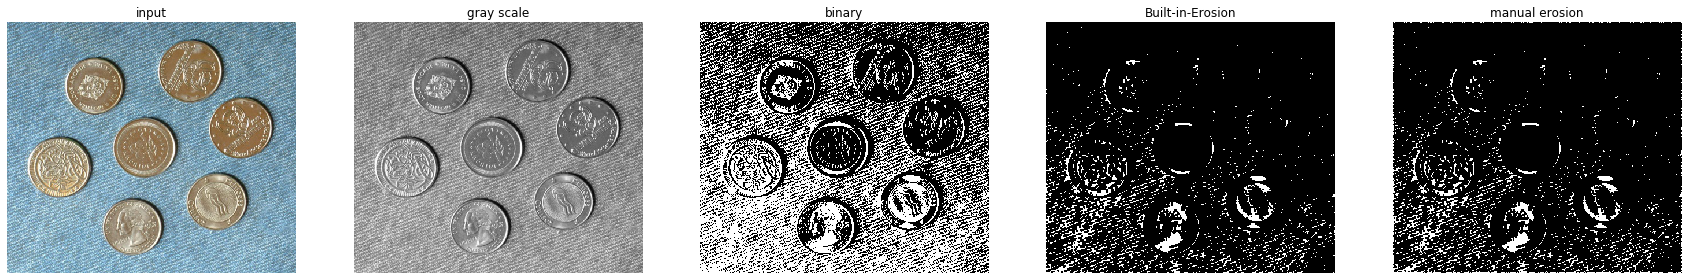

In [4]:
img = io.imread('img/coins.jpg')
gray = rgb2gray(img)
threshold = 0.5
threshold = threshold_otsu(gray)
binary = gray > threshold
structural_element = np.array([[1,1,1]
                             ,[1,1,1]
                             ,[1,1,1]])

err = manually_erosion(binary,structural_element)
built_in_err = binary_erosion(binary,structural_element)
show_images([img,gray,binary,built_in_err,err],["input","gray scale","binary","Built-in-Erosion","manual erosion"])

# DILATION

In [5]:
def manually_dilation(img,structural_element):

    dil = np.copy(img)


    for i in range(dil.shape[0]-structural_element.shape[0]+1):
        for j in range(dil.shape[1]-structural_element.shape[1]+1):
            #accessing part of matrix to be tested
            temp = img[i:(structural_element.shape[0]+i), j:(structural_element.shape[1]+j)]
            #assume pivot will be on center Struct. Elem/2 in x and y axes
            #check if filter hits or not

            dil[(structural_element.shape[0]//2)+i][(structural_element.shape[1]//2)+j]= np.any(temp==structural_element) 
    return dil 

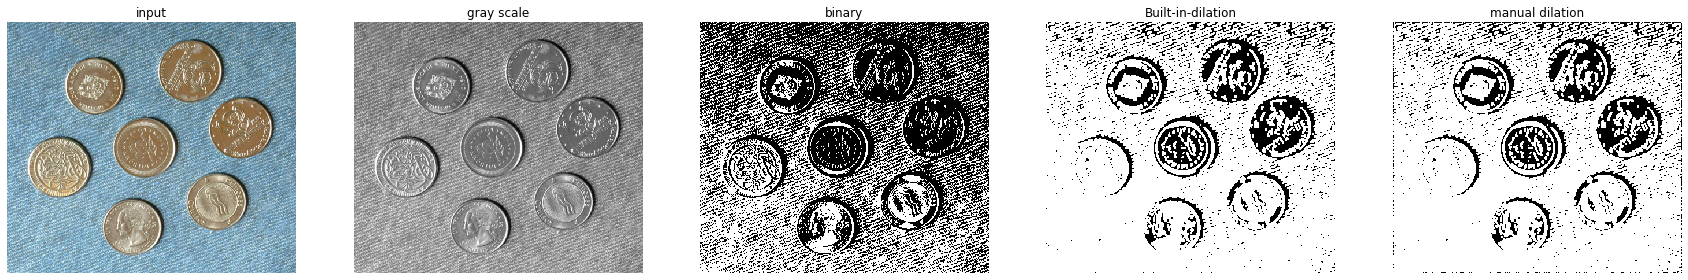

In [6]:
dil = manually_dilation(binary,structural_element)
built_in_dil = binary_dilation(binary,structural_element)
show_images([img,gray,binary,built_in_dil,dil],["input","gray scale","binary","Built-in-dilation","manual dilation"])

[[120, 199, 226, 277], [212, 290, 226, 259], [303, 381, 226, 259], [394, 473, 226, 259]]


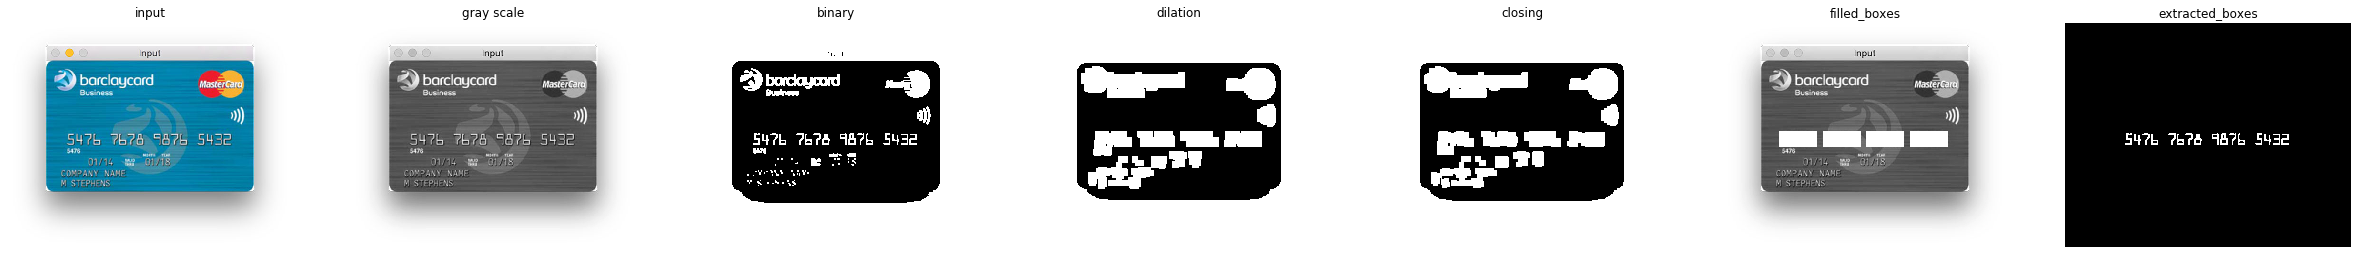

In [7]:
'''
2) Case Study: Credit Card Number Extraction
    - Load "card.jpg" from the img folder
    - Convert the image to binary by brightness thresholding maintaining the card number details for extraction
    - Use your erosion/dilation functions, or Skimage's functions only if you didn't implement them, to apply closing
        Note: The goal of this step is to join the card number into 4 sets of connected pixels
    - Use Skimage's "find_contours" to get the bounding boxes for the credit card's numbers by filtering on aspect ratio (between 2.5 & 3.5)
        Note: When using "find_contours(img, 0.8)" the o/p is a list of contours each having:
                - contour[:,0] being the Y values of the contour perimeter points
                - contour[:,1] being the X values of the contour perimeter points
'''

img = io.imread('img/card.jpg')

gray = rgb2gray(img)
threshold = threshold_otsu(gray,128)

binary = gray > threshold

structural_element = np.array([[1,1,1]
                             ,[1,1,1]
                             ,[1,1,1]])

binary = manually_dilation(binary,structural_element)

dilation = manually_dilation(binary,structural_element)
dilation = manually_dilation(dilation,structural_element)
dilation = manually_dilation(dilation,structural_element)
dilation = manually_dilation(dilation,structural_element)
dilation = manually_dilation(dilation,structural_element)


closing = manually_erosion(dilation,structural_element)


all_boxes = find_contours(closing,0.8)
bounding_boxes=[]
for i in range(len(all_boxes)):
    Ymax,Xmax = np.max(all_boxes[i],axis=0)
    Ymin,Xmin = np.min(all_boxes[i],axis=0)
    if( (Ymax-Ymin)/(Xmax-Xmin)>=0.4 and (Ymax-Ymin)/(Xmax-Xmin)< 0.65 and ((Ymax-Ymin)*(Xmax-Xmin) >=2500) and ((Ymax-Ymin)*(Xmax-Xmin) <=4000)):
        bounding_boxes.append([int(Xmin),int(Xmax),int(Ymin),int(Ymax)])



img_with_boxes = np.copy(gray)
extracted_boxes = np.zeros(gray.shape)
print(bounding_boxes)
bounding_boxes = deque(bounding_boxes) 
bounding_boxes.rotate(1)
commonMin = -1
commonMax = -1
#When provided with the correct format of the list of bounding_boxes, this section will set all pixels inside boxes in img_with_boxes
for box in bounding_boxes:
    [Xmin, Xmax, Ymin, Ymax] = box
    if((Ymax-Ymin)*(Xmax-Xmin)>3000):
        Ymin=commonMin
        Ymax=commonMax
    else:
        commonMin =Ymin
        commonMax =Ymax
    rr, cc = rectangle(start = (Ymin,Xmin), end = (Ymax,Xmax), shape=gray.shape)
    #extracted boxes
    
    extracted_boxes[rr,cc] += binary[rr,cc]
    #filled boxes
    img_with_boxes[rr, cc] = 1 #set color white
   
show_images([img,gray,binary,dilation,closing,img_with_boxes,extracted_boxes],["input","gray scale","binary","dilation","closing","filled_boxes","extracted_boxes"])

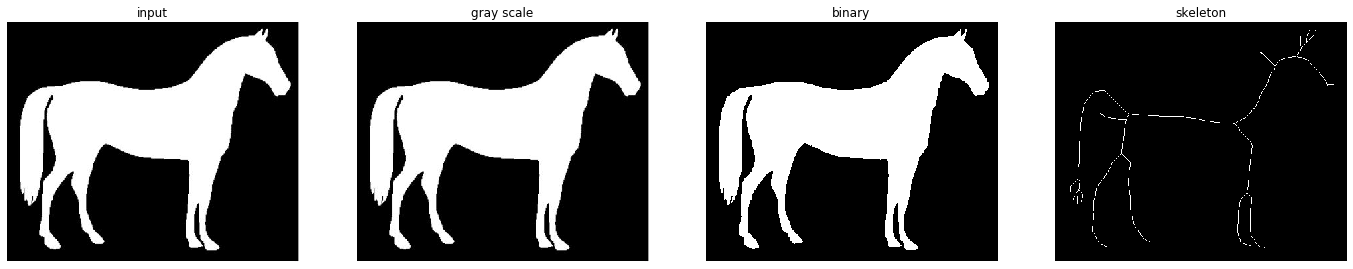

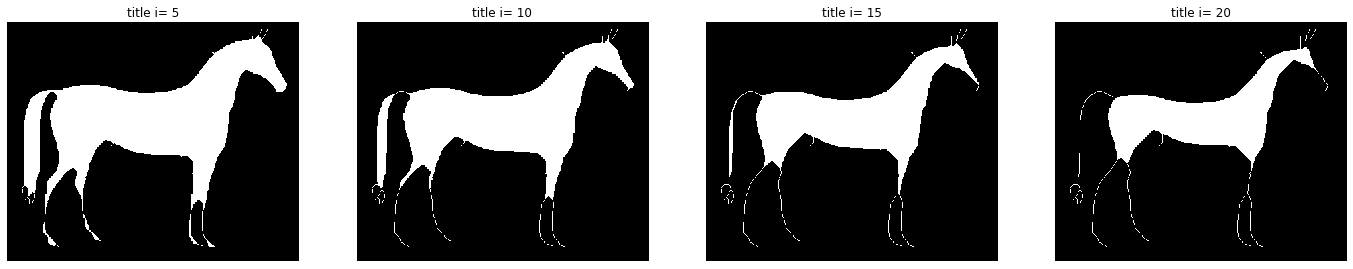

In [9]:
'''
3) Skeletonization:
    - Load "horse.jpg" from the img folder 
    - Use a binary threshold of 0.9 to remove invisible noise in the background
    - Use Skimage's "skeletonize(image)" to acquire the image's skeleton & show it
    - Use Skimage's "thin(image, max_iter)" with values of max_iter 5/10/15/20 & show it
'''
img = io.imread('img/horse.jpg')
gray = rgb2gray(img)
binary = gray > 0.9
skelet = skeletonize(binary)
show_images([img,gray,binary,skelet],["input","gray scale","binary","skeleton"])
titles = []
thinning= []
for i in [5,10,15,20]:
    thinning.append(thin(binary,max_iter=i))
    titles.append('title i= '+str(i))
show_images(thinning,titles)